In [1]:
import keras
from keras.datasets import mnist
from keras import backend as K
import pandas as pd
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

Using TensorFlow backend.


In [2]:
sns.set_theme(style="whitegrid")

# Práctica Redes Neuronales II

Primero vamos a usar redes para aprender una función simple: una parábola.

Vamos a usar solo 100 puntos y dividirlos en training y validation

Text(0, 0.5, 'Y')

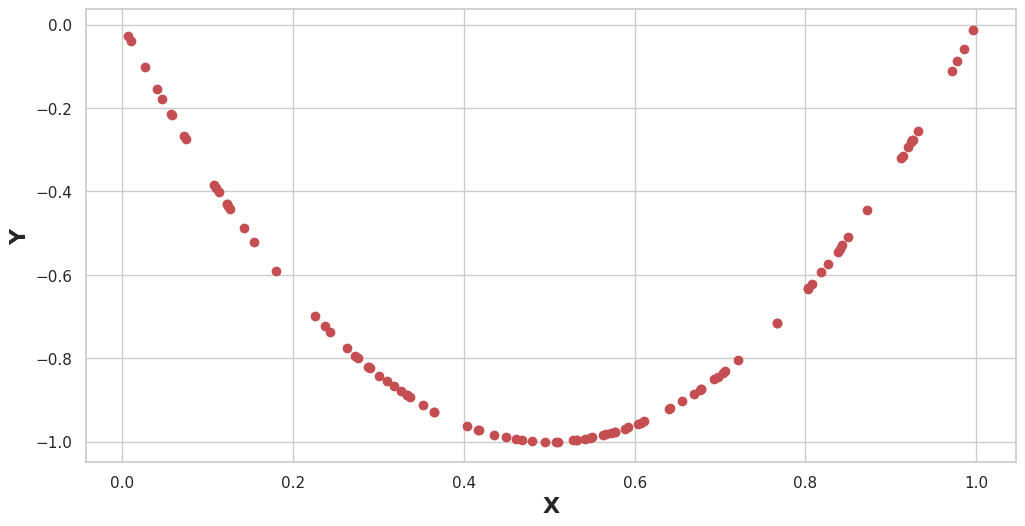

In [3]:
# Genero los puntos
x = np.random.uniform(0, 1, 100)
y = [4 * i * (i - 1) for i in x]

# ploteo
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(x, y, 'or')
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)

Divido en training y validation set usando train_test_split de sklearn usando 1/3 de puntos como validation

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_validation, y_train, y_validation = train_test_split(
    x, y, test_size=0.33, random_state=42
)

Usamos [Sequential](https://keras.io/api/models/sequential/) de keras para definir un modelo tipo stack de capas: vamos a usar ahora solo capas tipo [Dense](https://keras.io/api/layers/core_layers/dense/)

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

Usamos para regresiones como activación de la última capa un función de tipo lineal

In [7]:
model = Sequential()
model.add(Dense(3, input_dim=1, activation='tanh'))
model.add(Dense(1, activation='linear'))

Luego de definir todas las capas tenemos que compilar el modelo para definir la función de pérdida, el optimizador y la métrica. Esto es necesario para poder después entrenar el modelo.

In [8]:
model.compile(
    loss='mean_squared_error', optimizer="SGD", metrics=['mean_squared_error']
)

Vamos a guardar el [.fit ](https://keras.io/api/models/model_training_apis/) del modelo en una variable para después plotear el aprendizaje. Podemos pasar como parámetros el set de validación para ir evaluando en cada paso del entrenamiento, además de evaluar el de entrenamiento. Podemos cambiar la cantidad de información que nos muestra con verbose y además tenemos que decirle la cantidad de épocas que queremos entrenar.

In [9]:
history = model.fit(
    np.array(X_train),
    np.array(y_train),
    epochs=200,
    verbose=2,
    validation_data=(X_validation, np.array(y_validation)),
)

Train on 67 samples, validate on 33 samples
Epoch 1/200
 - 0s - loss: 0.7976 - mean_squared_error: 0.7976 - val_loss: 0.7686 - val_mean_squared_error: 0.7686


Epoch 2/200
 - 0s - loss: 0.6731 - mean_squared_error: 0.6731 - val_loss: 0.6679 - val_mean_squared_error: 0.6679


Epoch 3/200
 - 0s - loss: 0.5800 - mean_squared_error: 0.5800 - val_loss: 0.5841 - val_mean_squared_error: 0.5841


Epoch 4/200
 - 0s - loss: 0.5033 - mean_squared_error: 0.5033 - val_loss: 0.5173 - val_mean_squared_error: 0.5173


Epoch 5/200
 - 0s - loss: 0.4419 - mean_squared_error: 0.4419 - val_loss: 0.4496 - val_mean_squared_error: 0.4496


Epoch 6/200
 - 0s - loss: 0.3807 - mean_squared_error: 0.3807 - val_loss: 0.3992 - val_mean_squared_error: 0.3992


Epoch 7/200
 - 0s - loss: 0.3353 - mean_squared_error: 0.3353 - val_loss: 0.3569 - val_mean_squared_error: 0.3569


Epoch 8/200
 - 0s - loss: 0.2975 - mean_squared_error: 0.2975 - val_loss: 0.3207 - val_mean_squared_error: 0.3207


Epoch 9/200
 - 0s - loss: 0.2655 - mean_squared_error: 0.2655 - val_loss: 0.2932 - val_mean_squared_error: 0.2932


Epoch 10/200
 - 0s - loss: 0.2410 - mean_squared_error: 0.2410 - val_loss: 0.2631 - val_mean_squared_error: 0.2631


Epoch 11/200
 - 0s - loss: 0.2150 - mean_squared_error: 0.2150 - val_loss: 0.2397 - val_mean_squared_error: 0.2397


Epoch 12/200
 - 0s - loss: 0.1947 - mean_squared_error: 0.1947 - val_loss: 0.2151 - val_mean_squared_error: 0.2151


Epoch 13/200
 - 0s - loss: 0.1744 - mean_squared_error: 0.1744 - val_loss: 0.2000 - val_mean_squared_error: 0.2000


Epoch 14/200
 - 0s - loss: 0.1615 - mean_squared_error: 0.1615 - val_loss: 0.1874 - val_mean_squared_error: 0.1874


Epoch 15/200
 - 0s - loss: 0.1511 - mean_squared_error: 0.1511 - val_loss: 0.1738 - val_mean_squared_error: 0.1738


Epoch 16/200
 - 0s - loss: 0.1400 - mean_squared_error: 0.1400 - val_loss: 0.1616 - val_mean_squared_error: 0.1616


Epoch 17/200


 - 0s - loss: 0.1305 - mean_squared_error: 0.1305 - val_loss: 0.1533 - val_mean_squared_error: 0.1533


Epoch 18/200
 - 0s - loss: 0.1239 - mean_squared_error: 0.1239 - val_loss: 0.1460 - val_mean_squared_error: 0.1460


Epoch 19/200
 - 0s - loss: 0.1185 - mean_squared_error: 0.1185 - val_loss: 0.1412 - val_mean_squared_error: 0.1412


Epoch 20/200
 - 0s - loss: 0.1149 - mean_squared_error: 0.1149 - val_loss: 0.1350 - val_mean_squared_error: 0.1350


Epoch 21/200
 - 0s - loss: 0.1102 - mean_squared_error: 0.1102 - val_loss: 0.1310 - val_mean_squared_error: 0.1310


Epoch 22/200
 - 0s - loss: 0.1073 - mean_squared_error: 0.1073 - val_loss: 0.1252 - val_mean_squared_error: 0.1252


Epoch 23/200
 - 0s - loss: 0.1033 - mean_squared_error: 0.1033 - val_loss: 0.1209 - val_mean_squared_error: 0.1209


Epoch 24/200
 - 0s - loss: 0.1005 - mean_squared_error: 0.1005 - val_loss: 0.1185 - val_mean_squared_error: 0.1185


Epoch 25/200
 - 0s - loss: 0.0990 - mean_squared_error: 0.0990 - val_loss: 0.1157 - val_mean_squared_error: 0.1157


Epoch 26/200
 - 0s - loss: 0.0972 - mean_squared_error: 0.0972 - val_loss: 0.1122 - val_mean_squared_error: 0.1122


Epoch 27/200
 - 0s - loss: 0.0952 - mean_squared_error: 0.0952 - val_loss: 0.1111 - val_mean_squared_error: 0.1111


Epoch 28/200
 - 0s - loss: 0.0945 - mean_squared_error: 0.0945 - val_loss: 0.1084 - val_mean_squared_error: 0.1084


Epoch 29/200
 - 0s - loss: 0.0931 - mean_squared_error: 0.0931 - val_loss: 0.1074 - val_mean_squared_error: 0.1074


Epoch 30/200
 - 0s - loss: 0.0925 - mean_squared_error: 0.0925 - val_loss: 0.1071 - val_mean_squared_error: 0.1071


Epoch 31/200
 - 0s - loss: 0.0925 - mean_squared_error: 0.0925 - val_loss: 0.1065 - val_mean_squared_error: 0.1065


Epoch 32/200
 - 0s - loss: 0.0921 - mean_squared_error: 0.0921 - val_loss: 0.1068 - val_mean_squared_error: 0.1068


Epoch 33/200
 - 0s - loss: 0.0922 - mean_squared_error: 0.0922 - val_loss: 0.1050 - val_mean_squared_error: 0.1050


Epoch 34/200
 - 0s - loss: 0.0914 - mean_squared_error: 0.0914 - val_loss: 0.1040 - val_mean_squared_error: 0.1040


Epoch 35/200
 - 0s - loss: 0.0910 - mean_squared_error: 0.0910 - val_loss: 0.1038 - val_mean_squared_error: 0.1038


Epoch 36/200
 - 0s - loss: 0.0909 - mean_squared_error: 0.0909 - val_loss: 0.1025 - val_mean_squared_error: 0.1025


Epoch 37/200
 - 0s - loss: 0.0904 - mean_squared_error: 0.0904 - val_loss: 0.1033 - val_mean_squared_error: 0.1033


Epoch 38/200
 - 0s - loss: 0.0907 - mean_squared_error: 0.0907 - val_loss: 0.1029 - val_mean_squared_error: 0.1029


Epoch 39/200
 - 0s - loss: 0.0906 - mean_squared_error: 0.0906 - val_loss: 0.1020 - val_mean_squared_error: 0.1020


Epoch 40/200
 - 0s - loss: 0.0903 - mean_squared_error: 0.0903 - val_loss: 0.1031 - val_mean_squared_error: 0.1031


Epoch 41/200


 - 0s - loss: 0.0906 - mean_squared_error: 0.0906 - val_loss: 0.1031 - val_mean_squared_error: 0.1031


Epoch 42/200
 - 0s - loss: 0.0906 - mean_squared_error: 0.0906 - val_loss: 0.1027 - val_mean_squared_error: 0.1027


Epoch 43/200


 - 0s - loss: 0.0905 - mean_squared_error: 0.0905 - val_loss: 0.1034 - val_mean_squared_error: 0.1034


Epoch 44/200


 - 0s - loss: 0.0907 - mean_squared_error: 0.0907 - val_loss: 0.1019 - val_mean_squared_error: 0.1019


Epoch 45/200


 - 0s - loss: 0.0902 - mean_squared_error: 0.0902 - val_loss: 0.1018 - val_mean_squared_error: 0.1018


Epoch 46/200


 - 0s - loss: 0.0902 - mean_squared_error: 0.0902 - val_loss: 0.1016 - val_mean_squared_error: 0.1016


Epoch 47/200
 - 0s - loss: 0.0901 - mean_squared_error: 0.0901 - val_loss: 0.1016 - val_mean_squared_error: 0.1016


Epoch 48/200
 - 0s - loss: 0.0902 - mean_squared_error: 0.0902 - val_loss: 0.1022 - val_mean_squared_error: 0.1022


Epoch 49/200


 - 0s - loss: 0.0903 - mean_squared_error: 0.0903 - val_loss: 0.1020 - val_mean_squared_error: 0.1020


Epoch 50/200


 - 0s - loss: 0.0904 - mean_squared_error: 0.0904 - val_loss: 0.1033 - val_mean_squared_error: 0.1033


Epoch 51/200


 - 0s - loss: 0.0908 - mean_squared_error: 0.0908 - val_loss: 0.1028 - val_mean_squared_error: 0.1028


Epoch 52/200


 - 0s - loss: 0.0906 - mean_squared_error: 0.0906 - val_loss: 0.1039 - val_mean_squared_error: 0.1039


Epoch 53/200


 - 0s - loss: 0.0909 - mean_squared_error: 0.0909 - val_loss: 0.1033 - val_mean_squared_error: 0.1033


Epoch 54/200


 - 0s - loss: 0.0908 - mean_squared_error: 0.0908 - val_loss: 0.1037 - val_mean_squared_error: 0.1037


Epoch 55/200


 - 0s - loss: 0.0908 - mean_squared_error: 0.0908 - val_loss: 0.1023 - val_mean_squared_error: 0.1023


Epoch 56/200
 - 0s - loss: 0.0903 - mean_squared_error: 0.0903 - val_loss: 0.1009 - val_mean_squared_error: 0.1009


Epoch 57/200


 - 0s - loss: 0.0899 - mean_squared_error: 0.0899 - val_loss: 0.1011 - val_mean_squared_error: 0.1011


Epoch 58/200


 - 0s - loss: 0.0899 - mean_squared_error: 0.0899 - val_loss: 0.1005 - val_mean_squared_error: 0.1005


Epoch 59/200


 - 0s - loss: 0.0898 - mean_squared_error: 0.0898 - val_loss: 0.1000 - val_mean_squared_error: 0.1000


Epoch 60/200


 - 0s - loss: 0.0897 - mean_squared_error: 0.0897 - val_loss: 0.1013 - val_mean_squared_error: 0.1013


Epoch 61/200


 - 0s - loss: 0.0900 - mean_squared_error: 0.0900 - val_loss: 0.1022 - val_mean_squared_error: 0.1022


Epoch 62/200
 - 0s - loss: 0.0902 - mean_squared_error: 0.0902 - val_loss: 0.1016 - val_mean_squared_error: 0.1016


Epoch 63/200


 - 0s - loss: 0.0901 - mean_squared_error: 0.0901 - val_loss: 0.1023 - val_mean_squared_error: 0.1023


Epoch 64/200
 - 0s - loss: 0.0903 - mean_squared_error: 0.0903 - val_loss: 0.1021 - val_mean_squared_error: 0.1021


Epoch 65/200


 - 0s - loss: 0.0902 - mean_squared_error: 0.0902 - val_loss: 0.1010 - val_mean_squared_error: 0.1010


Epoch 66/200
 - 0s - loss: 0.0899 - mean_squared_error: 0.0899 - val_loss: 0.1020 - val_mean_squared_error: 0.1020


Epoch 67/200
 - 0s - loss: 0.0902 - mean_squared_error: 0.0902 - val_loss: 0.1021 - val_mean_squared_error: 0.1021


Epoch 68/200


 - 0s - loss: 0.0902 - mean_squared_error: 0.0902 - val_loss: 0.1011 - val_mean_squared_error: 0.1011


Epoch 69/200
 - 0s - loss: 0.0899 - mean_squared_error: 0.0899 - val_loss: 0.1004 - val_mean_squared_error: 0.1004


Epoch 70/200
 - 0s - loss: 0.0897 - mean_squared_error: 0.0897 - val_loss: 0.1015 - val_mean_squared_error: 0.1015


Epoch 71/200
 - 0s - loss: 0.0900 - mean_squared_error: 0.0900 - val_loss: 0.1005 - val_mean_squared_error: 0.1005


Epoch 72/200


 - 0s - loss: 0.0897 - mean_squared_error: 0.0897 - val_loss: 0.0999 - val_mean_squared_error: 0.0999


Epoch 73/200


 - 0s - loss: 0.0897 - mean_squared_error: 0.0897 - val_loss: 0.1007 - val_mean_squared_error: 0.1007


Epoch 74/200


 - 0s - loss: 0.0897 - mean_squared_error: 0.0897 - val_loss: 0.1003 - val_mean_squared_error: 0.1003


Epoch 75/200


 - 0s - loss: 0.0898 - mean_squared_error: 0.0898 - val_loss: 0.1004 - val_mean_squared_error: 0.1004


Epoch 76/200


 - 0s - loss: 0.0896 - mean_squared_error: 0.0896 - val_loss: 0.1007 - val_mean_squared_error: 0.1007


Epoch 77/200


 - 0s - loss: 0.0897 - mean_squared_error: 0.0897 - val_loss: 0.1006 - val_mean_squared_error: 0.1006


Epoch 78/200


 - 0s - loss: 0.0897 - mean_squared_error: 0.0897 - val_loss: 0.1002 - val_mean_squared_error: 0.1002


Epoch 79/200


 - 0s - loss: 0.0896 - mean_squared_error: 0.0896 - val_loss: 0.1004 - val_mean_squared_error: 0.1004


Epoch 80/200


 - 0s - loss: 0.0897 - mean_squared_error: 0.0897 - val_loss: 0.0992 - val_mean_squared_error: 0.0992


Epoch 81/200


 - 0s - loss: 0.0894 - mean_squared_error: 0.0894 - val_loss: 0.0990 - val_mean_squared_error: 0.0990


Epoch 82/200
 - 0s - loss: 0.0894 - mean_squared_error: 0.0894 - val_loss: 0.0991 - val_mean_squared_error: 0.0991


Epoch 83/200


 - 0s - loss: 0.0893 - mean_squared_error: 0.0893 - val_loss: 0.0993 - val_mean_squared_error: 0.0993


Epoch 84/200


 - 0s - loss: 0.0894 - mean_squared_error: 0.0894 - val_loss: 0.1001 - val_mean_squared_error: 0.1001


Epoch 85/200


 - 0s - loss: 0.0895 - mean_squared_error: 0.0895 - val_loss: 0.1004 - val_mean_squared_error: 0.1004


Epoch 86/200


 - 0s - loss: 0.0896 - mean_squared_error: 0.0896 - val_loss: 0.0996 - val_mean_squared_error: 0.0996


Epoch 87/200


 - 0s - loss: 0.0894 - mean_squared_error: 0.0894 - val_loss: 0.1003 - val_mean_squared_error: 0.1003


Epoch 88/200


 - 0s - loss: 0.0895 - mean_squared_error: 0.0895 - val_loss: 0.1007 - val_mean_squared_error: 0.1007


Epoch 89/200


 - 0s - loss: 0.0896 - mean_squared_error: 0.0896 - val_loss: 0.1000 - val_mean_squared_error: 0.1000


Epoch 90/200


 - 0s - loss: 0.0895 - mean_squared_error: 0.0895 - val_loss: 0.0989 - val_mean_squared_error: 0.0989


Epoch 91/200


 - 0s - loss: 0.0894 - mean_squared_error: 0.0894 - val_loss: 0.1007 - val_mean_squared_error: 0.1007


Epoch 92/200


 - 0s - loss: 0.0896 - mean_squared_error: 0.0896 - val_loss: 0.0999 - val_mean_squared_error: 0.0999


Epoch 93/200


 - 0s - loss: 0.0896 - mean_squared_error: 0.0896 - val_loss: 0.0998 - val_mean_squared_error: 0.0998


Epoch 94/200


 - 0s - loss: 0.0894 - mean_squared_error: 0.0894 - val_loss: 0.1004 - val_mean_squared_error: 0.1004


Epoch 95/200


 - 0s - loss: 0.0895 - mean_squared_error: 0.0895 - val_loss: 0.0996 - val_mean_squared_error: 0.0996


Epoch 96/200


 - 0s - loss: 0.0894 - mean_squared_error: 0.0894 - val_loss: 0.1000 - val_mean_squared_error: 0.1000


Epoch 97/200
 - 0s - loss: 0.0894 - mean_squared_error: 0.0894 - val_loss: 0.1000 - val_mean_squared_error: 0.1000


Epoch 98/200


 - 0s - loss: 0.0894 - mean_squared_error: 0.0894 - val_loss: 0.0993 - val_mean_squared_error: 0.0993


Epoch 99/200
 - 0s - loss: 0.0893 - mean_squared_error: 0.0893 - val_loss: 0.1002 - val_mean_squared_error: 0.1002


Epoch 100/200


 - 0s - loss: 0.0895 - mean_squared_error: 0.0895 - val_loss: 0.1006 - val_mean_squared_error: 0.1006


Epoch 101/200
 - 0s - loss: 0.0896 - mean_squared_error: 0.0896 - val_loss: 0.1000 - val_mean_squared_error: 0.1000


Epoch 102/200


 - 0s - loss: 0.0895 - mean_squared_error: 0.0895 - val_loss: 0.1000 - val_mean_squared_error: 0.1000


Epoch 103/200


 - 0s - loss: 0.0894 - mean_squared_error: 0.0894 - val_loss: 0.1001 - val_mean_squared_error: 0.1001


Epoch 104/200
 - 0s - loss: 0.0894 - mean_squared_error: 0.0894 - val_loss: 0.0996 - val_mean_squared_error: 0.0996


Epoch 105/200
 - 0s - loss: 0.0893 - mean_squared_error: 0.0893 - val_loss: 0.1001 - val_mean_squared_error: 0.1001


Epoch 106/200


 - 0s - loss: 0.0894 - mean_squared_error: 0.0894 - val_loss: 0.0993 - val_mean_squared_error: 0.0993


Epoch 107/200


 - 0s - loss: 0.0893 - mean_squared_error: 0.0893 - val_loss: 0.0994 - val_mean_squared_error: 0.0994


Epoch 108/200


 - 0s - loss: 0.0893 - mean_squared_error: 0.0893 - val_loss: 0.0986 - val_mean_squared_error: 0.0986


Epoch 109/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0983 - val_mean_squared_error: 0.0983


Epoch 110/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0978 - val_mean_squared_error: 0.0978


Epoch 111/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0980 - val_mean_squared_error: 0.0980


Epoch 112/200


 - 0s - loss: 0.0893 - mean_squared_error: 0.0893 - val_loss: 0.0977 - val_mean_squared_error: 0.0977


Epoch 113/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0974 - val_mean_squared_error: 0.0974


Epoch 114/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0976 - val_mean_squared_error: 0.0976


Epoch 115/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0983 - val_mean_squared_error: 0.0983


Epoch 116/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0985 - val_mean_squared_error: 0.0985


Epoch 117/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0994 - val_mean_squared_error: 0.0994


Epoch 118/200


 - 0s - loss: 0.0893 - mean_squared_error: 0.0893 - val_loss: 0.1000 - val_mean_squared_error: 0.1000


Epoch 119/200


 - 0s - loss: 0.0894 - mean_squared_error: 0.0894 - val_loss: 0.0990 - val_mean_squared_error: 0.0990


Epoch 120/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0985 - val_mean_squared_error: 0.0985


Epoch 121/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0984 - val_mean_squared_error: 0.0984


Epoch 122/200


 - 0s - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.0981 - val_mean_squared_error: 0.0981


Epoch 123/200


 - 0s - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.0985 - val_mean_squared_error: 0.0985


Epoch 124/200


 - 0s - loss: 0.0893 - mean_squared_error: 0.0893 - val_loss: 0.0984 - val_mean_squared_error: 0.0984


Epoch 125/200


 - 0s - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.0985 - val_mean_squared_error: 0.0985


Epoch 126/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0977 - val_mean_squared_error: 0.0977


Epoch 127/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0971 - val_mean_squared_error: 0.0971


Epoch 128/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0967 - val_mean_squared_error: 0.0967


Epoch 129/200


 - 0s - loss: 0.0893 - mean_squared_error: 0.0893 - val_loss: 0.0966 - val_mean_squared_error: 0.0966


Epoch 130/200


 - 0s - loss: 0.0893 - mean_squared_error: 0.0893 - val_loss: 0.0968 - val_mean_squared_error: 0.0968


Epoch 131/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0970 - val_mean_squared_error: 0.0970


Epoch 132/200


 - 0s - loss: 0.0893 - mean_squared_error: 0.0893 - val_loss: 0.0973 - val_mean_squared_error: 0.0973


Epoch 133/200
 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0976 - val_mean_squared_error: 0.0976


Epoch 134/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0983 - val_mean_squared_error: 0.0983


Epoch 135/200


 - 0s - loss: 0.0893 - mean_squared_error: 0.0893 - val_loss: 0.0999 - val_mean_squared_error: 0.0999


Epoch 136/200


 - 0s - loss: 0.0894 - mean_squared_error: 0.0894 - val_loss: 0.0997 - val_mean_squared_error: 0.0997


Epoch 137/200


 - 0s - loss: 0.0893 - mean_squared_error: 0.0893 - val_loss: 0.0987 - val_mean_squared_error: 0.0987


Epoch 138/200


 - 0s - loss: 0.0894 - mean_squared_error: 0.0894 - val_loss: 0.0988 - val_mean_squared_error: 0.0988


Epoch 139/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.1005 - val_mean_squared_error: 0.1005


Epoch 140/200


 - 0s - loss: 0.0895 - mean_squared_error: 0.0895 - val_loss: 0.1002 - val_mean_squared_error: 0.1002


Epoch 141/200
 - 0s - loss: 0.0895 - mean_squared_error: 0.0895 - val_loss: 0.0999 - val_mean_squared_error: 0.0999


Epoch 142/200


 - 0s - loss: 0.0894 - mean_squared_error: 0.0894 - val_loss: 0.0999 - val_mean_squared_error: 0.0999


Epoch 143/200


 - 0s - loss: 0.0894 - mean_squared_error: 0.0894 - val_loss: 0.0988 - val_mean_squared_error: 0.0988


Epoch 144/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.1003 - val_mean_squared_error: 0.1003


Epoch 145/200


 - 0s - loss: 0.0894 - mean_squared_error: 0.0894 - val_loss: 0.0998 - val_mean_squared_error: 0.0998


Epoch 146/200


 - 0s - loss: 0.0893 - mean_squared_error: 0.0893 - val_loss: 0.0987 - val_mean_squared_error: 0.0987


Epoch 147/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0990 - val_mean_squared_error: 0.0990


Epoch 148/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0983 - val_mean_squared_error: 0.0983


Epoch 149/200


 - 0s - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.0984 - val_mean_squared_error: 0.0984


Epoch 150/200


 - 0s - loss: 0.0893 - mean_squared_error: 0.0893 - val_loss: 0.0984 - val_mean_squared_error: 0.0984


Epoch 151/200


 - 0s - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.0982 - val_mean_squared_error: 0.0982


Epoch 152/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0986 - val_mean_squared_error: 0.0986


Epoch 153/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0988 - val_mean_squared_error: 0.0988


Epoch 154/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0991 - val_mean_squared_error: 0.0991


Epoch 155/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0991 - val_mean_squared_error: 0.0991


Epoch 156/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0995 - val_mean_squared_error: 0.0995


Epoch 157/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0986 - val_mean_squared_error: 0.0986


Epoch 158/200


 - 0s - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.0992 - val_mean_squared_error: 0.0992


Epoch 159/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0990 - val_mean_squared_error: 0.0990


Epoch 160/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0994 - val_mean_squared_error: 0.0994


Epoch 161/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0991 - val_mean_squared_error: 0.0991


Epoch 162/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0984 - val_mean_squared_error: 0.0984


Epoch 163/200


 - 0s - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.0976 - val_mean_squared_error: 0.0976


Epoch 164/200


 - 0s - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.0975 - val_mean_squared_error: 0.0975


Epoch 165/200
 - 0s - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.0975 - val_mean_squared_error: 0.0975


Epoch 166/200


 - 0s - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.0972 - val_mean_squared_error: 0.0972


Epoch 167/200


 - 0s - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.0966 - val_mean_squared_error: 0.0966


Epoch 168/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0964 - val_mean_squared_error: 0.0964


Epoch 169/200


 - 0s - loss: 0.0894 - mean_squared_error: 0.0894 - val_loss: 0.0964 - val_mean_squared_error: 0.0964


Epoch 170/200


 - 0s - loss: 0.0896 - mean_squared_error: 0.0896 - val_loss: 0.0968 - val_mean_squared_error: 0.0968


Epoch 171/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0971 - val_mean_squared_error: 0.0971


Epoch 172/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0970 - val_mean_squared_error: 0.0970


Epoch 173/200


 - 0s - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.0983 - val_mean_squared_error: 0.0983


Epoch 174/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0983 - val_mean_squared_error: 0.0983


Epoch 175/200


 - 0s - loss: 0.0890 - mean_squared_error: 0.0890 - val_loss: 0.0978 - val_mean_squared_error: 0.0978


Epoch 176/200


 - 0s - loss: 0.0890 - mean_squared_error: 0.0890 - val_loss: 0.0985 - val_mean_squared_error: 0.0985


Epoch 177/200
 - 0s - loss: 0.0890 - mean_squared_error: 0.0890 - val_loss: 0.0992 - val_mean_squared_error: 0.0992


Epoch 178/200


 - 0s - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.0991 - val_mean_squared_error: 0.0991


Epoch 179/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0990 - val_mean_squared_error: 0.0990


Epoch 180/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0987 - val_mean_squared_error: 0.0987


Epoch 181/200
 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0988 - val_mean_squared_error: 0.0988


Epoch 182/200


 - 0s - loss: 0.0890 - mean_squared_error: 0.0890 - val_loss: 0.0995 - val_mean_squared_error: 0.0995


Epoch 183/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0989 - val_mean_squared_error: 0.0989


Epoch 184/200


 - 0s - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.0991 - val_mean_squared_error: 0.0991


Epoch 185/200


 - 0s - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.1000 - val_mean_squared_error: 0.1000


Epoch 186/200


 - 0s - loss: 0.0893 - mean_squared_error: 0.0893 - val_loss: 0.1000 - val_mean_squared_error: 0.1000


Epoch 187/200


 - 0s - loss: 0.0893 - mean_squared_error: 0.0893 - val_loss: 0.0994 - val_mean_squared_error: 0.0994


Epoch 188/200


 - 0s - loss: 0.0894 - mean_squared_error: 0.0894 - val_loss: 0.0986 - val_mean_squared_error: 0.0986


Epoch 189/200


 - 0s - loss: 0.0890 - mean_squared_error: 0.0890 - val_loss: 0.0985 - val_mean_squared_error: 0.0985


Epoch 190/200


 - 0s - loss: 0.0890 - mean_squared_error: 0.0890 - val_loss: 0.0986 - val_mean_squared_error: 0.0986


Epoch 191/200


 - 0s - loss: 0.0890 - mean_squared_error: 0.0890 - val_loss: 0.0983 - val_mean_squared_error: 0.0983


Epoch 192/200


 - 0s - loss: 0.0890 - mean_squared_error: 0.0890 - val_loss: 0.0987 - val_mean_squared_error: 0.0987


Epoch 193/200


 - 0s - loss: 0.0890 - mean_squared_error: 0.0890 - val_loss: 0.0992 - val_mean_squared_error: 0.0992


Epoch 194/200


 - 0s - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.0984 - val_mean_squared_error: 0.0984


Epoch 195/200


 - 0s - loss: 0.0890 - mean_squared_error: 0.0890 - val_loss: 0.0982 - val_mean_squared_error: 0.0982


Epoch 196/200


 - 0s - loss: 0.0890 - mean_squared_error: 0.0890 - val_loss: 0.0981 - val_mean_squared_error: 0.0981


Epoch 197/200


 - 0s - loss: 0.0890 - mean_squared_error: 0.0890 - val_loss: 0.0974 - val_mean_squared_error: 0.0974


Epoch 198/200


 - 0s - loss: 0.0890 - mean_squared_error: 0.0890 - val_loss: 0.0969 - val_mean_squared_error: 0.0969


Epoch 199/200


 - 0s - loss: 0.0892 - mean_squared_error: 0.0892 - val_loss: 0.0967 - val_mean_squared_error: 0.0967


Epoch 200/200


 - 0s - loss: 0.0891 - mean_squared_error: 0.0891 - val_loss: 0.0965 - val_mean_squared_error: 0.0965


Vemos el predict de los puntos de validación y ploteamos

In [10]:
pred = model.predict(X_validation)

Text(0, 0.5, 'Y')

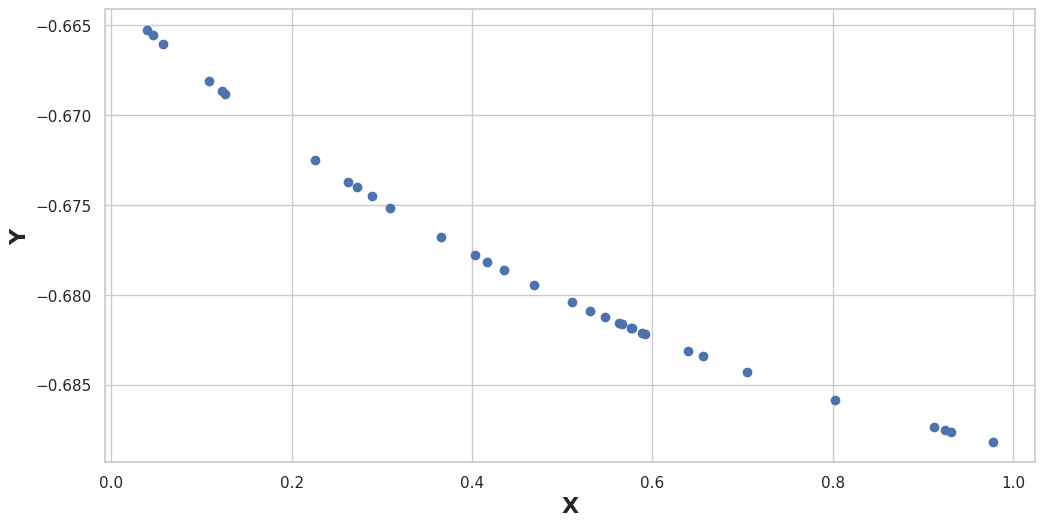

In [11]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(X_validation, pred, "ob", label="test")
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)

Vemos que si bien aprendio parte del comportamiento de la función, podríamos intentar mejorar el aprendizaje.

`.history` del `.fit` es un JSON que tiene los valores impresos durante el entramiento(métricas y loss)

In [12]:
history.history

{'val_loss': [0.7686299564260425,
  0.6678622915889277,
  0.584084077314897,
  0.5173044764634335,
  0.4496237606261716,
  0.3991588359755097,
  0.35694207900175545,
  0.3206589725432974,
  0.29317628860360745,
  0.26310422241857107,
  0.2396691396204529,
  0.21513679770363192,
  0.19997570489332164,
  0.18740994997576557,
  0.17378494203457553,
  0.16163565519011833,
  0.1532623119172499,
  0.14600924523829512,
  0.14116415288299322,
  0.13495587501110454,
  0.1309640912734198,
  0.12515876385750194,
  0.1209298303971688,
  0.11845470626245845,
  0.11565818044949662,
  0.11218354444612157,
  0.11114934572216237,
  0.10844650209853143,
  0.10737267384926479,
  0.1070695873914343,
  0.10653744513789813,
  0.1067851868768533,
  0.10500269044529308,
  0.1039933150239063,
  0.10375433957034891,
  0.10247624902562662,
  0.10330106769547318,
  0.10289467318039952,
  0.10201129712390178,
  0.10310668724052834,
  0.10306141119111668,
  0.1027290712703358,
  0.10339512438936667,
  0.10191199589

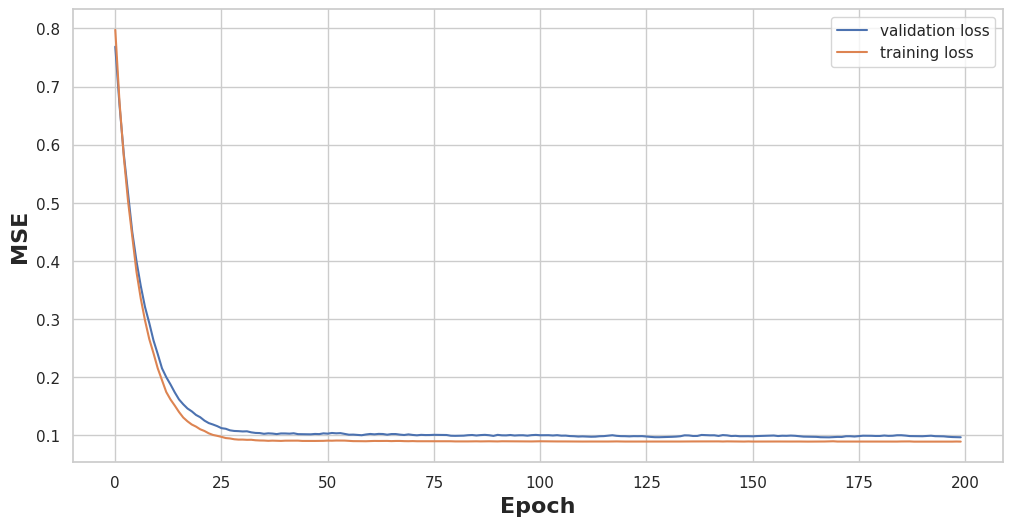

In [13]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(history.history["val_loss"], label="validation loss")
plt.plot(history.history["loss"], label="training loss")
plt.xlabel("Epoch", weight="bold", fontsize=16)
plt.ylabel("MSE", weight="bold", fontsize=16)
plt.legend()

In [14]:
model = Sequential()
model.add(Dense(3, input_dim=1, activation='tanh'))
model.add(Dense(1, activation='linear'))

In [15]:
opt = keras.optimizers.SGD(lr=0.1)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['mean_squared_error'])

In [16]:
history = model.fit(
    np.array(X_train),
    np.array(y_train),
    epochs=500,
    verbose=2,
    validation_data=(X_validation, np.array(y_validation)),
)

Train on 67 samples, validate on 33 samples
Epoch 1/500
 - 0s - loss: 0.8170 - mean_squared_error: 0.8170 - val_loss: 0.1316 - val_mean_squared_error: 0.1316


Epoch 2/500
 - 0s - loss: 0.1106 - mean_squared_error: 0.1106 - val_loss: 0.1154 - val_mean_squared_error: 0.1154


Epoch 3/500
 - 0s - loss: 0.1045 - mean_squared_error: 0.1045 - val_loss: 0.1116 - val_mean_squared_error: 0.1116


Epoch 4/500
 - 0s - loss: 0.1062 - mean_squared_error: 0.1062 - val_loss: 0.1173 - val_mean_squared_error: 0.1173


Epoch 5/500
 - 0s - loss: 0.1135 - mean_squared_error: 0.1135 - val_loss: 0.1276 - val_mean_squared_error: 0.1276


Epoch 6/500
 - 0s - loss: 0.1058 - mean_squared_error: 0.1058 - val_loss: 0.1090 - val_mean_squared_error: 0.1090


Epoch 7/500
 - 0s - loss: 0.1083 - mean_squared_error: 0.1083 - val_loss: 0.1047 - val_mean_squared_error: 0.1047


Epoch 8/500
 - 0s - loss: 0.1013 - mean_squared_error: 0.1013 - val_loss: 0.1090 - val_mean_squared_error: 0.1090


Epoch 9/500
 - 0s - loss: 0.0964 - mean_squared_error: 0.0964 - val_loss: 0.1021 - val_mean_squared_error: 0.1021


Epoch 10/500
 - 0s - loss: 0.0977 - mean_squared_error: 0.0977 - val_loss: 0.1032 - val_mean_squared_error: 0.1032


Epoch 11/500
 - 0s - loss: 0.1040 - mean_squared_error: 0.1040 - val_loss: 0.1116 - val_mean_squared_error: 0.1116


Epoch 12/500
 - 0s - loss: 0.1095 - mean_squared_error: 0.1095 - val_loss: 0.1134 - val_mean_squared_error: 0.1134


Epoch 13/500
 - 0s - loss: 0.0957 - mean_squared_error: 0.0957 - val_loss: 0.1005 - val_mean_squared_error: 0.1005


Epoch 14/500
 - 0s - loss: 0.0935 - mean_squared_error: 0.0935 - val_loss: 0.1065 - val_mean_squared_error: 0.1065


Epoch 15/500
 - 0s - loss: 0.0928 - mean_squared_error: 0.0928 - val_loss: 0.1011 - val_mean_squared_error: 0.1011


Epoch 16/500
 - 0s - loss: 0.0990 - mean_squared_error: 0.0990 - val_loss: 0.1402 - val_mean_squared_error: 0.1402


Epoch 17/500
 - 0s - loss: 0.1069 - mean_squared_error: 0.1069 - val_loss: 0.1309 - val_mean_squared_error: 0.1309


Epoch 18/500
 - 0s - loss: 0.1027 - mean_squared_error: 0.1027 - val_loss: 0.1322 - val_mean_squared_error: 0.1322


Epoch 19/500
 - 0s - loss: 0.1031 - mean_squared_error: 0.1031 - val_loss: 0.1092 - val_mean_squared_error: 0.1092


Epoch 20/500
 - 0s - loss: 0.0927 - mean_squared_error: 0.0927 - val_loss: 0.0957 - val_mean_squared_error: 0.0957


Epoch 21/500
 - 0s - loss: 0.0920 - mean_squared_error: 0.0920 - val_loss: 0.1012 - val_mean_squared_error: 0.1012


Epoch 22/500
 - 0s - loss: 0.0996 - mean_squared_error: 0.0996 - val_loss: 0.1202 - val_mean_squared_error: 0.1202


Epoch 23/500
 - 0s - loss: 0.0988 - mean_squared_error: 0.0988 - val_loss: 0.0976 - val_mean_squared_error: 0.0976


Epoch 24/500
 - 0s - loss: 0.0904 - mean_squared_error: 0.0904 - val_loss: 0.1076 - val_mean_squared_error: 0.1076


Epoch 25/500
 - 0s - loss: 0.0933 - mean_squared_error: 0.0933 - val_loss: 0.1111 - val_mean_squared_error: 0.1111


Epoch 26/500
 - 0s - loss: 0.0928 - mean_squared_error: 0.0928 - val_loss: 0.1185 - val_mean_squared_error: 0.1185


Epoch 27/500
 - 0s - loss: 0.0949 - mean_squared_error: 0.0949 - val_loss: 0.0947 - val_mean_squared_error: 0.0947


Epoch 28/500


 - 0s - loss: 0.0906 - mean_squared_error: 0.0906 - val_loss: 0.1044 - val_mean_squared_error: 0.1044


Epoch 29/500
 - 0s - loss: 0.0906 - mean_squared_error: 0.0906 - val_loss: 0.0961 - val_mean_squared_error: 0.0961


Epoch 30/500
 - 0s - loss: 0.0970 - mean_squared_error: 0.0970 - val_loss: 0.1251 - val_mean_squared_error: 0.1251


Epoch 31/500
 - 0s - loss: 0.0984 - mean_squared_error: 0.0984 - val_loss: 0.1214 - val_mean_squared_error: 0.1214


Epoch 32/500
 - 0s - loss: 0.1018 - mean_squared_error: 0.1018 - val_loss: 0.1423 - val_mean_squared_error: 0.1423


Epoch 33/500
 - 0s - loss: 0.1074 - mean_squared_error: 0.1074 - val_loss: 0.1104 - val_mean_squared_error: 0.1104


Epoch 34/500
 - 0s - loss: 0.0941 - mean_squared_error: 0.0941 - val_loss: 0.1138 - val_mean_squared_error: 0.1138


Epoch 35/500
 - 0s - loss: 0.0941 - mean_squared_error: 0.0941 - val_loss: 0.0940 - val_mean_squared_error: 0.0940


Epoch 36/500
 - 0s - loss: 0.0889 - mean_squared_error: 0.0889 - val_loss: 0.0934 - val_mean_squared_error: 0.0934


Epoch 37/500
 - 0s - loss: 0.0937 - mean_squared_error: 0.0937 - val_loss: 0.0926 - val_mean_squared_error: 0.0926


Epoch 38/500
 - 0s - loss: 0.0917 - mean_squared_error: 0.0917 - val_loss: 0.0931 - val_mean_squared_error: 0.0931


Epoch 39/500
 - 0s - loss: 0.0907 - mean_squared_error: 0.0907 - val_loss: 0.1083 - val_mean_squared_error: 0.1083


Epoch 40/500


 - 0s - loss: 0.0916 - mean_squared_error: 0.0916 - val_loss: 0.1257 - val_mean_squared_error: 0.1257


Epoch 41/500


 - 0s - loss: 0.0978 - mean_squared_error: 0.0978 - val_loss: 0.0998 - val_mean_squared_error: 0.0998


Epoch 42/500


 - 0s - loss: 0.0886 - mean_squared_error: 0.0886 - val_loss: 0.0946 - val_mean_squared_error: 0.0946


Epoch 43/500


 - 0s - loss: 0.0882 - mean_squared_error: 0.0882 - val_loss: 0.1063 - val_mean_squared_error: 0.1063


Epoch 44/500


 - 0s - loss: 0.0910 - mean_squared_error: 0.0910 - val_loss: 0.1002 - val_mean_squared_error: 0.1002


Epoch 45/500
 - 0s - loss: 0.0883 - mean_squared_error: 0.0883 - val_loss: 0.0920 - val_mean_squared_error: 0.0920


Epoch 46/500
 - 0s - loss: 0.0926 - mean_squared_error: 0.0926 - val_loss: 0.0925 - val_mean_squared_error: 0.0925


Epoch 47/500
 - 0s - loss: 0.0936 - mean_squared_error: 0.0936 - val_loss: 0.0916 - val_mean_squared_error: 0.0916


Epoch 48/500
 - 0s - loss: 0.0922 - mean_squared_error: 0.0922 - val_loss: 0.0934 - val_mean_squared_error: 0.0934


Epoch 49/500
 - 0s - loss: 0.0931 - mean_squared_error: 0.0931 - val_loss: 0.1278 - val_mean_squared_error: 0.1278


Epoch 50/500
 - 0s - loss: 0.0991 - mean_squared_error: 0.0991 - val_loss: 0.1191 - val_mean_squared_error: 0.1191


Epoch 51/500


 - 0s - loss: 0.0947 - mean_squared_error: 0.0947 - val_loss: 0.0965 - val_mean_squared_error: 0.0965


Epoch 52/500


 - 0s - loss: 0.0873 - mean_squared_error: 0.0873 - val_loss: 0.0913 - val_mean_squared_error: 0.0913


Epoch 53/500


 - 0s - loss: 0.0896 - mean_squared_error: 0.0896 - val_loss: 0.0939 - val_mean_squared_error: 0.0939


Epoch 54/500


 - 0s - loss: 0.0956 - mean_squared_error: 0.0956 - val_loss: 0.0962 - val_mean_squared_error: 0.0962


Epoch 55/500


 - 0s - loss: 0.0871 - mean_squared_error: 0.0871 - val_loss: 0.0910 - val_mean_squared_error: 0.0910


Epoch 56/500


 - 0s - loss: 0.0917 - mean_squared_error: 0.0917 - val_loss: 0.0926 - val_mean_squared_error: 0.0926


Epoch 57/500
 - 0s - loss: 0.0883 - mean_squared_error: 0.0883 - val_loss: 0.0911 - val_mean_squared_error: 0.0911


Epoch 58/500
 - 0s - loss: 0.0923 - mean_squared_error: 0.0923 - val_loss: 0.0937 - val_mean_squared_error: 0.0937


Epoch 59/500
 - 0s - loss: 0.0886 - mean_squared_error: 0.0886 - val_loss: 0.0905 - val_mean_squared_error: 0.0905


Epoch 60/500


 - 0s - loss: 0.0902 - mean_squared_error: 0.0902 - val_loss: 0.0910 - val_mean_squared_error: 0.0910


Epoch 61/500


 - 0s - loss: 0.0882 - mean_squared_error: 0.0882 - val_loss: 0.0903 - val_mean_squared_error: 0.0903


Epoch 62/500


 - 0s - loss: 0.0881 - mean_squared_error: 0.0881 - val_loss: 0.0935 - val_mean_squared_error: 0.0935


Epoch 63/500


 - 0s - loss: 0.0863 - mean_squared_error: 0.0863 - val_loss: 0.0902 - val_mean_squared_error: 0.0902


Epoch 64/500


 - 0s - loss: 0.0886 - mean_squared_error: 0.0886 - val_loss: 0.1052 - val_mean_squared_error: 0.1052


Epoch 65/500


 - 0s - loss: 0.0923 - mean_squared_error: 0.0923 - val_loss: 0.1299 - val_mean_squared_error: 0.1299


Epoch 66/500


 - 0s - loss: 0.0982 - mean_squared_error: 0.0982 - val_loss: 0.0975 - val_mean_squared_error: 0.0975


Epoch 67/500


 - 0s - loss: 0.0881 - mean_squared_error: 0.0881 - val_loss: 0.1043 - val_mean_squared_error: 0.1043


Epoch 68/500


 - 0s - loss: 0.0916 - mean_squared_error: 0.0916 - val_loss: 0.0901 - val_mean_squared_error: 0.0901


Epoch 69/500


 - 0s - loss: 0.0915 - mean_squared_error: 0.0915 - val_loss: 0.0957 - val_mean_squared_error: 0.0957


Epoch 70/500


 - 0s - loss: 0.0869 - mean_squared_error: 0.0869 - val_loss: 0.0895 - val_mean_squared_error: 0.0895


Epoch 71/500


 - 0s - loss: 0.0900 - mean_squared_error: 0.0900 - val_loss: 0.0894 - val_mean_squared_error: 0.0894


Epoch 72/500


 - 0s - loss: 0.0874 - mean_squared_error: 0.0874 - val_loss: 0.1671 - val_mean_squared_error: 0.1671


Epoch 73/500


 - 0s - loss: 0.1200 - mean_squared_error: 0.1200 - val_loss: 0.1941 - val_mean_squared_error: 0.1941


Epoch 74/500


 - 0s - loss: 0.1299 - mean_squared_error: 0.1299 - val_loss: 0.1095 - val_mean_squared_error: 0.1095


Epoch 75/500


 - 0s - loss: 0.0897 - mean_squared_error: 0.0897 - val_loss: 0.0896 - val_mean_squared_error: 0.0896


Epoch 76/500


 - 0s - loss: 0.0867 - mean_squared_error: 0.0867 - val_loss: 0.0889 - val_mean_squared_error: 0.0889


Epoch 77/500


 - 0s - loss: 0.0883 - mean_squared_error: 0.0883 - val_loss: 0.0941 - val_mean_squared_error: 0.0941


Epoch 78/500


 - 0s - loss: 0.0849 - mean_squared_error: 0.0849 - val_loss: 0.0890 - val_mean_squared_error: 0.0890


Epoch 79/500


 - 0s - loss: 0.0858 - mean_squared_error: 0.0858 - val_loss: 0.0903 - val_mean_squared_error: 0.0903


Epoch 80/500


 - 0s - loss: 0.0904 - mean_squared_error: 0.0904 - val_loss: 0.0915 - val_mean_squared_error: 0.0915


Epoch 81/500


 - 0s - loss: 0.0846 - mean_squared_error: 0.0846 - val_loss: 0.0929 - val_mean_squared_error: 0.0929


Epoch 82/500


 - 0s - loss: 0.0934 - mean_squared_error: 0.0934 - val_loss: 0.0912 - val_mean_squared_error: 0.0912


Epoch 83/500
 - 0s - loss: 0.0852 - mean_squared_error: 0.0852 - val_loss: 0.0883 - val_mean_squared_error: 0.0883


Epoch 84/500


 - 0s - loss: 0.0862 - mean_squared_error: 0.0862 - val_loss: 0.0883 - val_mean_squared_error: 0.0883


Epoch 85/500


 - 0s - loss: 0.0877 - mean_squared_error: 0.0877 - val_loss: 0.0881 - val_mean_squared_error: 0.0881


Epoch 86/500


 - 0s - loss: 0.0863 - mean_squared_error: 0.0863 - val_loss: 0.0881 - val_mean_squared_error: 0.0881


Epoch 87/500


 - 0s - loss: 0.0861 - mean_squared_error: 0.0861 - val_loss: 0.0883 - val_mean_squared_error: 0.0883


Epoch 88/500
 - 0s - loss: 0.0846 - mean_squared_error: 0.0846 - val_loss: 0.0908 - val_mean_squared_error: 0.0908


Epoch 89/500


 - 0s - loss: 0.0848 - mean_squared_error: 0.0848 - val_loss: 0.1126 - val_mean_squared_error: 0.1126


Epoch 90/500


 - 0s - loss: 0.0900 - mean_squared_error: 0.0900 - val_loss: 0.0971 - val_mean_squared_error: 0.0971


Epoch 91/500


 - 0s - loss: 0.0852 - mean_squared_error: 0.0852 - val_loss: 0.0885 - val_mean_squared_error: 0.0885


Epoch 92/500


 - 0s - loss: 0.0843 - mean_squared_error: 0.0843 - val_loss: 0.0884 - val_mean_squared_error: 0.0884


Epoch 93/500


 - 0s - loss: 0.0889 - mean_squared_error: 0.0889 - val_loss: 0.0884 - val_mean_squared_error: 0.0884


Epoch 94/500


 - 0s - loss: 0.0875 - mean_squared_error: 0.0875 - val_loss: 0.0978 - val_mean_squared_error: 0.0978


Epoch 95/500


 - 0s - loss: 0.0846 - mean_squared_error: 0.0846 - val_loss: 0.0877 - val_mean_squared_error: 0.0877


Epoch 96/500


 - 0s - loss: 0.0879 - mean_squared_error: 0.0879 - val_loss: 0.0888 - val_mean_squared_error: 0.0888


Epoch 97/500


 - 0s - loss: 0.0836 - mean_squared_error: 0.0836 - val_loss: 0.0884 - val_mean_squared_error: 0.0884


Epoch 98/500


 - 0s - loss: 0.0890 - mean_squared_error: 0.0890 - val_loss: 0.0867 - val_mean_squared_error: 0.0867


Epoch 99/500


 - 0s - loss: 0.0862 - mean_squared_error: 0.0862 - val_loss: 0.0934 - val_mean_squared_error: 0.0934


Epoch 100/500


 - 0s - loss: 0.0828 - mean_squared_error: 0.0828 - val_loss: 0.0867 - val_mean_squared_error: 0.0867


Epoch 101/500


 - 0s - loss: 0.0869 - mean_squared_error: 0.0869 - val_loss: 0.0879 - val_mean_squared_error: 0.0879


Epoch 102/500


 - 0s - loss: 0.0877 - mean_squared_error: 0.0877 - val_loss: 0.0933 - val_mean_squared_error: 0.0933


Epoch 103/500


 - 0s - loss: 0.0830 - mean_squared_error: 0.0830 - val_loss: 0.0872 - val_mean_squared_error: 0.0872


Epoch 104/500


 - 0s - loss: 0.0870 - mean_squared_error: 0.0870 - val_loss: 0.0863 - val_mean_squared_error: 0.0863


Epoch 105/500


 - 0s - loss: 0.0851 - mean_squared_error: 0.0851 - val_loss: 0.0861 - val_mean_squared_error: 0.0861


Epoch 106/500


 - 0s - loss: 0.0842 - mean_squared_error: 0.0842 - val_loss: 0.1055 - val_mean_squared_error: 0.1055


Epoch 107/500


 - 0s - loss: 0.0875 - mean_squared_error: 0.0875 - val_loss: 0.1216 - val_mean_squared_error: 0.1216


Epoch 108/500


 - 0s - loss: 0.0943 - mean_squared_error: 0.0943 - val_loss: 0.0858 - val_mean_squared_error: 0.0858


Epoch 109/500


 - 0s - loss: 0.0843 - mean_squared_error: 0.0843 - val_loss: 0.0939 - val_mean_squared_error: 0.0939


Epoch 110/500


 - 0s - loss: 0.0834 - mean_squared_error: 0.0834 - val_loss: 0.0855 - val_mean_squared_error: 0.0855


Epoch 111/500

 - 0s - loss: 0.0870 - mean_squared_error: 0.0870 - val_loss: 0.0857 - val_mean_squared_error: 0.0857


Epoch 112/500


 - 0s - loss: 0.0839 - mean_squared_error: 0.0839 - val_loss: 0.0863 - val_mean_squared_error: 0.0863


Epoch 113/500

 - 0s - loss: 0.0860 - mean_squared_error: 0.0860 - val_loss: 0.0911 - val_mean_squared_error: 0.0911


Epoch 114/500


 - 0s - loss: 0.0817 - mean_squared_error: 0.0817 - val_loss: 0.1170 - val_mean_squared_error: 0.1170


Epoch 115/500


 - 0s - loss: 0.0904 - mean_squared_error: 0.0904 - val_loss: 0.0929 - val_mean_squared_error: 0.0929


Epoch 116/500


 - 0s - loss: 0.0824 - mean_squared_error: 0.0824 - val_loss: 0.0899 - val_mean_squared_error: 0.0899


Epoch 117/500


 - 0s - loss: 0.0903 - mean_squared_error: 0.0903 - val_loss: 0.0979 - val_mean_squared_error: 0.0979


Epoch 118/500


 - 0s - loss: 0.0831 - mean_squared_error: 0.0831 - val_loss: 0.1032 - val_mean_squared_error: 0.1032


Epoch 119/500


 - 0s - loss: 0.0902 - mean_squared_error: 0.0902 - val_loss: 0.0843 - val_mean_squared_error: 0.0843


Epoch 120/500


 - 0s - loss: 0.0830 - mean_squared_error: 0.0830 - val_loss: 0.0843 - val_mean_squared_error: 0.0843


Epoch 121/500


 - 0s - loss: 0.0820 - mean_squared_error: 0.0820 - val_loss: 0.0934 - val_mean_squared_error: 0.0934


Epoch 122/500


 - 0s - loss: 0.0812 - mean_squared_error: 0.0812 - val_loss: 0.0852 - val_mean_squared_error: 0.0852


Epoch 123/500


 - 0s - loss: 0.0817 - mean_squared_error: 0.0817 - val_loss: 0.0835 - val_mean_squared_error: 0.0835


Epoch 124/500


 - 0s - loss: 0.0819 - mean_squared_error: 0.0819 - val_loss: 0.0916 - val_mean_squared_error: 0.0916


Epoch 125/500
 - 0s - loss: 0.0820 - mean_squared_error: 0.0820 - val_loss: 0.0927 - val_mean_squared_error: 0.0927


Epoch 126/500


 - 0s - loss: 0.0836 - mean_squared_error: 0.0836 - val_loss: 0.0832 - val_mean_squared_error: 0.0832


Epoch 127/500


 - 0s - loss: 0.0844 - mean_squared_error: 0.0844 - val_loss: 0.0829 - val_mean_squared_error: 0.0829


Epoch 128/500


 - 0s - loss: 0.0823 - mean_squared_error: 0.0823 - val_loss: 0.0849 - val_mean_squared_error: 0.0849


Epoch 129/500


 - 0s - loss: 0.0822 - mean_squared_error: 0.0822 - val_loss: 0.0875 - val_mean_squared_error: 0.0875


Epoch 130/500


 - 0s - loss: 0.0928 - mean_squared_error: 0.0928 - val_loss: 0.0853 - val_mean_squared_error: 0.0853


Epoch 131/500


 - 0s - loss: 0.0865 - mean_squared_error: 0.0865 - val_loss: 0.0904 - val_mean_squared_error: 0.0904


Epoch 132/500


 - 0s - loss: 0.0801 - mean_squared_error: 0.0801 - val_loss: 0.0824 - val_mean_squared_error: 0.0824


Epoch 133/500


 - 0s - loss: 0.0804 - mean_squared_error: 0.0804 - val_loss: 0.1146 - val_mean_squared_error: 0.1146


Epoch 134/500


 - 0s - loss: 0.0899 - mean_squared_error: 0.0899 - val_loss: 0.0930 - val_mean_squared_error: 0.0930


Epoch 135/500


 - 0s - loss: 0.0836 - mean_squared_error: 0.0836 - val_loss: 0.0882 - val_mean_squared_error: 0.0882


Epoch 136/500


 - 0s - loss: 0.0791 - mean_squared_error: 0.0791 - val_loss: 0.0815 - val_mean_squared_error: 0.0815


Epoch 137/500


 - 0s - loss: 0.0818 - mean_squared_error: 0.0818 - val_loss: 0.1037 - val_mean_squared_error: 0.1037


Epoch 138/500


 - 0s - loss: 0.0833 - mean_squared_error: 0.0833 - val_loss: 0.0821 - val_mean_squared_error: 0.0821


Epoch 139/500


 - 0s - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.0877 - val_mean_squared_error: 0.0877


Epoch 140/500


 - 0s - loss: 0.0779 - mean_squared_error: 0.0779 - val_loss: 0.0811 - val_mean_squared_error: 0.0811


Epoch 141/500


 - 0s - loss: 0.0788 - mean_squared_error: 0.0788 - val_loss: 0.0812 - val_mean_squared_error: 0.0812


Epoch 142/500


 - 0s - loss: 0.0784 - mean_squared_error: 0.0784 - val_loss: 0.0830 - val_mean_squared_error: 0.0830


Epoch 143/500


 - 0s - loss: 0.0787 - mean_squared_error: 0.0787 - val_loss: 0.0935 - val_mean_squared_error: 0.0935


Epoch 144/500


 - 0s - loss: 0.0789 - mean_squared_error: 0.0789 - val_loss: 0.0833 - val_mean_squared_error: 0.0833


Epoch 145/500


 - 0s - loss: 0.0770 - mean_squared_error: 0.0770 - val_loss: 0.0884 - val_mean_squared_error: 0.0884


Epoch 146/500


 - 0s - loss: 0.0780 - mean_squared_error: 0.0780 - val_loss: 0.0909 - val_mean_squared_error: 0.0909


Epoch 147/500


 - 0s - loss: 0.0817 - mean_squared_error: 0.0817 - val_loss: 0.0802 - val_mean_squared_error: 0.0802


Epoch 148/500


 - 0s - loss: 0.0785 - mean_squared_error: 0.0785 - val_loss: 0.0907 - val_mean_squared_error: 0.0907


Epoch 149/500


 - 0s - loss: 0.0781 - mean_squared_error: 0.0781 - val_loss: 0.0903 - val_mean_squared_error: 0.0903


Epoch 150/500


 - 0s - loss: 0.0776 - mean_squared_error: 0.0776 - val_loss: 0.0895 - val_mean_squared_error: 0.0895


Epoch 151/500


 - 0s - loss: 0.0772 - mean_squared_error: 0.0772 - val_loss: 0.0822 - val_mean_squared_error: 0.0822


Epoch 152/500


 - 0s - loss: 0.0769 - mean_squared_error: 0.0769 - val_loss: 0.1096 - val_mean_squared_error: 0.1096


Epoch 153/500


 - 0s - loss: 0.0874 - mean_squared_error: 0.0874 - val_loss: 0.0837 - val_mean_squared_error: 0.0837


Epoch 154/500


 - 0s - loss: 0.0754 - mean_squared_error: 0.0754 - val_loss: 0.0835 - val_mean_squared_error: 0.0835


Epoch 155/500


 - 0s - loss: 0.0764 - mean_squared_error: 0.0764 - val_loss: 0.0786 - val_mean_squared_error: 0.0786


Epoch 156/500


 - 0s - loss: 0.0759 - mean_squared_error: 0.0759 - val_loss: 0.1105 - val_mean_squared_error: 0.1105


Epoch 157/500


 - 0s - loss: 0.0865 - mean_squared_error: 0.0865 - val_loss: 0.0843 - val_mean_squared_error: 0.0843


Epoch 158/500


 - 0s - loss: 0.0757 - mean_squared_error: 0.0757 - val_loss: 0.1008 - val_mean_squared_error: 0.1008


Epoch 159/500


 - 0s - loss: 0.0810 - mean_squared_error: 0.0810 - val_loss: 0.0832 - val_mean_squared_error: 0.0832


Epoch 160/500


 - 0s - loss: 0.0755 - mean_squared_error: 0.0755 - val_loss: 0.0780 - val_mean_squared_error: 0.0780


Epoch 161/500


 - 0s - loss: 0.0805 - mean_squared_error: 0.0805 - val_loss: 0.0791 - val_mean_squared_error: 0.0791


Epoch 162/500


 - 0s - loss: 0.0745 - mean_squared_error: 0.0745 - val_loss: 0.0830 - val_mean_squared_error: 0.0830


Epoch 163/500


 - 0s - loss: 0.0741 - mean_squared_error: 0.0741 - val_loss: 0.0805 - val_mean_squared_error: 0.0805


Epoch 164/500


 - 0s - loss: 0.0742 - mean_squared_error: 0.0742 - val_loss: 0.0807 - val_mean_squared_error: 0.0807


Epoch 165/500


 - 0s - loss: 0.0733 - mean_squared_error: 0.0733 - val_loss: 0.0773 - val_mean_squared_error: 0.0773


Epoch 166/500


 - 0s - loss: 0.0738 - mean_squared_error: 0.0738 - val_loss: 0.0788 - val_mean_squared_error: 0.0788


Epoch 167/500


 - 0s - loss: 0.0793 - mean_squared_error: 0.0793 - val_loss: 0.0795 - val_mean_squared_error: 0.0795


Epoch 168/500


 - 0s - loss: 0.0809 - mean_squared_error: 0.0809 - val_loss: 0.0762 - val_mean_squared_error: 0.0762


Epoch 169/500


 - 0s - loss: 0.0730 - mean_squared_error: 0.0730 - val_loss: 0.0805 - val_mean_squared_error: 0.0805


Epoch 170/500


 - 0s - loss: 0.0725 - mean_squared_error: 0.0725 - val_loss: 0.0779 - val_mean_squared_error: 0.0779


Epoch 171/500


 - 0s - loss: 0.0769 - mean_squared_error: 0.0769 - val_loss: 0.1358 - val_mean_squared_error: 0.1358


Epoch 172/500


 - 0s - loss: 0.0939 - mean_squared_error: 0.0939 - val_loss: 0.0764 - val_mean_squared_error: 0.0764


Epoch 173/500


 - 0s - loss: 0.0750 - mean_squared_error: 0.0750 - val_loss: 0.0769 - val_mean_squared_error: 0.0769


Epoch 174/500


 - 0s - loss: 0.0790 - mean_squared_error: 0.0790 - val_loss: 0.0756 - val_mean_squared_error: 0.0756


Epoch 175/500


 - 0s - loss: 0.0739 - mean_squared_error: 0.0739 - val_loss: 0.0902 - val_mean_squared_error: 0.0902


Epoch 176/500


 - 0s - loss: 0.0741 - mean_squared_error: 0.0741 - val_loss: 0.0754 - val_mean_squared_error: 0.0754


Epoch 177/500


 - 0s - loss: 0.0742 - mean_squared_error: 0.0742 - val_loss: 0.0859 - val_mean_squared_error: 0.0859


Epoch 178/500


 - 0s - loss: 0.0741 - mean_squared_error: 0.0741 - val_loss: 0.0745 - val_mean_squared_error: 0.0745


Epoch 179/500


 - 0s - loss: 0.0707 - mean_squared_error: 0.0707 - val_loss: 0.1216 - val_mean_squared_error: 0.1216


Epoch 180/500


 - 0s - loss: 0.0901 - mean_squared_error: 0.0901 - val_loss: 0.0996 - val_mean_squared_error: 0.0996


Epoch 181/500


 - 0s - loss: 0.0792 - mean_squared_error: 0.0792 - val_loss: 0.1121 - val_mean_squared_error: 0.1121


Epoch 182/500

 - 0s - loss: 0.0830 - mean_squared_error: 0.0830 - val_loss: 0.0937 - val_mean_squared_error: 0.0937


Epoch 183/500


 - 0s - loss: 0.0770 - mean_squared_error: 0.0770 - val_loss: 0.0790 - val_mean_squared_error: 0.0790


Epoch 184/500


 - 0s - loss: 0.0698 - mean_squared_error: 0.0698 - val_loss: 0.0726 - val_mean_squared_error: 0.0726


Epoch 185/500


 - 0s - loss: 0.0725 - mean_squared_error: 0.0725 - val_loss: 0.0735 - val_mean_squared_error: 0.0735


Epoch 186/500


 - 0s - loss: 0.0689 - mean_squared_error: 0.0689 - val_loss: 0.1020 - val_mean_squared_error: 0.1020


Epoch 187/500

 - 0s - loss: 0.0762 - mean_squared_error: 0.0762 - val_loss: 0.0741 - val_mean_squared_error: 0.0741


Epoch 188/500


 - 0s - loss: 0.0770 - mean_squared_error: 0.0770 - val_loss: 0.0732 - val_mean_squared_error: 0.0732


Epoch 189/500


 - 0s - loss: 0.0678 - mean_squared_error: 0.0678 - val_loss: 0.0714 - val_mean_squared_error: 0.0714


Epoch 190/500


 - 0s - loss: 0.0685 - mean_squared_error: 0.0685 - val_loss: 0.0719 - val_mean_squared_error: 0.0719


Epoch 191/500


 - 0s - loss: 0.0692 - mean_squared_error: 0.0692 - val_loss: 0.0966 - val_mean_squared_error: 0.0966


Epoch 192/500


 - 0s - loss: 0.0739 - mean_squared_error: 0.0739 - val_loss: 0.0702 - val_mean_squared_error: 0.0702


Epoch 193/500


 - 0s - loss: 0.0698 - mean_squared_error: 0.0698 - val_loss: 0.0734 - val_mean_squared_error: 0.0734


Epoch 194/500


 - 0s - loss: 0.0671 - mean_squared_error: 0.0671 - val_loss: 0.0698 - val_mean_squared_error: 0.0698


Epoch 195/500


 - 0s - loss: 0.0696 - mean_squared_error: 0.0696 - val_loss: 0.0715 - val_mean_squared_error: 0.0715


Epoch 196/500


 - 0s - loss: 0.0669 - mean_squared_error: 0.0669 - val_loss: 0.0699 - val_mean_squared_error: 0.0699


Epoch 197/500


 - 0s - loss: 0.0669 - mean_squared_error: 0.0669 - val_loss: 0.0689 - val_mean_squared_error: 0.0689


Epoch 198/500


 - 0s - loss: 0.0671 - mean_squared_error: 0.0671 - val_loss: 0.0868 - val_mean_squared_error: 0.0868


Epoch 199/500


 - 0s - loss: 0.0708 - mean_squared_error: 0.0708 - val_loss: 0.0818 - val_mean_squared_error: 0.0818


Epoch 200/500


 - 0s - loss: 0.0684 - mean_squared_error: 0.0684 - val_loss: 0.0685 - val_mean_squared_error: 0.0685


Epoch 201/500


 - 0s - loss: 0.0683 - mean_squared_error: 0.0683 - val_loss: 0.0689 - val_mean_squared_error: 0.0689


Epoch 202/500


 - 0s - loss: 0.0680 - mean_squared_error: 0.0680 - val_loss: 0.0973 - val_mean_squared_error: 0.0973


Epoch 203/500


 - 0s - loss: 0.0736 - mean_squared_error: 0.0736 - val_loss: 0.0676 - val_mean_squared_error: 0.0676


Epoch 204/500


 - 0s - loss: 0.0650 - mean_squared_error: 0.0650 - val_loss: 0.0686 - val_mean_squared_error: 0.0686


Epoch 205/500


 - 0s - loss: 0.0643 - mean_squared_error: 0.0643 - val_loss: 0.0689 - val_mean_squared_error: 0.0689


Epoch 206/500


 - 0s - loss: 0.0639 - mean_squared_error: 0.0639 - val_loss: 0.0715 - val_mean_squared_error: 0.0715


Epoch 207/500


 - 0s - loss: 0.0741 - mean_squared_error: 0.0741 - val_loss: 0.0727 - val_mean_squared_error: 0.0727


Epoch 208/500


 - 0s - loss: 0.0745 - mean_squared_error: 0.0745 - val_loss: 0.0741 - val_mean_squared_error: 0.0741


Epoch 209/500


 - 0s - loss: 0.0737 - mean_squared_error: 0.0737 - val_loss: 0.0683 - val_mean_squared_error: 0.0683


Epoch 210/500


 - 0s - loss: 0.0635 - mean_squared_error: 0.0635 - val_loss: 0.0659 - val_mean_squared_error: 0.0659


Epoch 211/500


 - 0s - loss: 0.0645 - mean_squared_error: 0.0645 - val_loss: 0.0696 - val_mean_squared_error: 0.0696


Epoch 212/500


 - 0s - loss: 0.0705 - mean_squared_error: 0.0705 - val_loss: 0.0657 - val_mean_squared_error: 0.0657


Epoch 213/500


 - 0s - loss: 0.0625 - mean_squared_error: 0.0625 - val_loss: 0.0649 - val_mean_squared_error: 0.0649


Epoch 214/500


 - 0s - loss: 0.0650 - mean_squared_error: 0.0650 - val_loss: 0.0723 - val_mean_squared_error: 0.0723


Epoch 215/500


 - 0s - loss: 0.0726 - mean_squared_error: 0.0726 - val_loss: 0.0662 - val_mean_squared_error: 0.0662


Epoch 216/500
 - 0s - loss: 0.0658 - mean_squared_error: 0.0658 - val_loss: 0.0655 - val_mean_squared_error: 0.0655


Epoch 217/500


 - 0s - loss: 0.0608 - mean_squared_error: 0.0608 - val_loss: 0.0651 - val_mean_squared_error: 0.0651


Epoch 218/500


 - 0s - loss: 0.0621 - mean_squared_error: 0.0621 - val_loss: 0.1152 - val_mean_squared_error: 0.1152


Epoch 219/500


 - 0s - loss: 0.0800 - mean_squared_error: 0.0800 - val_loss: 0.0662 - val_mean_squared_error: 0.0662


Epoch 220/500


 - 0s - loss: 0.0601 - mean_squared_error: 0.0601 - val_loss: 0.0639 - val_mean_squared_error: 0.0639


Epoch 221/500


 - 0s - loss: 0.0664 - mean_squared_error: 0.0664 - val_loss: 0.0629 - val_mean_squared_error: 0.0629


Epoch 222/500


 - 0s - loss: 0.0595 - mean_squared_error: 0.0595 - val_loss: 0.0703 - val_mean_squared_error: 0.0703


Epoch 223/500


 - 0s - loss: 0.0601 - mean_squared_error: 0.0601 - val_loss: 0.0624 - val_mean_squared_error: 0.0624


Epoch 224/500


 - 0s - loss: 0.0614 - mean_squared_error: 0.0614 - val_loss: 0.0750 - val_mean_squared_error: 0.0750


Epoch 225/500


 - 0s - loss: 0.0635 - mean_squared_error: 0.0635 - val_loss: 0.1046 - val_mean_squared_error: 0.1046


Epoch 226/500


 - 0s - loss: 0.0731 - mean_squared_error: 0.0731 - val_loss: 0.0644 - val_mean_squared_error: 0.0644


Epoch 227/500


 - 0s - loss: 0.0591 - mean_squared_error: 0.0591 - val_loss: 0.0817 - val_mean_squared_error: 0.0817


Epoch 228/500


 - 0s - loss: 0.0633 - mean_squared_error: 0.0633 - val_loss: 0.0615 - val_mean_squared_error: 0.0615


Epoch 229/500


 - 0s - loss: 0.0574 - mean_squared_error: 0.0574 - val_loss: 0.0615 - val_mean_squared_error: 0.0615


Epoch 230/500


 - 0s - loss: 0.0571 - mean_squared_error: 0.0571 - val_loss: 0.0626 - val_mean_squared_error: 0.0626


Epoch 231/500


 - 0s - loss: 0.0625 - mean_squared_error: 0.0625 - val_loss: 0.0704 - val_mean_squared_error: 0.0704


Epoch 232/500


 - 0s - loss: 0.0589 - mean_squared_error: 0.0589 - val_loss: 0.0595 - val_mean_squared_error: 0.0595


Epoch 233/500


 - 0s - loss: 0.0602 - mean_squared_error: 0.0602 - val_loss: 0.0588 - val_mean_squared_error: 0.0588


Epoch 234/500


 - 0s - loss: 0.0561 - mean_squared_error: 0.0561 - val_loss: 0.0606 - val_mean_squared_error: 0.0606


Epoch 235/500


 - 0s - loss: 0.0652 - mean_squared_error: 0.0652 - val_loss: 0.0626 - val_mean_squared_error: 0.0626


Epoch 236/500


 - 0s - loss: 0.0551 - mean_squared_error: 0.0551 - val_loss: 0.0590 - val_mean_squared_error: 0.0590


Epoch 237/500


 - 0s - loss: 0.0579 - mean_squared_error: 0.0579 - val_loss: 0.0753 - val_mean_squared_error: 0.0753


Epoch 238/500


 - 0s - loss: 0.0594 - mean_squared_error: 0.0594 - val_loss: 0.0639 - val_mean_squared_error: 0.0639


Epoch 239/500


 - 0s - loss: 0.0546 - mean_squared_error: 0.0546 - val_loss: 0.0575 - val_mean_squared_error: 0.0575


Epoch 240/500


 - 0s - loss: 0.0588 - mean_squared_error: 0.0588 - val_loss: 0.0571 - val_mean_squared_error: 0.0571


Epoch 241/500


 - 0s - loss: 0.0561 - mean_squared_error: 0.0561 - val_loss: 0.0627 - val_mean_squared_error: 0.0627


Epoch 242/500


 - 0s - loss: 0.0544 - mean_squared_error: 0.0544 - val_loss: 0.0578 - val_mean_squared_error: 0.0578


Epoch 243/500


 - 0s - loss: 0.0588 - mean_squared_error: 0.0588 - val_loss: 0.0551 - val_mean_squared_error: 0.0551


Epoch 244/500


 - 0s - loss: 0.0546 - mean_squared_error: 0.0546 - val_loss: 0.0540 - val_mean_squared_error: 0.0540


Epoch 245/500


 - 0s - loss: 0.0540 - mean_squared_error: 0.0540 - val_loss: 0.0560 - val_mean_squared_error: 0.0560


Epoch 246/500


 - 0s - loss: 0.0516 - mean_squared_error: 0.0516 - val_loss: 0.0538 - val_mean_squared_error: 0.0538


Epoch 247/500


 - 0s - loss: 0.0535 - mean_squared_error: 0.0535 - val_loss: 0.0733 - val_mean_squared_error: 0.0733


Epoch 248/500
 - 0s - loss: 0.0594 - mean_squared_error: 0.0594 - val_loss: 0.0630 - val_mean_squared_error: 0.0630


Epoch 249/500


 - 0s - loss: 0.0533 - mean_squared_error: 0.0533 - val_loss: 0.0546 - val_mean_squared_error: 0.0546


Epoch 250/500


 - 0s - loss: 0.0513 - mean_squared_error: 0.0513 - val_loss: 0.0711 - val_mean_squared_error: 0.0711


Epoch 251/500


 - 0s - loss: 0.0559 - mean_squared_error: 0.0559 - val_loss: 0.0513 - val_mean_squared_error: 0.0513


Epoch 252/500


 - 0s - loss: 0.0509 - mean_squared_error: 0.0509 - val_loss: 0.0516 - val_mean_squared_error: 0.0516


Epoch 253/500


 - 0s - loss: 0.0495 - mean_squared_error: 0.0495 - val_loss: 0.0609 - val_mean_squared_error: 0.0609


Epoch 254/500


 - 0s - loss: 0.0503 - mean_squared_error: 0.0503 - val_loss: 0.0497 - val_mean_squared_error: 0.0497


Epoch 255/500


 - 0s - loss: 0.0499 - mean_squared_error: 0.0499 - val_loss: 0.0511 - val_mean_squared_error: 0.0511


Epoch 256/500


 - 0s - loss: 0.0519 - mean_squared_error: 0.0519 - val_loss: 0.0494 - val_mean_squared_error: 0.0494


Epoch 257/500


 - 0s - loss: 0.0485 - mean_squared_error: 0.0485 - val_loss: 0.0898 - val_mean_squared_error: 0.0898


Epoch 258/500


 - 0s - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 0.0604 - val_mean_squared_error: 0.0604


Epoch 259/500


 - 0s - loss: 0.0498 - mean_squared_error: 0.0498 - val_loss: 0.0538 - val_mean_squared_error: 0.0538


Epoch 260/500


 - 0s - loss: 0.0484 - mean_squared_error: 0.0484 - val_loss: 0.0530 - val_mean_squared_error: 0.0530


Epoch 261/500


 - 0s - loss: 0.0467 - mean_squared_error: 0.0467 - val_loss: 0.0486 - val_mean_squared_error: 0.0486


Epoch 262/500


 - 0s - loss: 0.0451 - mean_squared_error: 0.0451 - val_loss: 0.0542 - val_mean_squared_error: 0.0542


Epoch 263/500


 - 0s - loss: 0.0497 - mean_squared_error: 0.0497 - val_loss: 0.0718 - val_mean_squared_error: 0.0718


Epoch 264/500


 - 0s - loss: 0.0530 - mean_squared_error: 0.0530 - val_loss: 0.0456 - val_mean_squared_error: 0.0456


Epoch 265/500


 - 0s - loss: 0.0459 - mean_squared_error: 0.0459 - val_loss: 0.0486 - val_mean_squared_error: 0.0486


Epoch 266/500


 - 0s - loss: 0.0480 - mean_squared_error: 0.0480 - val_loss: 0.0487 - val_mean_squared_error: 0.0487


Epoch 267/500


 - 0s - loss: 0.0434 - mean_squared_error: 0.0434 - val_loss: 0.0445 - val_mean_squared_error: 0.0445


Epoch 268/500


 - 0s - loss: 0.0435 - mean_squared_error: 0.0435 - val_loss: 0.0467 - val_mean_squared_error: 0.0467


Epoch 269/500


 - 0s - loss: 0.0479 - mean_squared_error: 0.0479 - val_loss: 0.0444 - val_mean_squared_error: 0.0444


Epoch 270/500


 - 0s - loss: 0.0425 - mean_squared_error: 0.0425 - val_loss: 0.0905 - val_mean_squared_error: 0.0905


Epoch 271/500


 - 0s - loss: 0.0596 - mean_squared_error: 0.0596 - val_loss: 0.0433 - val_mean_squared_error: 0.0433


Epoch 272/500


 - 0s - loss: 0.0428 - mean_squared_error: 0.0428 - val_loss: 0.0436 - val_mean_squared_error: 0.0436


Epoch 273/500


 - 0s - loss: 0.0412 - mean_squared_error: 0.0412 - val_loss: 0.0438 - val_mean_squared_error: 0.0438


Epoch 274/500


 - 0s - loss: 0.0428 - mean_squared_error: 0.0428 - val_loss: 0.0447 - val_mean_squared_error: 0.0447


Epoch 275/500


 - 0s - loss: 0.0443 - mean_squared_error: 0.0443 - val_loss: 0.0432 - val_mean_squared_error: 0.0432


Epoch 276/500


 - 0s - loss: 0.0401 - mean_squared_error: 0.0401 - val_loss: 0.0465 - val_mean_squared_error: 0.0465


Epoch 277/500


 - 0s - loss: 0.0403 - mean_squared_error: 0.0403 - val_loss: 0.0519 - val_mean_squared_error: 0.0519


Epoch 278/500


 - 0s - loss: 0.0413 - mean_squared_error: 0.0413 - val_loss: 0.0399 - val_mean_squared_error: 0.0399


Epoch 279/500


 - 0s - loss: 0.0400 - mean_squared_error: 0.0400 - val_loss: 0.0429 - val_mean_squared_error: 0.0429


Epoch 280/500


 - 0s - loss: 0.0385 - mean_squared_error: 0.0385 - val_loss: 0.0392 - val_mean_squared_error: 0.0392


Epoch 281/500


 - 0s - loss: 0.0392 - mean_squared_error: 0.0392 - val_loss: 0.0407 - val_mean_squared_error: 0.0407


Epoch 282/500


 - 0s - loss: 0.0402 - mean_squared_error: 0.0402 - val_loss: 0.0570 - val_mean_squared_error: 0.0570


Epoch 283/500

 - 0s - loss: 0.0425 - mean_squared_error: 0.0425 - val_loss: 0.0380 - val_mean_squared_error: 0.0380


Epoch 284/500


 - 0s - loss: 0.0386 - mean_squared_error: 0.0386 - val_loss: 0.0722 - val_mean_squared_error: 0.0722


Epoch 285/500


 - 0s - loss: 0.0485 - mean_squared_error: 0.0485 - val_loss: 0.0428 - val_mean_squared_error: 0.0428


Epoch 286/500


 - 0s - loss: 0.0370 - mean_squared_error: 0.0370 - val_loss: 0.0366 - val_mean_squared_error: 0.0366


Epoch 287/500


 - 0s - loss: 0.0359 - mean_squared_error: 0.0359 - val_loss: 0.0513 - val_mean_squared_error: 0.0513


Epoch 288/500


 - 0s - loss: 0.0397 - mean_squared_error: 0.0397 - val_loss: 0.0371 - val_mean_squared_error: 0.0371


Epoch 289/500


 - 0s - loss: 0.0348 - mean_squared_error: 0.0348 - val_loss: 0.0365 - val_mean_squared_error: 0.0365


Epoch 290/500


 - 0s - loss: 0.0377 - mean_squared_error: 0.0377 - val_loss: 0.0427 - val_mean_squared_error: 0.0427


Epoch 291/500


 - 0s - loss: 0.0365 - mean_squared_error: 0.0365 - val_loss: 0.0365 - val_mean_squared_error: 0.0365


Epoch 292/500


 - 0s - loss: 0.0364 - mean_squared_error: 0.0364 - val_loss: 0.0435 - val_mean_squared_error: 0.0435


Epoch 293/500


 - 0s - loss: 0.0347 - mean_squared_error: 0.0347 - val_loss: 0.0333 - val_mean_squared_error: 0.0333


Epoch 294/500


 - 0s - loss: 0.0333 - mean_squared_error: 0.0333 - val_loss: 0.0335 - val_mean_squared_error: 0.0335


Epoch 295/500


 - 0s - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.0378 - val_mean_squared_error: 0.0378


Epoch 296/500


 - 0s - loss: 0.0331 - mean_squared_error: 0.0331 - val_loss: 0.0654 - val_mean_squared_error: 0.0654


Epoch 297/500


 - 0s - loss: 0.0436 - mean_squared_error: 0.0436 - val_loss: 0.0416 - val_mean_squared_error: 0.0416


Epoch 298/500


 - 0s - loss: 0.0353 - mean_squared_error: 0.0353 - val_loss: 0.0410 - val_mean_squared_error: 0.0410


Epoch 299/500


 - 0s - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.0311 - val_mean_squared_error: 0.0311


Epoch 300/500


 - 0s - loss: 0.0343 - mean_squared_error: 0.0343 - val_loss: 0.0309 - val_mean_squared_error: 0.0309


Epoch 301/500


 - 0s - loss: 0.0295 - mean_squared_error: 0.0295 - val_loss: 0.0326 - val_mean_squared_error: 0.0326


Epoch 302/500


 - 0s - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.0409 - val_mean_squared_error: 0.0409


Epoch 303/500


 - 0s - loss: 0.0318 - mean_squared_error: 0.0318 - val_loss: 0.0316 - val_mean_squared_error: 0.0316


Epoch 304/500


 - 0s - loss: 0.0282 - mean_squared_error: 0.0282 - val_loss: 0.0287 - val_mean_squared_error: 0.0287


Epoch 305/500


 - 0s - loss: 0.0299 - mean_squared_error: 0.0299 - val_loss: 0.0483 - val_mean_squared_error: 0.0483


Epoch 306/500


 - 0s - loss: 0.0341 - mean_squared_error: 0.0341 - val_loss: 0.0301 - val_mean_squared_error: 0.0301


Epoch 307/500


 - 0s - loss: 0.0275 - mean_squared_error: 0.0275 - val_loss: 0.0275 - val_mean_squared_error: 0.0275


Epoch 308/500


 - 0s - loss: 0.0266 - mean_squared_error: 0.0266 - val_loss: 0.0300 - val_mean_squared_error: 0.0300


Epoch 309/500


 - 0s - loss: 0.0267 - mean_squared_error: 0.0267 - val_loss: 0.0285 - val_mean_squared_error: 0.0285


Epoch 310/500


 - 0s - loss: 0.0290 - mean_squared_error: 0.0290 - val_loss: 0.0261 - val_mean_squared_error: 0.0261


Epoch 311/500


 - 0s - loss: 0.0264 - mean_squared_error: 0.0264 - val_loss: 0.0254 - val_mean_squared_error: 0.0254


Epoch 312/500


 - 0s - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0250 - val_mean_squared_error: 0.0250


Epoch 313/500


 - 0s - loss: 0.0254 - mean_squared_error: 0.0254 - val_loss: 0.0613 - val_mean_squared_error: 0.0613


Epoch 314/500


 - 0s - loss: 0.0376 - mean_squared_error: 0.0376 - val_loss: 0.0243 - val_mean_squared_error: 0.0243


Epoch 315/500


 - 0s - loss: 0.0242 - mean_squared_error: 0.0242 - val_loss: 0.0251 - val_mean_squared_error: 0.0251


Epoch 316/500


 - 0s - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0234 - val_mean_squared_error: 0.0234


Epoch 317/500


 - 0s - loss: 0.0239 - mean_squared_error: 0.0239 - val_loss: 0.0234 - val_mean_squared_error: 0.0234


Epoch 318/500


 - 0s - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0238 - val_mean_squared_error: 0.0238


Epoch 319/500


 - 0s - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0223 - val_mean_squared_error: 0.0223


Epoch 320/500

 - 0s - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0223 - val_mean_squared_error: 0.0223


Epoch 321/500


 - 0s - loss: 0.0237 - mean_squared_error: 0.0237 - val_loss: 0.0251 - val_mean_squared_error: 0.0251


Epoch 322/500


 - 0s - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.0253 - val_mean_squared_error: 0.0253


Epoch 323/500

 - 0s - loss: 0.0216 - mean_squared_error: 0.0216 - val_loss: 0.0209 - val_mean_squared_error: 0.0209


Epoch 324/500


 - 0s - loss: 0.0213 - mean_squared_error: 0.0213 - val_loss: 0.0213 - val_mean_squared_error: 0.0213


Epoch 325/500


 - 0s - loss: 0.0206 - mean_squared_error: 0.0206 - val_loss: 0.0206 - val_mean_squared_error: 0.0206


Epoch 326/500


 - 0s - loss: 0.0201 - mean_squared_error: 0.0201 - val_loss: 0.0210 - val_mean_squared_error: 0.0210


Epoch 327/500


 - 0s - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.0195 - val_mean_squared_error: 0.0195


Epoch 328/500


 - 0s - loss: 0.0198 - mean_squared_error: 0.0198 - val_loss: 0.0198 - val_mean_squared_error: 0.0198


Epoch 329/500


 - 0s - loss: 0.0193 - mean_squared_error: 0.0193 - val_loss: 0.0229 - val_mean_squared_error: 0.0229


Epoch 330/500


 - 0s - loss: 0.0197 - mean_squared_error: 0.0197 - val_loss: 0.0193 - val_mean_squared_error: 0.0193


Epoch 331/500


 - 0s - loss: 0.0191 - mean_squared_error: 0.0191 - val_loss: 0.0183 - val_mean_squared_error: 0.0183


Epoch 332/500


 - 0s - loss: 0.0182 - mean_squared_error: 0.0182 - val_loss: 0.0179 - val_mean_squared_error: 0.0179


Epoch 333/500


 - 0s - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.0317 - val_mean_squared_error: 0.0317


Epoch 334/500


 - 0s - loss: 0.0240 - mean_squared_error: 0.0240 - val_loss: 0.0176 - val_mean_squared_error: 0.0176


Epoch 335/500
 - 0s - loss: 0.0173 - mean_squared_error: 0.0173 - val_loss: 0.0169 - val_mean_squared_error: 0.0169


Epoch 336/500


 - 0s - loss: 0.0169 - mean_squared_error: 0.0169 - val_loss: 0.0165 - val_mean_squared_error: 0.0165


Epoch 337/500
 - 0s - loss: 0.0166 - mean_squared_error: 0.0166 - val_loss: 0.0201 - val_mean_squared_error: 0.0201


Epoch 338/500


 - 0s - loss: 0.0168 - mean_squared_error: 0.0168 - val_loss: 0.0186 - val_mean_squared_error: 0.0186


Epoch 339/500


 - 0s - loss: 0.0186 - mean_squared_error: 0.0186 - val_loss: 0.0165 - val_mean_squared_error: 0.0165


Epoch 340/500
 - 0s - loss: 0.0171 - mean_squared_error: 0.0171 - val_loss: 0.0154 - val_mean_squared_error: 0.0154


Epoch 341/500


 - 0s - loss: 0.0162 - mean_squared_error: 0.0162 - val_loss: 0.0152 - val_mean_squared_error: 0.0152


Epoch 342/500


 - 0s - loss: 0.0153 - mean_squared_error: 0.0153 - val_loss: 0.0148 - val_mean_squared_error: 0.0148


Epoch 343/500


 - 0s - loss: 0.0155 - mean_squared_error: 0.0155 - val_loss: 0.0173 - val_mean_squared_error: 0.0173


Epoch 344/500


 - 0s - loss: 0.0177 - mean_squared_error: 0.0177 - val_loss: 0.0143 - val_mean_squared_error: 0.0143


Epoch 345/500


 - 0s - loss: 0.0150 - mean_squared_error: 0.0150 - val_loss: 0.0141 - val_mean_squared_error: 0.0141


Epoch 346/500


 - 0s - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.0138 - val_mean_squared_error: 0.0138


Epoch 347/500


 - 0s - loss: 0.0142 - mean_squared_error: 0.0142 - val_loss: 0.0154 - val_mean_squared_error: 0.0154


Epoch 348/500


 - 0s - loss: 0.0158 - mean_squared_error: 0.0158 - val_loss: 0.0133 - val_mean_squared_error: 0.0133


Epoch 349/500


 - 0s - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0138 - val_mean_squared_error: 0.0138


Epoch 350/500


 - 0s - loss: 0.0144 - mean_squared_error: 0.0144 - val_loss: 0.0149 - val_mean_squared_error: 0.0149


Epoch 351/500


 - 0s - loss: 0.0151 - mean_squared_error: 0.0151 - val_loss: 0.0137 - val_mean_squared_error: 0.0137


Epoch 352/500


 - 0s - loss: 0.0139 - mean_squared_error: 0.0139 - val_loss: 0.0155 - val_mean_squared_error: 0.0155


Epoch 353/500


 - 0s - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0123 - val_mean_squared_error: 0.0123


Epoch 354/500


 - 0s - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0124 - val_mean_squared_error: 0.0124


Epoch 355/500


 - 0s - loss: 0.0121 - mean_squared_error: 0.0121 - val_loss: 0.0168 - val_mean_squared_error: 0.0168


Epoch 356/500


 - 0s - loss: 0.0141 - mean_squared_error: 0.0141 - val_loss: 0.0126 - val_mean_squared_error: 0.0126


Epoch 357/500


 - 0s - loss: 0.0118 - mean_squared_error: 0.0118 - val_loss: 0.0112 - val_mean_squared_error: 0.0112


Epoch 358/500


 - 0s - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0184 - val_mean_squared_error: 0.0184


Epoch 359/500


 - 0s - loss: 0.0147 - mean_squared_error: 0.0147 - val_loss: 0.0109 - val_mean_squared_error: 0.0109


Epoch 360/500


 - 0s - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0110 - val_mean_squared_error: 0.0110


Epoch 361/500


 - 0s - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0103 - val_mean_squared_error: 0.0103


Epoch 362/500


 - 0s - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0150 - val_mean_squared_error: 0.0150


Epoch 363/500


 - 0s - loss: 0.0119 - mean_squared_error: 0.0119 - val_loss: 0.0127 - val_mean_squared_error: 0.0127


Epoch 364/500


 - 0s - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0112 - val_mean_squared_error: 0.0112


Epoch 365/500


 - 0s - loss: 0.0124 - mean_squared_error: 0.0124 - val_loss: 0.0093 - val_mean_squared_error: 0.0093


Epoch 366/500


 - 0s - loss: 0.0097 - mean_squared_error: 0.0097 - val_loss: 0.0095 - val_mean_squared_error: 0.0095


Epoch 367/500

 - 0s - loss: 0.0099 - mean_squared_error: 0.0099 - val_loss: 0.0352 - val_mean_squared_error: 0.0352


Epoch 368/500


 - 0s - loss: 0.0228 - mean_squared_error: 0.0228 - val_loss: 0.0090 - val_mean_squared_error: 0.0090


Epoch 369/500


 - 0s - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0103 - val_mean_squared_error: 0.0103


Epoch 370/500


 - 0s - loss: 0.0092 - mean_squared_error: 0.0092 - val_loss: 0.0083 - val_mean_squared_error: 0.0083


Epoch 371/500


 - 0s - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0084 - val_mean_squared_error: 0.0084


Epoch 372/500
 - 0s - loss: 0.0089 - mean_squared_error: 0.0089 - val_loss: 0.0088 - val_mean_squared_error: 0.0088


Epoch 373/500


 - 0s - loss: 0.0093 - mean_squared_error: 0.0093 - val_loss: 0.0102 - val_mean_squared_error: 0.0102


Epoch 374/500


 - 0s - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0077 - val_mean_squared_error: 0.0077


Epoch 375/500


 - 0s - loss: 0.0085 - mean_squared_error: 0.0085 - val_loss: 0.0086 - val_mean_squared_error: 0.0086


Epoch 376/500


 - 0s - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0074 - val_mean_squared_error: 0.0074


Epoch 377/500


 - 0s - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0073 - val_mean_squared_error: 0.0073


Epoch 378/500


 - 0s - loss: 0.0082 - mean_squared_error: 0.0082 - val_loss: 0.0088 - val_mean_squared_error: 0.0088


Epoch 379/500


 - 0s - loss: 0.0080 - mean_squared_error: 0.0080 - val_loss: 0.0069 - val_mean_squared_error: 0.0069


Epoch 380/500


 - 0s - loss: 0.0076 - mean_squared_error: 0.0076 - val_loss: 0.0071 - val_mean_squared_error: 0.0071


Epoch 381/500


 - 0s - loss: 0.0075 - mean_squared_error: 0.0075 - val_loss: 0.0065 - val_mean_squared_error: 0.0065


Epoch 382/500


 - 0s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0063 - val_mean_squared_error: 0.0063


Epoch 383/500


 - 0s - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0074 - val_mean_squared_error: 0.0074


Epoch 384/500


 - 0s - loss: 0.0077 - mean_squared_error: 0.0077 - val_loss: 0.0061 - val_mean_squared_error: 0.0061


Epoch 385/500


 - 0s - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0062 - val_mean_squared_error: 0.0062


Epoch 386/500


 - 0s - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0058 - val_mean_squared_error: 0.0058


Epoch 387/500


 - 0s - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0057 - val_mean_squared_error: 0.0057


Epoch 388/500


 - 0s - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0063 - val_mean_squared_error: 0.0063


Epoch 389/500


 - 0s - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0231 - val_mean_squared_error: 0.0231


Epoch 390/500
 - 0s - loss: 0.0152 - mean_squared_error: 0.0152 - val_loss: 0.0082 - val_mean_squared_error: 0.0082


Epoch 391/500


 - 0s - loss: 0.0073 - mean_squared_error: 0.0073 - val_loss: 0.0055 - val_mean_squared_error: 0.0055


Epoch 392/500


 - 0s - loss: 0.0059 - mean_squared_error: 0.0059 - val_loss: 0.0062 - val_mean_squared_error: 0.0062


Epoch 393/500


 - 0s - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0048 - val_mean_squared_error: 0.0048


Epoch 394/500


 - 0s - loss: 0.0057 - mean_squared_error: 0.0057 - val_loss: 0.0052 - val_mean_squared_error: 0.0052


Epoch 395/500


 - 0s - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0047 - val_mean_squared_error: 0.0047


Epoch 396/500


 - 0s - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0047 - val_mean_squared_error: 0.0047


Epoch 397/500


 - 0s - loss: 0.0051 - mean_squared_error: 0.0051 - val_loss: 0.0044 - val_mean_squared_error: 0.0044


Epoch 398/500


 - 0s - loss: 0.0050 - mean_squared_error: 0.0050 - val_loss: 0.0052 - val_mean_squared_error: 0.0052


Epoch 399/500


 - 0s - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0101 - val_mean_squared_error: 0.0101


Epoch 400/500


 - 0s - loss: 0.0078 - mean_squared_error: 0.0078 - val_loss: 0.0043 - val_mean_squared_error: 0.0043


Epoch 401/500


 - 0s - loss: 0.0048 - mean_squared_error: 0.0048 - val_loss: 0.0040 - val_mean_squared_error: 0.0040


Epoch 402/500
 - 0s - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0039 - val_mean_squared_error: 0.0039


Epoch 403/500


 - 0s - loss: 0.0044 - mean_squared_error: 0.0044 - val_loss: 0.0041 - val_mean_squared_error: 0.0041


Epoch 404/500
 - 0s - loss: 0.0045 - mean_squared_error: 0.0045 - val_loss: 0.0048 - val_mean_squared_error: 0.0048


Epoch 405/500


 - 0s - loss: 0.0054 - mean_squared_error: 0.0054 - val_loss: 0.0046 - val_mean_squared_error: 0.0046


Epoch 406/500


 - 0s - loss: 0.0047 - mean_squared_error: 0.0047 - val_loss: 0.0061 - val_mean_squared_error: 0.0061


Epoch 407/500


 - 0s - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0036 - val_mean_squared_error: 0.0036


Epoch 408/500
 - 0s - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0037 - val_mean_squared_error: 0.0037


Epoch 409/500


 - 0s - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0034 - val_mean_squared_error: 0.0034


Epoch 410/500


 - 0s - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0036 - val_mean_squared_error: 0.0036


Epoch 411/500


 - 0s - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0035 - val_mean_squared_error: 0.0035


Epoch 412/500


 - 0s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0037 - val_mean_squared_error: 0.0037


Epoch 413/500


 - 0s - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0056 - val_mean_squared_error: 0.0056


Epoch 414/500


 - 0s - loss: 0.0046 - mean_squared_error: 0.0046 - val_loss: 0.0032 - val_mean_squared_error: 0.0032


Epoch 415/500


 - 0s - loss: 0.0037 - mean_squared_error: 0.0037 - val_loss: 0.0037 - val_mean_squared_error: 0.0037


Epoch 416/500
 - 0s - loss: 0.0040 - mean_squared_error: 0.0040 - val_loss: 0.0031 - val_mean_squared_error: 0.0031


Epoch 417/500


 - 0s - loss: 0.0035 - mean_squared_error: 0.0035 - val_loss: 0.0053 - val_mean_squared_error: 0.0053


Epoch 418/500


 - 0s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0039 - val_mean_squared_error: 0.0039


Epoch 419/500


 - 0s - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0028 - val_mean_squared_error: 0.0028


Epoch 420/500


 - 0s - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0026 - val_mean_squared_error: 0.0026


Epoch 421/500


 - 0s - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0025 - val_mean_squared_error: 0.0025


Epoch 422/500


 - 0s - loss: 0.0032 - mean_squared_error: 0.0032 - val_loss: 0.0033 - val_mean_squared_error: 0.0033


Epoch 423/500


 - 0s - loss: 0.0039 - mean_squared_error: 0.0039 - val_loss: 0.0093 - val_mean_squared_error: 0.0093


Epoch 424/500


 - 0s - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0042 - val_mean_squared_error: 0.0042


Epoch 425/500


 - 0s - loss: 0.0043 - mean_squared_error: 0.0043 - val_loss: 0.0075 - val_mean_squared_error: 0.0075


Epoch 426/500


 - 0s - loss: 0.0060 - mean_squared_error: 0.0060 - val_loss: 0.0033 - val_mean_squared_error: 0.0033


Epoch 427/500


 - 0s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 428/500


 - 0s - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0035 - val_mean_squared_error: 0.0035


Epoch 429/500


 - 0s - loss: 0.0038 - mean_squared_error: 0.0038 - val_loss: 0.0026 - val_mean_squared_error: 0.0026


Epoch 430/500


 - 0s - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0032 - val_mean_squared_error: 0.0032


Epoch 431/500


 - 0s - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0022 - val_mean_squared_error: 0.0022


Epoch 432/500


 - 0s - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 433/500


 - 0s - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0021 - val_mean_squared_error: 0.0021


Epoch 434/500


 - 0s - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0018 - val_mean_squared_error: 0.0018


Epoch 435/500


 - 0s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 436/500
 - 0s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0026 - val_mean_squared_error: 0.0026


Epoch 437/500


 - 0s - loss: 0.0027 - mean_squared_error: 0.0027 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 438/500


 - 0s - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 0.0024 - val_mean_squared_error: 0.0024


Epoch 439/500


 - 0s - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 440/500


 - 0s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0021 - val_mean_squared_error: 0.0021


Epoch 441/500


 - 0s - loss: 0.0026 - mean_squared_error: 0.0026 - val_loss: 0.0020 - val_mean_squared_error: 0.0020


Epoch 442/500


 - 0s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0021 - val_mean_squared_error: 0.0021


Epoch 443/500


 - 0s - loss: 0.0025 - mean_squared_error: 0.0025 - val_loss: 0.0015 - val_mean_squared_error: 0.0015


Epoch 444/500


 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0023 - val_mean_squared_error: 0.0023


Epoch 445/500


 - 0s - loss: 0.0029 - mean_squared_error: 0.0029 - val_loss: 0.0015 - val_mean_squared_error: 0.0015


Epoch 446/500


 - 0s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0026 - val_mean_squared_error: 0.0026


Epoch 447/500


 - 0s - loss: 0.0028 - mean_squared_error: 0.0028 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 448/500


 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 449/500


 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0019 - val_mean_squared_error: 0.0019


Epoch 450/500


 - 0s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0031 - val_mean_squared_error: 0.0031


Epoch 451/500


 - 0s - loss: 0.0033 - mean_squared_error: 0.0033 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 452/500


 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0020 - val_mean_squared_error: 0.0020


Epoch 453/500


 - 0s - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 0.0031 - val_mean_squared_error: 0.0031


Epoch 454/500


 - 0s - loss: 0.0031 - mean_squared_error: 0.0031 - val_loss: 0.0012 - val_mean_squared_error: 0.0012


Epoch 455/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0012 - val_mean_squared_error: 0.0012


Epoch 456/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 457/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0012 - val_mean_squared_error: 0.0012


Epoch 458/500


 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 459/500


 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0015 - val_mean_squared_error: 0.0015


Epoch 460/500

 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 461/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 462/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 463/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 464/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 465/500


 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0011 - val_mean_squared_error: 0.0011


Epoch 466/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0012 - val_mean_squared_error: 0.0012


Epoch 467/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0014 - val_mean_squared_error: 0.0014


Epoch 468/500


 - 0s - loss: 0.0020 - mean_squared_error: 0.0020 - val_loss: 0.0017 - val_mean_squared_error: 0.0017


Epoch 469/500


 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0012 - val_mean_squared_error: 0.0012


Epoch 470/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0010 - val_mean_squared_error: 0.0010


Epoch 471/500


 - 0s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 9.7941e-04 - val_mean_squared_error: 9.7941e-04


Epoch 472/500


 - 0s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0033 - val_mean_squared_error: 0.0033


Epoch 473/500


 - 0s - loss: 0.0034 - mean_squared_error: 0.0034 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 474/500


 - 0s - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 475/500
 - 0s - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 0.0012 - val_mean_squared_error: 0.0012


Epoch 476/500
 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0015 - val_mean_squared_error: 0.0015


Epoch 477/500


 - 0s - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 9.8107e-04 - val_mean_squared_error: 9.8107e-04


Epoch 478/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 0.0011 - val_mean_squared_error: 0.0011


Epoch 479/500


 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 480/500


 - 0s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0010 - val_mean_squared_error: 0.0010


Epoch 481/500


 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 9.3140e-04 - val_mean_squared_error: 9.3140e-04


Epoch 482/500
 - 0s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 0.0012 - val_mean_squared_error: 0.0012


Epoch 483/500


 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 8.5919e-04 - val_mean_squared_error: 8.5919e-04


Epoch 484/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0011 - val_mean_squared_error: 0.0011


Epoch 485/500


 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 486/500


 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 8.4335e-04 - val_mean_squared_error: 8.4335e-04


Epoch 487/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 8.4034e-04 - val_mean_squared_error: 8.4034e-04


Epoch 488/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 9.7221e-04 - val_mean_squared_error: 9.7221e-04


Epoch 489/500

 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 8.8879e-04 - val_mean_squared_error: 8.8879e-04


Epoch 490/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 9.3356e-04 - val_mean_squared_error: 9.3356e-04


Epoch 491/500


 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 0.0012 - val_mean_squared_error: 0.0012


Epoch 492/500


 - 0s - loss: 0.0014 - mean_squared_error: 0.0014 - val_loss: 0.0011 - val_mean_squared_error: 0.0011


Epoch 493/500


 - 0s - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 8.4233e-04 - val_mean_squared_error: 8.4233e-04


Epoch 494/500


 - 0s - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 7.6270e-04 - val_mean_squared_error: 7.6270e-04


Epoch 495/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 7.9017e-04 - val_mean_squared_error: 7.9017e-04


Epoch 496/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0013 - val_mean_squared_error: 0.0013


Epoch 497/500

 - 0s - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 7.9041e-04 - val_mean_squared_error: 7.9041e-04


Epoch 498/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 8.2546e-04 - val_mean_squared_error: 8.2546e-04


Epoch 499/500


 - 0s - loss: 0.0013 - mean_squared_error: 0.0013 - val_loss: 0.0016 - val_mean_squared_error: 0.0016


Epoch 500/500


 - 0s - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 8.0630e-04 - val_mean_squared_error: 8.0630e-04


Text(0, 0.5, 'Y')

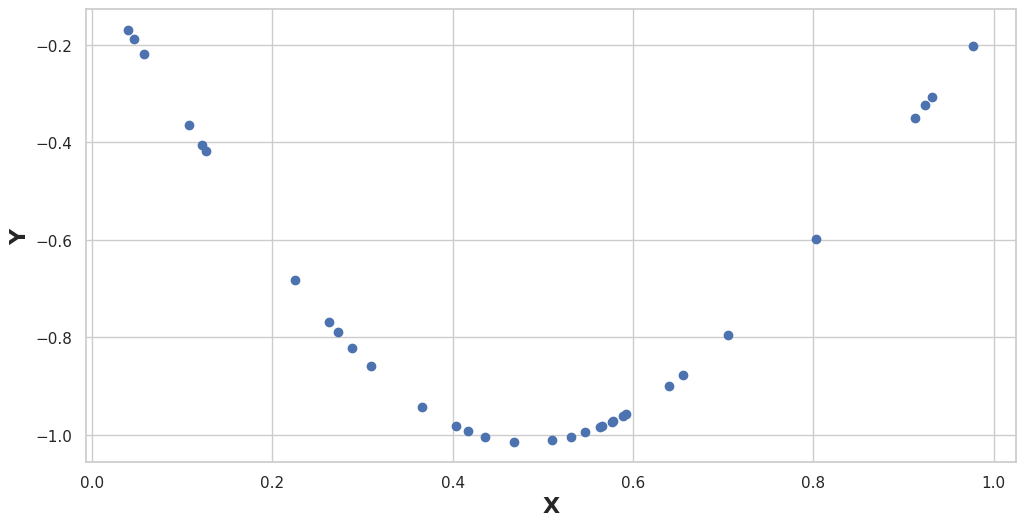

In [17]:
pred = model.predict(X_validation)
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(X_validation, pred, "ob", label="test")
plt.xlabel('X', weight="bold", fontsize=16)
plt.ylabel('Y', weight="bold", fontsize=16)

In [18]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(history.history["val_loss"], label="validation loss")
plt.plot(history.history["loss"], label="training loss")
plt.xlabel("Epoc", weight="bold", fontsize=16)
plt.ylabel("MSE", weight="bold", fontsize=16)
plt.legend()

## California dataset: Regresión

Ahora vamos con un [dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) más complicado, el dataset del precio medio por cuadra de casas en un distrito de california

In [19]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [20]:
california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)

In [21]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [22]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Las variables que contiene el dataset son:

* MedInc: ingreso medio de las personas que viven en esa cuadra
* HouseAge: edad media de las casas de esa cuadra
* AveRooms: número medio de ambientes
* AveBedrms número medio de habitaciones
* Population: cantidad de habitantes en la cuadra
* AveOccup: número medio de habitantes en la casa
* Latitude: latitud de la cuadra
* Longitude: longitud de la cuadra


* MedHouseVal:valor medio de las casas.

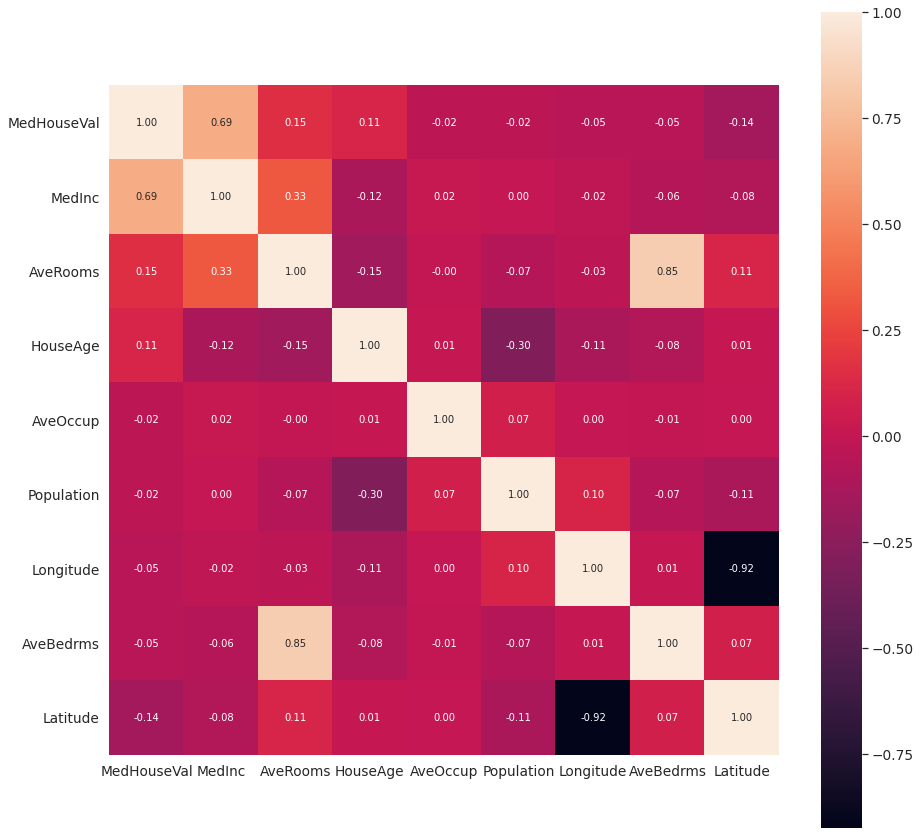

In [23]:
california_df['MedHouseVal'] = california.target
corrmat = california_df.corr()
k = 9  # number of variables for heatmap
cols = corrmat.nlargest(k, 'MedHouseVal')['MedHouseVal'].index
cm = np.corrcoef(california_df[cols].values.T)
sns.set(font_scale=1.25)
fig, ax = plt.subplots(figsize=(15, 15))
hm = sns.heatmap(
    cm,
    cbar=True,
    annot=True,
    square=True,
    fmt='.2f',
    annot_kws={'size': 10},
    yticklabels=cols.values,
    xticklabels=cols.values,
)

plt.show()

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

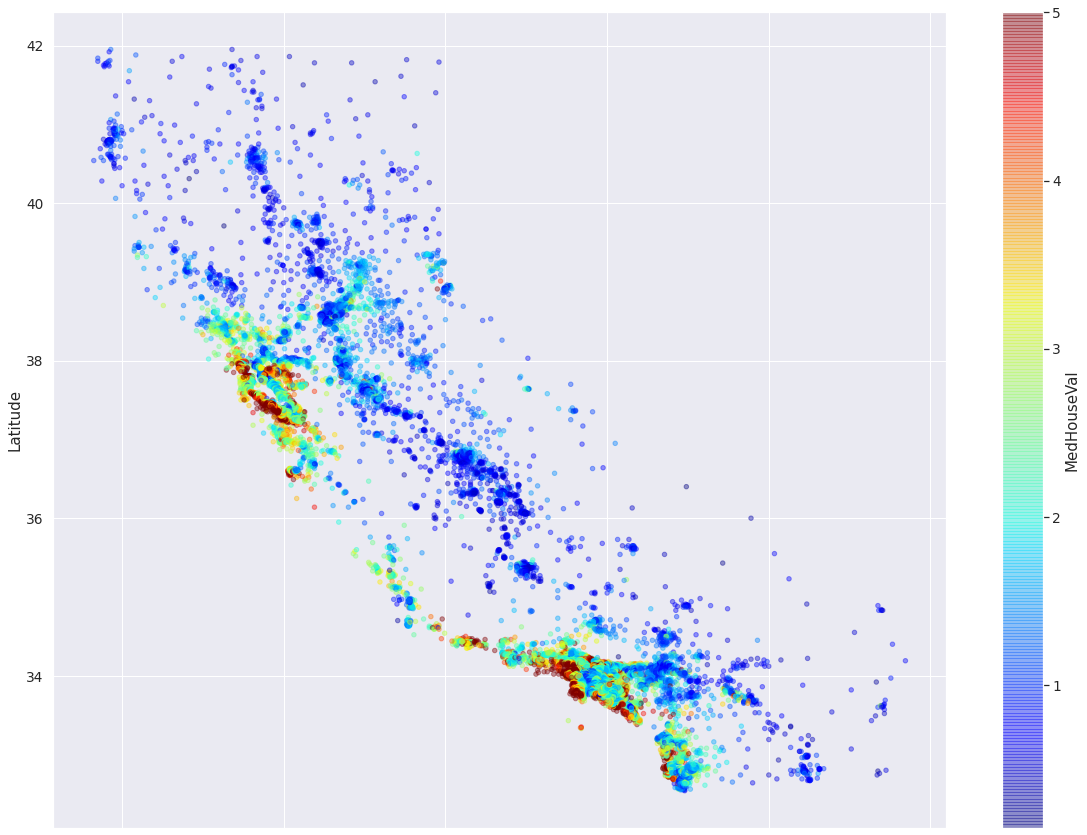

In [24]:
california_df.plot(
    kind="scatter",
    x="Longitude",
    y="Latitude",
    alpha=0.4,
    c="MedHouseVal",
    figsize=(20, 15),
    cmap=plt.get_cmap("jet"),
    colorbar=True,
)

In [25]:
california_df

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  MedHouseVal  
0        -122.23        4.526  
1        -122.22        3.585  
2        -122.24        3.521  
3        -122.25        3.413  
4        -122.25        3.422  
...          ...          ...  
20635    -121.09        0.781  
20636    -121.21        0.771  
20637    -121.22        0.923  
20638    -121.32        0.847  
20639    -121.24        0.894  

[20640 rows x 9 columns]

Text(0, 0.5, 'Counts')

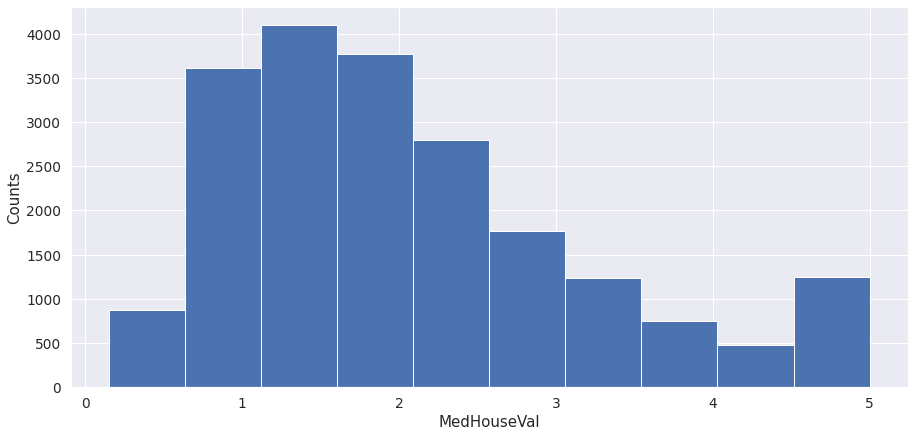

In [26]:
fig = plt.figure(figsize=(15, 7))
california_df["MedHouseVal"].hist()
plt.xlabel("MedHouseVal")
plt.ylabel("Counts")

Vamos a usar el StandardScaler y luego empezar a entrenar modelos y ver qué onda.

In [27]:
scaler = preprocessing.StandardScaler()
scaler.fit(california_df)
scaled_df = scaler.transform(california_df)
names = california_df.columns
scaled_california_df = pd.DataFrame(scaled_df, columns=names)

Entreno el modelo más simple: una regresión lineal

In [28]:
X = scaled_california_df.drop("MedHouseVal", axis=1)
y = scaled_california_df.filter(items=["MedHouseVal"])

linreg = LinearRegression()
rmse = np.sqrt(
    -cross_val_score(LinearRegression(), X, y, scoring="neg_mean_squared_error", cv=5)
)
rmse.mean()

0.6464066254204867

In [29]:
linreg = LinearRegression()
linreg.fit(X, y)
linreg.coef_[0]

array([ 0.71895227,  0.10291078, -0.23010693,  0.26491789, -0.00390232,
       -0.03408034, -0.77984545, -0.75441522])

Podemos ver la importancia tiene cada variable:

In [30]:
coeficientes = pd.DataFrame(
    {'Feature': X.columns, 'Beta': linreg.coef_[0]}, columns=['Feature', 'Beta']
)
coeficientes.sort_values(by=['Beta'])

Feature      Beta
6    Latitude -0.779845
7   Longitude -0.754415
2    AveRooms -0.230107
5    AveOccup -0.034080
4  Population -0.003902
1    HouseAge  0.102911
3   AveBedrms  0.264918
0      MedInc  0.718952

In [31]:
y_pred = linreg.predict(X)

(-3.0, 6.0)

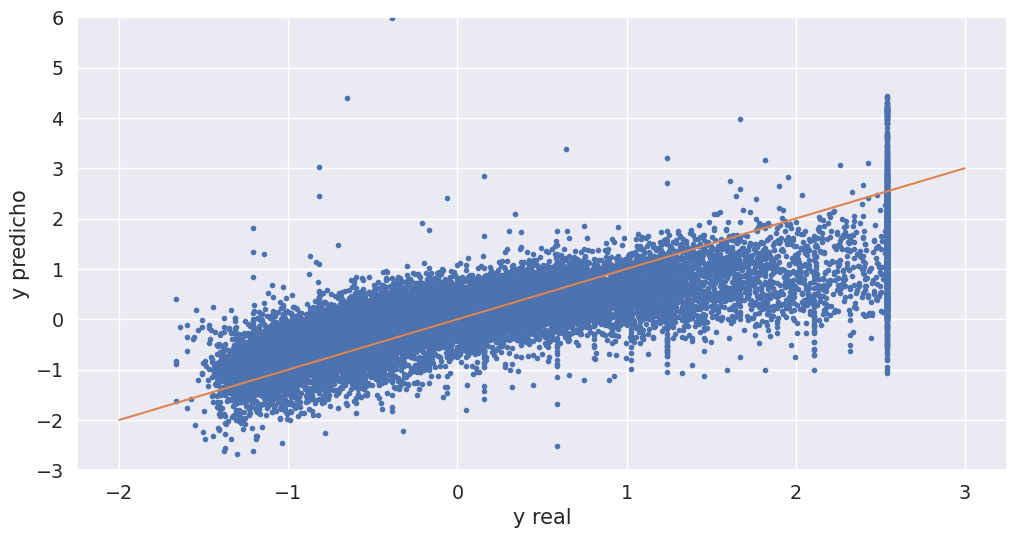

In [32]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(y, y_pred, ".")
plt.xlabel("y real")
plt.ylabel("y predicho")
plt.plot(range(-2, 4), range(-2, 4))
plt.ylim(-3, 6)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

In [34]:
model = Sequential()

In [35]:
model.add(Dense(10, activation='tanh', input_shape=(8,)))
model.add(Dense(1, activation='linear'))

In [36]:
opt = keras.optimizers.SGD(lr=0.1)
model.compile(loss='mse', optimizer=opt)

Podemos usar .summary() para ver el modelo: capas, parámetros etc

In [37]:
model.summary()

history = model.fit(
    X_train.values,
    y_train.values,
    epochs=100,
    validation_data=(X_test.values, y_test.values),
)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 11        
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________
Train on 12384 samples, validate on 8256 samples
Epoch 1/100


   32/12384 [..............................] - ETA: 15s - loss: 3.0084

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.4905 

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.4207

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.4010

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.3830

11456/12384 [==========================>...] - ETA: 0s - loss: 0.3694

12384/12384 [==============================] - 0s 38us/step - loss: 0.3716 - val_loss: 0.3314


Epoch 2/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2438

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.3429

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.3342

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.3249

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.3214

11392/12384 [==========================>...] - ETA: 0s - loss: 0.3207

12384/12384 [==============================] - 0s 34us/step - loss: 0.3190 - val_loss: 0.3258


Epoch 3/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1683

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.3112

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.3083

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.3063

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.3065



11520/12384 [==========================>...] - ETA: 0s - loss: 0.3046

12384/12384 [==============================] - 0s 34us/step - loss: 0.3057 - val_loss: 0.3195


Epoch 4/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4949

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.3047

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2866

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2974

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.3031

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2991

12384/12384 [==============================] - 0s 34us/step - loss: 0.2986 - val_loss: 0.2993


Epoch 5/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2785

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2815

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2938

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.3045

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2923

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2915

12384/12384 [==============================] - 0s 35us/step - loss: 0.2932 - val_loss: 0.2950


Epoch 6/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1553

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2871

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2943

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2925

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2876

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2871

12384/12384 [==============================] - 0s 34us/step - loss: 0.2880 - val_loss: 0.3014


Epoch 7/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2713

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2840

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2848

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2859

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2872

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2879

12384/12384 [==============================] - 0s 34us/step - loss: 0.2855 - val_loss: 0.2921


Epoch 8/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2587

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2928

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2867

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2792

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2858

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2833

12384/12384 [==============================] - 0s 35us/step - loss: 0.2844 - val_loss: 0.2915


Epoch 9/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2171

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2809

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2806

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2797

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.2826

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2816

12384/12384 [==============================] - 0s 34us/step - loss: 0.2813 - val_loss: 0.2940


Epoch 10/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1502

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2921

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2741

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2740

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2751

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2808

12384/12384 [==============================] - 0s 33us/step - loss: 0.2808 - val_loss: 0.3026


Epoch 11/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2687

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2847

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2720

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2694

 9312/12384 [=====================>........] - ETA: 0s - loss: 0.2751

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2777

12384/12384 [==============================] - 0s 32us/step - loss: 0.2790 - val_loss: 0.2850


Epoch 12/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1925

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2608

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2678

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2700

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2767

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2763

12384/12384 [==============================] - 0s 32us/step - loss: 0.2756 - val_loss: 0.2815


Epoch 13/100


   32/12384 [..............................] - ETA: 1s - loss: 0.1918

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2788

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2796

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2741

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2738

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2774

12384/12384 [==============================] - 0s 33us/step - loss: 0.2755 - val_loss: 0.2869


Epoch 14/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2208

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2565

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2815

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2754

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2757

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2738

12384/12384 [==============================] - 0s 33us/step - loss: 0.2753 - val_loss: 0.2780


Epoch 15/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1382

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2951

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2909

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2858

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2802

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2754

12384/12384 [==============================] - 0s 33us/step - loss: 0.2756 - val_loss: 0.2943


Epoch 16/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1051

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2687

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2692

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2766

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2735

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2724

12384/12384 [==============================] - 0s 33us/step - loss: 0.2725 - val_loss: 0.2921


Epoch 17/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1441

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2801

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2728

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2867

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2808

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2742

12384/12384 [==============================] - 0s 33us/step - loss: 0.2740 - val_loss: 0.2758


Epoch 18/100
   32/12384 [..............................] - ETA: 1s - loss: 0.6930

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2925

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2707

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2687

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2725

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2744

12384/12384 [==============================] - 0s 33us/step - loss: 0.2705 - val_loss: 0.2875


Epoch 19/100
   32/12384 [..............................] - ETA: 1s - loss: 0.6544

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2815

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2822

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2694

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2723

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2711

12384/12384 [==============================] - 0s 34us/step - loss: 0.2711 - val_loss: 0.2892


Epoch 20/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2666

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2586

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2675

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2693

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2700

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2714

12384/12384 [==============================] - 0s 33us/step - loss: 0.2699 - val_loss: 0.2719


Epoch 21/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3336

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2806

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2602

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2725

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2662

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2630

12384/12384 [==============================] - 0s 33us/step - loss: 0.2695 - val_loss: 0.2981


Epoch 22/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3317

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2628

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2672

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2701

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2691

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2679

12384/12384 [==============================] - 0s 34us/step - loss: 0.2687 - val_loss: 0.3046


Epoch 23/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2363

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2573

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2558

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2708

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2630

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2657

12384/12384 [==============================] - 0s 33us/step - loss: 0.2682 - val_loss: 0.2794


Epoch 24/100
   32/12384 [..............................] - ETA: 1s - loss: 0.4529

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2846

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2637

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2780

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2741

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2779

12384/12384 [==============================] - 0s 33us/step - loss: 0.2795 - val_loss: 0.3104


Epoch 25/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2625

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2656

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2679

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2677

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2734

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2719

12384/12384 [==============================] - 0s 33us/step - loss: 0.2715 - val_loss: 0.2874


Epoch 26/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0963

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2525

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2542

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2555

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2661

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2689

12384/12384 [==============================] - 0s 33us/step - loss: 0.2677 - val_loss: 0.2983


Epoch 27/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2672

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2602

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2704

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2622

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2618

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2674

12384/12384 [==============================] - 0s 33us/step - loss: 0.2663 - val_loss: 0.2765


Epoch 28/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1568

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2791

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2810

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2768

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2802

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2750

12384/12384 [==============================] - 0s 33us/step - loss: 0.2758 - val_loss: 0.2921


Epoch 29/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1855

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2548

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2715

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2732

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2719

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2718

12384/12384 [==============================] - 0s 34us/step - loss: 0.2704 - val_loss: 0.2788


Epoch 30/100
   32/12384 [..............................] - ETA: 1s - loss: 0.0919

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2581

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2738

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2706

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2728

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2699

12384/12384 [==============================] - 0s 34us/step - loss: 0.2685 - val_loss: 0.2755


Epoch 31/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1486

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2839

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2731

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2719

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2715



11008/12384 [=========================>....] - ETA: 0s - loss: 0.2681

12384/12384 [==============================] - 0s 33us/step - loss: 0.2659 - val_loss: 0.2790


Epoch 32/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1850

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2446

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2427

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2505

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2583

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2622

12384/12384 [==============================] - 0s 33us/step - loss: 0.2658 - val_loss: 0.2980


Epoch 33/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1827

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2566

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2617

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2670

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2667

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2642

12384/12384 [==============================] - 0s 33us/step - loss: 0.2643 - val_loss: 0.2766


Epoch 34/100
   32/12384 [..............................] - ETA: 1s - loss: 0.4033

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2767

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2685

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2671

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2646

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2644

12384/12384 [==============================] - 0s 33us/step - loss: 0.2647 - val_loss: 0.2845


Epoch 35/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1820

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2793

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2644

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2658

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2633

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2634

12384/12384 [==============================] - 0s 33us/step - loss: 0.2645 - val_loss: 0.2722


Epoch 36/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1634

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2616

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2716

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2622

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2608

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2607

12384/12384 [==============================] - 0s 33us/step - loss: 0.2634 - val_loss: 0.2914


Epoch 37/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1658

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2527

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2655

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2619

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2633

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2635

12384/12384 [==============================] - 0s 33us/step - loss: 0.2635 - val_loss: 0.2811


Epoch 38/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2322

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2664

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2592

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2648

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2625

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2636

12384/12384 [==============================] - 0s 33us/step - loss: 0.2628 - val_loss: 0.2703


Epoch 39/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3720

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2674

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2573

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2563

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2569

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2603

12384/12384 [==============================] - 0s 33us/step - loss: 0.2605 - val_loss: 0.2674


Epoch 40/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1731

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2392

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2542

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2522

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2606

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2592

12384/12384 [==============================] - 0s 33us/step - loss: 0.2612 - val_loss: 0.2705


Epoch 41/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1291

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2517

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2605

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2524

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2562

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2572

12384/12384 [==============================] - 0s 33us/step - loss: 0.2607 - val_loss: 0.2673


Epoch 42/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1620

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2504

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2478

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2566

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2544

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2576

12384/12384 [==============================] - 0s 34us/step - loss: 0.2588 - val_loss: 0.2650


Epoch 43/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2746

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2525

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2590

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2607

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2641

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2611

12384/12384 [==============================] - 0s 33us/step - loss: 0.2580 - val_loss: 0.2836


Epoch 44/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1816

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2562

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2561

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2569

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2575

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2554

12384/12384 [==============================] - 0s 33us/step - loss: 0.2588 - val_loss: 0.2627


Epoch 45/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1109

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2352

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2434

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2415

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2474

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2588

12384/12384 [==============================] - 0s 34us/step - loss: 0.2589 - val_loss: 0.2760


Epoch 46/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1157

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2569

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2665

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2656

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2616

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2577

12384/12384 [==============================] - 0s 33us/step - loss: 0.2563 - val_loss: 0.2770


Epoch 47/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1252

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2741

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2756

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2723

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2698

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2694

12384/12384 [==============================] - 0s 33us/step - loss: 0.2691 - val_loss: 0.2844


Epoch 48/100


   32/12384 [..............................] - ETA: 0s - loss: 0.2369

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2576

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2577

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2619

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2636

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2598

12384/12384 [==============================] - 0s 33us/step - loss: 0.2585 - val_loss: 0.2663


Epoch 49/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1551

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2718

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2693

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2622

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2581

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2572

12384/12384 [==============================] - 0s 34us/step - loss: 0.2567 - val_loss: 0.2648


Epoch 50/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2691

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2596

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2563

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2566

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2530

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2562

12384/12384 [==============================] - 0s 33us/step - loss: 0.2558 - val_loss: 0.2751


Epoch 51/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2309

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2663

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2575

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2570

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2542

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2533

12384/12384 [==============================] - 0s 32us/step - loss: 0.2537 - val_loss: 0.2713


Epoch 52/100


   32/12384 [..............................] - ETA: 0s - loss: 0.3547

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2963

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2692

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2636

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2513

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2535

12384/12384 [==============================] - 0s 32us/step - loss: 0.2537 - val_loss: 0.2590


Epoch 53/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2438

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2680

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2550

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2603

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2604

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2559

12384/12384 [==============================] - 0s 34us/step - loss: 0.2544 - val_loss: 0.2618


Epoch 54/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3636

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2410

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2411

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2486

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2524

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2510

12384/12384 [==============================] - 0s 33us/step - loss: 0.2528 - val_loss: 0.2642


Epoch 55/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1343

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2579

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2614

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2570

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2539

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2505

12384/12384 [==============================] - 0s 33us/step - loss: 0.2533 - val_loss: 0.2721


Epoch 56/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2868

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2580

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2552

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2523

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2557

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2520

12384/12384 [==============================] - 0s 33us/step - loss: 0.2505 - val_loss: 0.2665


Epoch 57/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2744

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2234

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2391

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2444

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2500

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2506

12384/12384 [==============================] - 0s 33us/step - loss: 0.2509 - val_loss: 0.2591


Epoch 58/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3103

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2461

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2571

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2513

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2539

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2518

12384/12384 [==============================] - 0s 34us/step - loss: 0.2522 - val_loss: 0.2580


Epoch 59/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1860

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2587

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2493

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2464

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2516

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2493

12384/12384 [==============================] - 0s 33us/step - loss: 0.2506 - val_loss: 0.2659


Epoch 60/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2999

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2459

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2422

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2408

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2438

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2474

12384/12384 [==============================] - 0s 33us/step - loss: 0.2494 - val_loss: 0.2574


Epoch 61/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0820

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2587

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2627

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2587

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2480

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2469

12384/12384 [==============================] - 0s 35us/step - loss: 0.2484 - val_loss: 0.2656


Epoch 62/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2376

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2663

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2539

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2454

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2413

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2447

12384/12384 [==============================] - 0s 33us/step - loss: 0.2490 - val_loss: 0.2534


Epoch 63/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2584

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2615

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2502

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2504

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2494

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2478

12384/12384 [==============================] - 0s 33us/step - loss: 0.2486 - val_loss: 0.2592


Epoch 64/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1203

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2673

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2569

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2512

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2455

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2465

12384/12384 [==============================] - 0s 34us/step - loss: 0.2472 - val_loss: 0.2657


Epoch 65/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1269

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2601

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2537

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2461

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2471

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2480

12384/12384 [==============================] - 0s 35us/step - loss: 0.2493 - val_loss: 0.2565


Epoch 66/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2428

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2544

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2439

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2505

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2542

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2470

12384/12384 [==============================] - 0s 34us/step - loss: 0.2480 - val_loss: 0.2521


Epoch 67/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1340

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2676

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2583

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2566

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2514

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2479

12384/12384 [==============================] - 0s 33us/step - loss: 0.2469 - val_loss: 0.2603


Epoch 68/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1630

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2254

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2436

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2398

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2454

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2469

12384/12384 [==============================] - 0s 33us/step - loss: 0.2479 - val_loss: 0.2550


Epoch 69/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3336

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2339

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2411

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2523

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2489

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2469

12384/12384 [==============================] - 0s 34us/step - loss: 0.2474 - val_loss: 0.2579


Epoch 70/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2970

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2479

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2552

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2460

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2466

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2461

12384/12384 [==============================] - 0s 36us/step - loss: 0.2469 - val_loss: 0.2496


Epoch 71/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3833

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2647

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2586

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2496

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2501

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2462

12384/12384 [==============================] - 0s 34us/step - loss: 0.2459 - val_loss: 0.2483


Epoch 72/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2700

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2415

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2439

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2445

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2448

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2471

12384/12384 [==============================] - 0s 34us/step - loss: 0.2449 - val_loss: 0.2586


Epoch 73/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2545

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2491

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2518

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2490

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2457

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2459

12384/12384 [==============================] - 0s 34us/step - loss: 0.2453 - val_loss: 0.2521


Epoch 74/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1506

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2256

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2267

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2318

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2396

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2444

12384/12384 [==============================] - 0s 34us/step - loss: 0.2451 - val_loss: 0.2607


Epoch 75/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1179

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2388

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2500

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2498

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2478

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2468

12384/12384 [==============================] - 0s 33us/step - loss: 0.2469 - val_loss: 0.2691


Epoch 76/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2886

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2427

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2421

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2484

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2457

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2421

12384/12384 [==============================] - 0s 34us/step - loss: 0.2456 - val_loss: 0.2671


Epoch 77/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2231

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2424

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2503

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2424

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2405

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2436

12384/12384 [==============================] - 0s 34us/step - loss: 0.2454 - val_loss: 0.2570


Epoch 78/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1295

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2425

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2390

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2435

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2456



11008/12384 [=========================>....] - ETA: 0s - loss: 0.2486

12384/12384 [==============================] - 0s 34us/step - loss: 0.2453 - val_loss: 0.2481


Epoch 79/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1783

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2463

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2335

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2401

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2396

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2458

12384/12384 [==============================] - 0s 34us/step - loss: 0.2442 - val_loss: 0.2486


Epoch 80/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3383

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2601

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2548

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2490

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2443

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2446

12384/12384 [==============================] - 0s 35us/step - loss: 0.2443 - val_loss: 0.2576


Epoch 81/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3631

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2448

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2461

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2403

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2395

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2399

12384/12384 [==============================] - 0s 34us/step - loss: 0.2437 - val_loss: 0.2661


Epoch 82/100
   32/12384 [..............................] - ETA: 1s - loss: 0.5919

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2472

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2472

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2450

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2415

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2414

12384/12384 [==============================] - 0s 34us/step - loss: 0.2448 - val_loss: 0.2624


Epoch 83/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3749

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2484

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2461

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2384

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2405

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2403

12384/12384 [==============================] - 0s 34us/step - loss: 0.2425 - val_loss: 0.2663


Epoch 84/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1440

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2544

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2487

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2458

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2448

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2455

12384/12384 [==============================] - 0s 33us/step - loss: 0.2470 - val_loss: 0.2643


Epoch 85/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2570

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2544

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2536

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2512

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2463

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2487

12384/12384 [==============================] - 0s 34us/step - loss: 0.2467 - val_loss: 0.2499


Epoch 86/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2650

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2499

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2494

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2452

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2455

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2441

12384/12384 [==============================] - 0s 34us/step - loss: 0.2436 - val_loss: 0.2603


Epoch 87/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3778

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2249

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2265

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2360

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2365

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2382

12384/12384 [==============================] - 0s 34us/step - loss: 0.2432 - val_loss: 0.2574


Epoch 88/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1926

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2304

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2389

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2356

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2362

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2389

12384/12384 [==============================] - 0s 34us/step - loss: 0.2431 - val_loss: 0.2457


Epoch 89/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2954

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2518

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2551

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2514

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2487

10400/12384 [========================>.....] - ETA: 0s - loss: 0.2525

12224/12384 [============================>.] - ETA: 0s - loss: 0.2505

12384/12384 [==============================] - 0s 36us/step - loss: 0.2501 - val_loss: 0.2559


Epoch 90/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2629

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2526

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2400

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2404

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2463

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2458

12384/12384 [==============================] - 0s 34us/step - loss: 0.2429 - val_loss: 0.2496


Epoch 91/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1042

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2457

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2486

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2419

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2433

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2440

12384/12384 [==============================] - 0s 34us/step - loss: 0.2427 - val_loss: 0.2470


Epoch 92/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0873

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2563

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2420

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2331

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2444

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2417

12384/12384 [==============================] - 0s 34us/step - loss: 0.2436 - val_loss: 0.2539


Epoch 93/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2449

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2562

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2567

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2502

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2468

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2495

12384/12384 [==============================] - 0s 33us/step - loss: 0.2500 - val_loss: 0.2662


Epoch 94/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1283

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2476

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2454

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2454

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2478

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2452

12384/12384 [==============================] - 0s 34us/step - loss: 0.2427 - val_loss: 0.2503


Epoch 95/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1658

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2281

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2460

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2432

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2455

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2404

12384/12384 [==============================] - 0s 34us/step - loss: 0.2424 - val_loss: 0.2594


Epoch 96/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2635

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2642

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2405

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2355

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2429



10720/12384 [========================>.....] - ETA: 0s - loss: 0.2469

12384/12384 [==============================] - 0s 34us/step - loss: 0.2486 - val_loss: 0.2565


Epoch 97/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2178

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2594

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2538

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2474

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2503

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2440

12384/12384 [==============================] - 0s 34us/step - loss: 0.2446 - val_loss: 0.2488


Epoch 98/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2656

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2261

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2296

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2333

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2404

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2438

12384/12384 [==============================] - 0s 33us/step - loss: 0.2425 - val_loss: 0.2470


Epoch 99/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1654

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2322

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2304

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2347

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2405

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2383

12384/12384 [==============================] - 0s 34us/step - loss: 0.2428 - val_loss: 0.2549


Epoch 100/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3555

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2519

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2390

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2446

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2505

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2475

12384/12384 [==============================] - 0s 33us/step - loss: 0.2426 - val_loss: 0.2503


In [38]:
y_pred_nn = model.predict(X_test.values)

(-3.0, 6.0)

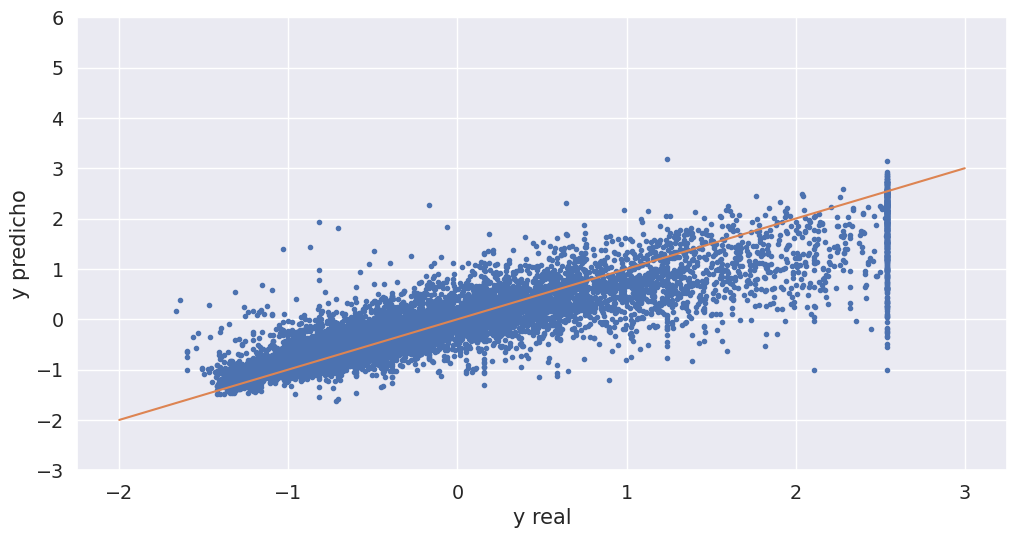

In [39]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(y_test, y_pred_nn, ".")
plt.plot(range(-2, 4), range(-2, 4))
plt.xlabel("y real")
plt.ylabel("y predicho")
plt.ylim(-3, 6)

In [40]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])

Ahora ploteamos el rmse del validation y training por época

Text(0.5, 0, 'Época')

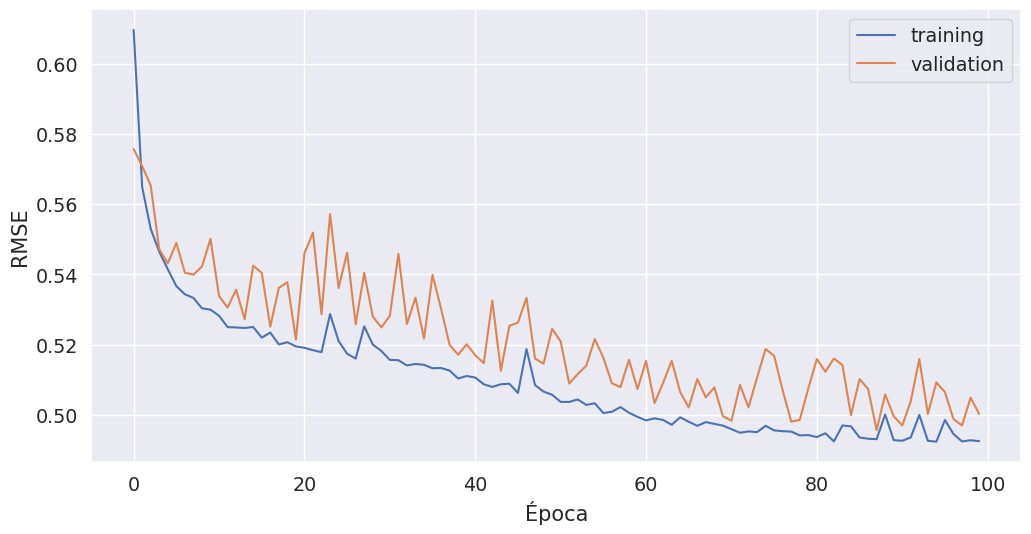

In [41]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss, label="training")
plt.plot(val_loss, label="validation")
plt.legend()
plt.ylabel("RMSE")
plt.xlabel("Época")

Vemos que salta bastante la loss durante el entrenamiento:

Qué podemos hacer para que salte menos? Qué es lo que controla la "velocidad del aprendizaje"?

Podemos bajar la tasa de aprendizaje

In [42]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(8,)))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.SGD(lr=0.05)
model.compile(loss='mse', optimizer=opt)

In [43]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=200,
    validation_data=(X_test.values, y_test.values),
)

Train on 12384 samples, validate on 8256 samples
Epoch 1/200
   32/12384 [..............................] - ETA: 15s - loss: 0.5749

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.4951 

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.4351

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.4231

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.3983

11424/12384 [==========================>...] - ETA: 0s - loss: 0.3871

12384/12384 [==============================] - 0s 37us/step - loss: 0.3831 - val_loss: 0.3550


Epoch 2/200
   32/12384 [..............................] - ETA: 1s - loss: 0.5216

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.3242

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.3288

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.3267

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.3330

11424/12384 [==========================>...] - ETA: 0s - loss: 0.3311

12384/12384 [==============================] - 0s 33us/step - loss: 0.3309 - val_loss: 0.3268


Epoch 3/200


   32/12384 [..............................] - ETA: 1s - loss: 0.3536

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.3002

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.3068

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.3055

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.3088

11456/12384 [==========================>...] - ETA: 0s - loss: 0.3089

12384/12384 [==============================] - 0s 32us/step - loss: 0.3131 - val_loss: 0.3211


Epoch 4/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2917

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.3296

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.3109

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.3208

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.3057

11232/12384 [==========================>...] - ETA: 0s - loss: 0.3076

12384/12384 [==============================] - 0s 33us/step - loss: 0.3063 - val_loss: 0.3072


Epoch 5/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1515

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.3152

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.3184

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.3070

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.3052

11424/12384 [==========================>...] - ETA: 0s - loss: 0.3017

12384/12384 [==============================] - 0s 32us/step - loss: 0.2994 - val_loss: 0.3028


Epoch 6/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1362

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2753

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2834

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2829

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2973

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2962

12384/12384 [==============================] - 0s 34us/step - loss: 0.2955 - val_loss: 0.3093


Epoch 7/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2426

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2971

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2919

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2946

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2967

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2913



12384/12384 [==============================] - 0s 33us/step - loss: 0.2937 - val_loss: 0.2985


Epoch 8/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1878

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.3088

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.3008

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.3045

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2990

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2942

12384/12384 [==============================] - 0s 32us/step - loss: 0.2920 - val_loss: 0.3005


Epoch 9/200


   32/12384 [..............................] - ETA: 1s - loss: 0.6637

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.3402

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.3021

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.3026

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2959

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2899

12384/12384 [==============================] - 0s 33us/step - loss: 0.2889 - val_loss: 0.2935


Epoch 10/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2612

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2680

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2846

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2809

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2906

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2837

12384/12384 [==============================] - 0s 33us/step - loss: 0.2876 - val_loss: 0.2944


Epoch 11/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1510

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2749

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2684

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2741

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2806

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2849

12384/12384 [==============================] - 0s 33us/step - loss: 0.2844 - val_loss: 0.2974


Epoch 12/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1597

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2621

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2745

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2832

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2817

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2854

12384/12384 [==============================] - 0s 33us/step - loss: 0.2832 - val_loss: 0.2926


Epoch 13/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3248

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.3038

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2870

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2829

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2835

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2817

12384/12384 [==============================] - 0s 32us/step - loss: 0.2834 - val_loss: 0.2972


Epoch 14/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1787

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2748

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2868

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2854

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2856

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2842

12384/12384 [==============================] - 0s 33us/step - loss: 0.2823 - val_loss: 0.2909


Epoch 15/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4141

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2785

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2716

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2820

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2861

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2795

12384/12384 [==============================] - 0s 33us/step - loss: 0.2795 - val_loss: 0.2891


Epoch 16/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3732

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2776

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2798

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2873

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2878

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2822

12384/12384 [==============================] - 0s 33us/step - loss: 0.2793 - val_loss: 0.2883


Epoch 17/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3104

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2646

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2842

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2881

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2826

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2799

12384/12384 [==============================] - 0s 32us/step - loss: 0.2783 - val_loss: 0.2880


Epoch 18/200


   32/12384 [..............................] - ETA: 0s - loss: 0.2879

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2754

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2770

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2812



 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2784

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2760

12384/12384 [==============================] - 0s 32us/step - loss: 0.2782 - val_loss: 0.2911


Epoch 19/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2294

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2804

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2811

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2782



 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2776

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2797

12384/12384 [==============================] - 0s 33us/step - loss: 0.2770 - val_loss: 0.2921


Epoch 20/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3634

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2637

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2589

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2665

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2715

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2714

12384/12384 [==============================] - 0s 32us/step - loss: 0.2754 - val_loss: 0.2832


Epoch 21/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2643

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2565

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2773

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2737

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2738

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2758

12384/12384 [==============================] - 0s 32us/step - loss: 0.2743 - val_loss: 0.2883


Epoch 22/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2279

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2539

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2593

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2598

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2661

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2690

12384/12384 [==============================] - 0s 33us/step - loss: 0.2748 - val_loss: 0.2828


Epoch 23/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2111

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2657

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2744

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2693

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2755

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2735

12384/12384 [==============================] - 0s 33us/step - loss: 0.2745 - val_loss: 0.2818


Epoch 24/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2375

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2809

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2791

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2758

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2748

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2743

12384/12384 [==============================] - 0s 33us/step - loss: 0.2735 - val_loss: 0.2889


Epoch 25/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4662

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2884

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2820

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2768

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2748

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2716

12384/12384 [==============================] - 0s 33us/step - loss: 0.2727 - val_loss: 0.2848


Epoch 26/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2067

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2823

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2786

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2792

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2719

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2733

12384/12384 [==============================] - 0s 33us/step - loss: 0.2722 - val_loss: 0.2847


Epoch 27/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1520

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2641

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2647

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2763

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2736

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2695

12384/12384 [==============================] - 0s 33us/step - loss: 0.2694 - val_loss: 0.2833


Epoch 28/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1012

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2720

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2799

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2805

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2727

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2694

12384/12384 [==============================] - 0s 33us/step - loss: 0.2698 - val_loss: 0.2790


Epoch 29/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3102

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2691

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2752

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2738

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2716

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2702

12384/12384 [==============================] - 0s 32us/step - loss: 0.2692 - val_loss: 0.2826


Epoch 30/200


   32/12384 [..............................] - ETA: 1s - loss: 0.8498

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2725

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2765

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2758

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2733

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2718

12384/12384 [==============================] - 0s 34us/step - loss: 0.2689 - val_loss: 0.2816


Epoch 31/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4729

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2966

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2751

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2683

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2702

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2668

12384/12384 [==============================] - 0s 32us/step - loss: 0.2681 - val_loss: 0.2792


Epoch 32/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2745

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2690

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2631

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2573

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2601

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2653

12384/12384 [==============================] - 0s 33us/step - loss: 0.2664 - val_loss: 0.2831


Epoch 33/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1950

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2774

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2737

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2708

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2633

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2621

12384/12384 [==============================] - 0s 33us/step - loss: 0.2674 - val_loss: 0.2752


Epoch 34/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1642

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2510

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2535

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2503

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2595

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2651

12384/12384 [==============================] - 0s 34us/step - loss: 0.2660 - val_loss: 0.2761


Epoch 35/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2275

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2658

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2670

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2591

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2558

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2635

12384/12384 [==============================] - 0s 35us/step - loss: 0.2643 - val_loss: 0.2773


Epoch 36/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2114

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2747

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2733

 5952/12384 [=============>................] - ETA: 0s - loss: 0.2720

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2707

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2679

12384/12384 [==============================] - 0s 34us/step - loss: 0.2659 - val_loss: 0.2815


Epoch 37/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2884

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2584

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2753

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2704

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2677

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2677



12384/12384 [==============================] - 0s 33us/step - loss: 0.2664 - val_loss: 0.2778


Epoch 38/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3808

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2677

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2672

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2718

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2668

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2660

12384/12384 [==============================] - 0s 33us/step - loss: 0.2654 - val_loss: 0.2769


Epoch 39/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1796

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2817

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2728

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2609

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2648

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2651

12384/12384 [==============================] - 0s 33us/step - loss: 0.2643 - val_loss: 0.2805


Epoch 40/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2872

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2612

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2685

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2615

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2596

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2650

12384/12384 [==============================] - 0s 32us/step - loss: 0.2645 - val_loss: 0.2778


Epoch 41/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2571

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2567

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2599

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2663

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2627

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2652

12384/12384 [==============================] - 0s 33us/step - loss: 0.2646 - val_loss: 0.2746


Epoch 42/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2102

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2540

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2562

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2626

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2604

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2621

12384/12384 [==============================] - 0s 32us/step - loss: 0.2637 - val_loss: 0.2776


Epoch 43/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1228

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2537

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2532

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2582

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2637

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2655



12384/12384 [==============================] - 0s 33us/step - loss: 0.2638 - val_loss: 0.2755


Epoch 44/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1922

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2477

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2587

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2639

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2658

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2673

12384/12384 [==============================] - 0s 33us/step - loss: 0.2649 - val_loss: 0.2708


Epoch 45/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1822

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2753

 4704/12384 [==========>...................] - ETA: 0s - loss: 0.2893

 7008/12384 [===============>..............] - ETA: 0s - loss: 0.2742

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2695

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2639

12384/12384 [==============================] - 0s 32us/step - loss: 0.2640 - val_loss: 0.2767


Epoch 46/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3159

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2694

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2674

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2636

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2664

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2646

12384/12384 [==============================] - 0s 32us/step - loss: 0.2642 - val_loss: 0.2770


Epoch 47/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1308

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2649

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2695

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2699

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2657

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2633

12384/12384 [==============================] - 0s 32us/step - loss: 0.2638 - val_loss: 0.2809


Epoch 48/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3375

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2691

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2695

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2692

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2671

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2604

12384/12384 [==============================] - 0s 33us/step - loss: 0.2622 - val_loss: 0.2767


Epoch 49/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1525

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2546

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2595

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2558



 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2596

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2607

12384/12384 [==============================] - 0s 33us/step - loss: 0.2628 - val_loss: 0.2716


Epoch 50/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1920

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2670

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2604

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2629

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2604

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2631

12384/12384 [==============================] - 0s 32us/step - loss: 0.2623 - val_loss: 0.2808


Epoch 51/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2647

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2516

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2594

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2587

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2604

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2631

12384/12384 [==============================] - 0s 32us/step - loss: 0.2632 - val_loss: 0.2761


Epoch 52/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2203

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2458

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2519

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2541

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2632

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2619

12384/12384 [==============================] - 0s 33us/step - loss: 0.2625 - val_loss: 0.2728


Epoch 53/200
   32/12384 [..............................] - ETA: 1s - loss: 0.5189

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2651

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2738

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2650

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2644

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2640

12384/12384 [==============================] - 0s 33us/step - loss: 0.2625 - val_loss: 0.2710


Epoch 54/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4840

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2700

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2577

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2639

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2619

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2607

12384/12384 [==============================] - 0s 33us/step - loss: 0.2610 - val_loss: 0.2762


Epoch 55/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1509

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2518

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2603

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2619

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2655

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2638

12384/12384 [==============================] - 0s 33us/step - loss: 0.2627 - val_loss: 0.2743


Epoch 56/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2560

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2539

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2515

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2474

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2554

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2563

12384/12384 [==============================] - 0s 32us/step - loss: 0.2611 - val_loss: 0.2939


Epoch 57/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2832

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2430

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2525

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2574



 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2582

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2613

12384/12384 [==============================] - 0s 33us/step - loss: 0.2616 - val_loss: 0.2770


Epoch 58/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3112

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2751

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2658

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2601

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2572

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2599

12384/12384 [==============================] - 0s 33us/step - loss: 0.2613 - val_loss: 0.2707


Epoch 59/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3175

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2649

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2615

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2534

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2536

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2598

12384/12384 [==============================] - 0s 33us/step - loss: 0.2615 - val_loss: 0.2715


Epoch 60/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3399

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2739

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2655

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2641

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2653

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2645

12384/12384 [==============================] - 0s 33us/step - loss: 0.2607 - val_loss: 0.2700


Epoch 61/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1647

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2571

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2615

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2583

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2543

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2574

12384/12384 [==============================] - 0s 33us/step - loss: 0.2602 - val_loss: 0.2708


Epoch 62/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3284

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2594

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2501

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2527

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2544

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2591

12384/12384 [==============================] - 0s 33us/step - loss: 0.2602 - val_loss: 0.2767


Epoch 63/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3653

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2604

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2507

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2481

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2538

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2581

12384/12384 [==============================] - 0s 33us/step - loss: 0.2602 - val_loss: 0.2678


Epoch 64/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1828

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2618

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2666

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2687

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2594

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2587

12384/12384 [==============================] - 0s 33us/step - loss: 0.2588 - val_loss: 0.2721


Epoch 65/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3365

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2668

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2582

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2601

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2609

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2559



12384/12384 [==============================] - 0s 33us/step - loss: 0.2575 - val_loss: 0.2712


Epoch 66/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2187

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2443

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2482

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2428

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2506

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2568

12384/12384 [==============================] - 0s 33us/step - loss: 0.2577 - val_loss: 0.2709


Epoch 67/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1446

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2685

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2560

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2642

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2618

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2586

12384/12384 [==============================] - 0s 33us/step - loss: 0.2582 - val_loss: 0.2687


Epoch 68/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1553

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2640

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2613

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2583

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2548

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2538

12384/12384 [==============================] - 0s 33us/step - loss: 0.2565 - val_loss: 0.2647


Epoch 69/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4205

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2386

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2491

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2600

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2614

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2575

12384/12384 [==============================] - 0s 33us/step - loss: 0.2560 - val_loss: 0.2704


Epoch 70/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4228

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2669

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2686

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2621

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2587

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2566

12384/12384 [==============================] - 0s 33us/step - loss: 0.2567 - val_loss: 0.2678


Epoch 71/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4697

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2257

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2442

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2496

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2566

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2572

12384/12384 [==============================] - 0s 32us/step - loss: 0.2551 - val_loss: 0.2697


Epoch 72/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2220

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2644

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2622

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2581

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2567

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2538

12384/12384 [==============================] - 0s 32us/step - loss: 0.2539 - val_loss: 0.2658


Epoch 73/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2197

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2427

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2429

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2473

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2491

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2515

12384/12384 [==============================] - 0s 32us/step - loss: 0.2534 - val_loss: 0.2674


Epoch 74/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4071

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2559

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2435

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2472

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2530

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2535



12384/12384 [==============================] - 0s 33us/step - loss: 0.2534 - val_loss: 0.2687


Epoch 75/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1283

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2549

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2574

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2581

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2569

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2562

12384/12384 [==============================] - 0s 33us/step - loss: 0.2527 - val_loss: 0.2643


Epoch 76/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4030

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2473

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2497

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2545

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2503

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2516

12384/12384 [==============================] - 0s 32us/step - loss: 0.2515 - val_loss: 0.2643


Epoch 77/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2011



 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2500

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2441

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2460

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2460

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2507

12384/12384 [==============================] - 0s 33us/step - loss: 0.2519 - val_loss: 0.2628


Epoch 78/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2222

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2389

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2525

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2471

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2474

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2492

12384/12384 [==============================] - 0s 33us/step - loss: 0.2506 - val_loss: 0.2630


Epoch 79/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1259

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2583

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2575

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2567

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2543

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2524

12384/12384 [==============================] - 0s 33us/step - loss: 0.2506 - val_loss: 0.2589


Epoch 80/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3323

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2483

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2523

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2537

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2467

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2503

12384/12384 [==============================] - 0s 33us/step - loss: 0.2499 - val_loss: 0.2627


Epoch 81/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1974

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2341

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2514

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2463

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2493

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2508

12384/12384 [==============================] - 0s 33us/step - loss: 0.2487 - val_loss: 0.2616


Epoch 82/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1176

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2588

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2447

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2503

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2520

10880/12384 [=========================>....] - ETA: 0s - loss: 0.2476

12384/12384 [==============================] - 0s 33us/step - loss: 0.2491 - val_loss: 0.2583


Epoch 83/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1819

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2499

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2503

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2512

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2477

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2510

12384/12384 [==============================] - 0s 33us/step - loss: 0.2486 - val_loss: 0.2620


Epoch 84/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1777

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2346

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2459

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2504

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2510

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2500

12384/12384 [==============================] - 0s 33us/step - loss: 0.2481 - val_loss: 0.2637


Epoch 85/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2659

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2320

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2483

 6528/12384 [==============>...............] - ETA: 0s - loss: 0.2485

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2483

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2453

12384/12384 [==============================] - 0s 34us/step - loss: 0.2476 - val_loss: 0.2589


Epoch 86/200
   32/12384 [..............................] - ETA: 1s - loss: 0.5503

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2446

 3360/12384 [=======>......................] - ETA: 0s - loss: 0.2443

 5248/12384 [===========>..................] - ETA: 0s - loss: 0.2449

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2517

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2516

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2499

12384/12384 [==============================] - 0s 37us/step - loss: 0.2471 - val_loss: 0.2571


Epoch 87/200


   32/12384 [..............................] - ETA: 1s - loss: 0.3736

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2548

 3584/12384 [=======>......................] - ETA: 0s - loss: 0.2639

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2550

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2473

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2464

12384/12384 [==============================] - 0s 35us/step - loss: 0.2463 - val_loss: 0.2547


Epoch 88/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2053

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2557

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2413

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2441

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2469

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2472

12384/12384 [==============================] - 0s 33us/step - loss: 0.2462 - val_loss: 0.2568


Epoch 89/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1982

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2321

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2430

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2470

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2493

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2490

12384/12384 [==============================] - 0s 33us/step - loss: 0.2462 - val_loss: 0.2597


Epoch 90/200
   32/12384 [..............................] - ETA: 1s - loss: 0.0745

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2378

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2451

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2462

 8768/12384 [====================>.........] - ETA: 0s - loss: 0.2448

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2464

12384/12384 [==============================] - 0s 33us/step - loss: 0.2453 - val_loss: 0.2619


Epoch 91/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2702

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2277

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2401

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2383

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2397

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2435

12384/12384 [==============================] - 0s 32us/step - loss: 0.2449 - val_loss: 0.2570


Epoch 92/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1992

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2388

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2472

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2459



 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2438



11104/12384 [=========================>....] - ETA: 0s - loss: 0.2449

12384/12384 [==============================] - 0s 33us/step - loss: 0.2448 - val_loss: 0.2553


Epoch 93/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4704

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2512

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2590

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2512

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2547

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2491

12384/12384 [==============================] - 0s 33us/step - loss: 0.2448 - val_loss: 0.2544


Epoch 94/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3523

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2613

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2560

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2484

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2492

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2441

12384/12384 [==============================] - 0s 33us/step - loss: 0.2440 - val_loss: 0.2573


Epoch 95/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3040

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2443

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2432

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2482

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2466



11264/12384 [==========================>...] - ETA: 0s - loss: 0.2445

12384/12384 [==============================] - 0s 33us/step - loss: 0.2442 - val_loss: 0.2557


Epoch 96/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2634

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2516

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2458

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2405

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2398

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2406

12384/12384 [==============================] - 0s 33us/step - loss: 0.2426 - val_loss: 0.2576


Epoch 97/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2027

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2456

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2354

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2378

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2376

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2455

12384/12384 [==============================] - 0s 33us/step - loss: 0.2438 - val_loss: 0.2516


Epoch 98/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1403

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2429

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2467

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2414

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2402

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2424

12384/12384 [==============================] - 0s 33us/step - loss: 0.2432 - val_loss: 0.2551


Epoch 99/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4325

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2569

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2512

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2463

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2438

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2431

12384/12384 [==============================] - 0s 33us/step - loss: 0.2429 - val_loss: 0.2512


Epoch 100/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1512

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2574

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2555

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2525

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2425

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2424

12384/12384 [==============================] - 0s 36us/step - loss: 0.2428 - val_loss: 0.2652


Epoch 101/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1491

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2388

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2464

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2411

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2403

10752/12384 [=========================>....] - ETA: 0s - loss: 0.2438

12384/12384 [==============================] - 0s 34us/step - loss: 0.2427 - val_loss: 0.2595


Epoch 102/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2481

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2274

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2461

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2465

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2477

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2447

12384/12384 [==============================] - 0s 33us/step - loss: 0.2430 - val_loss: 0.2545


Epoch 103/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0903

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2405

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2380

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2391

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2405

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2418

12384/12384 [==============================] - 0s 33us/step - loss: 0.2422 - val_loss: 0.2498


Epoch 104/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1686

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2444

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2550

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2459

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2433

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2428

12384/12384 [==============================] - 0s 33us/step - loss: 0.2424 - val_loss: 0.2705


Epoch 105/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1363

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2418

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2357

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2417

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2413

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2445

12384/12384 [==============================] - 0s 33us/step - loss: 0.2416 - val_loss: 0.2535


Epoch 106/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1317

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2413

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2511

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2510

 8672/12384 [====================>.........] - ETA: 0s - loss: 0.2448

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2434

12384/12384 [==============================] - 0s 33us/step - loss: 0.2421 - val_loss: 0.2518


Epoch 107/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2418

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2466

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2522

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2473

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2430

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2416

12384/12384 [==============================] - 0s 32us/step - loss: 0.2411 - val_loss: 0.2524


Epoch 108/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2998

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2261

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2393

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2364

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2380

10848/12384 [=========================>....] - ETA: 0s - loss: 0.2436

12384/12384 [==============================] - 0s 33us/step - loss: 0.2411 - val_loss: 0.2563


Epoch 109/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1165

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2368

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2426

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2433

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2453

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2397

12384/12384 [==============================] - 0s 33us/step - loss: 0.2408 - val_loss: 0.2490


Epoch 110/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2245

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2414

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2444

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2478

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2436

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2390

12384/12384 [==============================] - 0s 32us/step - loss: 0.2406 - val_loss: 0.2498


Epoch 111/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1230

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2571

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2497

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2433

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2420

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2415

12384/12384 [==============================] - 0s 32us/step - loss: 0.2408 - val_loss: 0.2512


Epoch 112/200


   32/12384 [..............................] - ETA: 1s - loss: 0.3182

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2481

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2479

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2460

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2406

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2382

12384/12384 [==============================] - 0s 33us/step - loss: 0.2395 - val_loss: 0.2495


Epoch 113/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1444

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2457

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2458

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2459

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2403

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2406

12384/12384 [==============================] - 0s 33us/step - loss: 0.2404 - val_loss: 0.2532


Epoch 114/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2287

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2500

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2586

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2519

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2418

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2413

12384/12384 [==============================] - 0s 32us/step - loss: 0.2409 - val_loss: 0.2519


Epoch 115/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1316

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2407

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2399

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2360

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2392

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2393

12384/12384 [==============================] - 0s 33us/step - loss: 0.2395 - val_loss: 0.2497


Epoch 116/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3462

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2429

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2398

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2462

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2482

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2433

12384/12384 [==============================] - 0s 32us/step - loss: 0.2409 - val_loss: 0.2546


Epoch 117/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1299

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2358

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2416

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2346

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2355

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2369

12384/12384 [==============================] - 0s 33us/step - loss: 0.2399 - val_loss: 0.2488


Epoch 118/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2801

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2463

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2469

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2439

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2425

10944/12384 [=========================>....] - ETA: 0s - loss: 0.2387

12384/12384 [==============================] - 0s 33us/step - loss: 0.2394 - val_loss: 0.2508


Epoch 119/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1723

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2348

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2338

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2351

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2313

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2360

12384/12384 [==============================] - 0s 32us/step - loss: 0.2397 - val_loss: 0.2530


Epoch 120/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4077

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2258

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2367

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2432

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2417

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2414

12384/12384 [==============================] - 0s 32us/step - loss: 0.2401 - val_loss: 0.2500


Epoch 121/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1491

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2379

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2362

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2436

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2383

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2390

12384/12384 [==============================] - 0s 32us/step - loss: 0.2392 - val_loss: 0.2516


Epoch 122/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1527

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2452

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2285

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2325

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2374

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2408

12384/12384 [==============================] - 0s 33us/step - loss: 0.2386 - val_loss: 0.2468


Epoch 123/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1779

 2400/12384 [====>.........................] - ETA: 0s - loss: 0.2358

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2497

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2436

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2376

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2401

12384/12384 [==============================] - 0s 32us/step - loss: 0.2393 - val_loss: 0.2467


Epoch 124/200
   32/12384 [..............................] - ETA: 1s - loss: 0.0659

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2282

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2351

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2350

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2385

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2377

12384/12384 [==============================] - 0s 32us/step - loss: 0.2392 - val_loss: 0.2493


Epoch 125/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1964

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2520

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2395

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2412

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2366

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2380

12384/12384 [==============================] - 0s 32us/step - loss: 0.2387 - val_loss: 0.2545


Epoch 126/200
   32/12384 [..............................] - ETA: 1s - loss: 0.0868

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2337

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2308

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2355

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2325

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2370

12384/12384 [==============================] - 0s 32us/step - loss: 0.2389 - val_loss: 0.2472


Epoch 127/200


   32/12384 [..............................] - ETA: 1s - loss: 0.3475

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2314

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2412

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2388

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2397

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2393



12384/12384 [==============================] - 0s 33us/step - loss: 0.2385 - val_loss: 0.2501


Epoch 128/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3423

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2346

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2373

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2403

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2383

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2384

12384/12384 [==============================] - 0s 33us/step - loss: 0.2391 - val_loss: 0.2487


Epoch 129/200


   32/12384 [..............................] - ETA: 1s - loss: 0.3474

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2333

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2384

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2400

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2402

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2384

12384/12384 [==============================] - 0s 33us/step - loss: 0.2388 - val_loss: 0.2505


Epoch 130/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2106

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2279

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2309

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2283

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2334

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2381

12384/12384 [==============================] - 0s 33us/step - loss: 0.2393 - val_loss: 0.2590


Epoch 131/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3499

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2595

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2561

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2513

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2461

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2398

12384/12384 [==============================] - 0s 32us/step - loss: 0.2380 - val_loss: 0.2481


Epoch 132/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2752

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2457

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2400

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2378



 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2402

11072/12384 [=========================>....] - ETA: 0s - loss: 0.2420

12384/12384 [==============================] - 0s 33us/step - loss: 0.2398 - val_loss: 0.2460


Epoch 133/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1399

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2396

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2435

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2374

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2397

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2408

12384/12384 [==============================] - 0s 33us/step - loss: 0.2389 - val_loss: 0.2471


Epoch 134/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2945

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2413

 4672/12384 [==========>...................] - ETA: 0s - loss: 0.2365

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2343

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2323

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2382

12384/12384 [==============================] - 0s 32us/step - loss: 0.2376 - val_loss: 0.2545


Epoch 135/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1285

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2396

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2345

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2347

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2365

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2400

12384/12384 [==============================] - 0s 33us/step - loss: 0.2389 - val_loss: 0.2520


Epoch 136/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1607

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2552

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2395

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2410

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2328

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2368

12384/12384 [==============================] - 0s 33us/step - loss: 0.2377 - val_loss: 0.2468


Epoch 137/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1814

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2367

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2457

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2398

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2421

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2408

12384/12384 [==============================] - 0s 32us/step - loss: 0.2386 - val_loss: 0.2480


Epoch 138/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2961

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2419

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2364

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2346

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2366

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2359

12384/12384 [==============================] - 0s 33us/step - loss: 0.2377 - val_loss: 0.2470


Epoch 139/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2563

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2281

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2419

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2452

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2440

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2379

12384/12384 [==============================] - 0s 32us/step - loss: 0.2389 - val_loss: 0.2456


Epoch 140/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1951

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2243

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2295

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2239

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2309

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2346

12384/12384 [==============================] - 0s 33us/step - loss: 0.2373 - val_loss: 0.2458


Epoch 141/200
   32/12384 [..............................] - ETA: 1s - loss: 0.5428

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2387

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2339

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2308

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2396

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2412

12384/12384 [==============================] - 0s 32us/step - loss: 0.2385 - val_loss: 0.2468


Epoch 142/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1937

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2589

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2541

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2479

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2434

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2385

12384/12384 [==============================] - 0s 33us/step - loss: 0.2378 - val_loss: 0.2488


Epoch 143/200


   32/12384 [..............................] - ETA: 1s - loss: 0.5407

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2228

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2278

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2299



 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2363

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2347

12384/12384 [==============================] - 0s 33us/step - loss: 0.2370 - val_loss: 0.2498


Epoch 144/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1168

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2297

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2299

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2365

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2382

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2389

12384/12384 [==============================] - 0s 32us/step - loss: 0.2378 - val_loss: 0.2462


Epoch 145/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1649

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2248

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2261

 6912/12384 [===============>..............] - ETA: 0s - loss: 0.2358

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2369

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2401

12384/12384 [==============================] - 0s 34us/step - loss: 0.2383 - val_loss: 0.2487


Epoch 146/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1422

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2288

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2389

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2355

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2342

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2378

12384/12384 [==============================] - 0s 32us/step - loss: 0.2374 - val_loss: 0.2535


Epoch 147/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1507

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2739

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2603

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2464

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2424

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2412

12384/12384 [==============================] - 0s 33us/step - loss: 0.2389 - val_loss: 0.2499


Epoch 148/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1167

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2361

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2253

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2327

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2365

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2366

12384/12384 [==============================] - 0s 33us/step - loss: 0.2376 - val_loss: 0.2519


Epoch 149/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4968

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2504

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2451

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2382

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2403

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2372

12384/12384 [==============================] - 0s 32us/step - loss: 0.2367 - val_loss: 0.2467


Epoch 150/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1662



 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2471

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2479

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2398

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2404

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2391

12384/12384 [==============================] - 0s 32us/step - loss: 0.2378 - val_loss: 0.2461


Epoch 151/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2215

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2448

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2456

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2408

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2429

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2419

12384/12384 [==============================] - 0s 32us/step - loss: 0.2378 - val_loss: 0.2491


Epoch 152/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4586

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2435

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2453

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2412

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2350

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2367

12384/12384 [==============================] - 0s 33us/step - loss: 0.2378 - val_loss: 0.2460


Epoch 153/200
   32/12384 [..............................] - ETA: 1s - loss: 0.0856

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2355

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2394

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2406

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2408

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2375

12384/12384 [==============================] - 0s 34us/step - loss: 0.2370 - val_loss: 0.2476


Epoch 154/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1295

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2519

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2308

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2349

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2396

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2370

12384/12384 [==============================] - 0s 33us/step - loss: 0.2374 - val_loss: 0.2445


Epoch 155/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1788

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2383

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2302

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2379

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2357

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2376

12384/12384 [==============================] - 0s 33us/step - loss: 0.2368 - val_loss: 0.2442


Epoch 156/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2555

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2522

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2371

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2398

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2379

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2361

12384/12384 [==============================] - 0s 32us/step - loss: 0.2366 - val_loss: 0.2440


Epoch 157/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2475

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2124

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2251

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2308

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2281

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2333

12384/12384 [==============================] - 0s 33us/step - loss: 0.2366 - val_loss: 0.2575


Epoch 158/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1683

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2364

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2478

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2379

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2368

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2352

12384/12384 [==============================] - 0s 33us/step - loss: 0.2363 - val_loss: 0.2516


Epoch 159/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2340

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2245

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2276

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2291

 8736/12384 [====================>.........] - ETA: 0s - loss: 0.2293

10976/12384 [=========================>....] - ETA: 0s - loss: 0.2374

12384/12384 [==============================] - 0s 33us/step - loss: 0.2375 - val_loss: 0.2460


Epoch 160/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2325

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2336

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2343

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2340

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2321

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2347

12384/12384 [==============================] - 0s 33us/step - loss: 0.2363 - val_loss: 0.2461


Epoch 161/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4074

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2372

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2354

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2342

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2403

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2392

12384/12384 [==============================] - 0s 33us/step - loss: 0.2368 - val_loss: 0.2538


Epoch 162/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3354

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2386

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2394

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2364

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2359

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2354

12384/12384 [==============================] - 0s 33us/step - loss: 0.2374 - val_loss: 0.2452


Epoch 163/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1126

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2230

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2211

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2279



 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2311

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2356

12384/12384 [==============================] - 0s 33us/step - loss: 0.2368 - val_loss: 0.2479


Epoch 164/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3225

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2224

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2314

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2354

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2385

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2371

12384/12384 [==============================] - 0s 32us/step - loss: 0.2364 - val_loss: 0.2467


Epoch 165/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3199

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2137

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2260

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2312

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2350



11456/12384 [==========================>...] - ETA: 0s - loss: 0.2383

12384/12384 [==============================] - 0s 32us/step - loss: 0.2362 - val_loss: 0.2618


Epoch 166/200


   32/12384 [..............................] - ETA: 0s - loss: 0.2155

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2255

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2235

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2255

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2290

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2350

12384/12384 [==============================] - 0s 33us/step - loss: 0.2360 - val_loss: 0.2520


Epoch 167/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1368

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2361

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2347

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2342

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2388

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2345

12384/12384 [==============================] - 0s 33us/step - loss: 0.2359 - val_loss: 0.2505


Epoch 168/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1209

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2499

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2437

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2368

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2327

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2333

12384/12384 [==============================] - 0s 32us/step - loss: 0.2362 - val_loss: 0.2476


Epoch 169/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2182

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2355

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2375

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2291



 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2373

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2392

12384/12384 [==============================] - 0s 33us/step - loss: 0.2360 - val_loss: 0.2482


Epoch 170/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2043

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2442

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2329

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2436

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2407

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2374

12384/12384 [==============================] - 0s 32us/step - loss: 0.2361 - val_loss: 0.2449


Epoch 171/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1364

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2166

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2316

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2381

 9088/12384 [=====================>........] - ETA: 0s - loss: 0.2385

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2379

12384/12384 [==============================] - 0s 33us/step - loss: 0.2367 - val_loss: 0.2481


Epoch 172/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1343

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2459

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2460

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2377

 8992/12384 [====================>.........] - ETA: 0s - loss: 0.2351

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2355

12384/12384 [==============================] - 0s 32us/step - loss: 0.2362 - val_loss: 0.2487


Epoch 173/200


   32/12384 [..............................] - ETA: 0s - loss: 0.0808

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2448

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2471

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2367

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2396

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2362

12384/12384 [==============================] - 0s 33us/step - loss: 0.2359 - val_loss: 0.2431


Epoch 174/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4430

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2438

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2389

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2404

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2355

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2352

12384/12384 [==============================] - 0s 33us/step - loss: 0.2363 - val_loss: 0.2472


Epoch 175/200


   32/12384 [..............................] - ETA: 1s - loss: 0.3168

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2335

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2369

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2323

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2347

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2379

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2372

12384/12384 [==============================] - 0s 38us/step - loss: 0.2364 - val_loss: 0.2449


Epoch 176/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3190

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2271

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2377

 6976/12384 [===============>..............] - ETA: 0s - loss: 0.2330

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2291

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2342

12384/12384 [==============================] - 0s 32us/step - loss: 0.2359 - val_loss: 0.2449


Epoch 177/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1462

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2336

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2354

 6816/12384 [===============>..............] - ETA: 0s - loss: 0.2392

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2378

11136/12384 [=========================>....] - ETA: 0s - loss: 0.2366

12384/12384 [==============================] - 0s 33us/step - loss: 0.2349 - val_loss: 0.2474


Epoch 178/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1539

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2148

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2222

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2293

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2328

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2347

12384/12384 [==============================] - 0s 33us/step - loss: 0.2363 - val_loss: 0.2443


Epoch 179/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3946

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2345

 4640/12384 [==========>...................] - ETA: 0s - loss: 0.2416

 6944/12384 [===============>..............] - ETA: 0s - loss: 0.2330

 9216/12384 [=====================>........] - ETA: 0s - loss: 0.2362

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2354

12384/12384 [==============================] - 0s 32us/step - loss: 0.2358 - val_loss: 0.2451


Epoch 180/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1726

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2478

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2455

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2424

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2392

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2375

12384/12384 [==============================] - 0s 33us/step - loss: 0.2360 - val_loss: 0.2523


Epoch 181/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1907

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2270

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2294

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2338

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2359

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2340

12384/12384 [==============================] - 0s 32us/step - loss: 0.2355 - val_loss: 0.2429


Epoch 182/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2012

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2341

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2260

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2308

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2286



11200/12384 [==========================>...] - ETA: 0s - loss: 0.2323

12384/12384 [==============================] - 0s 33us/step - loss: 0.2367 - val_loss: 0.2432


Epoch 183/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2874

 2368/12384 [====>.........................] - ETA: 0s - loss: 0.2585

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2449

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2456

 9152/12384 [=====================>........] - ETA: 0s - loss: 0.2388

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2355

12384/12384 [==============================] - 0s 32us/step - loss: 0.2356 - val_loss: 0.2454


Epoch 184/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1341

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2126

 4576/12384 [==========>...................] - ETA: 0s - loss: 0.2297

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2333

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2354

11232/12384 [==========================>...] - ETA: 0s - loss: 0.2359

12384/12384 [==============================] - 0s 33us/step - loss: 0.2361 - val_loss: 0.2428


Epoch 185/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1527

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2450

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2244

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2357

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2375

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2347

12384/12384 [==============================] - 0s 33us/step - loss: 0.2368 - val_loss: 0.2450


Epoch 186/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2399

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2248

 4352/12384 [=========>....................] - ETA: 0s - loss: 0.2276

 6592/12384 [==============>...............] - ETA: 0s - loss: 0.2338

 8800/12384 [====================>.........] - ETA: 0s - loss: 0.2329

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2362

12384/12384 [==============================] - 0s 33us/step - loss: 0.2363 - val_loss: 0.2518


Epoch 187/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1830

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2241

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2345

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2410

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2416

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2365



12384/12384 [==============================] - 0s 33us/step - loss: 0.2362 - val_loss: 0.2433


Epoch 188/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3092

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2438

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2312

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2366

 8704/12384 [====================>.........] - ETA: 0s - loss: 0.2401

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2365

12384/12384 [==============================] - 0s 33us/step - loss: 0.2360 - val_loss: 0.2449


Epoch 189/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1407

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2131

 4480/12384 [=========>....................] - ETA: 0s - loss: 0.2276

 6752/12384 [===============>..............] - ETA: 0s - loss: 0.2308

 8960/12384 [====================>.........] - ETA: 0s - loss: 0.2286

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2348

12384/12384 [==============================] - 0s 33us/step - loss: 0.2350 - val_loss: 0.2471


Epoch 190/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1491

 2336/12384 [====>.........................] - ETA: 0s - loss: 0.2291

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2268

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2276

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2272

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2308

12384/12384 [==============================] - 0s 33us/step - loss: 0.2348 - val_loss: 0.2464


Epoch 191/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2903

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2525

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2527

 6624/12384 [===============>..............] - ETA: 0s - loss: 0.2435

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2368

11040/12384 [=========================>....] - ETA: 0s - loss: 0.2375

12384/12384 [==============================] - 0s 33us/step - loss: 0.2361 - val_loss: 0.2478


Epoch 192/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1696

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2518

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2453

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2420

 8896/12384 [====================>.........] - ETA: 0s - loss: 0.2354

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2371

12384/12384 [==============================] - 0s 33us/step - loss: 0.2359 - val_loss: 0.2442


Epoch 193/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1072

 2272/12384 [====>.........................] - ETA: 0s - loss: 0.2340

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2281

 6688/12384 [===============>..............] - ETA: 0s - loss: 0.2328

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2337

11168/12384 [==========================>...] - ETA: 0s - loss: 0.2348

12384/12384 [==============================] - 0s 33us/step - loss: 0.2360 - val_loss: 0.2470


Epoch 194/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2640

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2320

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2373

 6720/12384 [===============>..............] - ETA: 0s - loss: 0.2426

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2394

11008/12384 [=========================>....] - ETA: 0s - loss: 0.2383

12384/12384 [==============================] - 0s 33us/step - loss: 0.2358 - val_loss: 0.2530


Epoch 195/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2085

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2445

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2363

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2385

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2440

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2371

12384/12384 [==============================] - 0s 33us/step - loss: 0.2362 - val_loss: 0.2435


Epoch 196/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2488

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2322

 4448/12384 [=========>....................] - ETA: 0s - loss: 0.2267

 6656/12384 [===============>..............] - ETA: 0s - loss: 0.2294

 8832/12384 [====================>.........] - ETA: 0s - loss: 0.2277

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2341

12384/12384 [==============================] - 0s 33us/step - loss: 0.2362 - val_loss: 0.2421


Epoch 197/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2164

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2504

 4608/12384 [==========>...................] - ETA: 0s - loss: 0.2401

 6880/12384 [===============>..............] - ETA: 0s - loss: 0.2391

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2373

10912/12384 [=========================>....] - ETA: 0s - loss: 0.2384

12384/12384 [==============================] - 0s 33us/step - loss: 0.2347 - val_loss: 0.2443


Epoch 198/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2650

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2376

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2334

 6848/12384 [===============>..............] - ETA: 0s - loss: 0.2316

 9120/12384 [=====================>........] - ETA: 0s - loss: 0.2345

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2337

12384/12384 [==============================] - 0s 32us/step - loss: 0.2354 - val_loss: 0.2463


Epoch 199/200


   32/12384 [..............................] - ETA: 1s - loss: 0.1611

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2529

 4512/12384 [=========>....................] - ETA: 0s - loss: 0.2290

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2299

 9024/12384 [====================>.........] - ETA: 0s - loss: 0.2358

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2343

12384/12384 [==============================] - 0s 33us/step - loss: 0.2357 - val_loss: 0.2442


Epoch 200/200


   32/12384 [..............................] - ETA: 1s - loss: 0.2811

 2304/12384 [====>.........................] - ETA: 0s - loss: 0.2350

 4544/12384 [==========>...................] - ETA: 0s - loss: 0.2359

 6784/12384 [===============>..............] - ETA: 0s - loss: 0.2357

 8928/12384 [====================>.........] - ETA: 0s - loss: 0.2366

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2340

12384/12384 [==============================] - 0s 33us/step - loss: 0.2349 - val_loss: 0.2469


Text(0.5, 0, 'Época')

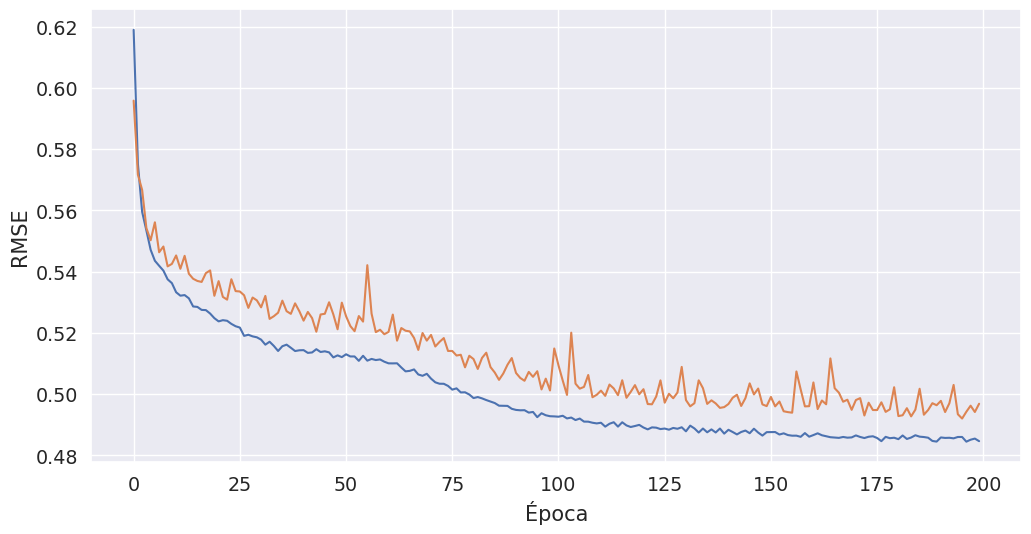

In [44]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")

Vemos que es un poco menos errático el aprendizaje, qué otra cosa podemos hacer para mejorar el entrenamiento como tal:

Hint: Qué cosa se encarga de modificar los pesos una vez calculados los gradientes?

Probamos cambiar el [optmizador](https://keras.io/api/optimizers/) a uno mejor:

mejor==no usar solo el gradiente. Usamos Adam de optmizador

In [45]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(8,)))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

In [46]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=200,
    validation_data=(X_test.values, y_test.values),
)

Train on 12384 samples, validate on 8256 samples
Epoch 1/200
   32/12384 [..............................] - ETA: 26s - loss: 1.1305

 1920/12384 [===>..........................] - ETA: 0s - loss: 1.3407 

 3872/12384 [========>.....................] - ETA: 0s - loss: 1.1582

 5920/12384 [=============>................] - ETA: 0s - loss: 1.0189

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.9112

10016/12384 [=======================>......] - ETA: 0s - loss: 0.8311

12064/12384 [============================>.] - ETA: 0s - loss: 0.7750

12384/12384 [==============================] - 1s 42us/step - loss: 0.7655 - val_loss: 0.4651


Epoch 2/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2919

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.4413

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.4286

 6080/12384 [=============>................] - ETA: 0s - loss: 0.4189

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.4108

10144/12384 [=======================>......] - ETA: 0s - loss: 0.4005

12160/12384 [============================>.] - ETA: 0s - loss: 0.4032

12384/12384 [==============================] - 0s 35us/step - loss: 0.4018 - val_loss: 0.3705


Epoch 3/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4156

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.3732

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.3760

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.3608

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.3574

10208/12384 [=======================>......] - ETA: 0s - loss: 0.3507

12224/12384 [============================>.] - ETA: 0s - loss: 0.3469

12384/12384 [==============================] - 0s 35us/step - loss: 0.3466 - val_loss: 0.3437


Epoch 4/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2351

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.3318

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.3305

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.3361

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.3321

10368/12384 [========================>.....] - ETA: 0s - loss: 0.3275

12384/12384 [==============================] - 0s 35us/step - loss: 0.3281 - val_loss: 0.3326


Epoch 5/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2528

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.3148

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.3282

 6144/12384 [=============>................] - ETA: 0s - loss: 0.3230

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.3262

10272/12384 [=======================>......] - ETA: 0s - loss: 0.3221

12320/12384 [============================>.] - ETA: 0s - loss: 0.3196

12384/12384 [==============================] - 0s 35us/step - loss: 0.3187 - val_loss: 0.3250


Epoch 6/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1609

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.3015

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.3049

 6080/12384 [=============>................] - ETA: 0s - loss: 0.3052

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.3143

10144/12384 [=======================>......] - ETA: 0s - loss: 0.3138

12192/12384 [============================>.] - ETA: 0s - loss: 0.3108

12384/12384 [==============================] - 0s 35us/step - loss: 0.3123 - val_loss: 0.3196


Epoch 7/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2387

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.3034

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.3088

 6112/12384 [=============>................] - ETA: 0s - loss: 0.3074

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.3037

10144/12384 [=======================>......] - ETA: 0s - loss: 0.3049

12096/12384 [============================>.] - ETA: 0s - loss: 0.3068

12384/12384 [==============================] - 0s 36us/step - loss: 0.3070 - val_loss: 0.3154


Epoch 8/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1938

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2984

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.3113

 6016/12384 [=============>................] - ETA: 0s - loss: 0.3111

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.3051

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.3027

11968/12384 [===========================>..] - ETA: 0s - loss: 0.3036

12384/12384 [==============================] - 0s 36us/step - loss: 0.3030 - val_loss: 0.3129


Epoch 9/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2999

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.3064

 3648/12384 [=======>......................] - ETA: 0s - loss: 0.3070

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2994

 7584/12384 [=================>............] - ETA: 0s - loss: 0.3009

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2980

11584/12384 [===========================>..] - ETA: 0s - loss: 0.3017

12384/12384 [==============================] - 0s 38us/step - loss: 0.3000 - val_loss: 0.3109


Epoch 10/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2400

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2880

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2956

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2916

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2982

 9824/12384 [======================>.......] - ETA: 0s - loss: 0.3023

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2971

12384/12384 [==============================] - 0s 36us/step - loss: 0.2972 - val_loss: 0.3075


Epoch 11/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2143

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2868

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2854

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2948

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2885

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2927

11936/12384 [===========================>..] - ETA: 0s - loss: 0.2938

12384/12384 [==============================] - 0s 36us/step - loss: 0.2947 - val_loss: 0.3052


Epoch 12/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2876

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2924

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2979

 5984/12384 [=============>................] - ETA: 0s - loss: 0.3023

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2975

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2915

12000/12384 [============================>.] - ETA: 0s - loss: 0.2924

12384/12384 [==============================] - 0s 35us/step - loss: 0.2926 - val_loss: 0.3038


Epoch 13/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1514

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2815

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2758

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2856

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2846

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2894

12096/12384 [============================>.] - ETA: 0s - loss: 0.2901

12384/12384 [==============================] - 0s 36us/step - loss: 0.2905 - val_loss: 0.3028


Epoch 14/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1906

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2943

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2901

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2906

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2901

10048/12384 [=======================>......] - ETA: 0s - loss: 0.2857

12064/12384 [============================>.] - ETA: 0s - loss: 0.2874

12384/12384 [==============================] - 0s 35us/step - loss: 0.2887 - val_loss: 0.3004


Epoch 15/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3506

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2972

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2903

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2927

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2936

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2877

12160/12384 [============================>.] - ETA: 0s - loss: 0.2872

12384/12384 [==============================] - 0s 35us/step - loss: 0.2874 - val_loss: 0.3000


Epoch 16/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3764

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2937

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2798

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2778

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2842

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2843

12224/12384 [============================>.] - ETA: 0s - loss: 0.2851

12384/12384 [==============================] - 0s 35us/step - loss: 0.2858 - val_loss: 0.2980


Epoch 17/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3644

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.3009

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2919

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2891

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2862

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2834

12096/12384 [============================>.] - ETA: 0s - loss: 0.2838

12384/12384 [==============================] - 0s 35us/step - loss: 0.2839 - val_loss: 0.2974


Epoch 18/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3684

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2904

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.3016

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2922

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2874

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2840

12064/12384 [============================>.] - ETA: 0s - loss: 0.2832

12384/12384 [==============================] - 0s 35us/step - loss: 0.2826 - val_loss: 0.2954


Epoch 19/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1827

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2743

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2703

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2747

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2851

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2864

12096/12384 [============================>.] - ETA: 0s - loss: 0.2827

12384/12384 [==============================] - 0s 35us/step - loss: 0.2814 - val_loss: 0.2951


Epoch 20/200
   32/12384 [..............................] - ETA: 1s - loss: 0.5272

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2849

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2782

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2698

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2798

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2789

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2805

12384/12384 [==============================] - 0s 36us/step - loss: 0.2797 - val_loss: 0.2941


Epoch 21/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3118

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2920

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2917

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2839

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2886

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2851

12128/12384 [============================>.] - ETA: 0s - loss: 0.2785

12384/12384 [==============================] - 0s 35us/step - loss: 0.2786 - val_loss: 0.2936


Epoch 22/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3884

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2885

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2776

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2806

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2827

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2758

12224/12384 [============================>.] - ETA: 0s - loss: 0.2771

12384/12384 [==============================] - 0s 35us/step - loss: 0.2769 - val_loss: 0.2909


Epoch 23/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3859

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2801

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2780

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2683

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2702

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2734

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2782

12384/12384 [==============================] - 0s 37us/step - loss: 0.2761 - val_loss: 0.2907


Epoch 24/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2238

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2637

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2775

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2803

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2820

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2770

12224/12384 [============================>.] - ETA: 0s - loss: 0.2757

12384/12384 [==============================] - 0s 35us/step - loss: 0.2752 - val_loss: 0.2895


Epoch 25/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2100

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2786

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2734

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2746

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2767

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2770

12256/12384 [============================>.] - ETA: 0s - loss: 0.2739

12384/12384 [==============================] - 0s 35us/step - loss: 0.2740 - val_loss: 0.2881


Epoch 26/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2774

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2539

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2511

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2618

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2655

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2687

12256/12384 [============================>.] - ETA: 0s - loss: 0.2718

12384/12384 [==============================] - 0s 35us/step - loss: 0.2727 - val_loss: 0.2876


Epoch 27/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1367

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2811

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2602

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2684

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2709

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2716

12256/12384 [============================>.] - ETA: 0s - loss: 0.2714

12384/12384 [==============================] - 0s 35us/step - loss: 0.2714 - val_loss: 0.2859


Epoch 28/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2746

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2656

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2655

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2626

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2654

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2665

12384/12384 [==============================] - 0s 35us/step - loss: 0.2704 - val_loss: 0.2864


Epoch 29/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2480

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2609

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2605

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2532

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2605



10176/12384 [=======================>......] - ETA: 0s - loss: 0.2656

12192/12384 [============================>.] - ETA: 0s - loss: 0.2696

12384/12384 [==============================] - 0s 35us/step - loss: 0.2698 - val_loss: 0.2841


Epoch 30/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2492

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2666

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2639

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2629

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2655

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2698

12256/12384 [============================>.] - ETA: 0s - loss: 0.2669

12384/12384 [==============================] - 0s 35us/step - loss: 0.2691 - val_loss: 0.2832


Epoch 31/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1874

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2657

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2611

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2668

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2668

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2710

12128/12384 [============================>.] - ETA: 0s - loss: 0.2687

12384/12384 [==============================] - 0s 35us/step - loss: 0.2683 - val_loss: 0.2822


Epoch 32/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1839

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2663

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2659

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2750

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2683

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2717

12320/12384 [============================>.] - ETA: 0s - loss: 0.2679

12384/12384 [==============================] - 0s 35us/step - loss: 0.2678 - val_loss: 0.2821


Epoch 33/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4814

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2833

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2672

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2706

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2641

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2674

12320/12384 [============================>.] - ETA: 0s - loss: 0.2666

12384/12384 [==============================] - 0s 35us/step - loss: 0.2666 - val_loss: 0.2800


Epoch 34/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3322

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2488

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2601

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2538

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2594

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2635

12256/12384 [============================>.] - ETA: 0s - loss: 0.2649

12384/12384 [==============================] - 0s 35us/step - loss: 0.2658 - val_loss: 0.2795


Epoch 35/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2659

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2910

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2789

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2685

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2718

10400/12384 [========================>.....] - ETA: 0s - loss: 0.2683

12384/12384 [==============================] - 0s 34us/step - loss: 0.2648 - val_loss: 0.2805


Epoch 36/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2000

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2787

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2752

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2756

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2690

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2676

12384/12384 [==============================] - 0s 34us/step - loss: 0.2643 - val_loss: 0.2792


Epoch 37/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2724

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2446

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2571

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2617

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2618

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2613

12192/12384 [============================>.] - ETA: 0s - loss: 0.2626

12384/12384 [==============================] - 0s 35us/step - loss: 0.2632 - val_loss: 0.2798


Epoch 38/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1449

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2695

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2601

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2587

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2596

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2597

12320/12384 [============================>.] - ETA: 0s - loss: 0.2625

12384/12384 [==============================] - 0s 35us/step - loss: 0.2626 - val_loss: 0.2767


Epoch 39/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4906

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2634

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2627

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2647

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2628

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2601

12384/12384 [==============================] - 0s 34us/step - loss: 0.2618 - val_loss: 0.2759


Epoch 40/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2489

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2469

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2573

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2579

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2595

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2594

12320/12384 [============================>.] - ETA: 0s - loss: 0.2606

12384/12384 [==============================] - 0s 35us/step - loss: 0.2606 - val_loss: 0.2754


Epoch 41/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1300

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2498

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2473

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2533

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2564

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2574

12384/12384 [==============================] - 0s 34us/step - loss: 0.2605 - val_loss: 0.2745


Epoch 42/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1784

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2438

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2504

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2484

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2560

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2551

12352/12384 [============================>.] - ETA: 0s - loss: 0.2596

12384/12384 [==============================] - 0s 35us/step - loss: 0.2596 - val_loss: 0.2733


Epoch 43/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2860

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2589

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2532

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2539

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2568

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2616

12224/12384 [============================>.] - ETA: 0s - loss: 0.2598

12384/12384 [==============================] - 0s 35us/step - loss: 0.2587 - val_loss: 0.2742


Epoch 44/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2392

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2601

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2507

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2535

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2539



10304/12384 [=======================>......] - ETA: 0s - loss: 0.2596

12288/12384 [============================>.] - ETA: 0s - loss: 0.2582

12384/12384 [==============================] - 0s 35us/step - loss: 0.2575 - val_loss: 0.2735


Epoch 45/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2976

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2630

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2660

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2621

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2644

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2649

12256/12384 [============================>.] - ETA: 0s - loss: 0.2583

12384/12384 [==============================] - 0s 35us/step - loss: 0.2575 - val_loss: 0.2727


Epoch 46/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1498

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2398

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2524

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2536

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2602



10080/12384 [=======================>......] - ETA: 0s - loss: 0.2584

12128/12384 [============================>.] - ETA: 0s - loss: 0.2568

12384/12384 [==============================] - 0s 35us/step - loss: 0.2565 - val_loss: 0.2714


Epoch 47/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2864

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2435

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2369

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2500

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2513

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2549

12288/12384 [============================>.] - ETA: 0s - loss: 0.2570

12384/12384 [==============================] - 0s 36us/step - loss: 0.2566 - val_loss: 0.2731


Epoch 48/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1735

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2524

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2500

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2522

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2546

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2529

12256/12384 [============================>.] - ETA: 0s - loss: 0.2554

12384/12384 [==============================] - 0s 35us/step - loss: 0.2553 - val_loss: 0.2716


Epoch 49/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2582

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2693

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2603

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2579

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2614

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2566

12384/12384 [==============================] - 0s 34us/step - loss: 0.2550 - val_loss: 0.2699


Epoch 50/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2997

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2395

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2497

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2522

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2544

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2551

12256/12384 [============================>.] - ETA: 0s - loss: 0.2538

12384/12384 [==============================] - 0s 35us/step - loss: 0.2545 - val_loss: 0.2683


Epoch 51/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3522

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2557

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2632

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2569

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2572

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2538

12096/12384 [============================>.] - ETA: 0s - loss: 0.2540

12384/12384 [==============================] - 0s 35us/step - loss: 0.2536 - val_loss: 0.2676


Epoch 52/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3475

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2567

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2506

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2521

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2531

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2529

12192/12384 [============================>.] - ETA: 0s - loss: 0.2545

12384/12384 [==============================] - 0s 35us/step - loss: 0.2533 - val_loss: 0.2673


Epoch 53/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2369

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2376

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2408

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2423

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2495

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2506

12384/12384 [==============================] - 0s 34us/step - loss: 0.2526 - val_loss: 0.2674


Epoch 54/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2902

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2336

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2454

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2496

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2526

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2536

12288/12384 [============================>.] - ETA: 0s - loss: 0.2526

12384/12384 [==============================] - 0s 35us/step - loss: 0.2521 - val_loss: 0.2659


Epoch 55/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2410

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2636

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2534

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2493

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2496

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2503

11968/12384 [===========================>..] - ETA: 0s - loss: 0.2508

12384/12384 [==============================] - 0s 35us/step - loss: 0.2514 - val_loss: 0.2656


Epoch 56/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4428

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2435

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2416

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2453

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2537

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2518

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2514

12384/12384 [==============================] - 0s 36us/step - loss: 0.2513 - val_loss: 0.2659


Epoch 57/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1758

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2700

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2635

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2611

 8032/12384 [==================>...........] - ETA: 0s - loss: 0.2551

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2506

12096/12384 [============================>.] - ETA: 0s - loss: 0.2503

12384/12384 [==============================] - 0s 35us/step - loss: 0.2509 - val_loss: 0.2653


Epoch 58/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2374

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2570

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2562

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2474

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2514

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2478

12384/12384 [==============================] - 0s 34us/step - loss: 0.2507 - val_loss: 0.2642


Epoch 59/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1180

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2461

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2490

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2520

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2512

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2483

12320/12384 [============================>.] - ETA: 0s - loss: 0.2501

12384/12384 [==============================] - 0s 35us/step - loss: 0.2500 - val_loss: 0.2633


Epoch 60/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1374

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2671

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2584

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2554

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2536

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2544

12384/12384 [==============================] - 0s 34us/step - loss: 0.2494 - val_loss: 0.2647


Epoch 61/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2124

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2544

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2478

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2443

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2446

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2500

12256/12384 [============================>.] - ETA: 0s - loss: 0.2498

12384/12384 [==============================] - 0s 35us/step - loss: 0.2489 - val_loss: 0.2649


Epoch 62/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4078

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2410

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2460

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2465

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2454

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2469

12384/12384 [==============================] - 0s 34us/step - loss: 0.2485 - val_loss: 0.2624


Epoch 63/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1220

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2306

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2435

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2404

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2469

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2488

12384/12384 [==============================] - 0s 34us/step - loss: 0.2484 - val_loss: 0.2620


Epoch 64/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3715

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2359

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2358

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2478

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2491

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2487

12384/12384 [==============================] - 0s 34us/step - loss: 0.2481 - val_loss: 0.2625


Epoch 65/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3690

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2419

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2444

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2408

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2471

10016/12384 [=======================>......] - ETA: 0s - loss: 0.2433

12096/12384 [============================>.] - ETA: 0s - loss: 0.2480

12384/12384 [==============================] - 0s 35us/step - loss: 0.2472 - val_loss: 0.2630


Epoch 66/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2017

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2575

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2543

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2551

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2476

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2531

12352/12384 [============================>.] - ETA: 0s - loss: 0.2471

12384/12384 [==============================] - 0s 35us/step - loss: 0.2471 - val_loss: 0.2632


Epoch 67/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3174

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2472

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2347

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2351

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2420

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2425

11904/12384 [===========================>..] - ETA: 0s - loss: 0.2481

12384/12384 [==============================] - 0s 36us/step - loss: 0.2470 - val_loss: 0.2609


Epoch 68/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3310

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2492

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2467

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2407

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2447

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2459

12288/12384 [============================>.] - ETA: 0s - loss: 0.2472

12384/12384 [==============================] - 0s 35us/step - loss: 0.2468 - val_loss: 0.2625


Epoch 69/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3014

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2498

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2485

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2388

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2425

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2465

12384/12384 [==============================] - 0s 34us/step - loss: 0.2462 - val_loss: 0.2603


Epoch 70/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1955

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2342

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2427

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2467

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2398

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2417

12288/12384 [============================>.] - ETA: 0s - loss: 0.2459

12384/12384 [==============================] - 0s 35us/step - loss: 0.2457 - val_loss: 0.2625


Epoch 71/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3374

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2301

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2229

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2352

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2394

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2447

12320/12384 [============================>.] - ETA: 0s - loss: 0.2464

12384/12384 [==============================] - 0s 35us/step - loss: 0.2462 - val_loss: 0.2606


Epoch 72/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4494

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2645

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2677

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2560

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2537

10400/12384 [========================>.....] - ETA: 0s - loss: 0.2479

12384/12384 [==============================] - 0s 35us/step - loss: 0.2456 - val_loss: 0.2606


Epoch 73/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2922

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2547

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2454

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2391

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2412

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2378



12160/12384 [============================>.] - ETA: 0s - loss: 0.2445

12384/12384 [==============================] - 0s 35us/step - loss: 0.2450 - val_loss: 0.2609


Epoch 74/200
   32/12384 [..............................] - ETA: 0s - loss: 0.4172

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2415

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2395

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2401

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2480

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2459

12384/12384 [==============================] - 0s 34us/step - loss: 0.2455 - val_loss: 0.2599


Epoch 75/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3027

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2431

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2459

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2437

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2447

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2467

12224/12384 [============================>.] - ETA: 0s - loss: 0.2459

12384/12384 [==============================] - 0s 35us/step - loss: 0.2451 - val_loss: 0.2589


Epoch 76/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3272

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2479

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2532

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2565

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2509

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2456

12256/12384 [============================>.] - ETA: 0s - loss: 0.2443

12384/12384 [==============================] - 0s 35us/step - loss: 0.2450 - val_loss: 0.2603


Epoch 77/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3251

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2496

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2464

 5984/12384 [=============>................] - ETA: 0s - loss: 0.2429

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2403

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2399

11968/12384 [===========================>..] - ETA: 0s - loss: 0.2444

12384/12384 [==============================] - 0s 35us/step - loss: 0.2439 - val_loss: 0.2598


Epoch 78/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3438

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2605

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2443

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2396

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2413

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2428



12256/12384 [============================>.] - ETA: 0s - loss: 0.2429

12384/12384 [==============================] - 0s 35us/step - loss: 0.2441 - val_loss: 0.2594


Epoch 79/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2727

 1728/12384 [===>..........................] - ETA: 0s - loss: 0.2456

 3744/12384 [========>.....................] - ETA: 0s - loss: 0.2455

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2444

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2441



 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2446

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2432

12384/12384 [==============================] - 0s 36us/step - loss: 0.2439 - val_loss: 0.2590


Epoch 80/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4093

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2452

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2473

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2510

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2446

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2425

12224/12384 [============================>.] - ETA: 0s - loss: 0.2440

12384/12384 [==============================] - 0s 35us/step - loss: 0.2438 - val_loss: 0.2584


Epoch 81/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2155

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2569

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2548

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2521

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2455

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2448



12160/12384 [============================>.] - ETA: 0s - loss: 0.2447

12384/12384 [==============================] - 0s 35us/step - loss: 0.2437 - val_loss: 0.2585


Epoch 82/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2502

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2418

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2384

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2439

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2495

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2451

12384/12384 [==============================] - 0s 35us/step - loss: 0.2440 - val_loss: 0.2577


Epoch 83/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2072

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2235

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2342

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2377

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2385

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2415

12128/12384 [============================>.] - ETA: 0s - loss: 0.2438

12384/12384 [==============================] - 0s 36us/step - loss: 0.2432 - val_loss: 0.2584


Epoch 84/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2150

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2538

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2479

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2512

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2501

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2483

12256/12384 [============================>.] - ETA: 0s - loss: 0.2434

12384/12384 [==============================] - 0s 35us/step - loss: 0.2430 - val_loss: 0.2584


Epoch 85/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1210

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2373

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2441

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2375

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2375

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2416

12288/12384 [============================>.] - ETA: 0s - loss: 0.2431

12384/12384 [==============================] - 0s 35us/step - loss: 0.2427 - val_loss: 0.2576


Epoch 86/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2533

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2169

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2290

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2423

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2462

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2464

12160/12384 [============================>.] - ETA: 0s - loss: 0.2425

12384/12384 [==============================] - 0s 36us/step - loss: 0.2427 - val_loss: 0.2578


Epoch 87/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1866

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2408

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2380

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2424

 7968/12384 [==================>...........] - ETA: 0s - loss: 0.2470



 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2451

11968/12384 [===========================>..] - ETA: 0s - loss: 0.2418

12384/12384 [==============================] - 0s 36us/step - loss: 0.2427 - val_loss: 0.2572


Epoch 88/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2314

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2327

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2490

 6048/12384 [=============>................] - ETA: 0s - loss: 0.2458

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2415

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2375

12224/12384 [============================>.] - ETA: 0s - loss: 0.2416

12384/12384 [==============================] - 0s 35us/step - loss: 0.2425 - val_loss: 0.2568


Epoch 89/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2212

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2463

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2417

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2408

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2449

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2384

12032/12384 [============================>.] - ETA: 0s - loss: 0.2413

12384/12384 [==============================] - 0s 36us/step - loss: 0.2420 - val_loss: 0.2574


Epoch 90/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3562

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2357

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2403

 5952/12384 [=============>................] - ETA: 0s - loss: 0.2452

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2433

 9952/12384 [=======================>......] - ETA: 0s - loss: 0.2386

11936/12384 [===========================>..] - ETA: 0s - loss: 0.2420

12384/12384 [==============================] - 0s 36us/step - loss: 0.2420 - val_loss: 0.2574


Epoch 91/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1819

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2465

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2351

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2368

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2412

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2407

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2406

12384/12384 [==============================] - 0s 36us/step - loss: 0.2421 - val_loss: 0.2564


Epoch 92/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2576

 1760/12384 [===>..........................] - ETA: 0s - loss: 0.2231

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2339

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2416

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2449

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2459

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2425

12384/12384 [==============================] - 0s 37us/step - loss: 0.2418 - val_loss: 0.2559


Epoch 93/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2379

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2378

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2344

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2362

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2326

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2374

12160/12384 [============================>.] - ETA: 0s - loss: 0.2410

12384/12384 [==============================] - 0s 35us/step - loss: 0.2413 - val_loss: 0.2570


Epoch 94/200
   32/12384 [..............................] - ETA: 0s - loss: 0.5608

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2714

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2482

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2399

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2360

10080/12384 [=======================>......] - ETA: 0s - loss: 0.2366

12128/12384 [============================>.] - ETA: 0s - loss: 0.2415

12384/12384 [==============================] - 0s 35us/step - loss: 0.2413 - val_loss: 0.2566


Epoch 95/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2027

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2340

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2349

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2361

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2343

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2377

12320/12384 [============================>.] - ETA: 0s - loss: 0.2407

12384/12384 [==============================] - 0s 35us/step - loss: 0.2415 - val_loss: 0.2557


Epoch 96/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3892

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2216

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2432

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2438

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2389

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2399

12320/12384 [============================>.] - ETA: 0s - loss: 0.2408

12384/12384 [==============================] - 0s 35us/step - loss: 0.2409 - val_loss: 0.2558


Epoch 97/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2712

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2287

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2309

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2436

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2434

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2404

12352/12384 [============================>.] - ETA: 0s - loss: 0.2406

12384/12384 [==============================] - 0s 35us/step - loss: 0.2407 - val_loss: 0.2571


Epoch 98/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3863

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2258

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2258

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2364

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2358

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2404

12064/12384 [============================>.] - ETA: 0s - loss: 0.2422

12384/12384 [==============================] - 0s 35us/step - loss: 0.2408 - val_loss: 0.2555


Epoch 99/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2575

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2428

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2504

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2446

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2404

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2399

12384/12384 [==============================] - 0s 34us/step - loss: 0.2406 - val_loss: 0.2551


Epoch 100/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1794

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2654

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2553

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2431

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2442

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2445

12384/12384 [==============================] - 0s 34us/step - loss: 0.2404 - val_loss: 0.2561


Epoch 101/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2519

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2374

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2390

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2413

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2390

10400/12384 [========================>.....] - ETA: 0s - loss: 0.2418

12384/12384 [==============================] - 0s 34us/step - loss: 0.2400 - val_loss: 0.2571


Epoch 102/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1354

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2470

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2464

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2427

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2381

10112/12384 [=======================>......] - ETA: 0s - loss: 0.2385

12160/12384 [============================>.] - ETA: 0s - loss: 0.2405

12384/12384 [==============================] - 0s 35us/step - loss: 0.2401 - val_loss: 0.2557


Epoch 103/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2222

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2249

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2270

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2239

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2324

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2409

11968/12384 [===========================>..] - ETA: 0s - loss: 0.2405

12384/12384 [==============================] - 0s 36us/step - loss: 0.2398 - val_loss: 0.2550


Epoch 104/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2921

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2378

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2422

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2395

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2380

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2409

12256/12384 [============================>.] - ETA: 0s - loss: 0.2392

12384/12384 [==============================] - 0s 35us/step - loss: 0.2399 - val_loss: 0.2543


Epoch 105/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3092

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2300

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2522

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2447

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2413

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2436

12384/12384 [==============================] - 0s 34us/step - loss: 0.2394 - val_loss: 0.2543


Epoch 106/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1464

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2430

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2367

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2375

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2397

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2385

12384/12384 [==============================] - 0s 34us/step - loss: 0.2395 - val_loss: 0.2553


Epoch 107/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2501

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2690

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2400

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2392

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2416

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2409

12192/12384 [============================>.] - ETA: 0s - loss: 0.2392

12384/12384 [==============================] - 0s 35us/step - loss: 0.2393 - val_loss: 0.2544


Epoch 108/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2055

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2317

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2353

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2355

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2382

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2417

12384/12384 [==============================] - 0s 34us/step - loss: 0.2394 - val_loss: 0.2534


Epoch 109/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1558

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2365

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2351

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2392

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2374

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2390

12384/12384 [==============================] - 0s 34us/step - loss: 0.2390 - val_loss: 0.2536


Epoch 110/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1706

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2316

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2356

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2418

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2398

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2386

12352/12384 [============================>.] - ETA: 0s - loss: 0.2392

12384/12384 [==============================] - 0s 34us/step - loss: 0.2393 - val_loss: 0.2541


Epoch 111/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1674

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2367

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2386

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2384

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2389

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2394

12384/12384 [==============================] - 0s 34us/step - loss: 0.2387 - val_loss: 0.2529


Epoch 112/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3021

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2213

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2408

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2394

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2366

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2372

12320/12384 [============================>.] - ETA: 0s - loss: 0.2392

12384/12384 [==============================] - 0s 35us/step - loss: 0.2385 - val_loss: 0.2531


Epoch 113/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2259

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2301

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2454

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2454

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2435



10080/12384 [=======================>......] - ETA: 0s - loss: 0.2385

12032/12384 [============================>.] - ETA: 0s - loss: 0.2397

12384/12384 [==============================] - 0s 35us/step - loss: 0.2384 - val_loss: 0.2533


Epoch 114/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1739

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2554

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2442

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2469

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2431

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2424

12384/12384 [==============================] - 0s 34us/step - loss: 0.2385 - val_loss: 0.2536


Epoch 115/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2727

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2490

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2373

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2409

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2389

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2377

12160/12384 [============================>.] - ETA: 0s - loss: 0.2386

12384/12384 [==============================] - 0s 35us/step - loss: 0.2383 - val_loss: 0.2540


Epoch 116/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2032

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2076

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2344

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2357

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2360

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2414

12384/12384 [==============================] - 0s 34us/step - loss: 0.2375 - val_loss: 0.2547


Epoch 117/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1906

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2486

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2424

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2404

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2394

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2369

12320/12384 [============================>.] - ETA: 0s - loss: 0.2384

12384/12384 [==============================] - 0s 35us/step - loss: 0.2380 - val_loss: 0.2516


Epoch 118/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1393

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2500

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2435

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2419

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2379

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2402

12256/12384 [============================>.] - ETA: 0s - loss: 0.2386

12384/12384 [==============================] - 0s 35us/step - loss: 0.2381 - val_loss: 0.2522


Epoch 119/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4475

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2587

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2430

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2406

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2393

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2390

12384/12384 [==============================] - 0s 34us/step - loss: 0.2376 - val_loss: 0.2513


Epoch 120/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2622

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2377

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2363

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2420

 8224/12384 [==================>...........] - ETA: 0s - loss: 0.2402

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2362

12352/12384 [============================>.] - ETA: 0s - loss: 0.2375

12384/12384 [==============================] - 0s 35us/step - loss: 0.2373 - val_loss: 0.2512


Epoch 121/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1828

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2580

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2416

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2336

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2339

 9984/12384 [=======================>......] - ETA: 0s - loss: 0.2361

12032/12384 [============================>.] - ETA: 0s - loss: 0.2380

12384/12384 [==============================] - 0s 35us/step - loss: 0.2372 - val_loss: 0.2512


Epoch 122/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1969

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2397

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2361

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2371

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2399

10272/12384 [=======================>......] - ETA: 0s - loss: 0.2389

12352/12384 [============================>.] - ETA: 0s - loss: 0.2376

12384/12384 [==============================] - 0s 34us/step - loss: 0.2374 - val_loss: 0.2514


Epoch 123/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1853

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2226

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2312

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2330

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2338

10400/12384 [========================>.....] - ETA: 0s - loss: 0.2342

12384/12384 [==============================] - 0s 34us/step - loss: 0.2370 - val_loss: 0.2514


Epoch 124/200
   32/12384 [..............................] - ETA: 1s - loss: 0.0709

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2395

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2361

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2383

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2397

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2381

12384/12384 [==============================] - 0s 34us/step - loss: 0.2371 - val_loss: 0.2521


Epoch 125/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1285

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2428

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2416

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2381

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2386

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2366

12384/12384 [==============================] - 0s 34us/step - loss: 0.2368 - val_loss: 0.2509


Epoch 126/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2967

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2384

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2453

 6176/12384 [=============>................] - ETA: 0s - loss: 0.2444

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2397

10240/12384 [=======================>......] - ETA: 0s - loss: 0.2389

12320/12384 [============================>.] - ETA: 0s - loss: 0.2365

12384/12384 [==============================] - 0s 35us/step - loss: 0.2367 - val_loss: 0.2523


Epoch 127/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1158

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2395

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2432

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2419

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2390

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2386

12384/12384 [==============================] - 0s 34us/step - loss: 0.2365 - val_loss: 0.2516


Epoch 128/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1635

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2561

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2408

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2368

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2380

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2359

12384/12384 [==============================] - 0s 34us/step - loss: 0.2360 - val_loss: 0.2509


Epoch 129/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1721

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2190

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2277

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2294

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2284

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2307

12384/12384 [==============================] - 0s 34us/step - loss: 0.2365 - val_loss: 0.2513


Epoch 130/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4389

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2423

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2364

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2359

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2347

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2345

12384/12384 [==============================] - 0s 34us/step - loss: 0.2359 - val_loss: 0.2499


Epoch 131/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2042

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2252

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2313

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2349

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2342

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2382

12384/12384 [==============================] - 0s 34us/step - loss: 0.2360 - val_loss: 0.2493


Epoch 132/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4845

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2540

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2442

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2422

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2354

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2367

12384/12384 [==============================] - 0s 34us/step - loss: 0.2355 - val_loss: 0.2502


Epoch 133/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2108

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2342

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2505

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2462

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2386

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2352

12384/12384 [==============================] - 0s 34us/step - loss: 0.2355 - val_loss: 0.2495


Epoch 134/200
   32/12384 [..............................] - ETA: 1s - loss: 0.0896

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2072

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2249

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2272

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2286

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2341

12384/12384 [==============================] - 0s 34us/step - loss: 0.2356 - val_loss: 0.2503


Epoch 135/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1375

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2354

 4064/12384 [========>.....................] - ETA: 0s - loss: 0.2306

 6016/12384 [=============>................] - ETA: 0s - loss: 0.2277

 8128/12384 [==================>...........] - ETA: 0s - loss: 0.2309

10144/12384 [=======================>......] - ETA: 0s - loss: 0.2344

12192/12384 [============================>.] - ETA: 0s - loss: 0.2363

12384/12384 [==============================] - 0s 35us/step - loss: 0.2356 - val_loss: 0.2493


Epoch 136/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3427

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2300

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2406

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2368

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2371

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2363

12384/12384 [==============================] - 0s 34us/step - loss: 0.2351 - val_loss: 0.2492


Epoch 137/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2637

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2123

 4128/12384 [=========>....................] - ETA: 0s - loss: 0.2238

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2351

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2338

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2311

12384/12384 [==============================] - 0s 34us/step - loss: 0.2353 - val_loss: 0.2504


Epoch 138/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3905

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2455

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2377

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2382

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2374

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2377

12384/12384 [==============================] - 0s 34us/step - loss: 0.2351 - val_loss: 0.2502


Epoch 139/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2076

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2348

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2329

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2344

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2329

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2338

12384/12384 [==============================] - 0s 34us/step - loss: 0.2353 - val_loss: 0.2493


Epoch 140/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3153

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2427

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2418

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2378

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2443

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2372

12384/12384 [==============================] - 0s 34us/step - loss: 0.2350 - val_loss: 0.2500


Epoch 141/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2375

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2276

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2278

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2321

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2350

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2376

12384/12384 [==============================] - 0s 34us/step - loss: 0.2349 - val_loss: 0.2500


Epoch 142/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1610

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2281

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2356

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2382

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2350

10400/12384 [========================>.....] - ETA: 0s - loss: 0.2358

12384/12384 [==============================] - 0s 34us/step - loss: 0.2348 - val_loss: 0.2495


Epoch 143/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3777

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2404

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2336

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2374

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2349

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2341

12384/12384 [==============================] - 0s 34us/step - loss: 0.2344 - val_loss: 0.2512


Epoch 144/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2375

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2537

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2333

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2412

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2396

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2354

12384/12384 [==============================] - 0s 34us/step - loss: 0.2348 - val_loss: 0.2495


Epoch 145/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2074

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2328

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2293

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2357

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2322

10368/12384 [========================>.....] - ETA: 0s - loss: 0.2312

12384/12384 [==============================] - 0s 34us/step - loss: 0.2348 - val_loss: 0.2502


Epoch 146/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3045

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2406

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2413

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2355

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2344

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2326

12352/12384 [============================>.] - ETA: 0s - loss: 0.2345

12384/12384 [==============================] - 0s 34us/step - loss: 0.2345 - val_loss: 0.2491


Epoch 147/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1233

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2292

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2293

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2323

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2318

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2328

12384/12384 [==============================] - 0s 34us/step - loss: 0.2343 - val_loss: 0.2490


Epoch 148/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1313

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2365

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2330

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2388

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2371

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2347

12256/12384 [============================>.] - ETA: 0s - loss: 0.2350

12384/12384 [==============================] - 0s 35us/step - loss: 0.2344 - val_loss: 0.2482


Epoch 149/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2774

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2186

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2267

 5984/12384 [=============>................] - ETA: 0s - loss: 0.2353

 8000/12384 [==================>...........] - ETA: 0s - loss: 0.2312

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2360

11936/12384 [===========================>..] - ETA: 0s - loss: 0.2346

12384/12384 [==============================] - 0s 35us/step - loss: 0.2342 - val_loss: 0.2499


Epoch 150/200
   32/12384 [..............................] - ETA: 1s - loss: 0.0905

 2048/12384 [===>..........................] - ETA: 0s - loss: 0.2595

 4096/12384 [========>.....................] - ETA: 0s - loss: 0.2534

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2372

 8096/12384 [==================>...........] - ETA: 0s - loss: 0.2359

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2347

12032/12384 [============================>.] - ETA: 0s - loss: 0.2343

12384/12384 [==============================] - 0s 35us/step - loss: 0.2344 - val_loss: 0.2486


Epoch 151/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1503

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2216

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2246

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2246

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2264

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2291

12384/12384 [==============================] - 0s 34us/step - loss: 0.2338 - val_loss: 0.2486


Epoch 152/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2468

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2577

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2450

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2437

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2359



10400/12384 [========================>.....] - ETA: 0s - loss: 0.2351

12384/12384 [==============================] - 0s 34us/step - loss: 0.2340 - val_loss: 0.2480


Epoch 153/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3626

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2272

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2254

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2349

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2322

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2340

12384/12384 [==============================] - 0s 34us/step - loss: 0.2333 - val_loss: 0.2481


Epoch 154/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0716

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2253

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2280

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2337

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2309

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2328

12384/12384 [==============================] - 0s 33us/step - loss: 0.2334 - val_loss: 0.2485


Epoch 155/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1545

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2247

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2366

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2364

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2360

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2318

12384/12384 [==============================] - 0s 34us/step - loss: 0.2339 - val_loss: 0.2488


Epoch 156/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2861

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2408

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2348

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2292

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2347

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2348

12384/12384 [==============================] - 0s 33us/step - loss: 0.2335 - val_loss: 0.2487


Epoch 157/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1952

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2279

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2345

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2271

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2333

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2321

12384/12384 [==============================] - 0s 34us/step - loss: 0.2334 - val_loss: 0.2474


Epoch 158/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1412

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2118

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2315

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2379

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2329

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2327

12384/12384 [==============================] - 0s 34us/step - loss: 0.2334 - val_loss: 0.2480


Epoch 159/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1145

 2240/12384 [====>.........................] - ETA: 0s - loss: 0.2209

 4416/12384 [=========>....................] - ETA: 0s - loss: 0.2374

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2337

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2344



10656/12384 [========================>.....] - ETA: 0s - loss: 0.2316

12384/12384 [==============================] - 0s 33us/step - loss: 0.2335 - val_loss: 0.2481


Epoch 160/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2382

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2582

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2422

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2397

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2349

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2341

12384/12384 [==============================] - 0s 33us/step - loss: 0.2333 - val_loss: 0.2492


Epoch 161/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2673

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2271

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2337

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2346

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2379

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2353

12384/12384 [==============================] - 0s 33us/step - loss: 0.2328 - val_loss: 0.2500


Epoch 162/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2577

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2285

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2348

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2326

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2346

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2335

12384/12384 [==============================] - 0s 34us/step - loss: 0.2333 - val_loss: 0.2471


Epoch 163/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3799

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2223

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2256

 6112/12384 [=============>................] - ETA: 0s - loss: 0.2329

 8160/12384 [==================>...........] - ETA: 0s - loss: 0.2292

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2323

12384/12384 [==============================] - 0s 35us/step - loss: 0.2329 - val_loss: 0.2472


Epoch 164/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3239

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2296

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2316

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2320

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2299

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2299

12384/12384 [==============================] - 0s 34us/step - loss: 0.2331 - val_loss: 0.2485


Epoch 165/200
   32/12384 [..............................] - ETA: 0s - loss: 0.6313

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2542

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2336

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2329

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2334

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2319

12384/12384 [==============================] - 0s 34us/step - loss: 0.2327 - val_loss: 0.2473


Epoch 166/200
   32/12384 [..............................] - ETA: 1s - loss: 0.0770

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2146

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2222

 6400/12384 [==============>...............] - ETA: 0s - loss: 0.2238

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2225

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2314

12384/12384 [==============================] - 0s 33us/step - loss: 0.2324 - val_loss: 0.2494


Epoch 167/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3263

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2371

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2406

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2380

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2348

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2324

12384/12384 [==============================] - 0s 34us/step - loss: 0.2324 - val_loss: 0.2478


Epoch 168/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1066

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2474

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2343

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2412

 8288/12384 [===================>..........] - ETA: 0s - loss: 0.2420

10304/12384 [=======================>......] - ETA: 0s - loss: 0.2348

12352/12384 [============================>.] - ETA: 0s - loss: 0.2331

12384/12384 [==============================] - 0s 35us/step - loss: 0.2328 - val_loss: 0.2469


Epoch 169/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2426

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2405

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2374

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2322

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2323



10528/12384 [========================>.....] - ETA: 0s - loss: 0.2340

12384/12384 [==============================] - 0s 34us/step - loss: 0.2325 - val_loss: 0.2465


Epoch 170/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3460

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2406

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2379

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2327

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2378

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2320

12384/12384 [==============================] - 0s 34us/step - loss: 0.2323 - val_loss: 0.2466


Epoch 171/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2036

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2294

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2312

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2330

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2325

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2322

12384/12384 [==============================] - 0s 34us/step - loss: 0.2323 - val_loss: 0.2470


Epoch 172/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0809

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2190

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2361

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2324

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2336

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2334

12384/12384 [==============================] - 0s 34us/step - loss: 0.2322 - val_loss: 0.2475


Epoch 173/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1725

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2408

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2408

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2396

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2311

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2303

12384/12384 [==============================] - 0s 34us/step - loss: 0.2321 - val_loss: 0.2469


Epoch 174/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2289

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2396

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2391

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2367

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2348

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2325

12384/12384 [==============================] - 0s 34us/step - loss: 0.2319 - val_loss: 0.2475


Epoch 175/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1621

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2292

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2153

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2217

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2258

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2305

12384/12384 [==============================] - 0s 34us/step - loss: 0.2322 - val_loss: 0.2477


Epoch 176/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1991

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2157

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2185

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2243

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2276

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2336

12384/12384 [==============================] - 0s 33us/step - loss: 0.2319 - val_loss: 0.2472


Epoch 177/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2445

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2299

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2378

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2321

 8640/12384 [===================>..........] - ETA: 0s - loss: 0.2325

10816/12384 [=========================>....] - ETA: 0s - loss: 0.2322

12384/12384 [==============================] - 0s 33us/step - loss: 0.2325 - val_loss: 0.2483


Epoch 178/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1281

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2131

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2276

 6208/12384 [==============>...............] - ETA: 0s - loss: 0.2314

 8320/12384 [===================>..........] - ETA: 0s - loss: 0.2309

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2320

12384/12384 [==============================] - 0s 34us/step - loss: 0.2315 - val_loss: 0.2471


Epoch 179/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1398

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2392

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2356

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2353

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2339

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2316

12384/12384 [==============================] - 0s 33us/step - loss: 0.2318 - val_loss: 0.2462


Epoch 180/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1882

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2186

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2304

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2367

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2362

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2350

12384/12384 [==============================] - 0s 34us/step - loss: 0.2318 - val_loss: 0.2467


Epoch 181/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1689

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2115

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2203

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2248

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2282

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2298

12384/12384 [==============================] - 0s 34us/step - loss: 0.2318 - val_loss: 0.2471


Epoch 182/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1885

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2333

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2361

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2377

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2353

10464/12384 [========================>.....] - ETA: 0s - loss: 0.2359

12384/12384 [==============================] - 0s 34us/step - loss: 0.2316 - val_loss: 0.2467


Epoch 183/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3027

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2362

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2354

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2338

 8544/12384 [===================>..........] - ETA: 0s - loss: 0.2285

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2292

12384/12384 [==============================] - 0s 34us/step - loss: 0.2316 - val_loss: 0.2458


Epoch 184/200
   32/12384 [..............................] - ETA: 0s - loss: 0.0942

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2325

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2388

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2348

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2364

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2364

12384/12384 [==============================] - 0s 34us/step - loss: 0.2319 - val_loss: 0.2466


Epoch 185/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1434

 2208/12384 [====>.........................] - ETA: 0s - loss: 0.2446

 4384/12384 [=========>....................] - ETA: 0s - loss: 0.2305

 6496/12384 [==============>...............] - ETA: 0s - loss: 0.2269

 8608/12384 [===================>..........] - ETA: 0s - loss: 0.2335

10688/12384 [========================>.....] - ETA: 0s - loss: 0.2293

12384/12384 [==============================] - 0s 33us/step - loss: 0.2319 - val_loss: 0.2468


Epoch 186/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3927

 2080/12384 [====>.........................] - ETA: 0s - loss: 0.2302

 4160/12384 [=========>....................] - ETA: 0s - loss: 0.2264

 6240/12384 [==============>...............] - ETA: 0s - loss: 0.2277

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2298

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2298

12384/12384 [==============================] - 0s 34us/step - loss: 0.2319 - val_loss: 0.2463


Epoch 187/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2364

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2431

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2444

 6272/12384 [==============>...............] - ETA: 0s - loss: 0.2372

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2359

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2285

12384/12384 [==============================] - 0s 34us/step - loss: 0.2311 - val_loss: 0.2480


Epoch 188/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3459

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2269

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2249

 6304/12384 [==============>...............] - ETA: 0s - loss: 0.2292

 8064/12384 [==================>...........] - ETA: 0s - loss: 0.2362

10176/12384 [=======================>......] - ETA: 0s - loss: 0.2341

12256/12384 [============================>.] - ETA: 0s - loss: 0.2308

12384/12384 [==============================] - 0s 35us/step - loss: 0.2314 - val_loss: 0.2499


Epoch 189/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1597

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2264

 4032/12384 [========>.....................] - ETA: 0s - loss: 0.2342

 6144/12384 [=============>................] - ETA: 0s - loss: 0.2317

 8256/12384 [===================>..........] - ETA: 0s - loss: 0.2355

10432/12384 [========================>.....] - ETA: 0s - loss: 0.2338

12384/12384 [==============================] - 0s 34us/step - loss: 0.2318 - val_loss: 0.2459


Epoch 190/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1880

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2250

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2277

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2297

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2330

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2335

12384/12384 [==============================] - 0s 33us/step - loss: 0.2311 - val_loss: 0.2463


Epoch 191/200
   32/12384 [..............................] - ETA: 1s - loss: 0.2297

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2240

 4288/12384 [=========>....................] - ETA: 0s - loss: 0.2214

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2265

 8512/12384 [===================>..........] - ETA: 0s - loss: 0.2295

10624/12384 [========================>.....] - ETA: 0s - loss: 0.2322

12384/12384 [==============================] - 0s 33us/step - loss: 0.2315 - val_loss: 0.2464


Epoch 192/200
   32/12384 [..............................] - ETA: 0s - loss: 0.3915

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2339

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2279

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2267

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2326

10528/12384 [========================>.....] - ETA: 0s - loss: 0.2297

12384/12384 [==============================] - 0s 34us/step - loss: 0.2311 - val_loss: 0.2457


Epoch 193/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2676

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2295

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2336

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2318

 8448/12384 [===================>..........] - ETA: 0s - loss: 0.2324

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2318

12384/12384 [==============================] - 0s 34us/step - loss: 0.2313 - val_loss: 0.2468


Epoch 194/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2856

 2112/12384 [====>.........................] - ETA: 0s - loss: 0.2117

 4192/12384 [=========>....................] - ETA: 0s - loss: 0.2159

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2267

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2299

10496/12384 [========================>.....] - ETA: 0s - loss: 0.2305

12384/12384 [==============================] - 0s 34us/step - loss: 0.2309 - val_loss: 0.2457


Epoch 195/200
   32/12384 [..............................] - ETA: 0s - loss: 0.1650

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2225

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2285

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2314

 8416/12384 [===================>..........] - ETA: 0s - loss: 0.2340

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2310

12384/12384 [==============================] - 0s 34us/step - loss: 0.2311 - val_loss: 0.2451


Epoch 196/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1070

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2244

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2171

 6368/12384 [==============>...............] - ETA: 0s - loss: 0.2272

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2298

10592/12384 [========================>.....] - ETA: 0s - loss: 0.2285

12384/12384 [==============================] - 0s 34us/step - loss: 0.2313 - val_loss: 0.2452


Epoch 197/200
   32/12384 [..............................] - ETA: 1s - loss: 0.3044

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2346

 4224/12384 [=========>....................] - ETA: 0s - loss: 0.2250

 6336/12384 [==============>...............] - ETA: 0s - loss: 0.2266

 8384/12384 [===================>..........] - ETA: 0s - loss: 0.2235

10400/12384 [========================>.....] - ETA: 0s - loss: 0.2280

12384/12384 [==============================] - 0s 34us/step - loss: 0.2311 - val_loss: 0.2466


Epoch 198/200
   32/12384 [..............................] - ETA: 1s - loss: 0.1327

 2144/12384 [====>.........................] - ETA: 0s - loss: 0.2302

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2446

 6432/12384 [==============>...............] - ETA: 0s - loss: 0.2443

 8480/12384 [===================>..........] - ETA: 0s - loss: 0.2350

10560/12384 [========================>.....] - ETA: 0s - loss: 0.2317

12384/12384 [==============================] - 0s 34us/step - loss: 0.2309 - val_loss: 0.2452


Epoch 199/200
   32/12384 [..............................] - ETA: 1s - loss: 0.4318

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2313

 4256/12384 [=========>....................] - ETA: 0s - loss: 0.2271

 6080/12384 [=============>................] - ETA: 0s - loss: 0.2261

 8192/12384 [==================>...........] - ETA: 0s - loss: 0.2293

10336/12384 [========================>.....] - ETA: 0s - loss: 0.2287

12384/12384 [==============================] - 0s 34us/step - loss: 0.2311 - val_loss: 0.2474


Epoch 200/200
   32/12384 [..............................] - ETA: 0s - loss: 0.2630

 2176/12384 [====>.........................] - ETA: 0s - loss: 0.2473

 4320/12384 [=========>....................] - ETA: 0s - loss: 0.2378

 6464/12384 [==============>...............] - ETA: 0s - loss: 0.2400

 8576/12384 [===================>..........] - ETA: 0s - loss: 0.2345

10720/12384 [========================>.....] - ETA: 0s - loss: 0.2342

12384/12384 [==============================] - 0s 33us/step - loss: 0.2313 - val_loss: 0.2455


No handles with labels found to put in legend.


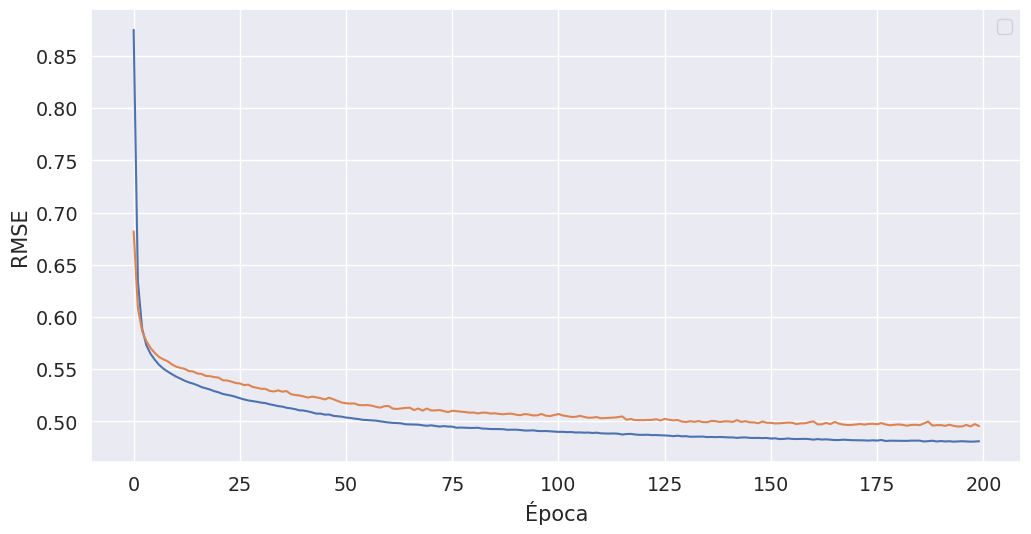

In [47]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Vemos que el aprendizaje es mucho menos errático.

Ahora intentemos complejizar el modelo agregando una capa más

In [48]:
model = Sequential()
model.add(Dense(10, activation='tanh', input_shape=(8,)))
model.add(Dense(10, activation='tanh'))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

history = model.fit(
    X_train.values,
    y_train.values,
    epochs=100,
    validation_data=(X_test.values, y_test.values),
)

Train on 12384 samples, validate on 8256 samples
Epoch 1/100
   32/12384 [..............................] - ETA: 31s - loss: 1.5053

 1792/12384 [===>..........................] - ETA: 0s - loss: 1.0872 

 3616/12384 [=======>......................] - ETA: 0s - loss: 0.9399

 5472/12384 [============>.................] - ETA: 0s - loss: 0.8312

 7360/12384 [================>.............] - ETA: 0s - loss: 0.7548

 9184/12384 [=====================>........] - ETA: 0s - loss: 0.7008

11136/12384 [=========================>....] - ETA: 0s - loss: 0.6498

12384/12384 [==============================] - 1s 46us/step - loss: 0.6224 - val_loss: 0.4015


Epoch 2/100
   32/12384 [..............................] - ETA: 1s - loss: 0.5118

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.4056

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.3826

 5824/12384 [=============>................] - ETA: 0s - loss: 0.3633

 7712/12384 [=================>............] - ETA: 0s - loss: 0.3577

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.3542

11456/12384 [==========================>...] - ETA: 0s - loss: 0.3532

12384/12384 [==============================] - 0s 38us/step - loss: 0.3512 - val_loss: 0.3383


Epoch 3/100
   32/12384 [..............................] - ETA: 0s - loss: 0.5978

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.3132

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.3400

 5888/12384 [=============>................] - ETA: 0s - loss: 0.3330

 7776/12384 [=================>............] - ETA: 0s - loss: 0.3288

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.3263

11680/12384 [===========================>..] - ETA: 0s - loss: 0.3196

12384/12384 [==============================] - 0s 37us/step - loss: 0.3215 - val_loss: 0.3199


Epoch 4/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1915

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.3004

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.3031

 5824/12384 [=============>................] - ETA: 0s - loss: 0.3087

 7808/12384 [=================>............] - ETA: 0s - loss: 0.3109

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.3111

11616/12384 [===========================>..] - ETA: 0s - loss: 0.3067

12384/12384 [==============================] - 0s 38us/step - loss: 0.3074 - val_loss: 0.3077


Epoch 5/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2069

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2988

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.3104

 5792/12384 [=============>................] - ETA: 0s - loss: 0.3001

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2998

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2958

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2983

12384/12384 [==============================] - 0s 39us/step - loss: 0.2963 - val_loss: 0.3037


Epoch 6/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2917

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.3056

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.3106

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2938

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2894

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2904

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2873

12384/12384 [==============================] - 0s 39us/step - loss: 0.2869 - val_loss: 0.2932


Epoch 7/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1850

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.2792

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2863

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2883

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2896

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2872

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2813

12384/12384 [==============================] - 0s 38us/step - loss: 0.2799 - val_loss: 0.2890


Epoch 8/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2975

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2461

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2624

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2639

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2700

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2741

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2735

12384/12384 [==============================] - 0s 38us/step - loss: 0.2745 - val_loss: 0.2847


Epoch 9/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1400

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2731

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2590

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2574

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2593

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2612

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2664

12384/12384 [==============================] - 0s 39us/step - loss: 0.2687 - val_loss: 0.2812


Epoch 10/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1909

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2561

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2717

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2626

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2663

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2620

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2640

12384/12384 [==============================] - 0s 38us/step - loss: 0.2655 - val_loss: 0.2783


Epoch 11/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3721

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2626

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2694

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2698

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2716

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2664

11456/12384 [==========================>...] - ETA: 0s - loss: 0.2633

12384/12384 [==============================] - 0s 38us/step - loss: 0.2629 - val_loss: 0.2755


Epoch 12/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2492

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2446

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2630

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2572

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2561

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2659

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2608

12384/12384 [==============================] - 0s 38us/step - loss: 0.2602 - val_loss: 0.2726


Epoch 13/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1121

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2608

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2521

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2530

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2577

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2555

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2585

12384/12384 [==============================] - 0s 38us/step - loss: 0.2587 - val_loss: 0.2721


Epoch 14/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2005

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2744

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2672

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2597

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2644

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2614

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2585

12384/12384 [==============================] - 0s 38us/step - loss: 0.2569 - val_loss: 0.2741


Epoch 15/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2665

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2581

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2538

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2589

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2576

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2559

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2576

12384/12384 [==============================] - 0s 38us/step - loss: 0.2567 - val_loss: 0.2701


Epoch 16/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2121

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2697

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2640

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2608

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2588

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2586

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2541

12384/12384 [==============================] - 0s 40us/step - loss: 0.2549 - val_loss: 0.2687


Epoch 17/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2375

 1568/12384 [==>...........................] - ETA: 0s - loss: 0.2722

 3456/12384 [=======>......................] - ETA: 0s - loss: 0.2665

 5152/12384 [===========>..................] - ETA: 0s - loss: 0.2604

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2597

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2555

10656/12384 [========================>.....] - ETA: 0s - loss: 0.2557

12384/12384 [==============================] - 1s 41us/step - loss: 0.2538 - val_loss: 0.2683


Epoch 18/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3588

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2564

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2553

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2542

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2548

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2556

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2543

12384/12384 [==============================] - 0s 38us/step - loss: 0.2529 - val_loss: 0.2683


Epoch 19/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3649

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2755

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2627

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2629

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2556

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2573

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2504

12384/12384 [==============================] - 0s 38us/step - loss: 0.2521 - val_loss: 0.2697


Epoch 20/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1457

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2503

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2402

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2520

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2537

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2550



11360/12384 [==========================>...] - ETA: 0s - loss: 0.2553

12384/12384 [==============================] - 0s 38us/step - loss: 0.2523 - val_loss: 0.2668


Epoch 21/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1997

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2459

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2483

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2498

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2526

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2545

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2535

12384/12384 [==============================] - 0s 37us/step - loss: 0.2508 - val_loss: 0.2685


Epoch 22/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2429

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2469

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2396

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2517

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2499

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2499

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2500

12384/12384 [==============================] - 0s 38us/step - loss: 0.2504 - val_loss: 0.2670


Epoch 23/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3014

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2440

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2395

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2413

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2478

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2511

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2540

12384/12384 [==============================] - 0s 38us/step - loss: 0.2504 - val_loss: 0.2666


Epoch 24/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1749

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2496

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2468

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2472

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2496

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2485

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2503

12384/12384 [==============================] - 0s 38us/step - loss: 0.2496 - val_loss: 0.2651


Epoch 25/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2183

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2402

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2372

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2479

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2468

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2529

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2507

12384/12384 [==============================] - 0s 38us/step - loss: 0.2488 - val_loss: 0.2657


Epoch 26/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2014

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2436

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2506

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2509

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2509

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2489

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2480

12384/12384 [==============================] - 0s 38us/step - loss: 0.2484 - val_loss: 0.2640


Epoch 27/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3895

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2444

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2390

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2345

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2456

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2476

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2493

12384/12384 [==============================] - 0s 39us/step - loss: 0.2480 - val_loss: 0.2642


Epoch 28/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2615

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2387

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2464

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2457

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2457

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2480

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2483

12384/12384 [==============================] - 0s 38us/step - loss: 0.2486 - val_loss: 0.2631


Epoch 29/100
   32/12384 [..............................] - ETA: 1s - loss: 0.3770

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2499

 3520/12384 [=======>......................] - ETA: 0s - loss: 0.2365

 4832/12384 [==========>...................] - ETA: 0s - loss: 0.2395

 6560/12384 [==============>...............] - ETA: 0s - loss: 0.2409

 8352/12384 [===================>..........] - ETA: 0s - loss: 0.2419

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2461

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2463

12384/12384 [==============================] - 1s 42us/step - loss: 0.2472 - val_loss: 0.2652


Epoch 30/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2721

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2565

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2543

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2489

 7456/12384 [=================>............] - ETA: 0s - loss: 0.2451

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2474

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2464

12384/12384 [==============================] - 0s 39us/step - loss: 0.2473 - val_loss: 0.2631


Epoch 31/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2231

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2452

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2411

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2453

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2523

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2503

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2449

12384/12384 [==============================] - 0s 38us/step - loss: 0.2467 - val_loss: 0.2630


Epoch 32/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1615

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2663

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2597

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2452

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2550

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2474

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2463

12384/12384 [==============================] - 0s 38us/step - loss: 0.2463 - val_loss: 0.2630


Epoch 33/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4295

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2775

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2688

 5952/12384 [=============>................] - ETA: 0s - loss: 0.2563

 7872/12384 [==================>...........] - ETA: 0s - loss: 0.2536

 9792/12384 [======================>.......] - ETA: 0s - loss: 0.2490

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2460

12384/12384 [==============================] - 0s 38us/step - loss: 0.2463 - val_loss: 0.2615


Epoch 34/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3105

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2242

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2514

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2459

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2478

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2489

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2470

12384/12384 [==============================] - 0s 38us/step - loss: 0.2459 - val_loss: 0.2625


Epoch 35/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0850

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2531

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2555

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2494

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2446

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2421

11808/12384 [===========================>..] - ETA: 0s - loss: 0.2455

12384/12384 [==============================] - 0s 38us/step - loss: 0.2458 - val_loss: 0.2613


Epoch 36/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2738

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2245

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2327

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2376

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2383

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2390

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2438

12384/12384 [==============================] - 0s 38us/step - loss: 0.2454 - val_loss: 0.2612


Epoch 37/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3502

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2407

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2517

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2478

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2478

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2458

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2439

12384/12384 [==============================] - 0s 38us/step - loss: 0.2445 - val_loss: 0.2595


Epoch 38/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1275

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2394

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2345

 5952/12384 [=============>................] - ETA: 0s - loss: 0.2364

 7904/12384 [==================>...........] - ETA: 0s - loss: 0.2388

 9856/12384 [======================>.......] - ETA: 0s - loss: 0.2416

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2427

12384/12384 [==============================] - 0s 38us/step - loss: 0.2442 - val_loss: 0.2606


Epoch 39/100
   32/12384 [..............................] - ETA: 1s - loss: 0.4143

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2455

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2516

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2515

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2489

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2468

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2447

12384/12384 [==============================] - 0s 38us/step - loss: 0.2442 - val_loss: 0.2602


Epoch 40/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2473

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2554

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2442

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2479

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2479

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2509

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2446

12384/12384 [==============================] - 0s 38us/step - loss: 0.2436 - val_loss: 0.2609


Epoch 41/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1380

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2404

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2367

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2344

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2391

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2384

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2420

12384/12384 [==============================] - 0s 38us/step - loss: 0.2435 - val_loss: 0.2609


Epoch 42/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3418

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2320

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2406

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2427

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2461

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2401

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2445

12384/12384 [==============================] - 0s 38us/step - loss: 0.2432 - val_loss: 0.2591


Epoch 43/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4922

 1536/12384 [==>...........................] - ETA: 0s - loss: 0.2445

 3264/12384 [======>.......................] - ETA: 0s - loss: 0.2539

 5280/12384 [===========>..................] - ETA: 0s - loss: 0.2442

 7104/12384 [================>.............] - ETA: 0s - loss: 0.2474

 9056/12384 [====================>.........] - ETA: 0s - loss: 0.2453

10208/12384 [=======================>......] - ETA: 0s - loss: 0.2441

11840/12384 [===========================>..] - ETA: 0s - loss: 0.2424

12384/12384 [==============================] - 1s 42us/step - loss: 0.2427 - val_loss: 0.2583


Epoch 44/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2560

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2240

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2360

 5472/12384 [============>.................] - ETA: 0s - loss: 0.2376

 7360/12384 [================>.............] - ETA: 0s - loss: 0.2381

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2443

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2453

12384/12384 [==============================] - 0s 39us/step - loss: 0.2421 - val_loss: 0.2563


Epoch 45/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3015

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2399

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2388

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2475

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2503

 9728/12384 [======================>.......] - ETA: 0s - loss: 0.2459

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2441

12384/12384 [==============================] - 0s 38us/step - loss: 0.2420 - val_loss: 0.2638


Epoch 46/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2020

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2307

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2361

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2343



 7744/12384 [=================>............] - ETA: 0s - loss: 0.2394

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2416

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2451

12384/12384 [==============================] - 0s 38us/step - loss: 0.2415 - val_loss: 0.2556


Epoch 47/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3102

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2339

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2492

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2384

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2391

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2389

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2415

12384/12384 [==============================] - 0s 38us/step - loss: 0.2413 - val_loss: 0.2549


Epoch 48/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1400

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2254

 3744/12384 [========>.....................] - ETA: 0s - loss: 0.2262

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2347

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2428

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2392

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2393

12384/12384 [==============================] - 0s 39us/step - loss: 0.2403 - val_loss: 0.2567


Epoch 49/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2362

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2529

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2494

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2453

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2406

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2390

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2379

12384/12384 [==============================] - 0s 38us/step - loss: 0.2394 - val_loss: 0.2585


Epoch 50/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2527

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2159

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2326

 5504/12384 [============>.................] - ETA: 0s - loss: 0.2338

 7040/12384 [================>.............] - ETA: 0s - loss: 0.2304

 8864/12384 [====================>.........] - ETA: 0s - loss: 0.2313

10784/12384 [=========================>....] - ETA: 0s - loss: 0.2323

12384/12384 [==============================] - 0s 40us/step - loss: 0.2393 - val_loss: 0.2552


Epoch 51/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1553

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2455

 3744/12384 [========>.....................] - ETA: 0s - loss: 0.2414

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2338

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2321

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2336

11328/12384 [==========================>...] - ETA: 0s - loss: 0.2409

12384/12384 [==============================] - 0s 38us/step - loss: 0.2390 - val_loss: 0.2524


Epoch 52/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1649

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2478

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2434

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2411

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2410

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2396

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2389

12384/12384 [==============================] - 0s 38us/step - loss: 0.2375 - val_loss: 0.2529


Epoch 53/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1982

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2456

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2345

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2304

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2329

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2376

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2377

12384/12384 [==============================] - 0s 38us/step - loss: 0.2379 - val_loss: 0.2515


Epoch 54/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2553

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2272

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2370

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2371

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2380

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2404

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2395

12384/12384 [==============================] - 0s 39us/step - loss: 0.2366 - val_loss: 0.2507


Epoch 55/100
   32/12384 [..............................] - ETA: 0s - loss: 0.4105

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2252

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2420

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2387

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2389

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2349

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2333

12384/12384 [==============================] - 0s 38us/step - loss: 0.2357 - val_loss: 0.2514


Epoch 56/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1984

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2318

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2383

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2418

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2412

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2371

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2335

12384/12384 [==============================] - 0s 39us/step - loss: 0.2353 - val_loss: 0.2497


Epoch 57/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1201

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2336

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2384

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2380

 7840/12384 [=================>............] - ETA: 0s - loss: 0.2346

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2375

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2369

12384/12384 [==============================] - 0s 38us/step - loss: 0.2346 - val_loss: 0.2498


Epoch 58/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1913

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2301

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2422

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2435

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2366

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2315

11712/12384 [===========================>..] - ETA: 0s - loss: 0.2343

12384/12384 [==============================] - 0s 38us/step - loss: 0.2336 - val_loss: 0.2488


Epoch 59/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2611

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2346

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2372

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2365

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2424

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2409

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2342

12384/12384 [==============================] - 0s 38us/step - loss: 0.2338 - val_loss: 0.2474


Epoch 60/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1398

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2158

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2281

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2309

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2337

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2355

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2323

12384/12384 [==============================] - 0s 39us/step - loss: 0.2324 - val_loss: 0.2460


Epoch 61/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2173

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2359

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2420

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2319

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2287

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2246

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2291

12384/12384 [==============================] - 0s 39us/step - loss: 0.2320 - val_loss: 0.2462


Epoch 62/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1683

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2313

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2259

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2270

 7808/12384 [=================>............] - ETA: 0s - loss: 0.2298

 9760/12384 [======================>.......] - ETA: 0s - loss: 0.2323

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2318

12384/12384 [==============================] - 0s 38us/step - loss: 0.2313 - val_loss: 0.2462


Epoch 63/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3742

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2153

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2269

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2274

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2311

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2284

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2291

12384/12384 [==============================] - 0s 38us/step - loss: 0.2309 - val_loss: 0.2454


Epoch 64/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1013

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2217

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2323

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2313

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2365

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2343

11680/12384 [===========================>..] - ETA: 0s - loss: 0.2312

12384/12384 [==============================] - 0s 38us/step - loss: 0.2299 - val_loss: 0.2459


Epoch 65/100
   32/12384 [..............................] - ETA: 1s - loss: 0.4155

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2168

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2234

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2319

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2300

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2274

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2265

12384/12384 [==============================] - 0s 38us/step - loss: 0.2295 - val_loss: 0.2435


Epoch 66/100
   32/12384 [..............................] - ETA: 1s - loss: 0.4644

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2344

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2286

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2311

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2316

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2297

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2285

12384/12384 [==============================] - 0s 38us/step - loss: 0.2295 - val_loss: 0.2464


Epoch 67/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1449

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2381

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2272

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2252

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2236

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2266

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2297

12384/12384 [==============================] - 0s 38us/step - loss: 0.2288 - val_loss: 0.2422


Epoch 68/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2056

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2304

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2300

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2319

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2360

 9248/12384 [=====================>........] - ETA: 0s - loss: 0.2345

11104/12384 [=========================>....] - ETA: 0s - loss: 0.2309

12384/12384 [==============================] - 0s 39us/step - loss: 0.2284 - val_loss: 0.2421


Epoch 69/100
   32/12384 [..............................] - ETA: 1s - loss: 0.1929

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2131

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2224

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2294

 7584/12384 [=================>............] - ETA: 0s - loss: 0.2291

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2287

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2274

12384/12384 [==============================] - 0s 38us/step - loss: 0.2271 - val_loss: 0.2431


Epoch 70/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0931

 2016/12384 [===>..........................] - ETA: 0s - loss: 0.2104

 4000/12384 [========>.....................] - ETA: 0s - loss: 0.2238

 5984/12384 [=============>................] - ETA: 0s - loss: 0.2267

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2284

 9920/12384 [=======================>......] - ETA: 0s - loss: 0.2305

11872/12384 [===========================>..] - ETA: 0s - loss: 0.2263

12384/12384 [==============================] - 0s 38us/step - loss: 0.2275 - val_loss: 0.2402


Epoch 71/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1733

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2018

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2213

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2338

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2339

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2290

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2273

12384/12384 [==============================] - 0s 38us/step - loss: 0.2263 - val_loss: 0.2414


Epoch 72/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1781

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2179

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2133

 5920/12384 [=============>................] - ETA: 0s - loss: 0.2225

 7936/12384 [==================>...........] - ETA: 0s - loss: 0.2239

 9888/12384 [======================>.......] - ETA: 0s - loss: 0.2267

11776/12384 [===========================>..] - ETA: 0s - loss: 0.2250

12384/12384 [==============================] - 0s 38us/step - loss: 0.2263 - val_loss: 0.2409


Epoch 73/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1450

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2601

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2400

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2378

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2277

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2250

11648/12384 [===========================>..] - ETA: 0s - loss: 0.2261

12384/12384 [==============================] - 0s 38us/step - loss: 0.2260 - val_loss: 0.2391


Epoch 74/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2121

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2237

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2244

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2315

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2304

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2318

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2257

12384/12384 [==============================] - 0s 38us/step - loss: 0.2254 - val_loss: 0.2394


Epoch 75/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2359

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2311

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2343

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2258

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2256

 9600/12384 [======================>.......] - ETA: 0s - loss: 0.2276

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2254

12384/12384 [==============================] - 0s 38us/step - loss: 0.2252 - val_loss: 0.2410


Epoch 76/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0728

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2225

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2276

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2246

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2247

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2274

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2250

12384/12384 [==============================] - 0s 38us/step - loss: 0.2252 - val_loss: 0.2381


Epoch 77/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1619

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2189

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2174

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2197

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2196

 9280/12384 [=====================>........] - ETA: 0s - loss: 0.2203

11200/12384 [==========================>...] - ETA: 0s - loss: 0.2260

12384/12384 [==============================] - 0s 39us/step - loss: 0.2251 - val_loss: 0.2380


Epoch 78/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1083

 1856/12384 [===>..........................] - ETA: 0s - loss: 0.2390

 3776/12384 [========>.....................] - ETA: 0s - loss: 0.2377

 5664/12384 [============>.................] - ETA: 0s - loss: 0.2287

 7488/12384 [=================>............] - ETA: 0s - loss: 0.2235

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2272

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2255

12384/12384 [==============================] - 0s 38us/step - loss: 0.2241 - val_loss: 0.2389


Epoch 79/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2996

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2109

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2218

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2216

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2268

 9376/12384 [=====================>........] - ETA: 0s - loss: 0.2243

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2223

12384/12384 [==============================] - 0s 39us/step - loss: 0.2242 - val_loss: 0.2373


Epoch 80/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1069

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2288

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2252

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2282

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2271

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2274

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2259

12384/12384 [==============================] - 0s 38us/step - loss: 0.2240 - val_loss: 0.2371


Epoch 81/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1277

 1824/12384 [===>..........................] - ETA: 0s - loss: 0.2357

 3616/12384 [=======>......................] - ETA: 0s - loss: 0.2289

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2226



 7488/12384 [=================>............] - ETA: 0s - loss: 0.2273

 9408/12384 [=====================>........] - ETA: 0s - loss: 0.2260

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2254

12384/12384 [==============================] - 0s 38us/step - loss: 0.2239 - val_loss: 0.2378


Epoch 82/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2592

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2610

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2396

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2281

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2217

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2225

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2208

12384/12384 [==============================] - 0s 39us/step - loss: 0.2237 - val_loss: 0.2366


Epoch 83/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3454

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2015

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2102

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2203

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2176

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2224

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2232

12384/12384 [==============================] - 0s 38us/step - loss: 0.2235 - val_loss: 0.2359


Epoch 84/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2012

 1792/12384 [===>..........................] - ETA: 0s - loss: 0.2256

 3712/12384 [=======>......................] - ETA: 0s - loss: 0.2214

 5568/12384 [============>.................] - ETA: 0s - loss: 0.2235

 7424/12384 [================>.............] - ETA: 0s - loss: 0.2227

 9344/12384 [=====================>........] - ETA: 0s - loss: 0.2182

11264/12384 [==========================>...] - ETA: 0s - loss: 0.2187

12384/12384 [==============================] - 0s 39us/step - loss: 0.2232 - val_loss: 0.2372


Epoch 85/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2188

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2243

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2173

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2199

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2225

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2272

11552/12384 [==========================>...] - ETA: 0s - loss: 0.2240

12384/12384 [==============================] - 0s 38us/step - loss: 0.2231 - val_loss: 0.2366


Epoch 86/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2090

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2093

 3872/12384 [========>.....................] - ETA: 0s - loss: 0.2060

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2184

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2206

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2201

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2243

12384/12384 [==============================] - 0s 38us/step - loss: 0.2233 - val_loss: 0.2356


Epoch 87/100
   32/12384 [..............................] - ETA: 0s - loss: 0.5469

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2317

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2366

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2311

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2264

 9504/12384 [======================>.......] - ETA: 0s - loss: 0.2224

11392/12384 [==========================>...] - ETA: 0s - loss: 0.2204

12384/12384 [==============================] - 0s 38us/step - loss: 0.2221 - val_loss: 0.2367


Epoch 88/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2921

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2449

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2399

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2325

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2278

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2242

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2247

12384/12384 [==============================] - 0s 38us/step - loss: 0.2230 - val_loss: 0.2369


Epoch 89/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1328

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2256

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2294

 5760/12384 [============>.................] - ETA: 0s - loss: 0.2282

 7648/12384 [=================>............] - ETA: 0s - loss: 0.2269

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2233



11392/12384 [==========================>...] - ETA: 0s - loss: 0.2223

12384/12384 [==============================] - 0s 38us/step - loss: 0.2226 - val_loss: 0.2353


Epoch 90/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1294

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2220

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2125

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2160

 7712/12384 [=================>............] - ETA: 0s - loss: 0.2199

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2228

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2203

12384/12384 [==============================] - 0s 38us/step - loss: 0.2214 - val_loss: 0.2357


Epoch 91/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1304

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2281

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2212

 5856/12384 [=============>................] - ETA: 0s - loss: 0.2234

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2250

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2212

11584/12384 [===========================>..] - ETA: 0s - loss: 0.2222

12384/12384 [==============================] - 0s 38us/step - loss: 0.2217 - val_loss: 0.2362


Epoch 92/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2581

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2236

 3936/12384 [========>.....................] - ETA: 0s - loss: 0.2207

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2182

 7744/12384 [=================>............] - ETA: 0s - loss: 0.2223

 9696/12384 [======================>.......] - ETA: 0s - loss: 0.2225

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2209

12384/12384 [==============================] - 0s 38us/step - loss: 0.2217 - val_loss: 0.2361


Epoch 93/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1734

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.2051

 3968/12384 [========>.....................] - ETA: 0s - loss: 0.2086

 5888/12384 [=============>................] - ETA: 0s - loss: 0.2105

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2182

 9632/12384 [======================>.......] - ETA: 0s - loss: 0.2191

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2218

12384/12384 [==============================] - 0s 38us/step - loss: 0.2218 - val_loss: 0.2351


Epoch 94/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2360

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2382

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2234

 5824/12384 [=============>................] - ETA: 0s - loss: 0.2217

 7776/12384 [=================>............] - ETA: 0s - loss: 0.2219

 9664/12384 [======================>.......] - ETA: 0s - loss: 0.2234

11616/12384 [===========================>..] - ETA: 0s - loss: 0.2195

12384/12384 [==============================] - 0s 38us/step - loss: 0.2218 - val_loss: 0.2347


Epoch 95/100
   32/12384 [..............................] - ETA: 0s - loss: 0.0890

 1984/12384 [===>..........................] - ETA: 0s - loss: 0.1964

 3904/12384 [========>.....................] - ETA: 0s - loss: 0.2105

 5792/12384 [=============>................] - ETA: 0s - loss: 0.2229

 7680/12384 [=================>............] - ETA: 0s - loss: 0.2209

 9568/12384 [======================>.......] - ETA: 0s - loss: 0.2233

11488/12384 [==========================>...] - ETA: 0s - loss: 0.2190

12384/12384 [==============================] - 0s 38us/step - loss: 0.2210 - val_loss: 0.2362


Epoch 96/100
   32/12384 [..............................] - ETA: 0s - loss: 0.3009

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2285

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2234

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2224

 7616/12384 [=================>............] - ETA: 0s - loss: 0.2209

 9536/12384 [======================>.......] - ETA: 0s - loss: 0.2204

11520/12384 [==========================>...] - ETA: 0s - loss: 0.2215

12384/12384 [==============================] - 0s 38us/step - loss: 0.2214 - val_loss: 0.2345


Epoch 97/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1444

 1888/12384 [===>..........................] - ETA: 0s - loss: 0.2167

 3808/12384 [========>.....................] - ETA: 0s - loss: 0.2220

 5696/12384 [============>.................] - ETA: 0s - loss: 0.2238

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2226

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2203

11424/12384 [==========================>...] - ETA: 0s - loss: 0.2196

12384/12384 [==============================] - 0s 38us/step - loss: 0.2216 - val_loss: 0.2354


Epoch 98/100
   32/12384 [..............................] - ETA: 1s - loss: 0.2485

 1920/12384 [===>..........................] - ETA: 0s - loss: 0.2193

 3744/12384 [========>.....................] - ETA: 0s - loss: 0.2282

 5632/12384 [============>.................] - ETA: 0s - loss: 0.2282

 7520/12384 [=================>............] - ETA: 0s - loss: 0.2276

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2263

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2242

12384/12384 [==============================] - 0s 39us/step - loss: 0.2216 - val_loss: 0.2342


Epoch 99/100
   32/12384 [..............................] - ETA: 0s - loss: 0.2783

 1728/12384 [===>..........................] - ETA: 0s - loss: 0.2427

 3616/12384 [=======>......................] - ETA: 0s - loss: 0.2195

 5600/12384 [============>.................] - ETA: 0s - loss: 0.2152

 7552/12384 [=================>............] - ETA: 0s - loss: 0.2206

 9440/12384 [=====================>........] - ETA: 0s - loss: 0.2227

11360/12384 [==========================>...] - ETA: 0s - loss: 0.2211

12384/12384 [==============================] - 0s 38us/step - loss: 0.2214 - val_loss: 0.2366


Epoch 100/100
   32/12384 [..............................] - ETA: 0s - loss: 0.1451

 1952/12384 [===>..........................] - ETA: 0s - loss: 0.2082

 3840/12384 [========>.....................] - ETA: 0s - loss: 0.2171

 5728/12384 [============>.................] - ETA: 0s - loss: 0.2225



 7616/12384 [=================>............] - ETA: 0s - loss: 0.2245

 9472/12384 [=====================>........] - ETA: 0s - loss: 0.2236

11296/12384 [==========================>...] - ETA: 0s - loss: 0.2203

12384/12384 [==============================] - 0s 39us/step - loss: 0.2212 - val_loss: 0.2350


No handles with labels found to put in legend.


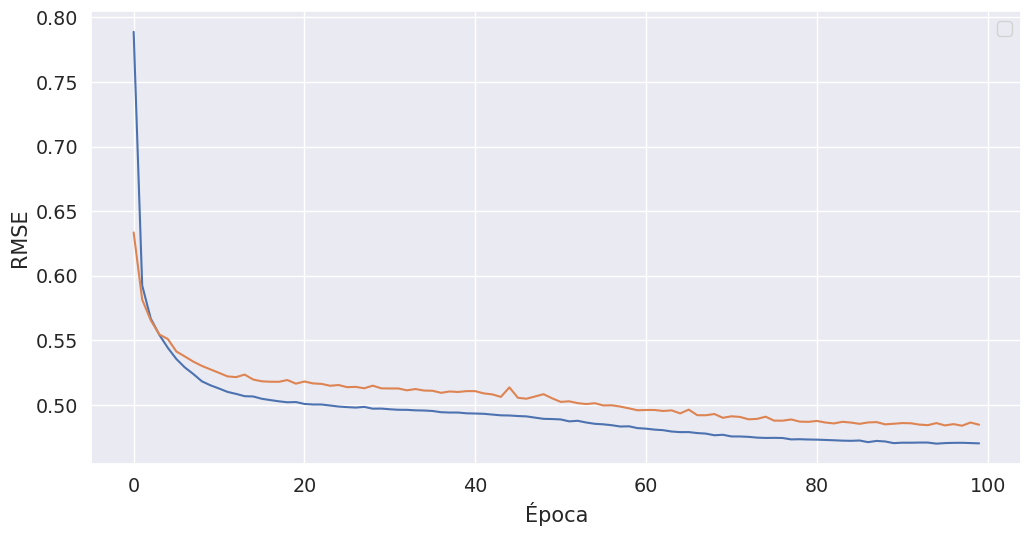

In [49]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

In [50]:
california_df_ld = pd.DataFrame(california.data, columns=california.feature_names)

Voy a tomar menos datos y voy a agregar más parámetros a mi red: Qué puede pasar cuando tengo menos cantidad de datos y más cantidad de parámetros a entrenar? Qué puede malir sal?

In [51]:
X = scaled_california_df[0:10000].drop("MedHouseVal", axis=1)
y = scaled_california_df[0:10000].filter(items=["MedHouseVal"])

In [52]:
X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size=0.4, random_state=42
)

In [53]:
model = Sequential()
model.add(Dense(50, activation='tanh', input_shape=(8,)))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

history = model.fit(
    X_train.values,
    y_train.values,
    epochs=500,
    validation_data=(X_validation.values, y_validation.values),
)

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
  32/6000 [..............................] - ETA: 14s - loss: 1.2566

1728/6000 [=======>......................] - ETA: 0s - loss: 0.6468 

3552/6000 [================>.............] - ETA: 0s - loss: 0.5252

5504/6000 [==========================>...] - ETA: 0s - loss: 0.4649

6000/6000 [==============================] - 0s 54us/step - loss: 0.4541 - val_loss: 0.3409


Epoch 2/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2589

2016/6000 [=========>....................] - ETA: 0s - loss: 0.3496

4000/6000 [===================>..........] - ETA: 0s - loss: 0.3492

5984/6000 [============================>.] - ETA: 0s - loss: 0.3410

6000/6000 [==============================] - 0s 38us/step - loss: 0.3406 - val_loss: 0.3147


Epoch 3/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2071

2016/6000 [=========>....................] - ETA: 0s - loss: 0.3269

3968/6000 [==================>...........] - ETA: 0s - loss: 0.3100

5856/6000 [============================>.] - ETA: 0s - loss: 0.3197

6000/6000 [==============================] - 0s 38us/step - loss: 0.3184 - val_loss: 0.2983


Epoch 4/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3349

1984/6000 [========>.....................] - ETA: 0s - loss: 0.3100

3872/6000 [==================>...........] - ETA: 0s - loss: 0.3068

5824/6000 [============================>.] - ETA: 0s - loss: 0.3071

6000/6000 [==============================] - 0s 38us/step - loss: 0.3061 - val_loss: 0.2854


Epoch 5/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3212

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2879

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2847

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2884

6000/6000 [==============================] - 0s 37us/step - loss: 0.2929 - val_loss: 0.2788


Epoch 6/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3100

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2854

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2760

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2782

6000/6000 [==============================] - 0s 38us/step - loss: 0.2810 - val_loss: 0.2745


Epoch 7/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2845

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2854

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2629

5888/6000 [============================>.] - ETA: 0s - loss: 0.2692

6000/6000 [==============================] - 0s 36us/step - loss: 0.2701 - val_loss: 0.2579


Epoch 8/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2021

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2726

3744/6000 [=================>............] - ETA: 0s - loss: 0.2599

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2572

6000/6000 [==============================] - 0s 38us/step - loss: 0.2603 - val_loss: 0.2587


Epoch 9/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3225

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2585

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2538

5536/6000 [==========================>...] - ETA: 0s - loss: 0.2528

6000/6000 [==============================] - 0s 38us/step - loss: 0.2526 - val_loss: 0.2489


Epoch 10/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2883

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2376

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2505

5856/6000 [============================>.] - ETA: 0s - loss: 0.2458

6000/6000 [==============================] - 0s 37us/step - loss: 0.2458 - val_loss: 0.2551


Epoch 11/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2087

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2717

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2452

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2401

6000/6000 [==============================] - 0s 38us/step - loss: 0.2389 - val_loss: 0.2392


Epoch 12/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4092

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2525

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2404

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2393

6000/6000 [==============================] - 0s 37us/step - loss: 0.2371 - val_loss: 0.2337


Epoch 13/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3204

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2272

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2206

5824/6000 [============================>.] - ETA: 0s - loss: 0.2293

6000/6000 [==============================] - 0s 37us/step - loss: 0.2301 - val_loss: 0.2365


Epoch 14/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4248

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2233

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2173

5856/6000 [============================>.] - ETA: 0s - loss: 0.2253

6000/6000 [==============================] - 0s 36us/step - loss: 0.2255 - val_loss: 0.2345


Epoch 15/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1877

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2377

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2285

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2245

6000/6000 [==============================] - 0s 37us/step - loss: 0.2240 - val_loss: 0.2306


Epoch 16/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4012

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2033

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2268

5856/6000 [============================>.] - ETA: 0s - loss: 0.2213

6000/6000 [==============================] - 0s 37us/step - loss: 0.2203 - val_loss: 0.2250


Epoch 17/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1531

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2047

3968/6000 [==================>...........] - ETA: 0s - loss: 0.2055

5888/6000 [============================>.] - ETA: 0s - loss: 0.2156

6000/6000 [==============================] - 0s 37us/step - loss: 0.2159 - val_loss: 0.2349


Epoch 18/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2164

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1969

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2151

5728/6000 [===========================>..] - ETA: 0s - loss: 0.2158

6000/6000 [==============================] - 0s 37us/step - loss: 0.2167 - val_loss: 0.2210


Epoch 19/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2824

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2107

3776/6000 [=================>............] - ETA: 0s - loss: 0.2155

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2142

6000/6000 [==============================] - 0s 38us/step - loss: 0.2128 - val_loss: 0.2249


Epoch 20/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3034

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2145

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2117

5824/6000 [============================>.] - ETA: 0s - loss: 0.2118

6000/6000 [==============================] - 0s 37us/step - loss: 0.2118 - val_loss: 0.2205


Epoch 21/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0774

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1797

3840/6000 [==================>...........] - ETA: 0s - loss: 0.2074

5664/6000 [===========================>..] - ETA: 0s - loss: 0.2118

6000/6000 [==============================] - 0s 37us/step - loss: 0.2101 - val_loss: 0.2144


Epoch 22/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2097

1888/6000 [========>.....................] - ETA: 0s - loss: 0.2029

3776/6000 [=================>............] - ETA: 0s - loss: 0.2012

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2075

6000/6000 [==============================] - 0s 38us/step - loss: 0.2085 - val_loss: 0.2158


Epoch 23/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1648

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2118

3936/6000 [==================>...........] - ETA: 0s - loss: 0.2147

5792/6000 [===========================>..] - ETA: 0s - loss: 0.2091

6000/6000 [==============================] - 0s 37us/step - loss: 0.2078 - val_loss: 0.2214


Epoch 24/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1768

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2020

3520/6000 [================>.............] - ETA: 0s - loss: 0.2038

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2033

6000/6000 [==============================] - 0s 39us/step - loss: 0.2051 - val_loss: 0.2136


Epoch 25/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1059

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1963

3744/6000 [=================>............] - ETA: 0s - loss: 0.1969

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2034

6000/6000 [==============================] - 0s 41us/step - loss: 0.2041 - val_loss: 0.2129


Epoch 26/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0898

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2181

3648/6000 [=================>............] - ETA: 0s - loss: 0.2068

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2045

6000/6000 [==============================] - 0s 39us/step - loss: 0.2025 - val_loss: 0.2109


Epoch 27/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0967

1920/6000 [========>.....................] - ETA: 0s - loss: 0.2166

3872/6000 [==================>...........] - ETA: 0s - loss: 0.2066

5824/6000 [============================>.] - ETA: 0s - loss: 0.2036

6000/6000 [==============================] - 0s 37us/step - loss: 0.2017 - val_loss: 0.2103


Epoch 28/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2674

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1966

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1944

5824/6000 [============================>.] - ETA: 0s - loss: 0.1990

6000/6000 [==============================] - 0s 37us/step - loss: 0.2005 - val_loss: 0.2206


Epoch 29/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1883

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2042

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2016

5888/6000 [============================>.] - ETA: 0s - loss: 0.1983

6000/6000 [==============================] - 0s 37us/step - loss: 0.1997 - val_loss: 0.2124


Epoch 30/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1936

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2014

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2118

5824/6000 [============================>.] - ETA: 0s - loss: 0.2014

6000/6000 [==============================] - 0s 37us/step - loss: 0.1990 - val_loss: 0.2104


Epoch 31/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2277

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1979

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1985

5856/6000 [============================>.] - ETA: 0s - loss: 0.1977

6000/6000 [==============================] - 0s 37us/step - loss: 0.1972 - val_loss: 0.2081


Epoch 32/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0975

2016/6000 [=========>....................] - ETA: 0s - loss: 0.2007

4032/6000 [===================>..........] - ETA: 0s - loss: 0.2040

6000/6000 [==============================] - 0s 36us/step - loss: 0.1980 - val_loss: 0.2050


Epoch 33/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1135

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2094

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1998

5984/6000 [============================>.] - ETA: 0s - loss: 0.1970

6000/6000 [==============================] - 0s 36us/step - loss: 0.1968 - val_loss: 0.2098


Epoch 34/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1489

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1926

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1937

5824/6000 [============================>.] - ETA: 0s - loss: 0.1963

6000/6000 [==============================] - 0s 37us/step - loss: 0.1966 - val_loss: 0.2042


Epoch 35/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1670

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1953

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1957

5888/6000 [============================>.] - ETA: 0s - loss: 0.1960

6000/6000 [==============================] - 0s 37us/step - loss: 0.1952 - val_loss: 0.2037


Epoch 36/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1154

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1845

3744/6000 [=================>............] - ETA: 0s - loss: 0.1890

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1951

6000/6000 [==============================] - 0s 38us/step - loss: 0.1957 - val_loss: 0.2064


Epoch 37/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1043

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2194

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2015

5856/6000 [============================>.] - ETA: 0s - loss: 0.1960

6000/6000 [==============================] - 0s 37us/step - loss: 0.1947 - val_loss: 0.2044


Epoch 38/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1374

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1914

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1927

5888/6000 [============================>.] - ETA: 0s - loss: 0.1904

6000/6000 [==============================] - 0s 36us/step - loss: 0.1926 - val_loss: 0.2028


Epoch 39/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1409

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1883

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1946

5824/6000 [============================>.] - ETA: 0s - loss: 0.1927

6000/6000 [==============================] - 0s 36us/step - loss: 0.1937 - val_loss: 0.2117


Epoch 40/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1439

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1724

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1932

5856/6000 [============================>.] - ETA: 0s - loss: 0.1942

6000/6000 [==============================] - 0s 37us/step - loss: 0.1922 - val_loss: 0.2045


Epoch 41/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1491

1984/6000 [========>.....................] - ETA: 0s - loss: 0.2052

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1963

5856/6000 [============================>.] - ETA: 0s - loss: 0.1945

6000/6000 [==============================] - 0s 36us/step - loss: 0.1932 - val_loss: 0.2077


Epoch 42/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1280

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1879

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1869

5824/6000 [============================>.] - ETA: 0s - loss: 0.1898

6000/6000 [==============================] - 0s 37us/step - loss: 0.1924 - val_loss: 0.2098


Epoch 43/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1847

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1909

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1896

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1915

6000/6000 [==============================] - 0s 37us/step - loss: 0.1919 - val_loss: 0.2022


Epoch 44/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1566

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1912

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1953

5856/6000 [============================>.] - ETA: 0s - loss: 0.1882

6000/6000 [==============================] - 0s 37us/step - loss: 0.1895 - val_loss: 0.2052


Epoch 45/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2379

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2045

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1960

5952/6000 [============================>.] - ETA: 0s - loss: 0.1920

6000/6000 [==============================] - 0s 36us/step - loss: 0.1914 - val_loss: 0.2069


Epoch 46/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2149

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1844

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1808

5984/6000 [============================>.] - ETA: 0s - loss: 0.1898

6000/6000 [==============================] - 0s 36us/step - loss: 0.1898 - val_loss: 0.2040


Epoch 47/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2072

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1997

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1935

5984/6000 [============================>.] - ETA: 0s - loss: 0.1910

6000/6000 [==============================] - 0s 37us/step - loss: 0.1907 - val_loss: 0.1998


Epoch 48/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3051

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1965

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1927

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1911

6000/6000 [==============================] - 0s 38us/step - loss: 0.1894 - val_loss: 0.2021


Epoch 49/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2441

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1977

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1921

5824/6000 [============================>.] - ETA: 0s - loss: 0.1882

6000/6000 [==============================] - 0s 37us/step - loss: 0.1893 - val_loss: 0.2053


Epoch 50/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1473

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1957

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1891

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1869

6000/6000 [==============================] - 0s 37us/step - loss: 0.1895 - val_loss: 0.2088


Epoch 51/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1329

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1794

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1865

5984/6000 [============================>.] - ETA: 0s - loss: 0.1870

6000/6000 [==============================] - 0s 36us/step - loss: 0.1872 - val_loss: 0.1992


Epoch 52/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2760

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1874

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1884

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1886

6000/6000 [==============================] - 0s 38us/step - loss: 0.1877 - val_loss: 0.2068


Epoch 53/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1842

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1794

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1880

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1893

6000/6000 [==============================] - 0s 37us/step - loss: 0.1883 - val_loss: 0.2031


Epoch 54/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1576

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1676

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1855

5824/6000 [============================>.] - ETA: 0s - loss: 0.1851

6000/6000 [==============================] - 0s 37us/step - loss: 0.1874 - val_loss: 0.2005


Epoch 55/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2142

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1874

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1918

6000/6000 [==============================] - 0s 35us/step - loss: 0.1885 - val_loss: 0.1985


Epoch 56/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2164

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1815

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1816

5824/6000 [============================>.] - ETA: 0s - loss: 0.1868

6000/6000 [==============================] - 0s 37us/step - loss: 0.1871 - val_loss: 0.1981


Epoch 57/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1805

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1869

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1790

5856/6000 [============================>.] - ETA: 0s - loss: 0.1850

6000/6000 [==============================] - 0s 37us/step - loss: 0.1864 - val_loss: 0.1990


Epoch 58/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0823

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1883

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1871

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1841

6000/6000 [==============================] - 0s 37us/step - loss: 0.1857 - val_loss: 0.2056


Epoch 59/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1272

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1810

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1884

5984/6000 [============================>.] - ETA: 0s - loss: 0.1872

6000/6000 [==============================] - 0s 36us/step - loss: 0.1868 - val_loss: 0.2010


Epoch 60/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1294

1952/6000 [========>.....................] - ETA: 0s - loss: 0.2031

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1889

5888/6000 [============================>.] - ETA: 0s - loss: 0.1857

6000/6000 [==============================] - 0s 36us/step - loss: 0.1850 - val_loss: 0.2009


Epoch 61/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0449

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1749

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1758

5984/6000 [============================>.] - ETA: 0s - loss: 0.1850

6000/6000 [==============================] - 0s 36us/step - loss: 0.1850 - val_loss: 0.2003


Epoch 62/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0675

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1715

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1834

5824/6000 [============================>.] - ETA: 0s - loss: 0.1854

6000/6000 [==============================] - 0s 37us/step - loss: 0.1840 - val_loss: 0.2033


Epoch 63/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1398

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1735

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1773

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1846

6000/6000 [==============================] - 0s 40us/step - loss: 0.1851 - val_loss: 0.2007


Epoch 64/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2332

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1829

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1788

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1834

6000/6000 [==============================] - 0s 37us/step - loss: 0.1826 - val_loss: 0.2007


Epoch 65/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1918

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1785

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1844

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1835

6000/6000 [==============================] - 0s 37us/step - loss: 0.1833 - val_loss: 0.1996


Epoch 66/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1486

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1894

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1869

5856/6000 [============================>.] - ETA: 0s - loss: 0.1850

6000/6000 [==============================] - 0s 37us/step - loss: 0.1842 - val_loss: 0.2026


Epoch 67/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1123

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1770

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1781

6000/6000 [==============================] - 0s 36us/step - loss: 0.1820 - val_loss: 0.2006


Epoch 68/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0915

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1768

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1753

5920/6000 [============================>.] - ETA: 0s - loss: 0.1842

6000/6000 [==============================] - 0s 36us/step - loss: 0.1828 - val_loss: 0.2008


Epoch 69/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2080

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1830

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1778

5856/6000 [============================>.] - ETA: 0s - loss: 0.1798

6000/6000 [==============================] - 0s 36us/step - loss: 0.1820 - val_loss: 0.2009


Epoch 70/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1165

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1765

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1758

5888/6000 [============================>.] - ETA: 0s - loss: 0.1823

6000/6000 [==============================] - 0s 37us/step - loss: 0.1813 - val_loss: 0.2024


Epoch 71/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1617

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1792

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1815

5920/6000 [============================>.] - ETA: 0s - loss: 0.1820

6000/6000 [==============================] - 0s 37us/step - loss: 0.1812 - val_loss: 0.1981


Epoch 72/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1312

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1705

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1819

5824/6000 [============================>.] - ETA: 0s - loss: 0.1830

6000/6000 [==============================] - 0s 37us/step - loss: 0.1813 - val_loss: 0.1990


Epoch 73/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1660

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1640

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1812

5824/6000 [============================>.] - ETA: 0s - loss: 0.1823

6000/6000 [==============================] - 0s 37us/step - loss: 0.1823 - val_loss: 0.1987


Epoch 74/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1328

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1626

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1812

5888/6000 [============================>.] - ETA: 0s - loss: 0.1809

6000/6000 [==============================] - 0s 37us/step - loss: 0.1810 - val_loss: 0.1987


Epoch 75/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1618

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1817

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1848

5856/6000 [============================>.] - ETA: 0s - loss: 0.1807

6000/6000 [==============================] - 0s 37us/step - loss: 0.1809 - val_loss: 0.2020


Epoch 76/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1770

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1796

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1791

5952/6000 [============================>.] - ETA: 0s - loss: 0.1802

6000/6000 [==============================] - 0s 36us/step - loss: 0.1800 - val_loss: 0.1973


Epoch 77/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1264

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1833

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1876

5824/6000 [============================>.] - ETA: 0s - loss: 0.1808

6000/6000 [==============================] - 0s 37us/step - loss: 0.1806 - val_loss: 0.1978


Epoch 78/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1386

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1596

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1731

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1790

6000/6000 [==============================] - 0s 37us/step - loss: 0.1806 - val_loss: 0.2002


Epoch 79/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1339

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1732

3744/6000 [=================>............] - ETA: 0s - loss: 0.1830

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1808

6000/6000 [==============================] - 0s 37us/step - loss: 0.1790 - val_loss: 0.1971


Epoch 80/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1603

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1664

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1761

5920/6000 [============================>.] - ETA: 0s - loss: 0.1789

6000/6000 [==============================] - 0s 37us/step - loss: 0.1787 - val_loss: 0.2025


Epoch 81/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1566

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1602

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1759

5824/6000 [============================>.] - ETA: 0s - loss: 0.1797

6000/6000 [==============================] - 0s 37us/step - loss: 0.1787 - val_loss: 0.1967


Epoch 82/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0511

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1648

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1763

5856/6000 [============================>.] - ETA: 0s - loss: 0.1774

6000/6000 [==============================] - 0s 37us/step - loss: 0.1782 - val_loss: 0.1963


Epoch 83/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1065

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1862

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1764

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1779

6000/6000 [==============================] - 0s 37us/step - loss: 0.1786 - val_loss: 0.1986


Epoch 84/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1752

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1743

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1740

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1777

6000/6000 [==============================] - 0s 38us/step - loss: 0.1772 - val_loss: 0.1967


Epoch 85/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1545

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1687

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1789

5856/6000 [============================>.] - ETA: 0s - loss: 0.1757

6000/6000 [==============================] - 0s 37us/step - loss: 0.1763 - val_loss: 0.2048


Epoch 86/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0905

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1679

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1752

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1739

6000/6000 [==============================] - 0s 38us/step - loss: 0.1752 - val_loss: 0.1962


Epoch 87/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3160

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1701

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1733

5952/6000 [============================>.] - ETA: 0s - loss: 0.1761

6000/6000 [==============================] - 0s 37us/step - loss: 0.1759 - val_loss: 0.1963


Epoch 88/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5672

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1841

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1747

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1750

6000/6000 [==============================] - 0s 37us/step - loss: 0.1752 - val_loss: 0.1986


Epoch 89/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2079

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1821

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1744

5856/6000 [============================>.] - ETA: 0s - loss: 0.1757

6000/6000 [==============================] - 0s 37us/step - loss: 0.1759 - val_loss: 0.1940


Epoch 90/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2911

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1759

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1716

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1748

6000/6000 [==============================] - 0s 38us/step - loss: 0.1743 - val_loss: 0.1971


Epoch 91/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1049

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1844

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1771

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1739

6000/6000 [==============================] - 0s 37us/step - loss: 0.1742 - val_loss: 0.1915


Epoch 92/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0899

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1810

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1797

5888/6000 [============================>.] - ETA: 0s - loss: 0.1736

6000/6000 [==============================] - 0s 37us/step - loss: 0.1729 - val_loss: 0.1922


Epoch 93/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0912

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1661

3648/6000 [=================>............] - ETA: 0s - loss: 0.1661

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1715

6000/6000 [==============================] - 0s 38us/step - loss: 0.1721 - val_loss: 0.1944


Epoch 94/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1165

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1666

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1675

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1737

6000/6000 [==============================] - 0s 37us/step - loss: 0.1733 - val_loss: 0.1958


Epoch 95/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2984

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1731

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1756

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1712

6000/6000 [==============================] - 0s 37us/step - loss: 0.1731 - val_loss: 0.1950


Epoch 96/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1850

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1593

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1624

5856/6000 [============================>.] - ETA: 0s - loss: 0.1732

6000/6000 [==============================] - 0s 37us/step - loss: 0.1734 - val_loss: 0.1949


Epoch 97/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2261

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1632

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1686

5920/6000 [============================>.] - ETA: 0s - loss: 0.1714

6000/6000 [==============================] - 0s 37us/step - loss: 0.1714 - val_loss: 0.1940


Epoch 98/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1997

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1741

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1702

5952/6000 [============================>.] - ETA: 0s - loss: 0.1717

6000/6000 [==============================] - 0s 37us/step - loss: 0.1719 - val_loss: 0.2002


Epoch 99/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1775

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1843

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1749

5888/6000 [============================>.] - ETA: 0s - loss: 0.1719

6000/6000 [==============================] - 0s 37us/step - loss: 0.1713 - val_loss: 0.1906


Epoch 100/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0440

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1539

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1613

5920/6000 [============================>.] - ETA: 0s - loss: 0.1711

6000/6000 [==============================] - 0s 37us/step - loss: 0.1703 - val_loss: 0.1926


Epoch 101/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1157

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1585

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1686

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1707

6000/6000 [==============================] - 0s 37us/step - loss: 0.1720 - val_loss: 0.1917


Epoch 102/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1794

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1810

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1771

5856/6000 [============================>.] - ETA: 0s - loss: 0.1696

6000/6000 [==============================] - 0s 37us/step - loss: 0.1700 - val_loss: 0.1989


Epoch 103/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1802

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1698

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1696

5856/6000 [============================>.] - ETA: 0s - loss: 0.1701

6000/6000 [==============================] - 0s 36us/step - loss: 0.1697 - val_loss: 0.1892


Epoch 104/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2340

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1726

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1661

5856/6000 [============================>.] - ETA: 0s - loss: 0.1696

6000/6000 [==============================] - 0s 37us/step - loss: 0.1696 - val_loss: 0.1914


Epoch 105/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1150

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1852

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1715

5856/6000 [============================>.] - ETA: 0s - loss: 0.1695

6000/6000 [==============================] - 0s 37us/step - loss: 0.1687 - val_loss: 0.2002


Epoch 106/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2247

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1574

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1630

5888/6000 [============================>.] - ETA: 0s - loss: 0.1704

6000/6000 [==============================] - 0s 36us/step - loss: 0.1708 - val_loss: 0.2004


Epoch 107/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0688

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1593

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1625

5952/6000 [============================>.] - ETA: 0s - loss: 0.1690

6000/6000 [==============================] - 0s 36us/step - loss: 0.1687 - val_loss: 0.1939


Epoch 108/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0783

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1651

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1626

5920/6000 [============================>.] - ETA: 0s - loss: 0.1669

6000/6000 [==============================] - 0s 38us/step - loss: 0.1667 - val_loss: 0.1943


Epoch 109/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1499

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1586

3680/6000 [=================>............] - ETA: 0s - loss: 0.1579

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1645

6000/6000 [==============================] - 0s 39us/step - loss: 0.1670 - val_loss: 0.1934


Epoch 110/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1058

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1542

3520/6000 [================>.............] - ETA: 0s - loss: 0.1596

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1660

6000/6000 [==============================] - 0s 38us/step - loss: 0.1685 - val_loss: 0.1912


Epoch 111/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1400

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1761

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1702

5984/6000 [============================>.] - ETA: 0s - loss: 0.1670

6000/6000 [==============================] - 0s 36us/step - loss: 0.1669 - val_loss: 0.1950


Epoch 112/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1211

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1683

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1720

5888/6000 [============================>.] - ETA: 0s - loss: 0.1688

6000/6000 [==============================] - 0s 37us/step - loss: 0.1679 - val_loss: 0.1914


Epoch 113/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3643

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1624

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1695

5856/6000 [============================>.] - ETA: 0s - loss: 0.1662

6000/6000 [==============================] - 0s 39us/step - loss: 0.1665 - val_loss: 0.1886


Epoch 114/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0775

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1696

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1666

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1647

6000/6000 [==============================] - 0s 38us/step - loss: 0.1660 - val_loss: 0.1883


Epoch 115/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1543

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1719

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1679

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1644

6000/6000 [==============================] - 0s 38us/step - loss: 0.1663 - val_loss: 0.1918


Epoch 116/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1644

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1676

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1709

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1688

6000/6000 [==============================] - 0s 37us/step - loss: 0.1664 - val_loss: 0.1881


Epoch 117/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0729

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1448

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1544

5920/6000 [============================>.] - ETA: 0s - loss: 0.1641

6000/6000 [==============================] - 0s 37us/step - loss: 0.1642 - val_loss: 0.1884


Epoch 118/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2716

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1611

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1686

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1657

6000/6000 [==============================] - 0s 37us/step - loss: 0.1644 - val_loss: 0.1919


Epoch 119/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3016

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1670

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1680

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1662

6000/6000 [==============================] - 0s 37us/step - loss: 0.1649 - val_loss: 0.1910


Epoch 120/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1975

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1556

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1629

5824/6000 [============================>.] - ETA: 0s - loss: 0.1642

6000/6000 [==============================] - 0s 37us/step - loss: 0.1641 - val_loss: 0.1909


Epoch 121/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1212

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1742

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1657

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1649

6000/6000 [==============================] - 0s 37us/step - loss: 0.1643 - val_loss: 0.1964


Epoch 122/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1403

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1774

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1682

5824/6000 [============================>.] - ETA: 0s - loss: 0.1635

6000/6000 [==============================] - 0s 37us/step - loss: 0.1639 - val_loss: 0.1877


Epoch 123/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1014

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1625

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1577

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1620

6000/6000 [==============================] - 0s 38us/step - loss: 0.1629 - val_loss: 0.1899


Epoch 124/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1325

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1556

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1639

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1670

6000/6000 [==============================] - 0s 38us/step - loss: 0.1652 - val_loss: 0.1909


Epoch 125/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0986

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1624

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1616

5856/6000 [============================>.] - ETA: 0s - loss: 0.1634

6000/6000 [==============================] - 0s 37us/step - loss: 0.1624 - val_loss: 0.1898


Epoch 126/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2510

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1562

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1579

5856/6000 [============================>.] - ETA: 0s - loss: 0.1620

6000/6000 [==============================] - 0s 37us/step - loss: 0.1628 - val_loss: 0.1887


Epoch 127/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2278

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1627

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1631

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1639

6000/6000 [==============================] - 0s 37us/step - loss: 0.1633 - val_loss: 0.1896


Epoch 128/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1980

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1476

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1595

5888/6000 [============================>.] - ETA: 0s - loss: 0.1655

6000/6000 [==============================] - 0s 36us/step - loss: 0.1645 - val_loss: 0.1903


Epoch 129/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0937

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1558

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1595

5824/6000 [============================>.] - ETA: 0s - loss: 0.1630

6000/6000 [==============================] - 0s 37us/step - loss: 0.1624 - val_loss: 0.1873


Epoch 130/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2152

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1548

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1587

5920/6000 [============================>.] - ETA: 0s - loss: 0.1624

6000/6000 [==============================] - 0s 36us/step - loss: 0.1618 - val_loss: 0.1873


Epoch 131/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2888

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1714

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1615

5888/6000 [============================>.] - ETA: 0s - loss: 0.1609

6000/6000 [==============================] - 0s 37us/step - loss: 0.1621 - val_loss: 0.1903


Epoch 132/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1142

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1613

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1605

5920/6000 [============================>.] - ETA: 0s - loss: 0.1617

6000/6000 [==============================] - 0s 37us/step - loss: 0.1618 - val_loss: 0.1903


Epoch 133/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0752

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1558

3680/6000 [=================>............] - ETA: 0s - loss: 0.1493

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1598

6000/6000 [==============================] - 0s 38us/step - loss: 0.1609 - val_loss: 0.1912


Epoch 134/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0789

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1500

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1581

5888/6000 [============================>.] - ETA: 0s - loss: 0.1625

6000/6000 [==============================] - 0s 37us/step - loss: 0.1623 - val_loss: 0.1887


Epoch 135/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0750

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1541

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1667

6000/6000 [==============================] - 0s 35us/step - loss: 0.1616 - val_loss: 0.1856


Epoch 136/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2070

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1690

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1635

5888/6000 [============================>.] - ETA: 0s - loss: 0.1594

6000/6000 [==============================] - 0s 36us/step - loss: 0.1611 - val_loss: 0.1940


Epoch 137/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0757

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1437

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1583

5952/6000 [============================>.] - ETA: 0s - loss: 0.1596

6000/6000 [==============================] - 0s 36us/step - loss: 0.1598 - val_loss: 0.1911


Epoch 138/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1481

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1610

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1640

5824/6000 [============================>.] - ETA: 0s - loss: 0.1612

6000/6000 [==============================] - 0s 37us/step - loss: 0.1600 - val_loss: 0.1905


Epoch 139/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2081

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1482

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1573

5888/6000 [============================>.] - ETA: 0s - loss: 0.1592

6000/6000 [==============================] - 0s 37us/step - loss: 0.1593 - val_loss: 0.1918


Epoch 140/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2454

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1685

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1601

6000/6000 [==============================] - 0s 36us/step - loss: 0.1602 - val_loss: 0.1902


Epoch 141/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1128

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1659

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1628

5920/6000 [============================>.] - ETA: 0s - loss: 0.1602

6000/6000 [==============================] - 0s 36us/step - loss: 0.1597 - val_loss: 0.1971


Epoch 142/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1611

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1648

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1550

5856/6000 [============================>.] - ETA: 0s - loss: 0.1581

6000/6000 [==============================] - 0s 37us/step - loss: 0.1594 - val_loss: 0.1897


Epoch 143/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2132

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1702

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1625

5824/6000 [============================>.] - ETA: 0s - loss: 0.1625

6000/6000 [==============================] - 0s 37us/step - loss: 0.1608 - val_loss: 0.1918


Epoch 144/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1157

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1519

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1514

5824/6000 [============================>.] - ETA: 0s - loss: 0.1593

6000/6000 [==============================] - 0s 37us/step - loss: 0.1597 - val_loss: 0.1893


Epoch 145/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0577

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1677

3744/6000 [=================>............] - ETA: 0s - loss: 0.1636

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1608

6000/6000 [==============================] - 0s 38us/step - loss: 0.1591 - val_loss: 0.1886


Epoch 146/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2043

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1689

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1584

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1591

6000/6000 [==============================] - 0s 37us/step - loss: 0.1588 - val_loss: 0.1913


Epoch 147/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3332

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1593

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1590

5888/6000 [============================>.] - ETA: 0s - loss: 0.1604

6000/6000 [==============================] - 0s 37us/step - loss: 0.1594 - val_loss: 0.1857


Epoch 148/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1757

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1552

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1556

5888/6000 [============================>.] - ETA: 0s - loss: 0.1573

6000/6000 [==============================] - 0s 37us/step - loss: 0.1582 - val_loss: 0.1876


Epoch 149/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1191

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1754

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1619

5856/6000 [============================>.] - ETA: 0s - loss: 0.1586

6000/6000 [==============================] - 0s 37us/step - loss: 0.1577 - val_loss: 0.1872


Epoch 150/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0705

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1629

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1592

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1578

6000/6000 [==============================] - 0s 37us/step - loss: 0.1584 - val_loss: 0.1865


Epoch 151/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0599

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1536

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1570

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1563

6000/6000 [==============================] - 0s 37us/step - loss: 0.1580 - val_loss: 0.1916


Epoch 152/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2002

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1582

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1558

5856/6000 [============================>.] - ETA: 0s - loss: 0.1586

6000/6000 [==============================] - 0s 37us/step - loss: 0.1586 - val_loss: 0.1886


Epoch 153/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1133

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1433

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1578

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1586

6000/6000 [==============================] - 0s 37us/step - loss: 0.1569 - val_loss: 0.1901


Epoch 154/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1053

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1480

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1544

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1562

6000/6000 [==============================] - 0s 37us/step - loss: 0.1569 - val_loss: 0.1902


Epoch 155/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0912

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1603

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1524

5920/6000 [============================>.] - ETA: 0s - loss: 0.1575

6000/6000 [==============================] - 0s 36us/step - loss: 0.1584 - val_loss: 0.1888


Epoch 156/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1336

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1668

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1595

5888/6000 [============================>.] - ETA: 0s - loss: 0.1592

6000/6000 [==============================] - 0s 37us/step - loss: 0.1584 - val_loss: 0.1898


Epoch 157/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1486

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1632

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1573

5920/6000 [============================>.] - ETA: 0s - loss: 0.1574

6000/6000 [==============================] - 0s 36us/step - loss: 0.1574 - val_loss: 0.1856


Epoch 158/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0691

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1578

3776/6000 [=================>............] - ETA: 0s - loss: 0.1587

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1573

6000/6000 [==============================] - 0s 37us/step - loss: 0.1575 - val_loss: 0.1889


Epoch 159/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1340

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1515

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1543

5952/6000 [============================>.] - ETA: 0s - loss: 0.1577

6000/6000 [==============================] - 0s 36us/step - loss: 0.1571 - val_loss: 0.1926


Epoch 160/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1619

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1544

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1531

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1565

6000/6000 [==============================] - 0s 37us/step - loss: 0.1571 - val_loss: 0.1873


Epoch 161/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1361

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1594

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1600

5888/6000 [============================>.] - ETA: 0s - loss: 0.1582

6000/6000 [==============================] - 0s 37us/step - loss: 0.1571 - val_loss: 0.1841


Epoch 162/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1219

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1441

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1506

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1560

6000/6000 [==============================] - 0s 37us/step - loss: 0.1552 - val_loss: 0.1926


Epoch 163/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2410

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1605

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1545

5824/6000 [============================>.] - ETA: 0s - loss: 0.1558

6000/6000 [==============================] - 0s 37us/step - loss: 0.1555 - val_loss: 0.1859


Epoch 164/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1700

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1690

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1617

5920/6000 [============================>.] - ETA: 0s - loss: 0.1560

6000/6000 [==============================] - 0s 36us/step - loss: 0.1564 - val_loss: 0.1943


Epoch 165/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0709

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1425

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1519

5888/6000 [============================>.] - ETA: 0s - loss: 0.1563

6000/6000 [==============================] - 0s 37us/step - loss: 0.1554 - val_loss: 0.1847


Epoch 166/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1580

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1524

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1498

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1549

6000/6000 [==============================] - 0s 38us/step - loss: 0.1548 - val_loss: 0.1907


Epoch 167/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0696

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1363

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1532

5888/6000 [============================>.] - ETA: 0s - loss: 0.1566

6000/6000 [==============================] - 0s 37us/step - loss: 0.1559 - val_loss: 0.1867


Epoch 168/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1716

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1472

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1542

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1549

6000/6000 [==============================] - 0s 40us/step - loss: 0.1555 - val_loss: 0.1893


Epoch 169/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1546

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1486

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1554

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1548

6000/6000 [==============================] - 0s 37us/step - loss: 0.1547 - val_loss: 0.1880


Epoch 170/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1241

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1539

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1553

5952/6000 [============================>.] - ETA: 0s - loss: 0.1554

6000/6000 [==============================] - 0s 36us/step - loss: 0.1554 - val_loss: 0.1857


Epoch 171/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0937

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1510

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1498

6000/6000 [==============================] - 0s 36us/step - loss: 0.1544 - val_loss: 0.1873


Epoch 172/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1000

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1510

3712/6000 [=================>............] - ETA: 0s - loss: 0.1516

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1549

6000/6000 [==============================] - 0s 38us/step - loss: 0.1549 - val_loss: 0.1910


Epoch 173/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1195

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1546

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1554

5920/6000 [============================>.] - ETA: 0s - loss: 0.1548

6000/6000 [==============================] - 0s 37us/step - loss: 0.1543 - val_loss: 0.1878


Epoch 174/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1488

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1446

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1478

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1530

6000/6000 [==============================] - 0s 37us/step - loss: 0.1544 - val_loss: 0.1866


Epoch 175/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1933

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1488

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1571

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1558

6000/6000 [==============================] - 0s 37us/step - loss: 0.1552 - val_loss: 0.1871


Epoch 176/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0869

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1548

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1480

5952/6000 [============================>.] - ETA: 0s - loss: 0.1540

6000/6000 [==============================] - 0s 36us/step - loss: 0.1544 - val_loss: 0.1877


Epoch 177/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1592

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1630

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1580

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1537

6000/6000 [==============================] - 0s 37us/step - loss: 0.1539 - val_loss: 0.1881


Epoch 178/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1046

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1521

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1519

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1528

6000/6000 [==============================] - 0s 38us/step - loss: 0.1533 - val_loss: 0.1858


Epoch 179/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2136

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1443

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1570

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1552

6000/6000 [==============================] - 0s 39us/step - loss: 0.1539 - val_loss: 0.1870


Epoch 180/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1259

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1518

3744/6000 [=================>............] - ETA: 0s - loss: 0.1552

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1553

6000/6000 [==============================] - 0s 38us/step - loss: 0.1541 - val_loss: 0.1916


Epoch 181/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0824

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1488

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1527

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1541

6000/6000 [==============================] - 0s 37us/step - loss: 0.1534 - val_loss: 0.1915


Epoch 182/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0801

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1506

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1513

5856/6000 [============================>.] - ETA: 0s - loss: 0.1537

6000/6000 [==============================] - 0s 37us/step - loss: 0.1526 - val_loss: 0.1881


Epoch 183/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2861

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1619

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1532

5824/6000 [============================>.] - ETA: 0s - loss: 0.1533

6000/6000 [==============================] - 0s 37us/step - loss: 0.1532 - val_loss: 0.1857


Epoch 184/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1238

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1469

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1542

5856/6000 [============================>.] - ETA: 0s - loss: 0.1530

6000/6000 [==============================] - 0s 37us/step - loss: 0.1527 - val_loss: 0.1893


Epoch 185/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1336

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1500

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1476

5920/6000 [============================>.] - ETA: 0s - loss: 0.1533

6000/6000 [==============================] - 0s 36us/step - loss: 0.1529 - val_loss: 0.1884


Epoch 186/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0764

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1543

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1616

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1526

6000/6000 [==============================] - 0s 37us/step - loss: 0.1525 - val_loss: 0.1887


Epoch 187/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1147

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1373

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1434

5824/6000 [============================>.] - ETA: 0s - loss: 0.1544

6000/6000 [==============================] - 0s 37us/step - loss: 0.1538 - val_loss: 0.1869


Epoch 188/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1597

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1490

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1534

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1509

6000/6000 [==============================] - 0s 37us/step - loss: 0.1519 - val_loss: 0.1878


Epoch 189/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1095

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1505

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1565

5856/6000 [============================>.] - ETA: 0s - loss: 0.1509

6000/6000 [==============================] - 0s 37us/step - loss: 0.1515 - val_loss: 0.1863


Epoch 190/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2640

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1603

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1562

5920/6000 [============================>.] - ETA: 0s - loss: 0.1523

6000/6000 [==============================] - 0s 37us/step - loss: 0.1523 - val_loss: 0.1837


Epoch 191/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1136

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1430

3648/6000 [=================>............] - ETA: 0s - loss: 0.1501

5472/6000 [==========================>...] - ETA: 0s - loss: 0.1528

6000/6000 [==============================] - 0s 39us/step - loss: 0.1511 - val_loss: 0.1871


Epoch 192/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1741

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1580

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1491

5888/6000 [============================>.] - ETA: 0s - loss: 0.1527

6000/6000 [==============================] - 0s 37us/step - loss: 0.1523 - val_loss: 0.1881


Epoch 193/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1530

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1492

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1488

5824/6000 [============================>.] - ETA: 0s - loss: 0.1524

6000/6000 [==============================] - 0s 37us/step - loss: 0.1522 - val_loss: 0.1876


Epoch 194/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1513

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1510

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1448

5888/6000 [============================>.] - ETA: 0s - loss: 0.1501

6000/6000 [==============================] - 0s 37us/step - loss: 0.1504 - val_loss: 0.1954


Epoch 195/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3091

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1538

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1527

5824/6000 [============================>.] - ETA: 0s - loss: 0.1523

6000/6000 [==============================] - 0s 37us/step - loss: 0.1518 - val_loss: 0.1903


Epoch 196/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1083

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1702

3776/6000 [=================>............] - ETA: 0s - loss: 0.1575

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1516

6000/6000 [==============================] - 0s 37us/step - loss: 0.1524 - val_loss: 0.1847


Epoch 197/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1258

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1405

3776/6000 [=================>............] - ETA: 0s - loss: 0.1506

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1530

6000/6000 [==============================] - 0s 38us/step - loss: 0.1519 - val_loss: 0.1879


Epoch 198/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1144

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1577

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1541

5952/6000 [============================>.] - ETA: 0s - loss: 0.1514

6000/6000 [==============================] - 0s 36us/step - loss: 0.1516 - val_loss: 0.1914


Epoch 199/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0936

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1494

3648/6000 [=================>............] - ETA: 0s - loss: 0.1530

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1509

6000/6000 [==============================] - 0s 38us/step - loss: 0.1513 - val_loss: 0.1890


Epoch 200/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0864

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1364

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1525

5824/6000 [============================>.] - ETA: 0s - loss: 0.1512

6000/6000 [==============================] - 0s 37us/step - loss: 0.1505 - val_loss: 0.1843


Epoch 201/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2608

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1480

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1502

5952/6000 [============================>.] - ETA: 0s - loss: 0.1502

6000/6000 [==============================] - 0s 36us/step - loss: 0.1496 - val_loss: 0.1908


Epoch 202/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0950

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1360

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1475

5888/6000 [============================>.] - ETA: 0s - loss: 0.1508

6000/6000 [==============================] - 0s 36us/step - loss: 0.1515 - val_loss: 0.1865


Epoch 203/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1476

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1458

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1450

5952/6000 [============================>.] - ETA: 0s - loss: 0.1516

6000/6000 [==============================] - 0s 37us/step - loss: 0.1512 - val_loss: 0.1871


Epoch 204/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0752

2112/6000 [=========>....................] - ETA: 0s - loss: 0.1376

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1458

6000/6000 [==============================] - 0s 36us/step - loss: 0.1504 - val_loss: 0.1902


Epoch 205/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1981

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1557

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1481

5920/6000 [============================>.] - ETA: 0s - loss: 0.1492

6000/6000 [==============================] - 0s 37us/step - loss: 0.1491 - val_loss: 0.1835


Epoch 206/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1985

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1469

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1506

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1512

6000/6000 [==============================] - 0s 37us/step - loss: 0.1501 - val_loss: 0.1848


Epoch 207/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0517

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1523

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1514

5920/6000 [============================>.] - ETA: 0s - loss: 0.1500

6000/6000 [==============================] - 0s 36us/step - loss: 0.1503 - val_loss: 0.1922


Epoch 208/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0876

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1448

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1465

5856/6000 [============================>.] - ETA: 0s - loss: 0.1511

6000/6000 [==============================] - 0s 37us/step - loss: 0.1501 - val_loss: 0.1875


Epoch 209/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1619

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1446

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1549

5856/6000 [============================>.] - ETA: 0s - loss: 0.1474

6000/6000 [==============================] - 0s 37us/step - loss: 0.1500 - val_loss: 0.1887


Epoch 210/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1230

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1441

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1458

6000/6000 [==============================] - 0s 36us/step - loss: 0.1501 - val_loss: 0.1831


Epoch 211/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0668

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1400

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1437

5888/6000 [============================>.] - ETA: 0s - loss: 0.1515

6000/6000 [==============================] - 0s 37us/step - loss: 0.1503 - val_loss: 0.1839


Epoch 212/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1325

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1542

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1504

5984/6000 [============================>.] - ETA: 0s - loss: 0.1496

6000/6000 [==============================] - 0s 36us/step - loss: 0.1494 - val_loss: 0.1839


Epoch 213/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0901

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1428

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1532

5984/6000 [============================>.] - ETA: 0s - loss: 0.1509

6000/6000 [==============================] - 0s 36us/step - loss: 0.1508 - val_loss: 0.1913


Epoch 214/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1605

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1438

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1438

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1475

6000/6000 [==============================] - 0s 37us/step - loss: 0.1495 - val_loss: 0.1938


Epoch 215/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2261

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1392

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1472

5888/6000 [============================>.] - ETA: 0s - loss: 0.1491

6000/6000 [==============================] - 0s 37us/step - loss: 0.1495 - val_loss: 0.1884


Epoch 216/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2296

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1584

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1467

5856/6000 [============================>.] - ETA: 0s - loss: 0.1479

6000/6000 [==============================] - 0s 38us/step - loss: 0.1483 - val_loss: 0.1873


Epoch 217/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0998

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1407

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1427

5952/6000 [============================>.] - ETA: 0s - loss: 0.1480

6000/6000 [==============================] - 0s 36us/step - loss: 0.1493 - val_loss: 0.1930


Epoch 218/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1198

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1420

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1496

5952/6000 [============================>.] - ETA: 0s - loss: 0.1481

6000/6000 [==============================] - 0s 36us/step - loss: 0.1481 - val_loss: 0.1870


Epoch 219/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1039

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1543

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1484

6000/6000 [==============================] - 0s 36us/step - loss: 0.1477 - val_loss: 0.1865


Epoch 220/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0703

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1416

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1477

5856/6000 [============================>.] - ETA: 0s - loss: 0.1482

6000/6000 [==============================] - 0s 37us/step - loss: 0.1474 - val_loss: 0.1902


Epoch 221/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1473

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1351

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1471

5888/6000 [============================>.] - ETA: 0s - loss: 0.1476

6000/6000 [==============================] - 0s 36us/step - loss: 0.1477 - val_loss: 0.1866


Epoch 222/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0720

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1374

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1494

5984/6000 [============================>.] - ETA: 0s - loss: 0.1474

6000/6000 [==============================] - 0s 36us/step - loss: 0.1479 - val_loss: 0.1899


Epoch 223/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1362

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1398

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1480

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1507

6000/6000 [==============================] - 0s 37us/step - loss: 0.1501 - val_loss: 0.1858


Epoch 224/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1305

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1464

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1495

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1500

6000/6000 [==============================] - 0s 37us/step - loss: 0.1478 - val_loss: 0.1911


Epoch 225/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1321

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1371

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1453

5888/6000 [============================>.] - ETA: 0s - loss: 0.1461

6000/6000 [==============================] - 0s 36us/step - loss: 0.1480 - val_loss: 0.1859


Epoch 226/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1343

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1477

3648/6000 [=================>............] - ETA: 0s - loss: 0.1452

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1455

6000/6000 [==============================] - 0s 40us/step - loss: 0.1472 - val_loss: 0.1870


Epoch 227/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2145

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1480

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1524

5888/6000 [============================>.] - ETA: 0s - loss: 0.1482

6000/6000 [==============================] - 0s 37us/step - loss: 0.1481 - val_loss: 0.1853


Epoch 228/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0717

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1375

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1435

5856/6000 [============================>.] - ETA: 0s - loss: 0.1454

6000/6000 [==============================] - 0s 37us/step - loss: 0.1469 - val_loss: 0.1928


Epoch 229/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1885

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1545

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1489

5888/6000 [============================>.] - ETA: 0s - loss: 0.1476

6000/6000 [==============================] - 0s 36us/step - loss: 0.1479 - val_loss: 0.1894


Epoch 230/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1256

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1579

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1502

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1472

6000/6000 [==============================] - 0s 37us/step - loss: 0.1474 - val_loss: 0.1879


Epoch 231/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0969

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1363

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1464

5920/6000 [============================>.] - ETA: 0s - loss: 0.1464

6000/6000 [==============================] - 0s 36us/step - loss: 0.1465 - val_loss: 0.1880


Epoch 232/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2356

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1503

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1495

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1469

6000/6000 [==============================] - 0s 37us/step - loss: 0.1481 - val_loss: 0.1901


Epoch 233/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0976

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1427

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1395

5856/6000 [============================>.] - ETA: 0s - loss: 0.1463

6000/6000 [==============================] - 0s 37us/step - loss: 0.1467 - val_loss: 0.1871


Epoch 234/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0858

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1460

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1456

5856/6000 [============================>.] - ETA: 0s - loss: 0.1462

6000/6000 [==============================] - 0s 37us/step - loss: 0.1460 - val_loss: 0.1846


Epoch 235/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1426

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1254

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1437

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1475

6000/6000 [==============================] - 0s 37us/step - loss: 0.1473 - val_loss: 0.1877


Epoch 236/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0493

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1560

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1531

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1489

6000/6000 [==============================] - 0s 40us/step - loss: 0.1477 - val_loss: 0.1849


Epoch 237/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1422

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1522

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1516

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1455

6000/6000 [==============================] - 0s 37us/step - loss: 0.1465 - val_loss: 0.1835


Epoch 238/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0853

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1493

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1487

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1468

6000/6000 [==============================] - 0s 37us/step - loss: 0.1459 - val_loss: 0.1875


Epoch 239/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0998

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1441

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1464

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1465

6000/6000 [==============================] - 0s 38us/step - loss: 0.1467 - val_loss: 0.1847


Epoch 240/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0951

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1542

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1468

5888/6000 [============================>.] - ETA: 0s - loss: 0.1470

6000/6000 [==============================] - 0s 37us/step - loss: 0.1463 - val_loss: 0.1928


Epoch 241/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0966

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1460

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1502

5888/6000 [============================>.] - ETA: 0s - loss: 0.1479

6000/6000 [==============================] - 0s 37us/step - loss: 0.1476 - val_loss: 0.1864


Epoch 242/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0893

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1452

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1427

5888/6000 [============================>.] - ETA: 0s - loss: 0.1456

6000/6000 [==============================] - 0s 37us/step - loss: 0.1456 - val_loss: 0.1869


Epoch 243/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1809

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1470

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1425

5920/6000 [============================>.] - ETA: 0s - loss: 0.1454

6000/6000 [==============================] - 0s 36us/step - loss: 0.1462 - val_loss: 0.1870


Epoch 244/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1065

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1467

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1384

5888/6000 [============================>.] - ETA: 0s - loss: 0.1463

6000/6000 [==============================] - 0s 37us/step - loss: 0.1460 - val_loss: 0.1873


Epoch 245/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1514

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1505

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1401

5856/6000 [============================>.] - ETA: 0s - loss: 0.1449

6000/6000 [==============================] - 0s 37us/step - loss: 0.1448 - val_loss: 0.1863


Epoch 246/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2636

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1472

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1484

5920/6000 [============================>.] - ETA: 0s - loss: 0.1460

6000/6000 [==============================] - 0s 36us/step - loss: 0.1457 - val_loss: 0.1862


Epoch 247/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0661

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1466

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1438

5952/6000 [============================>.] - ETA: 0s - loss: 0.1453

6000/6000 [==============================] - 0s 36us/step - loss: 0.1450 - val_loss: 0.1912


Epoch 248/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0865

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1429

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1460

5920/6000 [============================>.] - ETA: 0s - loss: 0.1451

6000/6000 [==============================] - 0s 37us/step - loss: 0.1458 - val_loss: 0.1852


Epoch 249/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1995

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1473

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1426

5856/6000 [============================>.] - ETA: 0s - loss: 0.1451

6000/6000 [==============================] - 0s 36us/step - loss: 0.1446 - val_loss: 0.1856


Epoch 250/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2307

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1488

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1441

5920/6000 [============================>.] - ETA: 0s - loss: 0.1452

6000/6000 [==============================] - 0s 36us/step - loss: 0.1461 - val_loss: 0.1886


Epoch 251/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0888

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1486

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1415

5824/6000 [============================>.] - ETA: 0s - loss: 0.1443

6000/6000 [==============================] - 0s 37us/step - loss: 0.1433 - val_loss: 0.1872


Epoch 252/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0692

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1394

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1428

5856/6000 [============================>.] - ETA: 0s - loss: 0.1445

6000/6000 [==============================] - 0s 37us/step - loss: 0.1449 - val_loss: 0.1884


Epoch 253/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1852

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1430

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1472

5920/6000 [============================>.] - ETA: 0s - loss: 0.1440

6000/6000 [==============================] - 0s 38us/step - loss: 0.1436 - val_loss: 0.1849


Epoch 254/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1790

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1461

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1495

5824/6000 [============================>.] - ETA: 0s - loss: 0.1437

6000/6000 [==============================] - 0s 37us/step - loss: 0.1440 - val_loss: 0.1926


Epoch 255/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0517

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1410

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1396

5952/6000 [============================>.] - ETA: 0s - loss: 0.1443

6000/6000 [==============================] - 0s 36us/step - loss: 0.1441 - val_loss: 0.1877


Epoch 256/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1628

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1379

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1419

5824/6000 [============================>.] - ETA: 0s - loss: 0.1437

6000/6000 [==============================] - 0s 36us/step - loss: 0.1437 - val_loss: 0.1937


Epoch 257/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0873

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1366

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1387

6000/6000 [==============================] - 0s 36us/step - loss: 0.1445 - val_loss: 0.1896


Epoch 258/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1543

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1324

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1409

5888/6000 [============================>.] - ETA: 0s - loss: 0.1435

6000/6000 [==============================] - 0s 37us/step - loss: 0.1434 - val_loss: 0.1899


Epoch 259/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1913

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1459

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1458

5984/6000 [============================>.] - ETA: 0s - loss: 0.1450

6000/6000 [==============================] - 0s 36us/step - loss: 0.1449 - val_loss: 0.1836


Epoch 260/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1180

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1462

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1509

5888/6000 [============================>.] - ETA: 0s - loss: 0.1451

6000/6000 [==============================] - 0s 37us/step - loss: 0.1442 - val_loss: 0.1850


Epoch 261/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2884

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1503

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1452

5888/6000 [============================>.] - ETA: 0s - loss: 0.1425

6000/6000 [==============================] - 0s 36us/step - loss: 0.1437 - val_loss: 0.1846


Epoch 262/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1338

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1362

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1426

5920/6000 [============================>.] - ETA: 0s - loss: 0.1426

6000/6000 [==============================] - 0s 36us/step - loss: 0.1427 - val_loss: 0.1871


Epoch 263/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1800

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1292

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1434

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1446

6000/6000 [==============================] - 0s 37us/step - loss: 0.1440 - val_loss: 0.1914


Epoch 264/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1508

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1417

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1402

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1436

6000/6000 [==============================] - 0s 37us/step - loss: 0.1429 - val_loss: 0.1859


Epoch 265/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1405

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1322

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1399

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1435

6000/6000 [==============================] - 0s 37us/step - loss: 0.1435 - val_loss: 0.1863


Epoch 266/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0655

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1507

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1506

5952/6000 [============================>.] - ETA: 0s - loss: 0.1434

6000/6000 [==============================] - 0s 36us/step - loss: 0.1437 - val_loss: 0.1946


Epoch 267/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1206

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1492

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1439

5984/6000 [============================>.] - ETA: 0s - loss: 0.1438

6000/6000 [==============================] - 0s 36us/step - loss: 0.1438 - val_loss: 0.1852


Epoch 268/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2079

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1500

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1444

5920/6000 [============================>.] - ETA: 0s - loss: 0.1422

6000/6000 [==============================] - 0s 36us/step - loss: 0.1425 - val_loss: 0.1867


Epoch 269/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1130

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1352

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1457

5824/6000 [============================>.] - ETA: 0s - loss: 0.1420

6000/6000 [==============================] - 0s 37us/step - loss: 0.1429 - val_loss: 0.1859


Epoch 270/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2691

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1517

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1377

6000/6000 [==============================] - 0s 36us/step - loss: 0.1431 - val_loss: 0.1890


Epoch 271/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1490

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1516

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1445

5984/6000 [============================>.] - ETA: 0s - loss: 0.1436

6000/6000 [==============================] - 0s 36us/step - loss: 0.1438 - val_loss: 0.1885


Epoch 272/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1922

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1338

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1438

5984/6000 [============================>.] - ETA: 0s - loss: 0.1431

6000/6000 [==============================] - 0s 36us/step - loss: 0.1430 - val_loss: 0.1863


Epoch 273/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1455

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1471

3712/6000 [=================>............] - ETA: 0s - loss: 0.1440

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1422

6000/6000 [==============================] - 0s 38us/step - loss: 0.1426 - val_loss: 0.1881


Epoch 274/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0667

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1341

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1437

5888/6000 [============================>.] - ETA: 0s - loss: 0.1418

6000/6000 [==============================] - 0s 37us/step - loss: 0.1428 - val_loss: 0.1901


Epoch 275/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1262

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1469

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1429

6000/6000 [==============================] - 0s 36us/step - loss: 0.1418 - val_loss: 0.1837


Epoch 276/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1780

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1409

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1389

5824/6000 [============================>.] - ETA: 0s - loss: 0.1411

6000/6000 [==============================] - 0s 37us/step - loss: 0.1419 - val_loss: 0.1942


Epoch 277/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1260

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1495

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1416

6000/6000 [==============================] - 0s 36us/step - loss: 0.1429 - val_loss: 0.1870


Epoch 278/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0742

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1274

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1367

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1421

6000/6000 [==============================] - 0s 37us/step - loss: 0.1417 - val_loss: 0.1850


Epoch 279/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1112

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1378

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1431

6000/6000 [==============================] - 0s 36us/step - loss: 0.1421 - val_loss: 0.1882


Epoch 280/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1358

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1497

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1487

6000/6000 [==============================] - 0s 36us/step - loss: 0.1425 - val_loss: 0.1870


Epoch 281/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1727

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1495

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1422

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1412

6000/6000 [==============================] - 0s 37us/step - loss: 0.1418 - val_loss: 0.1850


Epoch 282/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1629

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1324

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1372

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1421

6000/6000 [==============================] - 0s 37us/step - loss: 0.1428 - val_loss: 0.1850


Epoch 283/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1921

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1424

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1390

5888/6000 [============================>.] - ETA: 0s - loss: 0.1417

6000/6000 [==============================] - 0s 37us/step - loss: 0.1408 - val_loss: 0.1847


Epoch 284/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1718

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1381

3776/6000 [=================>............] - ETA: 0s - loss: 0.1315

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1414

6000/6000 [==============================] - 0s 37us/step - loss: 0.1410 - val_loss: 0.1885


Epoch 285/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1143

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1424

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1462

5888/6000 [============================>.] - ETA: 0s - loss: 0.1427

6000/6000 [==============================] - 0s 36us/step - loss: 0.1423 - val_loss: 0.1869


Epoch 286/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0807

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1537

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1468

5920/6000 [============================>.] - ETA: 0s - loss: 0.1415

6000/6000 [==============================] - 0s 36us/step - loss: 0.1415 - val_loss: 0.1866


Epoch 287/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1180

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1372

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1402

5888/6000 [============================>.] - ETA: 0s - loss: 0.1416

6000/6000 [==============================] - 0s 36us/step - loss: 0.1419 - val_loss: 0.1847


Epoch 288/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1544

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1319

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1413

5888/6000 [============================>.] - ETA: 0s - loss: 0.1408

6000/6000 [==============================] - 0s 36us/step - loss: 0.1408 - val_loss: 0.1902


Epoch 289/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0573

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1434

3584/6000 [================>.............] - ETA: 0s - loss: 0.1419

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1412

6000/6000 [==============================] - 0s 39us/step - loss: 0.1407 - val_loss: 0.1864


Epoch 290/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1557

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1328

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1355

5952/6000 [============================>.] - ETA: 0s - loss: 0.1411

6000/6000 [==============================] - 0s 36us/step - loss: 0.1412 - val_loss: 0.1856


Epoch 291/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2571

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1384

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1360

5824/6000 [============================>.] - ETA: 0s - loss: 0.1408

6000/6000 [==============================] - 0s 37us/step - loss: 0.1409 - val_loss: 0.1883


Epoch 292/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0877

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1351

3776/6000 [=================>............] - ETA: 0s - loss: 0.1435

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1410

6000/6000 [==============================] - 0s 37us/step - loss: 0.1409 - val_loss: 0.1891


Epoch 293/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1688

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1394

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1381

5824/6000 [============================>.] - ETA: 0s - loss: 0.1416

6000/6000 [==============================] - 0s 37us/step - loss: 0.1411 - val_loss: 0.1880


Epoch 294/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0821

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1379

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1450

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1403

6000/6000 [==============================] - 0s 37us/step - loss: 0.1402 - val_loss: 0.1862


Epoch 295/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2904

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1454

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1390

5952/6000 [============================>.] - ETA: 0s - loss: 0.1407

6000/6000 [==============================] - 0s 37us/step - loss: 0.1407 - val_loss: 0.1888


Epoch 296/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1298

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1364

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1386

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1393

6000/6000 [==============================] - 0s 38us/step - loss: 0.1402 - val_loss: 0.1833


Epoch 297/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0854

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1382

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1387

5920/6000 [============================>.] - ETA: 0s - loss: 0.1414

6000/6000 [==============================] - 0s 36us/step - loss: 0.1412 - val_loss: 0.1906


Epoch 298/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1344

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1446

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1427

5952/6000 [============================>.] - ETA: 0s - loss: 0.1400

6000/6000 [==============================] - 0s 36us/step - loss: 0.1402 - val_loss: 0.1864


Epoch 299/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1117

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1266

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1403

5952/6000 [============================>.] - ETA: 0s - loss: 0.1407

6000/6000 [==============================] - 0s 36us/step - loss: 0.1404 - val_loss: 0.1864


Epoch 300/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0979

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1332

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1353

5952/6000 [============================>.] - ETA: 0s - loss: 0.1407

6000/6000 [==============================] - 0s 37us/step - loss: 0.1402 - val_loss: 0.1909


Epoch 301/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2025

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1453

3776/6000 [=================>............] - ETA: 0s - loss: 0.1445

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1393

6000/6000 [==============================] - 0s 37us/step - loss: 0.1394 - val_loss: 0.1875


Epoch 302/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0776

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1479

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1447

5888/6000 [============================>.] - ETA: 0s - loss: 0.1411

6000/6000 [==============================] - 0s 36us/step - loss: 0.1414 - val_loss: 0.1864


Epoch 303/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1147

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1408

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1399

5856/6000 [============================>.] - ETA: 0s - loss: 0.1392

6000/6000 [==============================] - 0s 37us/step - loss: 0.1388 - val_loss: 0.1885


Epoch 304/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1695

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1267

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1358

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1403

6000/6000 [==============================] - 0s 37us/step - loss: 0.1408 - val_loss: 0.1883


Epoch 305/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0770

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1322

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1349

5952/6000 [============================>.] - ETA: 0s - loss: 0.1367

6000/6000 [==============================] - 0s 36us/step - loss: 0.1389 - val_loss: 0.1853


Epoch 306/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0774

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1448

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1445

5952/6000 [============================>.] - ETA: 0s - loss: 0.1405

6000/6000 [==============================] - 0s 36us/step - loss: 0.1404 - val_loss: 0.1868


Epoch 307/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0540

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1344

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1348

5856/6000 [============================>.] - ETA: 0s - loss: 0.1380

6000/6000 [==============================] - 0s 36us/step - loss: 0.1389 - val_loss: 0.1885


Epoch 308/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0608

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1420

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1426

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1403

6000/6000 [==============================] - 0s 38us/step - loss: 0.1398 - val_loss: 0.1861


Epoch 309/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4789

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1380

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1385

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1393

6000/6000 [==============================] - 0s 37us/step - loss: 0.1392 - val_loss: 0.1873


Epoch 310/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1901

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1344

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1362

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1382

6000/6000 [==============================] - 0s 37us/step - loss: 0.1391 - val_loss: 0.1873


Epoch 311/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1475

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1353

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1334

5888/6000 [============================>.] - ETA: 0s - loss: 0.1387

6000/6000 [==============================] - 0s 36us/step - loss: 0.1393 - val_loss: 0.1888


Epoch 312/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1070

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1512

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1464

5952/6000 [============================>.] - ETA: 0s - loss: 0.1403

6000/6000 [==============================] - 0s 36us/step - loss: 0.1401 - val_loss: 0.1866


Epoch 313/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0781

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1394

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1397

5856/6000 [============================>.] - ETA: 0s - loss: 0.1388

6000/6000 [==============================] - 0s 37us/step - loss: 0.1390 - val_loss: 0.1873


Epoch 314/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1381

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1432

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1375

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1384

6000/6000 [==============================] - 0s 37us/step - loss: 0.1381 - val_loss: 0.1838


Epoch 315/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2695

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1311

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1347

5920/6000 [============================>.] - ETA: 0s - loss: 0.1384

6000/6000 [==============================] - 0s 36us/step - loss: 0.1387 - val_loss: 0.1870


Epoch 316/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1755

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1418

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1375

5984/6000 [============================>.] - ETA: 0s - loss: 0.1389

6000/6000 [==============================] - 0s 36us/step - loss: 0.1387 - val_loss: 0.1852


Epoch 317/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1136

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1411

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1370

5888/6000 [============================>.] - ETA: 0s - loss: 0.1414

6000/6000 [==============================] - 0s 37us/step - loss: 0.1411 - val_loss: 0.1895


Epoch 318/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1535

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1362

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1427

5888/6000 [============================>.] - ETA: 0s - loss: 0.1398

6000/6000 [==============================] - 0s 36us/step - loss: 0.1391 - val_loss: 0.1916


Epoch 319/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1379

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1315

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1385

5856/6000 [============================>.] - ETA: 0s - loss: 0.1390

6000/6000 [==============================] - 0s 37us/step - loss: 0.1395 - val_loss: 0.1842


Epoch 320/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0529

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1367

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1394

5920/6000 [============================>.] - ETA: 0s - loss: 0.1383

6000/6000 [==============================] - 0s 36us/step - loss: 0.1386 - val_loss: 0.1869


Epoch 321/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1043

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1326

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1398

6000/6000 [==============================] - 0s 36us/step - loss: 0.1382 - val_loss: 0.1870


Epoch 322/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2072

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1325

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1381

6000/6000 [==============================] - 0s 36us/step - loss: 0.1377 - val_loss: 0.1846


Epoch 323/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1359

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1373

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1337

5952/6000 [============================>.] - ETA: 0s - loss: 0.1389

6000/6000 [==============================] - 0s 36us/step - loss: 0.1393 - val_loss: 0.1869


Epoch 324/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1233

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1487

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1372

5824/6000 [============================>.] - ETA: 0s - loss: 0.1381

6000/6000 [==============================] - 0s 37us/step - loss: 0.1378 - val_loss: 0.1853


Epoch 325/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1225

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1361

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1431

5984/6000 [============================>.] - ETA: 0s - loss: 0.1386

6000/6000 [==============================] - 0s 36us/step - loss: 0.1385 - val_loss: 0.1861


Epoch 326/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2576

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1412

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1369

5920/6000 [============================>.] - ETA: 0s - loss: 0.1386

6000/6000 [==============================] - 0s 36us/step - loss: 0.1385 - val_loss: 0.1875


Epoch 327/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0709

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1428

3456/6000 [================>.............] - ETA: 0s - loss: 0.1451

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1407

6000/6000 [==============================] - 0s 39us/step - loss: 0.1376 - val_loss: 0.1855


Epoch 328/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0856

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1422

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1417

5856/6000 [============================>.] - ETA: 0s - loss: 0.1380

6000/6000 [==============================] - 0s 37us/step - loss: 0.1375 - val_loss: 0.1845


Epoch 329/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1398

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1381

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1425

5824/6000 [============================>.] - ETA: 0s - loss: 0.1383

6000/6000 [==============================] - 0s 37us/step - loss: 0.1381 - val_loss: 0.1836


Epoch 330/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1236

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1395

3648/6000 [=================>............] - ETA: 0s - loss: 0.1424

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1368

6000/6000 [==============================] - 0s 38us/step - loss: 0.1374 - val_loss: 0.1889


Epoch 331/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0996

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1295

3744/6000 [=================>............] - ETA: 0s - loss: 0.1334

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1369

6000/6000 [==============================] - 0s 39us/step - loss: 0.1378 - val_loss: 0.1898


Epoch 332/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0844

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1401

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1392

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1372

6000/6000 [==============================] - 0s 39us/step - loss: 0.1366 - val_loss: 0.1855


Epoch 333/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1142

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1435

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1401

5824/6000 [============================>.] - ETA: 0s - loss: 0.1372

6000/6000 [==============================] - 0s 37us/step - loss: 0.1372 - val_loss: 0.1869


Epoch 334/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1616

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1429

3712/6000 [=================>............] - ETA: 0s - loss: 0.1370

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1365

6000/6000 [==============================] - 0s 39us/step - loss: 0.1369 - val_loss: 0.1887


Epoch 335/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0883

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1247

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1393

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1385

6000/6000 [==============================] - 0s 38us/step - loss: 0.1377 - val_loss: 0.1870


Epoch 336/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1193

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1381

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1362

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1373

6000/6000 [==============================] - 0s 37us/step - loss: 0.1377 - val_loss: 0.1879


Epoch 337/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1131

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1264

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1346

5888/6000 [============================>.] - ETA: 0s - loss: 0.1377

6000/6000 [==============================] - 0s 37us/step - loss: 0.1380 - val_loss: 0.1887


Epoch 338/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0845

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1312

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1323

5856/6000 [============================>.] - ETA: 0s - loss: 0.1376

6000/6000 [==============================] - 0s 36us/step - loss: 0.1374 - val_loss: 0.1896


Epoch 339/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2161

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1436

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1426

5920/6000 [============================>.] - ETA: 0s - loss: 0.1381

6000/6000 [==============================] - 0s 36us/step - loss: 0.1380 - val_loss: 0.1867


Epoch 340/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1012

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1442

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1404

5952/6000 [============================>.] - ETA: 0s - loss: 0.1371

6000/6000 [==============================] - 0s 36us/step - loss: 0.1374 - val_loss: 0.1935


Epoch 341/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1507

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1440

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1410

5984/6000 [============================>.] - ETA: 0s - loss: 0.1364

6000/6000 [==============================] - 0s 36us/step - loss: 0.1364 - val_loss: 0.1850


Epoch 342/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0781

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1320

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1362

5856/6000 [============================>.] - ETA: 0s - loss: 0.1374

6000/6000 [==============================] - 0s 37us/step - loss: 0.1371 - val_loss: 0.1894


Epoch 343/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1355

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1447

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1373

5888/6000 [============================>.] - ETA: 0s - loss: 0.1382

6000/6000 [==============================] - 0s 36us/step - loss: 0.1371 - val_loss: 0.1882


Epoch 344/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3209

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1453

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1377

5952/6000 [============================>.] - ETA: 0s - loss: 0.1368

6000/6000 [==============================] - 0s 37us/step - loss: 0.1365 - val_loss: 0.1834


Epoch 345/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1177

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1346

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1364

5920/6000 [============================>.] - ETA: 0s - loss: 0.1366

6000/6000 [==============================] - 0s 36us/step - loss: 0.1369 - val_loss: 0.1875


Epoch 346/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1628

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1436

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1321

5952/6000 [============================>.] - ETA: 0s - loss: 0.1365

6000/6000 [==============================] - 0s 36us/step - loss: 0.1367 - val_loss: 0.1904


Epoch 347/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2141

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1329

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1360

5888/6000 [============================>.] - ETA: 0s - loss: 0.1367

6000/6000 [==============================] - 0s 36us/step - loss: 0.1365 - val_loss: 0.1886


Epoch 348/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0484

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1339

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1352

6000/6000 [==============================] - 0s 36us/step - loss: 0.1357 - val_loss: 0.1907


Epoch 349/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1723

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1381

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1357

5856/6000 [============================>.] - ETA: 0s - loss: 0.1374

6000/6000 [==============================] - 0s 37us/step - loss: 0.1368 - val_loss: 0.1872


Epoch 350/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0624

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1239

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1294

5824/6000 [============================>.] - ETA: 0s - loss: 0.1351

6000/6000 [==============================] - 0s 36us/step - loss: 0.1355 - val_loss: 0.1878


Epoch 351/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0981

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1416

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1371

5920/6000 [============================>.] - ETA: 0s - loss: 0.1365

6000/6000 [==============================] - 0s 36us/step - loss: 0.1361 - val_loss: 0.1858


Epoch 352/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0996

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1423

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1416

5824/6000 [============================>.] - ETA: 0s - loss: 0.1347

6000/6000 [==============================] - 0s 37us/step - loss: 0.1347 - val_loss: 0.1829


Epoch 353/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0605

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1335

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1344

5856/6000 [============================>.] - ETA: 0s - loss: 0.1361

6000/6000 [==============================] - 0s 37us/step - loss: 0.1357 - val_loss: 0.1858


Epoch 354/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1049

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1311

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1314

5920/6000 [============================>.] - ETA: 0s - loss: 0.1362

6000/6000 [==============================] - 0s 36us/step - loss: 0.1364 - val_loss: 0.1853


Epoch 355/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1369

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1371

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1345

5984/6000 [============================>.] - ETA: 0s - loss: 0.1360

6000/6000 [==============================] - 0s 36us/step - loss: 0.1361 - val_loss: 0.1848


Epoch 356/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1654

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1335

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1390

5824/6000 [============================>.] - ETA: 0s - loss: 0.1347

6000/6000 [==============================] - 0s 37us/step - loss: 0.1346 - val_loss: 0.1864


Epoch 357/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3083

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1362

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1357

5888/6000 [============================>.] - ETA: 0s - loss: 0.1343

6000/6000 [==============================] - 0s 37us/step - loss: 0.1346 - val_loss: 0.1859


Epoch 358/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0453

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1317

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1391

5920/6000 [============================>.] - ETA: 0s - loss: 0.1360

6000/6000 [==============================] - 0s 37us/step - loss: 0.1358 - val_loss: 0.1875


Epoch 359/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0718

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1284

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1319

5920/6000 [============================>.] - ETA: 0s - loss: 0.1354

6000/6000 [==============================] - 0s 36us/step - loss: 0.1360 - val_loss: 0.1852


Epoch 360/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1806

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1291

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1304

5824/6000 [============================>.] - ETA: 0s - loss: 0.1343

6000/6000 [==============================] - 0s 37us/step - loss: 0.1352 - val_loss: 0.1864


Epoch 361/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1304

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1291

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1324

5856/6000 [============================>.] - ETA: 0s - loss: 0.1350

6000/6000 [==============================] - 0s 37us/step - loss: 0.1358 - val_loss: 0.1878


Epoch 362/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1036

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1309

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1358

5888/6000 [============================>.] - ETA: 0s - loss: 0.1357

6000/6000 [==============================] - 0s 37us/step - loss: 0.1354 - val_loss: 0.1864


Epoch 363/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1759

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1294

3776/6000 [=================>............] - ETA: 0s - loss: 0.1397

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1366

6000/6000 [==============================] - 0s 38us/step - loss: 0.1360 - val_loss: 0.1850


Epoch 364/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0847

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1357

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1310

5888/6000 [============================>.] - ETA: 0s - loss: 0.1344

6000/6000 [==============================] - 0s 37us/step - loss: 0.1351 - val_loss: 0.1891


Epoch 365/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1149

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1339

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1350

5824/6000 [============================>.] - ETA: 0s - loss: 0.1359

6000/6000 [==============================] - 0s 37us/step - loss: 0.1348 - val_loss: 0.1883


Epoch 366/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2532

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1319

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1342

5952/6000 [============================>.] - ETA: 0s - loss: 0.1345

6000/6000 [==============================] - 0s 36us/step - loss: 0.1347 - val_loss: 0.1866


Epoch 367/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1045

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1290

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1303

5888/6000 [============================>.] - ETA: 0s - loss: 0.1363

6000/6000 [==============================] - 0s 37us/step - loss: 0.1355 - val_loss: 0.1851


Epoch 368/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1315

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1246

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1342

5952/6000 [============================>.] - ETA: 0s - loss: 0.1360

6000/6000 [==============================] - 0s 36us/step - loss: 0.1356 - val_loss: 0.1884


Epoch 369/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1115

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1339

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1321

5888/6000 [============================>.] - ETA: 0s - loss: 0.1326

6000/6000 [==============================] - 0s 36us/step - loss: 0.1341 - val_loss: 0.1869


Epoch 370/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1686

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1315

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1316

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1341

6000/6000 [==============================] - 0s 37us/step - loss: 0.1345 - val_loss: 0.1874


Epoch 371/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1062

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1326

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1312

5824/6000 [============================>.] - ETA: 0s - loss: 0.1327

6000/6000 [==============================] - 0s 37us/step - loss: 0.1338 - val_loss: 0.1893


Epoch 372/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0798

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1243

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1366

5888/6000 [============================>.] - ETA: 0s - loss: 0.1331

6000/6000 [==============================] - 0s 37us/step - loss: 0.1344 - val_loss: 0.1861


Epoch 373/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0854

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1378

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1308

5952/6000 [============================>.] - ETA: 0s - loss: 0.1341

6000/6000 [==============================] - 0s 36us/step - loss: 0.1342 - val_loss: 0.1875


Epoch 374/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0536

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1283

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1300

5888/6000 [============================>.] - ETA: 0s - loss: 0.1341

6000/6000 [==============================] - 0s 37us/step - loss: 0.1346 - val_loss: 0.1882


Epoch 375/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1585

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1418

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1361

5888/6000 [============================>.] - ETA: 0s - loss: 0.1363

6000/6000 [==============================] - 0s 37us/step - loss: 0.1363 - val_loss: 0.1881


Epoch 376/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1091

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1285

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1301

5888/6000 [============================>.] - ETA: 0s - loss: 0.1331

6000/6000 [==============================] - 0s 36us/step - loss: 0.1336 - val_loss: 0.1887


Epoch 377/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1656

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1416

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1369

5888/6000 [============================>.] - ETA: 0s - loss: 0.1347

6000/6000 [==============================] - 0s 36us/step - loss: 0.1348 - val_loss: 0.1889


Epoch 378/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0966

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1306

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1347

6000/6000 [==============================] - 0s 35us/step - loss: 0.1338 - val_loss: 0.1858


Epoch 379/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1101

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1338

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1304

5824/6000 [============================>.] - ETA: 0s - loss: 0.1327

6000/6000 [==============================] - 0s 37us/step - loss: 0.1332 - val_loss: 0.1923


Epoch 380/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1248

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1374

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1333

5920/6000 [============================>.] - ETA: 0s - loss: 0.1334

6000/6000 [==============================] - 0s 36us/step - loss: 0.1340 - val_loss: 0.1855


Epoch 381/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1155

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1378

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1332

5888/6000 [============================>.] - ETA: 0s - loss: 0.1351

6000/6000 [==============================] - 0s 37us/step - loss: 0.1343 - val_loss: 0.1853


Epoch 382/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0792

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1333

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1367

5888/6000 [============================>.] - ETA: 0s - loss: 0.1323

6000/6000 [==============================] - 0s 37us/step - loss: 0.1326 - val_loss: 0.1876


Epoch 383/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0732

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1297

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1298

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1333

6000/6000 [==============================] - 0s 37us/step - loss: 0.1334 - val_loss: 0.1865


Epoch 384/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1665

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1367

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1348

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1345

6000/6000 [==============================] - 0s 40us/step - loss: 0.1350 - val_loss: 0.1849


Epoch 385/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1526

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1456

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1375

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1331

6000/6000 [==============================] - 0s 37us/step - loss: 0.1342 - val_loss: 0.1831


Epoch 386/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1117

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1289

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1359

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1333

6000/6000 [==============================] - 0s 38us/step - loss: 0.1338 - val_loss: 0.1874


Epoch 387/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3568

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1381

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1295

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1331

6000/6000 [==============================] - 0s 37us/step - loss: 0.1334 - val_loss: 0.1841


Epoch 388/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2297

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1293

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1373

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1338

6000/6000 [==============================] - 0s 37us/step - loss: 0.1331 - val_loss: 0.1865


Epoch 389/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0609

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1279

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1396

5856/6000 [============================>.] - ETA: 0s - loss: 0.1330

6000/6000 [==============================] - 0s 37us/step - loss: 0.1325 - val_loss: 0.1877


Epoch 390/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0855

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1145

3552/6000 [================>.............] - ETA: 0s - loss: 0.1212

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1329

6000/6000 [==============================] - 0s 39us/step - loss: 0.1334 - val_loss: 0.1914


Epoch 391/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1701

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1311

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1336

5824/6000 [============================>.] - ETA: 0s - loss: 0.1333

6000/6000 [==============================] - 0s 37us/step - loss: 0.1339 - val_loss: 0.1890


Epoch 392/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1625

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1424

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1295

5888/6000 [============================>.] - ETA: 0s - loss: 0.1338

6000/6000 [==============================] - 0s 37us/step - loss: 0.1330 - val_loss: 0.1877


Epoch 393/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0872

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1406

3776/6000 [=================>............] - ETA: 0s - loss: 0.1322

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1321

6000/6000 [==============================] - 0s 38us/step - loss: 0.1328 - val_loss: 0.1849


Epoch 394/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1012

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1294

3744/6000 [=================>............] - ETA: 0s - loss: 0.1316

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1330

6000/6000 [==============================] - 0s 37us/step - loss: 0.1327 - val_loss: 0.1873


Epoch 395/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1258

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1193

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1278

5824/6000 [============================>.] - ETA: 0s - loss: 0.1325

6000/6000 [==============================] - 0s 37us/step - loss: 0.1332 - val_loss: 0.1954


Epoch 396/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0980

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1206

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1247

5824/6000 [============================>.] - ETA: 0s - loss: 0.1304

6000/6000 [==============================] - 0s 37us/step - loss: 0.1317 - val_loss: 0.1840


Epoch 397/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1208

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1216

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1276

5888/6000 [============================>.] - ETA: 0s - loss: 0.1323

6000/6000 [==============================] - 0s 37us/step - loss: 0.1323 - val_loss: 0.1861


Epoch 398/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1053

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1369

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1376

5856/6000 [============================>.] - ETA: 0s - loss: 0.1328

6000/6000 [==============================] - 0s 37us/step - loss: 0.1328 - val_loss: 0.1847


Epoch 399/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1699

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1388

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1335

5920/6000 [============================>.] - ETA: 0s - loss: 0.1326

6000/6000 [==============================] - 0s 37us/step - loss: 0.1320 - val_loss: 0.1873


Epoch 400/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1780

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1262

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1314

5824/6000 [============================>.] - ETA: 0s - loss: 0.1310

6000/6000 [==============================] - 0s 37us/step - loss: 0.1325 - val_loss: 0.1874


Epoch 401/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1785

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1334

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1345

5888/6000 [============================>.] - ETA: 0s - loss: 0.1329

6000/6000 [==============================] - 0s 37us/step - loss: 0.1327 - val_loss: 0.1884


Epoch 402/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1069

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1372

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1346

5856/6000 [============================>.] - ETA: 0s - loss: 0.1327

6000/6000 [==============================] - 0s 37us/step - loss: 0.1327 - val_loss: 0.1900


Epoch 403/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1100

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1289

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1309

5984/6000 [============================>.] - ETA: 0s - loss: 0.1327

6000/6000 [==============================] - 0s 36us/step - loss: 0.1331 - val_loss: 0.1863


Epoch 404/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0864

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1320

3712/6000 [=================>............] - ETA: 0s - loss: 0.1326

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1318

6000/6000 [==============================] - 0s 38us/step - loss: 0.1323 - val_loss: 0.1882


Epoch 405/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0980

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1202

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1308

5888/6000 [============================>.] - ETA: 0s - loss: 0.1330

6000/6000 [==============================] - 0s 37us/step - loss: 0.1325 - val_loss: 0.1871


Epoch 406/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0966

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1228

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1278

5856/6000 [============================>.] - ETA: 0s - loss: 0.1316

6000/6000 [==============================] - 0s 37us/step - loss: 0.1316 - val_loss: 0.1835


Epoch 407/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0963

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1305

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1367

5856/6000 [============================>.] - ETA: 0s - loss: 0.1314

6000/6000 [==============================] - 0s 37us/step - loss: 0.1315 - val_loss: 0.1879


Epoch 408/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2484

2080/6000 [=========>....................] - ETA: 0s - loss: 0.1268

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1340

6000/6000 [==============================] - 0s 36us/step - loss: 0.1319 - val_loss: 0.1861


Epoch 409/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0887

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1330

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1304

5824/6000 [============================>.] - ETA: 0s - loss: 0.1320

6000/6000 [==============================] - 0s 37us/step - loss: 0.1310 - val_loss: 0.1896


Epoch 410/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1861

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1259

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1322

5920/6000 [============================>.] - ETA: 0s - loss: 0.1326

6000/6000 [==============================] - 0s 36us/step - loss: 0.1325 - val_loss: 0.1846


Epoch 411/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1136

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1326

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1318

5888/6000 [============================>.] - ETA: 0s - loss: 0.1319

6000/6000 [==============================] - 0s 36us/step - loss: 0.1314 - val_loss: 0.1874


Epoch 412/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2106

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1313

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1315

6000/6000 [==============================] - 0s 36us/step - loss: 0.1310 - val_loss: 0.1888


Epoch 413/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0439

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1355

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1338

5920/6000 [============================>.] - ETA: 0s - loss: 0.1320

6000/6000 [==============================] - 0s 36us/step - loss: 0.1322 - val_loss: 0.1887


Epoch 414/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1181

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1152

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1247

5952/6000 [============================>.] - ETA: 0s - loss: 0.1319

6000/6000 [==============================] - 0s 36us/step - loss: 0.1321 - val_loss: 0.1870


Epoch 415/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0834

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1284

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1309

5920/6000 [============================>.] - ETA: 0s - loss: 0.1314

6000/6000 [==============================] - 0s 36us/step - loss: 0.1320 - val_loss: 0.1951


Epoch 416/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2895

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1321

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1301

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1318

6000/6000 [==============================] - 0s 37us/step - loss: 0.1311 - val_loss: 0.1847


Epoch 417/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1209

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1369

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1306

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1314

6000/6000 [==============================] - 0s 38us/step - loss: 0.1307 - val_loss: 0.1871


Epoch 418/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1202

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1288

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1306

5888/6000 [============================>.] - ETA: 0s - loss: 0.1306

6000/6000 [==============================] - 0s 37us/step - loss: 0.1314 - val_loss: 0.1943


Epoch 419/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2065

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1278

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1322

5888/6000 [============================>.] - ETA: 0s - loss: 0.1322

6000/6000 [==============================] - 0s 36us/step - loss: 0.1313 - val_loss: 0.1905


Epoch 420/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1567

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1404

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1299

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1310

6000/6000 [==============================] - 0s 38us/step - loss: 0.1310 - val_loss: 0.1841


Epoch 421/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1208

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1293

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1279

5920/6000 [============================>.] - ETA: 0s - loss: 0.1302

6000/6000 [==============================] - 0s 36us/step - loss: 0.1299 - val_loss: 0.1857


Epoch 422/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0938

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1277

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1337

5920/6000 [============================>.] - ETA: 0s - loss: 0.1285

6000/6000 [==============================] - 0s 36us/step - loss: 0.1293 - val_loss: 0.1881


Epoch 423/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1263

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1376

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1366

5856/6000 [============================>.] - ETA: 0s - loss: 0.1294

6000/6000 [==============================] - 0s 37us/step - loss: 0.1297 - val_loss: 0.1880


Epoch 424/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1440

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1324

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1276

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1306

6000/6000 [==============================] - 0s 37us/step - loss: 0.1307 - val_loss: 0.1907


Epoch 425/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1407

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1188

3776/6000 [=================>............] - ETA: 0s - loss: 0.1231

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1301

6000/6000 [==============================] - 0s 37us/step - loss: 0.1308 - val_loss: 0.1878


Epoch 426/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1252

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1307

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1288

5952/6000 [============================>.] - ETA: 0s - loss: 0.1295

6000/6000 [==============================] - 0s 36us/step - loss: 0.1294 - val_loss: 0.1872


Epoch 427/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0600

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1372

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1349

5856/6000 [============================>.] - ETA: 0s - loss: 0.1310

6000/6000 [==============================] - 0s 37us/step - loss: 0.1312 - val_loss: 0.1874


Epoch 428/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0587

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1326

3712/6000 [=================>............] - ETA: 0s - loss: 0.1282

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1307

6000/6000 [==============================] - 0s 38us/step - loss: 0.1311 - val_loss: 0.1850


Epoch 429/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0744

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1328

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1303

5824/6000 [============================>.] - ETA: 0s - loss: 0.1294

6000/6000 [==============================] - 0s 37us/step - loss: 0.1305 - val_loss: 0.1861


Epoch 430/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1178

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1258

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1231

5888/6000 [============================>.] - ETA: 0s - loss: 0.1297

6000/6000 [==============================] - 0s 36us/step - loss: 0.1304 - val_loss: 0.1912


Epoch 431/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1479

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1304

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1272

5920/6000 [============================>.] - ETA: 0s - loss: 0.1307

6000/6000 [==============================] - 0s 36us/step - loss: 0.1306 - val_loss: 0.1893


Epoch 432/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2768

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1336

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1339

5920/6000 [============================>.] - ETA: 0s - loss: 0.1299

6000/6000 [==============================] - 0s 36us/step - loss: 0.1301 - val_loss: 0.1865


Epoch 433/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0914

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1238

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1252

5952/6000 [============================>.] - ETA: 0s - loss: 0.1300

6000/6000 [==============================] - 0s 37us/step - loss: 0.1298 - val_loss: 0.1892


Epoch 434/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1490

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1269

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1333

5824/6000 [============================>.] - ETA: 0s - loss: 0.1293

6000/6000 [==============================] - 0s 37us/step - loss: 0.1303 - val_loss: 0.1848


Epoch 435/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0945

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1215

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1245

5952/6000 [============================>.] - ETA: 0s - loss: 0.1293

6000/6000 [==============================] - 0s 36us/step - loss: 0.1293 - val_loss: 0.1879


Epoch 436/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1033

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1221

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1280

5984/6000 [============================>.] - ETA: 0s - loss: 0.1299

6000/6000 [==============================] - 0s 36us/step - loss: 0.1301 - val_loss: 0.1884


Epoch 437/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1449

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1323

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1284

5856/6000 [============================>.] - ETA: 0s - loss: 0.1291

6000/6000 [==============================] - 0s 37us/step - loss: 0.1293 - val_loss: 0.1869


Epoch 438/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1605

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1200

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1293

5952/6000 [============================>.] - ETA: 0s - loss: 0.1302

6000/6000 [==============================] - 0s 36us/step - loss: 0.1302 - val_loss: 0.1861


Epoch 439/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1341

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1357

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1283

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1294

6000/6000 [==============================] - 0s 37us/step - loss: 0.1285 - val_loss: 0.1861


Epoch 440/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1573

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1265

3776/6000 [=================>............] - ETA: 0s - loss: 0.1272

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1308

6000/6000 [==============================] - 0s 37us/step - loss: 0.1299 - val_loss: 0.1882


Epoch 441/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0734

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1286

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1264

6000/6000 [==============================] - 0s 35us/step - loss: 0.1288 - val_loss: 0.1888


Epoch 442/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0886

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1283

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1303

6000/6000 [==============================] - 0s 35us/step - loss: 0.1297 - val_loss: 0.1883


Epoch 443/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1042

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1202

4064/6000 [===================>..........] - ETA: 0s - loss: 0.1250

6000/6000 [==============================] - 0s 36us/step - loss: 0.1300 - val_loss: 0.1993


Epoch 444/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0874

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1132

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1196

5952/6000 [============================>.] - ETA: 0s - loss: 0.1303

6000/6000 [==============================] - 0s 38us/step - loss: 0.1304 - val_loss: 0.1868


Epoch 445/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0815

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1209

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1257

5952/6000 [============================>.] - ETA: 0s - loss: 0.1278

6000/6000 [==============================] - 0s 36us/step - loss: 0.1285 - val_loss: 0.1861


Epoch 446/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1163

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1281

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1255

5920/6000 [============================>.] - ETA: 0s - loss: 0.1286

6000/6000 [==============================] - 0s 37us/step - loss: 0.1297 - val_loss: 0.1879


Epoch 447/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1505

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1352

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1323

5920/6000 [============================>.] - ETA: 0s - loss: 0.1286

6000/6000 [==============================] - 0s 36us/step - loss: 0.1283 - val_loss: 0.1854


Epoch 448/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2914

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1280

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1288

5856/6000 [============================>.] - ETA: 0s - loss: 0.1283

6000/6000 [==============================] - 0s 36us/step - loss: 0.1292 - val_loss: 0.1872


Epoch 449/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1801

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1250

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1276

6000/6000 [==============================] - 0s 36us/step - loss: 0.1278 - val_loss: 0.1876


Epoch 450/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0743

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1388

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1333

5984/6000 [============================>.] - ETA: 0s - loss: 0.1281

6000/6000 [==============================] - 0s 36us/step - loss: 0.1280 - val_loss: 0.1860


Epoch 451/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0828

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1254

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1305

5952/6000 [============================>.] - ETA: 0s - loss: 0.1282

6000/6000 [==============================] - 0s 36us/step - loss: 0.1279 - val_loss: 0.1899


Epoch 452/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1557

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1148

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1313

5856/6000 [============================>.] - ETA: 0s - loss: 0.1290

6000/6000 [==============================] - 0s 37us/step - loss: 0.1287 - val_loss: 0.1916


Epoch 453/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1573

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1270

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1292

5888/6000 [============================>.] - ETA: 0s - loss: 0.1288

6000/6000 [==============================] - 0s 37us/step - loss: 0.1283 - val_loss: 0.1884


Epoch 454/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1827

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1229

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1265

5856/6000 [============================>.] - ETA: 0s - loss: 0.1287

6000/6000 [==============================] - 0s 37us/step - loss: 0.1283 - val_loss: 0.1856


Epoch 455/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1265

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1161

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1246

5888/6000 [============================>.] - ETA: 0s - loss: 0.1269

6000/6000 [==============================] - 0s 36us/step - loss: 0.1272 - val_loss: 0.1869


Epoch 456/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1503

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1317

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1327

5856/6000 [============================>.] - ETA: 0s - loss: 0.1276

6000/6000 [==============================] - 0s 37us/step - loss: 0.1281 - val_loss: 0.1857


Epoch 457/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1199

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1336

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1320

5888/6000 [============================>.] - ETA: 0s - loss: 0.1299

6000/6000 [==============================] - 0s 37us/step - loss: 0.1294 - val_loss: 0.1884


Epoch 458/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1041

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1407

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1296

5824/6000 [============================>.] - ETA: 0s - loss: 0.1288

6000/6000 [==============================] - 0s 37us/step - loss: 0.1281 - val_loss: 0.1865


Epoch 459/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0839

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1223

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1240

5888/6000 [============================>.] - ETA: 0s - loss: 0.1276

6000/6000 [==============================] - 0s 36us/step - loss: 0.1283 - val_loss: 0.1869


Epoch 460/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1046

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1237

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1273

5856/6000 [============================>.] - ETA: 0s - loss: 0.1259

6000/6000 [==============================] - 0s 37us/step - loss: 0.1276 - val_loss: 0.1859


Epoch 461/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1573

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1222

4096/6000 [===================>..........] - ETA: 0s - loss: 0.1268

6000/6000 [==============================] - 0s 35us/step - loss: 0.1263 - val_loss: 0.1860


Epoch 462/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0951

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1219

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1261

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1281

6000/6000 [==============================] - 0s 37us/step - loss: 0.1276 - val_loss: 0.1874


Epoch 463/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2408

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1253

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1303

5920/6000 [============================>.] - ETA: 0s - loss: 0.1281

6000/6000 [==============================] - 0s 36us/step - loss: 0.1275 - val_loss: 0.1845


Epoch 464/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1596

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1208

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1316

5920/6000 [============================>.] - ETA: 0s - loss: 0.1274

6000/6000 [==============================] - 0s 37us/step - loss: 0.1272 - val_loss: 0.1861


Epoch 465/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0972

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1168

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1203

5984/6000 [============================>.] - ETA: 0s - loss: 0.1280

6000/6000 [==============================] - 0s 36us/step - loss: 0.1280 - val_loss: 0.1872


Epoch 466/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1732

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1340

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1316

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1270

6000/6000 [==============================] - 0s 37us/step - loss: 0.1272 - val_loss: 0.1860


Epoch 467/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0887

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1172

3616/6000 [=================>............] - ETA: 0s - loss: 0.1216

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1262

6000/6000 [==============================] - 0s 38us/step - loss: 0.1272 - val_loss: 0.1880


Epoch 468/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2059

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1210

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1277

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1257

6000/6000 [==============================] - 0s 37us/step - loss: 0.1267 - val_loss: 0.1870


Epoch 469/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1119

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1241

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1253

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1293

6000/6000 [==============================] - 0s 37us/step - loss: 0.1281 - val_loss: 0.1935


Epoch 470/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1070

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1252

3808/6000 [==================>...........] - ETA: 0s - loss: 0.1300

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1287

6000/6000 [==============================] - 0s 37us/step - loss: 0.1280 - val_loss: 0.1883


Epoch 471/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1426

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1281

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1298

5952/6000 [============================>.] - ETA: 0s - loss: 0.1267

6000/6000 [==============================] - 0s 36us/step - loss: 0.1266 - val_loss: 0.1851


Epoch 472/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0561

1856/6000 [========>.....................] - ETA: 0s - loss: 0.1167

3680/6000 [=================>............] - ETA: 0s - loss: 0.1257

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1269

6000/6000 [==============================] - 0s 37us/step - loss: 0.1268 - val_loss: 0.1885


Epoch 473/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1622

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1248

3744/6000 [=================>............] - ETA: 0s - loss: 0.1262

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1263

6000/6000 [==============================] - 0s 38us/step - loss: 0.1268 - val_loss: 0.1868


Epoch 474/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1201

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1211

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1291

5888/6000 [============================>.] - ETA: 0s - loss: 0.1264

6000/6000 [==============================] - 0s 37us/step - loss: 0.1263 - val_loss: 0.1888


Epoch 475/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2744

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1208

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1212

5888/6000 [============================>.] - ETA: 0s - loss: 0.1265

6000/6000 [==============================] - 0s 37us/step - loss: 0.1266 - val_loss: 0.1933


Epoch 476/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1637

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1278

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1302

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1267

6000/6000 [==============================] - 0s 37us/step - loss: 0.1278 - val_loss: 0.1843


Epoch 477/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1739

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1327

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1267

5888/6000 [============================>.] - ETA: 0s - loss: 0.1263

6000/6000 [==============================] - 0s 37us/step - loss: 0.1263 - val_loss: 0.1836


Epoch 478/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0717

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1379

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1256

5888/6000 [============================>.] - ETA: 0s - loss: 0.1260

6000/6000 [==============================] - 0s 36us/step - loss: 0.1264 - val_loss: 0.1982


Epoch 479/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1062

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1278

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1276

5888/6000 [============================>.] - ETA: 0s - loss: 0.1275

6000/6000 [==============================] - 0s 37us/step - loss: 0.1270 - val_loss: 0.1883


Epoch 480/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1010

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1209

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1253

5888/6000 [============================>.] - ETA: 0s - loss: 0.1253

6000/6000 [==============================] - 0s 37us/step - loss: 0.1255 - val_loss: 0.1866


Epoch 481/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1836

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1279

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1267

6000/6000 [==============================] - 0s 36us/step - loss: 0.1276 - val_loss: 0.1861


Epoch 482/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1006

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1246

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1259

5920/6000 [============================>.] - ETA: 0s - loss: 0.1262

6000/6000 [==============================] - 0s 36us/step - loss: 0.1260 - val_loss: 0.1852


Epoch 483/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0573

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1235

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1270

5920/6000 [============================>.] - ETA: 0s - loss: 0.1265

6000/6000 [==============================] - 0s 37us/step - loss: 0.1260 - val_loss: 0.1940


Epoch 484/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1771

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1224

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1255

5856/6000 [============================>.] - ETA: 0s - loss: 0.1273

6000/6000 [==============================] - 0s 37us/step - loss: 0.1263 - val_loss: 0.1892


Epoch 485/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0884

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1239

3872/6000 [==================>...........] - ETA: 0s - loss: 0.1263

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1277

6000/6000 [==============================] - 0s 37us/step - loss: 0.1272 - val_loss: 0.1857


Epoch 486/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0784

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1245

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1200

5920/6000 [============================>.] - ETA: 0s - loss: 0.1258

6000/6000 [==============================] - 0s 36us/step - loss: 0.1252 - val_loss: 0.1879


Epoch 487/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1389

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1285

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1256

5984/6000 [============================>.] - ETA: 0s - loss: 0.1263

6000/6000 [==============================] - 0s 36us/step - loss: 0.1261 - val_loss: 0.1871


Epoch 488/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0959

1920/6000 [========>.....................] - ETA: 0s - loss: 0.1237

3776/6000 [=================>............] - ETA: 0s - loss: 0.1246

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1257

6000/6000 [==============================] - 0s 37us/step - loss: 0.1261 - val_loss: 0.1876


Epoch 489/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1186

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1265

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1267

5984/6000 [============================>.] - ETA: 0s - loss: 0.1250

6000/6000 [==============================] - 0s 36us/step - loss: 0.1250 - val_loss: 0.1876


Epoch 490/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3055

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1326

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1256

5920/6000 [============================>.] - ETA: 0s - loss: 0.1265

6000/6000 [==============================] - 0s 36us/step - loss: 0.1266 - val_loss: 0.1844


Epoch 491/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1496

1984/6000 [========>.....................] - ETA: 0s - loss: 0.1281

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1242

5888/6000 [============================>.] - ETA: 0s - loss: 0.1238

6000/6000 [==============================] - 0s 36us/step - loss: 0.1248 - val_loss: 0.1885


Epoch 492/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1096

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1407

4032/6000 [===================>..........] - ETA: 0s - loss: 0.1275

5952/6000 [============================>.] - ETA: 0s - loss: 0.1255

6000/6000 [==============================] - 0s 36us/step - loss: 0.1251 - val_loss: 0.1873


Epoch 493/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0496

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1294

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1260

5888/6000 [============================>.] - ETA: 0s - loss: 0.1251

6000/6000 [==============================] - 0s 36us/step - loss: 0.1251 - val_loss: 0.1900


Epoch 494/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0629

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1225

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1213

5920/6000 [============================>.] - ETA: 0s - loss: 0.1256

6000/6000 [==============================] - 0s 36us/step - loss: 0.1256 - val_loss: 0.1871


Epoch 495/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0652

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1361

3776/6000 [=================>............] - ETA: 0s - loss: 0.1261

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1229

6000/6000 [==============================] - 0s 37us/step - loss: 0.1237 - val_loss: 0.2009


Epoch 496/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1030

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1311

3936/6000 [==================>...........] - ETA: 0s - loss: 0.1214

5888/6000 [============================>.] - ETA: 0s - loss: 0.1242

6000/6000 [==============================] - 0s 37us/step - loss: 0.1247 - val_loss: 0.1886


Epoch 497/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1380

2048/6000 [=========>....................] - ETA: 0s - loss: 0.1295

3968/6000 [==================>...........] - ETA: 0s - loss: 0.1247

5952/6000 [============================>.] - ETA: 0s - loss: 0.1258

6000/6000 [==============================] - 0s 36us/step - loss: 0.1256 - val_loss: 0.1854


Epoch 498/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1397

2016/6000 [=========>....................] - ETA: 0s - loss: 0.1214

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1245

5920/6000 [============================>.] - ETA: 0s - loss: 0.1242

6000/6000 [==============================] - 0s 37us/step - loss: 0.1240 - val_loss: 0.1883


Epoch 499/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0808

1888/6000 [========>.....................] - ETA: 0s - loss: 0.1197

3840/6000 [==================>...........] - ETA: 0s - loss: 0.1249

5632/6000 [===========================>..] - ETA: 0s - loss: 0.1252

6000/6000 [==============================] - 0s 38us/step - loss: 0.1245 - val_loss: 0.1876


Epoch 500/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0702

1952/6000 [========>.....................] - ETA: 0s - loss: 0.1253

3904/6000 [==================>...........] - ETA: 0s - loss: 0.1271

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1269

6000/6000 [==============================] - 0s 38us/step - loss: 0.1251 - val_loss: 0.1850


In [54]:
y_pred_nn = model.predict(X_validation.values)
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(y_validation, y_pred_nn, ".")
plt.plot(range(-2, 4), range(-2, 4))
plt.ylim(-3, 6)
plt.xlabel("y validation")
plt.ylabel("y pred")

Text(0, 0.5, 'y pred')

No handles with labels found to put in legend.


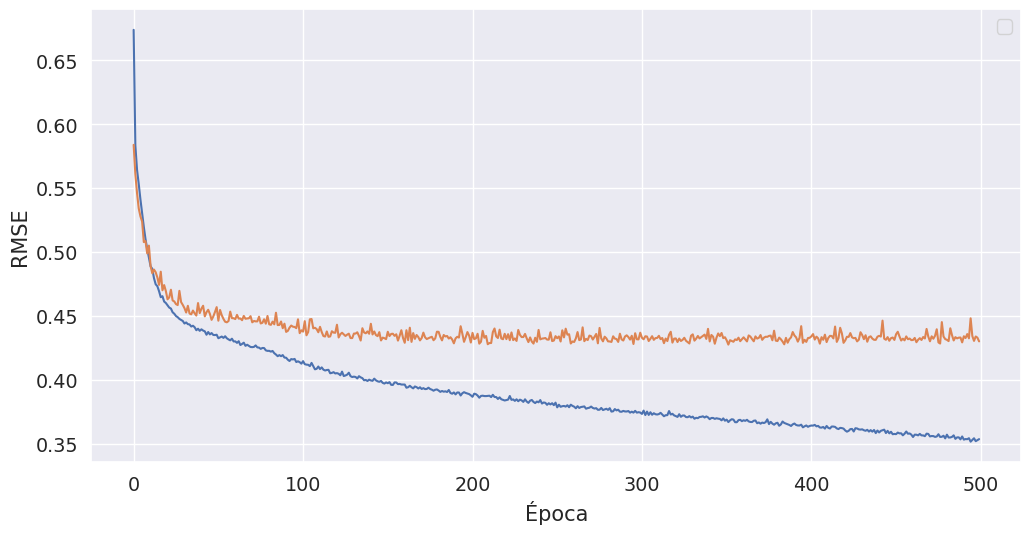

In [55]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Que pasa si agregamos muchas neuronas?

In [56]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(8,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

In [57]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=500,
    validation_data=(X_validation.values, y_validation.values),
)

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
  32/6000 [..............................] - ETA: 15s - loss: 0.9040

1632/6000 [=======>......................] - ETA: 0s - loss: 0.6582 

3328/6000 [===============>..............] - ETA: 0s - loss: 0.5433

5088/6000 [========================>.....] - ETA: 0s - loss: 0.7477

6000/6000 [==============================] - 0s 57us/step - loss: 0.6886 - val_loss: 0.3453


Epoch 2/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3939

1792/6000 [=======>......................] - ETA: 0s - loss: 0.3606

3552/6000 [================>.............] - ETA: 0s - loss: 0.3514

5248/6000 [=========================>....] - ETA: 0s - loss: 0.3392

6000/6000 [==============================] - 0s 41us/step - loss: 0.3303 - val_loss: 0.2965


Epoch 3/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4371

1856/6000 [========>.....................] - ETA: 0s - loss: 0.3035

3584/6000 [================>.............] - ETA: 0s - loss: 0.2831

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2810

6000/6000 [==============================] - 0s 41us/step - loss: 0.2844 - val_loss: 0.2607


Epoch 4/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1737

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2436

3520/6000 [================>.............] - ETA: 0s - loss: 0.2499

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2555

6000/6000 [==============================] - 0s 41us/step - loss: 0.2573 - val_loss: 0.2464


Epoch 5/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2682

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2265

3584/6000 [================>.............] - ETA: 0s - loss: 0.2535

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2613

6000/6000 [==============================] - 0s 41us/step - loss: 0.2595 - val_loss: 0.2377


Epoch 6/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2858

1856/6000 [========>.....................] - ETA: 0s - loss: 0.2194

3648/6000 [=================>............] - ETA: 0s - loss: 0.2299

5472/6000 [==========================>...] - ETA: 0s - loss: 0.2352

6000/6000 [==============================] - 0s 40us/step - loss: 0.2339 - val_loss: 0.2518


Epoch 7/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4368

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2354

3520/6000 [================>.............] - ETA: 0s - loss: 0.2402

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2450

6000/6000 [==============================] - 0s 41us/step - loss: 0.2416 - val_loss: 0.2308


Epoch 8/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2029

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2176

3520/6000 [================>.............] - ETA: 0s - loss: 0.2782

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2650

6000/6000 [==============================] - 0s 41us/step - loss: 0.2612 - val_loss: 0.2302


Epoch 9/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1901

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1956

3552/6000 [================>.............] - ETA: 0s - loss: 0.2230

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2882

6000/6000 [==============================] - 0s 41us/step - loss: 0.2820 - val_loss: 0.2388


Epoch 10/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1501

1728/6000 [=======>......................] - ETA: 0s - loss: 0.4867

3488/6000 [================>.............] - ETA: 0s - loss: 0.3501

5184/6000 [========================>.....] - ETA: 0s - loss: 0.3106

6000/6000 [==============================] - 0s 41us/step - loss: 0.2968 - val_loss: 0.2285


Epoch 11/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1865

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2250

3520/6000 [================>.............] - ETA: 0s - loss: 0.2413

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2414

6000/6000 [==============================] - 0s 41us/step - loss: 0.2377 - val_loss: 0.2216


Epoch 12/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1601

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2051

3520/6000 [================>.............] - ETA: 0s - loss: 0.2106

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2123

6000/6000 [==============================] - 0s 41us/step - loss: 0.2135 - val_loss: 0.2230


Epoch 13/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2751

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2090

3488/6000 [================>.............] - ETA: 0s - loss: 0.2131

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2096

6000/6000 [==============================] - 0s 41us/step - loss: 0.2081 - val_loss: 0.2230


Epoch 14/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3914

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1892

3488/6000 [================>.............] - ETA: 0s - loss: 0.2028

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2059

6000/6000 [==============================] - 0s 41us/step - loss: 0.2047 - val_loss: 0.2187


Epoch 15/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2709

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2142

3584/6000 [================>.............] - ETA: 0s - loss: 0.2068

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2017

6000/6000 [==============================] - 0s 40us/step - loss: 0.2017 - val_loss: 0.2168


Epoch 16/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2247

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2083

3552/6000 [================>.............] - ETA: 0s - loss: 0.2116

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2032

6000/6000 [==============================] - 0s 41us/step - loss: 0.2026 - val_loss: 0.2111


Epoch 17/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1551

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1962

3424/6000 [================>.............] - ETA: 0s - loss: 0.2053

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1989

6000/6000 [==============================] - 0s 41us/step - loss: 0.1984 - val_loss: 0.2204


Epoch 18/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1369

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1990

3616/6000 [=================>............] - ETA: 0s - loss: 0.2023

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2023

6000/6000 [==============================] - 0s 40us/step - loss: 0.2016 - val_loss: 0.2152


Epoch 19/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2114

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2280

3488/6000 [================>.............] - ETA: 0s - loss: 0.2165

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2090

6000/6000 [==============================] - 0s 41us/step - loss: 0.2067 - val_loss: 0.2181


Epoch 20/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1839

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2128

3424/6000 [================>.............] - ETA: 0s - loss: 0.2075

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2023

6000/6000 [==============================] - 0s 41us/step - loss: 0.2040 - val_loss: 0.2193


Epoch 21/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2164

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2657

3520/6000 [================>.............] - ETA: 0s - loss: 0.2238

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2159

6000/6000 [==============================] - 0s 41us/step - loss: 0.2144 - val_loss: 0.2069


Epoch 22/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2869

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1846

3552/6000 [================>.............] - ETA: 0s - loss: 0.2412

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2291

6000/6000 [==============================] - 0s 41us/step - loss: 0.2251 - val_loss: 0.2074


Epoch 23/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3034

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2702

3584/6000 [================>.............] - ETA: 0s - loss: 0.2362

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2199

6000/6000 [==============================] - 0s 41us/step - loss: 0.2197 - val_loss: 0.2024


Epoch 24/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1372

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2068

3424/6000 [================>.............] - ETA: 0s - loss: 0.2055

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2021

6000/6000 [==============================] - 0s 42us/step - loss: 0.1971 - val_loss: 0.2038


Epoch 25/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1412

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2064

3584/6000 [================>.............] - ETA: 0s - loss: 0.2053

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1977

6000/6000 [==============================] - 0s 40us/step - loss: 0.1966 - val_loss: 0.2051


Epoch 26/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1825

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1948

3584/6000 [================>.............] - ETA: 0s - loss: 0.2053

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1908

6000/6000 [==============================] - 0s 41us/step - loss: 0.1913 - val_loss: 0.2040


Epoch 27/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1935

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1756

3552/6000 [================>.............] - ETA: 0s - loss: 0.1887

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1926

6000/6000 [==============================] - 0s 41us/step - loss: 0.1896 - val_loss: 0.1995


Epoch 28/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2144

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1764

3520/6000 [================>.............] - ETA: 0s - loss: 0.1852

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1855

6000/6000 [==============================] - 0s 41us/step - loss: 0.1939 - val_loss: 0.2006


Epoch 29/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2364

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1801

3520/6000 [================>.............] - ETA: 0s - loss: 0.1898

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1899

6000/6000 [==============================] - 0s 40us/step - loss: 0.1877 - val_loss: 0.2021


Epoch 30/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1974

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2030

3552/6000 [================>.............] - ETA: 0s - loss: 0.1885

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1893

6000/6000 [==============================] - 0s 41us/step - loss: 0.1863 - val_loss: 0.2033


Epoch 31/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4115

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1975

3552/6000 [================>.............] - ETA: 0s - loss: 0.1898

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1830

6000/6000 [==============================] - 0s 41us/step - loss: 0.1844 - val_loss: 0.2020


Epoch 32/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1160

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1715

3616/6000 [=================>............] - ETA: 0s - loss: 0.1744

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1810

6000/6000 [==============================] - 0s 40us/step - loss: 0.1817 - val_loss: 0.2060


Epoch 33/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2154

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1637

3616/6000 [=================>............] - ETA: 0s - loss: 0.1732

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1826

6000/6000 [==============================] - 0s 40us/step - loss: 0.1829 - val_loss: 0.1984


Epoch 34/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3307

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1871

3616/6000 [=================>............] - ETA: 0s - loss: 0.1758

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1789

6000/6000 [==============================] - 0s 40us/step - loss: 0.1828 - val_loss: 0.1967


Epoch 35/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1846

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1619

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1696

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1717

6000/6000 [==============================] - 0s 42us/step - loss: 0.1789 - val_loss: 0.2031


Epoch 36/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2364

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1943

3488/6000 [================>.............] - ETA: 0s - loss: 0.1899

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1833

6000/6000 [==============================] - 0s 41us/step - loss: 0.1816 - val_loss: 0.1986


Epoch 37/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1383

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1830

3552/6000 [================>.............] - ETA: 0s - loss: 0.1807

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1852

6000/6000 [==============================] - 0s 40us/step - loss: 0.1804 - val_loss: 0.2082


Epoch 38/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3585

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1711

3552/6000 [================>.............] - ETA: 0s - loss: 0.1712

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1759

6000/6000 [==============================] - 0s 40us/step - loss: 0.1765 - val_loss: 0.1943


Epoch 39/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0947

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1850

3584/6000 [================>.............] - ETA: 0s - loss: 0.1729

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1747

6000/6000 [==============================] - 0s 41us/step - loss: 0.1744 - val_loss: 0.1945


Epoch 40/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4450

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1719

3552/6000 [================>.............] - ETA: 0s - loss: 0.1769

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1746

6000/6000 [==============================] - 0s 41us/step - loss: 0.1749 - val_loss: 0.2019


Epoch 41/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1457

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1723

3552/6000 [================>.............] - ETA: 0s - loss: 0.1785

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1774

6000/6000 [==============================] - 0s 41us/step - loss: 0.1774 - val_loss: 0.1964


Epoch 42/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1385

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1556

3520/6000 [================>.............] - ETA: 0s - loss: 0.1667

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1749

6000/6000 [==============================] - 0s 40us/step - loss: 0.1761 - val_loss: 0.1934


Epoch 43/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1822

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1741

3488/6000 [================>.............] - ETA: 0s - loss: 0.1753

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1758

6000/6000 [==============================] - 0s 41us/step - loss: 0.1742 - val_loss: 0.1977


Epoch 44/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3720

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1748

3520/6000 [================>.............] - ETA: 0s - loss: 0.1781

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1733

6000/6000 [==============================] - 0s 42us/step - loss: 0.1748 - val_loss: 0.1970


Epoch 45/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1963

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1878

3488/6000 [================>.............] - ETA: 0s - loss: 0.1772

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1730

6000/6000 [==============================] - 0s 41us/step - loss: 0.1733 - val_loss: 0.1943


Epoch 46/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1036

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1670

3552/6000 [================>.............] - ETA: 0s - loss: 0.1714

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1727

6000/6000 [==============================] - 0s 40us/step - loss: 0.1707 - val_loss: 0.1971


Epoch 47/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3964

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1496

3552/6000 [================>.............] - ETA: 0s - loss: 0.1756

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1716

6000/6000 [==============================] - 0s 41us/step - loss: 0.1706 - val_loss: 0.1950


Epoch 48/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0764

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1641

3552/6000 [================>.............] - ETA: 0s - loss: 0.1637

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1641

6000/6000 [==============================] - 0s 41us/step - loss: 0.1680 - val_loss: 0.1930


Epoch 49/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0957

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1555

3456/6000 [================>.............] - ETA: 0s - loss: 0.1592

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1668

6000/6000 [==============================] - 0s 41us/step - loss: 0.1680 - val_loss: 0.2032


Epoch 50/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0719

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1684

3488/6000 [================>.............] - ETA: 0s - loss: 0.1661

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1666

6000/6000 [==============================] - 0s 42us/step - loss: 0.1686 - val_loss: 0.1940


Epoch 51/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2344

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1693

3520/6000 [================>.............] - ETA: 0s - loss: 0.1693

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1667

6000/6000 [==============================] - 0s 41us/step - loss: 0.1684 - val_loss: 0.1983


Epoch 52/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1698

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1656

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1570

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1604

6000/6000 [==============================] - 0s 43us/step - loss: 0.1661 - val_loss: 0.2016


Epoch 53/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4036

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1745

3488/6000 [================>.............] - ETA: 0s - loss: 0.1670

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1663

6000/6000 [==============================] - 0s 41us/step - loss: 0.1628 - val_loss: 0.1939


Epoch 54/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2731

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1768

3520/6000 [================>.............] - ETA: 0s - loss: 0.1658

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1627

6000/6000 [==============================] - 0s 42us/step - loss: 0.1650 - val_loss: 0.1887


Epoch 55/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1215

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1542

3552/6000 [================>.............] - ETA: 0s - loss: 0.1544

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1630

6000/6000 [==============================] - 0s 41us/step - loss: 0.1632 - val_loss: 0.1952


Epoch 56/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1439

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1612

3456/6000 [================>.............] - ETA: 0s - loss: 0.1636

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1656

6000/6000 [==============================] - 0s 41us/step - loss: 0.1629 - val_loss: 0.1995


Epoch 57/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0975

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1522

3264/6000 [===============>..............] - ETA: 0s - loss: 0.1564

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1549

6000/6000 [==============================] - 0s 42us/step - loss: 0.1611 - val_loss: 0.1931


Epoch 58/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1805

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1535

3488/6000 [================>.............] - ETA: 0s - loss: 0.1534

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1587

6000/6000 [==============================] - 0s 41us/step - loss: 0.1641 - val_loss: 0.2258


Epoch 59/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2209

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1593

3552/6000 [================>.............] - ETA: 0s - loss: 0.1597

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1609

6000/6000 [==============================] - 0s 42us/step - loss: 0.1604 - val_loss: 0.1889


Epoch 60/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0755

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1480

3520/6000 [================>.............] - ETA: 0s - loss: 0.1537

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1573

6000/6000 [==============================] - 0s 41us/step - loss: 0.1575 - val_loss: 0.1977


Epoch 61/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1436

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1691

3456/6000 [================>.............] - ETA: 0s - loss: 0.1599

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1613

6000/6000 [==============================] - 0s 41us/step - loss: 0.1586 - val_loss: 0.1956


Epoch 62/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0894

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1574

3488/6000 [================>.............] - ETA: 0s - loss: 0.1656

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1607

6000/6000 [==============================] - 0s 41us/step - loss: 0.1606 - val_loss: 0.1893


Epoch 63/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0944

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1499

3456/6000 [================>.............] - ETA: 0s - loss: 0.1592

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1579

6000/6000 [==============================] - 0s 41us/step - loss: 0.1577 - val_loss: 0.1888


Epoch 64/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1082

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1593

3456/6000 [================>.............] - ETA: 0s - loss: 0.1588

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1570

6000/6000 [==============================] - 0s 42us/step - loss: 0.1596 - val_loss: 0.1916


Epoch 65/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4635

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1606

3424/6000 [================>.............] - ETA: 0s - loss: 0.1583

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1562

6000/6000 [==============================] - 0s 42us/step - loss: 0.1553 - val_loss: 0.1929


Epoch 66/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1201

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1493

3424/6000 [================>.............] - ETA: 0s - loss: 0.1648

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1640

6000/6000 [==============================] - 0s 42us/step - loss: 0.1625 - val_loss: 0.1902


Epoch 67/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0830

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1605

3488/6000 [================>.............] - ETA: 0s - loss: 0.1575

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1560

6000/6000 [==============================] - 0s 41us/step - loss: 0.1560 - val_loss: 0.1839


Epoch 68/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1002

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1558

3520/6000 [================>.............] - ETA: 0s - loss: 0.1558

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1571

6000/6000 [==============================] - 0s 41us/step - loss: 0.1553 - val_loss: 0.1865


Epoch 69/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0761

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1454

3232/6000 [===============>..............] - ETA: 0s - loss: 0.1489

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1527

6000/6000 [==============================] - 0s 43us/step - loss: 0.1553 - val_loss: 0.1989


Epoch 70/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0976

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1568

3520/6000 [================>.............] - ETA: 0s - loss: 0.1533

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1549

6000/6000 [==============================] - 0s 41us/step - loss: 0.1541 - val_loss: 0.1855


Epoch 71/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1299

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1458

3520/6000 [================>.............] - ETA: 0s - loss: 0.1501

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1565

6000/6000 [==============================] - 0s 41us/step - loss: 0.1543 - val_loss: 0.1845


Epoch 72/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1346

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1668

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1595

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1541

6000/6000 [==============================] - 0s 42us/step - loss: 0.1547 - val_loss: 0.1870


Epoch 73/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0622

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1469

3520/6000 [================>.............] - ETA: 0s - loss: 0.1469

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1469

6000/6000 [==============================] - 0s 41us/step - loss: 0.1518 - val_loss: 0.1867


Epoch 74/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1204

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1539

3584/6000 [================>.............] - ETA: 0s - loss: 0.1549

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1545

6000/6000 [==============================] - 0s 41us/step - loss: 0.1508 - val_loss: 0.1883


Epoch 75/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1264

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1645

3520/6000 [================>.............] - ETA: 0s - loss: 0.1555

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1520

6000/6000 [==============================] - 0s 41us/step - loss: 0.1517 - val_loss: 0.1836


Epoch 76/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1586

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1527

3520/6000 [================>.............] - ETA: 0s - loss: 0.1469

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1465

6000/6000 [==============================] - 0s 41us/step - loss: 0.1484 - val_loss: 0.1927


Epoch 77/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1304

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1492

3552/6000 [================>.............] - ETA: 0s - loss: 0.1490

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1491

6000/6000 [==============================] - 0s 41us/step - loss: 0.1505 - val_loss: 0.1861


Epoch 78/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1467

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1384

3520/6000 [================>.............] - ETA: 0s - loss: 0.1496

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1509

6000/6000 [==============================] - 0s 41us/step - loss: 0.1502 - val_loss: 0.1901


Epoch 79/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1216

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1490

3552/6000 [================>.............] - ETA: 0s - loss: 0.1483

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1469

6000/6000 [==============================] - 0s 41us/step - loss: 0.1478 - val_loss: 0.1858


Epoch 80/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0755

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1587

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1465

4960/6000 [=======================>......] - ETA: 0s - loss: 0.1487

6000/6000 [==============================] - 0s 42us/step - loss: 0.1474 - val_loss: 0.1895


Epoch 81/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1287

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1374

3552/6000 [================>.............] - ETA: 0s - loss: 0.1473

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1482

6000/6000 [==============================] - 0s 41us/step - loss: 0.1482 - val_loss: 0.1903


Epoch 82/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2030

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1321

3424/6000 [================>.............] - ETA: 0s - loss: 0.1486

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1477

6000/6000 [==============================] - 0s 42us/step - loss: 0.1471 - val_loss: 0.1854


Epoch 83/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1535

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1496

3520/6000 [================>.............] - ETA: 0s - loss: 0.1382

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1420

6000/6000 [==============================] - 0s 41us/step - loss: 0.1451 - val_loss: 0.2011


Epoch 84/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1379

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1442

3616/6000 [=================>............] - ETA: 0s - loss: 0.1428

5408/6000 [==========================>...] - ETA: 0s - loss: 0.1486

6000/6000 [==============================] - 0s 40us/step - loss: 0.1473 - val_loss: 0.1893


Epoch 85/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1283

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1346

3520/6000 [================>.............] - ETA: 0s - loss: 0.1387

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1418

6000/6000 [==============================] - 0s 41us/step - loss: 0.1447 - val_loss: 0.1889


Epoch 86/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0595

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1499

3520/6000 [================>.............] - ETA: 0s - loss: 0.1460

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1437

6000/6000 [==============================] - 0s 41us/step - loss: 0.1436 - val_loss: 0.1873


Epoch 87/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1735

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1489

3520/6000 [================>.............] - ETA: 0s - loss: 0.1434

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1425

6000/6000 [==============================] - 0s 41us/step - loss: 0.1430 - val_loss: 0.1909


Epoch 88/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1258

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1486

3424/6000 [================>.............] - ETA: 0s - loss: 0.1340

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1405

6000/6000 [==============================] - 0s 42us/step - loss: 0.1410 - val_loss: 0.1966


Epoch 89/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1653

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1361

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1352

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1361

6000/6000 [==============================] - 0s 44us/step - loss: 0.1425 - val_loss: 0.1876


Epoch 90/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1475

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1380

3456/6000 [================>.............] - ETA: 0s - loss: 0.1452

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1423

6000/6000 [==============================] - 0s 42us/step - loss: 0.1425 - val_loss: 0.1972


Epoch 91/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1058

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1540

3488/6000 [================>.............] - ETA: 0s - loss: 0.1463

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1436

6000/6000 [==============================] - 0s 41us/step - loss: 0.1437 - val_loss: 0.1880


Epoch 92/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1301

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1456

3520/6000 [================>.............] - ETA: 0s - loss: 0.1360

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1401

6000/6000 [==============================] - 0s 41us/step - loss: 0.1406 - val_loss: 0.1868


Epoch 93/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1344

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1140

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1224

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1341

6000/6000 [==============================] - 0s 42us/step - loss: 0.1392 - val_loss: 0.1967


Epoch 94/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1720

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1420

3520/6000 [================>.............] - ETA: 0s - loss: 0.1404

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1395

6000/6000 [==============================] - 0s 42us/step - loss: 0.1403 - val_loss: 0.1914


Epoch 95/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1405

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1362

3616/6000 [=================>............] - ETA: 0s - loss: 0.1322

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1368

6000/6000 [==============================] - 0s 41us/step - loss: 0.1389 - val_loss: 0.1836


Epoch 96/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0926

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1376

3520/6000 [================>.............] - ETA: 0s - loss: 0.1424

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1439

6000/6000 [==============================] - 0s 41us/step - loss: 0.1403 - val_loss: 0.1885


Epoch 97/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1116

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1401

3488/6000 [================>.............] - ETA: 0s - loss: 0.1434

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1404

6000/6000 [==============================] - 0s 41us/step - loss: 0.1403 - val_loss: 0.1906


Epoch 98/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1206

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1184

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1252

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1335

6000/6000 [==============================] - 0s 42us/step - loss: 0.1376 - val_loss: 0.1888


Epoch 99/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2258

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1572

3552/6000 [================>.............] - ETA: 0s - loss: 0.1354

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1390

6000/6000 [==============================] - 0s 41us/step - loss: 0.1398 - val_loss: 0.1924


Epoch 100/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1324

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1442

3456/6000 [================>.............] - ETA: 0s - loss: 0.1371

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1388

6000/6000 [==============================] - 0s 41us/step - loss: 0.1373 - val_loss: 0.1914


Epoch 101/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1169

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1365

3520/6000 [================>.............] - ETA: 0s - loss: 0.1366

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1423

6000/6000 [==============================] - 0s 41us/step - loss: 0.1410 - val_loss: 0.1915


Epoch 102/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1066

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1403

3520/6000 [================>.............] - ETA: 0s - loss: 0.1406

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1427

6000/6000 [==============================] - 0s 41us/step - loss: 0.1400 - val_loss: 0.1873


Epoch 103/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0711

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1334

3424/6000 [================>.............] - ETA: 0s - loss: 0.1405

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1403

6000/6000 [==============================] - 0s 42us/step - loss: 0.1394 - val_loss: 0.1874


Epoch 104/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3867

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1322

3552/6000 [================>.............] - ETA: 0s - loss: 0.1385

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1371

6000/6000 [==============================] - 0s 41us/step - loss: 0.1367 - val_loss: 0.1861


Epoch 105/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1363

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1269

3456/6000 [================>.............] - ETA: 0s - loss: 0.1348

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1362

6000/6000 [==============================] - 0s 41us/step - loss: 0.1361 - val_loss: 0.1876


Epoch 106/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1707

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1227

3520/6000 [================>.............] - ETA: 0s - loss: 0.1306

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1319

6000/6000 [==============================] - 0s 41us/step - loss: 0.1343 - val_loss: 0.1925


Epoch 107/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1419

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1407

3552/6000 [================>.............] - ETA: 0s - loss: 0.1424

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1372

6000/6000 [==============================] - 0s 41us/step - loss: 0.1362 - val_loss: 0.1946


Epoch 108/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0975

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1163

3552/6000 [================>.............] - ETA: 0s - loss: 0.1305

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1333

6000/6000 [==============================] - 0s 40us/step - loss: 0.1338 - val_loss: 0.1908


Epoch 109/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0895

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1243

3520/6000 [================>.............] - ETA: 0s - loss: 0.1296

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1356

6000/6000 [==============================] - 0s 41us/step - loss: 0.1346 - val_loss: 0.1882


Epoch 110/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0781

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1286

3520/6000 [================>.............] - ETA: 0s - loss: 0.1334

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1331

6000/6000 [==============================] - 0s 41us/step - loss: 0.1340 - val_loss: 0.1964


Epoch 111/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1341

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1221

3488/6000 [================>.............] - ETA: 0s - loss: 0.1312

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1347

6000/6000 [==============================] - 0s 41us/step - loss: 0.1339 - val_loss: 0.1881


Epoch 112/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1125

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1384

3552/6000 [================>.............] - ETA: 0s - loss: 0.1301

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1313

6000/6000 [==============================] - 0s 41us/step - loss: 0.1315 - val_loss: 0.1883


Epoch 113/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0855

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1203

3456/6000 [================>.............] - ETA: 0s - loss: 0.1236

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1332

6000/6000 [==============================] - 0s 41us/step - loss: 0.1332 - val_loss: 0.1887


Epoch 114/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1160

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1262

3520/6000 [================>.............] - ETA: 0s - loss: 0.1317

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1362

6000/6000 [==============================] - 0s 41us/step - loss: 0.1320 - val_loss: 0.1884


Epoch 115/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1636

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1227

3456/6000 [================>.............] - ETA: 0s - loss: 0.1227

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1269

6000/6000 [==============================] - 0s 41us/step - loss: 0.1296 - val_loss: 0.1849


Epoch 116/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3309

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1174

3456/6000 [================>.............] - ETA: 0s - loss: 0.1282

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1315

6000/6000 [==============================] - 0s 42us/step - loss: 0.1329 - val_loss: 0.1979


Epoch 117/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1040

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1233

3456/6000 [================>.............] - ETA: 0s - loss: 0.1294

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1293



6000/6000 [==============================] - 0s 42us/step - loss: 0.1318 - val_loss: 0.2006


Epoch 118/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1191

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1247

3584/6000 [================>.............] - ETA: 0s - loss: 0.1285

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1307

6000/6000 [==============================] - 0s 40us/step - loss: 0.1311 - val_loss: 0.1925


Epoch 119/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0861

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1334

3552/6000 [================>.............] - ETA: 0s - loss: 0.1358

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1345

6000/6000 [==============================] - 0s 41us/step - loss: 0.1307 - val_loss: 0.1951


Epoch 120/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1728

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1226

3552/6000 [================>.............] - ETA: 0s - loss: 0.1261

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1285

6000/6000 [==============================] - 0s 41us/step - loss: 0.1306 - val_loss: 0.1964


Epoch 121/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0791

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1272

3456/6000 [================>.............] - ETA: 0s - loss: 0.1335

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1337

6000/6000 [==============================] - 0s 41us/step - loss: 0.1337 - val_loss: 0.1927


Epoch 122/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2074

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1253

3520/6000 [================>.............] - ETA: 0s - loss: 0.1249

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1298

6000/6000 [==============================] - 0s 41us/step - loss: 0.1316 - val_loss: 0.1874


Epoch 123/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0726

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1113

3424/6000 [================>.............] - ETA: 0s - loss: 0.1206

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1263

6000/6000 [==============================] - 0s 42us/step - loss: 0.1282 - val_loss: 0.1902


Epoch 124/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1002

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1136

3520/6000 [================>.............] - ETA: 0s - loss: 0.1247

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1264

6000/6000 [==============================] - 0s 41us/step - loss: 0.1275 - val_loss: 0.1967


Epoch 125/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1458

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1299

3552/6000 [================>.............] - ETA: 0s - loss: 0.1310

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1292

6000/6000 [==============================] - 0s 41us/step - loss: 0.1290 - val_loss: 0.1940


Epoch 126/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1565

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1235

3552/6000 [================>.............] - ETA: 0s - loss: 0.1297

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1291

6000/6000 [==============================] - 0s 41us/step - loss: 0.1276 - val_loss: 0.1899


Epoch 127/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0879

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1184

3552/6000 [================>.............] - ETA: 0s - loss: 0.1266

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1276

6000/6000 [==============================] - 0s 41us/step - loss: 0.1280 - val_loss: 0.1875


Epoch 128/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0851

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1271

3584/6000 [================>.............] - ETA: 0s - loss: 0.1263

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1232

6000/6000 [==============================] - 0s 40us/step - loss: 0.1255 - val_loss: 0.1912


Epoch 129/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0941

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1204

3552/6000 [================>.............] - ETA: 0s - loss: 0.1207

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1240

6000/6000 [==============================] - 0s 41us/step - loss: 0.1268 - val_loss: 0.1920


Epoch 130/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1596

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1182

3552/6000 [================>.............] - ETA: 0s - loss: 0.1224

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1235

6000/6000 [==============================] - 0s 41us/step - loss: 0.1252 - val_loss: 0.1927


Epoch 131/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2453

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1183

3424/6000 [================>.............] - ETA: 0s - loss: 0.1259

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1240

6000/6000 [==============================] - 0s 42us/step - loss: 0.1252 - val_loss: 0.1906


Epoch 132/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1177

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1288

3520/6000 [================>.............] - ETA: 0s - loss: 0.1287

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1234

6000/6000 [==============================] - 0s 41us/step - loss: 0.1251 - val_loss: 0.1939


Epoch 133/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0980

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1242

3456/6000 [================>.............] - ETA: 0s - loss: 0.1237

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1243

6000/6000 [==============================] - 0s 42us/step - loss: 0.1247 - val_loss: 0.1898


Epoch 134/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0997

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1227

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1210

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1247

6000/6000 [==============================] - 0s 43us/step - loss: 0.1248 - val_loss: 0.1922


Epoch 135/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1313

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1391

3168/6000 [==============>...............] - ETA: 0s - loss: 0.1231

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1230

6000/6000 [==============================] - 0s 43us/step - loss: 0.1245 - val_loss: 0.2012


Epoch 136/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0965

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1230

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1229

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1268

6000/6000 [==============================] - 0s 43us/step - loss: 0.1272 - val_loss: 0.1957


Epoch 137/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0646

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1229

3360/6000 [===============>..............] - ETA: 0s - loss: 0.1260

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1268

6000/6000 [==============================] - 0s 42us/step - loss: 0.1270 - val_loss: 0.1913


Epoch 138/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0931

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1259

3424/6000 [================>.............] - ETA: 0s - loss: 0.1219

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1220

6000/6000 [==============================] - 0s 42us/step - loss: 0.1229 - val_loss: 0.1874


Epoch 139/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0675

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1113

3488/6000 [================>.............] - ETA: 0s - loss: 0.1186

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1222

6000/6000 [==============================] - 0s 41us/step - loss: 0.1218 - val_loss: 0.1939


Epoch 140/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2126

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1223

3488/6000 [================>.............] - ETA: 0s - loss: 0.1238

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1243

6000/6000 [==============================] - 0s 41us/step - loss: 0.1232 - val_loss: 0.1925


Epoch 141/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0722

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1325

3424/6000 [================>.............] - ETA: 0s - loss: 0.1300

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1255

6000/6000 [==============================] - 0s 42us/step - loss: 0.1242 - val_loss: 0.1939


Epoch 142/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1258

1664/6000 [=======>......................] - ETA: 0s - loss: 0.1169

3424/6000 [================>.............] - ETA: 0s - loss: 0.1250

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1236

6000/6000 [==============================] - 0s 41us/step - loss: 0.1216 - val_loss: 0.1967


Epoch 143/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0650

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1073

3456/6000 [================>.............] - ETA: 0s - loss: 0.1227

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1214

6000/6000 [==============================] - 0s 42us/step - loss: 0.1217 - val_loss: 0.1923


Epoch 144/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1103

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1265

3584/6000 [================>.............] - ETA: 0s - loss: 0.1210

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1185

6000/6000 [==============================] - 0s 41us/step - loss: 0.1202 - val_loss: 0.1965


Epoch 145/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1271

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1256

3520/6000 [================>.............] - ETA: 0s - loss: 0.1187

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1204

6000/6000 [==============================] - 0s 41us/step - loss: 0.1226 - val_loss: 0.1976


Epoch 146/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1120

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1251

3552/6000 [================>.............] - ETA: 0s - loss: 0.1223

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1212

6000/6000 [==============================] - 0s 40us/step - loss: 0.1204 - val_loss: 0.1926


Epoch 147/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1684

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1125

3456/6000 [================>.............] - ETA: 0s - loss: 0.1198

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1187

6000/6000 [==============================] - 0s 41us/step - loss: 0.1209 - val_loss: 0.2031


Epoch 148/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1366

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1138

3552/6000 [================>.............] - ETA: 0s - loss: 0.1159

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1208

6000/6000 [==============================] - 0s 41us/step - loss: 0.1202 - val_loss: 0.1932


Epoch 149/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0568

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1181

3424/6000 [================>.............] - ETA: 0s - loss: 0.1234

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1234

6000/6000 [==============================] - 0s 41us/step - loss: 0.1203 - val_loss: 0.1945


Epoch 150/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0817

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1180

3552/6000 [================>.............] - ETA: 0s - loss: 0.1145

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1161

6000/6000 [==============================] - 0s 41us/step - loss: 0.1196 - val_loss: 0.1976


Epoch 151/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1421

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1172

3456/6000 [================>.............] - ETA: 0s - loss: 0.1181

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1186

6000/6000 [==============================] - 0s 41us/step - loss: 0.1191 - val_loss: 0.2012


Epoch 152/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0927

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1154

3552/6000 [================>.............] - ETA: 0s - loss: 0.1111

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1209

6000/6000 [==============================] - 0s 41us/step - loss: 0.1193 - val_loss: 0.1948


Epoch 153/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0688

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1232

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1210

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1201

6000/6000 [==============================] - 0s 41us/step - loss: 0.1202 - val_loss: 0.1924


Epoch 154/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1757

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1246

3488/6000 [================>.............] - ETA: 0s - loss: 0.1180

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1170

6000/6000 [==============================] - 0s 41us/step - loss: 0.1169 - val_loss: 0.1883


Epoch 155/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1386

1632/6000 [=======>......................] - ETA: 0s - loss: 0.1004

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1113

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1136

6000/6000 [==============================] - 0s 42us/step - loss: 0.1177 - val_loss: 0.1945


Epoch 156/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0975

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1093

3520/6000 [================>.............] - ETA: 0s - loss: 0.1181

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1154

6000/6000 [==============================] - 0s 41us/step - loss: 0.1171 - val_loss: 0.2019


Epoch 157/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0822

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1162

3520/6000 [================>.............] - ETA: 0s - loss: 0.1161

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1148

6000/6000 [==============================] - 0s 41us/step - loss: 0.1170 - val_loss: 0.1963


Epoch 158/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2566

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1234

3520/6000 [================>.............] - ETA: 0s - loss: 0.1217

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1191

6000/6000 [==============================] - 0s 41us/step - loss: 0.1176 - val_loss: 0.1946


Epoch 159/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0518

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1079

3456/6000 [================>.............] - ETA: 0s - loss: 0.1146

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1164

6000/6000 [==============================] - 0s 41us/step - loss: 0.1164 - val_loss: 0.1992


Epoch 160/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1027

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1107

3200/6000 [===============>..............] - ETA: 0s - loss: 0.1137

4896/6000 [=======================>......] - ETA: 0s - loss: 0.1195

6000/6000 [==============================] - 0s 44us/step - loss: 0.1175 - val_loss: 0.1999


Epoch 161/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0553

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1121

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1149

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1179

6000/6000 [==============================] - 0s 43us/step - loss: 0.1176 - val_loss: 0.2042


Epoch 162/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1206

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1065

3424/6000 [================>.............] - ETA: 0s - loss: 0.1179

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1181

6000/6000 [==============================] - 0s 42us/step - loss: 0.1182 - val_loss: 0.1998


Epoch 163/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0728

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1275

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1207

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1207

6000/6000 [==============================] - 0s 42us/step - loss: 0.1214 - val_loss: 0.2002


Epoch 164/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0758

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1170

3488/6000 [================>.............] - ETA: 0s - loss: 0.1134

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1143

6000/6000 [==============================] - 0s 41us/step - loss: 0.1150 - val_loss: 0.1964


Epoch 165/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1315

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1117

3520/6000 [================>.............] - ETA: 0s - loss: 0.1097

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1131

6000/6000 [==============================] - 0s 41us/step - loss: 0.1159 - val_loss: 0.1981


Epoch 166/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1114

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1107

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1100

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1114

6000/6000 [==============================] - 0s 45us/step - loss: 0.1151 - val_loss: 0.1975


Epoch 167/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0693

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1150

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1097

5024/6000 [========================>.....] - ETA: 0s - loss: 0.1114

6000/6000 [==============================] - 0s 43us/step - loss: 0.1137 - val_loss: 0.2001


Epoch 168/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1057

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1092

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1125

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1152

6000/6000 [==============================] - 0s 43us/step - loss: 0.1135 - val_loss: 0.1976


Epoch 169/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1203

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1145

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1163

4800/6000 [=======================>......] - ETA: 0s - loss: 0.1143

6000/6000 [==============================] - 0s 44us/step - loss: 0.1149 - val_loss: 0.1990


Epoch 170/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1135

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1061

3424/6000 [================>.............] - ETA: 0s - loss: 0.1042

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1157

6000/6000 [==============================] - 0s 42us/step - loss: 0.1196 - val_loss: 0.2079


Epoch 171/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1618

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1078

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1133

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1135

6000/6000 [==============================] - 0s 42us/step - loss: 0.1174 - val_loss: 0.2009


Epoch 172/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0714

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1038

3520/6000 [================>.............] - ETA: 0s - loss: 0.1124

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1167

6000/6000 [==============================] - 0s 41us/step - loss: 0.1161 - val_loss: 0.1999


Epoch 173/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2159

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1135

3456/6000 [================>.............] - ETA: 0s - loss: 0.1168

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1134

6000/6000 [==============================] - 0s 42us/step - loss: 0.1120 - val_loss: 0.2033


Epoch 174/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1581

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1171

3392/6000 [===============>..............] - ETA: 0s - loss: 0.1099

5088/6000 [========================>.....] - ETA: 0s - loss: 0.1137

6000/6000 [==============================] - 0s 43us/step - loss: 0.1137 - val_loss: 0.2037


Epoch 175/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0637

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1149

3456/6000 [================>.............] - ETA: 0s - loss: 0.1240

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1228

6000/6000 [==============================] - 0s 41us/step - loss: 0.1230 - val_loss: 0.2006


Epoch 176/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1563

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1176

3456/6000 [================>.............] - ETA: 0s - loss: 0.1182

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1156

6000/6000 [==============================] - 0s 42us/step - loss: 0.1181 - val_loss: 0.1988


Epoch 177/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0775

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1466

3424/6000 [================>.............] - ETA: 0s - loss: 0.1298

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1223

6000/6000 [==============================] - 0s 42us/step - loss: 0.1194 - val_loss: 0.2044


Epoch 178/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0422

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1116

3328/6000 [===============>..............] - ETA: 0s - loss: 0.1101

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1102

6000/6000 [==============================] - 0s 43us/step - loss: 0.1109 - val_loss: 0.2042


Epoch 179/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1447

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1179

3456/6000 [================>.............] - ETA: 0s - loss: 0.1139

5120/6000 [========================>.....] - ETA: 0s - loss: 0.1098

6000/6000 [==============================] - 0s 42us/step - loss: 0.1113 - val_loss: 0.2013


Epoch 180/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0933

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1035

3520/6000 [================>.............] - ETA: 0s - loss: 0.1088

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1101

6000/6000 [==============================] - 0s 41us/step - loss: 0.1112 - val_loss: 0.2017


Epoch 181/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0504

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1019

3552/6000 [================>.............] - ETA: 0s - loss: 0.1079

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1114

6000/6000 [==============================] - 0s 41us/step - loss: 0.1115 - val_loss: 0.1924


Epoch 182/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1668

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1086

3456/6000 [================>.............] - ETA: 0s - loss: 0.1087

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1105

6000/6000 [==============================] - 0s 41us/step - loss: 0.1102 - val_loss: 0.1990


Epoch 183/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0464

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1060

3520/6000 [================>.............] - ETA: 0s - loss: 0.1026

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1068

6000/6000 [==============================] - 0s 41us/step - loss: 0.1086 - val_loss: 0.2001


Epoch 184/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1087

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0989

3488/6000 [================>.............] - ETA: 0s - loss: 0.1036

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1080

6000/6000 [==============================] - 0s 42us/step - loss: 0.1090 - val_loss: 0.2041


Epoch 185/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0626

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1043

3584/6000 [================>.............] - ETA: 0s - loss: 0.1045

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1081

6000/6000 [==============================] - 0s 40us/step - loss: 0.1099 - val_loss: 0.2061


Epoch 186/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1051

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1211

3584/6000 [================>.............] - ETA: 0s - loss: 0.1104

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1110

6000/6000 [==============================] - 0s 41us/step - loss: 0.1108 - val_loss: 0.1997


Epoch 187/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0602

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1170

3488/6000 [================>.............] - ETA: 0s - loss: 0.1181

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1114

6000/6000 [==============================] - 0s 41us/step - loss: 0.1102 - val_loss: 0.2000


Epoch 188/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1163

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1157

3552/6000 [================>.............] - ETA: 0s - loss: 0.1074

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1103

6000/6000 [==============================] - 0s 41us/step - loss: 0.1092 - val_loss: 0.2023


Epoch 189/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1316

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1052

3520/6000 [================>.............] - ETA: 0s - loss: 0.1018

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1043

6000/6000 [==============================] - 0s 41us/step - loss: 0.1064 - val_loss: 0.2053


Epoch 190/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0635

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1070

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1045

5056/6000 [========================>.....] - ETA: 0s - loss: 0.1119



6000/6000 [==============================] - 0s 42us/step - loss: 0.1097 - val_loss: 0.1984


Epoch 191/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0977

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1085

3552/6000 [================>.............] - ETA: 0s - loss: 0.1023

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1075

6000/6000 [==============================] - 0s 41us/step - loss: 0.1070 - val_loss: 0.2057


Epoch 192/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0723

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1134

3520/6000 [================>.............] - ETA: 0s - loss: 0.1104

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1097

6000/6000 [==============================] - 0s 41us/step - loss: 0.1087 - val_loss: 0.2028


Epoch 193/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0570

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0994

3488/6000 [================>.............] - ETA: 0s - loss: 0.1035

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1047

6000/6000 [==============================] - 0s 41us/step - loss: 0.1070 - val_loss: 0.2038


Epoch 194/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0844

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1084

3520/6000 [================>.............] - ETA: 0s - loss: 0.1076

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1073

6000/6000 [==============================] - 0s 41us/step - loss: 0.1080 - val_loss: 0.2136


Epoch 195/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1025

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1131

3488/6000 [================>.............] - ETA: 0s - loss: 0.1120

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1088

6000/6000 [==============================] - 0s 42us/step - loss: 0.1075 - val_loss: 0.1949


Epoch 196/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0573

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0976

3488/6000 [================>.............] - ETA: 0s - loss: 0.1043

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1082

6000/6000 [==============================] - 0s 41us/step - loss: 0.1078 - val_loss: 0.2099


Epoch 197/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2122

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1073

3520/6000 [================>.............] - ETA: 0s - loss: 0.1121

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1101

6000/6000 [==============================] - 0s 41us/step - loss: 0.1085 - val_loss: 0.2028


Epoch 198/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1062

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0950

3488/6000 [================>.............] - ETA: 0s - loss: 0.1010

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1036

6000/6000 [==============================] - 0s 41us/step - loss: 0.1049 - val_loss: 0.2031


Epoch 199/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1319

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1004

3520/6000 [================>.............] - ETA: 0s - loss: 0.1068

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1066

6000/6000 [==============================] - 0s 41us/step - loss: 0.1070 - val_loss: 0.2009


Epoch 200/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0623

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1015

3520/6000 [================>.............] - ETA: 0s - loss: 0.1110

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1076

6000/6000 [==============================] - 0s 41us/step - loss: 0.1072 - val_loss: 0.1981


Epoch 201/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2027

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1060

3424/6000 [================>.............] - ETA: 0s - loss: 0.1024

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1079

6000/6000 [==============================] - 0s 42us/step - loss: 0.1055 - val_loss: 0.2000


Epoch 202/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1102

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1094

3488/6000 [================>.............] - ETA: 0s - loss: 0.1047

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1071

6000/6000 [==============================] - 0s 42us/step - loss: 0.1061 - val_loss: 0.1991


Epoch 203/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0519

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0987

3424/6000 [================>.............] - ETA: 0s - loss: 0.1009

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1030

6000/6000 [==============================] - 0s 43us/step - loss: 0.1050 - val_loss: 0.2036


Epoch 204/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1283

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0963

3456/6000 [================>.............] - ETA: 0s - loss: 0.1035

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1063

6000/6000 [==============================] - 0s 41us/step - loss: 0.1047 - val_loss: 0.2024


Epoch 205/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0688

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0956

3488/6000 [================>.............] - ETA: 0s - loss: 0.1021

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1015

6000/6000 [==============================] - 0s 41us/step - loss: 0.1050 - val_loss: 0.1977


Epoch 206/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0639

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1013

3456/6000 [================>.............] - ETA: 0s - loss: 0.1081

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1040

6000/6000 [==============================] - 0s 41us/step - loss: 0.1046 - val_loss: 0.2018


Epoch 207/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1993

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1044

3488/6000 [================>.............] - ETA: 0s - loss: 0.1019

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1042

6000/6000 [==============================] - 0s 42us/step - loss: 0.1040 - val_loss: 0.2012


Epoch 208/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1239

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0993

3456/6000 [================>.............] - ETA: 0s - loss: 0.0995

5152/6000 [========================>.....] - ETA: 0s - loss: 0.1030

6000/6000 [==============================] - 0s 41us/step - loss: 0.1050 - val_loss: 0.2077


Epoch 209/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0489

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0914

3456/6000 [================>.............] - ETA: 0s - loss: 0.1009

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1044

6000/6000 [==============================] - 0s 41us/step - loss: 0.1056 - val_loss: 0.2075


Epoch 210/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0909

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0981

3552/6000 [================>.............] - ETA: 0s - loss: 0.1000

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1040

6000/6000 [==============================] - 0s 41us/step - loss: 0.1045 - val_loss: 0.2004


Epoch 211/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0656

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0925

3488/6000 [================>.............] - ETA: 0s - loss: 0.1006

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1016

6000/6000 [==============================] - 0s 42us/step - loss: 0.1033 - val_loss: 0.1994


Epoch 212/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1041

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0987

3296/6000 [===============>..............] - ETA: 0s - loss: 0.1018

4992/6000 [=======================>......] - ETA: 0s - loss: 0.1003

6000/6000 [==============================] - 0s 42us/step - loss: 0.1028 - val_loss: 0.2009


Epoch 213/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0558

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0877

3520/6000 [================>.............] - ETA: 0s - loss: 0.1006

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1008

6000/6000 [==============================] - 0s 41us/step - loss: 0.1023 - val_loss: 0.2104


Epoch 214/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0635

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1097

3456/6000 [================>.............] - ETA: 0s - loss: 0.1002

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1002

6000/6000 [==============================] - 0s 41us/step - loss: 0.1026 - val_loss: 0.2117


Epoch 215/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0509

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1044

3552/6000 [================>.............] - ETA: 0s - loss: 0.1023

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1022

6000/6000 [==============================] - 0s 41us/step - loss: 0.1016 - val_loss: 0.2064


Epoch 216/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1093

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0919

3584/6000 [================>.............] - ETA: 0s - loss: 0.1013

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1016

6000/6000 [==============================] - 0s 40us/step - loss: 0.1019 - val_loss: 0.1970


Epoch 217/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1052

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1036

3488/6000 [================>.............] - ETA: 0s - loss: 0.1052

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1073

6000/6000 [==============================] - 0s 41us/step - loss: 0.1054 - val_loss: 0.2023


Epoch 218/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1671

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1034

3552/6000 [================>.............] - ETA: 0s - loss: 0.2158

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1753

6000/6000 [==============================] - 0s 40us/step - loss: 0.1692 - val_loss: 0.2064


Epoch 219/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1168

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0965

3488/6000 [================>.............] - ETA: 0s - loss: 0.1019

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1121

6000/6000 [==============================] - 0s 41us/step - loss: 0.1121 - val_loss: 0.2094


Epoch 220/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1412

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1017

3424/6000 [================>.............] - ETA: 0s - loss: 0.1040

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1039

6000/6000 [==============================] - 0s 41us/step - loss: 0.1028 - val_loss: 0.2073


Epoch 221/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1115

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0956

3584/6000 [================>.............] - ETA: 0s - loss: 0.1027

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1019

6000/6000 [==============================] - 0s 41us/step - loss: 0.1000 - val_loss: 0.2044


Epoch 222/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3129

1824/6000 [========>.....................] - ETA: 0s - loss: 0.1077

3488/6000 [================>.............] - ETA: 0s - loss: 0.1042

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1040

6000/6000 [==============================] - 0s 41us/step - loss: 0.1005 - val_loss: 0.1999


Epoch 223/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0492

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0939

3488/6000 [================>.............] - ETA: 0s - loss: 0.0987

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1005



6000/6000 [==============================] - 0s 42us/step - loss: 0.1006 - val_loss: 0.2088


Epoch 224/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1149

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0982

3456/6000 [================>.............] - ETA: 0s - loss: 0.0985

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1015

6000/6000 [==============================] - 0s 41us/step - loss: 0.1004 - val_loss: 0.2085


Epoch 225/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0743

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1001

3552/6000 [================>.............] - ETA: 0s - loss: 0.1029

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1005

6000/6000 [==============================] - 0s 40us/step - loss: 0.1006 - val_loss: 0.2159


Epoch 226/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0763

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0888

3552/6000 [================>.............] - ETA: 0s - loss: 0.0988

5312/6000 [=========================>....] - ETA: 0s - loss: 0.1000

6000/6000 [==============================] - 0s 41us/step - loss: 0.1007 - val_loss: 0.2053


Epoch 227/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2342

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0884

3552/6000 [================>.............] - ETA: 0s - loss: 0.0935

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0971

6000/6000 [==============================] - 0s 41us/step - loss: 0.1002 - val_loss: 0.2143


Epoch 228/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1882

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0908

3520/6000 [================>.............] - ETA: 0s - loss: 0.0992

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0993

6000/6000 [==============================] - 0s 41us/step - loss: 0.0999 - val_loss: 0.2097


Epoch 229/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2530

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1118

3584/6000 [================>.............] - ETA: 0s - loss: 0.1057

5344/6000 [=========================>....] - ETA: 0s - loss: 0.1006

6000/6000 [==============================] - 0s 41us/step - loss: 0.1001 - val_loss: 0.2060


Epoch 230/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0880

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1017

3520/6000 [================>.............] - ETA: 0s - loss: 0.0999

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1003

6000/6000 [==============================] - 0s 41us/step - loss: 0.0989 - val_loss: 0.2112


Epoch 231/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0737

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0978

3488/6000 [================>.............] - ETA: 0s - loss: 0.1004

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1008

6000/6000 [==============================] - 0s 41us/step - loss: 0.1008 - val_loss: 0.2043


Epoch 232/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0823

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0979

3520/6000 [================>.............] - ETA: 0s - loss: 0.1037

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1022

6000/6000 [==============================] - 0s 41us/step - loss: 0.1005 - val_loss: 0.2174


Epoch 233/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1803

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0918

3584/6000 [================>.............] - ETA: 0s - loss: 0.0962

5344/6000 [=========================>....] - ETA: 0s - loss: 0.0979

6000/6000 [==============================] - 0s 41us/step - loss: 0.0981 - val_loss: 0.2073


Epoch 234/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0780

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1140

3520/6000 [================>.............] - ETA: 0s - loss: 0.1027

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1002

6000/6000 [==============================] - 0s 41us/step - loss: 0.0995 - val_loss: 0.2065


Epoch 235/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0860

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1054

3488/6000 [================>.............] - ETA: 0s - loss: 0.0958

5248/6000 [=========================>....] - ETA: 0s - loss: 0.0996

6000/6000 [==============================] - 0s 41us/step - loss: 0.0979 - val_loss: 0.2095


Epoch 236/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1145

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0919

3520/6000 [================>.............] - ETA: 0s - loss: 0.0954

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0956

6000/6000 [==============================] - 0s 41us/step - loss: 0.0974 - val_loss: 0.2111


Epoch 237/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0772

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0915

3424/6000 [================>.............] - ETA: 0s - loss: 0.0941

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0971

6000/6000 [==============================] - 0s 41us/step - loss: 0.0991 - val_loss: 0.2119


Epoch 238/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0837

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0954

3584/6000 [================>.............] - ETA: 0s - loss: 0.0975

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1005

6000/6000 [==============================] - 0s 41us/step - loss: 0.1011 - val_loss: 0.2089


Epoch 239/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0497

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0914

3456/6000 [================>.............] - ETA: 0s - loss: 0.0968

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0952

6000/6000 [==============================] - 0s 41us/step - loss: 0.0954 - val_loss: 0.2121


Epoch 240/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0988

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0901

3488/6000 [================>.............] - ETA: 0s - loss: 0.0928

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0984

6000/6000 [==============================] - 0s 41us/step - loss: 0.0989 - val_loss: 0.2084


Epoch 241/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1500

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0898

3456/6000 [================>.............] - ETA: 0s - loss: 0.0961

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0997

6000/6000 [==============================] - 0s 41us/step - loss: 0.1001 - val_loss: 0.2040


Epoch 242/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1345

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0959

3552/6000 [================>.............] - ETA: 0s - loss: 0.0961

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0967

6000/6000 [==============================] - 0s 41us/step - loss: 0.0978 - val_loss: 0.2070


Epoch 243/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0416

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1046

3552/6000 [================>.............] - ETA: 0s - loss: 0.1013

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1012

6000/6000 [==============================] - 0s 41us/step - loss: 0.1005 - val_loss: 0.2047


Epoch 244/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0661

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0985

3424/6000 [================>.............] - ETA: 0s - loss: 0.0998

5184/6000 [========================>.....] - ETA: 0s - loss: 0.1006

6000/6000 [==============================] - 0s 41us/step - loss: 0.0992 - val_loss: 0.2064


Epoch 245/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0720

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1019

3424/6000 [================>.............] - ETA: 0s - loss: 0.0977

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0958

6000/6000 [==============================] - 0s 42us/step - loss: 0.0964 - val_loss: 0.2079


Epoch 246/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0783

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0889

3488/6000 [================>.............] - ETA: 0s - loss: 0.0919

5248/6000 [=========================>....] - ETA: 0s - loss: 0.0963

6000/6000 [==============================] - 0s 41us/step - loss: 0.0969 - val_loss: 0.2050


Epoch 247/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0661

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0830

3488/6000 [================>.............] - ETA: 0s - loss: 0.0921

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0992

6000/6000 [==============================] - 0s 41us/step - loss: 0.0991 - val_loss: 0.2030


Epoch 248/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0582

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0987

3520/6000 [================>.............] - ETA: 0s - loss: 0.0984

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0964

6000/6000 [==============================] - 0s 41us/step - loss: 0.0956 - val_loss: 0.2073


Epoch 249/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0933

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0970

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0985

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0974

6000/6000 [==============================] - 0s 41us/step - loss: 0.0970 - val_loss: 0.2068


Epoch 250/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0531

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0948

3520/6000 [================>.............] - ETA: 0s - loss: 0.0946

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0967

6000/6000 [==============================] - 0s 41us/step - loss: 0.0958 - val_loss: 0.2068


Epoch 251/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0462

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0905

3424/6000 [================>.............] - ETA: 0s - loss: 0.0985

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0964

6000/6000 [==============================] - 0s 41us/step - loss: 0.0961 - val_loss: 0.2115


Epoch 252/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1230

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0953

3520/6000 [================>.............] - ETA: 0s - loss: 0.0942

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0947

6000/6000 [==============================] - 0s 41us/step - loss: 0.0971 - val_loss: 0.2113


Epoch 253/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0616

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0867

3488/6000 [================>.............] - ETA: 0s - loss: 0.0956

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0957

6000/6000 [==============================] - 0s 41us/step - loss: 0.0969 - val_loss: 0.2161


Epoch 254/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1346

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0929

3552/6000 [================>.............] - ETA: 0s - loss: 0.0926

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0944

6000/6000 [==============================] - 0s 40us/step - loss: 0.0954 - val_loss: 0.2177


Epoch 255/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0956

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0860

3520/6000 [================>.............] - ETA: 0s - loss: 0.0916

5248/6000 [=========================>....] - ETA: 0s - loss: 0.0953

6000/6000 [==============================] - 0s 41us/step - loss: 0.0940 - val_loss: 0.2166


Epoch 256/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1471

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0936

3552/6000 [================>.............] - ETA: 0s - loss: 0.0941

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0939

6000/6000 [==============================] - 0s 41us/step - loss: 0.0939 - val_loss: 0.2086


Epoch 257/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0673

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0853

3424/6000 [================>.............] - ETA: 0s - loss: 0.0893

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0938

6000/6000 [==============================] - 0s 42us/step - loss: 0.0942 - val_loss: 0.2173


Epoch 258/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0958

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1011

3424/6000 [================>.............] - ETA: 0s - loss: 0.0967

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0971

6000/6000 [==============================] - 0s 41us/step - loss: 0.0973 - val_loss: 0.2156


Epoch 259/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0721

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1107

3456/6000 [================>.............] - ETA: 0s - loss: 0.0987

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0972

6000/6000 [==============================] - 0s 41us/step - loss: 0.0967 - val_loss: 0.2229


Epoch 260/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1620

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0843

3456/6000 [================>.............] - ETA: 0s - loss: 0.0931

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0933

6000/6000 [==============================] - 0s 42us/step - loss: 0.0937 - val_loss: 0.2109


Epoch 261/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0982

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1001

3520/6000 [================>.............] - ETA: 0s - loss: 0.0958

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0950

6000/6000 [==============================] - 0s 41us/step - loss: 0.0945 - val_loss: 0.2113


Epoch 262/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0998

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0940

3520/6000 [================>.............] - ETA: 0s - loss: 0.0949

5248/6000 [=========================>....] - ETA: 0s - loss: 0.0960

6000/6000 [==============================] - 0s 41us/step - loss: 0.0957 - val_loss: 0.2099


Epoch 263/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0465

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0899

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0932

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0931

6000/6000 [==============================] - 0s 42us/step - loss: 0.0939 - val_loss: 0.2122


Epoch 264/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2247

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0951

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0956

5024/6000 [========================>.....] - ETA: 0s - loss: 0.0930



6000/6000 [==============================] - 0s 42us/step - loss: 0.0933 - val_loss: 0.2048


Epoch 265/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1178

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0835

3456/6000 [================>.............] - ETA: 0s - loss: 0.0901

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0938

6000/6000 [==============================] - 0s 41us/step - loss: 0.0930 - val_loss: 0.2087


Epoch 266/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0721

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0970

3488/6000 [================>.............] - ETA: 0s - loss: 0.0918

5248/6000 [=========================>....] - ETA: 0s - loss: 0.0947

6000/6000 [==============================] - 0s 41us/step - loss: 0.0936 - val_loss: 0.2160


Epoch 267/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0602

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0868

3488/6000 [================>.............] - ETA: 0s - loss: 0.0890

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0908

6000/6000 [==============================] - 0s 41us/step - loss: 0.0919 - val_loss: 0.2162


Epoch 268/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0939

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0886

3552/6000 [================>.............] - ETA: 0s - loss: 0.0889

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0931

6000/6000 [==============================] - 0s 41us/step - loss: 0.0931 - val_loss: 0.2150


Epoch 269/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0395

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0850

3488/6000 [================>.............] - ETA: 0s - loss: 0.0921

5248/6000 [=========================>....] - ETA: 0s - loss: 0.0930

6000/6000 [==============================] - 0s 41us/step - loss: 0.0934 - val_loss: 0.2131


Epoch 270/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0855

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0907

3520/6000 [================>.............] - ETA: 0s - loss: 0.0893

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0928

6000/6000 [==============================] - 0s 41us/step - loss: 0.0930 - val_loss: 0.2113


Epoch 271/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1625

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0876

3520/6000 [================>.............] - ETA: 0s - loss: 0.0919

5248/6000 [=========================>....] - ETA: 0s - loss: 0.0942

6000/6000 [==============================] - 0s 41us/step - loss: 0.0945 - val_loss: 0.2151


Epoch 272/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0900

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0870

3488/6000 [================>.............] - ETA: 0s - loss: 0.0887

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0934

6000/6000 [==============================] - 0s 41us/step - loss: 0.0930 - val_loss: 0.2206


Epoch 273/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0901

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0859

3552/6000 [================>.............] - ETA: 0s - loss: 0.0928

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0955

6000/6000 [==============================] - 0s 41us/step - loss: 0.0947 - val_loss: 0.2125


Epoch 274/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1388

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1024

3520/6000 [================>.............] - ETA: 0s - loss: 0.0949

5248/6000 [=========================>....] - ETA: 0s - loss: 0.0915

6000/6000 [==============================] - 0s 41us/step - loss: 0.0926 - val_loss: 0.2247


Epoch 275/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0730

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0909

3520/6000 [================>.............] - ETA: 0s - loss: 0.0899

5248/6000 [=========================>....] - ETA: 0s - loss: 0.0946

6000/6000 [==============================] - 0s 41us/step - loss: 0.0952 - val_loss: 0.2263


Epoch 276/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0636

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0914

3424/6000 [================>.............] - ETA: 0s - loss: 0.0894

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0915

6000/6000 [==============================] - 0s 42us/step - loss: 0.0919 - val_loss: 0.2130


Epoch 277/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1177

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0938

3424/6000 [================>.............] - ETA: 0s - loss: 0.0894

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0889

6000/6000 [==============================] - 0s 42us/step - loss: 0.0920 - val_loss: 0.2120


Epoch 278/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1104

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0929

3488/6000 [================>.............] - ETA: 0s - loss: 0.0928

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0907

6000/6000 [==============================] - 0s 41us/step - loss: 0.0908 - val_loss: 0.2298


Epoch 279/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0599

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1002

3488/6000 [================>.............] - ETA: 0s - loss: 0.0955

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0944

6000/6000 [==============================] - 0s 41us/step - loss: 0.0939 - val_loss: 0.2120


Epoch 280/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0859

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0896

3488/6000 [================>.............] - ETA: 0s - loss: 0.0934

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0912

6000/6000 [==============================] - 0s 41us/step - loss: 0.0913 - val_loss: 0.2137


Epoch 281/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0990

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0894

3520/6000 [================>.............] - ETA: 0s - loss: 0.0893

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0905

6000/6000 [==============================] - 0s 41us/step - loss: 0.0894 - val_loss: 0.2176


Epoch 282/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0762

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0965

3488/6000 [================>.............] - ETA: 0s - loss: 0.0962

5248/6000 [=========================>....] - ETA: 0s - loss: 0.0940

6000/6000 [==============================] - 0s 41us/step - loss: 0.0935 - val_loss: 0.2106


Epoch 283/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0813

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0850

3488/6000 [================>.............] - ETA: 0s - loss: 0.0874

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0907

6000/6000 [==============================] - 0s 41us/step - loss: 0.0909 - val_loss: 0.2145


Epoch 284/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0477

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0911

3424/6000 [================>.............] - ETA: 0s - loss: 0.0895

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0905

6000/6000 [==============================] - 0s 41us/step - loss: 0.0915 - val_loss: 0.2144


Epoch 285/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0815

1696/6000 [=======>......................] - ETA: 0s - loss: 0.1074

3424/6000 [================>.............] - ETA: 0s - loss: 0.1006

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0965

6000/6000 [==============================] - 0s 41us/step - loss: 0.0948 - val_loss: 0.2102


Epoch 286/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0319

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0871

3488/6000 [================>.............] - ETA: 0s - loss: 0.0912

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0909

6000/6000 [==============================] - 0s 41us/step - loss: 0.0905 - val_loss: 0.2214


Epoch 287/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0687

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0895

3488/6000 [================>.............] - ETA: 0s - loss: 0.0884

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0888

6000/6000 [==============================] - 0s 42us/step - loss: 0.0911 - val_loss: 0.2156


Epoch 288/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0687

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0888

3456/6000 [================>.............] - ETA: 0s - loss: 0.0924

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0902

6000/6000 [==============================] - 0s 41us/step - loss: 0.0912 - val_loss: 0.2120


Epoch 289/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0521

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0823

3424/6000 [================>.............] - ETA: 0s - loss: 0.0894

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0892

6000/6000 [==============================] - 0s 42us/step - loss: 0.0891 - val_loss: 0.2185


Epoch 290/500


  32/6000 [..............................] - ETA: 0s - loss: 0.0771

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0852

3424/6000 [================>.............] - ETA: 0s - loss: 0.0844

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0891

6000/6000 [==============================] - 0s 41us/step - loss: 0.0898 - val_loss: 0.2169


Epoch 291/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0845

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0855

3488/6000 [================>.............] - ETA: 0s - loss: 0.0854

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0882

6000/6000 [==============================] - 0s 42us/step - loss: 0.0882 - val_loss: 0.2179


Epoch 292/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0557

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0834

3456/6000 [================>.............] - ETA: 0s - loss: 0.0845

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0850

6000/6000 [==============================] - 0s 43us/step - loss: 0.0882 - val_loss: 0.2216


Epoch 293/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0813

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0850

3456/6000 [================>.............] - ETA: 0s - loss: 0.0872

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0908

6000/6000 [==============================] - 0s 41us/step - loss: 0.0890 - val_loss: 0.2181


Epoch 294/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0502

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0941

3424/6000 [================>.............] - ETA: 0s - loss: 0.0877

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0900

6000/6000 [==============================] - 0s 42us/step - loss: 0.0896 - val_loss: 0.2270


Epoch 295/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0486

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0937

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0857

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0884

6000/6000 [==============================] - 0s 42us/step - loss: 0.0881 - val_loss: 0.2159


Epoch 296/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0743

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0852

3520/6000 [================>.............] - ETA: 0s - loss: 0.0902

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0900

6000/6000 [==============================] - 0s 42us/step - loss: 0.0895 - val_loss: 0.2135


Epoch 297/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0813

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0948

3456/6000 [================>.............] - ETA: 0s - loss: 0.0922

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0905

6000/6000 [==============================] - 0s 41us/step - loss: 0.0906 - val_loss: 0.2185


Epoch 298/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1622

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0845

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0871

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0883

6000/6000 [==============================] - 0s 42us/step - loss: 0.0886 - val_loss: 0.2206


Epoch 299/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0924

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0918

3488/6000 [================>.............] - ETA: 0s - loss: 0.0896

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0899

6000/6000 [==============================] - 0s 41us/step - loss: 0.0896 - val_loss: 0.2150


Epoch 300/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0876

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0878

3552/6000 [================>.............] - ETA: 0s - loss: 0.0883

5344/6000 [=========================>....] - ETA: 0s - loss: 0.0900

6000/6000 [==============================] - 0s 40us/step - loss: 0.0894 - val_loss: 0.2148


Epoch 301/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1037

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0861

3584/6000 [================>.............] - ETA: 0s - loss: 0.0852

5376/6000 [=========================>....] - ETA: 0s - loss: 0.0883

6000/6000 [==============================] - 0s 41us/step - loss: 0.0885 - val_loss: 0.2202


Epoch 302/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1421

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0859

3456/6000 [================>.............] - ETA: 0s - loss: 0.0874

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0877

6000/6000 [==============================] - 0s 41us/step - loss: 0.0881 - val_loss: 0.2164


Epoch 303/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0616

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0870

3488/6000 [================>.............] - ETA: 0s - loss: 0.0865

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0892

6000/6000 [==============================] - 0s 41us/step - loss: 0.0893 - val_loss: 0.2166


Epoch 304/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1002

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0863

3488/6000 [================>.............] - ETA: 0s - loss: 0.0875

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0884

6000/6000 [==============================] - 0s 42us/step - loss: 0.0873 - val_loss: 0.2279


Epoch 305/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0970

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0882

3584/6000 [================>.............] - ETA: 0s - loss: 0.0856

5376/6000 [=========================>....] - ETA: 0s - loss: 0.0875

6000/6000 [==============================] - 0s 41us/step - loss: 0.0882 - val_loss: 0.2175


Epoch 306/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0922

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0880

3488/6000 [================>.............] - ETA: 0s - loss: 0.0882

5248/6000 [=========================>....] - ETA: 0s - loss: 0.0889

6000/6000 [==============================] - 0s 41us/step - loss: 0.0886 - val_loss: 0.2210


Epoch 307/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1115

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0892

3552/6000 [================>.............] - ETA: 0s - loss: 0.0864

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0879

6000/6000 [==============================] - 0s 41us/step - loss: 0.0876 - val_loss: 0.2271


Epoch 308/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0558

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0804

3584/6000 [================>.............] - ETA: 0s - loss: 0.0847

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0868

6000/6000 [==============================] - 0s 41us/step - loss: 0.0870 - val_loss: 0.2163


Epoch 309/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1054

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0819

3456/6000 [================>.............] - ETA: 0s - loss: 0.0870

5088/6000 [========================>.....] - ETA: 0s - loss: 0.0880

6000/6000 [==============================] - 0s 43us/step - loss: 0.0857 - val_loss: 0.2230


Epoch 310/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0790

1472/6000 [======>.......................] - ETA: 0s - loss: 0.0837

3040/6000 [==============>...............] - ETA: 0s - loss: 0.0862

4704/6000 [======================>.......] - ETA: 0s - loss: 0.0846

6000/6000 [==============================] - 0s 45us/step - loss: 0.0885 - val_loss: 0.2232


Epoch 311/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0902

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0858

3520/6000 [================>.............] - ETA: 0s - loss: 0.0874

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0895

6000/6000 [==============================] - 0s 42us/step - loss: 0.0893 - val_loss: 0.2213


Epoch 312/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1065

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0824

3520/6000 [================>.............] - ETA: 0s - loss: 0.0866

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0869

6000/6000 [==============================] - 0s 41us/step - loss: 0.0876 - val_loss: 0.2171


Epoch 313/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1694

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0851

3424/6000 [================>.............] - ETA: 0s - loss: 0.0883

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0857

6000/6000 [==============================] - 0s 43us/step - loss: 0.0864 - val_loss: 0.2116


Epoch 314/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0886

1472/6000 [======>.......................] - ETA: 0s - loss: 0.0785

3136/6000 [==============>...............] - ETA: 0s - loss: 0.0853

4864/6000 [=======================>......] - ETA: 0s - loss: 0.0859

6000/6000 [==============================] - 0s 42us/step - loss: 0.0863 - val_loss: 0.2189


Epoch 315/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1148

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0858

3584/6000 [================>.............] - ETA: 0s - loss: 0.0853

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0861

6000/6000 [==============================] - 0s 41us/step - loss: 0.0864 - val_loss: 0.2257


Epoch 316/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0872

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0918

3424/6000 [================>.............] - ETA: 0s - loss: 0.0889

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0875

6000/6000 [==============================] - 0s 43us/step - loss: 0.0874 - val_loss: 0.2184


Epoch 317/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0867

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0875

3552/6000 [================>.............] - ETA: 0s - loss: 0.0827

4960/6000 [=======================>......] - ETA: 0s - loss: 0.0854

6000/6000 [==============================] - 0s 43us/step - loss: 0.0867 - val_loss: 0.2162


Epoch 318/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1024

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0793

3552/6000 [================>.............] - ETA: 0s - loss: 0.0802

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0845

6000/6000 [==============================] - 0s 41us/step - loss: 0.0858 - val_loss: 0.2192


Epoch 319/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0605

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0867

3488/6000 [================>.............] - ETA: 0s - loss: 0.0856

5248/6000 [=========================>....] - ETA: 0s - loss: 0.0873

6000/6000 [==============================] - 0s 43us/step - loss: 0.0875 - val_loss: 0.2125


Epoch 320/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0562

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0808

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0862

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0883

6000/6000 [==============================] - 0s 44us/step - loss: 0.0877 - val_loss: 0.2147


Epoch 321/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0307

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0826

3488/6000 [================>.............] - ETA: 0s - loss: 0.0855

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0906

6000/6000 [==============================] - 0s 42us/step - loss: 0.0898 - val_loss: 0.2193


Epoch 322/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0424

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0869

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0861

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0832

6000/6000 [==============================] - 0s 46us/step - loss: 0.0834 - val_loss: 0.2126


Epoch 323/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0319

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0784

3552/6000 [================>.............] - ETA: 0s - loss: 0.0796

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0810

6000/6000 [==============================] - 0s 41us/step - loss: 0.0843 - val_loss: 0.2211


Epoch 324/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0961

1568/6000 [======>.......................] - ETA: 0s - loss: 0.0805

2976/6000 [=============>................] - ETA: 0s - loss: 0.0837

4736/6000 [======================>.......] - ETA: 0s - loss: 0.0844

6000/6000 [==============================] - 0s 43us/step - loss: 0.0887 - val_loss: 0.2228


Epoch 325/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1118

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0756

3520/6000 [================>.............] - ETA: 0s - loss: 0.0824

5344/6000 [=========================>....] - ETA: 0s - loss: 0.0884

6000/6000 [==============================] - 0s 41us/step - loss: 0.0886 - val_loss: 0.2199


Epoch 326/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0453

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0839

3680/6000 [=================>............] - ETA: 0s - loss: 0.0852

5440/6000 [==========================>...] - ETA: 0s - loss: 0.0853

6000/6000 [==============================] - 0s 40us/step - loss: 0.0851 - val_loss: 0.2128


Epoch 327/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0581

1888/6000 [========>.....................] - ETA: 0s - loss: 0.0850

3648/6000 [=================>............] - ETA: 0s - loss: 0.0857

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0844

6000/6000 [==============================] - 0s 41us/step - loss: 0.0842 - val_loss: 0.2224


Epoch 328/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0710

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0770

3584/6000 [================>.............] - ETA: 0s - loss: 0.0821

5376/6000 [=========================>....] - ETA: 0s - loss: 0.0851

6000/6000 [==============================] - 0s 40us/step - loss: 0.0865 - val_loss: 0.2192


Epoch 329/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1328

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0795

3616/6000 [=================>............] - ETA: 0s - loss: 0.0812

5344/6000 [=========================>....] - ETA: 0s - loss: 0.0808

6000/6000 [==============================] - 0s 41us/step - loss: 0.0847 - val_loss: 0.2366


Epoch 330/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1790

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0884

3424/6000 [================>.............] - ETA: 0s - loss: 0.0865

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0882

6000/6000 [==============================] - 0s 43us/step - loss: 0.0872 - val_loss: 0.2178


Epoch 331/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0569

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0913

3168/6000 [==============>...............] - ETA: 0s - loss: 0.0848

4832/6000 [=======================>......] - ETA: 0s - loss: 0.0849

6000/6000 [==============================] - 0s 43us/step - loss: 0.0857 - val_loss: 0.2180


Epoch 332/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0720

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0913

3616/6000 [=================>............] - ETA: 0s - loss: 0.0886

5440/6000 [==========================>...] - ETA: 0s - loss: 0.0897

6000/6000 [==============================] - 0s 40us/step - loss: 0.0888 - val_loss: 0.2203


Epoch 333/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0882

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0782

3584/6000 [================>.............] - ETA: 0s - loss: 0.0859

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0875

6000/6000 [==============================] - 0s 41us/step - loss: 0.0866 - val_loss: 0.2167


Epoch 334/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0451

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0784

3520/6000 [================>.............] - ETA: 0s - loss: 0.0838

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0853

6000/6000 [==============================] - 0s 41us/step - loss: 0.0848 - val_loss: 0.2183


Epoch 335/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2276

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0864

3584/6000 [================>.............] - ETA: 0s - loss: 0.0877

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0858

6000/6000 [==============================] - 0s 42us/step - loss: 0.0840 - val_loss: 0.2189


Epoch 336/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1091

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0816

3584/6000 [================>.............] - ETA: 0s - loss: 0.0811

5376/6000 [=========================>....] - ETA: 0s - loss: 0.0822

6000/6000 [==============================] - 0s 40us/step - loss: 0.0825 - val_loss: 0.2221


Epoch 337/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0772

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0808

3520/6000 [================>.............] - ETA: 0s - loss: 0.0832

5248/6000 [=========================>....] - ETA: 0s - loss: 0.0846

6000/6000 [==============================] - 0s 41us/step - loss: 0.0844 - val_loss: 0.2313


Epoch 338/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1011

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0833

3552/6000 [================>.............] - ETA: 0s - loss: 0.0804

5344/6000 [=========================>....] - ETA: 0s - loss: 0.0825

6000/6000 [==============================] - 0s 41us/step - loss: 0.0835 - val_loss: 0.2210


Epoch 339/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0580

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0763

3616/6000 [=================>............] - ETA: 0s - loss: 0.0812

5472/6000 [==========================>...] - ETA: 0s - loss: 0.0842

6000/6000 [==============================] - 0s 40us/step - loss: 0.0839 - val_loss: 0.2265


Epoch 340/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1547

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0787

3552/6000 [================>.............] - ETA: 0s - loss: 0.0806

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0837

6000/6000 [==============================] - 0s 41us/step - loss: 0.0829 - val_loss: 0.2199


Epoch 341/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0619

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0796

3552/6000 [================>.............] - ETA: 0s - loss: 0.0811

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0836

6000/6000 [==============================] - 0s 40us/step - loss: 0.0849 - val_loss: 0.2266


Epoch 342/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0633

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0779

3648/6000 [=================>............] - ETA: 0s - loss: 0.0857

5472/6000 [==========================>...] - ETA: 0s - loss: 0.0849

6000/6000 [==============================] - 0s 40us/step - loss: 0.0851 - val_loss: 0.2201


Epoch 343/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1394

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0911

3680/6000 [=================>............] - ETA: 0s - loss: 0.0845

5472/6000 [==========================>...] - ETA: 0s - loss: 0.0843

6000/6000 [==============================] - 0s 40us/step - loss: 0.0840 - val_loss: 0.2225


Epoch 344/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0623

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0810

3488/6000 [================>.............] - ETA: 0s - loss: 0.0822

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0839

6000/6000 [==============================] - 0s 41us/step - loss: 0.0836 - val_loss: 0.2174


Epoch 345/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0521

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0782

3616/6000 [=================>............] - ETA: 0s - loss: 0.0807

5440/6000 [==========================>...] - ETA: 0s - loss: 0.0823

6000/6000 [==============================] - 0s 40us/step - loss: 0.0822 - val_loss: 0.2198


Epoch 346/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1427

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0817

3616/6000 [=================>............] - ETA: 0s - loss: 0.0792

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0819

6000/6000 [==============================] - 0s 40us/step - loss: 0.0823 - val_loss: 0.2303


Epoch 347/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0917

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0793

3584/6000 [================>.............] - ETA: 0s - loss: 0.0802

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0845

6000/6000 [==============================] - 0s 40us/step - loss: 0.0846 - val_loss: 0.2242


Epoch 348/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1067

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0835

3488/6000 [================>.............] - ETA: 0s - loss: 0.1101

5216/6000 [=========================>....] - ETA: 0s - loss: 0.1014

6000/6000 [==============================] - 0s 41us/step - loss: 0.0989 - val_loss: 0.2175


Epoch 349/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0840

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0819

3552/6000 [================>.............] - ETA: 0s - loss: 0.0813

5376/6000 [=========================>....] - ETA: 0s - loss: 0.0820

6000/6000 [==============================] - 0s 40us/step - loss: 0.0832 - val_loss: 0.2212


Epoch 350/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0596

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0896

3584/6000 [================>.............] - ETA: 0s - loss: 0.0845

5344/6000 [=========================>....] - ETA: 0s - loss: 0.0834

6000/6000 [==============================] - 0s 41us/step - loss: 0.0831 - val_loss: 0.2215


Epoch 351/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0740

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0744

3520/6000 [================>.............] - ETA: 0s - loss: 0.0830

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0810

6000/6000 [==============================] - 0s 41us/step - loss: 0.0824 - val_loss: 0.2209


Epoch 352/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0942

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0790

3616/6000 [=================>............] - ETA: 0s - loss: 0.0821

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0824

6000/6000 [==============================] - 0s 40us/step - loss: 0.0831 - val_loss: 0.2176


Epoch 353/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1212

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0827

3616/6000 [=================>............] - ETA: 0s - loss: 0.0837

5440/6000 [==========================>...] - ETA: 0s - loss: 0.0833

6000/6000 [==============================] - 0s 40us/step - loss: 0.0822 - val_loss: 0.2258


Epoch 354/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0497

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0831

3616/6000 [=================>............] - ETA: 0s - loss: 0.0817

5376/6000 [=========================>....] - ETA: 0s - loss: 0.0820

6000/6000 [==============================] - 0s 40us/step - loss: 0.0825 - val_loss: 0.2316


Epoch 355/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1415

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0821

3552/6000 [================>.............] - ETA: 0s - loss: 0.0835

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0825

6000/6000 [==============================] - 0s 41us/step - loss: 0.0828 - val_loss: 0.2261


Epoch 356/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0837

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0750

3488/6000 [================>.............] - ETA: 0s - loss: 0.0817

5248/6000 [=========================>....] - ETA: 0s - loss: 0.0839

6000/6000 [==============================] - 0s 41us/step - loss: 0.0841 - val_loss: 0.2254


Epoch 357/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0667

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0802

3552/6000 [================>.............] - ETA: 0s - loss: 0.0835

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0821

6000/6000 [==============================] - 0s 41us/step - loss: 0.0822 - val_loss: 0.2243


Epoch 358/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0619

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0898

3616/6000 [=================>............] - ETA: 0s - loss: 0.0839

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0847

6000/6000 [==============================] - 0s 40us/step - loss: 0.0832 - val_loss: 0.2174


Epoch 359/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0538

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0832

3552/6000 [================>.............] - ETA: 0s - loss: 0.0846

5376/6000 [=========================>....] - ETA: 0s - loss: 0.0833

6000/6000 [==============================] - 0s 40us/step - loss: 0.0816 - val_loss: 0.2261


Epoch 360/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0498

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0770

3552/6000 [================>.............] - ETA: 0s - loss: 0.0745

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0809

6000/6000 [==============================] - 0s 41us/step - loss: 0.0811 - val_loss: 0.2234


Epoch 361/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0537

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0767

3584/6000 [================>.............] - ETA: 0s - loss: 0.0794

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0808

6000/6000 [==============================] - 0s 41us/step - loss: 0.0800 - val_loss: 0.2205


Epoch 362/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1364

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0768

3552/6000 [================>.............] - ETA: 0s - loss: 0.0802

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0822

6000/6000 [==============================] - 0s 41us/step - loss: 0.0823 - val_loss: 0.2180


Epoch 363/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0979

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0795

3552/6000 [================>.............] - ETA: 0s - loss: 0.0814

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0802

6000/6000 [==============================] - 0s 41us/step - loss: 0.0811 - val_loss: 0.2288


Epoch 364/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0603

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0751

3552/6000 [================>.............] - ETA: 0s - loss: 0.0783

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0835

6000/6000 [==============================] - 0s 41us/step - loss: 0.0829 - val_loss: 0.2312


Epoch 365/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0988

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0900

3584/6000 [================>.............] - ETA: 0s - loss: 0.0879

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0852

6000/6000 [==============================] - 0s 40us/step - loss: 0.0835 - val_loss: 0.2285


Epoch 366/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1423

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0815

3616/6000 [=================>............] - ETA: 0s - loss: 0.0817

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0801

6000/6000 [==============================] - 0s 40us/step - loss: 0.0799 - val_loss: 0.2274


Epoch 367/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1252

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0833

3648/6000 [=================>............] - ETA: 0s - loss: 0.0800

5440/6000 [==========================>...] - ETA: 0s - loss: 0.0809

6000/6000 [==============================] - 0s 41us/step - loss: 0.0809 - val_loss: 0.2376


Epoch 368/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0744

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0769

3648/6000 [=================>............] - ETA: 0s - loss: 0.0826

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0833

6000/6000 [==============================] - 0s 40us/step - loss: 0.0827 - val_loss: 0.2237


Epoch 369/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0338

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0790

3552/6000 [================>.............] - ETA: 0s - loss: 0.0787

5376/6000 [=========================>....] - ETA: 0s - loss: 0.0802

6000/6000 [==============================] - 0s 40us/step - loss: 0.0803 - val_loss: 0.2248


Epoch 370/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0547

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0833

3648/6000 [=================>............] - ETA: 0s - loss: 0.0828

5504/6000 [==========================>...] - ETA: 0s - loss: 0.0813

6000/6000 [==============================] - 0s 40us/step - loss: 0.0815 - val_loss: 0.2267


Epoch 371/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0800

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0895

3616/6000 [=================>............] - ETA: 0s - loss: 0.0826

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0827

6000/6000 [==============================] - 0s 40us/step - loss: 0.0817 - val_loss: 0.2268


Epoch 372/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0563

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0815

3488/6000 [================>.............] - ETA: 0s - loss: 0.0822

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0832

6000/6000 [==============================] - 0s 40us/step - loss: 0.0829 - val_loss: 0.2267


Epoch 373/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1093

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0754

3520/6000 [================>.............] - ETA: 0s - loss: 0.0829

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0814

6000/6000 [==============================] - 0s 41us/step - loss: 0.0818 - val_loss: 0.2197


Epoch 374/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1213

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0789

3520/6000 [================>.............] - ETA: 0s - loss: 0.0822

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0863

6000/6000 [==============================] - 0s 41us/step - loss: 0.0854 - val_loss: 0.2302


Epoch 375/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0984

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0850

3488/6000 [================>.............] - ETA: 0s - loss: 0.0804

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0808

6000/6000 [==============================] - 0s 41us/step - loss: 0.0817 - val_loss: 0.2293


Epoch 376/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1091

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0762

2944/6000 [=============>................] - ETA: 0s - loss: 0.0777

4640/6000 [======================>.......] - ETA: 0s - loss: 0.0805

6000/6000 [==============================] - 0s 44us/step - loss: 0.0800 - val_loss: 0.2305


Epoch 377/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0948

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0828

3616/6000 [=================>............] - ETA: 0s - loss: 0.0823

5376/6000 [=========================>....] - ETA: 0s - loss: 0.0808

6000/6000 [==============================] - 0s 41us/step - loss: 0.0802 - val_loss: 0.2287


Epoch 378/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1084

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0736

3520/6000 [================>.............] - ETA: 0s - loss: 0.0752

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0804

6000/6000 [==============================] - 0s 40us/step - loss: 0.0808 - val_loss: 0.2271


Epoch 379/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1012

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0812

3680/6000 [=================>............] - ETA: 0s - loss: 0.0816

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0814

6000/6000 [==============================] - 0s 40us/step - loss: 0.0816 - val_loss: 0.2220


Epoch 380/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0831

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0816

3552/6000 [================>.............] - ETA: 0s - loss: 0.0820

5344/6000 [=========================>....] - ETA: 0s - loss: 0.0812

6000/6000 [==============================] - 0s 41us/step - loss: 0.0816 - val_loss: 0.2334


Epoch 381/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0541

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0832

3392/6000 [===============>..............] - ETA: 0s - loss: 0.0790

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0798

6000/6000 [==============================] - 0s 41us/step - loss: 0.0816 - val_loss: 0.2230


Epoch 382/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0418

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0845

3552/6000 [================>.............] - ETA: 0s - loss: 0.0815

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0809

6000/6000 [==============================] - 0s 41us/step - loss: 0.0800 - val_loss: 0.2248


Epoch 383/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0430

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0841

3584/6000 [================>.............] - ETA: 0s - loss: 0.0824

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0794

6000/6000 [==============================] - 0s 41us/step - loss: 0.0786 - val_loss: 0.2197


Epoch 384/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0559

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0735

3520/6000 [================>.............] - ETA: 0s - loss: 0.0755

5344/6000 [=========================>....] - ETA: 0s - loss: 0.0801

6000/6000 [==============================] - 0s 41us/step - loss: 0.0799 - val_loss: 0.2269


Epoch 385/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0601

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0767

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0824

5056/6000 [========================>.....] - ETA: 0s - loss: 0.0795

6000/6000 [==============================] - 0s 42us/step - loss: 0.0788 - val_loss: 0.2243


Epoch 386/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0556

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0816

3552/6000 [================>.............] - ETA: 0s - loss: 0.0800

5376/6000 [=========================>....] - ETA: 0s - loss: 0.0804

6000/6000 [==============================] - 0s 40us/step - loss: 0.0800 - val_loss: 0.2259


Epoch 387/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0663

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0842

3520/6000 [================>.............] - ETA: 0s - loss: 0.0817

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0807

6000/6000 [==============================] - 0s 41us/step - loss: 0.0794 - val_loss: 0.2255


Epoch 388/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1057

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0780

3424/6000 [================>.............] - ETA: 0s - loss: 0.0791

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0798

6000/6000 [==============================] - 0s 41us/step - loss: 0.0796 - val_loss: 0.2271


Epoch 389/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0728

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0797

3520/6000 [================>.............] - ETA: 0s - loss: 0.0835

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0800

6000/6000 [==============================] - 0s 40us/step - loss: 0.0797 - val_loss: 0.2242


Epoch 390/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1592

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0818

3520/6000 [================>.............] - ETA: 0s - loss: 0.0802

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0781

6000/6000 [==============================] - 0s 41us/step - loss: 0.0792 - val_loss: 0.2272


Epoch 391/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1058

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0741

3552/6000 [================>.............] - ETA: 0s - loss: 0.0741

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0797

6000/6000 [==============================] - 0s 41us/step - loss: 0.0807 - val_loss: 0.2240


Epoch 392/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1290

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0702

3520/6000 [================>.............] - ETA: 0s - loss: 0.0756

5248/6000 [=========================>....] - ETA: 0s - loss: 0.0770

6000/6000 [==============================] - 0s 41us/step - loss: 0.0777 - val_loss: 0.2247


Epoch 393/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0502

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0767

3648/6000 [=================>............] - ETA: 0s - loss: 0.0757

5472/6000 [==========================>...] - ETA: 0s - loss: 0.0766

6000/6000 [==============================] - 0s 40us/step - loss: 0.0780 - val_loss: 0.2239


Epoch 394/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0603

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0737

3584/6000 [================>.............] - ETA: 0s - loss: 0.0772

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0774

6000/6000 [==============================] - 0s 40us/step - loss: 0.0770 - val_loss: 0.2235


Epoch 395/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0835

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0783

3584/6000 [================>.............] - ETA: 0s - loss: 0.0791

5376/6000 [=========================>....] - ETA: 0s - loss: 0.0790

6000/6000 [==============================] - 0s 40us/step - loss: 0.0785 - val_loss: 0.2202


Epoch 396/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0797

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0768

3616/6000 [=================>............] - ETA: 0s - loss: 0.0759

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0767

6000/6000 [==============================] - 0s 41us/step - loss: 0.0793 - val_loss: 0.2276


Epoch 397/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0716

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0776

3584/6000 [================>.............] - ETA: 0s - loss: 0.0766

5376/6000 [=========================>....] - ETA: 0s - loss: 0.0789

6000/6000 [==============================] - 0s 41us/step - loss: 0.0785 - val_loss: 0.2283


Epoch 398/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0863

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0801

3584/6000 [================>.............] - ETA: 0s - loss: 0.0829

5344/6000 [=========================>....] - ETA: 0s - loss: 0.0809

6000/6000 [==============================] - 0s 41us/step - loss: 0.0790 - val_loss: 0.2235


Epoch 399/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0304

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0761

3488/6000 [================>.............] - ETA: 0s - loss: 0.0774

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0778

6000/6000 [==============================] - 0s 41us/step - loss: 0.0770 - val_loss: 0.2236


Epoch 400/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0369

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0753

3616/6000 [=================>............] - ETA: 0s - loss: 0.0783

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0774

6000/6000 [==============================] - 0s 40us/step - loss: 0.0778 - val_loss: 0.2199


Epoch 401/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1313

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0759

3552/6000 [================>.............] - ETA: 0s - loss: 0.0790

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0789

6000/6000 [==============================] - 0s 40us/step - loss: 0.0771 - val_loss: 0.2221


Epoch 402/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0556

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0804

3648/6000 [=================>............] - ETA: 0s - loss: 0.0777

5440/6000 [==========================>...] - ETA: 0s - loss: 0.0764

6000/6000 [==============================] - 0s 40us/step - loss: 0.0782 - val_loss: 0.2228


Epoch 403/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1547

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0806

3616/6000 [=================>............] - ETA: 0s - loss: 0.0787

5376/6000 [=========================>....] - ETA: 0s - loss: 0.0766

6000/6000 [==============================] - 0s 40us/step - loss: 0.0773 - val_loss: 0.2283


Epoch 404/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0536

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0787

3616/6000 [=================>............] - ETA: 0s - loss: 0.0761

5440/6000 [==========================>...] - ETA: 0s - loss: 0.0776

6000/6000 [==============================] - 0s 40us/step - loss: 0.0778 - val_loss: 0.2234


Epoch 405/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0765

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0746

3520/6000 [================>.............] - ETA: 0s - loss: 0.0750

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0774

6000/6000 [==============================] - 0s 42us/step - loss: 0.0781 - val_loss: 0.2374


Epoch 406/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1482

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0720

3456/6000 [================>.............] - ETA: 0s - loss: 0.0785

5248/6000 [=========================>....] - ETA: 0s - loss: 0.0822

6000/6000 [==============================] - 0s 41us/step - loss: 0.0812 - val_loss: 0.2271


Epoch 407/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0896

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0779

3680/6000 [=================>............] - ETA: 0s - loss: 0.0802

5472/6000 [==========================>...] - ETA: 0s - loss: 0.0805

6000/6000 [==============================] - 0s 40us/step - loss: 0.0812 - val_loss: 0.2230


Epoch 408/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0225

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2372

3584/6000 [================>.............] - ETA: 0s - loss: 0.1560

5376/6000 [=========================>....] - ETA: 0s - loss: 0.1306

6000/6000 [==============================] - 0s 40us/step - loss: 0.1265 - val_loss: 0.2315


Epoch 409/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0515

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0742

3616/6000 [=================>............] - ETA: 0s - loss: 0.0804

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0783

6000/6000 [==============================] - 0s 41us/step - loss: 0.0792 - val_loss: 0.2306


Epoch 410/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0571

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0753

3552/6000 [================>.............] - ETA: 0s - loss: 0.0752

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0755

6000/6000 [==============================] - 0s 41us/step - loss: 0.0779 - val_loss: 0.2253


Epoch 411/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0893

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0710

3552/6000 [================>.............] - ETA: 0s - loss: 0.0695

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0758

6000/6000 [==============================] - 0s 41us/step - loss: 0.0764 - val_loss: 0.2358


Epoch 412/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0635

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0765

3712/6000 [=================>............] - ETA: 0s - loss: 0.0767

5504/6000 [==========================>...] - ETA: 0s - loss: 0.0791

6000/6000 [==============================] - 0s 40us/step - loss: 0.0799 - val_loss: 0.2330


Epoch 413/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0250

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0774

3456/6000 [================>.............] - ETA: 0s - loss: 0.0762

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0778

6000/6000 [==============================] - 0s 41us/step - loss: 0.0765 - val_loss: 0.2298


Epoch 414/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0454

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0779

3552/6000 [================>.............] - ETA: 0s - loss: 0.0751

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0774

6000/6000 [==============================] - 0s 41us/step - loss: 0.0766 - val_loss: 0.2220


Epoch 415/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0731

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0765

3616/6000 [=================>............] - ETA: 0s - loss: 0.0745

5344/6000 [=========================>....] - ETA: 0s - loss: 0.0751

6000/6000 [==============================] - 0s 40us/step - loss: 0.0764 - val_loss: 0.2319


Epoch 416/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0869

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0758

3456/6000 [================>.............] - ETA: 0s - loss: 0.0761

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0755

6000/6000 [==============================] - 0s 41us/step - loss: 0.0753 - val_loss: 0.2312


Epoch 417/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0616

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0724

3552/6000 [================>.............] - ETA: 0s - loss: 0.0738

5344/6000 [=========================>....] - ETA: 0s - loss: 0.0754

6000/6000 [==============================] - 0s 42us/step - loss: 0.0763 - val_loss: 0.2320


Epoch 418/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0490

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0680

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0718

4992/6000 [=======================>......] - ETA: 0s - loss: 0.0725

6000/6000 [==============================] - 0s 43us/step - loss: 0.0747 - val_loss: 0.2272


Epoch 419/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0434

1696/6000 [=======>......................] - ETA: 0s - loss: 0.0712

3456/6000 [================>.............] - ETA: 0s - loss: 0.0765

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0769

6000/6000 [==============================] - 0s 42us/step - loss: 0.0778 - val_loss: 0.2275


Epoch 420/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0584

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0759

3552/6000 [================>.............] - ETA: 0s - loss: 0.0748

5344/6000 [=========================>....] - ETA: 0s - loss: 0.0775

6000/6000 [==============================] - 0s 41us/step - loss: 0.0780 - val_loss: 0.2279


Epoch 421/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0548

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0767

3648/6000 [=================>............] - ETA: 0s - loss: 0.0762

5376/6000 [=========================>....] - ETA: 0s - loss: 0.0763

6000/6000 [==============================] - 0s 40us/step - loss: 0.0752 - val_loss: 0.2256


Epoch 422/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0807

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0876

3648/6000 [=================>............] - ETA: 0s - loss: 0.0795

5472/6000 [==========================>...] - ETA: 0s - loss: 0.0777

6000/6000 [==============================] - 0s 40us/step - loss: 0.0771 - val_loss: 0.2244


Epoch 423/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1836

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0821

3616/6000 [=================>............] - ETA: 0s - loss: 0.0785

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0775

6000/6000 [==============================] - 0s 41us/step - loss: 0.0771 - val_loss: 0.2297


Epoch 424/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0565

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0706

3584/6000 [================>.............] - ETA: 0s - loss: 0.0753

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0763

6000/6000 [==============================] - 0s 41us/step - loss: 0.0764 - val_loss: 0.2339


Epoch 425/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0909

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0755

3520/6000 [================>.............] - ETA: 0s - loss: 0.0739

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0747

6000/6000 [==============================] - 0s 41us/step - loss: 0.0766 - val_loss: 0.2334


Epoch 426/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0922

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0750

3328/6000 [===============>..............] - ETA: 0s - loss: 0.0773

5120/6000 [========================>.....] - ETA: 0s - loss: 0.0758

6000/6000 [==============================] - 0s 41us/step - loss: 0.0771 - val_loss: 0.2325


Epoch 427/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0884

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0671

3584/6000 [================>.............] - ETA: 0s - loss: 0.0721

5376/6000 [=========================>....] - ETA: 0s - loss: 0.0749

6000/6000 [==============================] - 0s 40us/step - loss: 0.0745 - val_loss: 0.2301


Epoch 428/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0798

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0788

3616/6000 [=================>............] - ETA: 0s - loss: 0.0724

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0742

6000/6000 [==============================] - 0s 40us/step - loss: 0.0751 - val_loss: 0.2262


Epoch 429/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0839

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0710

3584/6000 [================>.............] - ETA: 0s - loss: 0.0719

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0753

6000/6000 [==============================] - 0s 40us/step - loss: 0.0751 - val_loss: 0.2288


Epoch 430/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0333

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0721

3648/6000 [=================>............] - ETA: 0s - loss: 0.0726

5472/6000 [==========================>...] - ETA: 0s - loss: 0.0738

6000/6000 [==============================] - 0s 40us/step - loss: 0.0751 - val_loss: 0.2341


Epoch 431/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0681

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0789

3584/6000 [================>.............] - ETA: 0s - loss: 0.0777

5376/6000 [=========================>....] - ETA: 0s - loss: 0.0776

6000/6000 [==============================] - 0s 40us/step - loss: 0.0770 - val_loss: 0.2249


Epoch 432/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0415

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0764

3584/6000 [================>.............] - ETA: 0s - loss: 0.0769

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0743

6000/6000 [==============================] - 0s 40us/step - loss: 0.0745 - val_loss: 0.2268


Epoch 433/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0943

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0686

3616/6000 [=================>............] - ETA: 0s - loss: 0.0722

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0746

6000/6000 [==============================] - 0s 40us/step - loss: 0.0744 - val_loss: 0.2378


Epoch 434/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1071

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0774

3456/6000 [================>.............] - ETA: 0s - loss: 0.0739

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0760

6000/6000 [==============================] - 0s 41us/step - loss: 0.0757 - val_loss: 0.2411


Epoch 435/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1034

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0864

3552/6000 [================>.............] - ETA: 0s - loss: 0.0807

5344/6000 [=========================>....] - ETA: 0s - loss: 0.0763

6000/6000 [==============================] - 0s 41us/step - loss: 0.0759 - val_loss: 0.2321


Epoch 436/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0847

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0732

3616/6000 [=================>............] - ETA: 0s - loss: 0.0739

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0736

6000/6000 [==============================] - 0s 40us/step - loss: 0.0742 - val_loss: 0.2329


Epoch 437/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1608

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0744

3616/6000 [=================>............] - ETA: 0s - loss: 0.0752

5376/6000 [=========================>....] - ETA: 0s - loss: 0.0763

6000/6000 [==============================] - 0s 40us/step - loss: 0.0772 - val_loss: 0.2334


Epoch 438/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0330

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0729

3584/6000 [================>.............] - ETA: 0s - loss: 0.0724

5376/6000 [=========================>....] - ETA: 0s - loss: 0.0738

6000/6000 [==============================] - 0s 40us/step - loss: 0.0752 - val_loss: 0.2234


Epoch 439/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0538

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0694

3616/6000 [=================>............] - ETA: 0s - loss: 0.0764

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0765

6000/6000 [==============================] - 0s 40us/step - loss: 0.0762 - val_loss: 0.2343


Epoch 440/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0722

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0689

3520/6000 [================>.............] - ETA: 0s - loss: 0.0743

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0732

6000/6000 [==============================] - 0s 40us/step - loss: 0.0727 - val_loss: 0.2315


Epoch 441/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0657

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0734

3648/6000 [=================>............] - ETA: 0s - loss: 0.0739

5440/6000 [==========================>...] - ETA: 0s - loss: 0.0749

6000/6000 [==============================] - 0s 40us/step - loss: 0.0755 - val_loss: 0.2321


Epoch 442/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0662

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0676

3584/6000 [================>.............] - ETA: 0s - loss: 0.0694

5344/6000 [=========================>....] - ETA: 0s - loss: 0.0748

6000/6000 [==============================] - 0s 41us/step - loss: 0.0747 - val_loss: 0.2356


Epoch 443/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0808

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0776

3712/6000 [=================>............] - ETA: 0s - loss: 0.0748

5536/6000 [==========================>...] - ETA: 0s - loss: 0.0740

6000/6000 [==============================] - 0s 40us/step - loss: 0.0739 - val_loss: 0.2326


Epoch 444/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0976

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0733

3552/6000 [================>.............] - ETA: 0s - loss: 0.0736

5376/6000 [=========================>....] - ETA: 0s - loss: 0.0872

6000/6000 [==============================] - 0s 40us/step - loss: 0.0859 - val_loss: 0.2330


Epoch 445/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0595

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0751

3616/6000 [=================>............] - ETA: 0s - loss: 0.0774

5440/6000 [==========================>...] - ETA: 0s - loss: 0.0752

6000/6000 [==============================] - 0s 40us/step - loss: 0.0753 - val_loss: 0.2302


Epoch 446/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0524

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0761

3616/6000 [=================>............] - ETA: 0s - loss: 0.0762

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0756

6000/6000 [==============================] - 0s 41us/step - loss: 0.0739 - val_loss: 0.2381


Epoch 447/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0533

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0741

3584/6000 [================>.............] - ETA: 0s - loss: 0.0749

5344/6000 [=========================>....] - ETA: 0s - loss: 0.0730

6000/6000 [==============================] - 0s 41us/step - loss: 0.0738 - val_loss: 0.2311


Epoch 448/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0398

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0715

3584/6000 [================>.............] - ETA: 0s - loss: 0.0753

5376/6000 [=========================>....] - ETA: 0s - loss: 0.0748

6000/6000 [==============================] - 0s 40us/step - loss: 0.0748 - val_loss: 0.2341


Epoch 449/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0376

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0691

3552/6000 [================>.............] - ETA: 0s - loss: 0.0736

5344/6000 [=========================>....] - ETA: 0s - loss: 0.0736

6000/6000 [==============================] - 0s 40us/step - loss: 0.0740 - val_loss: 0.2320


Epoch 450/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0918

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0695

3584/6000 [================>.............] - ETA: 0s - loss: 0.0724

5376/6000 [=========================>....] - ETA: 0s - loss: 0.0724

6000/6000 [==============================] - 0s 40us/step - loss: 0.0754 - val_loss: 0.2297


Epoch 451/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0283

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0691

3552/6000 [================>.............] - ETA: 0s - loss: 0.0724

5344/6000 [=========================>....] - ETA: 0s - loss: 0.0762

6000/6000 [==============================] - 0s 40us/step - loss: 0.0751 - val_loss: 0.2309


Epoch 452/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0660

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0752

3488/6000 [================>.............] - ETA: 0s - loss: 0.0780

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0759

6000/6000 [==============================] - 0s 41us/step - loss: 0.0761 - val_loss: 0.2287


Epoch 453/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0902

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0699

3584/6000 [================>.............] - ETA: 0s - loss: 0.0717

5376/6000 [=========================>....] - ETA: 0s - loss: 0.0723

6000/6000 [==============================] - 0s 40us/step - loss: 0.0729 - val_loss: 0.2390


Epoch 454/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0522

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0718

3488/6000 [================>.............] - ETA: 0s - loss: 0.0750

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0743

6000/6000 [==============================] - 0s 42us/step - loss: 0.0745 - val_loss: 0.2335


Epoch 455/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0697

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0717

3552/6000 [================>.............] - ETA: 0s - loss: 0.0760

5344/6000 [=========================>....] - ETA: 0s - loss: 0.0746

6000/6000 [==============================] - 0s 40us/step - loss: 0.0729 - val_loss: 0.2268


Epoch 456/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0840

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0707

3680/6000 [=================>............] - ETA: 0s - loss: 0.0692

5504/6000 [==========================>...] - ETA: 0s - loss: 0.0718

6000/6000 [==============================] - 0s 40us/step - loss: 0.0722 - val_loss: 0.2421


Epoch 457/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0906

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0731

3584/6000 [================>.............] - ETA: 0s - loss: 0.0741

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0732

6000/6000 [==============================] - 0s 41us/step - loss: 0.0718 - val_loss: 0.2311


Epoch 458/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0753

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0728

3552/6000 [================>.............] - ETA: 0s - loss: 0.0711

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0714

6000/6000 [==============================] - 0s 41us/step - loss: 0.0726 - val_loss: 0.2301


Epoch 459/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0870

1600/6000 [=======>......................] - ETA: 0s - loss: 0.0714

3424/6000 [================>.............] - ETA: 0s - loss: 0.0729

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0734

6000/6000 [==============================] - 0s 41us/step - loss: 0.0735 - val_loss: 0.2310


Epoch 460/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0982

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0765

3488/6000 [================>.............] - ETA: 0s - loss: 0.0729

5184/6000 [========================>.....] - ETA: 0s - loss: 0.0742

6000/6000 [==============================] - 0s 42us/step - loss: 0.0759 - val_loss: 0.2263


Epoch 461/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0497

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0720

3552/6000 [================>.............] - ETA: 0s - loss: 0.0731

5344/6000 [=========================>....] - ETA: 0s - loss: 0.0715

6000/6000 [==============================] - 0s 41us/step - loss: 0.0718 - val_loss: 0.2343


Epoch 462/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0785

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0756

3552/6000 [================>.............] - ETA: 0s - loss: 0.0718

5344/6000 [=========================>....] - ETA: 0s - loss: 0.0732

6000/6000 [==============================] - 0s 40us/step - loss: 0.0720 - val_loss: 0.2311


Epoch 463/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0739

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0771

3552/6000 [================>.............] - ETA: 0s - loss: 0.0774

5344/6000 [=========================>....] - ETA: 0s - loss: 0.0769

6000/6000 [==============================] - 0s 41us/step - loss: 0.0755 - val_loss: 0.2318


Epoch 464/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1002

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0716

3552/6000 [================>.............] - ETA: 0s - loss: 0.0733

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0706

6000/6000 [==============================] - 0s 41us/step - loss: 0.0713 - val_loss: 0.2335


Epoch 465/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0432

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0632

3584/6000 [================>.............] - ETA: 0s - loss: 0.0732

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0729

6000/6000 [==============================] - 0s 41us/step - loss: 0.0804 - val_loss: 0.2510


Epoch 466/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1593

1792/6000 [=======>......................] - ETA: 0s - loss: 0.1030

3520/6000 [================>.............] - ETA: 0s - loss: 0.0960

5152/6000 [========================>.....] - ETA: 0s - loss: 0.0983

6000/6000 [==============================] - 0s 42us/step - loss: 0.0963 - val_loss: 0.2351


Epoch 467/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1206

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0802

3488/6000 [================>.............] - ETA: 0s - loss: 0.1148

5280/6000 [=========================>....] - ETA: 0s - loss: 0.1021

6000/6000 [==============================] - 0s 41us/step - loss: 0.0987 - val_loss: 0.2346


Epoch 468/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0427

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0695

3648/6000 [=================>............] - ETA: 0s - loss: 0.0764

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0763

6000/6000 [==============================] - 0s 40us/step - loss: 0.0759 - val_loss: 0.2356


Epoch 469/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0581

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0713

3584/6000 [================>.............] - ETA: 0s - loss: 0.0732

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0726

6000/6000 [==============================] - 0s 41us/step - loss: 0.0744 - val_loss: 0.2335


Epoch 470/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0364

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0693

3552/6000 [================>.............] - ETA: 0s - loss: 0.0691

5344/6000 [=========================>....] - ETA: 0s - loss: 0.0751

6000/6000 [==============================] - 0s 41us/step - loss: 0.0747 - val_loss: 0.2346


Epoch 471/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1168

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0720

3616/6000 [=================>............] - ETA: 0s - loss: 0.0709

5440/6000 [==========================>...] - ETA: 0s - loss: 0.0736

6000/6000 [==============================] - 0s 40us/step - loss: 0.0744 - val_loss: 0.2279


Epoch 472/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0795

1856/6000 [========>.....................] - ETA: 0s - loss: 0.0726

3680/6000 [=================>............] - ETA: 0s - loss: 0.0726

5472/6000 [==========================>...] - ETA: 0s - loss: 0.0746

6000/6000 [==============================] - 0s 40us/step - loss: 0.0745 - val_loss: 0.2321


Epoch 473/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0893

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0718

3616/6000 [=================>............] - ETA: 0s - loss: 0.0725

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0727

6000/6000 [==============================] - 0s 41us/step - loss: 0.0739 - val_loss: 0.2336


Epoch 474/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0562

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0727

3584/6000 [================>.............] - ETA: 0s - loss: 0.0719

5376/6000 [=========================>....] - ETA: 0s - loss: 0.0731

6000/6000 [==============================] - 0s 41us/step - loss: 0.0728 - val_loss: 0.2347


Epoch 475/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0395

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0654

3584/6000 [================>.............] - ETA: 0s - loss: 0.0715

5344/6000 [=========================>....] - ETA: 0s - loss: 0.0727

6000/6000 [==============================] - 0s 41us/step - loss: 0.0726 - val_loss: 0.2332


Epoch 476/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0605

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0674

3552/6000 [================>.............] - ETA: 0s - loss: 0.0703

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0724

6000/6000 [==============================] - 0s 41us/step - loss: 0.0730 - val_loss: 0.2370


Epoch 477/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1072

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0684

3520/6000 [================>.............] - ETA: 0s - loss: 0.0734

5248/6000 [=========================>....] - ETA: 0s - loss: 0.0738

6000/6000 [==============================] - 0s 41us/step - loss: 0.0733 - val_loss: 0.2261


Epoch 478/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1577

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0706

3552/6000 [================>.............] - ETA: 0s - loss: 0.0714

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0735

6000/6000 [==============================] - 0s 41us/step - loss: 0.0737 - val_loss: 0.2310


Epoch 479/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0708

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0720

3552/6000 [================>.............] - ETA: 0s - loss: 0.0670

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0719

6000/6000 [==============================] - 0s 41us/step - loss: 0.0724 - val_loss: 0.2456


Epoch 480/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1130

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0712

3520/6000 [================>.............] - ETA: 0s - loss: 0.0693

5248/6000 [=========================>....] - ETA: 0s - loss: 0.0746

6000/6000 [==============================] - 0s 41us/step - loss: 0.0730 - val_loss: 0.2359


Epoch 481/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0697

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0685

3488/6000 [================>.............] - ETA: 0s - loss: 0.0684

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0703

6000/6000 [==============================] - 0s 41us/step - loss: 0.0704 - val_loss: 0.2327


Epoch 482/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1048

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0616

3520/6000 [================>.............] - ETA: 0s - loss: 0.0685

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0714

6000/6000 [==============================] - 0s 41us/step - loss: 0.0716 - val_loss: 0.2377


Epoch 483/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0944

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0767

3520/6000 [================>.............] - ETA: 0s - loss: 0.0750

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0730

6000/6000 [==============================] - 0s 41us/step - loss: 0.0721 - val_loss: 0.2313


Epoch 484/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0590

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0673

3616/6000 [=================>............] - ETA: 0s - loss: 0.0671

5344/6000 [=========================>....] - ETA: 0s - loss: 0.0681

6000/6000 [==============================] - 0s 40us/step - loss: 0.0704 - val_loss: 0.2405


Epoch 485/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0834

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0753

3648/6000 [=================>............] - ETA: 0s - loss: 0.0723

5440/6000 [==========================>...] - ETA: 0s - loss: 0.0713

6000/6000 [==============================] - 0s 40us/step - loss: 0.0710 - val_loss: 0.2361


Epoch 486/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0470

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0669

3616/6000 [=================>............] - ETA: 0s - loss: 0.0671

5408/6000 [==========================>...] - ETA: 0s - loss: 0.0711

6000/6000 [==============================] - 0s 40us/step - loss: 0.0711 - val_loss: 0.2331


Epoch 487/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0496

1728/6000 [=======>......................] - ETA: 0s - loss: 0.0738

3520/6000 [================>.............] - ETA: 0s - loss: 0.0694

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0692

6000/6000 [==============================] - 0s 41us/step - loss: 0.0690 - val_loss: 0.2367


Epoch 488/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1009

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0676

3616/6000 [=================>............] - ETA: 0s - loss: 0.0702

5440/6000 [==========================>...] - ETA: 0s - loss: 0.0704

6000/6000 [==============================] - 0s 40us/step - loss: 0.0703 - val_loss: 0.2360


Epoch 489/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0406

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0670

3584/6000 [================>.............] - ETA: 0s - loss: 0.0715

5216/6000 [=========================>....] - ETA: 0s - loss: 0.0696

6000/6000 [==============================] - 0s 41us/step - loss: 0.0709 - val_loss: 0.2384


Epoch 490/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0315

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0712

3520/6000 [================>.............] - ETA: 0s - loss: 0.0700

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0723

6000/6000 [==============================] - 0s 40us/step - loss: 0.0719 - val_loss: 0.2346


Epoch 491/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0765

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0658

3648/6000 [=================>............] - ETA: 0s - loss: 0.0705

5376/6000 [=========================>....] - ETA: 0s - loss: 0.0688

6000/6000 [==============================] - 0s 40us/step - loss: 0.0697 - val_loss: 0.2351


Epoch 492/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0276

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0612

3552/6000 [================>.............] - ETA: 0s - loss: 0.0670

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0701

6000/6000 [==============================] - 0s 41us/step - loss: 0.0707 - val_loss: 0.2315


Epoch 493/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0465

1664/6000 [=======>......................] - ETA: 0s - loss: 0.0670

3424/6000 [================>.............] - ETA: 0s - loss: 0.0705

5280/6000 [=========================>....] - ETA: 0s - loss: 0.0706

6000/6000 [==============================] - 0s 41us/step - loss: 0.0699 - val_loss: 0.2344


Epoch 494/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0496

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0650

3584/6000 [================>.............] - ETA: 0s - loss: 0.0650

5344/6000 [=========================>....] - ETA: 0s - loss: 0.0691

6000/6000 [==============================] - 0s 41us/step - loss: 0.0708 - val_loss: 0.2413


Epoch 495/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0365

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0693

3552/6000 [================>.............] - ETA: 0s - loss: 0.0771

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0741

6000/6000 [==============================] - 0s 41us/step - loss: 0.0749 - val_loss: 0.2368


Epoch 496/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0805

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0688

3552/6000 [================>.............] - ETA: 0s - loss: 0.0668

5344/6000 [=========================>....] - ETA: 0s - loss: 0.0705

6000/6000 [==============================] - 0s 41us/step - loss: 0.0711 - val_loss: 0.2300


Epoch 497/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1036

1760/6000 [=======>......................] - ETA: 0s - loss: 0.0688

3552/6000 [================>.............] - ETA: 0s - loss: 0.0667

5376/6000 [=========================>....] - ETA: 0s - loss: 0.0699

6000/6000 [==============================] - 0s 41us/step - loss: 0.0700 - val_loss: 0.2329


Epoch 498/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0357

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0659

3552/6000 [================>.............] - ETA: 0s - loss: 0.0688

5248/6000 [=========================>....] - ETA: 0s - loss: 0.0713

6000/6000 [==============================] - 0s 41us/step - loss: 0.0706 - val_loss: 0.2326


Epoch 499/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0942

1792/6000 [=======>......................] - ETA: 0s - loss: 0.0648

3552/6000 [================>.............] - ETA: 0s - loss: 0.0638

5344/6000 [=========================>....] - ETA: 0s - loss: 0.0697

6000/6000 [==============================] - 0s 41us/step - loss: 0.0690 - val_loss: 0.2363


Epoch 500/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0494

1824/6000 [========>.....................] - ETA: 0s - loss: 0.0737

3584/6000 [================>.............] - ETA: 0s - loss: 0.0725

5312/6000 [=========================>....] - ETA: 0s - loss: 0.0718

6000/6000 [==============================] - 0s 41us/step - loss: 0.0717 - val_loss: 0.2409


No handles with labels found to put in legend.


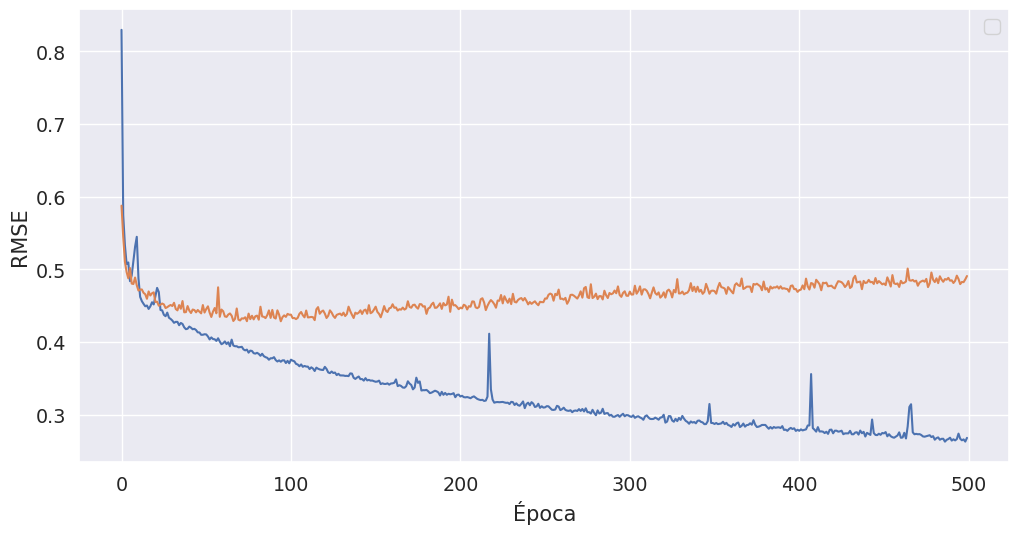

In [58]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss)
plt.plot(val_loss)
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Aca ya directamente a partir de un punto empieza a desaprender las cosas útiles que aprendió.

Como podemos solucionar este problema? Qué métodos vimos para mejorar la generalización del modelo?

Probamos el método de [Dropout](https://keras.io/api/layers/regularization_layers/dropout/) primero con el modelo anterior con muchas neuronas:

In [59]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(8,)))
model.add(Dropout(0.25))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

In [60]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=500,
    validation_data=(X_validation.values, y_validation.values),
)

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
  32/6000 [..............................] - ETA: 26s - loss: 1.3697

1504/6000 [======>.......................] - ETA: 0s - loss: 0.6618 

2976/6000 [=============>................] - ETA: 0s - loss: 0.5989

4480/6000 [=====================>........] - ETA: 0s - loss: 0.5755

5984/6000 [============================>.] - ETA: 0s - loss: 0.5487

6000/6000 [==============================] - 0s 74us/step - loss: 0.5480 - val_loss: 0.3590


Epoch 2/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4252

1536/6000 [======>.......................] - ETA: 0s - loss: 0.4014

3008/6000 [==============>...............] - ETA: 0s - loss: 0.4065

4480/6000 [=====================>........] - ETA: 0s - loss: 0.5189

5984/6000 [============================>.] - ETA: 0s - loss: 0.5351

6000/6000 [==============================] - 0s 46us/step - loss: 0.5341 - val_loss: 0.3434


Epoch 3/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1381

1536/6000 [======>.......................] - ETA: 0s - loss: 0.5015

3008/6000 [==============>...............] - ETA: 0s - loss: 0.4234

4480/6000 [=====================>........] - ETA: 0s - loss: 0.4108

5920/6000 [============================>.] - ETA: 0s - loss: 0.4067

6000/6000 [==============================] - 0s 46us/step - loss: 0.4064 - val_loss: 0.3007


Epoch 4/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3623

1504/6000 [======>.......................] - ETA: 0s - loss: 0.3469

2944/6000 [=============>................] - ETA: 0s - loss: 0.3596

4416/6000 [=====================>........] - ETA: 0s - loss: 0.3600

5952/6000 [============================>.] - ETA: 0s - loss: 0.3501

6000/6000 [==============================] - 0s 46us/step - loss: 0.3503 - val_loss: 0.2682


Epoch 5/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2603

1536/6000 [======>.......................] - ETA: 0s - loss: 0.3265

3072/6000 [==============>...............] - ETA: 0s - loss: 0.3276

4640/6000 [======================>.......] - ETA: 0s - loss: 0.3256

6000/6000 [==============================] - 0s 45us/step - loss: 0.3195 - val_loss: 0.2610


Epoch 6/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4555

1568/6000 [======>.......................] - ETA: 0s - loss: 0.3821

3040/6000 [==============>...............] - ETA: 0s - loss: 0.3444

4576/6000 [=====================>........] - ETA: 0s - loss: 0.3188

6000/6000 [==============================] - 0s 45us/step - loss: 0.3389 - val_loss: 0.2519


Epoch 7/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2359

1536/6000 [======>.......................] - ETA: 0s - loss: 0.3044

3040/6000 [==============>...............] - ETA: 0s - loss: 0.3002

4576/6000 [=====================>........] - ETA: 0s - loss: 0.3172

6000/6000 [==============================] - 0s 45us/step - loss: 0.3107 - val_loss: 0.2468


Epoch 8/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2109

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2981

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2984

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2871

6000/6000 [==============================] - 0s 45us/step - loss: 0.2850 - val_loss: 0.2344


Epoch 9/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1830

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2577

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2677

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2869

6000/6000 [==============================] - 0s 45us/step - loss: 0.2795 - val_loss: 0.2353


Epoch 10/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1618

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2922

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2719

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2729

5984/6000 [============================>.] - ETA: 0s - loss: 0.2814

6000/6000 [==============================] - 0s 46us/step - loss: 0.2811 - val_loss: 0.2306


Epoch 11/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2909

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2893

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2821

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2727

6000/6000 [==============================] - 0s 45us/step - loss: 0.2813 - val_loss: 0.2298


Epoch 12/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1503

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2486

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2582

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2635

6000/6000 [==============================] - 0s 45us/step - loss: 0.2675 - val_loss: 0.2358


Epoch 13/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2745

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2544

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2653

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2710

6000/6000 [==============================] - 0s 44us/step - loss: 0.2694 - val_loss: 0.2343


Epoch 14/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2041

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2617

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2561

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2644

6000/6000 [==============================] - 0s 45us/step - loss: 0.2598 - val_loss: 0.2319


Epoch 15/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1484

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2649

2976/6000 [=============>................] - ETA: 0s - loss: 0.2731

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2659

5952/6000 [============================>.] - ETA: 0s - loss: 0.2583

6000/6000 [==============================] - 0s 46us/step - loss: 0.2582 - val_loss: 0.2242


Epoch 16/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1851

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2663

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2483

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2513

5984/6000 [============================>.] - ETA: 0s - loss: 0.2507

6000/6000 [==============================] - 0s 46us/step - loss: 0.2506 - val_loss: 0.2237


Epoch 17/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2593

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2549

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2426

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2478

6000/6000 [==============================] - 0s 45us/step - loss: 0.2536 - val_loss: 0.2228


Epoch 18/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4644

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2540

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2652

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2541

6000/6000 [==============================] - 0s 46us/step - loss: 0.2528 - val_loss: 0.2256


Epoch 19/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2246

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2416

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2589

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2554

5984/6000 [============================>.] - ETA: 0s - loss: 0.2506

6000/6000 [==============================] - 0s 46us/step - loss: 0.2506 - val_loss: 0.2230


Epoch 20/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1439

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2388

2944/6000 [=============>................] - ETA: 0s - loss: 0.2374

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2357

5952/6000 [============================>.] - ETA: 0s - loss: 0.2441

6000/6000 [==============================] - 0s 46us/step - loss: 0.2436 - val_loss: 0.2193


Epoch 21/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2257

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2295

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2314

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2409

6000/6000 [==============================] - 0s 45us/step - loss: 0.2490 - val_loss: 0.2220


Epoch 22/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2245

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2312

2976/6000 [=============>................] - ETA: 0s - loss: 0.2443

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2462

6000/6000 [==============================] - 0s 45us/step - loss: 0.2433 - val_loss: 0.2152


Epoch 23/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3622

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2542

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2503

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2449

6000/6000 [==============================] - 0s 45us/step - loss: 0.2431 - val_loss: 0.2173


Epoch 24/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3094

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2447

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2428

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2436

6000/6000 [==============================] - 0s 45us/step - loss: 0.2418 - val_loss: 0.2151


Epoch 25/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2674

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2344

2976/6000 [=============>................] - ETA: 0s - loss: 0.2479

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2439

5984/6000 [============================>.] - ETA: 0s - loss: 0.2447

6000/6000 [==============================] - 0s 46us/step - loss: 0.2451 - val_loss: 0.2188


Epoch 26/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2162

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2488

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2474

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2444

5856/6000 [============================>.] - ETA: 0s - loss: 0.2367

6000/6000 [==============================] - 0s 46us/step - loss: 0.2377 - val_loss: 0.2109


Epoch 27/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1622

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2307

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2446

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2409

5952/6000 [============================>.] - ETA: 0s - loss: 0.2428

6000/6000 [==============================] - 0s 47us/step - loss: 0.2424 - val_loss: 0.2137


Epoch 28/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1101

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2362

2976/6000 [=============>................] - ETA: 0s - loss: 0.2347

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2286

5888/6000 [============================>.] - ETA: 0s - loss: 0.2317

6000/6000 [==============================] - 0s 47us/step - loss: 0.2317 - val_loss: 0.2143


Epoch 29/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4818

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2384

2848/6000 [=============>................] - ETA: 0s - loss: 0.2534

4256/6000 [====================>.........] - ETA: 0s - loss: 0.2462

5696/6000 [===========================>..] - ETA: 0s - loss: 0.2426

6000/6000 [==============================] - 0s 51us/step - loss: 0.2428 - val_loss: 0.2185


Epoch 30/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2310

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2705

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2494

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2393

5984/6000 [============================>.] - ETA: 0s - loss: 0.2363

6000/6000 [==============================] - 0s 47us/step - loss: 0.2359 - val_loss: 0.2119


Epoch 31/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1394

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2240

2976/6000 [=============>................] - ETA: 0s - loss: 0.2301

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2318

5952/6000 [============================>.] - ETA: 0s - loss: 0.2309

6000/6000 [==============================] - 0s 47us/step - loss: 0.2308 - val_loss: 0.2113


Epoch 32/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2826

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2381

2976/6000 [=============>................] - ETA: 0s - loss: 0.2356

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2388

5952/6000 [============================>.] - ETA: 0s - loss: 0.2365

6000/6000 [==============================] - 0s 47us/step - loss: 0.2361 - val_loss: 0.2128


Epoch 33/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2613

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2325

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2379

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2341

5952/6000 [============================>.] - ETA: 0s - loss: 0.2305

6000/6000 [==============================] - 0s 47us/step - loss: 0.2310 - val_loss: 0.2163


Epoch 34/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1035

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2502

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2245

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2290

5856/6000 [============================>.] - ETA: 0s - loss: 0.2320

6000/6000 [==============================] - 0s 49us/step - loss: 0.2315 - val_loss: 0.2074


Epoch 35/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1805

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2323

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2245

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2297

6000/6000 [==============================] - 0s 46us/step - loss: 0.2294 - val_loss: 0.2058


Epoch 36/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2145

1376/6000 [=====>........................] - ETA: 0s - loss: 0.2399

2720/6000 [============>.................] - ETA: 0s - loss: 0.2392

4064/6000 [===================>..........] - ETA: 0s - loss: 0.2419

5568/6000 [==========================>...] - ETA: 0s - loss: 0.2322

6000/6000 [==============================] - 0s 49us/step - loss: 0.2297 - val_loss: 0.2049


Epoch 37/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2201

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2469

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2351

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2223

6000/6000 [==============================] - 0s 46us/step - loss: 0.2267 - val_loss: 0.2057


Epoch 38/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1634

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2290

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2262

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2238

5952/6000 [============================>.] - ETA: 0s - loss: 0.2267

6000/6000 [==============================] - 0s 47us/step - loss: 0.2274 - val_loss: 0.2141


Epoch 39/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2093

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2366

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2367

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2328

5984/6000 [============================>.] - ETA: 0s - loss: 0.2314

6000/6000 [==============================] - 0s 47us/step - loss: 0.2313 - val_loss: 0.2079


Epoch 40/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1863

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1956

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2158

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2229

6000/6000 [==============================] - 0s 46us/step - loss: 0.2254 - val_loss: 0.2084


Epoch 41/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1875

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2478

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2370

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2303

5984/6000 [============================>.] - ETA: 0s - loss: 0.2263

6000/6000 [==============================] - 0s 47us/step - loss: 0.2262 - val_loss: 0.2007


Epoch 42/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1116

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2210

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2248

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2259

6000/6000 [==============================] - 0s 47us/step - loss: 0.2230 - val_loss: 0.2101


Epoch 43/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2526

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2218

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2266

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2277

5824/6000 [============================>.] - ETA: 0s - loss: 0.2248

6000/6000 [==============================] - 0s 49us/step - loss: 0.2254 - val_loss: 0.2016


Epoch 44/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1852

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2242

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2167

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2182

6000/6000 [==============================] - 0s 46us/step - loss: 0.2227 - val_loss: 0.2066


Epoch 45/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4959

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2321

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2341

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2343

6000/6000 [==============================] - 0s 46us/step - loss: 0.2269 - val_loss: 0.2082


Epoch 46/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1799

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1996

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2079

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2127

6000/6000 [==============================] - 0s 46us/step - loss: 0.2195 - val_loss: 0.2051


Epoch 47/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2972

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2094

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2142

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2203

5952/6000 [============================>.] - ETA: 0s - loss: 0.2226

6000/6000 [==============================] - 0s 47us/step - loss: 0.2216 - val_loss: 0.2012


Epoch 48/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1397

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2124

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2242

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2213

6000/6000 [==============================] - 0s 46us/step - loss: 0.2185 - val_loss: 0.2040


Epoch 49/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1070

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2121

2976/6000 [=============>................] - ETA: 0s - loss: 0.2071

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2141

6000/6000 [==============================] - 0s 46us/step - loss: 0.2199 - val_loss: 0.1999


Epoch 50/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1966

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2070

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2149

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2155

6000/6000 [==============================] - 0s 46us/step - loss: 0.2200 - val_loss: 0.1999


Epoch 51/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0668

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2222

2880/6000 [=============>................] - ETA: 0s - loss: 0.2167

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2187

5920/6000 [============================>.] - ETA: 0s - loss: 0.2206

6000/6000 [==============================] - 0s 47us/step - loss: 0.2202 - val_loss: 0.2057


Epoch 52/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2230

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2072

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2128

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2152

6000/6000 [==============================] - 0s 46us/step - loss: 0.2160 - val_loss: 0.1975


Epoch 53/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2392

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2499

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2204

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2227

6000/6000 [==============================] - 0s 47us/step - loss: 0.2174 - val_loss: 0.1997


Epoch 54/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2872

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2208

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2107

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2162

6000/6000 [==============================] - 0s 47us/step - loss: 0.2159 - val_loss: 0.1971


Epoch 55/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1942

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2175

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2138

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2135

6000/6000 [==============================] - 0s 46us/step - loss: 0.2166 - val_loss: 0.1973


Epoch 56/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1544

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1754

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2036

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1997

6000/6000 [==============================] - 0s 47us/step - loss: 0.2084 - val_loss: 0.1968


Epoch 57/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2920

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2129

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2231

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2138

6000/6000 [==============================] - 0s 47us/step - loss: 0.2161 - val_loss: 0.1978


Epoch 58/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1198

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2325

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2202

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2171

5984/6000 [============================>.] - ETA: 0s - loss: 0.2129

6000/6000 [==============================] - 0s 47us/step - loss: 0.2127 - val_loss: 0.1986


Epoch 59/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1140

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2011

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2088

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2093

6000/6000 [==============================] - 0s 46us/step - loss: 0.2144 - val_loss: 0.1970


Epoch 60/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3508

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2019

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2095

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2084

6000/6000 [==============================] - 0s 47us/step - loss: 0.2161 - val_loss: 0.1933


Epoch 61/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3351

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2099

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2139

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2146

5952/6000 [============================>.] - ETA: 0s - loss: 0.2121

6000/6000 [==============================] - 0s 47us/step - loss: 0.2119 - val_loss: 0.2000


Epoch 62/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2719

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2224

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2160

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2126

6000/6000 [==============================] - 0s 47us/step - loss: 0.2136 - val_loss: 0.1937


Epoch 63/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1435

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2003

2944/6000 [=============>................] - ETA: 0s - loss: 0.2057

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2058

5888/6000 [============================>.] - ETA: 0s - loss: 0.2161

6000/6000 [==============================] - 0s 47us/step - loss: 0.2183 - val_loss: 0.1944


Epoch 64/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2650

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2242

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2250

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2180

5984/6000 [============================>.] - ETA: 0s - loss: 0.2114

6000/6000 [==============================] - 0s 47us/step - loss: 0.2112 - val_loss: 0.2008


Epoch 65/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1692

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2113

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2106

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2052

6000/6000 [==============================] - 0s 47us/step - loss: 0.2101 - val_loss: 0.1987


Epoch 66/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4316

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2063

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2109

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2091

6000/6000 [==============================] - 0s 46us/step - loss: 0.2110 - val_loss: 0.1926


Epoch 67/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1849

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2107

2976/6000 [=============>................] - ETA: 0s - loss: 0.2126

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2116

5952/6000 [============================>.] - ETA: 0s - loss: 0.2087

6000/6000 [==============================] - 0s 47us/step - loss: 0.2082 - val_loss: 0.1926


Epoch 68/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3798

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1880

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2085

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2144

6000/6000 [==============================] - 0s 46us/step - loss: 0.2143 - val_loss: 0.1964


Epoch 69/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1200

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2078

2848/6000 [=============>................] - ETA: 0s - loss: 0.2110

4288/6000 [====================>.........] - ETA: 0s - loss: 0.2103

5760/6000 [===========================>..] - ETA: 0s - loss: 0.2124

6000/6000 [==============================] - 0s 48us/step - loss: 0.2141 - val_loss: 0.2034


Epoch 70/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1527

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2073

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2103

4416/6000 [=====================>........] - ETA: 0s - loss: 0.2026

5888/6000 [============================>.] - ETA: 0s - loss: 0.2102

6000/6000 [==============================] - 0s 47us/step - loss: 0.2087 - val_loss: 0.1987


Epoch 71/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1743

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1947

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2113

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2169

6000/6000 [==============================] - 0s 46us/step - loss: 0.2143 - val_loss: 0.1943


Epoch 72/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5321

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2154

2976/6000 [=============>................] - ETA: 0s - loss: 0.1980

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2035

5984/6000 [============================>.] - ETA: 0s - loss: 0.2073

6000/6000 [==============================] - 0s 47us/step - loss: 0.2072 - val_loss: 0.1930


Epoch 73/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1779

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1998

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2029

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2028

6000/6000 [==============================] - 0s 46us/step - loss: 0.2049 - val_loss: 0.1905


Epoch 74/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1468

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2190

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2114

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2107

5920/6000 [============================>.] - ETA: 0s - loss: 0.2072

6000/6000 [==============================] - 0s 48us/step - loss: 0.2070 - val_loss: 0.1946


Epoch 75/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1557

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2005

2976/6000 [=============>................] - ETA: 0s - loss: 0.1993

4448/6000 [=====================>........] - ETA: 0s - loss: 0.2029

5920/6000 [============================>.] - ETA: 0s - loss: 0.2065

6000/6000 [==============================] - 0s 48us/step - loss: 0.2058 - val_loss: 0.1887


Epoch 76/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1782

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2030

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1958

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1991

6000/6000 [==============================] - 0s 46us/step - loss: 0.2068 - val_loss: 0.1896


Epoch 77/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1691

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2160

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2076

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2069

6000/6000 [==============================] - 0s 46us/step - loss: 0.2072 - val_loss: 0.1938


Epoch 78/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2856

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2207

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2093

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2110

5984/6000 [============================>.] - ETA: 0s - loss: 0.2092

6000/6000 [==============================] - 0s 47us/step - loss: 0.2095 - val_loss: 0.1918


Epoch 79/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1887

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1918

2976/6000 [=============>................] - ETA: 0s - loss: 0.1943

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2004

5984/6000 [============================>.] - ETA: 0s - loss: 0.2033

6000/6000 [==============================] - 0s 47us/step - loss: 0.2029 - val_loss: 0.1926


Epoch 80/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2049

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1977

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2050

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2065

6000/6000 [==============================] - 0s 46us/step - loss: 0.2059 - val_loss: 0.1975


Epoch 81/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2424

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2097

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2032

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2018

6000/6000 [==============================] - 0s 46us/step - loss: 0.2037 - val_loss: 0.1888


Epoch 82/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1147

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2063

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2012

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1994

6000/6000 [==============================] - 0s 46us/step - loss: 0.2010 - val_loss: 0.1892


Epoch 83/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1028

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2145

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2140

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2090

6000/6000 [==============================] - 0s 46us/step - loss: 0.2052 - val_loss: 0.1932


Epoch 84/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3730

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2050

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2046

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2062

6000/6000 [==============================] - 0s 46us/step - loss: 0.2049 - val_loss: 0.1901


Epoch 85/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1975

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2226

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2047

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2065

6000/6000 [==============================] - 0s 46us/step - loss: 0.2073 - val_loss: 0.1932


Epoch 86/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2135

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1855

2976/6000 [=============>................] - ETA: 0s - loss: 0.1911

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1989

5984/6000 [============================>.] - ETA: 0s - loss: 0.2056

6000/6000 [==============================] - 0s 47us/step - loss: 0.2058 - val_loss: 0.1899


Epoch 87/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1649

1440/6000 [======>.......................] - ETA: 0s - loss: 0.2077

2944/6000 [=============>................] - ETA: 0s - loss: 0.2045

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1997

5952/6000 [============================>.] - ETA: 0s - loss: 0.2053

6000/6000 [==============================] - 0s 48us/step - loss: 0.2051 - val_loss: 0.1929


Epoch 88/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1371

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2083

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2081

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2028

6000/6000 [==============================] - 0s 47us/step - loss: 0.2028 - val_loss: 0.1933


Epoch 89/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0758

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2165

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2126

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2091

6000/6000 [==============================] - 0s 47us/step - loss: 0.2066 - val_loss: 0.1952


Epoch 90/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3495

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2107

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2092

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2080

6000/6000 [==============================] - 0s 47us/step - loss: 0.2067 - val_loss: 0.1860


Epoch 91/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4636

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2176

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2012

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2001

6000/6000 [==============================] - 0s 46us/step - loss: 0.2014 - val_loss: 0.1930


Epoch 92/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2927

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1939

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1960

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2025

6000/6000 [==============================] - 0s 46us/step - loss: 0.2034 - val_loss: 0.1888


Epoch 93/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1448

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2002

2976/6000 [=============>................] - ETA: 0s - loss: 0.2064

4480/6000 [=====================>........] - ETA: 0s - loss: 0.2057

5952/6000 [============================>.] - ETA: 0s - loss: 0.2020

6000/6000 [==============================] - 0s 47us/step - loss: 0.2015 - val_loss: 0.1885


Epoch 94/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1180

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1929

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1980

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1935

6000/6000 [==============================] - 0s 46us/step - loss: 0.1975 - val_loss: 0.1887


Epoch 95/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1125

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1989

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2050

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1994

6000/6000 [==============================] - 0s 46us/step - loss: 0.1996 - val_loss: 0.1863


Epoch 96/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1824

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1944

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2003

4672/6000 [======================>.......] - ETA: 0s - loss: 0.1945

6000/6000 [==============================] - 0s 46us/step - loss: 0.2008 - val_loss: 0.1936


Epoch 97/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1262

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1929

2976/6000 [=============>................] - ETA: 0s - loss: 0.1997

4384/6000 [====================>.........] - ETA: 0s - loss: 0.2031

5888/6000 [============================>.] - ETA: 0s - loss: 0.2034

6000/6000 [==============================] - 0s 48us/step - loss: 0.2034 - val_loss: 0.1845


Epoch 98/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1297

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2024

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2031

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1980

5984/6000 [============================>.] - ETA: 0s - loss: 0.2033

6000/6000 [==============================] - 0s 47us/step - loss: 0.2037 - val_loss: 0.1888


Epoch 99/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1301

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1999

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2005

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2019

6000/6000 [==============================] - 0s 46us/step - loss: 0.2133 - val_loss: 0.1909


Epoch 100/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1741

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2007

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1960

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2103

6000/6000 [==============================] - 0s 46us/step - loss: 0.2025 - val_loss: 0.1901


Epoch 101/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2546

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2118

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2012

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2013

6000/6000 [==============================] - 0s 46us/step - loss: 0.1993 - val_loss: 0.1909


Epoch 102/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1498

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1860

2848/6000 [=============>................] - ETA: 0s - loss: 0.1975

4352/6000 [====================>.........] - ETA: 0s - loss: 0.2066

5856/6000 [============================>.] - ETA: 0s - loss: 0.2057

6000/6000 [==============================] - 0s 48us/step - loss: 0.2044 - val_loss: 0.1858


Epoch 103/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3126

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1938

2656/6000 [============>.................] - ETA: 0s - loss: 0.1974

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1974

5696/6000 [===========================>..] - ETA: 0s - loss: 0.1996

6000/6000 [==============================] - 0s 49us/step - loss: 0.1991 - val_loss: 0.1867


Epoch 104/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1171

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2003

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2036

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2062

5984/6000 [============================>.] - ETA: 0s - loss: 0.2010

6000/6000 [==============================] - 0s 47us/step - loss: 0.2015 - val_loss: 0.1883


Epoch 105/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2800

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2037

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2012

4608/6000 [======================>.......] - ETA: 0s - loss: 0.2029

6000/6000 [==============================] - 0s 46us/step - loss: 0.1994 - val_loss: 0.1866


Epoch 106/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0849

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2088

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2031

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2139

6000/6000 [==============================] - 0s 47us/step - loss: 0.2102 - val_loss: 0.1909


Epoch 107/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1249

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1976

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2041

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1979

6000/6000 [==============================] - 0s 46us/step - loss: 0.1987 - val_loss: 0.1856


Epoch 108/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1376

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2068

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2074

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1994

6000/6000 [==============================] - 0s 46us/step - loss: 0.1994 - val_loss: 0.1907


Epoch 109/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2330

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2064

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1971

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1935

6000/6000 [==============================] - 0s 46us/step - loss: 0.1963 - val_loss: 0.1871


Epoch 110/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1489

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1859

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1926

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1967

6000/6000 [==============================] - 0s 47us/step - loss: 0.1975 - val_loss: 0.1873


Epoch 111/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1898

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2071

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2024

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2016

6000/6000 [==============================] - 0s 47us/step - loss: 0.1999 - val_loss: 0.1927


Epoch 112/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2010

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2188

2816/6000 [=============>................] - ETA: 0s - loss: 0.2126

4192/6000 [===================>..........] - ETA: 0s - loss: 0.2003

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1974

6000/6000 [==============================] - 0s 49us/step - loss: 0.1966 - val_loss: 0.1846


Epoch 113/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1218

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2036

2944/6000 [=============>................] - ETA: 0s - loss: 0.1907

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1931

5824/6000 [============================>.] - ETA: 0s - loss: 0.1933

6000/6000 [==============================] - 0s 49us/step - loss: 0.1930 - val_loss: 0.1912


Epoch 114/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1330

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1778

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1879

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1941

6000/6000 [==============================] - 0s 46us/step - loss: 0.1912 - val_loss: 0.1901


Epoch 115/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1513

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1952

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2003

4512/6000 [=====================>........] - ETA: 0s - loss: 0.2009

6000/6000 [==============================] - 0s 46us/step - loss: 0.1983 - val_loss: 0.1855


Epoch 116/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0835

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1783

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1917

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1919

5952/6000 [============================>.] - ETA: 0s - loss: 0.1960

6000/6000 [==============================] - 0s 47us/step - loss: 0.1958 - val_loss: 0.1894


Epoch 117/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1562

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1938

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1940

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1965

6000/6000 [==============================] - 0s 46us/step - loss: 0.1949 - val_loss: 0.1894


Epoch 118/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1179

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1998

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1969

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1984

6000/6000 [==============================] - 0s 47us/step - loss: 0.1972 - val_loss: 0.1875


Epoch 119/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0886

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2104

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1981

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1955

6000/6000 [==============================] - 0s 46us/step - loss: 0.1930 - val_loss: 0.1853


Epoch 120/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1858

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1945

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1987

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1934

6000/6000 [==============================] - 0s 47us/step - loss: 0.1907 - val_loss: 0.1977


Epoch 121/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1141

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1967

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2026

4576/6000 [=====================>........] - ETA: 0s - loss: 0.2002

6000/6000 [==============================] - 0s 46us/step - loss: 0.1986 - val_loss: 0.1874


Epoch 122/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2136

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2036

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1988

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1955

6000/6000 [==============================] - 0s 46us/step - loss: 0.1948 - val_loss: 0.1875


Epoch 123/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1609

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1828

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1893

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1905

6000/6000 [==============================] - 0s 46us/step - loss: 0.1944 - val_loss: 0.1837


Epoch 124/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2174

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1827

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1869

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1906

6000/6000 [==============================] - 0s 47us/step - loss: 0.1916 - val_loss: 0.1873


Epoch 125/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2329

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1962

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1869

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1923

6000/6000 [==============================] - 0s 46us/step - loss: 0.1937 - val_loss: 0.1869


Epoch 126/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1474

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2025

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2066

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2033

6000/6000 [==============================] - 0s 47us/step - loss: 0.1987 - val_loss: 0.1845


Epoch 127/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4043

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1829

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1879

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1931

6000/6000 [==============================] - 0s 46us/step - loss: 0.1947 - val_loss: 0.1914


Epoch 128/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0967

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2162

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2034

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1957

5920/6000 [============================>.] - ETA: 0s - loss: 0.1984

6000/6000 [==============================] - 0s 47us/step - loss: 0.1979 - val_loss: 0.1878


Epoch 129/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1248

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1967

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1914

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1948

6000/6000 [==============================] - 0s 46us/step - loss: 0.1972 - val_loss: 0.1872


Epoch 130/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1744

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1882

2976/6000 [=============>................] - ETA: 0s - loss: 0.1883

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1988

5984/6000 [============================>.] - ETA: 0s - loss: 0.1983

6000/6000 [==============================] - 0s 47us/step - loss: 0.1982 - val_loss: 0.1891


Epoch 131/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2096

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1876

2976/6000 [=============>................] - ETA: 0s - loss: 0.1948

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1934

5984/6000 [============================>.] - ETA: 0s - loss: 0.1948

6000/6000 [==============================] - 0s 47us/step - loss: 0.1945 - val_loss: 0.1885


Epoch 132/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1925

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1855

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1857

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1863

6000/6000 [==============================] - 0s 46us/step - loss: 0.1942 - val_loss: 0.1851


Epoch 133/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0955

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1770

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1861

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1869

6000/6000 [==============================] - 0s 47us/step - loss: 0.1933 - val_loss: 0.1850


Epoch 134/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1982

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1970

2912/6000 [=============>................] - ETA: 0s - loss: 0.1936

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1951

5952/6000 [============================>.] - ETA: 0s - loss: 0.1946

6000/6000 [==============================] - 0s 47us/step - loss: 0.1938 - val_loss: 0.1892


Epoch 135/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2370

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1910

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1920

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2372

5984/6000 [============================>.] - ETA: 0s - loss: 0.2236

6000/6000 [==============================] - 0s 47us/step - loss: 0.2233 - val_loss: 0.1880


Epoch 136/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1560

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1885

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1953

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1915

6000/6000 [==============================] - 0s 47us/step - loss: 0.1907 - val_loss: 0.1841


Epoch 137/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2636

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1983

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1967

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1957

6000/6000 [==============================] - 0s 46us/step - loss: 0.1940 - val_loss: 0.1862


Epoch 138/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1913

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1912

2976/6000 [=============>................] - ETA: 0s - loss: 0.1841

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1791

5984/6000 [============================>.] - ETA: 0s - loss: 0.1893

6000/6000 [==============================] - 0s 47us/step - loss: 0.1890 - val_loss: 0.1941


Epoch 139/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1680

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1879

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1886

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1969

6000/6000 [==============================] - 0s 46us/step - loss: 0.1948 - val_loss: 0.1892


Epoch 140/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2124

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2036

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2006

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1946

6000/6000 [==============================] - 0s 46us/step - loss: 0.1912 - val_loss: 0.1873


Epoch 141/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1240

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1836

2912/6000 [=============>................] - ETA: 0s - loss: 0.1884

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1899

5952/6000 [============================>.] - ETA: 0s - loss: 0.1934

6000/6000 [==============================] - 0s 47us/step - loss: 0.1931 - val_loss: 0.1847


Epoch 142/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1512

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1947

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1907

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1911

5984/6000 [============================>.] - ETA: 0s - loss: 0.1901

6000/6000 [==============================] - 0s 47us/step - loss: 0.1900 - val_loss: 0.1840


Epoch 143/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0898

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1855

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1839

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1911

6000/6000 [==============================] - 0s 46us/step - loss: 0.1913 - val_loss: 0.1853


Epoch 144/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1817

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2242

3008/6000 [==============>...............] - ETA: 0s - loss: 0.2052

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1961

6000/6000 [==============================] - 0s 47us/step - loss: 0.1934 - val_loss: 0.1841


Epoch 145/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3476

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2054

2976/6000 [=============>................] - ETA: 0s - loss: 0.1947

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1912

5952/6000 [============================>.] - ETA: 0s - loss: 0.1946

6000/6000 [==============================] - 0s 47us/step - loss: 0.1944 - val_loss: 0.1847


Epoch 146/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2172

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2018

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1989

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1961

5984/6000 [============================>.] - ETA: 0s - loss: 0.1951

6000/6000 [==============================] - 0s 47us/step - loss: 0.1948 - val_loss: 0.1836


Epoch 147/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2489

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1883

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1982

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1930

6000/6000 [==============================] - 0s 46us/step - loss: 0.1899 - val_loss: 0.1934


Epoch 148/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1952

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2011

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1968

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1959

6000/6000 [==============================] - 0s 46us/step - loss: 0.1919 - val_loss: 0.1868


Epoch 149/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1350

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1769

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1842

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1922

6000/6000 [==============================] - 0s 47us/step - loss: 0.1948 - val_loss: 0.1896


Epoch 150/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1852

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1887

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1891

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1870

6000/6000 [==============================] - 0s 46us/step - loss: 0.1934 - val_loss: 0.1885


Epoch 151/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6039

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2110

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2038

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1975

6000/6000 [==============================] - 0s 46us/step - loss: 0.1950 - val_loss: 0.1828


Epoch 152/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1906

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2058

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1994

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1967

6000/6000 [==============================] - 0s 47us/step - loss: 0.1920 - val_loss: 0.1851


Epoch 153/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2213

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1990

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1985

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1973

6000/6000 [==============================] - 0s 47us/step - loss: 0.1942 - val_loss: 0.1880


Epoch 154/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2317

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1905

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1878

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1905

5920/6000 [============================>.] - ETA: 0s - loss: 0.1906

6000/6000 [==============================] - 0s 47us/step - loss: 0.1902 - val_loss: 0.1912


Epoch 155/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5389

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1946

2880/6000 [=============>................] - ETA: 0s - loss: 0.1978

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1913

5920/6000 [============================>.] - ETA: 0s - loss: 0.1903

6000/6000 [==============================] - 0s 47us/step - loss: 0.1909 - val_loss: 0.1932


Epoch 156/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3012

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2063

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2030

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1916

6000/6000 [==============================] - 0s 47us/step - loss: 0.1954 - val_loss: 0.1851


Epoch 157/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1098

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1860

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1816

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1823

5984/6000 [============================>.] - ETA: 0s - loss: 0.1907

6000/6000 [==============================] - 0s 47us/step - loss: 0.1906 - val_loss: 0.1899


Epoch 158/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3008

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2010

2976/6000 [=============>................] - ETA: 0s - loss: 0.2004

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1975

5888/6000 [============================>.] - ETA: 0s - loss: 0.1929

6000/6000 [==============================] - 0s 48us/step - loss: 0.1918 - val_loss: 0.1862


Epoch 159/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2209

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1823

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1900

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1910

6000/6000 [==============================] - 0s 47us/step - loss: 0.1877 - val_loss: 0.1863


Epoch 160/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1546

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1787

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1829

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1856

6000/6000 [==============================] - 0s 47us/step - loss: 0.1897 - val_loss: 0.1855


Epoch 161/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1970

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1818

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1952

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1884

6000/6000 [==============================] - 0s 46us/step - loss: 0.1891 - val_loss: 0.1846


Epoch 162/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2136

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1947

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1932

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1894

6000/6000 [==============================] - 0s 46us/step - loss: 0.1877 - val_loss: 0.1863


Epoch 163/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2908

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1883

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1914

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1972

5984/6000 [============================>.] - ETA: 0s - loss: 0.1889

6000/6000 [==============================] - 0s 47us/step - loss: 0.1897 - val_loss: 0.1847


Epoch 164/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1431

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1748

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1776

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1883

5856/6000 [============================>.] - ETA: 0s - loss: 0.1898

6000/6000 [==============================] - 0s 48us/step - loss: 0.1905 - val_loss: 0.1873


Epoch 165/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0925

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1788

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1902

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1906

6000/6000 [==============================] - 0s 47us/step - loss: 0.1914 - val_loss: 0.1878


Epoch 166/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2362

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1824

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1882

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1927

5984/6000 [============================>.] - ETA: 0s - loss: 0.1920

6000/6000 [==============================] - 0s 47us/step - loss: 0.1924 - val_loss: 0.1890


Epoch 167/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0949

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1734

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1818

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1848

6000/6000 [==============================] - 0s 46us/step - loss: 0.1900 - val_loss: 0.1876


Epoch 168/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2321

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1907

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1871

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1892

5952/6000 [============================>.] - ETA: 0s - loss: 0.1900

6000/6000 [==============================] - 0s 48us/step - loss: 0.1898 - val_loss: 0.1847


Epoch 169/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1629

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1755

2848/6000 [=============>................] - ETA: 0s - loss: 0.1746

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1800

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1891

6000/6000 [==============================] - 0s 51us/step - loss: 0.1903 - val_loss: 0.1861


Epoch 170/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1002

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1913

2912/6000 [=============>................] - ETA: 0s - loss: 0.1853

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1842

5984/6000 [============================>.] - ETA: 0s - loss: 0.1884

6000/6000 [==============================] - 0s 47us/step - loss: 0.1887 - val_loss: 0.1919


Epoch 171/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0969

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1980

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1930

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1914

6000/6000 [==============================] - 0s 46us/step - loss: 0.1903 - val_loss: 0.1844


Epoch 172/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2462

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1814

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1866

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1941

6000/6000 [==============================] - 0s 46us/step - loss: 0.1900 - val_loss: 0.1834


Epoch 173/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4495

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1869

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1840

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1806

6000/6000 [==============================] - 0s 46us/step - loss: 0.1852 - val_loss: 0.1856


Epoch 174/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1757

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1863

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1814

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1843

6000/6000 [==============================] - 0s 47us/step - loss: 0.1876 - val_loss: 0.1859


Epoch 175/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1782

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1929

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1864

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1891

5984/6000 [============================>.] - ETA: 0s - loss: 0.1878

6000/6000 [==============================] - 0s 47us/step - loss: 0.1874 - val_loss: 0.1828


Epoch 176/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1501

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2000

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1947

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1923

5856/6000 [============================>.] - ETA: 0s - loss: 0.1890

6000/6000 [==============================] - 0s 48us/step - loss: 0.1903 - val_loss: 0.1864


Epoch 177/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1327

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1785

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1824

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1880

5984/6000 [============================>.] - ETA: 0s - loss: 0.1908

6000/6000 [==============================] - 0s 47us/step - loss: 0.1909 - val_loss: 0.1874


Epoch 178/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1049

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1826

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1865

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1840

6000/6000 [==============================] - 0s 47us/step - loss: 0.1898 - val_loss: 0.1836


Epoch 179/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1566

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1936

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1847

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1838

6000/6000 [==============================] - 0s 46us/step - loss: 0.1859 - val_loss: 0.1848


Epoch 180/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1760

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1854

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1811

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1876

6000/6000 [==============================] - 0s 46us/step - loss: 0.1869 - val_loss: 0.1839


Epoch 181/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3492

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1836

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1780

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1823

6000/6000 [==============================] - 0s 46us/step - loss: 0.1902 - val_loss: 0.1880


Epoch 182/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1398

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1731

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1792

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1780

6000/6000 [==============================] - 0s 47us/step - loss: 0.1843 - val_loss: 0.1880


Epoch 183/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0935

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1882

2976/6000 [=============>................] - ETA: 0s - loss: 0.1893

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1829

6000/6000 [==============================] - 0s 46us/step - loss: 0.1867 - val_loss: 0.1849


Epoch 184/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1276

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1711

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1816

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1823

5984/6000 [============================>.] - ETA: 0s - loss: 0.1893

6000/6000 [==============================] - 0s 47us/step - loss: 0.1893 - val_loss: 0.1826


Epoch 185/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2468

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2001

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1927

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1879

6000/6000 [==============================] - 0s 46us/step - loss: 0.1865 - val_loss: 0.1899


Epoch 186/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2423

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1850

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1907

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1883

6000/6000 [==============================] - 0s 46us/step - loss: 0.1879 - val_loss: 0.1843


Epoch 187/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1191

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1703

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1875

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1876

5984/6000 [============================>.] - ETA: 0s - loss: 0.1864

6000/6000 [==============================] - 0s 47us/step - loss: 0.1863 - val_loss: 0.1863


Epoch 188/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1572

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1775

2976/6000 [=============>................] - ETA: 0s - loss: 0.1729

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1836

6000/6000 [==============================] - 0s 47us/step - loss: 0.1859 - val_loss: 0.1876


Epoch 189/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1266

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1895

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1859

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1880

6000/6000 [==============================] - 0s 46us/step - loss: 0.1862 - val_loss: 0.1897


Epoch 190/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2468

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1718

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1744

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1751

6000/6000 [==============================] - 0s 46us/step - loss: 0.1861 - val_loss: 0.1863


Epoch 191/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2400

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1857

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1928

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1854

6000/6000 [==============================] - 0s 46us/step - loss: 0.1876 - val_loss: 0.1858


Epoch 192/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1261

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1915

2976/6000 [=============>................] - ETA: 0s - loss: 0.1775

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1814

6000/6000 [==============================] - 0s 46us/step - loss: 0.1843 - val_loss: 0.1850


Epoch 193/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1825

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1885

2944/6000 [=============>................] - ETA: 0s - loss: 0.1960

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1939

5920/6000 [============================>.] - ETA: 0s - loss: 0.1902

6000/6000 [==============================] - 0s 47us/step - loss: 0.1900 - val_loss: 0.1833


Epoch 194/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0827

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1850

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1817

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1832

5920/6000 [============================>.] - ETA: 0s - loss: 0.1852

6000/6000 [==============================] - 0s 47us/step - loss: 0.1851 - val_loss: 0.1854


Epoch 195/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0927

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1950

2976/6000 [=============>................] - ETA: 0s - loss: 0.1934

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1905

5952/6000 [============================>.] - ETA: 0s - loss: 0.1898

6000/6000 [==============================] - 0s 47us/step - loss: 0.1892 - val_loss: 0.1849


Epoch 196/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1639

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1878

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1860

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1865

6000/6000 [==============================] - 0s 46us/step - loss: 0.1901 - val_loss: 0.1852


Epoch 197/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1709

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1677

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1785

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1832

6000/6000 [==============================] - 0s 46us/step - loss: 0.1838 - val_loss: 0.1861


Epoch 198/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3671

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1667

2816/6000 [=============>................] - ETA: 0s - loss: 0.1705

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1770

5952/6000 [============================>.] - ETA: 0s - loss: 0.1802

6000/6000 [==============================] - 0s 47us/step - loss: 0.1801 - val_loss: 0.1845


Epoch 199/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0966

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1700

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1754

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1855

6000/6000 [==============================] - 0s 47us/step - loss: 0.1866 - val_loss: 0.1862


Epoch 200/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1506

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1963

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1855

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1835

6000/6000 [==============================] - 0s 46us/step - loss: 0.1897 - val_loss: 0.1859


Epoch 201/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0784

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1734

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1780

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1787

6000/6000 [==============================] - 0s 47us/step - loss: 0.1847 - val_loss: 0.1876


Epoch 202/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1333

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1921

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1863

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1869

6000/6000 [==============================] - 0s 46us/step - loss: 0.1884 - val_loss: 0.1828


Epoch 203/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2116

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1917

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1846

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1841

6000/6000 [==============================] - 0s 46us/step - loss: 0.1838 - val_loss: 0.1806


Epoch 204/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2326

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1974

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1849

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1860

6000/6000 [==============================] - 0s 47us/step - loss: 0.1840 - val_loss: 0.1860


Epoch 205/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1668

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1782

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1777

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1821

6000/6000 [==============================] - 0s 46us/step - loss: 0.1839 - val_loss: 0.1851


Epoch 206/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2516

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2003

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1904

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1876

6000/6000 [==============================] - 0s 46us/step - loss: 0.1890 - val_loss: 0.1850


Epoch 207/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1522

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1954

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1861

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1840

6000/6000 [==============================] - 0s 46us/step - loss: 0.1834 - val_loss: 0.1868


Epoch 208/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2219

1600/6000 [=======>......................] - ETA: 0s - loss: 0.1779

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1731

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1763

6000/6000 [==============================] - 0s 46us/step - loss: 0.1854 - val_loss: 0.1894


Epoch 209/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1787

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1802

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1860

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1857

6000/6000 [==============================] - 0s 46us/step - loss: 0.1856 - val_loss: 0.1808


Epoch 210/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1458

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1930

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1937

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1942

6000/6000 [==============================] - 0s 47us/step - loss: 0.1861 - val_loss: 0.1820


Epoch 211/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3742

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1843

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1839

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1860

6000/6000 [==============================] - 0s 46us/step - loss: 0.1841 - val_loss: 0.1844


Epoch 212/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1380

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1753

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1798

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1814

6000/6000 [==============================] - 0s 46us/step - loss: 0.1845 - val_loss: 0.1866


Epoch 213/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1257

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1738

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1862

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1871

6000/6000 [==============================] - 0s 46us/step - loss: 0.1887 - val_loss: 0.1837


Epoch 214/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0777

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1636

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1687

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1769

6000/6000 [==============================] - 0s 46us/step - loss: 0.1864 - val_loss: 0.1857


Epoch 215/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3274

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1817

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1867

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1859

5984/6000 [============================>.] - ETA: 0s - loss: 0.1886

6000/6000 [==============================] - 0s 47us/step - loss: 0.1884 - val_loss: 0.1841


Epoch 216/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1394

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1840

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1771

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1793

6000/6000 [==============================] - 0s 46us/step - loss: 0.1817 - val_loss: 0.1815


Epoch 217/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1172

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1728

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1746

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1793

6000/6000 [==============================] - 0s 46us/step - loss: 0.1846 - val_loss: 0.1847


Epoch 218/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2575

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1984

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1942

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1869

6000/6000 [==============================] - 0s 46us/step - loss: 0.1878 - val_loss: 0.1849


Epoch 219/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1055

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1590

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1741

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1759

6000/6000 [==============================] - 0s 46us/step - loss: 0.1783 - val_loss: 0.1878


Epoch 220/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4841

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1770

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1797

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1825

6000/6000 [==============================] - 0s 45us/step - loss: 0.1831 - val_loss: 0.1888


Epoch 221/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2302

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1682

2976/6000 [=============>................] - ETA: 0s - loss: 0.1814

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1836

6000/6000 [==============================] - 0s 46us/step - loss: 0.1817 - val_loss: 0.1821


Epoch 222/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1385

1056/6000 [====>.........................] - ETA: 0s - loss: 0.1866

2560/6000 [===========>..................] - ETA: 0s - loss: 0.1877

4000/6000 [===================>..........] - ETA: 0s - loss: 0.1847

5536/6000 [==========================>...] - ETA: 0s - loss: 0.1856

6000/6000 [==============================] - 0s 50us/step - loss: 0.1862 - val_loss: 0.1839


Epoch 223/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1035

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1886

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1810

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1802

6000/6000 [==============================] - 0s 46us/step - loss: 0.1792 - val_loss: 0.1863


Epoch 224/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1204

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1725

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1750

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1795

6000/6000 [==============================] - 0s 47us/step - loss: 0.1825 - val_loss: 0.1895


Epoch 225/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2701

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1852

3040/6000 [==============>...............] - ETA: 0s - loss: 0.2005

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1978

6000/6000 [==============================] - 0s 47us/step - loss: 0.1898 - val_loss: 0.1842


Epoch 226/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1382

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1746

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1731

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1822

6000/6000 [==============================] - 0s 46us/step - loss: 0.1853 - val_loss: 0.1862


Epoch 227/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2987

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1809

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1856

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1865

6000/6000 [==============================] - 0s 47us/step - loss: 0.1849 - val_loss: 0.1808


Epoch 228/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0804

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1713

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1698

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1782

5984/6000 [============================>.] - ETA: 0s - loss: 0.1809

6000/6000 [==============================] - 0s 47us/step - loss: 0.1806 - val_loss: 0.1818


Epoch 229/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0761

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1827

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1786

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1824

6000/6000 [==============================] - 0s 46us/step - loss: 0.1815 - val_loss: 0.1832


Epoch 230/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0915

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1947

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1862

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1842

6000/6000 [==============================] - 0s 46us/step - loss: 0.1839 - val_loss: 0.1846


Epoch 231/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2023

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1931

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1896

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1879

6000/6000 [==============================] - 0s 46us/step - loss: 0.1865 - val_loss: 0.1877


Epoch 232/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4313

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2034

2976/6000 [=============>................] - ETA: 0s - loss: 0.1895

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1865

6000/6000 [==============================] - 0s 46us/step - loss: 0.1860 - val_loss: 0.1830


Epoch 233/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1331

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1960

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1824

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1823

6000/6000 [==============================] - 0s 46us/step - loss: 0.1837 - val_loss: 0.1828


Epoch 234/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0874

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1892

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1895

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1846

6000/6000 [==============================] - 0s 46us/step - loss: 0.1841 - val_loss: 0.1808


Epoch 235/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1328

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1574

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1766

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1866

5920/6000 [============================>.] - ETA: 0s - loss: 0.1825

6000/6000 [==============================] - 0s 48us/step - loss: 0.1822 - val_loss: 0.1811


Epoch 236/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2087

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1738

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1796

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1829

6000/6000 [==============================] - 0s 47us/step - loss: 0.1792 - val_loss: 0.1816


Epoch 237/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1523

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1853

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1775

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1777

6000/6000 [==============================] - 0s 46us/step - loss: 0.1793 - val_loss: 0.1833


Epoch 238/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0971

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1806

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1824

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1869

6000/6000 [==============================] - 0s 46us/step - loss: 0.1879 - val_loss: 0.1875


Epoch 239/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1473

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1798

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1823

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1894

5952/6000 [============================>.] - ETA: 0s - loss: 0.1841

6000/6000 [==============================] - 0s 47us/step - loss: 0.1832 - val_loss: 0.1852


Epoch 240/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1634

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1742

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1736

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1754

6000/6000 [==============================] - 0s 46us/step - loss: 0.1793 - val_loss: 0.1840


Epoch 241/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2597

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1738

2912/6000 [=============>................] - ETA: 0s - loss: 0.1793

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1801

5440/6000 [==========================>...] - ETA: 0s - loss: 0.1805

6000/6000 [==============================] - 0s 50us/step - loss: 0.1785 - val_loss: 0.1825


Epoch 242/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1918

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1650

2880/6000 [=============>................] - ETA: 0s - loss: 0.1734

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1788

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1790

6000/6000 [==============================] - 0s 48us/step - loss: 0.1807 - val_loss: 0.1878


Epoch 243/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1479

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1835

2880/6000 [=============>................] - ETA: 0s - loss: 0.1853

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1873

5920/6000 [============================>.] - ETA: 0s - loss: 0.1821

6000/6000 [==============================] - 0s 47us/step - loss: 0.1830 - val_loss: 0.1845


Epoch 244/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1299

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1978

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1927

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1876

5824/6000 [============================>.] - ETA: 0s - loss: 0.1829

6000/6000 [==============================] - 0s 48us/step - loss: 0.1848 - val_loss: 0.1840


Epoch 245/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1591

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1749

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1803

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1774

5984/6000 [============================>.] - ETA: 0s - loss: 0.1791

6000/6000 [==============================] - 0s 47us/step - loss: 0.1789 - val_loss: 0.1812


Epoch 246/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1707

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1788

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1775

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1727

6000/6000 [==============================] - 0s 47us/step - loss: 0.1816 - val_loss: 0.1849


Epoch 247/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1510

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1818

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1825

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1868

6000/6000 [==============================] - 0s 47us/step - loss: 0.1858 - val_loss: 0.1828


Epoch 248/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2537

1344/6000 [=====>........................] - ETA: 0s - loss: 0.1571

2816/6000 [=============>................] - ETA: 0s - loss: 0.1753

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1804

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1826

6000/6000 [==============================] - 0s 49us/step - loss: 0.1810 - val_loss: 0.1837


Epoch 249/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1755

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1898

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1866

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1830

5920/6000 [============================>.] - ETA: 0s - loss: 0.1805

6000/6000 [==============================] - 0s 48us/step - loss: 0.1807 - val_loss: 0.1834


Epoch 250/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1077

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1725

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1765

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1714

6000/6000 [==============================] - 0s 46us/step - loss: 0.1760 - val_loss: 0.1809


Epoch 251/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2416

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1816

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1849

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1791

6000/6000 [==============================] - 0s 46us/step - loss: 0.1791 - val_loss: 0.1855


Epoch 252/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1436

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1876

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1826

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1855

5984/6000 [============================>.] - ETA: 0s - loss: 0.1807

6000/6000 [==============================] - 0s 47us/step - loss: 0.1807 - val_loss: 0.1847


Epoch 253/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2412

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2040

2880/6000 [=============>................] - ETA: 0s - loss: 0.1819

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1842

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1922

6000/6000 [==============================] - 0s 49us/step - loss: 0.1897 - val_loss: 0.1859


Epoch 254/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1213

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1783

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1840

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1877

6000/6000 [==============================] - 0s 46us/step - loss: 0.1844 - val_loss: 0.1824


Epoch 255/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1300

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1743

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1814

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1768

6000/6000 [==============================] - 0s 46us/step - loss: 0.1792 - val_loss: 0.1804


Epoch 256/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2842

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1738

2976/6000 [=============>................] - ETA: 0s - loss: 0.1763

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1807

5952/6000 [============================>.] - ETA: 0s - loss: 0.1775

6000/6000 [==============================] - 0s 47us/step - loss: 0.1773 - val_loss: 0.1855


Epoch 257/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2709

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1749

2912/6000 [=============>................] - ETA: 0s - loss: 0.1732

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1786

5984/6000 [============================>.] - ETA: 0s - loss: 0.1816

6000/6000 [==============================] - 0s 47us/step - loss: 0.1812 - val_loss: 0.1839


Epoch 258/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3118

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1869

2976/6000 [=============>................] - ETA: 0s - loss: 0.1894

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1857

5984/6000 [============================>.] - ETA: 0s - loss: 0.1858

6000/6000 [==============================] - 0s 47us/step - loss: 0.1856 - val_loss: 0.1844


Epoch 259/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1253

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1697

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1730

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1783

6000/6000 [==============================] - 0s 46us/step - loss: 0.1783 - val_loss: 0.1884


Epoch 260/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1274

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1700

2976/6000 [=============>................] - ETA: 0s - loss: 0.1822

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1825

5920/6000 [============================>.] - ETA: 0s - loss: 0.1864

6000/6000 [==============================] - 0s 48us/step - loss: 0.1864 - val_loss: 0.1871


Epoch 261/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1563

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1771

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1703

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1750

6000/6000 [==============================] - 0s 46us/step - loss: 0.1804 - val_loss: 0.1823


Epoch 262/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1063

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1586

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1673

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1759

5856/6000 [============================>.] - ETA: 0s - loss: 0.1804

6000/6000 [==============================] - 0s 48us/step - loss: 0.1797 - val_loss: 0.1833


Epoch 263/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1480

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1769

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1785

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1783

6000/6000 [==============================] - 0s 46us/step - loss: 0.1772 - val_loss: 0.1829


Epoch 264/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5023

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1848

2912/6000 [=============>................] - ETA: 0s - loss: 0.1779

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1817

5920/6000 [============================>.] - ETA: 0s - loss: 0.1812

6000/6000 [==============================] - 0s 48us/step - loss: 0.1809 - val_loss: 0.1821


Epoch 265/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2107

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1663

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1741

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1692

6000/6000 [==============================] - 0s 46us/step - loss: 0.1777 - val_loss: 0.1800


Epoch 266/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1058

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1721

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1771

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1814

6000/6000 [==============================] - 0s 46us/step - loss: 0.1798 - val_loss: 0.1842


Epoch 267/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2410

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1951

3136/6000 [==============>...............] - ETA: 0s - loss: 0.1934

4704/6000 [======================>.......] - ETA: 0s - loss: 0.1897

6000/6000 [==============================] - 0s 46us/step - loss: 0.1857 - val_loss: 0.1837


Epoch 268/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1356

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1734

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1710

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1824

6000/6000 [==============================] - 0s 46us/step - loss: 0.1812 - val_loss: 0.1832


Epoch 269/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2075

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1860

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1866

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1764

6000/6000 [==============================] - 0s 46us/step - loss: 0.1785 - val_loss: 0.1822


Epoch 270/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0762

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1767

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1873

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1792

6000/6000 [==============================] - 0s 46us/step - loss: 0.1784 - val_loss: 0.1816


Epoch 271/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1808

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1560

2976/6000 [=============>................] - ETA: 0s - loss: 0.1661

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1765

5984/6000 [============================>.] - ETA: 0s - loss: 0.1766

6000/6000 [==============================] - 0s 47us/step - loss: 0.1766 - val_loss: 0.1839


Epoch 272/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2093

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1713

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1708

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1718

5984/6000 [============================>.] - ETA: 0s - loss: 0.1763

6000/6000 [==============================] - 0s 47us/step - loss: 0.1764 - val_loss: 0.1963


Epoch 273/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2336

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1813

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1749

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1804

5984/6000 [============================>.] - ETA: 0s - loss: 0.1822

6000/6000 [==============================] - 0s 47us/step - loss: 0.1821 - val_loss: 0.1817


Epoch 274/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1474

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1895

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1807

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1805

6000/6000 [==============================] - 0s 45us/step - loss: 0.1805 - val_loss: 0.1857


Epoch 275/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2602

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1756

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1724

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1807

6000/6000 [==============================] - 0s 46us/step - loss: 0.1833 - val_loss: 0.1806


Epoch 276/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0902

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1720

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1683

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1716

6000/6000 [==============================] - 0s 46us/step - loss: 0.1755 - val_loss: 0.1819


Epoch 277/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0889

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1785

2976/6000 [=============>................] - ETA: 0s - loss: 0.1789

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1814

5952/6000 [============================>.] - ETA: 0s - loss: 0.1828

6000/6000 [==============================] - 0s 48us/step - loss: 0.1820 - val_loss: 0.1810


Epoch 278/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1290

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1794

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1701

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1745

5984/6000 [============================>.] - ETA: 0s - loss: 0.1753

6000/6000 [==============================] - 0s 47us/step - loss: 0.1752 - val_loss: 0.1885


Epoch 279/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0811

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1842

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1769

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1748

6000/6000 [==============================] - 0s 46us/step - loss: 0.1798 - val_loss: 0.1851


Epoch 280/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2731

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1680

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1797

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1771

6000/6000 [==============================] - 0s 46us/step - loss: 0.1819 - val_loss: 0.1876


Epoch 281/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0874

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1509

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1644

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1734

6000/6000 [==============================] - 0s 46us/step - loss: 0.1763 - val_loss: 0.1826


Epoch 282/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2271

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1819

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1850

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1756

6000/6000 [==============================] - 0s 46us/step - loss: 0.1778 - val_loss: 0.1833


Epoch 283/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1709

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1834

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1846

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1769

6000/6000 [==============================] - 0s 46us/step - loss: 0.1777 - val_loss: 0.1794


Epoch 284/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1395

1312/6000 [=====>........................] - ETA: 0s - loss: 0.1760

2752/6000 [============>.................] - ETA: 0s - loss: 0.1845

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1922

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1833

6000/6000 [==============================] - 0s 50us/step - loss: 0.1818 - val_loss: 0.1845


Epoch 285/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1561

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1810

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1814

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1840

5856/6000 [============================>.] - ETA: 0s - loss: 0.1827

6000/6000 [==============================] - 0s 48us/step - loss: 0.1813 - val_loss: 0.1834


Epoch 286/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2577

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1663

2976/6000 [=============>................] - ETA: 0s - loss: 0.1857

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1844

5856/6000 [============================>.] - ETA: 0s - loss: 0.1839

6000/6000 [==============================] - 0s 48us/step - loss: 0.1830 - val_loss: 0.1825


Epoch 287/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0895

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1747

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1761

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1777

6000/6000 [==============================] - 0s 47us/step - loss: 0.1758 - val_loss: 0.1821


Epoch 288/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2920

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1598

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1647

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1758

6000/6000 [==============================] - 0s 47us/step - loss: 0.1771 - val_loss: 0.1823


Epoch 289/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1254

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1784

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1855

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1789

6000/6000 [==============================] - 0s 46us/step - loss: 0.1784 - val_loss: 0.1835


Epoch 290/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3316

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1800

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1865

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1813

6000/6000 [==============================] - 0s 47us/step - loss: 0.1816 - val_loss: 0.1855


Epoch 291/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3251

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1575

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1671

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1782

6000/6000 [==============================] - 0s 46us/step - loss: 0.1807 - val_loss: 0.1821


Epoch 292/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2924

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1769

2976/6000 [=============>................] - ETA: 0s - loss: 0.1758

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1783

5888/6000 [============================>.] - ETA: 0s - loss: 0.1787

6000/6000 [==============================] - 0s 48us/step - loss: 0.1783 - val_loss: 0.1786


Epoch 293/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2362

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1840

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1771

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1773

6000/6000 [==============================] - 0s 46us/step - loss: 0.1780 - val_loss: 0.1828


Epoch 294/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1298

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1673

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1725

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1751

6000/6000 [==============================] - 0s 46us/step - loss: 0.1778 - val_loss: 0.1879


Epoch 295/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1108

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2232

2880/6000 [=============>................] - ETA: 0s - loss: 0.2014

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1888

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1905

6000/6000 [==============================] - 0s 49us/step - loss: 0.1889 - val_loss: 0.1818


Epoch 296/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1687

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1734

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1798

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1772

5920/6000 [============================>.] - ETA: 0s - loss: 0.1749

6000/6000 [==============================] - 0s 48us/step - loss: 0.1753 - val_loss: 0.1861


Epoch 297/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2200

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1819

2976/6000 [=============>................] - ETA: 0s - loss: 0.1859

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1801

5952/6000 [============================>.] - ETA: 0s - loss: 0.1772

6000/6000 [==============================] - 0s 47us/step - loss: 0.1792 - val_loss: 0.1808


Epoch 298/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2344

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1775

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1817

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1848

5920/6000 [============================>.] - ETA: 0s - loss: 0.1883

6000/6000 [==============================] - 0s 48us/step - loss: 0.1874 - val_loss: 0.1816


Epoch 299/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0686

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1660

2976/6000 [=============>................] - ETA: 0s - loss: 0.1716

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1714

5920/6000 [============================>.] - ETA: 0s - loss: 0.1763

6000/6000 [==============================] - 0s 47us/step - loss: 0.1763 - val_loss: 0.1825


Epoch 300/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1519

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1612

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1742

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1763

6000/6000 [==============================] - 0s 47us/step - loss: 0.1775 - val_loss: 0.1815


Epoch 301/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1832

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1614

2944/6000 [=============>................] - ETA: 0s - loss: 0.1708

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1740

5920/6000 [============================>.] - ETA: 0s - loss: 0.1759

6000/6000 [==============================] - 0s 48us/step - loss: 0.1760 - val_loss: 0.1805


Epoch 302/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2271

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1686

2944/6000 [=============>................] - ETA: 0s - loss: 0.1836

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1812

5952/6000 [============================>.] - ETA: 0s - loss: 0.1784

6000/6000 [==============================] - 0s 47us/step - loss: 0.1784 - val_loss: 0.1804


Epoch 303/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1999

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1822

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1812

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1763

6000/6000 [==============================] - 0s 47us/step - loss: 0.1736 - val_loss: 0.1825


Epoch 304/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0916

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1601

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1713

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1728

6000/6000 [==============================] - 0s 47us/step - loss: 0.1762 - val_loss: 0.1805


Epoch 305/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1287

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1728

2976/6000 [=============>................] - ETA: 0s - loss: 0.1719

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1753

5888/6000 [============================>.] - ETA: 0s - loss: 0.1782

6000/6000 [==============================] - 0s 47us/step - loss: 0.1776 - val_loss: 0.1807


Epoch 306/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2413

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1598

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1663

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1770

6000/6000 [==============================] - 0s 47us/step - loss: 0.1808 - val_loss: 0.1811


Epoch 307/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2423

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1699

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1740

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1763

5984/6000 [============================>.] - ETA: 0s - loss: 0.1748

6000/6000 [==============================] - 0s 47us/step - loss: 0.1752 - val_loss: 0.1810


Epoch 308/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2568

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1772

2976/6000 [=============>................] - ETA: 0s - loss: 0.1830

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1782

6000/6000 [==============================] - 0s 46us/step - loss: 0.1778 - val_loss: 0.1830


Epoch 309/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1331

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1903

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1841

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1818

6000/6000 [==============================] - 0s 46us/step - loss: 0.1754 - val_loss: 0.1850


Epoch 310/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0785

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1685

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1700

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1721

6000/6000 [==============================] - 0s 46us/step - loss: 0.1767 - val_loss: 0.1855


Epoch 311/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0867

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1777

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1881

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1821

6000/6000 [==============================] - 0s 46us/step - loss: 0.1799 - val_loss: 0.1836


Epoch 312/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0954

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1867

2976/6000 [=============>................] - ETA: 0s - loss: 0.1803

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1752

5952/6000 [============================>.] - ETA: 0s - loss: 0.1766

6000/6000 [==============================] - 0s 47us/step - loss: 0.1772 - val_loss: 0.1815


Epoch 313/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1964

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1819

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1757

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1800

6000/6000 [==============================] - 0s 46us/step - loss: 0.1805 - val_loss: 0.1821


Epoch 314/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1167

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1964

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1853

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1827

6000/6000 [==============================] - 0s 47us/step - loss: 0.1830 - val_loss: 0.1812


Epoch 315/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2350

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1646

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1815

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1749

6000/6000 [==============================] - 0s 47us/step - loss: 0.1754 - val_loss: 0.1830


Epoch 316/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1271

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1611

2720/6000 [============>.................] - ETA: 0s - loss: 0.1656

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1750

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1782

6000/6000 [==============================] - 0s 49us/step - loss: 0.1783 - val_loss: 0.1866


Epoch 317/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0894

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2033

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1765

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1818

6000/6000 [==============================] - 0s 47us/step - loss: 0.1783 - val_loss: 0.1808


Epoch 318/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1167

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1689

2944/6000 [=============>................] - ETA: 0s - loss: 0.1675

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1732

5920/6000 [============================>.] - ETA: 0s - loss: 0.1741

6000/6000 [==============================] - 0s 47us/step - loss: 0.1755 - val_loss: 0.1842


Epoch 319/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2008

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1630

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1666

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1769

6000/6000 [==============================] - 0s 46us/step - loss: 0.1793 - val_loss: 0.1844


Epoch 320/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1110

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1603

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1796

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1736

5984/6000 [============================>.] - ETA: 0s - loss: 0.1724

6000/6000 [==============================] - 0s 47us/step - loss: 0.1724 - val_loss: 0.1827


Epoch 321/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1986

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1819

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1747

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1770

6000/6000 [==============================] - 0s 47us/step - loss: 0.1788 - val_loss: 0.1833


Epoch 322/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1648

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1776

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1714

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1688

5952/6000 [============================>.] - ETA: 0s - loss: 0.1770

6000/6000 [==============================] - 0s 47us/step - loss: 0.1774 - val_loss: 0.1866


Epoch 323/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0915

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1603

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1612

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1697

5888/6000 [============================>.] - ETA: 0s - loss: 0.1756

6000/6000 [==============================] - 0s 48us/step - loss: 0.1749 - val_loss: 0.1813


Epoch 324/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2559

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1638

2976/6000 [=============>................] - ETA: 0s - loss: 0.1705

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1724

5952/6000 [============================>.] - ETA: 0s - loss: 0.1747

6000/6000 [==============================] - 0s 48us/step - loss: 0.1749 - val_loss: 0.1835


Epoch 325/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2147

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1687

2944/6000 [=============>................] - ETA: 0s - loss: 0.1659

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1720

5888/6000 [============================>.] - ETA: 0s - loss: 0.1770

6000/6000 [==============================] - 0s 47us/step - loss: 0.1771 - val_loss: 0.1849


Epoch 326/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1165

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1810

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1816

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1783

6000/6000 [==============================] - 0s 46us/step - loss: 0.1768 - val_loss: 0.1811


Epoch 327/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2400

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1757

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1822

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1789

6000/6000 [==============================] - 0s 47us/step - loss: 0.1791 - val_loss: 0.1822


Epoch 328/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0873

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1702

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1728

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1710

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1757

6000/6000 [==============================] - 0s 49us/step - loss: 0.1755 - val_loss: 0.1833


Epoch 329/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1264

1408/6000 [======>.......................] - ETA: 0s - loss: 0.1762

2848/6000 [=============>................] - ETA: 0s - loss: 0.1850

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1844

5920/6000 [============================>.] - ETA: 0s - loss: 0.1823

6000/6000 [==============================] - 0s 47us/step - loss: 0.1809 - val_loss: 0.1799


Epoch 330/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0726

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1822

2880/6000 [=============>................] - ETA: 0s - loss: 0.1879

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1803

5952/6000 [============================>.] - ETA: 0s - loss: 0.1795

6000/6000 [==============================] - 0s 47us/step - loss: 0.1794 - val_loss: 0.1861


Epoch 331/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1909

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1637

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1762

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1736

6000/6000 [==============================] - 0s 47us/step - loss: 0.1735 - val_loss: 0.1807


Epoch 332/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2354

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1940

2976/6000 [=============>................] - ETA: 0s - loss: 0.1878

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1811

5984/6000 [============================>.] - ETA: 0s - loss: 0.1743

6000/6000 [==============================] - 0s 47us/step - loss: 0.1742 - val_loss: 0.1792


Epoch 333/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2141

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1845

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1834

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1829

6000/6000 [==============================] - 0s 46us/step - loss: 0.1772 - val_loss: 0.1800


Epoch 334/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1219

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1775

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1735

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1787

6000/6000 [==============================] - 0s 46us/step - loss: 0.1774 - val_loss: 0.1820


Epoch 335/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1345

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1628

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1768

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1794

6000/6000 [==============================] - 0s 46us/step - loss: 0.1757 - val_loss: 0.1826


Epoch 336/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1454

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1681

2976/6000 [=============>................] - ETA: 0s - loss: 0.1739

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1704

5952/6000 [============================>.] - ETA: 0s - loss: 0.1723

6000/6000 [==============================] - 0s 47us/step - loss: 0.1726 - val_loss: 0.1816


Epoch 337/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1124

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1688

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1745

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1720

6000/6000 [==============================] - 0s 46us/step - loss: 0.1746 - val_loss: 0.1804


Epoch 338/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0697

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1845

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1717

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1718

6000/6000 [==============================] - 0s 46us/step - loss: 0.1714 - val_loss: 0.1844


Epoch 339/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2071

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1675

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1813

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1786

6000/6000 [==============================] - 0s 46us/step - loss: 0.1756 - val_loss: 0.1863


Epoch 340/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1189

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1910

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1800

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1756

6000/6000 [==============================] - 0s 46us/step - loss: 0.1771 - val_loss: 0.1801


Epoch 341/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1006

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1725

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1688

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1730

6000/6000 [==============================] - 0s 47us/step - loss: 0.1731 - val_loss: 0.1797


Epoch 342/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1384

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1776

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1847

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1777

5984/6000 [============================>.] - ETA: 0s - loss: 0.1762

6000/6000 [==============================] - 0s 47us/step - loss: 0.1762 - val_loss: 0.1795


Epoch 343/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1507

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1658

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1636

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1725

6000/6000 [==============================] - 0s 46us/step - loss: 0.1702 - val_loss: 0.1816


Epoch 344/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4674

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1740

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1699

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1714

6000/6000 [==============================] - 0s 47us/step - loss: 0.1737 - val_loss: 0.1810


Epoch 345/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2187

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1700

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1704

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1720

6000/6000 [==============================] - 0s 47us/step - loss: 0.1758 - val_loss: 0.1816


Epoch 346/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1255

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1731

2848/6000 [=============>................] - ETA: 0s - loss: 0.1714

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1648

5568/6000 [==========================>...] - ETA: 0s - loss: 0.1730

6000/6000 [==============================] - 0s 49us/step - loss: 0.1723 - val_loss: 0.1847


Epoch 347/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2045

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1838

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1708

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1723

6000/6000 [==============================] - 0s 47us/step - loss: 0.1792 - val_loss: 0.1801


Epoch 348/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1351

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1672

2848/6000 [=============>................] - ETA: 0s - loss: 0.1712

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1729

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1752

6000/6000 [==============================] - 0s 48us/step - loss: 0.1743 - val_loss: 0.1782


Epoch 349/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1076

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1692

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1704

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1689

6000/6000 [==============================] - 0s 47us/step - loss: 0.1750 - val_loss: 0.1797


Epoch 350/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2509

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1639

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1807

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1818

5984/6000 [============================>.] - ETA: 0s - loss: 0.1780

6000/6000 [==============================] - 0s 47us/step - loss: 0.1782 - val_loss: 0.1884


Epoch 351/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1499

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1727

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1699

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1688

6000/6000 [==============================] - 0s 46us/step - loss: 0.1758 - val_loss: 0.1808


Epoch 352/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1349

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1645

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1734

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1787

6000/6000 [==============================] - 0s 46us/step - loss: 0.1795 - val_loss: 0.1831


Epoch 353/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1429

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1756

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1691

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1728

6000/6000 [==============================] - 0s 46us/step - loss: 0.1760 - val_loss: 0.1814


Epoch 354/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1991

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1761

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1743

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1819

6000/6000 [==============================] - 0s 46us/step - loss: 0.1748 - val_loss: 0.1797


Epoch 355/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1149

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1696

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1694

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1748

5984/6000 [============================>.] - ETA: 0s - loss: 0.1727

6000/6000 [==============================] - 0s 48us/step - loss: 0.1727 - val_loss: 0.1811


Epoch 356/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1438

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1676

2976/6000 [=============>................] - ETA: 0s - loss: 0.1723

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1759

5952/6000 [============================>.] - ETA: 0s - loss: 0.1784

6000/6000 [==============================] - 0s 47us/step - loss: 0.1781 - val_loss: 0.1794


Epoch 357/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1253

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1683

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1710

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1762

6000/6000 [==============================] - 0s 47us/step - loss: 0.1732 - val_loss: 0.1801


Epoch 358/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1435

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1818

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1693

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1753

6000/6000 [==============================] - 0s 47us/step - loss: 0.1729 - val_loss: 0.1787


Epoch 359/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0837

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1799

2976/6000 [=============>................] - ETA: 0s - loss: 0.1740

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1748

5952/6000 [============================>.] - ETA: 0s - loss: 0.1781

6000/6000 [==============================] - 0s 47us/step - loss: 0.1776 - val_loss: 0.1794


Epoch 360/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2194

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1733

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1739

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1724

6000/6000 [==============================] - 0s 47us/step - loss: 0.1737 - val_loss: 0.1810


Epoch 361/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1259

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1542

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1661

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1712

6000/6000 [==============================] - 0s 46us/step - loss: 0.1739 - val_loss: 0.1768


Epoch 362/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1645

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1583

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1717

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1685

6000/6000 [==============================] - 0s 46us/step - loss: 0.1690 - val_loss: 0.1788


Epoch 363/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2690

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1902

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1792

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1751

6000/6000 [==============================] - 0s 47us/step - loss: 0.1703 - val_loss: 0.1835


Epoch 364/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1983

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1709

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1697

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1660

6000/6000 [==============================] - 0s 46us/step - loss: 0.1726 - val_loss: 0.1772


Epoch 365/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1120

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1632

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1765

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1708

6000/6000 [==============================] - 0s 46us/step - loss: 0.1711 - val_loss: 0.1782


Epoch 366/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1424

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1789

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1711

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1703

6000/6000 [==============================] - 0s 46us/step - loss: 0.1715 - val_loss: 0.1807


Epoch 367/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2220

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1833

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1732

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1785

6000/6000 [==============================] - 0s 46us/step - loss: 0.1752 - val_loss: 0.1833


Epoch 368/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2656

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1540

2912/6000 [=============>................] - ETA: 0s - loss: 0.1629

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1689

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1717

6000/6000 [==============================] - 0s 48us/step - loss: 0.1717 - val_loss: 0.1815


Epoch 369/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0990

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1690

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1752

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1777

6000/6000 [==============================] - 0s 46us/step - loss: 0.1763 - val_loss: 0.1834


Epoch 370/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1333

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1827

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1747

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1797

6000/6000 [==============================] - 0s 46us/step - loss: 0.1773 - val_loss: 0.1789


Epoch 371/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1531

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1668

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1760

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1739

6000/6000 [==============================] - 0s 46us/step - loss: 0.1762 - val_loss: 0.1776


Epoch 372/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1549

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1776

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1726

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1728

6000/6000 [==============================] - 0s 46us/step - loss: 0.1743 - val_loss: 0.1780


Epoch 373/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1079

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1581

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1699

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1703

6000/6000 [==============================] - 0s 46us/step - loss: 0.1686 - val_loss: 0.1813


Epoch 374/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2020

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1649

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1654

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1714

6000/6000 [==============================] - 0s 46us/step - loss: 0.1718 - val_loss: 0.1820


Epoch 375/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1279

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1576

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1683

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1691

6000/6000 [==============================] - 0s 47us/step - loss: 0.1757 - val_loss: 0.1847


Epoch 376/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1333

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1888

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1712

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1693

6000/6000 [==============================] - 0s 46us/step - loss: 0.1706 - val_loss: 0.1775


Epoch 377/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0790

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1544

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1621

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1681

5920/6000 [============================>.] - ETA: 0s - loss: 0.1716

6000/6000 [==============================] - 0s 47us/step - loss: 0.1715 - val_loss: 0.1850


Epoch 378/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1452

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1651

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1654

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1760

6000/6000 [==============================] - 0s 47us/step - loss: 0.1758 - val_loss: 0.1800


Epoch 379/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1877

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1843

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1887

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1791

6000/6000 [==============================] - 0s 46us/step - loss: 0.1744 - val_loss: 0.1812


Epoch 380/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1221

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1557

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1662

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1746

6000/6000 [==============================] - 0s 46us/step - loss: 0.1711 - val_loss: 0.1802


Epoch 381/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1216

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1861

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1735

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1742

5984/6000 [============================>.] - ETA: 0s - loss: 0.1711

6000/6000 [==============================] - 0s 47us/step - loss: 0.1710 - val_loss: 0.1781


Epoch 382/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2345

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1795

2976/6000 [=============>................] - ETA: 0s - loss: 0.1760

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1765

5952/6000 [============================>.] - ETA: 0s - loss: 0.1978

6000/6000 [==============================] - 0s 47us/step - loss: 0.1974 - val_loss: 0.1796


Epoch 383/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2198

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1771

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1763

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1742

5824/6000 [============================>.] - ETA: 0s - loss: 0.1737

6000/6000 [==============================] - 0s 48us/step - loss: 0.1747 - val_loss: 0.1874


Epoch 384/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1733

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1581

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1702

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1727

5952/6000 [============================>.] - ETA: 0s - loss: 0.1706

6000/6000 [==============================] - 0s 48us/step - loss: 0.1707 - val_loss: 0.1779


Epoch 385/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0749

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1743

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1762

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1789

6000/6000 [==============================] - 0s 47us/step - loss: 0.1764 - val_loss: 0.1860


Epoch 386/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1401

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1804

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1786

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1777

6000/6000 [==============================] - 0s 46us/step - loss: 0.1726 - val_loss: 0.1795


Epoch 387/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5203

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1765

2976/6000 [=============>................] - ETA: 0s - loss: 0.1703

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1709

6000/6000 [==============================] - 0s 47us/step - loss: 0.1739 - val_loss: 0.1821


Epoch 388/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1708

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1742

2976/6000 [=============>................] - ETA: 0s - loss: 0.1786

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1692

6000/6000 [==============================] - 0s 47us/step - loss: 0.1717 - val_loss: 0.1788


Epoch 389/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1480

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1929

2944/6000 [=============>................] - ETA: 0s - loss: 0.1753

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1744

5920/6000 [============================>.] - ETA: 0s - loss: 0.1746

6000/6000 [==============================] - 0s 48us/step - loss: 0.1738 - val_loss: 0.1812


Epoch 390/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1668

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1604

2944/6000 [=============>................] - ETA: 0s - loss: 0.1723

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1729

5888/6000 [============================>.] - ETA: 0s - loss: 0.1711

6000/6000 [==============================] - 0s 48us/step - loss: 0.1721 - val_loss: 0.1779


Epoch 391/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0509

1376/6000 [=====>........................] - ETA: 0s - loss: 0.1698

2816/6000 [=============>................] - ETA: 0s - loss: 0.1685

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1736

5856/6000 [============================>.] - ETA: 0s - loss: 0.1746

6000/6000 [==============================] - 0s 48us/step - loss: 0.1736 - val_loss: 0.1793


Epoch 392/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1820

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1630

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1764

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1728

6000/6000 [==============================] - 0s 47us/step - loss: 0.1741 - val_loss: 0.1823


Epoch 393/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2064

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1634

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1723

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1738

6000/6000 [==============================] - 0s 46us/step - loss: 0.1738 - val_loss: 0.1803


Epoch 394/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1251

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1780

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1813

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1798

5984/6000 [============================>.] - ETA: 0s - loss: 0.1731

6000/6000 [==============================] - 0s 47us/step - loss: 0.1743 - val_loss: 0.1809


Epoch 395/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1449

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1753

2976/6000 [=============>................] - ETA: 0s - loss: 0.1768

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1734

5984/6000 [============================>.] - ETA: 0s - loss: 0.1714

6000/6000 [==============================] - 0s 47us/step - loss: 0.1716 - val_loss: 0.1814


Epoch 396/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2621

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1746

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1716

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1713

6000/6000 [==============================] - 0s 46us/step - loss: 0.1713 - val_loss: 0.1776


Epoch 397/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1652

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1479

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1685

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1706

6000/6000 [==============================] - 0s 46us/step - loss: 0.1703 - val_loss: 0.1792


Epoch 398/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1125

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1841

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1751

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1708

6000/6000 [==============================] - 0s 47us/step - loss: 0.1698 - val_loss: 0.1811


Epoch 399/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1091

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1608

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1711

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1767

6000/6000 [==============================] - 0s 46us/step - loss: 0.1702 - val_loss: 0.1815


Epoch 400/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1545

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1894

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1787

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1711

5984/6000 [============================>.] - ETA: 0s - loss: 0.1715

6000/6000 [==============================] - 0s 47us/step - loss: 0.1714 - val_loss: 0.1795


Epoch 401/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1231

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1698

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1712

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1694

6000/6000 [==============================] - 0s 46us/step - loss: 0.1729 - val_loss: 0.1800


Epoch 402/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1377

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1607

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1702

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1778

6000/6000 [==============================] - 0s 46us/step - loss: 0.1758 - val_loss: 0.1812


Epoch 403/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1042

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1702

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1695

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1740

6000/6000 [==============================] - 0s 46us/step - loss: 0.1753 - val_loss: 0.1780


Epoch 404/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2631

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1881

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1765

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1783

6000/6000 [==============================] - 0s 46us/step - loss: 0.1755 - val_loss: 0.1790


Epoch 405/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3482

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1816

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1674

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1704

6000/6000 [==============================] - 0s 46us/step - loss: 0.1748 - val_loss: 0.1802


Epoch 406/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0719

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1756

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1613

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1649

6000/6000 [==============================] - 0s 47us/step - loss: 0.1682 - val_loss: 0.1836


Epoch 407/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1206

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1607

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1681

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1691

6000/6000 [==============================] - 0s 46us/step - loss: 0.1755 - val_loss: 0.1796


Epoch 408/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0702

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1591

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1703

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1707

6000/6000 [==============================] - 0s 46us/step - loss: 0.1710 - val_loss: 0.1789


Epoch 409/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1586

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1685

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1603

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1615

6000/6000 [==============================] - 0s 47us/step - loss: 0.1672 - val_loss: 0.1814


Epoch 410/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1710

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1647

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1740

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1704

6000/6000 [==============================] - 0s 47us/step - loss: 0.1715 - val_loss: 0.1819


Epoch 411/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2117

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1704

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1659

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1674

6000/6000 [==============================] - 0s 46us/step - loss: 0.1702 - val_loss: 0.1759


Epoch 412/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1097

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1900

2880/6000 [=============>................] - ETA: 0s - loss: 0.1641

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1737

5792/6000 [===========================>..] - ETA: 0s - loss: 0.1727

6000/6000 [==============================] - 0s 49us/step - loss: 0.1723 - val_loss: 0.1769


Epoch 413/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1075

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1856

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1751

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1816

6000/6000 [==============================] - 0s 47us/step - loss: 0.1758 - val_loss: 0.1787


Epoch 414/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2599

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1707

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1755

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1705

6000/6000 [==============================] - 0s 47us/step - loss: 0.1708 - val_loss: 0.1802


Epoch 415/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2601

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1703

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1702

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1715

6000/6000 [==============================] - 0s 47us/step - loss: 0.1717 - val_loss: 0.1796


Epoch 416/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1623

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1541

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1661

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1624

6000/6000 [==============================] - 0s 46us/step - loss: 0.1672 - val_loss: 0.1811


Epoch 417/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1128

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1780

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1690

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1697

6000/6000 [==============================] - 0s 46us/step - loss: 0.1701 - val_loss: 0.1815


Epoch 418/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2726

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1882

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1782

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1733

6000/6000 [==============================] - 0s 45us/step - loss: 0.1753 - val_loss: 0.1785


Epoch 419/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0959

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1565

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1572

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1638

5984/6000 [============================>.] - ETA: 0s - loss: 0.1949

6000/6000 [==============================] - 0s 47us/step - loss: 0.1948 - val_loss: 0.1805


Epoch 420/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0969

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1602

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1683

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1678

5984/6000 [============================>.] - ETA: 0s - loss: 0.1699

6000/6000 [==============================] - 0s 47us/step - loss: 0.1709 - val_loss: 0.1790


Epoch 421/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2332

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1691

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1655

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1632

6000/6000 [==============================] - 0s 47us/step - loss: 0.1704 - val_loss: 0.1829


Epoch 422/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2015

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1690

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1760

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1766

6000/6000 [==============================] - 0s 46us/step - loss: 0.1718 - val_loss: 0.1816


Epoch 423/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1347

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1606

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1638

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1680

6000/6000 [==============================] - 0s 47us/step - loss: 0.1737 - val_loss: 0.1771


Epoch 424/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1665

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1733

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1796

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1693

6000/6000 [==============================] - 0s 46us/step - loss: 0.1728 - val_loss: 0.1809


Epoch 425/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1045

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1608

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1622

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1627

6000/6000 [==============================] - 0s 46us/step - loss: 0.1634 - val_loss: 0.1790


Epoch 426/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0742

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1695

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1689

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1701

6000/6000 [==============================] - 0s 46us/step - loss: 0.1751 - val_loss: 0.1763


Epoch 427/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0873

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1767

2976/6000 [=============>................] - ETA: 0s - loss: 0.1748

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1755

5920/6000 [============================>.] - ETA: 0s - loss: 0.1728

6000/6000 [==============================] - 0s 47us/step - loss: 0.1723 - val_loss: 0.1769


Epoch 428/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0757

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1681

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1711

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1757

5984/6000 [============================>.] - ETA: 0s - loss: 0.1710

6000/6000 [==============================] - 0s 47us/step - loss: 0.1709 - val_loss: 0.1825


Epoch 429/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1646

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1623

2976/6000 [=============>................] - ETA: 0s - loss: 0.1628

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1669

5984/6000 [============================>.] - ETA: 0s - loss: 0.1710

6000/6000 [==============================] - 0s 47us/step - loss: 0.1715 - val_loss: 0.1802


Epoch 430/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0764

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1798

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1741

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1716

5984/6000 [============================>.] - ETA: 0s - loss: 0.1709

6000/6000 [==============================] - 0s 48us/step - loss: 0.1711 - val_loss: 0.1785


Epoch 431/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1587

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1756

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1749

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1762

6000/6000 [==============================] - 0s 46us/step - loss: 0.1733 - val_loss: 0.1804


Epoch 432/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2124

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1737

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1761

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1726

6000/6000 [==============================] - 0s 46us/step - loss: 0.1697 - val_loss: 0.1797


Epoch 433/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1193

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1666

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1607

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1703

6000/6000 [==============================] - 0s 46us/step - loss: 0.1710 - val_loss: 0.1763


Epoch 434/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0918

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1773

2912/6000 [=============>................] - ETA: 0s - loss: 0.1655

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1664

5856/6000 [============================>.] - ETA: 0s - loss: 0.1671

6000/6000 [==============================] - 0s 47us/step - loss: 0.1685 - val_loss: 0.1803


Epoch 435/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1355

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1874

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1787

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1701

6000/6000 [==============================] - 0s 47us/step - loss: 0.1680 - val_loss: 0.1794


Epoch 436/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0957

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1649

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1721

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1725

6000/6000 [==============================] - 0s 46us/step - loss: 0.1707 - val_loss: 0.1798


Epoch 437/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2284

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1637

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1672

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1708

6000/6000 [==============================] - 0s 46us/step - loss: 0.1714 - val_loss: 0.1793


Epoch 438/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1548

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1620

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1697

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1696

5984/6000 [============================>.] - ETA: 0s - loss: 0.1743

6000/6000 [==============================] - 0s 47us/step - loss: 0.1742 - val_loss: 0.1831


Epoch 439/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1721

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1733

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1686

4608/6000 [======================>.......] - ETA: 0s - loss: 0.1742

6000/6000 [==============================] - 0s 46us/step - loss: 0.1742 - val_loss: 0.1797


Epoch 440/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1780

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1741

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1657

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1724

6000/6000 [==============================] - 0s 46us/step - loss: 0.1704 - val_loss: 0.1778


Epoch 441/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1696

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1571

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1651

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1608

5856/6000 [============================>.] - ETA: 0s - loss: 0.1646

6000/6000 [==============================] - 0s 48us/step - loss: 0.1648 - val_loss: 0.1763


Epoch 442/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1961

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1598

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1636

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1716

6000/6000 [==============================] - 0s 47us/step - loss: 0.1688 - val_loss: 0.1830


Epoch 443/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1018

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2063

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1777

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1737

6000/6000 [==============================] - 0s 46us/step - loss: 0.1766 - val_loss: 0.1802


Epoch 444/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0597

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1784

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1752

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1746

6000/6000 [==============================] - 0s 46us/step - loss: 0.1763 - val_loss: 0.1784


Epoch 445/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1126

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1611

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1689

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1698

6000/6000 [==============================] - 0s 46us/step - loss: 0.1682 - val_loss: 0.1779


Epoch 446/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1404

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1499

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1556

4640/6000 [======================>.......] - ETA: 0s - loss: 0.1661

6000/6000 [==============================] - 0s 46us/step - loss: 0.1685 - val_loss: 0.1797


Epoch 447/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1195

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1792

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1759

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1715

6000/6000 [==============================] - 0s 46us/step - loss: 0.1739 - val_loss: 0.1787


Epoch 448/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1361

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1783

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1747

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1756

5920/6000 [============================>.] - ETA: 0s - loss: 0.1701

6000/6000 [==============================] - 0s 48us/step - loss: 0.1696 - val_loss: 0.1776


Epoch 449/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1497

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1629

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1557

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1637

6000/6000 [==============================] - 0s 46us/step - loss: 0.1678 - val_loss: 0.1780


Epoch 450/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2019

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1777

2976/6000 [=============>................] - ETA: 0s - loss: 0.1602

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1631

5920/6000 [============================>.] - ETA: 0s - loss: 0.1628

6000/6000 [==============================] - 0s 47us/step - loss: 0.1618 - val_loss: 0.1775


Epoch 451/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1538

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1792

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1635

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1684

6000/6000 [==============================] - 0s 46us/step - loss: 0.1698 - val_loss: 0.1788


Epoch 452/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1597

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1592

2976/6000 [=============>................] - ETA: 0s - loss: 0.1622

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1679

5952/6000 [============================>.] - ETA: 0s - loss: 0.1691

6000/6000 [==============================] - 0s 47us/step - loss: 0.1697 - val_loss: 0.1819


Epoch 453/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0953

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1777

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1746

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1694

6000/6000 [==============================] - 0s 46us/step - loss: 0.1704 - val_loss: 0.1790


Epoch 454/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1666

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1867

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1694

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1654

6000/6000 [==============================] - 0s 47us/step - loss: 0.1673 - val_loss: 0.1806


Epoch 455/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1579

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1909

2944/6000 [=============>................] - ETA: 0s - loss: 0.1839

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1742

5952/6000 [============================>.] - ETA: 0s - loss: 0.1722

6000/6000 [==============================] - 0s 48us/step - loss: 0.1723 - val_loss: 0.1769


Epoch 456/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2199

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1729

2912/6000 [=============>................] - ETA: 0s - loss: 0.1603

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1764

5888/6000 [============================>.] - ETA: 0s - loss: 0.1760

6000/6000 [==============================] - 0s 47us/step - loss: 0.1750 - val_loss: 0.1799


Epoch 457/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1318

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1626

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1761

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1680

6000/6000 [==============================] - 0s 46us/step - loss: 0.1691 - val_loss: 0.1799


Epoch 458/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2208

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1505

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1627

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1671

5888/6000 [============================>.] - ETA: 0s - loss: 0.1663

6000/6000 [==============================] - 0s 48us/step - loss: 0.1674 - val_loss: 0.1765


Epoch 459/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1542

1312/6000 [=====>........................] - ETA: 0s - loss: 0.1556

2720/6000 [============>.................] - ETA: 0s - loss: 0.1589

4160/6000 [===================>..........] - ETA: 0s - loss: 0.1645

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1682

6000/6000 [==============================] - 0s 49us/step - loss: 0.1706 - val_loss: 0.1780


Epoch 460/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1153

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1559

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1641

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1714

6000/6000 [==============================] - 0s 46us/step - loss: 0.1727 - val_loss: 0.1761


Epoch 461/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3593

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1884

2848/6000 [=============>................] - ETA: 0s - loss: 0.1772

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1722

5856/6000 [============================>.] - ETA: 0s - loss: 0.1788

6000/6000 [==============================] - 0s 48us/step - loss: 0.1778 - val_loss: 0.1758


Epoch 462/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1261

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1664

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1599

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1638

5984/6000 [============================>.] - ETA: 0s - loss: 0.1659

6000/6000 [==============================] - 0s 48us/step - loss: 0.1663 - val_loss: 0.1804


Epoch 463/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1375

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1633

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1580

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1702

5888/6000 [============================>.] - ETA: 0s - loss: 0.1701

6000/6000 [==============================] - 0s 47us/step - loss: 0.1696 - val_loss: 0.1781


Epoch 464/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1842

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1683

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1708

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1774

5984/6000 [============================>.] - ETA: 0s - loss: 0.1760

6000/6000 [==============================] - 0s 47us/step - loss: 0.1757 - val_loss: 0.1782


Epoch 465/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3198

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1681

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1672

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1688

6000/6000 [==============================] - 0s 47us/step - loss: 0.1675 - val_loss: 0.1819


Epoch 466/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2742

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1597

2976/6000 [=============>................] - ETA: 0s - loss: 0.1606

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1672

5952/6000 [============================>.] - ETA: 0s - loss: 0.1681

6000/6000 [==============================] - 0s 47us/step - loss: 0.1684 - val_loss: 0.1828


Epoch 467/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1798

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1635

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1646

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1638

6000/6000 [==============================] - 0s 46us/step - loss: 0.1690 - val_loss: 0.1794


Epoch 468/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2498

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1865

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1662

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1651

6000/6000 [==============================] - 0s 46us/step - loss: 0.1679 - val_loss: 0.1816


Epoch 469/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2724

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1763

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1664

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1641

6000/6000 [==============================] - 0s 46us/step - loss: 0.1653 - val_loss: 0.1761


Epoch 470/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2546

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1627

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1719

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1718

6000/6000 [==============================] - 0s 46us/step - loss: 0.1703 - val_loss: 0.1832


Epoch 471/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1183

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1610

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1636

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1660

6000/6000 [==============================] - 0s 47us/step - loss: 0.1674 - val_loss: 0.1798


Epoch 472/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1356

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1721

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1736

4576/6000 [=====================>........] - ETA: 0s - loss: 0.1703

6000/6000 [==============================] - 0s 46us/step - loss: 0.1716 - val_loss: 0.1790


Epoch 473/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0462

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1617

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1667

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1693

6000/6000 [==============================] - 0s 47us/step - loss: 0.1712 - val_loss: 0.1789


Epoch 474/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1930

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1572

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1689

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1723

6000/6000 [==============================] - 0s 46us/step - loss: 0.1685 - val_loss: 0.1777


Epoch 475/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1846

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1545

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1661

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1660

5984/6000 [============================>.] - ETA: 0s - loss: 0.1673

6000/6000 [==============================] - 0s 47us/step - loss: 0.1675 - val_loss: 0.1812


Epoch 476/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1820

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1659

2976/6000 [=============>................] - ETA: 0s - loss: 0.1660

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1701

5952/6000 [============================>.] - ETA: 0s - loss: 0.1681

6000/6000 [==============================] - 0s 47us/step - loss: 0.1675 - val_loss: 0.1820


Epoch 477/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1310

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1623

2752/6000 [============>.................] - ETA: 0s - loss: 0.1635

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1655

5664/6000 [===========================>..] - ETA: 0s - loss: 0.1646

6000/6000 [==============================] - 0s 49us/step - loss: 0.1669 - val_loss: 0.1836


Epoch 478/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1130

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1585

2944/6000 [=============>................] - ETA: 0s - loss: 0.1643

4416/6000 [=====================>........] - ETA: 0s - loss: 0.1612

5952/6000 [============================>.] - ETA: 0s - loss: 0.1690

6000/6000 [==============================] - 0s 47us/step - loss: 0.1691 - val_loss: 0.1778


Epoch 479/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2201

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1861

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1834

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1776

6000/6000 [==============================] - 0s 46us/step - loss: 0.1730 - val_loss: 0.1795


Epoch 480/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2359

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1722

2976/6000 [=============>................] - ETA: 0s - loss: 0.1692

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1729

5952/6000 [============================>.] - ETA: 0s - loss: 0.1708

6000/6000 [==============================] - 0s 48us/step - loss: 0.1715 - val_loss: 0.1809


Epoch 481/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1799

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1630

2912/6000 [=============>................] - ETA: 0s - loss: 0.1692

4256/6000 [====================>.........] - ETA: 0s - loss: 0.1645

5728/6000 [===========================>..] - ETA: 0s - loss: 0.1615

6000/6000 [==============================] - 0s 48us/step - loss: 0.1640 - val_loss: 0.1810


Epoch 482/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1161

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1761

2848/6000 [=============>................] - ETA: 0s - loss: 0.1787

4320/6000 [====================>.........] - ETA: 0s - loss: 0.1796

5824/6000 [============================>.] - ETA: 0s - loss: 0.1784

6000/6000 [==============================] - 0s 49us/step - loss: 0.1783 - val_loss: 0.1779


Epoch 483/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1397

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1725

3104/6000 [==============>...............] - ETA: 0s - loss: 0.1695

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1720

6000/6000 [==============================] - 0s 47us/step - loss: 0.1727 - val_loss: 0.1843


Epoch 484/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1485

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1730

2976/6000 [=============>................] - ETA: 0s - loss: 0.1695

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1692

5952/6000 [============================>.] - ETA: 0s - loss: 0.1732

6000/6000 [==============================] - 0s 47us/step - loss: 0.1739 - val_loss: 0.1844


Epoch 485/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1728

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1661

2944/6000 [=============>................] - ETA: 0s - loss: 0.1721

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1707

5952/6000 [============================>.] - ETA: 0s - loss: 0.1699

6000/6000 [==============================] - 0s 47us/step - loss: 0.1699 - val_loss: 0.1805


Epoch 486/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1486

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1781

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1744

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1744

5984/6000 [============================>.] - ETA: 0s - loss: 0.1727

6000/6000 [==============================] - 0s 48us/step - loss: 0.1727 - val_loss: 0.1780


Epoch 487/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1713

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1687

3072/6000 [==============>...............] - ETA: 0s - loss: 0.1713

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1686

6000/6000 [==============================] - 0s 47us/step - loss: 0.1681 - val_loss: 0.1805


Epoch 488/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2124

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1722

2816/6000 [=============>................] - ETA: 0s - loss: 0.1676

4128/6000 [===================>..........] - ETA: 0s - loss: 0.1653

5248/6000 [=========================>....] - ETA: 0s - loss: 0.1689

6000/6000 [==============================] - 0s 52us/step - loss: 0.1647 - val_loss: 0.1826


Epoch 489/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1434

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1531

2976/6000 [=============>................] - ETA: 0s - loss: 0.1691

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1729

5888/6000 [============================>.] - ETA: 0s - loss: 0.1707

6000/6000 [==============================] - 0s 47us/step - loss: 0.1695 - val_loss: 0.1802


Epoch 490/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1766

1440/6000 [======>.......................] - ETA: 0s - loss: 0.1690

2816/6000 [=============>................] - ETA: 0s - loss: 0.1597

4288/6000 [====================>.........] - ETA: 0s - loss: 0.1616

5760/6000 [===========================>..] - ETA: 0s - loss: 0.1673

6000/6000 [==============================] - 0s 48us/step - loss: 0.1672 - val_loss: 0.1811


Epoch 491/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3589

1472/6000 [======>.......................] - ETA: 0s - loss: 0.1735

2848/6000 [=============>................] - ETA: 0s - loss: 0.1667

4224/6000 [====================>.........] - ETA: 0s - loss: 0.1690

5600/6000 [===========================>..] - ETA: 0s - loss: 0.1701

6000/6000 [==============================] - 0s 50us/step - loss: 0.1697 - val_loss: 0.1783


Epoch 492/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1140

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1731

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1706

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1693

5952/6000 [============================>.] - ETA: 0s - loss: 0.1732

6000/6000 [==============================] - 0s 47us/step - loss: 0.1728 - val_loss: 0.1852


Epoch 493/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3546

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1739

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1700

4384/6000 [====================>.........] - ETA: 0s - loss: 0.1664

5920/6000 [============================>.] - ETA: 0s - loss: 0.1682

6000/6000 [==============================] - 0s 48us/step - loss: 0.1683 - val_loss: 0.1769


Epoch 494/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0958

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1620

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1679

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1727

5984/6000 [============================>.] - ETA: 0s - loss: 0.1681

6000/6000 [==============================] - 0s 47us/step - loss: 0.1679 - val_loss: 0.1805


Epoch 495/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0873

1568/6000 [======>.......................] - ETA: 0s - loss: 0.1843

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1723

4544/6000 [=====================>........] - ETA: 0s - loss: 0.1733

6000/6000 [==============================] - 0s 47us/step - loss: 0.1682 - val_loss: 0.1788


Epoch 496/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2117

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1696

2976/6000 [=============>................] - ETA: 0s - loss: 0.1760

4448/6000 [=====================>........] - ETA: 0s - loss: 0.1721

5920/6000 [============================>.] - ETA: 0s - loss: 0.1715

6000/6000 [==============================] - 0s 47us/step - loss: 0.1713 - val_loss: 0.1754


Epoch 497/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4511

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1696

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1735

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1752

6000/6000 [==============================] - 0s 47us/step - loss: 0.1725 - val_loss: 0.1797


Epoch 498/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4398

1504/6000 [======>.......................] - ETA: 0s - loss: 0.1570

2880/6000 [=============>................] - ETA: 0s - loss: 0.1601

4352/6000 [====================>.........] - ETA: 0s - loss: 0.1614

5824/6000 [============================>.] - ETA: 0s - loss: 0.1652

6000/6000 [==============================] - 0s 48us/step - loss: 0.1646 - val_loss: 0.1781


Epoch 499/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1860

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1661

3040/6000 [==============>...............] - ETA: 0s - loss: 0.1642

4512/6000 [=====================>........] - ETA: 0s - loss: 0.1651

5952/6000 [============================>.] - ETA: 0s - loss: 0.1659

6000/6000 [==============================] - 0s 47us/step - loss: 0.1659 - val_loss: 0.1805


Epoch 500/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1528

1536/6000 [======>.......................] - ETA: 0s - loss: 0.1740

3008/6000 [==============>...............] - ETA: 0s - loss: 0.1693

4480/6000 [=====================>........] - ETA: 0s - loss: 0.1714

5984/6000 [============================>.] - ETA: 0s - loss: 0.1694

6000/6000 [==============================] - 0s 47us/step - loss: 0.1700 - val_loss: 0.1776


In [61]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(loss, label="training")
plt.plot(val_loss, label="validation")
plt.ylabel("RMSE")
plt.xlabel("Época")
plt.legend()

Ahora probamos, por otro lado, el método de [regularización](https://keras.io/api/layers/regularizers/) tipo L2

In [62]:
from keras.regularizers import l2

In [63]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(8,), kernel_regularizer=l2(0.01)))
model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam()
model.compile(loss='mse', optimizer=opt)

In [64]:
history = model.fit(
    X_train.values,
    y_train.values,
    epochs=500,
    validation_data=(X_validation.values, y_validation.values),
)

Train on 6000 samples, validate on 4000 samples
Epoch 1/500
  32/6000 [..............................] - ETA: 17s - loss: 1.6765

1440/6000 [======>.......................] - ETA: 0s - loss: 1.4514 

3072/6000 [==============>...............] - ETA: 0s - loss: 1.2518

4800/6000 [=======================>......] - ETA: 0s - loss: 1.1243

6000/6000 [==============================] - 0s 61us/step - loss: 1.0634 - val_loss: 0.8089


Epoch 2/500
  32/6000 [..............................] - ETA: 0s - loss: 0.8815

1792/6000 [=======>......................] - ETA: 0s - loss: 0.8949

3520/6000 [================>.............] - ETA: 0s - loss: 0.8357

5248/6000 [=========================>....] - ETA: 0s - loss: 0.7935

6000/6000 [==============================] - 0s 40us/step - loss: 0.7882 - val_loss: 0.6897


Epoch 3/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5581

1728/6000 [=======>......................] - ETA: 0s - loss: 0.7309

3456/6000 [================>.............] - ETA: 0s - loss: 0.6868

5152/6000 [========================>.....] - ETA: 0s - loss: 0.6684

6000/6000 [==============================] - 0s 40us/step - loss: 0.6691 - val_loss: 0.6021


Epoch 4/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5622

1696/6000 [=======>......................] - ETA: 0s - loss: 0.5677

3392/6000 [===============>..............] - ETA: 0s - loss: 0.5826

5088/6000 [========================>.....] - ETA: 0s - loss: 0.5815

6000/6000 [==============================] - 0s 41us/step - loss: 0.5802 - val_loss: 0.5445


Epoch 5/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6774

1760/6000 [=======>......................] - ETA: 0s - loss: 0.5504

3488/6000 [================>.............] - ETA: 0s - loss: 0.5517

5184/6000 [========================>.....] - ETA: 0s - loss: 0.5480

6000/6000 [==============================] - 0s 40us/step - loss: 0.5486 - val_loss: 0.5062


Epoch 6/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6651

1792/6000 [=======>......................] - ETA: 0s - loss: 0.5115

3520/6000 [================>.............] - ETA: 0s - loss: 0.5059

5280/6000 [=========================>....] - ETA: 0s - loss: 0.4966

6000/6000 [==============================] - 0s 40us/step - loss: 0.5075 - val_loss: 0.4823


Epoch 7/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3755

1792/6000 [=======>......................] - ETA: 0s - loss: 0.4804

3552/6000 [================>.............] - ETA: 0s - loss: 0.4826

5280/6000 [=========================>....] - ETA: 0s - loss: 0.4871

6000/6000 [==============================] - 0s 40us/step - loss: 0.4913 - val_loss: 0.4612


Epoch 8/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4679

1760/6000 [=======>......................] - ETA: 0s - loss: 0.5701

3520/6000 [================>.............] - ETA: 0s - loss: 0.5178

5248/6000 [=========================>....] - ETA: 0s - loss: 0.5080

6000/6000 [==============================] - 0s 39us/step - loss: 0.5068 - val_loss: 0.4840


Epoch 9/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4357

1792/6000 [=======>......................] - ETA: 0s - loss: 0.4644

3552/6000 [================>.............] - ETA: 0s - loss: 0.4341

5344/6000 [=========================>....] - ETA: 0s - loss: 0.4377

6000/6000 [==============================] - 0s 39us/step - loss: 0.4464 - val_loss: 0.4232


Epoch 10/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3305

1792/6000 [=======>......................] - ETA: 0s - loss: 0.4934

3584/6000 [================>.............] - ETA: 0s - loss: 0.4951

5344/6000 [=========================>....] - ETA: 0s - loss: 0.4721

6000/6000 [==============================] - 0s 40us/step - loss: 0.4664 - val_loss: 0.4028


Epoch 11/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3360

1792/6000 [=======>......................] - ETA: 0s - loss: 0.4114

3520/6000 [================>.............] - ETA: 0s - loss: 0.4002

5152/6000 [========================>.....] - ETA: 0s - loss: 0.4021

6000/6000 [==============================] - 0s 40us/step - loss: 0.4064 - val_loss: 0.3917


Epoch 12/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4406

1792/6000 [=======>......................] - ETA: 0s - loss: 0.3929

3488/6000 [================>.............] - ETA: 0s - loss: 0.3977

5216/6000 [=========================>....] - ETA: 0s - loss: 0.3966

6000/6000 [==============================] - 0s 40us/step - loss: 0.3919 - val_loss: 0.3806


Epoch 13/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3630

1696/6000 [=======>......................] - ETA: 0s - loss: 0.3775

3264/6000 [===============>..............] - ETA: 0s - loss: 0.3820

4864/6000 [=======================>......] - ETA: 0s - loss: 0.3826

6000/6000 [==============================] - 0s 42us/step - loss: 0.3812 - val_loss: 0.3656


Epoch 14/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2844

1792/6000 [=======>......................] - ETA: 0s - loss: 0.3775

3552/6000 [================>.............] - ETA: 0s - loss: 0.3758

5312/6000 [=========================>....] - ETA: 0s - loss: 0.3668

6000/6000 [==============================] - 0s 40us/step - loss: 0.3721 - val_loss: 0.3708


Epoch 15/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2685

1760/6000 [=======>......................] - ETA: 0s - loss: 0.4022

3488/6000 [================>.............] - ETA: 0s - loss: 0.3891

5184/6000 [========================>.....] - ETA: 0s - loss: 0.3673

6000/6000 [==============================] - 0s 40us/step - loss: 0.3651 - val_loss: 0.3484


Epoch 16/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4680

1760/6000 [=======>......................] - ETA: 0s - loss: 0.3477

3520/6000 [================>.............] - ETA: 0s - loss: 0.3510

5280/6000 [=========================>....] - ETA: 0s - loss: 0.3523

6000/6000 [==============================] - 0s 39us/step - loss: 0.3546 - val_loss: 0.3484


Epoch 17/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2611

1760/6000 [=======>......................] - ETA: 0s - loss: 0.3320

3488/6000 [================>.............] - ETA: 0s - loss: 0.3488

5248/6000 [=========================>....] - ETA: 0s - loss: 0.3506

6000/6000 [==============================] - 0s 40us/step - loss: 0.3465 - val_loss: 0.3378


Epoch 18/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3261

1824/6000 [========>.....................] - ETA: 0s - loss: 0.3646

3552/6000 [================>.............] - ETA: 0s - loss: 0.3518

5248/6000 [=========================>....] - ETA: 0s - loss: 0.3390

6000/6000 [==============================] - 0s 40us/step - loss: 0.3388 - val_loss: 0.3350


Epoch 19/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2730

1728/6000 [=======>......................] - ETA: 0s - loss: 0.3328

3424/6000 [================>.............] - ETA: 0s - loss: 0.3162

5088/6000 [========================>.....] - ETA: 0s - loss: 0.3353

6000/6000 [==============================] - 0s 41us/step - loss: 0.3348 - val_loss: 0.3303


Epoch 20/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3707

1792/6000 [=======>......................] - ETA: 0s - loss: 0.3133

3520/6000 [================>.............] - ETA: 0s - loss: 0.3295

5216/6000 [=========================>....] - ETA: 0s - loss: 0.3347

6000/6000 [==============================] - 0s 40us/step - loss: 0.3327 - val_loss: 0.3267


Epoch 21/500
  32/6000 [..............................] - ETA: 0s - loss: 1.8405

1792/6000 [=======>......................] - ETA: 0s - loss: 0.3612

3552/6000 [================>.............] - ETA: 0s - loss: 0.3467

5312/6000 [=========================>....] - ETA: 0s - loss: 0.3351

6000/6000 [==============================] - 0s 40us/step - loss: 0.3360 - val_loss: 0.3183


Epoch 22/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1339

1696/6000 [=======>......................] - ETA: 0s - loss: 0.3275

3424/6000 [================>.............] - ETA: 0s - loss: 0.3272

5184/6000 [========================>.....] - ETA: 0s - loss: 0.3281

6000/6000 [==============================] - 0s 40us/step - loss: 0.3258 - val_loss: 0.3130


Epoch 23/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3468

1792/6000 [=======>......................] - ETA: 0s - loss: 0.3102

3520/6000 [================>.............] - ETA: 0s - loss: 0.3075

5280/6000 [=========================>....] - ETA: 0s - loss: 0.3208

6000/6000 [==============================] - 0s 40us/step - loss: 0.3217 - val_loss: 0.3090


Epoch 24/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1933

1728/6000 [=======>......................] - ETA: 0s - loss: 0.3181

3488/6000 [================>.............] - ETA: 0s - loss: 0.3100

5248/6000 [=========================>....] - ETA: 0s - loss: 0.3092

6000/6000 [==============================] - 0s 40us/step - loss: 0.3150 - val_loss: 0.3055


Epoch 25/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2196

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2965

3520/6000 [================>.............] - ETA: 0s - loss: 0.3094

5280/6000 [=========================>....] - ETA: 0s - loss: 0.3101

6000/6000 [==============================] - 0s 40us/step - loss: 0.3101 - val_loss: 0.3061


Epoch 26/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2293

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2954

3424/6000 [================>.............] - ETA: 0s - loss: 0.3018

5152/6000 [========================>.....] - ETA: 0s - loss: 0.3014

6000/6000 [==============================] - 0s 40us/step - loss: 0.3091 - val_loss: 0.3080


Epoch 27/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2884

1824/6000 [========>.....................] - ETA: 0s - loss: 0.3135

3584/6000 [================>.............] - ETA: 0s - loss: 0.3138

5344/6000 [=========================>....] - ETA: 0s - loss: 0.3062

6000/6000 [==============================] - 0s 39us/step - loss: 0.3063 - val_loss: 0.3034


Epoch 28/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4036

1696/6000 [=======>......................] - ETA: 0s - loss: 0.3300

3456/6000 [================>.............] - ETA: 0s - loss: 0.3238

5184/6000 [========================>.....] - ETA: 0s - loss: 0.3125

6000/6000 [==============================] - 0s 40us/step - loss: 0.3035 - val_loss: 0.3029


Epoch 29/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2463

1760/6000 [=======>......................] - ETA: 0s - loss: 0.3031

3488/6000 [================>.............] - ETA: 0s - loss: 0.3099

5216/6000 [=========================>....] - ETA: 0s - loss: 0.3073

6000/6000 [==============================] - 0s 40us/step - loss: 0.3039 - val_loss: 0.3012


Epoch 30/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2714

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2961

3040/6000 [==============>...............] - ETA: 0s - loss: 0.3095

4512/6000 [=====================>........] - ETA: 0s - loss: 0.3065

6000/6000 [==============================] - 0s 44us/step - loss: 0.3074 - val_loss: 0.2970


Epoch 31/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1724

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2969

3520/6000 [================>.............] - ETA: 0s - loss: 0.2913

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2967

6000/6000 [==============================] - 0s 40us/step - loss: 0.2972 - val_loss: 0.2918


Epoch 32/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2737

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2737

3488/6000 [================>.............] - ETA: 0s - loss: 0.2904

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2941

6000/6000 [==============================] - 0s 40us/step - loss: 0.2946 - val_loss: 0.2923


Epoch 33/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2806

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2875

3488/6000 [================>.............] - ETA: 0s - loss: 0.3039

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2953

6000/6000 [==============================] - 0s 40us/step - loss: 0.2962 - val_loss: 0.2929


Epoch 34/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2807

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2922

3552/6000 [================>.............] - ETA: 0s - loss: 0.2966

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2910

6000/6000 [==============================] - 0s 39us/step - loss: 0.2928 - val_loss: 0.2907


Epoch 35/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3832

1792/6000 [=======>......................] - ETA: 0s - loss: 0.3132

3584/6000 [================>.............] - ETA: 0s - loss: 0.2947

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2918

6000/6000 [==============================] - 0s 39us/step - loss: 0.2931 - val_loss: 0.2877


Epoch 36/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2159

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2663

3552/6000 [================>.............] - ETA: 0s - loss: 0.2842

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2932

6000/6000 [==============================] - 0s 40us/step - loss: 0.2927 - val_loss: 0.2892


Epoch 37/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1141

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2703

3488/6000 [================>.............] - ETA: 0s - loss: 0.2765

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2879

6000/6000 [==============================] - 0s 40us/step - loss: 0.2901 - val_loss: 0.2885


Epoch 38/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4166

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2781

3488/6000 [================>.............] - ETA: 0s - loss: 0.2852

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2844

6000/6000 [==============================] - 0s 41us/step - loss: 0.2890 - val_loss: 0.2925


Epoch 39/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2340

1600/6000 [=======>......................] - ETA: 0s - loss: 0.3096

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2928

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2914

6000/6000 [==============================] - 0s 42us/step - loss: 0.2876 - val_loss: 0.2877


Epoch 40/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1968

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2761

3488/6000 [================>.............] - ETA: 0s - loss: 0.2786

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2830

6000/6000 [==============================] - 0s 40us/step - loss: 0.2851 - val_loss: 0.2828


Epoch 41/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3744

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2696

3456/6000 [================>.............] - ETA: 0s - loss: 0.2841

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2857

6000/6000 [==============================] - 0s 40us/step - loss: 0.2863 - val_loss: 0.2834


Epoch 42/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3078

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2579

3488/6000 [================>.............] - ETA: 0s - loss: 0.2786

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2798

6000/6000 [==============================] - 0s 40us/step - loss: 0.2842 - val_loss: 0.2830


Epoch 43/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2805

1760/6000 [=======>......................] - ETA: 0s - loss: 0.3022

3424/6000 [================>.............] - ETA: 0s - loss: 0.2880

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2822

6000/6000 [==============================] - 0s 40us/step - loss: 0.2833 - val_loss: 0.2822


Epoch 44/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2376

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2800

3488/6000 [================>.............] - ETA: 0s - loss: 0.2858

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2830

6000/6000 [==============================] - 0s 41us/step - loss: 0.2829 - val_loss: 0.2868


Epoch 45/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1261

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2980

3520/6000 [================>.............] - ETA: 0s - loss: 0.2946

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2864

6000/6000 [==============================] - 0s 40us/step - loss: 0.2807 - val_loss: 0.2874


Epoch 46/500
  32/6000 [..............................] - ETA: 0s - loss: 0.6051

1792/6000 [=======>......................] - ETA: 0s - loss: 0.3031

3520/6000 [================>.............] - ETA: 0s - loss: 0.2833

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2822

6000/6000 [==============================] - 0s 40us/step - loss: 0.2810 - val_loss: 0.2776


Epoch 47/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1413

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2849

3520/6000 [================>.............] - ETA: 0s - loss: 0.2789

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2772

6000/6000 [==============================] - 0s 41us/step - loss: 0.2778 - val_loss: 0.2753


Epoch 48/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2940

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2843

3520/6000 [================>.............] - ETA: 0s - loss: 0.2857

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2770

6000/6000 [==============================] - 0s 40us/step - loss: 0.2782 - val_loss: 0.2843


Epoch 49/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3247

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2660

3456/6000 [================>.............] - ETA: 0s - loss: 0.2731

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2809

6000/6000 [==============================] - 0s 40us/step - loss: 0.2758 - val_loss: 0.2806


Epoch 50/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1272

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2701

3520/6000 [================>.............] - ETA: 0s - loss: 0.2808

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2801

6000/6000 [==============================] - 0s 40us/step - loss: 0.2782 - val_loss: 0.2751


Epoch 51/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2353

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2626

3456/6000 [================>.............] - ETA: 0s - loss: 0.2785

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2718

6000/6000 [==============================] - 0s 40us/step - loss: 0.2771 - val_loss: 0.2756


Epoch 52/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3163

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2619

3584/6000 [================>.............] - ETA: 0s - loss: 0.2774

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2767

6000/6000 [==============================] - 0s 40us/step - loss: 0.2761 - val_loss: 0.2732


Epoch 53/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3648

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2692

3488/6000 [================>.............] - ETA: 0s - loss: 0.2842

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2760

6000/6000 [==============================] - 0s 40us/step - loss: 0.2757 - val_loss: 0.2792


Epoch 54/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3337

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2750

3488/6000 [================>.............] - ETA: 0s - loss: 0.2770

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2719

6000/6000 [==============================] - 0s 40us/step - loss: 0.2756 - val_loss: 0.2822


Epoch 55/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5768

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2840

3456/6000 [================>.............] - ETA: 0s - loss: 0.2798

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2749

6000/6000 [==============================] - 0s 40us/step - loss: 0.2748 - val_loss: 0.2683


Epoch 56/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2644

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2832

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2665

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2737

6000/6000 [==============================] - 0s 43us/step - loss: 0.2719 - val_loss: 0.2692


Epoch 57/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2356

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2738

3456/6000 [================>.............] - ETA: 0s - loss: 0.2668

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2646

6000/6000 [==============================] - 0s 40us/step - loss: 0.2708 - val_loss: 0.2756


Epoch 58/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2717

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2656

3456/6000 [================>.............] - ETA: 0s - loss: 0.2618

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2696

6000/6000 [==============================] - 0s 41us/step - loss: 0.2719 - val_loss: 0.2724


Epoch 59/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2749

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2606

3456/6000 [================>.............] - ETA: 0s - loss: 0.2653

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2669

6000/6000 [==============================] - 0s 41us/step - loss: 0.2708 - val_loss: 0.2848


Epoch 60/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1570

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2806

3456/6000 [================>.............] - ETA: 0s - loss: 0.2764

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2729

6000/6000 [==============================] - 0s 41us/step - loss: 0.2720 - val_loss: 0.2735


Epoch 61/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1769

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2763

3488/6000 [================>.............] - ETA: 0s - loss: 0.2691

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2641

6000/6000 [==============================] - 0s 40us/step - loss: 0.2690 - val_loss: 0.2691


Epoch 62/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2089

1792/6000 [=======>......................] - ETA: 0s - loss: 0.3005

3552/6000 [================>.............] - ETA: 0s - loss: 0.2820

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2696

6000/6000 [==============================] - 0s 40us/step - loss: 0.2714 - val_loss: 0.2685


Epoch 63/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2640

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2655

3424/6000 [================>.............] - ETA: 0s - loss: 0.2555

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2685

6000/6000 [==============================] - 0s 40us/step - loss: 0.2671 - val_loss: 0.2785


Epoch 64/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2401

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2614

3520/6000 [================>.............] - ETA: 0s - loss: 0.2635

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2661

6000/6000 [==============================] - 0s 41us/step - loss: 0.2726 - val_loss: 0.2755


Epoch 65/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3876

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2786

3424/6000 [================>.............] - ETA: 0s - loss: 0.2660

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2689

6000/6000 [==============================] - 0s 40us/step - loss: 0.2686 - val_loss: 0.2849


Epoch 66/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1966

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2998

3456/6000 [================>.............] - ETA: 0s - loss: 0.2708

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2653

6000/6000 [==============================] - 0s 40us/step - loss: 0.2662 - val_loss: 0.2670


Epoch 67/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1818

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2631

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2674

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2608

6000/6000 [==============================] - 0s 41us/step - loss: 0.2647 - val_loss: 0.2670


Epoch 68/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2506

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2491

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2548

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2591

6000/6000 [==============================] - 0s 41us/step - loss: 0.2647 - val_loss: 0.2708


Epoch 69/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2090

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2643

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2653

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2647

6000/6000 [==============================] - 0s 42us/step - loss: 0.2672 - val_loss: 0.2700


Epoch 70/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1316

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2746

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2640

5056/6000 [========================>.....] - ETA: 0s - loss: 0.2698

6000/6000 [==============================] - 0s 41us/step - loss: 0.2663 - val_loss: 0.2683


Epoch 71/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2737

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2631

3488/6000 [================>.............] - ETA: 0s - loss: 0.2626

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2709

6000/6000 [==============================] - 0s 41us/step - loss: 0.2646 - val_loss: 0.2643


Epoch 72/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5834

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2659

3552/6000 [================>.............] - ETA: 0s - loss: 0.2594

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2641

6000/6000 [==============================] - 0s 40us/step - loss: 0.2638 - val_loss: 0.2677


Epoch 73/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3864

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2597

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2617

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2691

6000/6000 [==============================] - 0s 41us/step - loss: 0.2681 - val_loss: 0.2700


Epoch 74/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3336

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2593

3488/6000 [================>.............] - ETA: 0s - loss: 0.2677

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2654

6000/6000 [==============================] - 0s 40us/step - loss: 0.2642 - val_loss: 0.2606


Epoch 75/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1640

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2728

3488/6000 [================>.............] - ETA: 0s - loss: 0.2712

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2628

6000/6000 [==============================] - 0s 40us/step - loss: 0.2615 - val_loss: 0.2632


Epoch 76/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2139

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2651

3552/6000 [================>.............] - ETA: 0s - loss: 0.2625

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2580

6000/6000 [==============================] - 0s 41us/step - loss: 0.2601 - val_loss: 0.2608


Epoch 77/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4941

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2725

3520/6000 [================>.............] - ETA: 0s - loss: 0.2600

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2608

6000/6000 [==============================] - 0s 40us/step - loss: 0.2623 - val_loss: 0.2601


Epoch 78/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1498

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2596

3424/6000 [================>.............] - ETA: 0s - loss: 0.2581

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2653

6000/6000 [==============================] - 0s 40us/step - loss: 0.2606 - val_loss: 0.2631


Epoch 79/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2906

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2417

3424/6000 [================>.............] - ETA: 0s - loss: 0.2662

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2686

6000/6000 [==============================] - 0s 41us/step - loss: 0.2624 - val_loss: 0.2745


Epoch 80/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2666

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2593

3456/6000 [================>.............] - ETA: 0s - loss: 0.2644

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2610

6000/6000 [==============================] - 0s 41us/step - loss: 0.2634 - val_loss: 0.2626


Epoch 81/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2434

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2680

2720/6000 [============>.................] - ETA: 0s - loss: 0.2672

3904/6000 [==================>...........] - ETA: 0s - loss: 0.2602

5504/6000 [==========================>...] - ETA: 0s - loss: 0.2614

6000/6000 [==============================] - 0s 48us/step - loss: 0.2610 - val_loss: 0.2575


Epoch 82/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2764

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2553

3488/6000 [================>.............] - ETA: 0s - loss: 0.2657

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2618

6000/6000 [==============================] - 0s 40us/step - loss: 0.2634 - val_loss: 0.2742


Epoch 83/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2730

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2714

3456/6000 [================>.............] - ETA: 0s - loss: 0.2766

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2656

6000/6000 [==============================] - 0s 40us/step - loss: 0.2666 - val_loss: 0.2581


Epoch 84/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1794

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2672

3488/6000 [================>.............] - ETA: 0s - loss: 0.2699

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2637

6000/6000 [==============================] - 0s 40us/step - loss: 0.2605 - val_loss: 0.2545


Epoch 85/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1449

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2453

3488/6000 [================>.............] - ETA: 0s - loss: 0.2517

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2533

6000/6000 [==============================] - 0s 40us/step - loss: 0.2569 - val_loss: 0.2557


Epoch 86/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2350

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2699

3456/6000 [================>.............] - ETA: 0s - loss: 0.2593

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2608

6000/6000 [==============================] - 0s 40us/step - loss: 0.2589 - val_loss: 0.2659


Epoch 87/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2304

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2545

3520/6000 [================>.............] - ETA: 0s - loss: 0.2641

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2576

6000/6000 [==============================] - 0s 40us/step - loss: 0.2582 - val_loss: 0.2567


Epoch 88/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2053

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2830

3584/6000 [================>.............] - ETA: 0s - loss: 0.2520

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2546

6000/6000 [==============================] - 0s 40us/step - loss: 0.2558 - val_loss: 0.2596


Epoch 89/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5790

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2885

3456/6000 [================>.............] - ETA: 0s - loss: 0.2641

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2563

6000/6000 [==============================] - 0s 41us/step - loss: 0.2567 - val_loss: 0.2578


Epoch 90/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2091

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2590

3488/6000 [================>.............] - ETA: 0s - loss: 0.2554

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2543

6000/6000 [==============================] - 0s 40us/step - loss: 0.2569 - val_loss: 0.2719


Epoch 91/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1777

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2685

3424/6000 [================>.............] - ETA: 0s - loss: 0.2546

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2551

6000/6000 [==============================] - 0s 41us/step - loss: 0.2568 - val_loss: 0.2569


Epoch 92/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1327

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2526

3488/6000 [================>.............] - ETA: 0s - loss: 0.2558

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2561

6000/6000 [==============================] - 0s 40us/step - loss: 0.2552 - val_loss: 0.2552


Epoch 93/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3109

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2246

3520/6000 [================>.............] - ETA: 0s - loss: 0.2478

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2544

6000/6000 [==============================] - 0s 41us/step - loss: 0.2572 - val_loss: 0.2584


Epoch 94/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1891

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2578

3488/6000 [================>.............] - ETA: 0s - loss: 0.2427

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2481

6000/6000 [==============================] - 0s 40us/step - loss: 0.2543 - val_loss: 0.2540


Epoch 95/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1669

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2494

3456/6000 [================>.............] - ETA: 0s - loss: 0.2557

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2578

6000/6000 [==============================] - 0s 41us/step - loss: 0.2568 - val_loss: 0.2574


Epoch 96/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1039

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2286

3488/6000 [================>.............] - ETA: 0s - loss: 0.2455

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2501

6000/6000 [==============================] - 0s 40us/step - loss: 0.2540 - val_loss: 0.2596


Epoch 97/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1852

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2614

3456/6000 [================>.............] - ETA: 0s - loss: 0.2614

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2539

6000/6000 [==============================] - 0s 41us/step - loss: 0.2551 - val_loss: 0.2490


Epoch 98/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2932

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2795

3456/6000 [================>.............] - ETA: 0s - loss: 0.2596

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2624

6000/6000 [==============================] - 0s 41us/step - loss: 0.2550 - val_loss: 0.2517


Epoch 99/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2681

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2656

3488/6000 [================>.............] - ETA: 0s - loss: 0.2536

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2566

6000/6000 [==============================] - 0s 40us/step - loss: 0.2531 - val_loss: 0.2498


Epoch 100/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2741

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2678

3456/6000 [================>.............] - ETA: 0s - loss: 0.2538

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2519

6000/6000 [==============================] - 0s 40us/step - loss: 0.2501 - val_loss: 0.2580


Epoch 101/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3317

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2233

3424/6000 [================>.............] - ETA: 0s - loss: 0.2439

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2411

6000/6000 [==============================] - 0s 41us/step - loss: 0.2523 - val_loss: 0.2533


Epoch 102/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1637

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2384

3488/6000 [================>.............] - ETA: 0s - loss: 0.2544

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2520

6000/6000 [==============================] - 0s 41us/step - loss: 0.2518 - val_loss: 0.2550


Epoch 103/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1955

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2450

3424/6000 [================>.............] - ETA: 0s - loss: 0.2524

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2554

6000/6000 [==============================] - 0s 41us/step - loss: 0.2525 - val_loss: 0.2514


Epoch 104/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1723

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2662

3520/6000 [================>.............] - ETA: 0s - loss: 0.2547

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2472

6000/6000 [==============================] - 0s 41us/step - loss: 0.2523 - val_loss: 0.2610


Epoch 105/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1773

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2529

3520/6000 [================>.............] - ETA: 0s - loss: 0.2481

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2445

6000/6000 [==============================] - 0s 41us/step - loss: 0.2484 - val_loss: 0.2545


Epoch 106/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3331

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2701

3456/6000 [================>.............] - ETA: 0s - loss: 0.2650

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2565

6000/6000 [==============================] - 0s 42us/step - loss: 0.2533 - val_loss: 0.2474


Epoch 107/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2494

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2512

3520/6000 [================>.............] - ETA: 0s - loss: 0.2449

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2485

6000/6000 [==============================] - 0s 41us/step - loss: 0.2499 - val_loss: 0.2502


Epoch 108/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2347

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2517

3520/6000 [================>.............] - ETA: 0s - loss: 0.2489

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2501

6000/6000 [==============================] - 0s 40us/step - loss: 0.2494 - val_loss: 0.2543


Epoch 109/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2682

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2304

3456/6000 [================>.............] - ETA: 0s - loss: 0.2531

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2536

6000/6000 [==============================] - 0s 41us/step - loss: 0.2497 - val_loss: 0.2454


Epoch 110/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1524

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2507

3456/6000 [================>.............] - ETA: 0s - loss: 0.2537

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2462

6000/6000 [==============================] - 0s 40us/step - loss: 0.2482 - val_loss: 0.2542


Epoch 111/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2035

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2271

3488/6000 [================>.............] - ETA: 0s - loss: 0.2517

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2553

6000/6000 [==============================] - 0s 40us/step - loss: 0.2499 - val_loss: 0.2632


Epoch 112/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1606

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2480

3488/6000 [================>.............] - ETA: 0s - loss: 0.2487

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2465

6000/6000 [==============================] - 0s 41us/step - loss: 0.2491 - val_loss: 0.2501


Epoch 113/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1267

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2250

3520/6000 [================>.............] - ETA: 0s - loss: 0.2493

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2556

6000/6000 [==============================] - 0s 40us/step - loss: 0.2485 - val_loss: 0.2506


Epoch 114/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2758

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2410

3456/6000 [================>.............] - ETA: 0s - loss: 0.2407

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2510

6000/6000 [==============================] - 0s 40us/step - loss: 0.2511 - val_loss: 0.2500


Epoch 115/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3374

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2371

3520/6000 [================>.............] - ETA: 0s - loss: 0.2383

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2479

6000/6000 [==============================] - 0s 40us/step - loss: 0.2470 - val_loss: 0.2520


Epoch 116/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1536

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2475

3456/6000 [================>.............] - ETA: 0s - loss: 0.2448

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2506

6000/6000 [==============================] - 0s 40us/step - loss: 0.2473 - val_loss: 0.2579


Epoch 117/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2150

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2653

3456/6000 [================>.............] - ETA: 0s - loss: 0.2586

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2566

6000/6000 [==============================] - 0s 40us/step - loss: 0.2519 - val_loss: 0.2541


Epoch 118/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1851

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2707

3456/6000 [================>.............] - ETA: 0s - loss: 0.2597

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2485

6000/6000 [==============================] - 0s 42us/step - loss: 0.2486 - val_loss: 0.2465


Epoch 119/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2085

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2437

3520/6000 [================>.............] - ETA: 0s - loss: 0.2425

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2494

6000/6000 [==============================] - 0s 41us/step - loss: 0.2447 - val_loss: 0.2450


Epoch 120/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1379

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2376

3488/6000 [================>.............] - ETA: 0s - loss: 0.2365

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2418

6000/6000 [==============================] - 0s 41us/step - loss: 0.2462 - val_loss: 0.2476


Epoch 121/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1971

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2550

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2439

5056/6000 [========================>.....] - ETA: 0s - loss: 0.2521

6000/6000 [==============================] - 0s 41us/step - loss: 0.2472 - val_loss: 0.2536


Epoch 122/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4389

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2461

3488/6000 [================>.............] - ETA: 0s - loss: 0.2438

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2446

6000/6000 [==============================] - 0s 40us/step - loss: 0.2434 - val_loss: 0.2420


Epoch 123/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2588

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2564

3488/6000 [================>.............] - ETA: 0s - loss: 0.2531

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2504

6000/6000 [==============================] - 0s 40us/step - loss: 0.2498 - val_loss: 0.2522


Epoch 124/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1755

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2352

3488/6000 [================>.............] - ETA: 0s - loss: 0.2407

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2430

6000/6000 [==============================] - 0s 40us/step - loss: 0.2476 - val_loss: 0.2722


Epoch 125/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2561

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2558

3584/6000 [================>.............] - ETA: 0s - loss: 0.2462

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2476

6000/6000 [==============================] - 0s 40us/step - loss: 0.2451 - val_loss: 0.2431


Epoch 126/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2715

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2392

3424/6000 [================>.............] - ETA: 0s - loss: 0.2486

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2475

6000/6000 [==============================] - 0s 40us/step - loss: 0.2456 - val_loss: 0.2460


Epoch 127/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3321

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2627

3520/6000 [================>.............] - ETA: 0s - loss: 0.2556

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2470

6000/6000 [==============================] - 0s 40us/step - loss: 0.2456 - val_loss: 0.2517


Epoch 128/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4228

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2324

3520/6000 [================>.............] - ETA: 0s - loss: 0.2397

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2486

6000/6000 [==============================] - 0s 40us/step - loss: 0.2444 - val_loss: 0.2432


Epoch 129/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2067

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2316

3552/6000 [================>.............] - ETA: 0s - loss: 0.2432

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2459

6000/6000 [==============================] - 0s 40us/step - loss: 0.2444 - val_loss: 0.2459


Epoch 130/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1986

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2526

3488/6000 [================>.............] - ETA: 0s - loss: 0.2478

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2396

6000/6000 [==============================] - 0s 40us/step - loss: 0.2455 - val_loss: 0.2533


Epoch 131/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2302

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2381

3424/6000 [================>.............] - ETA: 0s - loss: 0.2555

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2491

6000/6000 [==============================] - 0s 41us/step - loss: 0.2447 - val_loss: 0.2564


Epoch 132/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4004

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2438

3488/6000 [================>.............] - ETA: 0s - loss: 0.2406

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2409

6000/6000 [==============================] - 0s 40us/step - loss: 0.2435 - val_loss: 0.2482


Epoch 133/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2166

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2262

3488/6000 [================>.............] - ETA: 0s - loss: 0.2372

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2424

6000/6000 [==============================] - 0s 40us/step - loss: 0.2418 - val_loss: 0.2453


Epoch 134/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2743

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2381

3488/6000 [================>.............] - ETA: 0s - loss: 0.2482

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2465

6000/6000 [==============================] - 0s 40us/step - loss: 0.2409 - val_loss: 0.2445


Epoch 135/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3356

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2434

3520/6000 [================>.............] - ETA: 0s - loss: 0.2444

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2410

6000/6000 [==============================] - 0s 40us/step - loss: 0.2419 - val_loss: 0.2463


Epoch 136/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2603

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2209

3488/6000 [================>.............] - ETA: 0s - loss: 0.2417

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2475

6000/6000 [==============================] - 0s 41us/step - loss: 0.2465 - val_loss: 0.2466


Epoch 137/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1952

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2273

3488/6000 [================>.............] - ETA: 0s - loss: 0.2340

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2404

6000/6000 [==============================] - 0s 40us/step - loss: 0.2431 - val_loss: 0.2503


Epoch 138/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2644

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2418

3456/6000 [================>.............] - ETA: 0s - loss: 0.2414

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2490

6000/6000 [==============================] - 0s 41us/step - loss: 0.2421 - val_loss: 0.2385


Epoch 139/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1467

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2433

3488/6000 [================>.............] - ETA: 0s - loss: 0.2374

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2408

6000/6000 [==============================] - 0s 41us/step - loss: 0.2395 - val_loss: 0.2441


Epoch 140/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2201

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2492

3488/6000 [================>.............] - ETA: 0s - loss: 0.2465

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2405

6000/6000 [==============================] - 0s 41us/step - loss: 0.2394 - val_loss: 0.2466


Epoch 141/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1258

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2244

3520/6000 [================>.............] - ETA: 0s - loss: 0.2366

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2376

6000/6000 [==============================] - 0s 40us/step - loss: 0.2391 - val_loss: 0.2408


Epoch 142/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1928

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2391

3488/6000 [================>.............] - ETA: 0s - loss: 0.2368

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2453

6000/6000 [==============================] - 0s 40us/step - loss: 0.2415 - val_loss: 0.2428


Epoch 143/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3979

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2366

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2364

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2399

6000/6000 [==============================] - 0s 42us/step - loss: 0.2386 - val_loss: 0.2440


Epoch 144/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2537

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2362

3456/6000 [================>.............] - ETA: 0s - loss: 0.2437

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2388

6000/6000 [==============================] - 0s 40us/step - loss: 0.2391 - val_loss: 0.2469


Epoch 145/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1969

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2378

3520/6000 [================>.............] - ETA: 0s - loss: 0.2268

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2413

6000/6000 [==============================] - 0s 40us/step - loss: 0.2423 - val_loss: 0.2425


Epoch 146/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1612

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2384

3520/6000 [================>.............] - ETA: 0s - loss: 0.2401

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2396

6000/6000 [==============================] - 0s 40us/step - loss: 0.2405 - val_loss: 0.2401


Epoch 147/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4908

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2449

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2361

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2457

6000/6000 [==============================] - 0s 43us/step - loss: 0.2389 - val_loss: 0.2399


Epoch 148/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2343

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2313

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2330

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2379

6000/6000 [==============================] - 0s 41us/step - loss: 0.2369 - val_loss: 0.2563


Epoch 149/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2629

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2566

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2490

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2395

6000/6000 [==============================] - 0s 41us/step - loss: 0.2395 - val_loss: 0.2405


Epoch 150/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1384

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2468

3488/6000 [================>.............] - ETA: 0s - loss: 0.2417

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2342

6000/6000 [==============================] - 0s 41us/step - loss: 0.2406 - val_loss: 0.2399


Epoch 151/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4395

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2575

3488/6000 [================>.............] - ETA: 0s - loss: 0.2496

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2438

6000/6000 [==============================] - 0s 41us/step - loss: 0.2409 - val_loss: 0.2359


Epoch 152/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2352

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2370

3584/6000 [================>.............] - ETA: 0s - loss: 0.2308

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2334

6000/6000 [==============================] - 0s 40us/step - loss: 0.2391 - val_loss: 0.2577


Epoch 153/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2475

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2296

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2435

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2396

6000/6000 [==============================] - 0s 42us/step - loss: 0.2405 - val_loss: 0.2378


Epoch 154/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2040

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2514

3552/6000 [================>.............] - ETA: 0s - loss: 0.2439

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2435

6000/6000 [==============================] - 0s 40us/step - loss: 0.2385 - val_loss: 0.2398


Epoch 155/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3139

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2413

3552/6000 [================>.............] - ETA: 0s - loss: 0.2405

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2352

6000/6000 [==============================] - 0s 40us/step - loss: 0.2378 - val_loss: 0.2380


Epoch 156/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1545

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2299

3488/6000 [================>.............] - ETA: 0s - loss: 0.2382

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2333

6000/6000 [==============================] - 0s 41us/step - loss: 0.2359 - val_loss: 0.2362


Epoch 157/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3224

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2336

3520/6000 [================>.............] - ETA: 0s - loss: 0.2370

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2382

6000/6000 [==============================] - 0s 40us/step - loss: 0.2392 - val_loss: 0.2421


Epoch 158/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1979

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2356

3520/6000 [================>.............] - ETA: 0s - loss: 0.2367

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2444

6000/6000 [==============================] - 0s 41us/step - loss: 0.2395 - val_loss: 0.2418


Epoch 159/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2077

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2191

3520/6000 [================>.............] - ETA: 0s - loss: 0.2343

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2355

6000/6000 [==============================] - 0s 40us/step - loss: 0.2371 - val_loss: 0.2434


Epoch 160/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2962

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2317

3552/6000 [================>.............] - ETA: 0s - loss: 0.2438

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2402

6000/6000 [==============================] - 0s 40us/step - loss: 0.2380 - val_loss: 0.2336


Epoch 161/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0695

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2323

3552/6000 [================>.............] - ETA: 0s - loss: 0.2412

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2381

6000/6000 [==============================] - 0s 40us/step - loss: 0.2379 - val_loss: 0.2437


Epoch 162/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2183

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2309

3488/6000 [================>.............] - ETA: 0s - loss: 0.2316

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2323

6000/6000 [==============================] - 0s 41us/step - loss: 0.2362 - val_loss: 0.2382


Epoch 163/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1589

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2741

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2511

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2390

6000/6000 [==============================] - 0s 41us/step - loss: 0.2356 - val_loss: 0.2522


Epoch 164/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1406

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2287

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2427

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2431

6000/6000 [==============================] - 0s 41us/step - loss: 0.2402 - val_loss: 0.2359


Epoch 165/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3096

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2389

3456/6000 [================>.............] - ETA: 0s - loss: 0.2320

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2369

6000/6000 [==============================] - 0s 40us/step - loss: 0.2356 - val_loss: 0.2368


Epoch 166/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1723

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2377

3584/6000 [================>.............] - ETA: 0s - loss: 0.2372

5344/6000 [=========================>....] - ETA: 0s - loss: 0.2390

6000/6000 [==============================] - 0s 40us/step - loss: 0.2381 - val_loss: 0.2365


Epoch 167/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2074

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2411

3488/6000 [================>.............] - ETA: 0s - loss: 0.2434

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2406

6000/6000 [==============================] - 0s 41us/step - loss: 0.2384 - val_loss: 0.2379


Epoch 168/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3138

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2180

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2321

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2365

6000/6000 [==============================] - 0s 41us/step - loss: 0.2378 - val_loss: 0.2452


Epoch 169/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1625

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2382

3424/6000 [================>.............] - ETA: 0s - loss: 0.2382

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2338

6000/6000 [==============================] - 0s 41us/step - loss: 0.2349 - val_loss: 0.2643


Epoch 170/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2847

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2324

3552/6000 [================>.............] - ETA: 0s - loss: 0.2322

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2315

6000/6000 [==============================] - 0s 40us/step - loss: 0.2347 - val_loss: 0.2487


Epoch 171/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2565

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2331

3488/6000 [================>.............] - ETA: 0s - loss: 0.2310

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2393

6000/6000 [==============================] - 0s 40us/step - loss: 0.2358 - val_loss: 0.2444


Epoch 172/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1327

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2233

3424/6000 [================>.............] - ETA: 0s - loss: 0.2301

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2360

6000/6000 [==============================] - 0s 41us/step - loss: 0.2379 - val_loss: 0.2438


Epoch 173/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1342

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2199

3456/6000 [================>.............] - ETA: 0s - loss: 0.2325

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2372

6000/6000 [==============================] - 0s 41us/step - loss: 0.2358 - val_loss: 0.2404


Epoch 174/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1197

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2185

3552/6000 [================>.............] - ETA: 0s - loss: 0.2233

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2389

6000/6000 [==============================] - 0s 40us/step - loss: 0.2383 - val_loss: 0.2359


Epoch 175/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2348

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2498

3424/6000 [================>.............] - ETA: 0s - loss: 0.2375

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2378

6000/6000 [==============================] - 0s 40us/step - loss: 0.2328 - val_loss: 0.2385


Epoch 176/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1343

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2305

3456/6000 [================>.............] - ETA: 0s - loss: 0.2249

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2250

6000/6000 [==============================] - 0s 40us/step - loss: 0.2307 - val_loss: 0.2498


Epoch 177/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2322

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2357

3488/6000 [================>.............] - ETA: 0s - loss: 0.2264

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2268

6000/6000 [==============================] - 0s 41us/step - loss: 0.2318 - val_loss: 0.2406


Epoch 178/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1814

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2410

3456/6000 [================>.............] - ETA: 0s - loss: 0.2444

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2382

6000/6000 [==============================] - 0s 41us/step - loss: 0.2377 - val_loss: 0.2446


Epoch 179/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1592

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2481

3488/6000 [================>.............] - ETA: 0s - loss: 0.2375

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2342

6000/6000 [==============================] - 0s 41us/step - loss: 0.2381 - val_loss: 0.2324


Epoch 180/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1918

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2366

3488/6000 [================>.............] - ETA: 0s - loss: 0.2368

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2394

6000/6000 [==============================] - 0s 41us/step - loss: 0.2360 - val_loss: 0.2385


Epoch 181/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2368

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2201

3488/6000 [================>.............] - ETA: 0s - loss: 0.2255

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2337

6000/6000 [==============================] - 0s 41us/step - loss: 0.2338 - val_loss: 0.2405


Epoch 182/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3386

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2396

3424/6000 [================>.............] - ETA: 0s - loss: 0.2412

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2369

6000/6000 [==============================] - 0s 41us/step - loss: 0.2343 - val_loss: 0.2396


Epoch 183/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2721

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2330

3488/6000 [================>.............] - ETA: 0s - loss: 0.2297

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2310

6000/6000 [==============================] - 0s 40us/step - loss: 0.2326 - val_loss: 0.2333


Epoch 184/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3661

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2335

3520/6000 [================>.............] - ETA: 0s - loss: 0.2367

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2344

6000/6000 [==============================] - 0s 41us/step - loss: 0.2363 - val_loss: 0.2342


Epoch 185/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2389

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2256

3456/6000 [================>.............] - ETA: 0s - loss: 0.2352

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2377

6000/6000 [==============================] - 0s 41us/step - loss: 0.2361 - val_loss: 0.2429


Epoch 186/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1402

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2219

3488/6000 [================>.............] - ETA: 0s - loss: 0.2201

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2284

6000/6000 [==============================] - 0s 40us/step - loss: 0.2346 - val_loss: 0.2322


Epoch 187/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1382

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2194

3424/6000 [================>.............] - ETA: 0s - loss: 0.2379

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2350

6000/6000 [==============================] - 0s 40us/step - loss: 0.2353 - val_loss: 0.2383


Epoch 188/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3006

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2430

3520/6000 [================>.............] - ETA: 0s - loss: 0.2381

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2273

6000/6000 [==============================] - 0s 41us/step - loss: 0.2326 - val_loss: 0.2331


Epoch 189/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3333

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2315

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2256

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2258

6000/6000 [==============================] - 0s 41us/step - loss: 0.2306 - val_loss: 0.2333


Epoch 190/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5399

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2253

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2281

5056/6000 [========================>.....] - ETA: 0s - loss: 0.2304

6000/6000 [==============================] - 0s 42us/step - loss: 0.2323 - val_loss: 0.2334


Epoch 191/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0754

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2507

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2371

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2330

6000/6000 [==============================] - 0s 41us/step - loss: 0.2323 - val_loss: 0.2435


Epoch 192/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1570

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2370

3520/6000 [================>.............] - ETA: 0s - loss: 0.2279

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2340

6000/6000 [==============================] - 0s 41us/step - loss: 0.2324 - val_loss: 0.2411


Epoch 193/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1578

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2142

3488/6000 [================>.............] - ETA: 0s - loss: 0.2355

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2381

6000/6000 [==============================] - 0s 40us/step - loss: 0.2331 - val_loss: 0.2346


Epoch 194/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2050

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2501

3424/6000 [================>.............] - ETA: 0s - loss: 0.2421

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2402

6000/6000 [==============================] - 0s 41us/step - loss: 0.2363 - val_loss: 0.2329


Epoch 195/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2938

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2151

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2266

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2277

6000/6000 [==============================] - 0s 41us/step - loss: 0.2340 - val_loss: 0.2453


Epoch 196/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1557

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2331

3456/6000 [================>.............] - ETA: 0s - loss: 0.2393

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2376

6000/6000 [==============================] - 0s 40us/step - loss: 0.2340 - val_loss: 0.2496


Epoch 197/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1936

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2105

3424/6000 [================>.............] - ETA: 0s - loss: 0.2161

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2299

6000/6000 [==============================] - 0s 42us/step - loss: 0.2311 - val_loss: 0.2372


Epoch 198/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2812

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2375

3424/6000 [================>.............] - ETA: 0s - loss: 0.2320

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2327

6000/6000 [==============================] - 0s 41us/step - loss: 0.2333 - val_loss: 0.2345


Epoch 199/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3205

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2554

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2433

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2346

6000/6000 [==============================] - 0s 41us/step - loss: 0.2320 - val_loss: 0.2361


Epoch 200/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0970

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2175

3456/6000 [================>.............] - ETA: 0s - loss: 0.2387

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2407

6000/6000 [==============================] - 0s 41us/step - loss: 0.2345 - val_loss: 0.2311


Epoch 201/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1740

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2224

3520/6000 [================>.............] - ETA: 0s - loss: 0.2352

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2378

6000/6000 [==============================] - 0s 40us/step - loss: 0.2338 - val_loss: 0.2543


Epoch 202/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5726

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2470

3456/6000 [================>.............] - ETA: 0s - loss: 0.2404

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2389

6000/6000 [==============================] - 0s 40us/step - loss: 0.2350 - val_loss: 0.2390


Epoch 203/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1419

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2375

3456/6000 [================>.............] - ETA: 0s - loss: 0.2351

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2306

6000/6000 [==============================] - 0s 41us/step - loss: 0.2299 - val_loss: 0.2449


Epoch 204/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1908

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2215

3488/6000 [================>.............] - ETA: 0s - loss: 0.2243

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2281

6000/6000 [==============================] - 0s 41us/step - loss: 0.2308 - val_loss: 0.2464


Epoch 205/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2273

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2215

3456/6000 [================>.............] - ETA: 0s - loss: 0.2244

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2291

6000/6000 [==============================] - 0s 41us/step - loss: 0.2301 - val_loss: 0.2564


Epoch 206/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2931

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2438

3456/6000 [================>.............] - ETA: 0s - loss: 0.2418

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2311

6000/6000 [==============================] - 0s 41us/step - loss: 0.2319 - val_loss: 0.2463


Epoch 207/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1893

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2223

3424/6000 [================>.............] - ETA: 0s - loss: 0.2387

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2342

6000/6000 [==============================] - 0s 41us/step - loss: 0.2349 - val_loss: 0.2330


Epoch 208/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1477

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2390

3488/6000 [================>.............] - ETA: 0s - loss: 0.2422

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2366

6000/6000 [==============================] - 0s 41us/step - loss: 0.2327 - val_loss: 0.2361


Epoch 209/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2433

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2210

3520/6000 [================>.............] - ETA: 0s - loss: 0.2242

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2295

6000/6000 [==============================] - 0s 40us/step - loss: 0.2333 - val_loss: 0.2452


Epoch 210/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1178

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2180

3520/6000 [================>.............] - ETA: 0s - loss: 0.2200

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2192

6000/6000 [==============================] - 0s 40us/step - loss: 0.2292 - val_loss: 0.2508


Epoch 211/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2124

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2162

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2287

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2305

6000/6000 [==============================] - 0s 43us/step - loss: 0.2294 - val_loss: 0.2334


Epoch 212/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1223

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2362

3488/6000 [================>.............] - ETA: 0s - loss: 0.2339

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2237

6000/6000 [==============================] - 0s 40us/step - loss: 0.2298 - val_loss: 0.2462


Epoch 213/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2981

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2235

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2215

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2369

6000/6000 [==============================] - 0s 41us/step - loss: 0.2332 - val_loss: 0.2314


Epoch 214/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2854

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2369

3584/6000 [================>.............] - ETA: 0s - loss: 0.2277

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2338

6000/6000 [==============================] - 0s 40us/step - loss: 0.2311 - val_loss: 0.2358


Epoch 215/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1969

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2311

3520/6000 [================>.............] - ETA: 0s - loss: 0.2282

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2322

6000/6000 [==============================] - 0s 41us/step - loss: 0.2318 - val_loss: 0.2359


Epoch 216/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1322

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2577

3552/6000 [================>.............] - ETA: 0s - loss: 0.2449

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2341

6000/6000 [==============================] - 0s 40us/step - loss: 0.2356 - val_loss: 0.2323


Epoch 217/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1701

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2397

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2356

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2316

6000/6000 [==============================] - 0s 41us/step - loss: 0.2302 - val_loss: 0.2269


Epoch 218/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1497

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2378

3456/6000 [================>.............] - ETA: 0s - loss: 0.2305

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2298

6000/6000 [==============================] - 0s 40us/step - loss: 0.2299 - val_loss: 0.2315


Epoch 219/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1949

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2314

3520/6000 [================>.............] - ETA: 0s - loss: 0.2313

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2327

6000/6000 [==============================] - 0s 40us/step - loss: 0.2268 - val_loss: 0.2425


Epoch 220/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3028

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2211

3520/6000 [================>.............] - ETA: 0s - loss: 0.2306

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2298

6000/6000 [==============================] - 0s 40us/step - loss: 0.2288 - val_loss: 0.2300


Epoch 221/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5227

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2306

3424/6000 [================>.............] - ETA: 0s - loss: 0.2354

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2331

6000/6000 [==============================] - 0s 40us/step - loss: 0.2304 - val_loss: 0.2387


Epoch 222/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3621

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2242

3456/6000 [================>.............] - ETA: 0s - loss: 0.2313

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2341

6000/6000 [==============================] - 0s 40us/step - loss: 0.2320 - val_loss: 0.2321


Epoch 223/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1197

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2153

3424/6000 [================>.............] - ETA: 0s - loss: 0.2279

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2301

6000/6000 [==============================] - 0s 42us/step - loss: 0.2325 - val_loss: 0.2299


Epoch 224/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2247

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2175

3488/6000 [================>.............] - ETA: 0s - loss: 0.2307

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2343

6000/6000 [==============================] - 0s 40us/step - loss: 0.2306 - val_loss: 0.2309


Epoch 225/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1442

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2372

3456/6000 [================>.............] - ETA: 0s - loss: 0.2332

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2309

6000/6000 [==============================] - 0s 41us/step - loss: 0.2268 - val_loss: 0.2319


Epoch 226/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2158

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2200

3488/6000 [================>.............] - ETA: 0s - loss: 0.2303

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2245

6000/6000 [==============================] - 0s 40us/step - loss: 0.2295 - val_loss: 0.2388


Epoch 227/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1134

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2404

3488/6000 [================>.............] - ETA: 0s - loss: 0.2278

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2264

6000/6000 [==============================] - 0s 40us/step - loss: 0.2278 - val_loss: 0.2410


Epoch 228/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2934

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2211

3424/6000 [================>.............] - ETA: 0s - loss: 0.2360

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2353

6000/6000 [==============================] - 0s 41us/step - loss: 0.2318 - val_loss: 0.2306


Epoch 229/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2398

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2180

3456/6000 [================>.............] - ETA: 0s - loss: 0.2255

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2255

6000/6000 [==============================] - 0s 40us/step - loss: 0.2299 - val_loss: 0.2335


Epoch 230/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1557

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2227

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2338

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2269

6000/6000 [==============================] - 0s 41us/step - loss: 0.2284 - val_loss: 0.2333


Epoch 231/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2206

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2418

3520/6000 [================>.............] - ETA: 0s - loss: 0.2265

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2290

6000/6000 [==============================] - 0s 40us/step - loss: 0.2280 - val_loss: 0.2380


Epoch 232/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1214

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2442

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2276

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2259

6000/6000 [==============================] - 0s 41us/step - loss: 0.2278 - val_loss: 0.2445


Epoch 233/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1975

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2212

3520/6000 [================>.............] - ETA: 0s - loss: 0.2346

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2333

6000/6000 [==============================] - 0s 41us/step - loss: 0.2295 - val_loss: 0.2720


Epoch 234/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2393

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2438

3520/6000 [================>.............] - ETA: 0s - loss: 0.2348

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2294

6000/6000 [==============================] - 0s 40us/step - loss: 0.2287 - val_loss: 0.2313


Epoch 235/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4325

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2370

3456/6000 [================>.............] - ETA: 0s - loss: 0.2241

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2264

6000/6000 [==============================] - 0s 41us/step - loss: 0.2287 - val_loss: 0.2330


Epoch 236/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4410

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2150

3424/6000 [================>.............] - ETA: 0s - loss: 0.2245

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2286

6000/6000 [==============================] - 0s 40us/step - loss: 0.2287 - val_loss: 0.2341


Epoch 237/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1195

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2284

3488/6000 [================>.............] - ETA: 0s - loss: 0.2238

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2328

6000/6000 [==============================] - 0s 41us/step - loss: 0.2309 - val_loss: 0.2291


Epoch 238/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2844

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2127

3552/6000 [================>.............] - ETA: 0s - loss: 0.2257

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2287

6000/6000 [==============================] - 0s 41us/step - loss: 0.2306 - val_loss: 0.2400


Epoch 239/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1428

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2229

3520/6000 [================>.............] - ETA: 0s - loss: 0.2407

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2292

6000/6000 [==============================] - 0s 41us/step - loss: 0.2279 - val_loss: 0.2354


Epoch 240/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1948

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2224

3488/6000 [================>.............] - ETA: 0s - loss: 0.2332

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2326

6000/6000 [==============================] - 0s 40us/step - loss: 0.2293 - val_loss: 0.2316


Epoch 241/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1663

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2173

3456/6000 [================>.............] - ETA: 0s - loss: 0.2217

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2211

6000/6000 [==============================] - 0s 41us/step - loss: 0.2246 - val_loss: 0.2368


Epoch 242/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2512

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2361

3456/6000 [================>.............] - ETA: 0s - loss: 0.2337

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2258

6000/6000 [==============================] - 0s 40us/step - loss: 0.2260 - val_loss: 0.2425


Epoch 243/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1501

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2296

3488/6000 [================>.............] - ETA: 0s - loss: 0.2285

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2326

6000/6000 [==============================] - 0s 40us/step - loss: 0.2283 - val_loss: 0.2399


Epoch 244/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1100

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2503

3424/6000 [================>.............] - ETA: 0s - loss: 0.2249

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2311

6000/6000 [==============================] - 0s 40us/step - loss: 0.2306 - val_loss: 0.2385


Epoch 245/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1768

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2412

3424/6000 [================>.............] - ETA: 0s - loss: 0.2299

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2310

6000/6000 [==============================] - 0s 40us/step - loss: 0.2289 - val_loss: 0.2378


Epoch 246/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2802

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2213

3488/6000 [================>.............] - ETA: 0s - loss: 0.2259

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2284

6000/6000 [==============================] - 0s 40us/step - loss: 0.2293 - val_loss: 0.2272


Epoch 247/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3206

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2098

3456/6000 [================>.............] - ETA: 0s - loss: 0.2173

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2241

6000/6000 [==============================] - 0s 41us/step - loss: 0.2265 - val_loss: 0.2294


Epoch 248/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2016

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2303

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2246

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2269

6000/6000 [==============================] - 0s 41us/step - loss: 0.2263 - val_loss: 0.2284


Epoch 249/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1464

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2393

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2277

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2251

6000/6000 [==============================] - 0s 43us/step - loss: 0.2272 - val_loss: 0.2251


Epoch 250/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2721

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2397

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2299

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2242

5984/6000 [============================>.] - ETA: 0s - loss: 0.2311

6000/6000 [==============================] - 0s 46us/step - loss: 0.2319 - val_loss: 0.2290


Epoch 251/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1588

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2303

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2391

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2237



6000/6000 [==============================] - 0s 42us/step - loss: 0.2248 - val_loss: 0.2412


Epoch 252/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1549

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2304

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2241

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2285

6000/6000 [==============================] - 0s 42us/step - loss: 0.2268 - val_loss: 0.2579


Epoch 253/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1930

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2169

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2242

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2266

6000/6000 [==============================] - 0s 44us/step - loss: 0.2277 - val_loss: 0.2262


Epoch 254/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1554

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2377

3488/6000 [================>.............] - ETA: 0s - loss: 0.2337

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2286

6000/6000 [==============================] - 0s 41us/step - loss: 0.2269 - val_loss: 0.2365


Epoch 255/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1947

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2285

3456/6000 [================>.............] - ETA: 0s - loss: 0.2343

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2292

6000/6000 [==============================] - 0s 40us/step - loss: 0.2289 - val_loss: 0.2384


Epoch 256/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2655

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2251

3488/6000 [================>.............] - ETA: 0s - loss: 0.2194

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2244

6000/6000 [==============================] - 0s 40us/step - loss: 0.2256 - val_loss: 0.2368


Epoch 257/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2963

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2188

3520/6000 [================>.............] - ETA: 0s - loss: 0.2243

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2259

6000/6000 [==============================] - 0s 40us/step - loss: 0.2268 - val_loss: 0.2364


Epoch 258/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3107

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2213

3456/6000 [================>.............] - ETA: 0s - loss: 0.2286

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2267

6000/6000 [==============================] - 0s 40us/step - loss: 0.2284 - val_loss: 0.2309


Epoch 259/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1768

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2174

3488/6000 [================>.............] - ETA: 0s - loss: 0.2296

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2307

6000/6000 [==============================] - 0s 40us/step - loss: 0.2298 - val_loss: 0.2350


Epoch 260/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2192

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2184

3488/6000 [================>.............] - ETA: 0s - loss: 0.2265

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2308

6000/6000 [==============================] - 0s 40us/step - loss: 0.2247 - val_loss: 0.2301


Epoch 261/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0967

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2273

3456/6000 [================>.............] - ETA: 0s - loss: 0.2372

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2276

6000/6000 [==============================] - 0s 40us/step - loss: 0.2265 - val_loss: 0.2383


Epoch 262/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1134

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2133

3552/6000 [================>.............] - ETA: 0s - loss: 0.2419

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2305

6000/6000 [==============================] - 0s 40us/step - loss: 0.2283 - val_loss: 0.2292


Epoch 263/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1570

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2335

3520/6000 [================>.............] - ETA: 0s - loss: 0.2308

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2254

6000/6000 [==============================] - 0s 41us/step - loss: 0.2237 - val_loss: 0.2338


Epoch 264/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1710

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2115

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2198

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2274

6000/6000 [==============================] - 0s 40us/step - loss: 0.2247 - val_loss: 0.2309


Epoch 265/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1495

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2244

3552/6000 [================>.............] - ETA: 0s - loss: 0.2251

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2263

6000/6000 [==============================] - 0s 40us/step - loss: 0.2261 - val_loss: 0.2514


Epoch 266/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1715

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2309

3488/6000 [================>.............] - ETA: 0s - loss: 0.2285

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2287

6000/6000 [==============================] - 0s 41us/step - loss: 0.2275 - val_loss: 0.2398


Epoch 267/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4235

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2372

3456/6000 [================>.............] - ETA: 0s - loss: 0.2277

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2290

6000/6000 [==============================] - 0s 41us/step - loss: 0.2254 - val_loss: 0.2269


Epoch 268/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2730

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2384

3456/6000 [================>.............] - ETA: 0s - loss: 0.2219

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2254

6000/6000 [==============================] - 0s 41us/step - loss: 0.2258 - val_loss: 0.2316


Epoch 269/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1244

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2088

3456/6000 [================>.............] - ETA: 0s - loss: 0.2202

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2271

6000/6000 [==============================] - 0s 41us/step - loss: 0.2250 - val_loss: 0.2283


Epoch 270/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1428

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2268

3488/6000 [================>.............] - ETA: 0s - loss: 0.2323

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2264

6000/6000 [==============================] - 0s 40us/step - loss: 0.2272 - val_loss: 0.2343


Epoch 271/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2238

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2261

3520/6000 [================>.............] - ETA: 0s - loss: 0.2262

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2285

6000/6000 [==============================] - 0s 41us/step - loss: 0.2256 - val_loss: 0.2301


Epoch 272/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1343

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2332

3456/6000 [================>.............] - ETA: 0s - loss: 0.2276

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2270

6000/6000 [==============================] - 0s 41us/step - loss: 0.2251 - val_loss: 0.2281


Epoch 273/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2598

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2066

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2241

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2243

6000/6000 [==============================] - 0s 41us/step - loss: 0.2254 - val_loss: 0.2342


Epoch 274/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2317

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2097

3424/6000 [================>.............] - ETA: 0s - loss: 0.2267

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2249

6000/6000 [==============================] - 0s 41us/step - loss: 0.2272 - val_loss: 0.2342


Epoch 275/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2844

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2221

3072/6000 [==============>...............] - ETA: 0s - loss: 0.2258

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2222

6000/6000 [==============================] - 0s 43us/step - loss: 0.2265 - val_loss: 0.2337


Epoch 276/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2309

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2364

3488/6000 [================>.............] - ETA: 0s - loss: 0.2234

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2245

6000/6000 [==============================] - 0s 41us/step - loss: 0.2246 - val_loss: 0.2396


Epoch 277/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2605

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2205

3488/6000 [================>.............] - ETA: 0s - loss: 0.2248

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2255

6000/6000 [==============================] - 0s 40us/step - loss: 0.2280 - val_loss: 0.2324


Epoch 278/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1317

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2198

3456/6000 [================>.............] - ETA: 0s - loss: 0.2363

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2320

6000/6000 [==============================] - 0s 41us/step - loss: 0.2273 - val_loss: 0.2465


Epoch 279/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2374

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2374

3424/6000 [================>.............] - ETA: 0s - loss: 0.2310

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2255

6000/6000 [==============================] - 0s 42us/step - loss: 0.2235 - val_loss: 0.2296


Epoch 280/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1425

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2100

3456/6000 [================>.............] - ETA: 0s - loss: 0.2135

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2202

6000/6000 [==============================] - 0s 41us/step - loss: 0.2242 - val_loss: 0.2448


Epoch 281/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1647

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2373

3456/6000 [================>.............] - ETA: 0s - loss: 0.2251

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2271

6000/6000 [==============================] - 0s 41us/step - loss: 0.2257 - val_loss: 0.2242


Epoch 282/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1468

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2179

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2189

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2210

6000/6000 [==============================] - 0s 41us/step - loss: 0.2247 - val_loss: 0.2446


Epoch 283/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1614

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2072

3552/6000 [================>.............] - ETA: 0s - loss: 0.2313

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2256

6000/6000 [==============================] - 0s 41us/step - loss: 0.2249 - val_loss: 0.2270


Epoch 284/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1964

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2124

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2187

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2276

6000/6000 [==============================] - 0s 43us/step - loss: 0.2246 - val_loss: 0.2262


Epoch 285/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1349

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2226

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2172

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2124

6000/6000 [==============================] - 0s 42us/step - loss: 0.2236 - val_loss: 0.2359


Epoch 286/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3052

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2346

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2397

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2339

6000/6000 [==============================] - 0s 42us/step - loss: 0.2262 - val_loss: 0.2266


Epoch 287/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1668

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2447

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2301

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2264

6000/6000 [==============================] - 0s 42us/step - loss: 0.2231 - val_loss: 0.2443


Epoch 288/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1476

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2280

3488/6000 [================>.............] - ETA: 0s - loss: 0.2275

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2280

6000/6000 [==============================] - 0s 40us/step - loss: 0.2294 - val_loss: 0.2248


Epoch 289/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1517

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2051

3424/6000 [================>.............] - ETA: 0s - loss: 0.2202

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2213

6000/6000 [==============================] - 0s 41us/step - loss: 0.2256 - val_loss: 0.2393


Epoch 290/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4939

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2096

3520/6000 [================>.............] - ETA: 0s - loss: 0.2261

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2284

6000/6000 [==============================] - 0s 41us/step - loss: 0.2261 - val_loss: 0.2305


Epoch 291/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1493

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2141

3424/6000 [================>.............] - ETA: 0s - loss: 0.2172

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2186

6000/6000 [==============================] - 0s 42us/step - loss: 0.2236 - val_loss: 0.2299


Epoch 292/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5071

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2300

3424/6000 [================>.............] - ETA: 0s - loss: 0.2207

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2238

6000/6000 [==============================] - 0s 41us/step - loss: 0.2216 - val_loss: 0.2273


Epoch 293/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1129

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2289

3488/6000 [================>.............] - ETA: 0s - loss: 0.2275

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2242

6000/6000 [==============================] - 0s 40us/step - loss: 0.2223 - val_loss: 0.2353


Epoch 294/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3382

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2303

3424/6000 [================>.............] - ETA: 0s - loss: 0.2248

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2205

6000/6000 [==============================] - 0s 41us/step - loss: 0.2212 - val_loss: 0.2301


Epoch 295/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3303

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2073

3520/6000 [================>.............] - ETA: 0s - loss: 0.2260

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2249

6000/6000 [==============================] - 0s 40us/step - loss: 0.2246 - val_loss: 0.2307


Epoch 296/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1420

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2195

3424/6000 [================>.............] - ETA: 0s - loss: 0.2232

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2231

6000/6000 [==============================] - 0s 41us/step - loss: 0.2233 - val_loss: 0.2355


Epoch 297/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2107

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2088

3456/6000 [================>.............] - ETA: 0s - loss: 0.2142

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2209

6000/6000 [==============================] - 0s 41us/step - loss: 0.2231 - val_loss: 0.2268


Epoch 298/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1799

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2358

3456/6000 [================>.............] - ETA: 0s - loss: 0.2317

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2246

6000/6000 [==============================] - 0s 40us/step - loss: 0.2204 - val_loss: 0.2284


Epoch 299/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2279

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2020

3520/6000 [================>.............] - ETA: 0s - loss: 0.2197

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2244

6000/6000 [==============================] - 0s 40us/step - loss: 0.2229 - val_loss: 0.2263


Epoch 300/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3515

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2173

3520/6000 [================>.............] - ETA: 0s - loss: 0.2273

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2285

6000/6000 [==============================] - 0s 40us/step - loss: 0.2261 - val_loss: 0.2363


Epoch 301/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1399

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2354

3488/6000 [================>.............] - ETA: 0s - loss: 0.2242

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2257

6000/6000 [==============================] - 0s 40us/step - loss: 0.2238 - val_loss: 0.2248


Epoch 302/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3423

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2125

3456/6000 [================>.............] - ETA: 0s - loss: 0.2166

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2195

6000/6000 [==============================] - 0s 41us/step - loss: 0.2244 - val_loss: 0.2318


Epoch 303/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2385

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2065

3488/6000 [================>.............] - ETA: 0s - loss: 0.2320

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2280

6000/6000 [==============================] - 0s 41us/step - loss: 0.2263 - val_loss: 0.2373


Epoch 304/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1265

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2239

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2226

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2164

6000/6000 [==============================] - 0s 41us/step - loss: 0.2207 - val_loss: 0.2331


Epoch 305/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3222

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2301

3456/6000 [================>.............] - ETA: 0s - loss: 0.2158

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2238

6000/6000 [==============================] - 0s 40us/step - loss: 0.2235 - val_loss: 0.2268


Epoch 306/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1190

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2321

3456/6000 [================>.............] - ETA: 0s - loss: 0.2232

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2232

6000/6000 [==============================] - 0s 40us/step - loss: 0.2208 - val_loss: 0.2357


Epoch 307/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1805

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2151

3520/6000 [================>.............] - ETA: 0s - loss: 0.2264

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2256

6000/6000 [==============================] - 0s 42us/step - loss: 0.2247 - val_loss: 0.2271


Epoch 308/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2125

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2250

3520/6000 [================>.............] - ETA: 0s - loss: 0.2303

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2231

6000/6000 [==============================] - 0s 42us/step - loss: 0.2236 - val_loss: 0.2448


Epoch 309/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3412

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2151

3424/6000 [================>.............] - ETA: 0s - loss: 0.2209

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2220

6000/6000 [==============================] - 0s 41us/step - loss: 0.2231 - val_loss: 0.2355


Epoch 310/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1916

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2169

3520/6000 [================>.............] - ETA: 0s - loss: 0.2235

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2283

6000/6000 [==============================] - 0s 41us/step - loss: 0.2247 - val_loss: 0.2241


Epoch 311/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1714

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2066

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2185

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2194

6000/6000 [==============================] - 0s 42us/step - loss: 0.2253 - val_loss: 0.2311


Epoch 312/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3773

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2450

3456/6000 [================>.............] - ETA: 0s - loss: 0.2241

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2228

6000/6000 [==============================] - 0s 41us/step - loss: 0.2231 - val_loss: 0.2349


Epoch 313/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1686

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2417

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2338

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2272

6000/6000 [==============================] - 0s 41us/step - loss: 0.2240 - val_loss: 0.2263


Epoch 314/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2077

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2340

3456/6000 [================>.............] - ETA: 0s - loss: 0.2297

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2298

6000/6000 [==============================] - 0s 41us/step - loss: 0.2253 - val_loss: 0.2393


Epoch 315/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0901

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2132

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2159

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2193

6000/6000 [==============================] - 0s 42us/step - loss: 0.2199 - val_loss: 0.2282


Epoch 316/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1115

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2144

3456/6000 [================>.............] - ETA: 0s - loss: 0.2228

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2242

6000/6000 [==============================] - 0s 41us/step - loss: 0.2230 - val_loss: 0.2227


Epoch 317/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1753

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2050

3456/6000 [================>.............] - ETA: 0s - loss: 0.2176

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2227

6000/6000 [==============================] - 0s 41us/step - loss: 0.2229 - val_loss: 0.2291


Epoch 318/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4660

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2195

3520/6000 [================>.............] - ETA: 0s - loss: 0.2181

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2211

6000/6000 [==============================] - 0s 41us/step - loss: 0.2228 - val_loss: 0.2347


Epoch 319/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4230

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2254

3424/6000 [================>.............] - ETA: 0s - loss: 0.2251

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2240

6000/6000 [==============================] - 0s 40us/step - loss: 0.2228 - val_loss: 0.2257


Epoch 320/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1538

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2297

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2138

5056/6000 [========================>.....] - ETA: 0s - loss: 0.2214

6000/6000 [==============================] - 0s 41us/step - loss: 0.2218 - val_loss: 0.2257


Epoch 321/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2673

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2325

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2286

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2267

6000/6000 [==============================] - 0s 41us/step - loss: 0.2224 - val_loss: 0.2480


Epoch 322/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1517

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2187

3424/6000 [================>.............] - ETA: 0s - loss: 0.2165

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2192

6000/6000 [==============================] - 0s 41us/step - loss: 0.2199 - val_loss: 0.2288


Epoch 323/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2693

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2296

3456/6000 [================>.............] - ETA: 0s - loss: 0.2292

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2231

6000/6000 [==============================] - 0s 41us/step - loss: 0.2246 - val_loss: 0.2336


Epoch 324/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1515

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2198

2880/6000 [=============>................] - ETA: 0s - loss: 0.2241

4544/6000 [=====================>........] - ETA: 0s - loss: 0.2202

6000/6000 [==============================] - 0s 44us/step - loss: 0.2215 - val_loss: 0.2416


Epoch 325/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1433

1504/6000 [======>.......................] - ETA: 0s - loss: 0.2248

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2232

4768/6000 [======================>.......] - ETA: 0s - loss: 0.2212

6000/6000 [==============================] - 0s 43us/step - loss: 0.2237 - val_loss: 0.2299


Epoch 326/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1266

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2320

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2328

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2225

6000/6000 [==============================] - 0s 41us/step - loss: 0.2231 - val_loss: 0.2379


Epoch 327/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2739

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2477

3424/6000 [================>.............] - ETA: 0s - loss: 0.2289

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2246

6000/6000 [==============================] - 0s 40us/step - loss: 0.2209 - val_loss: 0.2352


Epoch 328/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3539

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2271

3488/6000 [================>.............] - ETA: 0s - loss: 0.2200

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2231

6000/6000 [==============================] - 0s 41us/step - loss: 0.2197 - val_loss: 0.2291


Epoch 329/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1585

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2235

3424/6000 [================>.............] - ETA: 0s - loss: 0.2253

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2256

6000/6000 [==============================] - 0s 41us/step - loss: 0.2223 - val_loss: 0.2213


Epoch 330/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1594

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2226

3456/6000 [================>.............] - ETA: 0s - loss: 0.2211

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2227

6000/6000 [==============================] - 0s 40us/step - loss: 0.2248 - val_loss: 0.2305


Epoch 331/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1662

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2299

3424/6000 [================>.............] - ETA: 0s - loss: 0.2203

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2212

6000/6000 [==============================] - 0s 40us/step - loss: 0.2238 - val_loss: 0.2276


Epoch 332/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1672

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2036

3424/6000 [================>.............] - ETA: 0s - loss: 0.2115

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2197

6000/6000 [==============================] - 0s 41us/step - loss: 0.2219 - val_loss: 0.2596


Epoch 333/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1991

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2030

3488/6000 [================>.............] - ETA: 0s - loss: 0.2202

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2204

6000/6000 [==============================] - 0s 40us/step - loss: 0.2242 - val_loss: 0.2317


Epoch 334/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1423

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2093

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2211

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2198

6000/6000 [==============================] - 0s 41us/step - loss: 0.2211 - val_loss: 0.2381


Epoch 335/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2854

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2233

3456/6000 [================>.............] - ETA: 0s - loss: 0.2286

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2284

6000/6000 [==============================] - 0s 41us/step - loss: 0.2274 - val_loss: 0.2277


Epoch 336/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2725

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2318

3456/6000 [================>.............] - ETA: 0s - loss: 0.2258

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2269

6000/6000 [==============================] - 0s 40us/step - loss: 0.2233 - val_loss: 0.2330


Epoch 337/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2133

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2187

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2215

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2209

6000/6000 [==============================] - 0s 41us/step - loss: 0.2215 - val_loss: 0.2272


Epoch 338/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2475

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2120

3456/6000 [================>.............] - ETA: 0s - loss: 0.2227

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2267

6000/6000 [==============================] - 0s 41us/step - loss: 0.2236 - val_loss: 0.2332


Epoch 339/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2193

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2040

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2124

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2199

6000/6000 [==============================] - 0s 41us/step - loss: 0.2211 - val_loss: 0.2272


Epoch 340/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4239

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2330

3424/6000 [================>.............] - ETA: 0s - loss: 0.2218

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2210

6000/6000 [==============================] - 0s 40us/step - loss: 0.2200 - val_loss: 0.2297


Epoch 341/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1392

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2007

3424/6000 [================>.............] - ETA: 0s - loss: 0.2119

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2155

6000/6000 [==============================] - 0s 40us/step - loss: 0.2195 - val_loss: 0.2407


Epoch 342/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1595

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2263

3456/6000 [================>.............] - ETA: 0s - loss: 0.2145

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2179

6000/6000 [==============================] - 0s 40us/step - loss: 0.2235 - val_loss: 0.2303


Epoch 343/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2265

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2229

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2101

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2224

6000/6000 [==============================] - 0s 41us/step - loss: 0.2211 - val_loss: 0.2263


Epoch 344/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1789

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2309

3520/6000 [================>.............] - ETA: 0s - loss: 0.2240

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2190

6000/6000 [==============================] - 0s 41us/step - loss: 0.2206 - val_loss: 0.2231


Epoch 345/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2756

1728/6000 [=======>......................] - ETA: 0s - loss: 0.1997

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2053

5056/6000 [========================>.....] - ETA: 0s - loss: 0.2150

6000/6000 [==============================] - 0s 41us/step - loss: 0.2185 - val_loss: 0.2395


Epoch 346/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1526

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2409

3424/6000 [================>.............] - ETA: 0s - loss: 0.2188

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2222

6000/6000 [==============================] - 0s 41us/step - loss: 0.2225 - val_loss: 0.2309


Epoch 347/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2064

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2454

3520/6000 [================>.............] - ETA: 0s - loss: 0.2247

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2171

6000/6000 [==============================] - 0s 40us/step - loss: 0.2176 - val_loss: 0.2246


Epoch 348/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1929

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2102

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2185

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2185

6000/6000 [==============================] - 0s 41us/step - loss: 0.2237 - val_loss: 0.2357


Epoch 349/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2169

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2092

3456/6000 [================>.............] - ETA: 0s - loss: 0.2149

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2242

6000/6000 [==============================] - 0s 40us/step - loss: 0.2231 - val_loss: 0.2262


Epoch 350/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1370

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2322

3488/6000 [================>.............] - ETA: 0s - loss: 0.2204

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2216

6000/6000 [==============================] - 0s 41us/step - loss: 0.2204 - val_loss: 0.2191


Epoch 351/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3785

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2086

3424/6000 [================>.............] - ETA: 0s - loss: 0.2133

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2166

6000/6000 [==============================] - 0s 41us/step - loss: 0.2168 - val_loss: 0.2289


Epoch 352/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1751

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2240

3520/6000 [================>.............] - ETA: 0s - loss: 0.2164

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2207

6000/6000 [==============================] - 0s 40us/step - loss: 0.2203 - val_loss: 0.2228


Epoch 353/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1106

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2166

3456/6000 [================>.............] - ETA: 0s - loss: 0.2217

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2192

6000/6000 [==============================] - 0s 41us/step - loss: 0.2190 - val_loss: 0.2235


Epoch 354/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1087

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2313

3520/6000 [================>.............] - ETA: 0s - loss: 0.2203

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2191

6000/6000 [==============================] - 0s 40us/step - loss: 0.2204 - val_loss: 0.2269


Epoch 355/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4676

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2217

3488/6000 [================>.............] - ETA: 0s - loss: 0.2214

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2251

6000/6000 [==============================] - 0s 40us/step - loss: 0.2240 - val_loss: 0.2428


Epoch 356/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1597

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2316

3520/6000 [================>.............] - ETA: 0s - loss: 0.2212

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2187

6000/6000 [==============================] - 0s 40us/step - loss: 0.2186 - val_loss: 0.2373


Epoch 357/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2091

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2468

3552/6000 [================>.............] - ETA: 0s - loss: 0.2313

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2263

6000/6000 [==============================] - 0s 41us/step - loss: 0.2253 - val_loss: 0.2219


Epoch 358/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3273

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2327

3552/6000 [================>.............] - ETA: 0s - loss: 0.2284

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2239

6000/6000 [==============================] - 0s 40us/step - loss: 0.2242 - val_loss: 0.2203


Epoch 359/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1532

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2046

3456/6000 [================>.............] - ETA: 0s - loss: 0.2185

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2207

6000/6000 [==============================] - 0s 41us/step - loss: 0.2181 - val_loss: 0.2259


Epoch 360/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1138

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2211

3520/6000 [================>.............] - ETA: 0s - loss: 0.2222

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2211

6000/6000 [==============================] - 0s 40us/step - loss: 0.2206 - val_loss: 0.2312


Epoch 361/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1619

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2145

3488/6000 [================>.............] - ETA: 0s - loss: 0.2218

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2231

6000/6000 [==============================] - 0s 41us/step - loss: 0.2181 - val_loss: 0.2331


Epoch 362/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1683

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2352

3424/6000 [================>.............] - ETA: 0s - loss: 0.2321

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2240

6000/6000 [==============================] - 0s 40us/step - loss: 0.2217 - val_loss: 0.2222


Epoch 363/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1551

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2110

3520/6000 [================>.............] - ETA: 0s - loss: 0.2237

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2186

6000/6000 [==============================] - 0s 40us/step - loss: 0.2222 - val_loss: 0.2304


Epoch 364/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1712

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2313

3488/6000 [================>.............] - ETA: 0s - loss: 0.2237

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2268

6000/6000 [==============================] - 0s 41us/step - loss: 0.2227 - val_loss: 0.2236


Epoch 365/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2631

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2188

3456/6000 [================>.............] - ETA: 0s - loss: 0.2199

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2193

6000/6000 [==============================] - 0s 41us/step - loss: 0.2202 - val_loss: 0.2269


Epoch 366/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5980

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2264

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2165

5056/6000 [========================>.....] - ETA: 0s - loss: 0.2148

6000/6000 [==============================] - 0s 41us/step - loss: 0.2194 - val_loss: 0.2480


Epoch 367/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3439

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2126

3584/6000 [================>.............] - ETA: 0s - loss: 0.2179

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2179

6000/6000 [==============================] - 0s 40us/step - loss: 0.2232 - val_loss: 0.2223


Epoch 368/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2929

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2141

3552/6000 [================>.............] - ETA: 0s - loss: 0.2187

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2224

6000/6000 [==============================] - 0s 40us/step - loss: 0.2201 - val_loss: 0.2292


Epoch 369/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2261

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2271

3488/6000 [================>.............] - ETA: 0s - loss: 0.2285

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2259

6000/6000 [==============================] - 0s 41us/step - loss: 0.2237 - val_loss: 0.2310


Epoch 370/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2325

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2161

3424/6000 [================>.............] - ETA: 0s - loss: 0.2179

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2184

6000/6000 [==============================] - 0s 41us/step - loss: 0.2191 - val_loss: 0.2314


Epoch 371/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2724

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2193

3520/6000 [================>.............] - ETA: 0s - loss: 0.2210

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2185

6000/6000 [==============================] - 0s 40us/step - loss: 0.2206 - val_loss: 0.2249


Epoch 372/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1882

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2204

3424/6000 [================>.............] - ETA: 0s - loss: 0.2195

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2214

6000/6000 [==============================] - 0s 41us/step - loss: 0.2194 - val_loss: 0.2237


Epoch 373/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1699

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2156

3456/6000 [================>.............] - ETA: 0s - loss: 0.2231

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2199

6000/6000 [==============================] - 0s 41us/step - loss: 0.2173 - val_loss: 0.2213


Epoch 374/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1400

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2162

3456/6000 [================>.............] - ETA: 0s - loss: 0.2205

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2200

6000/6000 [==============================] - 0s 41us/step - loss: 0.2209 - val_loss: 0.2227


Epoch 375/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1831

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2253

3456/6000 [================>.............] - ETA: 0s - loss: 0.2194

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2210

6000/6000 [==============================] - 0s 40us/step - loss: 0.2199 - val_loss: 0.2325


Epoch 376/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1632

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2225

3520/6000 [================>.............] - ETA: 0s - loss: 0.2110

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2197

6000/6000 [==============================] - 0s 40us/step - loss: 0.2197 - val_loss: 0.2386


Epoch 377/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1679

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2318

3488/6000 [================>.............] - ETA: 0s - loss: 0.2287

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2204

6000/6000 [==============================] - 0s 40us/step - loss: 0.2203 - val_loss: 0.2199


Epoch 378/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2465

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2055

3552/6000 [================>.............] - ETA: 0s - loss: 0.2176

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2167

6000/6000 [==============================] - 0s 40us/step - loss: 0.2176 - val_loss: 0.2249


Epoch 379/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2143

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2244

3424/6000 [================>.............] - ETA: 0s - loss: 0.2278

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2194

6000/6000 [==============================] - 0s 41us/step - loss: 0.2196 - val_loss: 0.2668


Epoch 380/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1961

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2096

3456/6000 [================>.............] - ETA: 0s - loss: 0.2198

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2188

6000/6000 [==============================] - 0s 41us/step - loss: 0.2195 - val_loss: 0.2255


Epoch 381/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2215

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2079

3456/6000 [================>.............] - ETA: 0s - loss: 0.2173

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2216

6000/6000 [==============================] - 0s 41us/step - loss: 0.2220 - val_loss: 0.2235


Epoch 382/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1893

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2171

3488/6000 [================>.............] - ETA: 0s - loss: 0.2186

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2200

6000/6000 [==============================] - 0s 40us/step - loss: 0.2175 - val_loss: 0.2312


Epoch 383/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2792

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2415

3488/6000 [================>.............] - ETA: 0s - loss: 0.2265

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2202

6000/6000 [==============================] - 0s 42us/step - loss: 0.2216 - val_loss: 0.2237


Epoch 384/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2157

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2226

3456/6000 [================>.............] - ETA: 0s - loss: 0.2245

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2193

6000/6000 [==============================] - 0s 41us/step - loss: 0.2169 - val_loss: 0.2331


Epoch 385/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2142

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2136

3456/6000 [================>.............] - ETA: 0s - loss: 0.2083

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2165

6000/6000 [==============================] - 0s 41us/step - loss: 0.2195 - val_loss: 0.2257


Epoch 386/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2248

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2250

3424/6000 [================>.............] - ETA: 0s - loss: 0.2178

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2171

6000/6000 [==============================] - 0s 41us/step - loss: 0.2184 - val_loss: 0.2350


Epoch 387/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1854

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2166

3456/6000 [================>.............] - ETA: 0s - loss: 0.2167

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2156

6000/6000 [==============================] - 0s 41us/step - loss: 0.2170 - val_loss: 0.2285


Epoch 388/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1553

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2072

3552/6000 [================>.............] - ETA: 0s - loss: 0.2120

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2199

6000/6000 [==============================] - 0s 40us/step - loss: 0.2196 - val_loss: 0.2209


Epoch 389/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1372

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2133

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2194

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2179

6000/6000 [==============================] - 0s 42us/step - loss: 0.2184 - val_loss: 0.2220


Epoch 390/500


  32/6000 [..............................] - ETA: 0s - loss: 0.3927

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2274

3520/6000 [================>.............] - ETA: 0s - loss: 0.2133

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2135

6000/6000 [==============================] - 0s 41us/step - loss: 0.2179 - val_loss: 0.2352


Epoch 391/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2700

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2093

3424/6000 [================>.............] - ETA: 0s - loss: 0.2178

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2145

6000/6000 [==============================] - 0s 41us/step - loss: 0.2202 - val_loss: 0.2261


Epoch 392/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1622

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2063

3520/6000 [================>.............] - ETA: 0s - loss: 0.2217

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2168

6000/6000 [==============================] - 0s 40us/step - loss: 0.2195 - val_loss: 0.2273


Epoch 393/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1795

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2215

3456/6000 [================>.............] - ETA: 0s - loss: 0.2174

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2212

6000/6000 [==============================] - 0s 41us/step - loss: 0.2207 - val_loss: 0.2285


Epoch 394/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1827

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2150

3424/6000 [================>.............] - ETA: 0s - loss: 0.2129

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2196

6000/6000 [==============================] - 0s 41us/step - loss: 0.2185 - val_loss: 0.2314


Epoch 395/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1803

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2249

3424/6000 [================>.............] - ETA: 0s - loss: 0.2222

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2224

6000/6000 [==============================] - 0s 41us/step - loss: 0.2201 - val_loss: 0.2254


Epoch 396/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1785

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2468

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2333

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2298

6000/6000 [==============================] - 0s 42us/step - loss: 0.2315 - val_loss: 0.2240


Epoch 397/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1934

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2211

3456/6000 [================>.............] - ETA: 0s - loss: 0.2284

5056/6000 [========================>.....] - ETA: 0s - loss: 0.2253

6000/6000 [==============================] - 0s 41us/step - loss: 0.2212 - val_loss: 0.2225


Epoch 398/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0985

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2266

3456/6000 [================>.............] - ETA: 0s - loss: 0.2221

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2167

6000/6000 [==============================] - 0s 41us/step - loss: 0.2188 - val_loss: 0.2222


Epoch 399/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2220

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2107

3456/6000 [================>.............] - ETA: 0s - loss: 0.2152

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2141

6000/6000 [==============================] - 0s 41us/step - loss: 0.2153 - val_loss: 0.2244


Epoch 400/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1541

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2133

3456/6000 [================>.............] - ETA: 0s - loss: 0.2121

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2202

6000/6000 [==============================] - 0s 41us/step - loss: 0.2194 - val_loss: 0.2234


Epoch 401/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1186

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2145

3456/6000 [================>.............] - ETA: 0s - loss: 0.2157

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2173

6000/6000 [==============================] - 0s 41us/step - loss: 0.2191 - val_loss: 0.2268


Epoch 402/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1070

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2161

3488/6000 [================>.............] - ETA: 0s - loss: 0.2119

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2194

6000/6000 [==============================] - 0s 40us/step - loss: 0.2164 - val_loss: 0.2256


Epoch 403/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1185

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2189

3520/6000 [================>.............] - ETA: 0s - loss: 0.2167

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2166

6000/6000 [==============================] - 0s 41us/step - loss: 0.2150 - val_loss: 0.2225


Epoch 404/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3673

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2120

3488/6000 [================>.............] - ETA: 0s - loss: 0.2164

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2186

6000/6000 [==============================] - 0s 41us/step - loss: 0.2210 - val_loss: 0.2398


Epoch 405/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1678

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2219

3488/6000 [================>.............] - ETA: 0s - loss: 0.2285

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2234

6000/6000 [==============================] - 0s 40us/step - loss: 0.2232 - val_loss: 0.2282


Epoch 406/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1559

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2321

3520/6000 [================>.............] - ETA: 0s - loss: 0.2234

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2172

6000/6000 [==============================] - 0s 41us/step - loss: 0.2164 - val_loss: 0.2279


Epoch 407/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1540

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2104

3488/6000 [================>.............] - ETA: 0s - loss: 0.2147

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2241

6000/6000 [==============================] - 0s 41us/step - loss: 0.2222 - val_loss: 0.2319


Epoch 408/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1685

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2100

3584/6000 [================>.............] - ETA: 0s - loss: 0.2113

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2126

6000/6000 [==============================] - 0s 40us/step - loss: 0.2174 - val_loss: 0.2291


Epoch 409/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1987

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2233

3520/6000 [================>.............] - ETA: 0s - loss: 0.2244

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2243

6000/6000 [==============================] - 0s 40us/step - loss: 0.2203 - val_loss: 0.2213


Epoch 410/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1830

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2258

3552/6000 [================>.............] - ETA: 0s - loss: 0.2192

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2151

6000/6000 [==============================] - 0s 41us/step - loss: 0.2163 - val_loss: 0.2267


Epoch 411/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1883

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2172

3616/6000 [=================>............] - ETA: 0s - loss: 0.2184

5376/6000 [=========================>....] - ETA: 0s - loss: 0.2181

6000/6000 [==============================] - 0s 39us/step - loss: 0.2200 - val_loss: 0.2208


Epoch 412/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1374

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2418

3488/6000 [================>.............] - ETA: 0s - loss: 0.2244

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2220

6000/6000 [==============================] - 0s 40us/step - loss: 0.2195 - val_loss: 0.2189


Epoch 413/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2009

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2201

3520/6000 [================>.............] - ETA: 0s - loss: 0.2136

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2118

6000/6000 [==============================] - 0s 41us/step - loss: 0.2164 - val_loss: 0.2305


Epoch 414/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1610

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2276

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2272

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2172

6000/6000 [==============================] - 0s 40us/step - loss: 0.2205 - val_loss: 0.2298


Epoch 415/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1661

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2033

3488/6000 [================>.............] - ETA: 0s - loss: 0.2105

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2139

6000/6000 [==============================] - 0s 40us/step - loss: 0.2162 - val_loss: 0.2303


Epoch 416/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4111

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2317

3520/6000 [================>.............] - ETA: 0s - loss: 0.2259

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2265

6000/6000 [==============================] - 0s 41us/step - loss: 0.2217 - val_loss: 0.2246


Epoch 417/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2303

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2128

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2081

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2148

6000/6000 [==============================] - 0s 42us/step - loss: 0.2183 - val_loss: 0.2286


Epoch 418/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1322

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2112

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2175

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2195

6000/6000 [==============================] - 0s 42us/step - loss: 0.2184 - val_loss: 0.2317


Epoch 419/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1793

1536/6000 [======>.......................] - ETA: 0s - loss: 0.2211

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2152

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2179

6000/6000 [==============================] - 0s 41us/step - loss: 0.2193 - val_loss: 0.2308


Epoch 420/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1937

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2142

3488/6000 [================>.............] - ETA: 0s - loss: 0.2089

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2217

6000/6000 [==============================] - 0s 40us/step - loss: 0.2188 - val_loss: 0.2230


Epoch 421/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2290

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2214

3520/6000 [================>.............] - ETA: 0s - loss: 0.2143

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2198

6000/6000 [==============================] - 0s 40us/step - loss: 0.2181 - val_loss: 0.2233


Epoch 422/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3126

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2107

3488/6000 [================>.............] - ETA: 0s - loss: 0.2169

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2160

6000/6000 [==============================] - 0s 41us/step - loss: 0.2193 - val_loss: 0.2224


Epoch 423/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1498

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2218

3520/6000 [================>.............] - ETA: 0s - loss: 0.2191

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2279

6000/6000 [==============================] - 0s 40us/step - loss: 0.2285 - val_loss: 0.2205


Epoch 424/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3713

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2216

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2241

4800/6000 [=======================>......] - ETA: 0s - loss: 0.2182

6000/6000 [==============================] - 0s 43us/step - loss: 0.2180 - val_loss: 0.2188


Epoch 425/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4182

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2267

3104/6000 [==============>...............] - ETA: 0s - loss: 0.2262

4672/6000 [======================>.......] - ETA: 0s - loss: 0.2188

6000/6000 [==============================] - 0s 44us/step - loss: 0.2184 - val_loss: 0.2231


Epoch 426/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1355

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2090

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2169

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2157

6000/6000 [==============================] - 0s 42us/step - loss: 0.2165 - val_loss: 0.2263


Epoch 427/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1784

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2107

3488/6000 [================>.............] - ETA: 0s - loss: 0.2164

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2191

6000/6000 [==============================] - 0s 40us/step - loss: 0.2173 - val_loss: 0.2327


Epoch 428/500
  32/6000 [..............................] - ETA: 0s - loss: 0.7053

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2230

3456/6000 [================>.............] - ETA: 0s - loss: 0.2173

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2174

6000/6000 [==============================] - 0s 41us/step - loss: 0.2198 - val_loss: 0.2289


Epoch 429/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1508

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2080

3520/6000 [================>.............] - ETA: 0s - loss: 0.2168

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2167

6000/6000 [==============================] - 0s 40us/step - loss: 0.2149 - val_loss: 0.2250


Epoch 430/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1922

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2289

3488/6000 [================>.............] - ETA: 0s - loss: 0.2153

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2152

6000/6000 [==============================] - 0s 40us/step - loss: 0.2175 - val_loss: 0.2255


Epoch 431/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2371

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2338

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2216

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2177

6000/6000 [==============================] - 0s 42us/step - loss: 0.2168 - val_loss: 0.2327


Epoch 432/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1231

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2316

3424/6000 [================>.............] - ETA: 0s - loss: 0.2260

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2236

6000/6000 [==============================] - 0s 41us/step - loss: 0.2220 - val_loss: 0.2323


Epoch 433/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1654

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2035

3424/6000 [================>.............] - ETA: 0s - loss: 0.2017

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2149

6000/6000 [==============================] - 0s 41us/step - loss: 0.2183 - val_loss: 0.2239


Epoch 434/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1172

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2424

3488/6000 [================>.............] - ETA: 0s - loss: 0.2263

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2204

6000/6000 [==============================] - 0s 40us/step - loss: 0.2158 - val_loss: 0.2285


Epoch 435/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1437

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2331

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2208

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2169

6000/6000 [==============================] - 0s 42us/step - loss: 0.2193 - val_loss: 0.2307


Epoch 436/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3859

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2265

3424/6000 [================>.............] - ETA: 0s - loss: 0.2228

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2172

6000/6000 [==============================] - 0s 41us/step - loss: 0.2161 - val_loss: 0.2250


Epoch 437/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1188

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2481

3520/6000 [================>.............] - ETA: 0s - loss: 0.2322

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2207

6000/6000 [==============================] - 0s 40us/step - loss: 0.2172 - val_loss: 0.2211


Epoch 438/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1598

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2258

3456/6000 [================>.............] - ETA: 0s - loss: 0.2213

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2188

6000/6000 [==============================] - 0s 42us/step - loss: 0.2167 - val_loss: 0.2239


Epoch 439/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2405

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2079

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2104

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2122

6000/6000 [==============================] - 0s 41us/step - loss: 0.2172 - val_loss: 0.2276


Epoch 440/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1582

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2089

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2159

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2183



6000/6000 [==============================] - 0s 42us/step - loss: 0.2199 - val_loss: 0.2399


Epoch 441/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2729

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2056

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2037

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2166

6000/6000 [==============================] - 0s 45us/step - loss: 0.2183 - val_loss: 0.2748


Epoch 442/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1999

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2346

3424/6000 [================>.............] - ETA: 0s - loss: 0.2241

4736/6000 [======================>.......] - ETA: 0s - loss: 0.2270

6000/6000 [==============================] - 0s 43us/step - loss: 0.2215 - val_loss: 0.2215


Epoch 443/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1773

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2182

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2125

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2132

6000/6000 [==============================] - 0s 41us/step - loss: 0.2157 - val_loss: 0.2209


Epoch 444/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1641

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2037

3488/6000 [================>.............] - ETA: 0s - loss: 0.2164

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2212

6000/6000 [==============================] - 0s 40us/step - loss: 0.2198 - val_loss: 0.2268


Epoch 445/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1538

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2425

3520/6000 [================>.............] - ETA: 0s - loss: 0.2316

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2231

6000/6000 [==============================] - 0s 41us/step - loss: 0.2196 - val_loss: 0.2261


Epoch 446/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1760

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2270

3424/6000 [================>.............] - ETA: 0s - loss: 0.2225

5056/6000 [========================>.....] - ETA: 0s - loss: 0.2220

6000/6000 [==============================] - 0s 41us/step - loss: 0.2233 - val_loss: 0.2381


Epoch 447/500
  32/6000 [..............................] - ETA: 0s - loss: 0.5465

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2320

3488/6000 [================>.............] - ETA: 0s - loss: 0.2253

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2195

6000/6000 [==============================] - 0s 41us/step - loss: 0.2205 - val_loss: 0.2316


Epoch 448/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0985

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2219

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2179

4992/6000 [=======================>......] - ETA: 0s - loss: 0.2186

6000/6000 [==============================] - 0s 42us/step - loss: 0.2153 - val_loss: 0.2258


Epoch 449/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1414

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2217

3520/6000 [================>.............] - ETA: 0s - loss: 0.2119

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2177

6000/6000 [==============================] - 0s 40us/step - loss: 0.2161 - val_loss: 0.2245


Epoch 450/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1141

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2183

3488/6000 [================>.............] - ETA: 0s - loss: 0.2227

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2163

6000/6000 [==============================] - 0s 41us/step - loss: 0.2167 - val_loss: 0.2174


Epoch 451/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2407

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2006

3488/6000 [================>.............] - ETA: 0s - loss: 0.2066

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2129

6000/6000 [==============================] - 0s 40us/step - loss: 0.2149 - val_loss: 0.2258


Epoch 452/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1582

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2245

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2200

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2183

6000/6000 [==============================] - 0s 41us/step - loss: 0.2170 - val_loss: 0.2227


Epoch 453/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2487

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2102

3584/6000 [================>.............] - ETA: 0s - loss: 0.2200

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2189

6000/6000 [==============================] - 0s 41us/step - loss: 0.2197 - val_loss: 0.2226


Epoch 454/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1979

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2033

3552/6000 [================>.............] - ETA: 0s - loss: 0.2145

5280/6000 [=========================>....] - ETA: 0s - loss: 0.2164

6000/6000 [==============================] - 0s 41us/step - loss: 0.2206 - val_loss: 0.2259


Epoch 455/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3276

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2287

3200/6000 [===============>..............] - ETA: 0s - loss: 0.2144

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2184

6000/6000 [==============================] - 0s 44us/step - loss: 0.2187 - val_loss: 0.2203


Epoch 456/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2202

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2116

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2243

4864/6000 [=======================>......] - ETA: 0s - loss: 0.2204

6000/6000 [==============================] - 0s 44us/step - loss: 0.2172 - val_loss: 0.2326


Epoch 457/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1146

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2025

3488/6000 [================>.............] - ETA: 0s - loss: 0.2219

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2203

6000/6000 [==============================] - 0s 40us/step - loss: 0.2179 - val_loss: 0.2215


Epoch 458/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3111

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2205

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2230

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2151

6000/6000 [==============================] - 0s 40us/step - loss: 0.2182 - val_loss: 0.2186


Epoch 459/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0994

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2063

3488/6000 [================>.............] - ETA: 0s - loss: 0.2154

5056/6000 [========================>.....] - ETA: 0s - loss: 0.2182

6000/6000 [==============================] - 0s 43us/step - loss: 0.2170 - val_loss: 0.2210


Epoch 460/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2103

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2211

3520/6000 [================>.............] - ETA: 0s - loss: 0.2164

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2196

6000/6000 [==============================] - 0s 41us/step - loss: 0.2182 - val_loss: 0.2305


Epoch 461/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2010

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2321

3520/6000 [================>.............] - ETA: 0s - loss: 0.2243

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2188

6000/6000 [==============================] - 0s 40us/step - loss: 0.2178 - val_loss: 0.2273


Epoch 462/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3197

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2076

3488/6000 [================>.............] - ETA: 0s - loss: 0.2099

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2167

6000/6000 [==============================] - 0s 42us/step - loss: 0.2172 - val_loss: 0.2233


Epoch 463/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1292

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2006

3424/6000 [================>.............] - ETA: 0s - loss: 0.2188

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2174

6000/6000 [==============================] - 0s 40us/step - loss: 0.2150 - val_loss: 0.2204


Epoch 464/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2477

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2099

3328/6000 [===============>..............] - ETA: 0s - loss: 0.2172

5056/6000 [========================>.....] - ETA: 0s - loss: 0.2122

6000/6000 [==============================] - 0s 41us/step - loss: 0.2173 - val_loss: 0.2268


Epoch 465/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2960

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2216

3296/6000 [===============>..............] - ETA: 0s - loss: 0.2139

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2144

6000/6000 [==============================] - 0s 42us/step - loss: 0.2137 - val_loss: 0.2192


Epoch 466/500


  32/6000 [..............................] - ETA: 0s - loss: 0.2128

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2133

3168/6000 [==============>...............] - ETA: 0s - loss: 0.2111

4832/6000 [=======================>......] - ETA: 0s - loss: 0.2170

6000/6000 [==============================] - 0s 42us/step - loss: 0.2145 - val_loss: 0.2253


Epoch 467/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1417

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2370

3456/6000 [================>.............] - ETA: 0s - loss: 0.2246

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2191

6000/6000 [==============================] - 0s 41us/step - loss: 0.2192 - val_loss: 0.2197


Epoch 468/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2787

1664/6000 [=======>......................] - ETA: 0s - loss: 0.2156

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2089

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2138

6000/6000 [==============================] - 0s 43us/step - loss: 0.2156 - val_loss: 0.2273


Epoch 469/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2580

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2223

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2222

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2209

6000/6000 [==============================] - 0s 42us/step - loss: 0.2179 - val_loss: 0.2302


Epoch 470/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1465



1632/6000 [=======>......................] - ETA: 0s - loss: 0.2273

3264/6000 [===============>..............] - ETA: 0s - loss: 0.2246

4960/6000 [=======================>......] - ETA: 0s - loss: 0.2208

6000/6000 [==============================] - 0s 42us/step - loss: 0.2195 - val_loss: 0.2295


Epoch 471/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1512

1600/6000 [=======>......................] - ETA: 0s - loss: 0.2278

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2151

4896/6000 [=======================>......] - ETA: 0s - loss: 0.2125

6000/6000 [==============================] - 0s 43us/step - loss: 0.2158 - val_loss: 0.2186


Epoch 472/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2622

1632/6000 [=======>......................] - ETA: 0s - loss: 0.2171

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2225

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2223

6000/6000 [==============================] - 0s 43us/step - loss: 0.2153 - val_loss: 0.2176


Epoch 473/500
  32/6000 [..............................] - ETA: 0s - loss: 0.0859

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2268

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2153

5056/6000 [========================>.....] - ETA: 0s - loss: 0.2158

6000/6000 [==============================] - 0s 42us/step - loss: 0.2160 - val_loss: 0.2258


Epoch 474/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1777

1472/6000 [======>.......................] - ETA: 0s - loss: 0.2088

2944/6000 [=============>................] - ETA: 0s - loss: 0.2126

4640/6000 [======================>.......] - ETA: 0s - loss: 0.2089

6000/6000 [==============================] - 0s 44us/step - loss: 0.2165 - val_loss: 0.2405


Epoch 475/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1963

1568/6000 [======>.......................] - ETA: 0s - loss: 0.2190

3232/6000 [===============>..............] - ETA: 0s - loss: 0.2206

4928/6000 [=======================>......] - ETA: 0s - loss: 0.2193

6000/6000 [==============================] - 0s 41us/step - loss: 0.2173 - val_loss: 0.2184


Epoch 476/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2887

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1993

3488/6000 [================>.............] - ETA: 0s - loss: 0.2124

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2125

6000/6000 [==============================] - 0s 41us/step - loss: 0.2160 - val_loss: 0.2147


Epoch 477/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1412

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2059

3520/6000 [================>.............] - ETA: 0s - loss: 0.2240

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2189

6000/6000 [==============================] - 0s 40us/step - loss: 0.2169 - val_loss: 0.2316


Epoch 478/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3221

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2196

3424/6000 [================>.............] - ETA: 0s - loss: 0.2133

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2157

6000/6000 [==============================] - 0s 40us/step - loss: 0.2174 - val_loss: 0.2281


Epoch 479/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1360

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2097

3520/6000 [================>.............] - ETA: 0s - loss: 0.2132

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2162

6000/6000 [==============================] - 0s 40us/step - loss: 0.2157 - val_loss: 0.2290


Epoch 480/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3720

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2162

3488/6000 [================>.............] - ETA: 0s - loss: 0.2114

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2177

6000/6000 [==============================] - 0s 40us/step - loss: 0.2150 - val_loss: 0.2236


Epoch 481/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2323

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2230

3424/6000 [================>.............] - ETA: 0s - loss: 0.2211

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2172

6000/6000 [==============================] - 0s 41us/step - loss: 0.2208 - val_loss: 0.2378


Epoch 482/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1832

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2081

3520/6000 [================>.............] - ETA: 0s - loss: 0.2141

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2175

6000/6000 [==============================] - 0s 40us/step - loss: 0.2206 - val_loss: 0.2194


Epoch 483/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2683

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2363

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2209

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2244

6000/6000 [==============================] - 0s 41us/step - loss: 0.2210 - val_loss: 0.2288


Epoch 484/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2643

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2212

3456/6000 [================>.............] - ETA: 0s - loss: 0.2128

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2126

6000/6000 [==============================] - 0s 40us/step - loss: 0.2162 - val_loss: 0.2276


Epoch 485/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1723

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2110

3424/6000 [================>.............] - ETA: 0s - loss: 0.2127

5120/6000 [========================>.....] - ETA: 0s - loss: 0.2158

6000/6000 [==============================] - 0s 41us/step - loss: 0.2168 - val_loss: 0.2193


Epoch 486/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1454

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1988

3488/6000 [================>.............] - ETA: 0s - loss: 0.2131

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2108

6000/6000 [==============================] - 0s 42us/step - loss: 0.2148 - val_loss: 0.2233


Epoch 487/500


  32/6000 [..............................] - ETA: 0s - loss: 0.1902

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2267

3360/6000 [===============>..............] - ETA: 0s - loss: 0.2244

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2192

6000/6000 [==============================] - 0s 42us/step - loss: 0.2167 - val_loss: 0.2182


Epoch 488/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1308

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1996

3488/6000 [================>.............] - ETA: 0s - loss: 0.2118

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2141

6000/6000 [==============================] - 0s 41us/step - loss: 0.2154 - val_loss: 0.2181


Epoch 489/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2307

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2167

3488/6000 [================>.............] - ETA: 0s - loss: 0.2112

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2100

6000/6000 [==============================] - 0s 40us/step - loss: 0.2171 - val_loss: 0.2336


Epoch 490/500
  32/6000 [..............................] - ETA: 0s - loss: 0.3288

1760/6000 [=======>......................] - ETA: 0s - loss: 0.1945

3488/6000 [================>.............] - ETA: 0s - loss: 0.2001

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2133

6000/6000 [==============================] - 0s 41us/step - loss: 0.2159 - val_loss: 0.2210


Epoch 491/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4890

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2326

3456/6000 [================>.............] - ETA: 0s - loss: 0.2236

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2185

6000/6000 [==============================] - 0s 41us/step - loss: 0.2149 - val_loss: 0.2193


Epoch 492/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1292

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2140

3456/6000 [================>.............] - ETA: 0s - loss: 0.2195

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2173

6000/6000 [==============================] - 0s 41us/step - loss: 0.2166 - val_loss: 0.2229


Epoch 493/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1371

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2078

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2133

5024/6000 [========================>.....] - ETA: 0s - loss: 0.2143

6000/6000 [==============================] - 0s 42us/step - loss: 0.2179 - val_loss: 0.2195


Epoch 494/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1598

1728/6000 [=======>......................] - ETA: 0s - loss: 0.2308

3456/6000 [================>.............] - ETA: 0s - loss: 0.2215

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2200

6000/6000 [==============================] - 0s 41us/step - loss: 0.2193 - val_loss: 0.2206


Epoch 495/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2000

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2071

3488/6000 [================>.............] - ETA: 0s - loss: 0.2122

5216/6000 [=========================>....] - ETA: 0s - loss: 0.2196

6000/6000 [==============================] - 0s 40us/step - loss: 0.2153 - val_loss: 0.2335


Epoch 496/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2915

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2237

3456/6000 [================>.............] - ETA: 0s - loss: 0.2184

5184/6000 [========================>.....] - ETA: 0s - loss: 0.2139

6000/6000 [==============================] - 0s 41us/step - loss: 0.2172 - val_loss: 0.2223


Epoch 497/500
  32/6000 [..............................] - ETA: 0s - loss: 0.4002

1760/6000 [=======>......................] - ETA: 0s - loss: 0.2253

3456/6000 [================>.............] - ETA: 0s - loss: 0.2194

5152/6000 [========================>.....] - ETA: 0s - loss: 0.2188

6000/6000 [==============================] - 0s 40us/step - loss: 0.2165 - val_loss: 0.2316


Epoch 498/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2243

1696/6000 [=======>......................] - ETA: 0s - loss: 0.2211

3392/6000 [===============>..............] - ETA: 0s - loss: 0.2137

5088/6000 [========================>.....] - ETA: 0s - loss: 0.2196

6000/6000 [==============================] - 0s 40us/step - loss: 0.2209 - val_loss: 0.2177


Epoch 499/500
  32/6000 [..............................] - ETA: 0s - loss: 0.2385

1824/6000 [========>.....................] - ETA: 0s - loss: 0.2084

3584/6000 [================>.............] - ETA: 0s - loss: 0.2201

5312/6000 [=========================>....] - ETA: 0s - loss: 0.2134

6000/6000 [==============================] - 0s 40us/step - loss: 0.2129 - val_loss: 0.2397


Epoch 500/500
  32/6000 [..............................] - ETA: 0s - loss: 0.1850

1792/6000 [=======>......................] - ETA: 0s - loss: 0.2168

3520/6000 [================>.............] - ETA: 0s - loss: 0.2179

5248/6000 [=========================>....] - ETA: 0s - loss: 0.2157

6000/6000 [==============================] - 0s 41us/step - loss: 0.2156 - val_loss: 0.2175


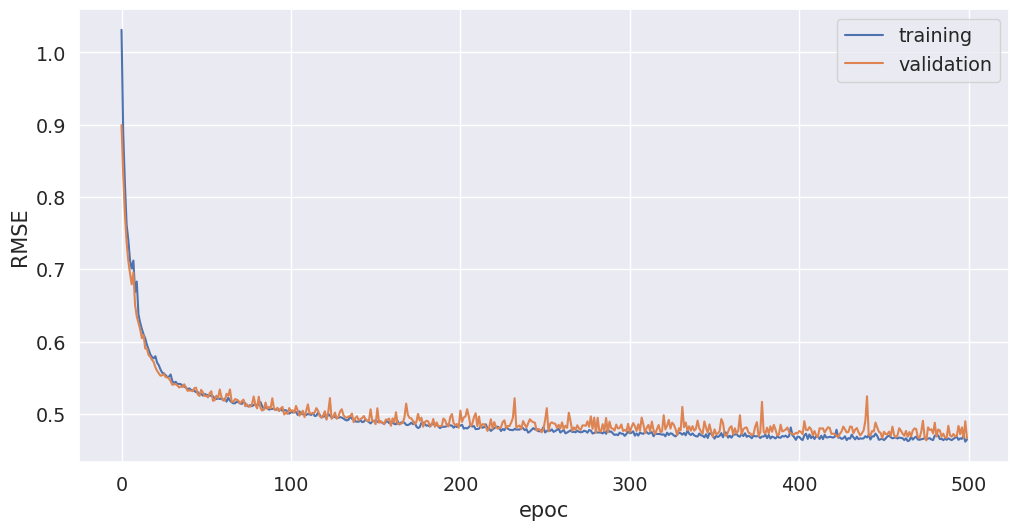

In [65]:
loss = np.sqrt(history.history["loss"])
val_loss = np.sqrt(history.history["val_loss"])
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("RMSE")
plt.xlabel("epoc")
plt.plot(loss, label="training")
plt.plot(val_loss, label="validation")
plt.legend()

Vemos que el poder de generalización de esta red es mucho mejor que la anterior (los errores de validation y training no están tan separados y no perdí precisión o accuracy)

## Clasificación

Primero un ejemplo de clasificación binaria y después uno de clasificación con n clases

In [66]:
header = [
    "pelvic incidence",
    "pelvic tilt",
    "lumbar lordosis angle",
    "sacral slope",
    "pelvic radius",
    "grade of spondylolisthesis",
    "class",
]

In [67]:
header

['pelvic incidence',
 'pelvic tilt',
 'lumbar lordosis angle',
 'sacral slope',
 'pelvic radius',
 'grade of spondylolisthesis',
 'class']

In [68]:
data = pd.read_csv(
    "https://drive.google.com/uc?export=download&id=1T9VNcGMatXFrg7JpIkwHpqHrb8dGKvtP",
    names=header,
    index_col=False,
)
data.head()

pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral slope  \
0             63.03        22.55                  39.61         40.48   
1             39.06        10.06                  25.02         29.00   
2             68.83        22.22                  50.09         46.61   
3             69.30        24.65                  44.31         44.64   
4             49.71         9.65                  28.32         40.06   

   pelvic radius  grade of spondylolisthesis class  
0          98.67                       -0.25    AB  
1         114.41                        4.56    AB  
2         105.99                       -3.53    AB  
3         101.87                       11.21    AB  
4         108.17                        7.92    AB

/opt/hostedtoolcache/Python/3.7.9/x64/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


array([[<AxesSubplot:title={'center':'pelvic incidence'}>,
        <AxesSubplot:title={'center':'pelvic tilt'}>],
       [<AxesSubplot:title={'center':'lumbar lordosis angle'}>,
        <AxesSubplot:title={'center':'sacral slope'}>],
       [<AxesSubplot:title={'center':'pelvic radius'}>,
        <AxesSubplot:title={'center':'grade of spondylolisthesis'}>]],
      dtype=object)

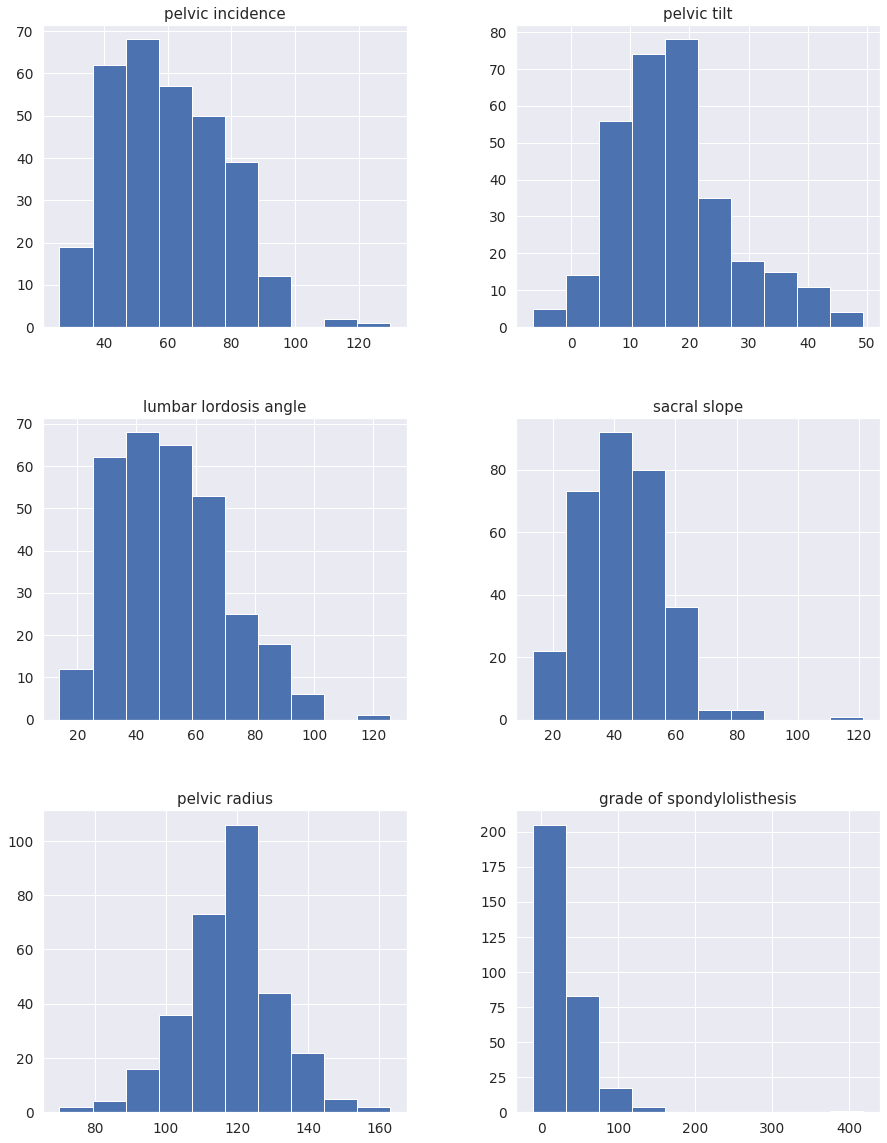

In [69]:
fig = plt.figure(figsize=(15, 20))
ax = fig.gca()

data.hist(ax=ax)

Los datasets no están tan mal distribuídos así que elijo no normalizarlos

Paso los valores de "AB" y "NO" a valores categóricos

In [70]:
label_encoder = preprocessing.LabelEncoder()

In [71]:
target = np.unique(data["class"])

In [72]:
label_encoder.fit(target)

LabelEncoder()

In [73]:
data["class"] = label_encoder.transform(data["class"])

In [74]:
data.head()

pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral slope  \
0             63.03        22.55                  39.61         40.48   
1             39.06        10.06                  25.02         29.00   
2             68.83        22.22                  50.09         46.61   
3             69.30        24.65                  44.31         44.64   
4             49.71         9.65                  28.32         40.06   

   pelvic radius  grade of spondylolisthesis  class  
0          98.67                       -0.25      0  
1         114.41                        4.56      0  
2         105.99                       -3.53      0  
3         101.87                       11.21      0  
4         108.17                        7.92      0

In [75]:
x_columns = [
    "pelvic incidence",
    "pelvic tilt",
    "lumbar lordosis angle",
    "sacral slope",
    "pelvic radius",
    "grade of spondylolisthesis",
]
x_data = data[x_columns]
y_data = data['class']

In [76]:
x_data.head()

pelvic incidence  pelvic tilt  lumbar lordosis angle  sacral slope  \
0             63.03        22.55                  39.61         40.48   
1             39.06        10.06                  25.02         29.00   
2             68.83        22.22                  50.09         46.61   
3             69.30        24.65                  44.31         44.64   
4             49.71         9.65                  28.32         40.06   

   pelvic radius  grade of spondylolisthesis  
0          98.67                       -0.25  
1         114.41                        4.56  
2         105.99                       -3.53  
3         101.87                       11.21  
4         108.17                        7.92

Separo los datos en train y validation

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(
    x_data, y_data, test_size=0.4, random_state=66
)

Entreno un modelo sencillo de clasificación, un árbol de decisión para tener una referencia de error.

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
model_tree = DecisionTreeClassifier(criterion="entropy")

In [80]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

Calculo el accuracy de mi árbol entrenado:

In [81]:
from sklearn.metrics import accuracy_score

In [82]:
pred = model_tree.predict(X_validation)

In [83]:
decision_tree_acc = accuracy_score(pred, y_validation)
decision_tree_acc

0.782258064516129

Mi red tiene que tener como cantidad de neuronas en la capa de salida la cantidad de clases si uso softmax o 1 neurona para el caso que use una activación de tipo sigmoide

In [84]:
num_classes = 2

In [85]:
model = Sequential()
model.add(Dense(8, input_shape=(6,), activation='tanh'))
model.add(Dense(num_classes, activation="softmax"))

In [86]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 8)                 56        
_________________________________________________________________
dense_27 (Dense)             (None, 2)                 18        
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


El modelo necesita los labels en one hot encoding, uso la función to_categorical para transformarlos

In [87]:
y_train[1:10]

235    1
66     0
143    0
256    1
18     0
279    1
273    1
120    0
154    0
Name: class, dtype: int64

In [88]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_validation, num_classes)

In [89]:
y_train[1:10]

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

Ahora si puedo entrenar!

In [90]:
history = model.fit(
    X_train.values, y_train, epochs=100, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6277 - accuracy: 0.6875

186/186 [==============================] - 0s 471us/step - loss: 0.6312 - accuracy: 0.6774 - val_loss: 0.6691 - val_accuracy: 0.6210


Epoch 2/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6453 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.6268 - accuracy: 0.6774 - val_loss: 0.6682 - val_accuracy: 0.6290


Epoch 3/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6140 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6245 - accuracy: 0.6828 - val_loss: 0.6696 - val_accuracy: 0.6290


Epoch 4/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7490 - accuracy: 0.5312

186/186 [==============================] - 0s 52us/step - loss: 0.6226 - accuracy: 0.6828 - val_loss: 0.6698 - val_accuracy: 0.6290


Epoch 5/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6640 - accuracy: 0.6250

186/186 [==============================] - 0s 51us/step - loss: 0.6222 - accuracy: 0.6828 - val_loss: 0.6706 - val_accuracy: 0.6290


Epoch 6/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5407 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6217 - accuracy: 0.6828 - val_loss: 0.6707 - val_accuracy: 0.6290


Epoch 7/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6396 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 0.6215 - accuracy: 0.6828 - val_loss: 0.6710 - val_accuracy: 0.6290


Epoch 8/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6489 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.6210 - accuracy: 0.6828 - val_loss: 0.6701 - val_accuracy: 0.6290


Epoch 9/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5921 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.6187 - accuracy: 0.6828 - val_loss: 0.6703 - val_accuracy: 0.6290


Epoch 10/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5269 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.6173 - accuracy: 0.6828 - val_loss: 0.6702 - val_accuracy: 0.6290


Epoch 11/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6474 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 0.6167 - accuracy: 0.6828 - val_loss: 0.6693 - val_accuracy: 0.6290


Epoch 12/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5926 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6161 - accuracy: 0.6828 - val_loss: 0.6681 - val_accuracy: 0.6290


Epoch 13/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6731 - accuracy: 0.6250

186/186 [==============================] - 0s 50us/step - loss: 0.6149 - accuracy: 0.6828 - val_loss: 0.6675 - val_accuracy: 0.6290


Epoch 14/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6229 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.6132 - accuracy: 0.6828 - val_loss: 0.6658 - val_accuracy: 0.6290


Epoch 15/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6297 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 0.6116 - accuracy: 0.6828 - val_loss: 0.6633 - val_accuracy: 0.6290


Epoch 16/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6761 - accuracy: 0.5938

186/186 [==============================] - 0s 68us/step - loss: 0.6101 - accuracy: 0.6828 - val_loss: 0.6605 - val_accuracy: 0.6290


Epoch 17/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5500 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.6084 - accuracy: 0.6828 - val_loss: 0.6587 - val_accuracy: 0.6290


Epoch 18/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6613 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.6056 - accuracy: 0.6828 - val_loss: 0.6554 - val_accuracy: 0.6290


Epoch 19/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6278 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.6037 - accuracy: 0.6828 - val_loss: 0.6522 - val_accuracy: 0.6290


Epoch 20/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6246 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.6001 - accuracy: 0.6828 - val_loss: 0.6488 - val_accuracy: 0.6290


Epoch 21/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5714 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.5962 - accuracy: 0.6989 - val_loss: 0.6456 - val_accuracy: 0.6290


Epoch 22/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6574 - accuracy: 0.6250

186/186 [==============================] - 0s 58us/step - loss: 0.5912 - accuracy: 0.6989 - val_loss: 0.6422 - val_accuracy: 0.6290


Epoch 23/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4038 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.5872 - accuracy: 0.6989 - val_loss: 0.6382 - val_accuracy: 0.6290


Epoch 24/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5852 - accuracy: 0.6875



186/186 [==============================] - 0s 50us/step - loss: 0.5823 - accuracy: 0.6989 - val_loss: 0.6343 - val_accuracy: 0.6290


Epoch 25/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6192 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 0.5790 - accuracy: 0.6989 - val_loss: 0.6299 - val_accuracy: 0.6290


Epoch 26/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5868 - accuracy: 0.6875



186/186 [==============================] - 0s 50us/step - loss: 0.5735 - accuracy: 0.6989 - val_loss: 0.6238 - val_accuracy: 0.6290


Epoch 27/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5406 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.5647 - accuracy: 0.6989 - val_loss: 0.6175 - val_accuracy: 0.6290


Epoch 28/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6686 - accuracy: 0.5625

186/186 [==============================] - 0s 52us/step - loss: 0.5561 - accuracy: 0.6989 - val_loss: 0.6181 - val_accuracy: 0.6290


Epoch 29/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6153 - accuracy: 0.6250

186/186 [==============================] - 0s 57us/step - loss: 0.5506 - accuracy: 0.6989 - val_loss: 0.6137 - val_accuracy: 0.6290


Epoch 30/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5590 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.5463 - accuracy: 0.6989 - val_loss: 0.6101 - val_accuracy: 0.6290


Epoch 31/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5685 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.5437 - accuracy: 0.6989 - val_loss: 0.6061 - val_accuracy: 0.6290


Epoch 32/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5061 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.5402 - accuracy: 0.6989 - val_loss: 0.6034 - val_accuracy: 0.6290


Epoch 33/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6054 - accuracy: 0.5625

186/186 [==============================] - 0s 54us/step - loss: 0.5374 - accuracy: 0.6989 - val_loss: 0.6006 - val_accuracy: 0.6290


Epoch 34/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5017 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.5339 - accuracy: 0.6989 - val_loss: 0.5983 - val_accuracy: 0.6290


Epoch 35/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5100 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.5310 - accuracy: 0.6989 - val_loss: 0.5960 - val_accuracy: 0.6290


Epoch 36/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4966 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.5283 - accuracy: 0.6989 - val_loss: 0.5939 - val_accuracy: 0.6290


Epoch 37/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4128 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.5261 - accuracy: 0.6989 - val_loss: 0.5921 - val_accuracy: 0.6290


Epoch 38/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6257 - accuracy: 0.5625

186/186 [==============================] - 0s 51us/step - loss: 0.5233 - accuracy: 0.6989 - val_loss: 0.5889 - val_accuracy: 0.6290


Epoch 39/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4513 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.5208 - accuracy: 0.6989 - val_loss: 0.5874 - val_accuracy: 0.6290


Epoch 40/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5391 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.5181 - accuracy: 0.6989 - val_loss: 0.5834 - val_accuracy: 0.6371


Epoch 41/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4781 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.5160 - accuracy: 0.7043 - val_loss: 0.5813 - val_accuracy: 0.6371


Epoch 42/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5054 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.5138 - accuracy: 0.7043 - val_loss: 0.5793 - val_accuracy: 0.6371


Epoch 43/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5294 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.5112 - accuracy: 0.7043 - val_loss: 0.5778 - val_accuracy: 0.6371


Epoch 44/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4761 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.5092 - accuracy: 0.7043 - val_loss: 0.5766 - val_accuracy: 0.6371


Epoch 45/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5004 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.5072 - accuracy: 0.7043 - val_loss: 0.5764 - val_accuracy: 0.6371


Epoch 46/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4994 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.5043 - accuracy: 0.7043 - val_loss: 0.5741 - val_accuracy: 0.6371


Epoch 47/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4652 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.5020 - accuracy: 0.7043 - val_loss: 0.5727 - val_accuracy: 0.6371


Epoch 48/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5181 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.5005 - accuracy: 0.7043 - val_loss: 0.5698 - val_accuracy: 0.6371


Epoch 49/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4680 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.4985 - accuracy: 0.7043 - val_loss: 0.5683 - val_accuracy: 0.6371


Epoch 50/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4415 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.4972 - accuracy: 0.7043 - val_loss: 0.5682 - val_accuracy: 0.6371


Epoch 51/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5603 - accuracy: 0.6562



186/186 [==============================] - 0s 49us/step - loss: 0.4947 - accuracy: 0.7043 - val_loss: 0.5627 - val_accuracy: 0.6371


Epoch 52/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4287 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.4934 - accuracy: 0.7043 - val_loss: 0.5593 - val_accuracy: 0.6371


Epoch 53/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5249 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.4918 - accuracy: 0.7043 - val_loss: 0.5582 - val_accuracy: 0.6371


Epoch 54/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5213 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 0.4902 - accuracy: 0.7043 - val_loss: 0.5591 - val_accuracy: 0.6371


Epoch 55/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5071 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.4886 - accuracy: 0.7043 - val_loss: 0.5608 - val_accuracy: 0.6371


Epoch 56/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4254 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.4871 - accuracy: 0.7043 - val_loss: 0.5609 - val_accuracy: 0.6371


Epoch 57/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5092 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.4856 - accuracy: 0.7043 - val_loss: 0.5593 - val_accuracy: 0.6371


Epoch 58/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3966 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.4845 - accuracy: 0.7043 - val_loss: 0.5545 - val_accuracy: 0.6371


Epoch 59/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5357 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.4828 - accuracy: 0.7043 - val_loss: 0.5523 - val_accuracy: 0.6371


Epoch 60/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4127 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.4815 - accuracy: 0.7043 - val_loss: 0.5531 - val_accuracy: 0.6371


Epoch 61/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5149 - accuracy: 0.5938

186/186 [==============================] - 0s 50us/step - loss: 0.4808 - accuracy: 0.7043 - val_loss: 0.5485 - val_accuracy: 0.6371


Epoch 62/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5371 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.4789 - accuracy: 0.7043 - val_loss: 0.5486 - val_accuracy: 0.6371


Epoch 63/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4393 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.4775 - accuracy: 0.7043 - val_loss: 0.5502 - val_accuracy: 0.6371


Epoch 64/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3637 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.4803 - accuracy: 0.7043 - val_loss: 0.5548 - val_accuracy: 0.6371


Epoch 65/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4363 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.4756 - accuracy: 0.7043 - val_loss: 0.5419 - val_accuracy: 0.6371


Epoch 66/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5622 - accuracy: 0.5312

186/186 [==============================] - 0s 50us/step - loss: 0.4748 - accuracy: 0.7043 - val_loss: 0.5364 - val_accuracy: 0.6371


Epoch 67/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6210 - accuracy: 0.4688

186/186 [==============================] - 0s 48us/step - loss: 0.4745 - accuracy: 0.7043 - val_loss: 0.5349 - val_accuracy: 0.6371


Epoch 68/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4682 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.4730 - accuracy: 0.7043 - val_loss: 0.5344 - val_accuracy: 0.6371


Epoch 69/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4052 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.4719 - accuracy: 0.7043 - val_loss: 0.5338 - val_accuracy: 0.6371


Epoch 70/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4141 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.4703 - accuracy: 0.7043 - val_loss: 0.5344 - val_accuracy: 0.6371


Epoch 71/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4854 - accuracy: 0.5938

186/186 [==============================] - 0s 49us/step - loss: 0.4696 - accuracy: 0.7043 - val_loss: 0.5386 - val_accuracy: 0.6371


Epoch 72/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4576 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.4675 - accuracy: 0.7043 - val_loss: 0.5375 - val_accuracy: 0.6371


Epoch 73/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4902 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.4661 - accuracy: 0.7043 - val_loss: 0.5396 - val_accuracy: 0.6371


Epoch 74/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4171 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.4656 - accuracy: 0.7043 - val_loss: 0.5397 - val_accuracy: 0.6371


Epoch 75/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4157 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.4639 - accuracy: 0.7043 - val_loss: 0.5340 - val_accuracy: 0.6371


Epoch 76/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4961 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.4630 - accuracy: 0.7043 - val_loss: 0.5310 - val_accuracy: 0.6371


Epoch 77/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3631 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.4622 - accuracy: 0.7043 - val_loss: 0.5287 - val_accuracy: 0.6371


Epoch 78/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3961 - accuracy: 0.7188

186/186 [==============================] - 0s 47us/step - loss: 0.4612 - accuracy: 0.7043 - val_loss: 0.5313 - val_accuracy: 0.6371


Epoch 79/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5218 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.4598 - accuracy: 0.7043 - val_loss: 0.5299 - val_accuracy: 0.6371


Epoch 80/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4874 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.4591 - accuracy: 0.7043 - val_loss: 0.5280 - val_accuracy: 0.6371


Epoch 81/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4282 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.4587 - accuracy: 0.7043 - val_loss: 0.5237 - val_accuracy: 0.6371


Epoch 82/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5788 - accuracy: 0.6250

186/186 [==============================] - 0s 49us/step - loss: 0.4576 - accuracy: 0.7043 - val_loss: 0.5240 - val_accuracy: 0.6371


Epoch 83/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4292 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.4555 - accuracy: 0.7043 - val_loss: 0.5252 - val_accuracy: 0.6371


Epoch 84/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4940 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.4555 - accuracy: 0.7043 - val_loss: 0.5250 - val_accuracy: 0.6371


Epoch 85/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4728 - accuracy: 0.6562

186/186 [==============================] - 0s 47us/step - loss: 0.4543 - accuracy: 0.7043 - val_loss: 0.5227 - val_accuracy: 0.6371


Epoch 86/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5009 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.4535 - accuracy: 0.7043 - val_loss: 0.5192 - val_accuracy: 0.6371


Epoch 87/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4620 - accuracy: 0.5938

186/186 [==============================] - 0s 56us/step - loss: 0.4529 - accuracy: 0.7043 - val_loss: 0.5183 - val_accuracy: 0.6371


Epoch 88/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4297 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.4509 - accuracy: 0.7043 - val_loss: 0.5191 - val_accuracy: 0.6371


Epoch 89/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4015 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.4509 - accuracy: 0.7043 - val_loss: 0.5185 - val_accuracy: 0.6371


Epoch 90/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3854 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.4508 - accuracy: 0.7043 - val_loss: 0.5187 - val_accuracy: 0.6371


Epoch 91/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4118 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.4489 - accuracy: 0.7043 - val_loss: 0.5160 - val_accuracy: 0.6371


Epoch 92/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4991 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.4478 - accuracy: 0.7043 - val_loss: 0.5143 - val_accuracy: 0.6371


Epoch 93/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4270 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.4482 - accuracy: 0.7043 - val_loss: 0.5139 - val_accuracy: 0.6371


Epoch 94/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4142 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.4470 - accuracy: 0.7043 - val_loss: 0.5139 - val_accuracy: 0.6371


Epoch 95/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3451 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.4464 - accuracy: 0.7043 - val_loss: 0.5136 - val_accuracy: 0.6371


Epoch 96/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4904 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.4455 - accuracy: 0.7043 - val_loss: 0.5125 - val_accuracy: 0.6371


Epoch 97/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4636 - accuracy: 0.6562

186/186 [==============================] - 0s 48us/step - loss: 0.4447 - accuracy: 0.7043 - val_loss: 0.5118 - val_accuracy: 0.6371


Epoch 98/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4594 - accuracy: 0.6250

186/186 [==============================] - 0s 58us/step - loss: 0.4456 - accuracy: 0.7043 - val_loss: 0.5110 - val_accuracy: 0.6371


Epoch 99/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4299 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.4438 - accuracy: 0.7043 - val_loss: 0.5105 - val_accuracy: 0.6371


Epoch 100/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4585 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.4430 - accuracy: 0.7043 - val_loss: 0.5102 - val_accuracy: 0.6371


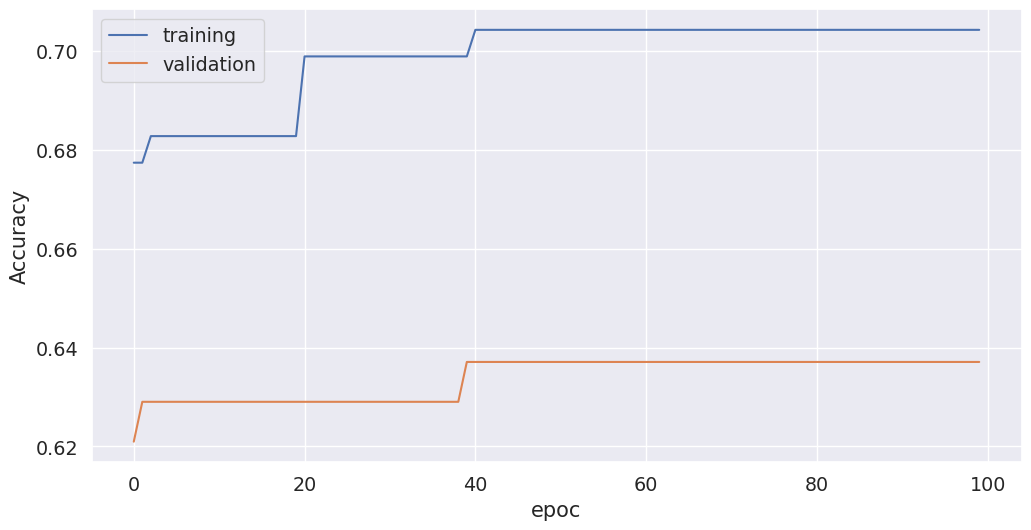

In [91]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

A medida que las red se va haciendo más profunda conviene usar relu. Agrego relu + regularizacion y cambio optimizador

In [92]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='relu'))
model.add(Dense(num_classes, activation="softmax"))

In [93]:
model.compile(
    loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy']
)
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 16)                112       
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_30 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_______________________________________________________

In [94]:
history = model.fit(
    X_train.values, y_train, epochs=100, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/100
 32/186 [====>.........................] - ETA: 0s - loss: 21.3258 - accuracy: 0.4688

186/186 [==============================] - 0s 1ms/step - loss: 23.6014 - accuracy: 0.4624 - val_loss: 12.0852 - val_accuracy: 0.4435


Epoch 2/100
 32/186 [====>.........................] - ETA: 0s - loss: 21.8305 - accuracy: 0.5625

186/186 [==============================] - 0s 86us/step - loss: 15.9505 - accuracy: 0.5108 - val_loss: 5.7277 - val_accuracy: 0.6452


Epoch 3/100
 32/186 [====>.........................] - ETA: 0s - loss: 13.2705 - accuracy: 0.5000

186/186 [==============================] - 0s 66us/step - loss: 10.4253 - accuracy: 0.5753 - val_loss: 4.3865 - val_accuracy: 0.6290


Epoch 4/100
 32/186 [====>.........................] - ETA: 0s - loss: 7.2422 - accuracy: 0.5938

186/186 [==============================] - 0s 62us/step - loss: 9.9151 - accuracy: 0.5484 - val_loss: 3.6952 - val_accuracy: 0.6210


Epoch 5/100
 32/186 [====>.........................] - ETA: 0s - loss: 7.9672 - accuracy: 0.7500

186/186 [==============================] - 0s 73us/step - loss: 7.9270 - accuracy: 0.6290 - val_loss: 3.2619 - val_accuracy: 0.6129


Epoch 6/100
 32/186 [====>.........................] - ETA: 0s - loss: 9.2313 - accuracy: 0.5625

186/186 [==============================] - 0s 65us/step - loss: 8.4320 - accuracy: 0.6183 - val_loss: 2.5418 - val_accuracy: 0.6048


Epoch 7/100
 32/186 [====>.........................] - ETA: 0s - loss: 5.3524 - accuracy: 0.6250

186/186 [==============================] - 0s 59us/step - loss: 5.9824 - accuracy: 0.6129 - val_loss: 1.9433 - val_accuracy: 0.6048


Epoch 8/100
 32/186 [====>.........................] - ETA: 0s - loss: 4.1244 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 4.1771 - accuracy: 0.7204 - val_loss: 1.2744 - val_accuracy: 0.6210


Epoch 9/100
 32/186 [====>.........................] - ETA: 0s - loss: 8.1510 - accuracy: 0.7500

186/186 [==============================] - 0s 80us/step - loss: 5.4315 - accuracy: 0.6720 - val_loss: 0.9537 - val_accuracy: 0.6210


Epoch 10/100
 32/186 [====>.........................] - ETA: 0s - loss: 5.7151 - accuracy: 0.5938

186/186 [==============================] - 0s 61us/step - loss: 4.4181 - accuracy: 0.6452 - val_loss: 0.7099 - val_accuracy: 0.6129


Epoch 11/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.2456 - accuracy: 0.8125

186/186 [==============================] - 0s 72us/step - loss: 3.3991 - accuracy: 0.6452 - val_loss: 0.6141 - val_accuracy: 0.6290


Epoch 12/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.0963 - accuracy: 0.7500

186/186 [==============================] - 0s 66us/step - loss: 3.0404 - accuracy: 0.6452 - val_loss: 0.5727 - val_accuracy: 0.6290


Epoch 13/100
 32/186 [====>.........................] - ETA: 0s - loss: 3.6030 - accuracy: 0.5938

186/186 [==============================] - 0s 67us/step - loss: 2.8588 - accuracy: 0.6667 - val_loss: 0.5440 - val_accuracy: 0.6371


Epoch 14/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.4771 - accuracy: 0.6250

186/186 [==============================] - 0s 70us/step - loss: 2.6769 - accuracy: 0.6828 - val_loss: 0.5461 - val_accuracy: 0.6371


Epoch 15/100
 32/186 [====>.........................] - ETA: 0s - loss: 5.1823 - accuracy: 0.6875

186/186 [==============================] - 0s 75us/step - loss: 2.6243 - accuracy: 0.6882 - val_loss: 0.5433 - val_accuracy: 0.6371


Epoch 16/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0709 - accuracy: 0.7188

186/186 [==============================] - 0s 65us/step - loss: 1.5869 - accuracy: 0.7204 - val_loss: 0.5408 - val_accuracy: 0.6371


Epoch 17/100


 32/186 [====>.........................] - ETA: 0s - loss: 2.7951 - accuracy: 0.7188

186/186 [==============================] - 0s 87us/step - loss: 1.8151 - accuracy: 0.6774 - val_loss: 0.5501 - val_accuracy: 0.6371


Epoch 18/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.2957 - accuracy: 0.6250

186/186 [==============================] - 0s 70us/step - loss: 2.6299 - accuracy: 0.6452 - val_loss: 0.5606 - val_accuracy: 0.6371


Epoch 19/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.9074 - accuracy: 0.5938

186/186 [==============================] - 0s 66us/step - loss: 1.9964 - accuracy: 0.6559 - val_loss: 0.5851 - val_accuracy: 0.6371


Epoch 20/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7780 - accuracy: 0.6562

186/186 [==============================] - 0s 61us/step - loss: 1.3448 - accuracy: 0.7097 - val_loss: 0.6082 - val_accuracy: 0.6371


Epoch 21/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.4086 - accuracy: 0.6562

186/186 [==============================] - 0s 63us/step - loss: 1.4209 - accuracy: 0.6828 - val_loss: 0.6257 - val_accuracy: 0.6371


Epoch 22/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.9423 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 1.5004 - accuracy: 0.6935 - val_loss: 0.6330 - val_accuracy: 0.6371


Epoch 23/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.8455 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 1.8576 - accuracy: 0.6882 - val_loss: 0.6423 - val_accuracy: 0.6371


Epoch 24/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.8601 - accuracy: 0.7188

186/186 [==============================] - 0s 65us/step - loss: 1.5583 - accuracy: 0.6667 - val_loss: 0.6642 - val_accuracy: 0.6371


Epoch 25/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7223 - accuracy: 0.6562

186/186 [==============================] - 0s 68us/step - loss: 0.7963 - accuracy: 0.7043 - val_loss: 0.6672 - val_accuracy: 0.6371


Epoch 26/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5226 - accuracy: 0.7188

186/186 [==============================] - 0s 64us/step - loss: 1.2217 - accuracy: 0.7043 - val_loss: 0.6679 - val_accuracy: 0.6371


Epoch 27/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7532 - accuracy: 0.5938

186/186 [==============================] - 0s 60us/step - loss: 1.0705 - accuracy: 0.7097 - val_loss: 0.6671 - val_accuracy: 0.6371


Epoch 28/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7124 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.9234 - accuracy: 0.6935 - val_loss: 0.6665 - val_accuracy: 0.6371


Epoch 29/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.4574 - accuracy: 0.5625

186/186 [==============================] - 0s 62us/step - loss: 1.2774 - accuracy: 0.6613 - val_loss: 0.6658 - val_accuracy: 0.6371


Epoch 30/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8420 - accuracy: 0.5938

186/186 [==============================] - 0s 60us/step - loss: 0.9997 - accuracy: 0.6989 - val_loss: 0.6650 - val_accuracy: 0.6371


Epoch 31/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.6627 - accuracy: 0.5938

186/186 [==============================] - 0s 57us/step - loss: 1.2655 - accuracy: 0.6720 - val_loss: 0.6642 - val_accuracy: 0.6371


Epoch 32/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6862 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 1.4205 - accuracy: 0.7043 - val_loss: 0.6636 - val_accuracy: 0.6371


Epoch 33/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5973 - accuracy: 0.5938

186/186 [==============================] - 0s 62us/step - loss: 0.7504 - accuracy: 0.6935 - val_loss: 0.6631 - val_accuracy: 0.6371


Epoch 34/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4945 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 1.0518 - accuracy: 0.7151 - val_loss: 0.6625 - val_accuracy: 0.6371


Epoch 35/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.7286 - accuracy: 0.6250

186/186 [==============================] - 0s 59us/step - loss: 1.0209 - accuracy: 0.6935 - val_loss: 0.6618 - val_accuracy: 0.6371


Epoch 36/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9498 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.6287 - accuracy: 0.7204 - val_loss: 0.6612 - val_accuracy: 0.6371


Epoch 37/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7698 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 1.0010 - accuracy: 0.6989 - val_loss: 0.6607 - val_accuracy: 0.6371


Epoch 38/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8234 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.6040 - accuracy: 0.7204 - val_loss: 0.6603 - val_accuracy: 0.6371


Epoch 39/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9359 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.8495 - accuracy: 0.7258 - val_loss: 0.6597 - val_accuracy: 0.6371


Epoch 40/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6892 - accuracy: 0.6875

186/186 [==============================] - 0s 61us/step - loss: 0.8773 - accuracy: 0.7151 - val_loss: 0.6593 - val_accuracy: 0.6371


Epoch 41/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5441 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.9829 - accuracy: 0.6882 - val_loss: 0.6586 - val_accuracy: 0.6371


Epoch 42/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9479 - accuracy: 0.5938

186/186 [==============================] - 0s 60us/step - loss: 0.7954 - accuracy: 0.6935 - val_loss: 0.6581 - val_accuracy: 0.6371


Epoch 43/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5863 - accuracy: 0.5625

186/186 [==============================] - 0s 56us/step - loss: 0.7161 - accuracy: 0.7097 - val_loss: 0.6576 - val_accuracy: 0.6371


Epoch 44/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4801 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 1.0110 - accuracy: 0.6882 - val_loss: 0.6572 - val_accuracy: 0.6371


Epoch 45/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5501 - accuracy: 0.6875

186/186 [==============================] - 0s 61us/step - loss: 0.7143 - accuracy: 0.6989 - val_loss: 0.6568 - val_accuracy: 0.6371


Epoch 46/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9011 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.8114 - accuracy: 0.7097 - val_loss: 0.6565 - val_accuracy: 0.6371


Epoch 47/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5356 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 1.2100 - accuracy: 0.6720 - val_loss: 0.6562 - val_accuracy: 0.6371


Epoch 48/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5654 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.6535 - accuracy: 0.6989 - val_loss: 0.6559 - val_accuracy: 0.6371


Epoch 49/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5441 - accuracy: 0.6875

186/186 [==============================] - 0s 61us/step - loss: 0.8086 - accuracy: 0.7151 - val_loss: 0.6556 - val_accuracy: 0.6371


Epoch 50/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5145 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.7038 - accuracy: 0.7097 - val_loss: 0.6554 - val_accuracy: 0.6371


Epoch 51/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5637 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.7169 - accuracy: 0.6882 - val_loss: 0.6551 - val_accuracy: 0.6371


Epoch 52/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5706 - accuracy: 0.6562

186/186 [==============================] - 0s 63us/step - loss: 0.7183 - accuracy: 0.6989 - val_loss: 0.6549 - val_accuracy: 0.6371


Epoch 53/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1061 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.7674 - accuracy: 0.6989 - val_loss: 0.6547 - val_accuracy: 0.6371


Epoch 54/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5604 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.5826 - accuracy: 0.7043 - val_loss: 0.6543 - val_accuracy: 0.6371


Epoch 55/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5340 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.6653 - accuracy: 0.6989 - val_loss: 0.6540 - val_accuracy: 0.6371


Epoch 56/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8146 - accuracy: 0.6875

186/186 [==============================] - 0s 61us/step - loss: 0.7915 - accuracy: 0.6989 - val_loss: 0.6537 - val_accuracy: 0.6371


Epoch 57/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1083 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.8603 - accuracy: 0.6882 - val_loss: 0.6535 - val_accuracy: 0.6371


Epoch 58/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4572 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.5949 - accuracy: 0.7043 - val_loss: 0.6533 - val_accuracy: 0.6371


Epoch 59/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4899 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.7132 - accuracy: 0.7097 - val_loss: 0.6532 - val_accuracy: 0.6371


Epoch 60/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5098 - accuracy: 0.7188

186/186 [==============================] - 0s 66us/step - loss: 0.6676 - accuracy: 0.7097 - val_loss: 0.6531 - val_accuracy: 0.6371


Epoch 61/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.8198 - accuracy: 0.5625

186/186 [==============================] - 0s 65us/step - loss: 0.5994 - accuracy: 0.7043 - val_loss: 0.6530 - val_accuracy: 0.6371


Epoch 62/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7070 - accuracy: 0.6250

186/186 [==============================] - 0s 60us/step - loss: 0.6877 - accuracy: 0.6935 - val_loss: 0.6528 - val_accuracy: 0.6371


Epoch 63/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9078 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 0.8378 - accuracy: 0.6989 - val_loss: 0.6531 - val_accuracy: 0.6371


Epoch 64/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.2806 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.6959 - accuracy: 0.6989 - val_loss: 0.6524 - val_accuracy: 0.6371


Epoch 65/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5626 - accuracy: 0.7188



186/186 [==============================] - 0s 59us/step - loss: 0.6603 - accuracy: 0.6989 - val_loss: 0.6522 - val_accuracy: 0.6371


Epoch 66/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5119 - accuracy: 0.6875



186/186 [==============================] - 0s 59us/step - loss: 0.7349 - accuracy: 0.6882 - val_loss: 0.6520 - val_accuracy: 0.6371


Epoch 67/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0533 - accuracy: 0.6250

186/186 [==============================] - 0s 62us/step - loss: 0.6708 - accuracy: 0.6935 - val_loss: 0.6520 - val_accuracy: 0.6371


Epoch 68/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6357 - accuracy: 0.5938

186/186 [==============================] - 0s 62us/step - loss: 0.6148 - accuracy: 0.7043 - val_loss: 0.6519 - val_accuracy: 0.6371


Epoch 69/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5410 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.6302 - accuracy: 0.7043 - val_loss: 0.6519 - val_accuracy: 0.6371


Epoch 70/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5568 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.5674 - accuracy: 0.7097 - val_loss: 0.6518 - val_accuracy: 0.6371


Epoch 71/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5860 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.6193 - accuracy: 0.6935 - val_loss: 0.6517 - val_accuracy: 0.6371


Epoch 72/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5554 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.6025 - accuracy: 0.7097 - val_loss: 0.6517 - val_accuracy: 0.6371


Epoch 73/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9270 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.9139 - accuracy: 0.6882 - val_loss: 0.6516 - val_accuracy: 0.6371


Epoch 74/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5386 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.5875 - accuracy: 0.7097 - val_loss: 0.6516 - val_accuracy: 0.6371


Epoch 75/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.9504 - accuracy: 0.6562

186/186 [==============================] - 0s 60us/step - loss: 0.7255 - accuracy: 0.6989 - val_loss: 0.6516 - val_accuracy: 0.6371


Epoch 76/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6098 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.7022 - accuracy: 0.6774 - val_loss: 0.6516 - val_accuracy: 0.6371


Epoch 77/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5814 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6036 - accuracy: 0.7097 - val_loss: 0.6515 - val_accuracy: 0.6371


Epoch 78/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5662 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.6272 - accuracy: 0.7097 - val_loss: 0.6515 - val_accuracy: 0.6371


Epoch 79/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4892 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.6266 - accuracy: 0.7043 - val_loss: 0.6515 - val_accuracy: 0.6371


Epoch 80/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5873 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 0.6492 - accuracy: 0.6989 - val_loss: 0.6514 - val_accuracy: 0.6371


Epoch 81/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5896 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.5863 - accuracy: 0.7043 - val_loss: 0.6514 - val_accuracy: 0.6371


Epoch 82/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4639 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.5735 - accuracy: 0.7097 - val_loss: 0.6514 - val_accuracy: 0.6371


Epoch 83/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5788 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.6326 - accuracy: 0.7043 - val_loss: 0.6514 - val_accuracy: 0.6371


Epoch 84/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5626 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.5959 - accuracy: 0.6935 - val_loss: 0.6486 - val_accuracy: 0.6371


Epoch 85/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6143 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.6392 - accuracy: 0.6989 - val_loss: 0.6501 - val_accuracy: 0.6371


Epoch 86/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1127 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.7775 - accuracy: 0.6989 - val_loss: 0.6447 - val_accuracy: 0.6371


Epoch 87/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6681 - accuracy: 0.5938

186/186 [==============================] - 0s 57us/step - loss: 0.5653 - accuracy: 0.7151 - val_loss: 0.6439 - val_accuracy: 0.6371


Epoch 88/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7997 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.6622 - accuracy: 0.6935 - val_loss: 0.6494 - val_accuracy: 0.6371


Epoch 89/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0784 - accuracy: 0.6562

186/186 [==============================] - 0s 62us/step - loss: 0.6196 - accuracy: 0.7043 - val_loss: 0.6487 - val_accuracy: 0.6371


Epoch 90/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5239 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.7204 - accuracy: 0.6989 - val_loss: 0.6491 - val_accuracy: 0.6371


Epoch 91/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5202 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.5693 - accuracy: 0.7151 - val_loss: 0.6482 - val_accuracy: 0.6371


Epoch 92/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5095 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.6171 - accuracy: 0.7097 - val_loss: 0.6497 - val_accuracy: 0.6371


Epoch 93/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8163 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.7185 - accuracy: 0.6935 - val_loss: 0.6486 - val_accuracy: 0.6371


Epoch 94/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5583 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.6662 - accuracy: 0.7043 - val_loss: 0.6515 - val_accuracy: 0.6371


Epoch 95/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5366 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.5432 - accuracy: 0.7258 - val_loss: 0.6515 - val_accuracy: 0.6371


Epoch 96/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6624 - accuracy: 0.5625

186/186 [==============================] - 0s 57us/step - loss: 0.6248 - accuracy: 0.6935 - val_loss: 0.6506 - val_accuracy: 0.6371


Epoch 97/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6875 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 0.6347 - accuracy: 0.7043 - val_loss: 0.6516 - val_accuracy: 0.6371


Epoch 98/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5841 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.6368 - accuracy: 0.6989 - val_loss: 0.6516 - val_accuracy: 0.6371


Epoch 99/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5797 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.5665 - accuracy: 0.7151 - val_loss: 0.6516 - val_accuracy: 0.6371


Epoch 100/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5151 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.5639 - accuracy: 0.7151 - val_loss: 0.6517 - val_accuracy: 0.6371


In [95]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

Cambio de nuevo el optimizador por RMSprop

In [96]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4, activation='relu'))
model.add(Dense(num_classes, activation="softmax"))

In [97]:
opt = keras.optimizers.RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 16)                112       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_6 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_34 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_______________________________________________________

In [98]:
history = model.fit(
    X_train.values, y_train, epochs=100, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.5981 - accuracy: 0.3438

186/186 [==============================] - 0s 978us/step - loss: 1.6342 - accuracy: 0.5699 - val_loss: 0.6750 - val_accuracy: 0.6210


Epoch 2/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.9249 - accuracy: 0.5938

186/186 [==============================] - 0s 61us/step - loss: 1.3347 - accuracy: 0.6398 - val_loss: 0.6628 - val_accuracy: 0.6290


Epoch 3/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.5713 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 1.3694 - accuracy: 0.6290 - val_loss: 0.6630 - val_accuracy: 0.6371


Epoch 4/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7418 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.8977 - accuracy: 0.6398 - val_loss: 0.6506 - val_accuracy: 0.6371


Epoch 5/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0034 - accuracy: 0.5938

186/186 [==============================] - 0s 57us/step - loss: 0.8296 - accuracy: 0.6452 - val_loss: 0.6389 - val_accuracy: 0.6371


Epoch 6/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8184 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.9493 - accuracy: 0.6398 - val_loss: 0.6382 - val_accuracy: 0.6371


Epoch 7/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7956 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.9920 - accuracy: 0.6452 - val_loss: 0.6302 - val_accuracy: 0.6371


Epoch 8/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5713 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.7473 - accuracy: 0.6720 - val_loss: 0.6294 - val_accuracy: 0.6371


Epoch 9/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.3666 - accuracy: 0.6875

186/186 [==============================] - 0s 61us/step - loss: 0.8611 - accuracy: 0.6290 - val_loss: 0.6293 - val_accuracy: 0.6371


Epoch 10/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8961 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.7179 - accuracy: 0.6720 - val_loss: 0.6293 - val_accuracy: 0.6371


Epoch 11/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7280 - accuracy: 0.5625

186/186 [==============================] - 0s 59us/step - loss: 0.6360 - accuracy: 0.6882 - val_loss: 0.6295 - val_accuracy: 0.6371


Epoch 12/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7192 - accuracy: 0.6875

186/186 [==============================] - 0s 61us/step - loss: 0.7081 - accuracy: 0.6882 - val_loss: 0.6288 - val_accuracy: 0.6371


Epoch 13/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6846 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.6419 - accuracy: 0.7204 - val_loss: 0.6286 - val_accuracy: 0.6371


Epoch 14/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5409 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.7045 - accuracy: 0.6882 - val_loss: 0.6289 - val_accuracy: 0.6371


Epoch 15/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9500 - accuracy: 0.4688

186/186 [==============================] - 0s 57us/step - loss: 0.7000 - accuracy: 0.6452 - val_loss: 0.6286 - val_accuracy: 0.6371


Epoch 16/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6649 - accuracy: 0.6875

186/186 [==============================] - 0s 61us/step - loss: 0.6785 - accuracy: 0.7043 - val_loss: 0.6284 - val_accuracy: 0.6371


Epoch 17/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5703 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.6314 - accuracy: 0.7151 - val_loss: 0.6288 - val_accuracy: 0.6371


Epoch 18/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6079 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.7503 - accuracy: 0.6828 - val_loss: 0.6277 - val_accuracy: 0.6371


Epoch 19/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8129 - accuracy: 0.5938

186/186 [==============================] - 0s 59us/step - loss: 0.6467 - accuracy: 0.6882 - val_loss: 0.6277 - val_accuracy: 0.6371


Epoch 20/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8822 - accuracy: 0.6250

186/186 [==============================] - 0s 57us/step - loss: 0.6194 - accuracy: 0.7151 - val_loss: 0.6263 - val_accuracy: 0.6371


Epoch 21/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6056 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.6281 - accuracy: 0.6935 - val_loss: 0.6263 - val_accuracy: 0.6371


Epoch 22/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6032 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.6216 - accuracy: 0.6989 - val_loss: 0.6263 - val_accuracy: 0.6371


Epoch 23/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.3610 - accuracy: 0.6250

186/186 [==============================] - 0s 58us/step - loss: 0.7205 - accuracy: 0.6882 - val_loss: 0.6255 - val_accuracy: 0.6371


Epoch 24/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5807 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.6158 - accuracy: 0.7097 - val_loss: 0.6255 - val_accuracy: 0.6371


Epoch 25/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6479 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.6332 - accuracy: 0.6989 - val_loss: 0.6256 - val_accuracy: 0.6371


Epoch 26/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6660 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.7053 - accuracy: 0.6935 - val_loss: 0.6253 - val_accuracy: 0.6371


Epoch 27/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5653 - accuracy: 0.7188

186/186 [==============================] - 0s 64us/step - loss: 0.6195 - accuracy: 0.6828 - val_loss: 0.6243 - val_accuracy: 0.6371


Epoch 28/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5531 - accuracy: 0.6562



186/186 [==============================] - 0s 55us/step - loss: 0.6251 - accuracy: 0.6935 - val_loss: 0.6238 - val_accuracy: 0.6371


Epoch 29/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5718 - accuracy: 0.7500



186/186 [==============================] - 0s 56us/step - loss: 0.6410 - accuracy: 0.6774 - val_loss: 0.6236 - val_accuracy: 0.6371


Epoch 30/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5547 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.5920 - accuracy: 0.7258 - val_loss: 0.6235 - val_accuracy: 0.6371


Epoch 31/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5720 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.6048 - accuracy: 0.6882 - val_loss: 0.6234 - val_accuracy: 0.6371


Epoch 32/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7852 - accuracy: 0.5938

186/186 [==============================] - 0s 59us/step - loss: 0.6191 - accuracy: 0.6882 - val_loss: 0.6218 - val_accuracy: 0.6371


Epoch 33/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6023 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.6207 - accuracy: 0.6882 - val_loss: 0.6238 - val_accuracy: 0.6371


Epoch 34/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6166 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.5822 - accuracy: 0.7097 - val_loss: 0.6213 - val_accuracy: 0.6371


Epoch 35/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5443 - accuracy: 0.7188

186/186 [==============================] - 0s 64us/step - loss: 0.6407 - accuracy: 0.6774 - val_loss: 0.6205 - val_accuracy: 0.6371


Epoch 36/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5480 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6198 - accuracy: 0.6989 - val_loss: 0.6195 - val_accuracy: 0.6371


Epoch 37/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6301 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 0.6028 - accuracy: 0.6989 - val_loss: 0.6182 - val_accuracy: 0.6371


Epoch 38/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4743 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.5910 - accuracy: 0.6935 - val_loss: 0.6173 - val_accuracy: 0.6371


Epoch 39/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5522 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.6060 - accuracy: 0.6935 - val_loss: 0.6166 - val_accuracy: 0.6371


Epoch 40/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6088 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.5838 - accuracy: 0.6935 - val_loss: 0.6151 - val_accuracy: 0.6371


Epoch 41/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5659 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.5879 - accuracy: 0.6989 - val_loss: 0.6146 - val_accuracy: 0.6371


Epoch 42/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7099 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 0.5868 - accuracy: 0.7043 - val_loss: 0.6143 - val_accuracy: 0.6371


Epoch 43/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6707 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.5852 - accuracy: 0.6989 - val_loss: 0.6133 - val_accuracy: 0.6371


Epoch 44/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6585 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.5889 - accuracy: 0.7043 - val_loss: 0.6124 - val_accuracy: 0.6371


Epoch 45/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5336 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.6028 - accuracy: 0.7043 - val_loss: 0.6122 - val_accuracy: 0.6371


Epoch 46/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4932 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.5634 - accuracy: 0.7097 - val_loss: 0.6103 - val_accuracy: 0.6371


Epoch 47/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6148 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.5925 - accuracy: 0.6989 - val_loss: 0.6093 - val_accuracy: 0.6371


Epoch 48/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6893 - accuracy: 0.6250

186/186 [==============================] - 0s 58us/step - loss: 0.5556 - accuracy: 0.6989 - val_loss: 0.6061 - val_accuracy: 0.6371


Epoch 49/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5533 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.5565 - accuracy: 0.7043 - val_loss: 0.6042 - val_accuracy: 0.6371


Epoch 50/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6637 - accuracy: 0.5938

186/186 [==============================] - 0s 56us/step - loss: 0.6009 - accuracy: 0.6613 - val_loss: 0.6031 - val_accuracy: 0.6371


Epoch 51/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5821 - accuracy: 0.6562

186/186 [==============================] - 0s 60us/step - loss: 0.5726 - accuracy: 0.6935 - val_loss: 0.6033 - val_accuracy: 0.6371


Epoch 52/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5308 - accuracy: 0.7188

186/186 [==============================] - 0s 62us/step - loss: 0.5536 - accuracy: 0.6989 - val_loss: 0.5977 - val_accuracy: 0.6371


Epoch 53/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5327 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.5420 - accuracy: 0.7043 - val_loss: 0.5970 - val_accuracy: 0.6371


Epoch 54/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5635 - accuracy: 0.5938



186/186 [==============================] - 0s 59us/step - loss: 0.5377 - accuracy: 0.6989 - val_loss: 0.5946 - val_accuracy: 0.6371


Epoch 55/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4515 - accuracy: 0.8438



186/186 [==============================] - 0s 59us/step - loss: 0.5611 - accuracy: 0.7043 - val_loss: 0.5934 - val_accuracy: 0.6371


Epoch 56/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4545 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.5538 - accuracy: 0.7097 - val_loss: 0.5920 - val_accuracy: 0.6371


Epoch 57/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6433 - accuracy: 0.5312

186/186 [==============================] - 0s 55us/step - loss: 0.5582 - accuracy: 0.6882 - val_loss: 0.5901 - val_accuracy: 0.6371


Epoch 58/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6324 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.5588 - accuracy: 0.7097 - val_loss: 0.5892 - val_accuracy: 0.6371


Epoch 59/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4636 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.5416 - accuracy: 0.6989 - val_loss: 0.5872 - val_accuracy: 0.6371


Epoch 60/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4592 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.5394 - accuracy: 0.7204 - val_loss: 0.5845 - val_accuracy: 0.6371


Epoch 61/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5346 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.5724 - accuracy: 0.6935 - val_loss: 0.5843 - val_accuracy: 0.6371


Epoch 62/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5512 - accuracy: 0.6250

186/186 [==============================] - 0s 59us/step - loss: 0.5321 - accuracy: 0.7151 - val_loss: 0.5790 - val_accuracy: 0.6371


Epoch 63/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5156 - accuracy: 0.6562

186/186 [==============================] - 0s 61us/step - loss: 0.5361 - accuracy: 0.7043 - val_loss: 0.5753 - val_accuracy: 0.6371


Epoch 64/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5099 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.5615 - accuracy: 0.7097 - val_loss: 0.5742 - val_accuracy: 0.6371


Epoch 65/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5042 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.5574 - accuracy: 0.6935 - val_loss: 0.5732 - val_accuracy: 0.6371


Epoch 66/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6271 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 0.5437 - accuracy: 0.7204 - val_loss: 0.5673 - val_accuracy: 0.6371


Epoch 67/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5251 - accuracy: 0.6250

186/186 [==============================] - 0s 61us/step - loss: 0.5389 - accuracy: 0.6828 - val_loss: 0.5606 - val_accuracy: 0.6371


Epoch 68/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4798 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.4691 - accuracy: 0.7151 - val_loss: 0.5571 - val_accuracy: 0.6371


Epoch 69/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5481 - accuracy: 0.6875

186/186 [==============================] - 0s 64us/step - loss: 0.5386 - accuracy: 0.7097 - val_loss: 0.5546 - val_accuracy: 0.6371


Epoch 70/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4610 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.5393 - accuracy: 0.7043 - val_loss: 0.5542 - val_accuracy: 0.6371


Epoch 71/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4425 - accuracy: 0.7188

186/186 [==============================] - 0s 66us/step - loss: 0.4932 - accuracy: 0.7204 - val_loss: 0.5524 - val_accuracy: 0.6371


Epoch 72/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6462 - accuracy: 0.5625



186/186 [==============================] - 0s 64us/step - loss: 0.5178 - accuracy: 0.7204 - val_loss: 0.5510 - val_accuracy: 0.6371


Epoch 73/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4697 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.5158 - accuracy: 0.7097 - val_loss: 0.5495 - val_accuracy: 0.6371


Epoch 74/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6012 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.5454 - accuracy: 0.7043 - val_loss: 0.5470 - val_accuracy: 0.6371


Epoch 75/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4510 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.4910 - accuracy: 0.7151 - val_loss: 0.5403 - val_accuracy: 0.6371


Epoch 76/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5528 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.5304 - accuracy: 0.6882 - val_loss: 0.5391 - val_accuracy: 0.6371


Epoch 77/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5285 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.5013 - accuracy: 0.7151 - val_loss: 0.5350 - val_accuracy: 0.6371


Epoch 78/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4041 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.4983 - accuracy: 0.6935 - val_loss: 0.5316 - val_accuracy: 0.6371


Epoch 79/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5363 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.4844 - accuracy: 0.7043 - val_loss: 0.5329 - val_accuracy: 0.6371


Epoch 80/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3994 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.4572 - accuracy: 0.7204 - val_loss: 0.5244 - val_accuracy: 0.6371


Epoch 81/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3151 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.4859 - accuracy: 0.7151 - val_loss: 0.5218 - val_accuracy: 0.6371


Epoch 82/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3591 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.4581 - accuracy: 0.7204 - val_loss: 0.5212 - val_accuracy: 0.6371


Epoch 83/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4446 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.4786 - accuracy: 0.7258 - val_loss: 0.5211 - val_accuracy: 0.6371


Epoch 84/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4338 - accuracy: 0.6562



186/186 [==============================] - 0s 57us/step - loss: 0.4684 - accuracy: 0.7204 - val_loss: 0.5178 - val_accuracy: 0.6371


Epoch 85/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5565 - accuracy: 0.6875



186/186 [==============================] - 0s 61us/step - loss: 0.5153 - accuracy: 0.6882 - val_loss: 0.5159 - val_accuracy: 0.6371


Epoch 86/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4893 - accuracy: 0.7188



186/186 [==============================] - 0s 55us/step - loss: 0.4488 - accuracy: 0.7204 - val_loss: 0.5108 - val_accuracy: 0.6371


Epoch 87/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4498 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.4714 - accuracy: 0.7151 - val_loss: 0.5115 - val_accuracy: 0.6371


Epoch 88/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4302 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.4707 - accuracy: 0.7043 - val_loss: 0.5056 - val_accuracy: 0.6371


Epoch 89/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4259 - accuracy: 0.8438

186/186 [==============================] - 0s 65us/step - loss: 0.4717 - accuracy: 0.7097 - val_loss: 0.5055 - val_accuracy: 0.6371


Epoch 90/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6200 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.4843 - accuracy: 0.7204 - val_loss: 0.5019 - val_accuracy: 0.6371


Epoch 91/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5079 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.4963 - accuracy: 0.7097 - val_loss: 0.5030 - val_accuracy: 0.6371


Epoch 92/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4282 - accuracy: 0.7812

186/186 [==============================] - 0s 64us/step - loss: 0.4710 - accuracy: 0.7151 - val_loss: 0.5006 - val_accuracy: 0.6371


Epoch 93/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4790 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.4255 - accuracy: 0.7043 - val_loss: 0.4979 - val_accuracy: 0.6371


Epoch 94/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5278 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.4669 - accuracy: 0.7151 - val_loss: 0.4964 - val_accuracy: 0.6371


Epoch 95/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.3046 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.4574 - accuracy: 0.7366 - val_loss: 0.4942 - val_accuracy: 0.6371


Epoch 96/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4747 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.4383 - accuracy: 0.7312 - val_loss: 0.4928 - val_accuracy: 0.6371


Epoch 97/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5110 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.4376 - accuracy: 0.7151 - val_loss: 0.4909 - val_accuracy: 0.6371


Epoch 98/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3834 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.4321 - accuracy: 0.7258 - val_loss: 0.4882 - val_accuracy: 0.6452


Epoch 99/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6091 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 0.4535 - accuracy: 0.7473 - val_loss: 0.4862 - val_accuracy: 0.6532


Epoch 100/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4949 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.4485 - accuracy: 0.7097 - val_loss: 0.4826 - val_accuracy: 0.6855


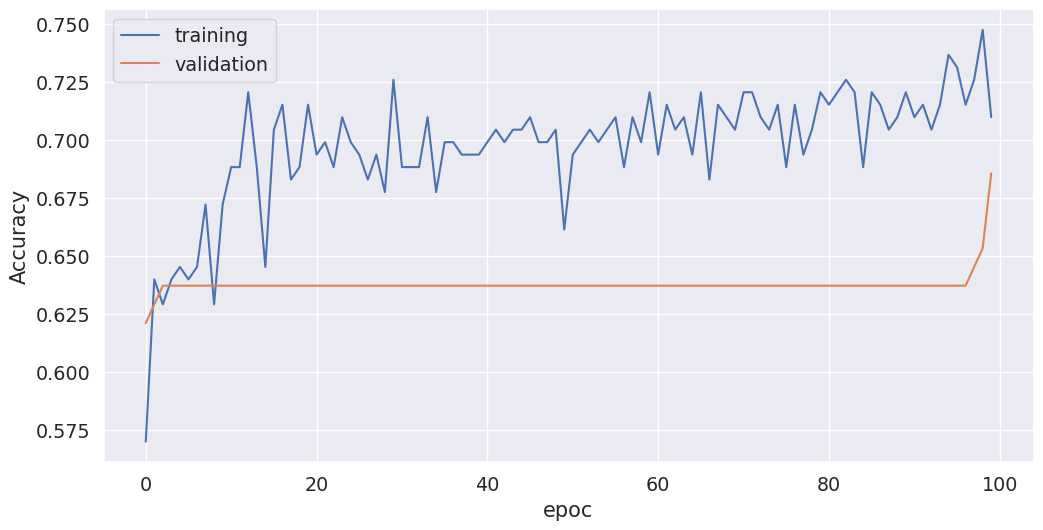

In [99]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

Agreguemosle regularización de tipo L2

In [100]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.25))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(num_classes, activation="softmax"))

In [101]:
opt = keras.optimizers.RMSprop()
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 16)                112       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_8 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_38 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_39 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_______________________________________________________

In [102]:
history = model.fit(
    X_train.values, y_train, epochs=100, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/100
 32/186 [====>.........................] - ETA: 0s - loss: 11.4431 - accuracy: 0.5625

186/186 [==============================] - 0s 1ms/step - loss: 6.7540 - accuracy: 0.7043 - val_loss: 5.8654 - val_accuracy: 0.6371


Epoch 2/100
 32/186 [====>.........................] - ETA: 0s - loss: 4.6368 - accuracy: 0.6875

186/186 [==============================] - 0s 73us/step - loss: 5.4333 - accuracy: 0.6935 - val_loss: 3.9539 - val_accuracy: 0.6371


Epoch 3/100
 32/186 [====>.........................] - ETA: 0s - loss: 4.4059 - accuracy: 0.7188

186/186 [==============================] - 0s 64us/step - loss: 3.9129 - accuracy: 0.6613 - val_loss: 2.6909 - val_accuracy: 0.6371


Epoch 4/100
 32/186 [====>.........................] - ETA: 0s - loss: 5.1826 - accuracy: 0.5625

186/186 [==============================] - 0s 59us/step - loss: 3.2086 - accuracy: 0.6613 - val_loss: 1.9826 - val_accuracy: 0.6532


Epoch 5/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.6614 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 2.1263 - accuracy: 0.7097 - val_loss: 1.5509 - val_accuracy: 0.6532


Epoch 6/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.8590 - accuracy: 0.5312

186/186 [==============================] - 0s 60us/step - loss: 2.3682 - accuracy: 0.5860 - val_loss: 1.2002 - val_accuracy: 0.6774


Epoch 7/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.2613 - accuracy: 0.5312

186/186 [==============================] - 0s 59us/step - loss: 1.6961 - accuracy: 0.6398 - val_loss: 0.9725 - val_accuracy: 0.6774


Epoch 8/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.8252 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 1.4521 - accuracy: 0.6559 - val_loss: 0.8345 - val_accuracy: 0.6935


Epoch 9/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1492 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 1.5210 - accuracy: 0.6022 - val_loss: 0.7272 - val_accuracy: 0.7419


Epoch 10/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.0011 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 1.2690 - accuracy: 0.6828 - val_loss: 0.7120 - val_accuracy: 0.7177


Epoch 11/100
 32/186 [====>.........................] - ETA: 0s - loss: 2.1276 - accuracy: 0.4688

186/186 [==============================] - 0s 58us/step - loss: 1.4285 - accuracy: 0.5645 - val_loss: 0.7422 - val_accuracy: 0.6935


Epoch 12/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.3718 - accuracy: 0.4688

186/186 [==============================] - 0s 61us/step - loss: 1.0972 - accuracy: 0.6613 - val_loss: 0.7554 - val_accuracy: 0.7097


Epoch 13/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1571 - accuracy: 0.5938

186/186 [==============================] - 0s 64us/step - loss: 0.9593 - accuracy: 0.6774 - val_loss: 0.7647 - val_accuracy: 0.7258


Epoch 14/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8720 - accuracy: 0.6250

186/186 [==============================] - 0s 61us/step - loss: 0.8291 - accuracy: 0.7527 - val_loss: 0.7732 - val_accuracy: 0.7097


Epoch 15/100
 32/186 [====>.........................] - ETA: 0s - loss: 1.1573 - accuracy: 0.5625

186/186 [==============================] - 0s 54us/step - loss: 1.0354 - accuracy: 0.6237 - val_loss: 0.7814 - val_accuracy: 0.6613


Epoch 16/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7346 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.8368 - accuracy: 0.6344 - val_loss: 0.7936 - val_accuracy: 0.6694


Epoch 17/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9472 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 0.8844 - accuracy: 0.6720 - val_loss: 0.7865 - val_accuracy: 0.6613


Epoch 18/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7900 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.8322 - accuracy: 0.6559 - val_loss: 0.7915 - val_accuracy: 0.6694


Epoch 19/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.9556 - accuracy: 0.5625

186/186 [==============================] - 0s 62us/step - loss: 0.7644 - accuracy: 0.6935 - val_loss: 0.7733 - val_accuracy: 0.6855


Epoch 20/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7440 - accuracy: 0.6250

186/186 [==============================] - 0s 60us/step - loss: 0.8704 - accuracy: 0.6505 - val_loss: 0.7804 - val_accuracy: 0.6855


Epoch 21/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7334 - accuracy: 0.7500



186/186 [==============================] - 0s 67us/step - loss: 0.8139 - accuracy: 0.7204 - val_loss: 0.7839 - val_accuracy: 0.6774


Epoch 22/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6564 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.7159 - accuracy: 0.6882 - val_loss: 0.7779 - val_accuracy: 0.6935


Epoch 23/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5608 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.7233 - accuracy: 0.6882 - val_loss: 0.7624 - val_accuracy: 0.6935


Epoch 24/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7713 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.7713 - accuracy: 0.7581 - val_loss: 0.7440 - val_accuracy: 0.6774


Epoch 25/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6842 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.7244 - accuracy: 0.7043 - val_loss: 0.7249 - val_accuracy: 0.6774


Epoch 26/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9537 - accuracy: 0.5938

186/186 [==============================] - 0s 60us/step - loss: 0.7456 - accuracy: 0.7258 - val_loss: 0.7234 - val_accuracy: 0.6694


Epoch 27/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7357 - accuracy: 0.6250

186/186 [==============================] - 0s 62us/step - loss: 0.6777 - accuracy: 0.7097 - val_loss: 0.6990 - val_accuracy: 0.6774


Epoch 28/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7124 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.6538 - accuracy: 0.7151 - val_loss: 0.6799 - val_accuracy: 0.6532


Epoch 29/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6243 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.6587 - accuracy: 0.7688 - val_loss: 0.6941 - val_accuracy: 0.6613


Epoch 30/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.8026 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.6583 - accuracy: 0.7688 - val_loss: 0.7013 - val_accuracy: 0.6694


Epoch 31/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6249 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.6544 - accuracy: 0.7581 - val_loss: 0.6931 - val_accuracy: 0.6613


Epoch 32/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6369 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.7088 - accuracy: 0.7312 - val_loss: 0.6945 - val_accuracy: 0.6613


Epoch 33/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.9539 - accuracy: 0.6250

186/186 [==============================] - 0s 62us/step - loss: 0.6361 - accuracy: 0.7849 - val_loss: 0.6854 - val_accuracy: 0.6613


Epoch 34/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5574 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.6100 - accuracy: 0.7473 - val_loss: 0.6765 - val_accuracy: 0.6694


Epoch 35/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6220 - accuracy: 0.7812

186/186 [==============================] - 0s 64us/step - loss: 0.6383 - accuracy: 0.7312 - val_loss: 0.6781 - val_accuracy: 0.6694


Epoch 36/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6107 - accuracy: 0.7812

186/186 [==============================] - 0s 65us/step - loss: 0.5726 - accuracy: 0.7903 - val_loss: 0.6790 - val_accuracy: 0.6613


Epoch 37/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7870 - accuracy: 0.5625

186/186 [==============================] - 0s 59us/step - loss: 0.6159 - accuracy: 0.7581 - val_loss: 0.6718 - val_accuracy: 0.6694


Epoch 38/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6237 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 0.6272 - accuracy: 0.7258 - val_loss: 0.6674 - val_accuracy: 0.7016


Epoch 39/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7290 - accuracy: 0.6562

186/186 [==============================] - 0s 65us/step - loss: 0.6420 - accuracy: 0.7204 - val_loss: 0.6645 - val_accuracy: 0.7016


Epoch 40/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7500 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 0.6209 - accuracy: 0.7366 - val_loss: 0.6642 - val_accuracy: 0.7016


Epoch 41/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6305 - accuracy: 0.7500



186/186 [==============================] - 0s 57us/step - loss: 0.6657 - accuracy: 0.7419 - val_loss: 0.6557 - val_accuracy: 0.7016


Epoch 42/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5867 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.5702 - accuracy: 0.7581 - val_loss: 0.6562 - val_accuracy: 0.6855


Epoch 43/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5030 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.5753 - accuracy: 0.7957 - val_loss: 0.6457 - val_accuracy: 0.7016


Epoch 44/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6679 - accuracy: 0.6562



186/186 [==============================] - 0s 58us/step - loss: 0.6015 - accuracy: 0.7473 - val_loss: 0.6451 - val_accuracy: 0.6935


Epoch 45/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5964 - accuracy: 0.6875

186/186 [==============================] - 0s 61us/step - loss: 0.5775 - accuracy: 0.7742 - val_loss: 0.6390 - val_accuracy: 0.7016


Epoch 46/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5632 - accuracy: 0.7188

186/186 [==============================] - 0s 62us/step - loss: 0.6299 - accuracy: 0.7312 - val_loss: 0.6387 - val_accuracy: 0.7016


Epoch 47/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.7878 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.5740 - accuracy: 0.7903 - val_loss: 0.6329 - val_accuracy: 0.7097


Epoch 48/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6248 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.5531 - accuracy: 0.7849 - val_loss: 0.6294 - val_accuracy: 0.7016


Epoch 49/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4894 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.5835 - accuracy: 0.7204 - val_loss: 0.6302 - val_accuracy: 0.7016


Epoch 50/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5239 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.5457 - accuracy: 0.7581 - val_loss: 0.6380 - val_accuracy: 0.7016


Epoch 51/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6876 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.5593 - accuracy: 0.7581 - val_loss: 0.6390 - val_accuracy: 0.7016


Epoch 52/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.6037 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.5785 - accuracy: 0.7473 - val_loss: 0.6277 - val_accuracy: 0.7016


Epoch 53/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5764 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.5249 - accuracy: 0.7796 - val_loss: 0.6319 - val_accuracy: 0.7016


Epoch 54/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5064 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.5709 - accuracy: 0.7634 - val_loss: 0.6383 - val_accuracy: 0.7177


Epoch 55/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5079 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.5453 - accuracy: 0.7957 - val_loss: 0.6236 - val_accuracy: 0.7177


Epoch 56/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5858 - accuracy: 0.6875

186/186 [==============================] - 0s 64us/step - loss: 0.6158 - accuracy: 0.7366 - val_loss: 0.6189 - val_accuracy: 0.7097


Epoch 57/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4436 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.5699 - accuracy: 0.7849 - val_loss: 0.6191 - val_accuracy: 0.7097


Epoch 58/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.4778 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.5243 - accuracy: 0.7903 - val_loss: 0.6168 - val_accuracy: 0.7177


Epoch 59/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5581 - accuracy: 0.6562



186/186 [==============================] - 0s 52us/step - loss: 0.5891 - accuracy: 0.7527 - val_loss: 0.6101 - val_accuracy: 0.7258


Epoch 60/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4537 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.5355 - accuracy: 0.7742 - val_loss: 0.6172 - val_accuracy: 0.7177


Epoch 61/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4745 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.5316 - accuracy: 0.8011 - val_loss: 0.6073 - val_accuracy: 0.7097


Epoch 62/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5098 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.5288 - accuracy: 0.7849 - val_loss: 0.6129 - val_accuracy: 0.7258


Epoch 63/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4559 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.5785 - accuracy: 0.7204 - val_loss: 0.6090 - val_accuracy: 0.7258


Epoch 64/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5079 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.5374 - accuracy: 0.7957 - val_loss: 0.6112 - val_accuracy: 0.7097


Epoch 65/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4908 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.5328 - accuracy: 0.7849 - val_loss: 0.6043 - val_accuracy: 0.7339


Epoch 66/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5318 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.5166 - accuracy: 0.7796 - val_loss: 0.6033 - val_accuracy: 0.7339


Epoch 67/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5172 - accuracy: 0.7812



186/186 [==============================] - 0s 56us/step - loss: 0.5221 - accuracy: 0.8011 - val_loss: 0.6008 - val_accuracy: 0.7339


Epoch 68/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5824 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.5138 - accuracy: 0.7796 - val_loss: 0.5927 - val_accuracy: 0.7097


Epoch 69/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5871 - accuracy: 0.7500

186/186 [==============================] - 0s 64us/step - loss: 0.5631 - accuracy: 0.7688 - val_loss: 0.5974 - val_accuracy: 0.7339


Epoch 70/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5468 - accuracy: 0.8125



186/186 [==============================] - 0s 59us/step - loss: 0.5333 - accuracy: 0.7849 - val_loss: 0.5900 - val_accuracy: 0.7177


Epoch 71/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4077 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.5071 - accuracy: 0.7957 - val_loss: 0.5923 - val_accuracy: 0.7339


Epoch 72/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5581 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.5464 - accuracy: 0.7634 - val_loss: 0.5926 - val_accuracy: 0.7177


Epoch 73/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5528 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.4933 - accuracy: 0.8226 - val_loss: 0.5880 - val_accuracy: 0.7339


Epoch 74/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.5899 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.5243 - accuracy: 0.8011 - val_loss: 0.5825 - val_accuracy: 0.7419


Epoch 75/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5189 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.4977 - accuracy: 0.8065 - val_loss: 0.5806 - val_accuracy: 0.7258


Epoch 76/100


 32/186 [====>.........................] - ETA: 0s - loss: 0.7182 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.5155 - accuracy: 0.8172 - val_loss: 0.5816 - val_accuracy: 0.7339


Epoch 77/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6433 - accuracy: 0.5938

186/186 [==============================] - 0s 53us/step - loss: 0.5103 - accuracy: 0.7688 - val_loss: 0.5915 - val_accuracy: 0.7258


Epoch 78/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3838 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.5297 - accuracy: 0.7957 - val_loss: 0.5887 - val_accuracy: 0.7177


Epoch 79/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5318 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.5189 - accuracy: 0.7796 - val_loss: 0.5920 - val_accuracy: 0.7339


Epoch 80/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5549 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.5169 - accuracy: 0.7796 - val_loss: 0.5815 - val_accuracy: 0.7339


Epoch 81/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4547 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.4791 - accuracy: 0.8280 - val_loss: 0.5867 - val_accuracy: 0.7339


Epoch 82/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4746 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.5186 - accuracy: 0.7957 - val_loss: 0.5672 - val_accuracy: 0.7177


Epoch 83/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3898 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.4942 - accuracy: 0.7903 - val_loss: 0.5684 - val_accuracy: 0.7177


Epoch 84/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6324 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.5091 - accuracy: 0.8065 - val_loss: 0.5675 - val_accuracy: 0.7339


Epoch 85/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5199 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.4880 - accuracy: 0.8065 - val_loss: 0.5647 - val_accuracy: 0.7339


Epoch 86/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5474 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.4911 - accuracy: 0.8226 - val_loss: 0.5627 - val_accuracy: 0.7258


Epoch 87/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6289 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 0.4894 - accuracy: 0.7688 - val_loss: 0.5660 - val_accuracy: 0.7258


Epoch 88/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5092 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.5099 - accuracy: 0.8226 - val_loss: 0.5709 - val_accuracy: 0.7258


Epoch 89/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5227 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.5148 - accuracy: 0.7957 - val_loss: 0.5690 - val_accuracy: 0.7339


Epoch 90/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5826 - accuracy: 0.6875

186/186 [==============================] - 0s 62us/step - loss: 0.4489 - accuracy: 0.8548 - val_loss: 0.5688 - val_accuracy: 0.7177


Epoch 91/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4853 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.4937 - accuracy: 0.7849 - val_loss: 0.5707 - val_accuracy: 0.7339


Epoch 92/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.6373 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.5362 - accuracy: 0.7903 - val_loss: 0.5728 - val_accuracy: 0.7339


Epoch 93/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5130 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.5299 - accuracy: 0.7634 - val_loss: 0.5718 - val_accuracy: 0.7339


Epoch 94/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4042 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.4675 - accuracy: 0.8280 - val_loss: 0.5616 - val_accuracy: 0.7339


Epoch 95/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5861 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 0.5076 - accuracy: 0.7742 - val_loss: 0.5536 - val_accuracy: 0.7500


Epoch 96/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3429 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.4903 - accuracy: 0.8065 - val_loss: 0.5533 - val_accuracy: 0.7419


Epoch 97/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4679 - accuracy: 0.8438

186/186 [==============================] - 0s 65us/step - loss: 0.5084 - accuracy: 0.7849 - val_loss: 0.5512 - val_accuracy: 0.7581


Epoch 98/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.3702 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.4699 - accuracy: 0.8118 - val_loss: 0.5551 - val_accuracy: 0.7339


Epoch 99/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.4073 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.5057 - accuracy: 0.8172 - val_loss: 0.5551 - val_accuracy: 0.7339


Epoch 100/100
 32/186 [====>.........................] - ETA: 0s - loss: 0.5051 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.4596 - accuracy: 0.8172 - val_loss: 0.5532 - val_accuracy: 0.7339


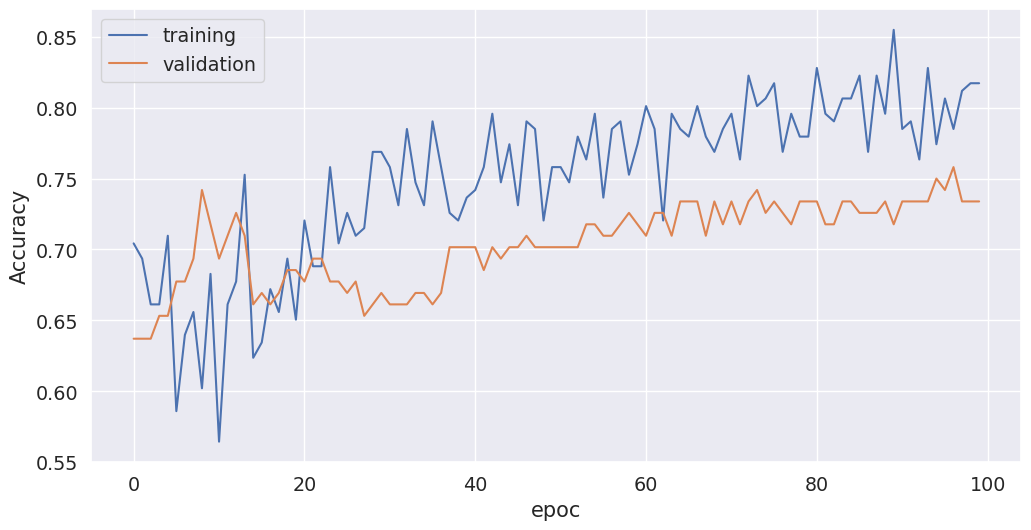

In [103]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

Parece estar muy errático el aprendizaje, bajemos el parámetro de regularización y bajemos la tasa de aprendizaje

In [104]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(num_classes, activation="softmax"))

In [105]:
opt = keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 16)                112       
_________________________________________________________________
dense_41 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_42 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_43 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________


In [106]:
history = model.fit(
    X_train.values, y_train, epochs=1000, validation_data=(X_validation.values, y_test)
)

Train on 186 samples, validate on 124 samples
Epoch 1/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.2221 - accuracy: 0.6875

186/186 [==============================] - 0s 648us/step - loss: 1.6931 - accuracy: 0.6398 - val_loss: 1.3977 - val_accuracy: 0.6774


Epoch 2/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9626 - accuracy: 0.6562

186/186 [==============================] - 0s 68us/step - loss: 1.3194 - accuracy: 0.6290 - val_loss: 1.0968 - val_accuracy: 0.6694


Epoch 3/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.3506 - accuracy: 0.6250

186/186 [==============================] - 0s 57us/step - loss: 1.0810 - accuracy: 0.6667 - val_loss: 0.9055 - val_accuracy: 0.6855


Epoch 4/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7231 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.9302 - accuracy: 0.6989 - val_loss: 0.7693 - val_accuracy: 0.7258


Epoch 5/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5811 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.8368 - accuracy: 0.6989 - val_loss: 0.6765 - val_accuracy: 0.7581


Epoch 6/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8320 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.7733 - accuracy: 0.6935 - val_loss: 0.6286 - val_accuracy: 0.7742


Epoch 7/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6659 - accuracy: 0.5938

186/186 [==============================] - 0s 57us/step - loss: 0.7376 - accuracy: 0.6828 - val_loss: 0.5988 - val_accuracy: 0.7661


Epoch 8/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9049 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.7025 - accuracy: 0.6935 - val_loss: 0.5814 - val_accuracy: 0.7419


Epoch 9/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4854 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.6759 - accuracy: 0.6828 - val_loss: 0.5724 - val_accuracy: 0.7258


Epoch 10/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5097 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.6491 - accuracy: 0.6935 - val_loss: 0.5730 - val_accuracy: 0.7339


Epoch 11/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9664 - accuracy: 0.4375

186/186 [==============================] - 0s 61us/step - loss: 0.6358 - accuracy: 0.6559 - val_loss: 0.5762 - val_accuracy: 0.6935


Epoch 12/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5110 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.6197 - accuracy: 0.6505 - val_loss: 0.5737 - val_accuracy: 0.6774


Epoch 13/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7236 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.6105 - accuracy: 0.6452 - val_loss: 0.5713 - val_accuracy: 0.6855


Epoch 14/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5186 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.6006 - accuracy: 0.6667 - val_loss: 0.5766 - val_accuracy: 0.6774


Epoch 15/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5928 - accuracy: 0.6250

186/186 [==============================] - 0s 57us/step - loss: 0.5909 - accuracy: 0.6774 - val_loss: 0.5834 - val_accuracy: 0.6935


Epoch 16/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6636 - accuracy: 0.6250

186/186 [==============================] - 0s 57us/step - loss: 0.5808 - accuracy: 0.6935 - val_loss: 0.5854 - val_accuracy: 0.6774


Epoch 17/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5144 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.5765 - accuracy: 0.7097 - val_loss: 0.5832 - val_accuracy: 0.6855


Epoch 18/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3048 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.5687 - accuracy: 0.7204 - val_loss: 0.5806 - val_accuracy: 0.6855


Epoch 19/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6889 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.5637 - accuracy: 0.7312 - val_loss: 0.5792 - val_accuracy: 0.7016


Epoch 20/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4418 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.5597 - accuracy: 0.7366 - val_loss: 0.5776 - val_accuracy: 0.7177


Epoch 21/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6690 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.5562 - accuracy: 0.7527 - val_loss: 0.5739 - val_accuracy: 0.7177


Epoch 22/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5498 - accuracy: 0.7812

186/186 [==============================] - 0s 63us/step - loss: 0.5541 - accuracy: 0.7527 - val_loss: 0.5764 - val_accuracy: 0.7258


Epoch 23/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5624 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.5491 - accuracy: 0.7688 - val_loss: 0.5800 - val_accuracy: 0.7258


Epoch 24/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5154 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.5477 - accuracy: 0.7634 - val_loss: 0.5762 - val_accuracy: 0.7258


Epoch 25/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7602 - accuracy: 0.6250

186/186 [==============================] - 0s 54us/step - loss: 0.5447 - accuracy: 0.7473 - val_loss: 0.5712 - val_accuracy: 0.7339


Epoch 26/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7095 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 0.5433 - accuracy: 0.7688 - val_loss: 0.5737 - val_accuracy: 0.7258


Epoch 27/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3996 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.5386 - accuracy: 0.7634 - val_loss: 0.5720 - val_accuracy: 0.7177


Epoch 28/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6295 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.5384 - accuracy: 0.7473 - val_loss: 0.5697 - val_accuracy: 0.7177


Epoch 29/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6334 - accuracy: 0.6250

186/186 [==============================] - 0s 57us/step - loss: 0.5361 - accuracy: 0.7581 - val_loss: 0.5666 - val_accuracy: 0.7258


Epoch 30/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5107 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.5344 - accuracy: 0.7581 - val_loss: 0.5665 - val_accuracy: 0.7258


Epoch 31/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6483 - accuracy: 0.6875

186/186 [==============================] - 0s 61us/step - loss: 0.5329 - accuracy: 0.7634 - val_loss: 0.5658 - val_accuracy: 0.7258


Epoch 32/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4833 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.5328 - accuracy: 0.7742 - val_loss: 0.5651 - val_accuracy: 0.7258


Epoch 33/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4975 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.5317 - accuracy: 0.7581 - val_loss: 0.5655 - val_accuracy: 0.7177


Epoch 34/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5349 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.5282 - accuracy: 0.7742 - val_loss: 0.5656 - val_accuracy: 0.7258


Epoch 35/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5616 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.5282 - accuracy: 0.7634 - val_loss: 0.5654 - val_accuracy: 0.7339


Epoch 36/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5155 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.5247 - accuracy: 0.7742 - val_loss: 0.5648 - val_accuracy: 0.7339


Epoch 37/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6854 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.5268 - accuracy: 0.7688 - val_loss: 0.5605 - val_accuracy: 0.7339


Epoch 38/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4780 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.5253 - accuracy: 0.7849 - val_loss: 0.5576 - val_accuracy: 0.7419


Epoch 39/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4979 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.5250 - accuracy: 0.7742 - val_loss: 0.5546 - val_accuracy: 0.7419


Epoch 40/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5910 - accuracy: 0.7500



186/186 [==============================] - 0s 54us/step - loss: 0.5221 - accuracy: 0.7742 - val_loss: 0.5563 - val_accuracy: 0.7339


Epoch 41/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6984 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.5202 - accuracy: 0.7742 - val_loss: 0.5496 - val_accuracy: 0.7419


Epoch 42/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4808 - accuracy: 0.6562



186/186 [==============================] - 0s 57us/step - loss: 0.5186 - accuracy: 0.7742 - val_loss: 0.5512 - val_accuracy: 0.7339


Epoch 43/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4498 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.5167 - accuracy: 0.7796 - val_loss: 0.5471 - val_accuracy: 0.7500


Epoch 44/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4258 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.5184 - accuracy: 0.7796 - val_loss: 0.5453 - val_accuracy: 0.7419


Epoch 45/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3843 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.5160 - accuracy: 0.7903 - val_loss: 0.5445 - val_accuracy: 0.7339


Epoch 46/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4699 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.5140 - accuracy: 0.7849 - val_loss: 0.5434 - val_accuracy: 0.7258


Epoch 47/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6684 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.5121 - accuracy: 0.7849 - val_loss: 0.5372 - val_accuracy: 0.7581


Epoch 48/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4178 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.5113 - accuracy: 0.7903 - val_loss: 0.5350 - val_accuracy: 0.7581


Epoch 49/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4854 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.5098 - accuracy: 0.7796 - val_loss: 0.5309 - val_accuracy: 0.7742


Epoch 50/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4189 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.5067 - accuracy: 0.7796 - val_loss: 0.5243 - val_accuracy: 0.7742


Epoch 51/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3898 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.5060 - accuracy: 0.8065 - val_loss: 0.5143 - val_accuracy: 0.7742


Epoch 52/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5294 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.4982 - accuracy: 0.8065 - val_loss: 0.5110 - val_accuracy: 0.7661


Epoch 53/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6323 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.4948 - accuracy: 0.8065 - val_loss: 0.5031 - val_accuracy: 0.7823


Epoch 54/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4556 - accuracy: 0.8438



186/186 [==============================] - 0s 52us/step - loss: 0.4930 - accuracy: 0.7957 - val_loss: 0.5011 - val_accuracy: 0.7823


Epoch 55/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4732 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.4921 - accuracy: 0.8011 - val_loss: 0.4992 - val_accuracy: 0.7823


Epoch 56/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4934 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.4864 - accuracy: 0.8065 - val_loss: 0.4972 - val_accuracy: 0.7823


Epoch 57/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5497 - accuracy: 0.7500



186/186 [==============================] - 0s 51us/step - loss: 0.4832 - accuracy: 0.8118 - val_loss: 0.4980 - val_accuracy: 0.7823


Epoch 58/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3924 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.4864 - accuracy: 0.8011 - val_loss: 0.4956 - val_accuracy: 0.7823


Epoch 59/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4870 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.4817 - accuracy: 0.8065 - val_loss: 0.4961 - val_accuracy: 0.7823


Epoch 60/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4584 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.4783 - accuracy: 0.7957 - val_loss: 0.4962 - val_accuracy: 0.7903


Epoch 61/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3051 - accuracy: 0.9688



186/186 [==============================] - 0s 53us/step - loss: 0.4765 - accuracy: 0.8065 - val_loss: 0.4948 - val_accuracy: 0.7823


Epoch 62/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6475 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.4756 - accuracy: 0.8065 - val_loss: 0.4947 - val_accuracy: 0.7903


Epoch 63/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5945 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.4746 - accuracy: 0.8011 - val_loss: 0.4981 - val_accuracy: 0.7742


Epoch 64/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3684 - accuracy: 0.7812

186/186 [==============================] - 0s 48us/step - loss: 0.4744 - accuracy: 0.8065 - val_loss: 0.4964 - val_accuracy: 0.7742


Epoch 65/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5485 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.4710 - accuracy: 0.8118 - val_loss: 0.4930 - val_accuracy: 0.7903


Epoch 66/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5890 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4711 - accuracy: 0.8172 - val_loss: 0.4948 - val_accuracy: 0.7823


Epoch 67/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3915 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.4758 - accuracy: 0.8065 - val_loss: 0.4943 - val_accuracy: 0.7823


Epoch 68/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4536 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.4696 - accuracy: 0.8118 - val_loss: 0.4960 - val_accuracy: 0.7742


Epoch 69/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4509 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.4728 - accuracy: 0.7957 - val_loss: 0.4965 - val_accuracy: 0.7661


Epoch 70/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5766 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 0.4665 - accuracy: 0.8065 - val_loss: 0.4985 - val_accuracy: 0.7581


Epoch 71/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4260 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.4668 - accuracy: 0.8065 - val_loss: 0.4978 - val_accuracy: 0.7581


Epoch 72/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5709 - accuracy: 0.7188



186/186 [==============================] - 0s 49us/step - loss: 0.4668 - accuracy: 0.8011 - val_loss: 0.4976 - val_accuracy: 0.7581


Epoch 73/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5511 - accuracy: 0.8125



186/186 [==============================] - 0s 53us/step - loss: 0.4678 - accuracy: 0.8172 - val_loss: 0.4962 - val_accuracy: 0.7581


Epoch 74/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3073 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.4654 - accuracy: 0.8065 - val_loss: 0.4943 - val_accuracy: 0.7581


Epoch 75/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4484 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.4661 - accuracy: 0.8172 - val_loss: 0.4948 - val_accuracy: 0.7661


Epoch 76/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4517 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.4635 - accuracy: 0.8065 - val_loss: 0.4938 - val_accuracy: 0.7661


Epoch 77/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3973 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.4625 - accuracy: 0.8011 - val_loss: 0.4911 - val_accuracy: 0.7661


Epoch 78/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5197 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.4617 - accuracy: 0.8065 - val_loss: 0.4917 - val_accuracy: 0.7661


Epoch 79/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3514 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.4631 - accuracy: 0.8118 - val_loss: 0.4954 - val_accuracy: 0.7581


Epoch 80/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4147 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.4634 - accuracy: 0.8118 - val_loss: 0.4914 - val_accuracy: 0.7581


Epoch 81/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6099 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.4596 - accuracy: 0.8118 - val_loss: 0.4914 - val_accuracy: 0.7581


Epoch 82/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5219 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.4601 - accuracy: 0.8118 - val_loss: 0.4924 - val_accuracy: 0.7500


Epoch 83/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4181 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.4589 - accuracy: 0.8118 - val_loss: 0.4911 - val_accuracy: 0.7500


Epoch 84/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6563 - accuracy: 0.5938

186/186 [==============================] - 0s 52us/step - loss: 0.4591 - accuracy: 0.8065 - val_loss: 0.4928 - val_accuracy: 0.7500


Epoch 85/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4906 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.4616 - accuracy: 0.8172 - val_loss: 0.4941 - val_accuracy: 0.7500


Epoch 86/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5741 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.4572 - accuracy: 0.8065 - val_loss: 0.4914 - val_accuracy: 0.7500


Epoch 87/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3827 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.4547 - accuracy: 0.8065 - val_loss: 0.4912 - val_accuracy: 0.7500


Epoch 88/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3791 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.4551 - accuracy: 0.8065 - val_loss: 0.4949 - val_accuracy: 0.7500


Epoch 89/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6743 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.4542 - accuracy: 0.8065 - val_loss: 0.4923 - val_accuracy: 0.7500


Epoch 90/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5896 - accuracy: 0.7188



186/186 [==============================] - 0s 55us/step - loss: 0.4551 - accuracy: 0.8065 - val_loss: 0.4885 - val_accuracy: 0.7500


Epoch 91/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4091 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.4543 - accuracy: 0.8118 - val_loss: 0.4873 - val_accuracy: 0.7500


Epoch 92/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3435 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.4531 - accuracy: 0.8172 - val_loss: 0.4857 - val_accuracy: 0.7581


Epoch 93/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4460 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.4524 - accuracy: 0.8172 - val_loss: 0.4865 - val_accuracy: 0.7500


Epoch 94/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4891 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.4526 - accuracy: 0.8118 - val_loss: 0.4887 - val_accuracy: 0.7500


Epoch 95/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3599 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.4515 - accuracy: 0.8118 - val_loss: 0.4884 - val_accuracy: 0.7500


Epoch 96/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5129 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.4494 - accuracy: 0.8172 - val_loss: 0.4885 - val_accuracy: 0.7500


Epoch 97/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3728 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.4483 - accuracy: 0.8118 - val_loss: 0.4855 - val_accuracy: 0.7500


Epoch 98/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6599 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.4480 - accuracy: 0.8172 - val_loss: 0.4896 - val_accuracy: 0.7500


Epoch 99/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3855 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.4500 - accuracy: 0.8172 - val_loss: 0.4939 - val_accuracy: 0.7419


Epoch 100/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5258 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.4468 - accuracy: 0.7957 - val_loss: 0.4924 - val_accuracy: 0.7419


Epoch 101/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2708 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.4464 - accuracy: 0.8011 - val_loss: 0.4910 - val_accuracy: 0.7419


Epoch 102/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4514 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.4486 - accuracy: 0.8065 - val_loss: 0.4912 - val_accuracy: 0.7419


Epoch 103/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4835 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.4456 - accuracy: 0.8065 - val_loss: 0.4890 - val_accuracy: 0.7419


Epoch 104/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3743 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.4451 - accuracy: 0.8118 - val_loss: 0.4888 - val_accuracy: 0.7419


Epoch 105/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6310 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.4459 - accuracy: 0.8065 - val_loss: 0.4865 - val_accuracy: 0.7419


Epoch 106/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4250 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.4440 - accuracy: 0.8118 - val_loss: 0.4897 - val_accuracy: 0.7419


Epoch 107/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5172 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.4442 - accuracy: 0.8065 - val_loss: 0.4895 - val_accuracy: 0.7419


Epoch 108/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5264 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.4451 - accuracy: 0.8011 - val_loss: 0.4911 - val_accuracy: 0.7419


Epoch 109/1000
 32/186 [====>.........................]

 - ETA: 0s - loss: 0.4144 - accuracy: 0.7500



186/186 [==============================] - 0s 58us/step - loss: 0.4445 - accuracy: 0.8065 - val_loss: 0.4910 - val_accuracy: 0.7419


Epoch 110/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4277 - accuracy: 0.8750



186/186 [==============================] - 0s 60us/step - loss: 0.4427 - accuracy: 0.8065 - val_loss: 0.4909 - val_accuracy: 0.7419


Epoch 111/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5024 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.4417 - accuracy: 0.8011 - val_loss: 0.4885 - val_accuracy: 0.7419


Epoch 112/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4629 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.4419 - accuracy: 0.8065 - val_loss: 0.4922 - val_accuracy: 0.7419


Epoch 113/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3377 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.4419 - accuracy: 0.8172 - val_loss: 0.4899 - val_accuracy: 0.7419


Epoch 114/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5175 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.4394 - accuracy: 0.8011 - val_loss: 0.4901 - val_accuracy: 0.7419


Epoch 115/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3076 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.4401 - accuracy: 0.8011 - val_loss: 0.4867 - val_accuracy: 0.7419


Epoch 116/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4289 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.4403 - accuracy: 0.8226 - val_loss: 0.4899 - val_accuracy: 0.7419


Epoch 117/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5145 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.4377 - accuracy: 0.8065 - val_loss: 0.4824 - val_accuracy: 0.7581


Epoch 118/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5320 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.4383 - accuracy: 0.8065 - val_loss: 0.4821 - val_accuracy: 0.7581


Epoch 119/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3612 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.4423 - accuracy: 0.8065 - val_loss: 0.4808 - val_accuracy: 0.7581


Epoch 120/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6105 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.4419 - accuracy: 0.8172 - val_loss: 0.4818 - val_accuracy: 0.7581


Epoch 121/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4332 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.4389 - accuracy: 0.8118 - val_loss: 0.4810 - val_accuracy: 0.7581


Epoch 122/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4437 - accuracy: 0.7500



186/186 [==============================] - 0s 52us/step - loss: 0.4378 - accuracy: 0.8118 - val_loss: 0.4810 - val_accuracy: 0.7500


Epoch 123/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4551 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.4388 - accuracy: 0.8172 - val_loss: 0.4828 - val_accuracy: 0.7500


Epoch 124/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4163 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.4406 - accuracy: 0.8226 - val_loss: 0.4826 - val_accuracy: 0.7500


Epoch 125/1000

 32/186 [====>.........................] - ETA: 0s - loss: 0.3505 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.4376 - accuracy: 0.8226 - val_loss: 0.4859 - val_accuracy: 0.7419


Epoch 126/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3998 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.4352 - accuracy: 0.8172 - val_loss: 0.4886 - val_accuracy: 0.7500


Epoch 127/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4713 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.4368 - accuracy: 0.8172 - val_loss: 0.4868 - val_accuracy: 0.7500


Epoch 128/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4836 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.4353 - accuracy: 0.8172 - val_loss: 0.4900 - val_accuracy: 0.7500


Epoch 129/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5446 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.4360 - accuracy: 0.8065 - val_loss: 0.4861 - val_accuracy: 0.7500


Epoch 130/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4870 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.4355 - accuracy: 0.8172 - val_loss: 0.4882 - val_accuracy: 0.7500


Epoch 131/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4653 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.4358 - accuracy: 0.8172 - val_loss: 0.4909 - val_accuracy: 0.7500


Epoch 132/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4982 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.4369 - accuracy: 0.8172 - val_loss: 0.4924 - val_accuracy: 0.7500


Epoch 133/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3973 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.4332 - accuracy: 0.8011 - val_loss: 0.4931 - val_accuracy: 0.7500


Epoch 134/1000

 32/186 [====>.........................] - ETA: 0s - loss: 0.3040 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.4330 - accuracy: 0.8065 - val_loss: 0.4924 - val_accuracy: 0.7500


Epoch 135/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2997 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.4337 - accuracy: 0.8065 - val_loss: 0.4949 - val_accuracy: 0.7500


Epoch 136/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4761 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.4323 - accuracy: 0.8172 - val_loss: 0.4939 - val_accuracy: 0.7500


Epoch 137/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4502 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.4326 - accuracy: 0.8065 - val_loss: 0.4934 - val_accuracy: 0.7500


Epoch 138/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5923 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.4335 - accuracy: 0.8065 - val_loss: 0.4932 - val_accuracy: 0.7581


Epoch 139/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3282 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.4310 - accuracy: 0.8065 - val_loss: 0.4906 - val_accuracy: 0.7500


Epoch 140/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4709 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.4340 - accuracy: 0.8065 - val_loss: 0.4861 - val_accuracy: 0.7500


Epoch 141/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4181 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.4306 - accuracy: 0.8118 - val_loss: 0.4868 - val_accuracy: 0.7500


Epoch 142/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4645 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.4294 - accuracy: 0.8172 - val_loss: 0.4888 - val_accuracy: 0.7500


Epoch 143/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4877 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.4293 - accuracy: 0.8065 - val_loss: 0.4851 - val_accuracy: 0.7581


Epoch 144/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5041 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.4288 - accuracy: 0.8118 - val_loss: 0.4853 - val_accuracy: 0.7581


Epoch 145/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3512 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.4280 - accuracy: 0.8065 - val_loss: 0.4829 - val_accuracy: 0.7581


Epoch 146/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4344 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.4269 - accuracy: 0.8172 - val_loss: 0.4819 - val_accuracy: 0.7581


Epoch 147/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4230 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.4271 - accuracy: 0.8172 - val_loss: 0.4807 - val_accuracy: 0.7581


Epoch 148/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3848 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.4249 - accuracy: 0.8172 - val_loss: 0.4769 - val_accuracy: 0.7581


Epoch 149/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5886 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.4259 - accuracy: 0.8172 - val_loss: 0.4811 - val_accuracy: 0.7581


Epoch 150/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3851 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.4255 - accuracy: 0.8172 - val_loss: 0.4803 - val_accuracy: 0.7581


Epoch 151/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4108 - accuracy: 0.8125



186/186 [==============================] - 0s 53us/step - loss: 0.4234 - accuracy: 0.8172 - val_loss: 0.4763 - val_accuracy: 0.7581


Epoch 152/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4147 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.4215 - accuracy: 0.8172 - val_loss: 0.4793 - val_accuracy: 0.7581


Epoch 153/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4488 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.4208 - accuracy: 0.8172 - val_loss: 0.4696 - val_accuracy: 0.7581


Epoch 154/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4549 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.4215 - accuracy: 0.8118 - val_loss: 0.4714 - val_accuracy: 0.7581


Epoch 155/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3557 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.4202 - accuracy: 0.8172 - val_loss: 0.4736 - val_accuracy: 0.7500


Epoch 156/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5065 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.4186 - accuracy: 0.8065 - val_loss: 0.4701 - val_accuracy: 0.7581


Epoch 157/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2927 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.4180 - accuracy: 0.8118 - val_loss: 0.4761 - val_accuracy: 0.7500


Epoch 158/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4067 - accuracy: 0.8125



186/186 [==============================] - 0s 52us/step - loss: 0.4182 - accuracy: 0.8065 - val_loss: 0.4733 - val_accuracy: 0.7500


Epoch 159/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3779 - accuracy: 0.8438



186/186 [==============================] - 0s 55us/step - loss: 0.4193 - accuracy: 0.8065 - val_loss: 0.4719 - val_accuracy: 0.7500


Epoch 160/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4415 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.4181 - accuracy: 0.8011 - val_loss: 0.4725 - val_accuracy: 0.7500


Epoch 161/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4807 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.4155 - accuracy: 0.8011 - val_loss: 0.4749 - val_accuracy: 0.7500


Epoch 162/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4144 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.4152 - accuracy: 0.8011 - val_loss: 0.4752 - val_accuracy: 0.7500


Epoch 163/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4013 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.4167 - accuracy: 0.8011 - val_loss: 0.4773 - val_accuracy: 0.7500


Epoch 164/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4098 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.4180 - accuracy: 0.8011 - val_loss: 0.4773 - val_accuracy: 0.7500


Epoch 165/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4470 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.4142 - accuracy: 0.8011 - val_loss: 0.4761 - val_accuracy: 0.7500


Epoch 166/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3745 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.4146 - accuracy: 0.8011 - val_loss: 0.4799 - val_accuracy: 0.7500


Epoch 167/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4968 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.4129 - accuracy: 0.8011 - val_loss: 0.4782 - val_accuracy: 0.7500


Epoch 168/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2983 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.4148 - accuracy: 0.8011 - val_loss: 0.4777 - val_accuracy: 0.7500


Epoch 169/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4311 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.4126 - accuracy: 0.8011 - val_loss: 0.4832 - val_accuracy: 0.7500


Epoch 170/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4531 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.4118 - accuracy: 0.8011 - val_loss: 0.4865 - val_accuracy: 0.7500


Epoch 171/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3736 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.4122 - accuracy: 0.8011 - val_loss: 0.4882 - val_accuracy: 0.7419


Epoch 172/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3768 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.4122 - accuracy: 0.7957 - val_loss: 0.4895 - val_accuracy: 0.7419


Epoch 173/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3688 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.4122 - accuracy: 0.7903 - val_loss: 0.4895 - val_accuracy: 0.7419


Epoch 174/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3969 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.4099 - accuracy: 0.7903 - val_loss: 0.4903 - val_accuracy: 0.7419


Epoch 175/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3795 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.4127 - accuracy: 0.8011 - val_loss: 0.4875 - val_accuracy: 0.7419


Epoch 176/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2269 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.4097 - accuracy: 0.8011 - val_loss: 0.4895 - val_accuracy: 0.7419


Epoch 177/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3857 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.4102 - accuracy: 0.8011 - val_loss: 0.4893 - val_accuracy: 0.7419


Epoch 178/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4888 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.4082 - accuracy: 0.7957 - val_loss: 0.4917 - val_accuracy: 0.7419


Epoch 179/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3952 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.4118 - accuracy: 0.7957 - val_loss: 0.4920 - val_accuracy: 0.7419


Epoch 180/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3534 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.4080 - accuracy: 0.8011 - val_loss: 0.4914 - val_accuracy: 0.7419


Epoch 181/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3599 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.4077 - accuracy: 0.8011 - val_loss: 0.4903 - val_accuracy: 0.7419


Epoch 182/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2727 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.4083 - accuracy: 0.8011 - val_loss: 0.4945 - val_accuracy: 0.7339


Epoch 183/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4204 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.4086 - accuracy: 0.7957 - val_loss: 0.4941 - val_accuracy: 0.7339


Epoch 184/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5084 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.4064 - accuracy: 0.7957 - val_loss: 0.4937 - val_accuracy: 0.7339


Epoch 185/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4081 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.4088 - accuracy: 0.7957 - val_loss: 0.4954 - val_accuracy: 0.7339


Epoch 186/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5164 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.4052 - accuracy: 0.8011 - val_loss: 0.4933 - val_accuracy: 0.7419


Epoch 187/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4367 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.4059 - accuracy: 0.8065 - val_loss: 0.4999 - val_accuracy: 0.7258


Epoch 188/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4611 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.4046 - accuracy: 0.7957 - val_loss: 0.4930 - val_accuracy: 0.7419


Epoch 189/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2892 - accuracy: 0.8750



186/186 [==============================] - 0s 60us/step - loss: 0.4059 - accuracy: 0.7957 - val_loss: 0.4981 - val_accuracy: 0.7258


Epoch 190/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3505 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.4064 - accuracy: 0.8065 - val_loss: 0.4972 - val_accuracy: 0.7419


Epoch 191/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4415 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.4041 - accuracy: 0.7957 - val_loss: 0.4955 - val_accuracy: 0.7419


Epoch 192/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4494 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.4042 - accuracy: 0.8011 - val_loss: 0.4932 - val_accuracy: 0.7419


Epoch 193/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4129 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.4049 - accuracy: 0.8065 - val_loss: 0.4962 - val_accuracy: 0.7339


Epoch 194/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5566 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.4033 - accuracy: 0.8065 - val_loss: 0.4955 - val_accuracy: 0.7419


Epoch 195/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4800 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.4030 - accuracy: 0.8065 - val_loss: 0.4964 - val_accuracy: 0.7339


Epoch 196/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3563 - accuracy: 0.9062



186/186 [==============================] - 0s 58us/step - loss: 0.4053 - accuracy: 0.7957 - val_loss: 0.4948 - val_accuracy: 0.7419


Epoch 197/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3859 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.4030 - accuracy: 0.8011 - val_loss: 0.4978 - val_accuracy: 0.7339


Epoch 198/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4638 - accuracy: 0.7500



186/186 [==============================] - 0s 58us/step - loss: 0.4029 - accuracy: 0.8065 - val_loss: 0.4950 - val_accuracy: 0.7419


Epoch 199/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3665 - accuracy: 0.9062



186/186 [==============================] - 0s 52us/step - loss: 0.4037 - accuracy: 0.8011 - val_loss: 0.4996 - val_accuracy: 0.7339


Epoch 200/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3915 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.4019 - accuracy: 0.8011 - val_loss: 0.4941 - val_accuracy: 0.7419


Epoch 201/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4416 - accuracy: 0.6875

186/186 [==============================] - 0s 66us/step - loss: 0.4034 - accuracy: 0.8065 - val_loss: 0.4957 - val_accuracy: 0.7339


Epoch 202/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3996 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.4025 - accuracy: 0.7957 - val_loss: 0.4896 - val_accuracy: 0.7419


Epoch 203/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4283 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.4036 - accuracy: 0.7957 - val_loss: 0.4869 - val_accuracy: 0.7419


Epoch 204/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4716 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.4021 - accuracy: 0.7957 - val_loss: 0.4872 - val_accuracy: 0.7419


Epoch 205/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4925 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.4056 - accuracy: 0.8065 - val_loss: 0.4908 - val_accuracy: 0.7419


Epoch 206/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3434 - accuracy: 0.8125



186/186 [==============================] - 0s 54us/step - loss: 0.4029 - accuracy: 0.7957 - val_loss: 0.4908 - val_accuracy: 0.7419


Epoch 207/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4424 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.4048 - accuracy: 0.8065 - val_loss: 0.4890 - val_accuracy: 0.7419


Epoch 208/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3510 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.4026 - accuracy: 0.8065 - val_loss: 0.4920 - val_accuracy: 0.7339


Epoch 209/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4673 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.4015 - accuracy: 0.8011 - val_loss: 0.4873 - val_accuracy: 0.7419


Epoch 210/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3231 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.4007 - accuracy: 0.8065 - val_loss: 0.4934 - val_accuracy: 0.7339


Epoch 211/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3323 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.4024 - accuracy: 0.8011 - val_loss: 0.4929 - val_accuracy: 0.7339


Epoch 212/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3910 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.4023 - accuracy: 0.8011 - val_loss: 0.4926 - val_accuracy: 0.7339


Epoch 213/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4112 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.4026 - accuracy: 0.7957 - val_loss: 0.4937 - val_accuracy: 0.7258


Epoch 214/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3901 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.4001 - accuracy: 0.7903 - val_loss: 0.4940 - val_accuracy: 0.7258


Epoch 215/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3464 - accuracy: 0.8438



186/186 [==============================] - 0s 54us/step - loss: 0.4011 - accuracy: 0.7903 - val_loss: 0.4911 - val_accuracy: 0.7339


Epoch 216/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4061 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.4002 - accuracy: 0.8118 - val_loss: 0.4986 - val_accuracy: 0.7258


Epoch 217/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3093 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.4012 - accuracy: 0.8065 - val_loss: 0.4974 - val_accuracy: 0.7258


Epoch 218/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3223 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.4017 - accuracy: 0.7957 - val_loss: 0.4977 - val_accuracy: 0.7258


Epoch 219/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2570 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.4004 - accuracy: 0.8011 - val_loss: 0.4894 - val_accuracy: 0.7339


Epoch 220/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3157 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.4018 - accuracy: 0.7957 - val_loss: 0.4868 - val_accuracy: 0.7339


Epoch 221/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5340 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.4004 - accuracy: 0.8065 - val_loss: 0.4875 - val_accuracy: 0.7339


Epoch 222/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5073 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.4010 - accuracy: 0.8011 - val_loss: 0.4897 - val_accuracy: 0.7339


Epoch 223/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3605 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3996 - accuracy: 0.8011 - val_loss: 0.4939 - val_accuracy: 0.7258


Epoch 224/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2862 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.3997 - accuracy: 0.8065 - val_loss: 0.4930 - val_accuracy: 0.7258


Epoch 225/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3069 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.4018 - accuracy: 0.8118 - val_loss: 0.4912 - val_accuracy: 0.7339


Epoch 226/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4101 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.4032 - accuracy: 0.8118 - val_loss: 0.4881 - val_accuracy: 0.7339


Epoch 227/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3762 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.4006 - accuracy: 0.8118 - val_loss: 0.4920 - val_accuracy: 0.7339


Epoch 228/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4258 - accuracy: 0.7500



186/186 [==============================] - 0s 56us/step - loss: 0.4000 - accuracy: 0.8118 - val_loss: 0.4897 - val_accuracy: 0.7339


Epoch 229/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4055 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3994 - accuracy: 0.8118 - val_loss: 0.4915 - val_accuracy: 0.7339


Epoch 230/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4524 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3999 - accuracy: 0.8011 - val_loss: 0.4890 - val_accuracy: 0.7339


Epoch 231/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3187 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3997 - accuracy: 0.8011 - val_loss: 0.4957 - val_accuracy: 0.7258


Epoch 232/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4983 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.3990 - accuracy: 0.8065 - val_loss: 0.4883 - val_accuracy: 0.7339


Epoch 233/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2974 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3992 - accuracy: 0.8118 - val_loss: 0.4923 - val_accuracy: 0.7339


Epoch 234/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4607 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3994 - accuracy: 0.8118 - val_loss: 0.4939 - val_accuracy: 0.7258


Epoch 235/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4319 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.4018 - accuracy: 0.8118 - val_loss: 0.4918 - val_accuracy: 0.7339


Epoch 236/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3186 - accuracy: 0.8750



186/186 [==============================] - 0s 55us/step - loss: 0.3992 - accuracy: 0.8065 - val_loss: 0.4894 - val_accuracy: 0.7339


Epoch 237/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3242 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.4019 - accuracy: 0.8065 - val_loss: 0.4907 - val_accuracy: 0.7339


Epoch 238/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5352 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.4002 - accuracy: 0.8011 - val_loss: 0.4919 - val_accuracy: 0.7339


Epoch 239/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4591 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3981 - accuracy: 0.8118 - val_loss: 0.4938 - val_accuracy: 0.7258


Epoch 240/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5548 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.3992 - accuracy: 0.8172 - val_loss: 0.4889 - val_accuracy: 0.7419


Epoch 241/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3254 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.3979 - accuracy: 0.8172 - val_loss: 0.4870 - val_accuracy: 0.7419


Epoch 242/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4083 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3993 - accuracy: 0.8118 - val_loss: 0.4845 - val_accuracy: 0.7419


Epoch 243/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4126 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.4000 - accuracy: 0.8226 - val_loss: 0.4870 - val_accuracy: 0.7419


Epoch 244/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4268 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3978 - accuracy: 0.8118 - val_loss: 0.4811 - val_accuracy: 0.7500


Epoch 245/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4094 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3998 - accuracy: 0.8172 - val_loss: 0.4812 - val_accuracy: 0.7500


Epoch 246/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1181 - accuracy: 0.9688

186/186 [==============================] - 0s 51us/step - loss: 0.4006 - accuracy: 0.8172 - val_loss: 0.4828 - val_accuracy: 0.7419


Epoch 247/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2888 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3983 - accuracy: 0.8172 - val_loss: 0.4839 - val_accuracy: 0.7419


Epoch 248/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3613 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3976 - accuracy: 0.8226 - val_loss: 0.4893 - val_accuracy: 0.7419


Epoch 249/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4947 - accuracy: 0.7812



186/186 [==============================] - 0s 54us/step - loss: 0.3971 - accuracy: 0.8172 - val_loss: 0.4892 - val_accuracy: 0.7419


Epoch 250/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4352 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3970 - accuracy: 0.8118 - val_loss: 0.4910 - val_accuracy: 0.7339


Epoch 251/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4341 - accuracy: 0.7500



186/186 [==============================] - 0s 58us/step - loss: 0.3964 - accuracy: 0.8118 - val_loss: 0.4902 - val_accuracy: 0.7419


Epoch 252/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3733 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3983 - accuracy: 0.8118 - val_loss: 0.4916 - val_accuracy: 0.7339


Epoch 253/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4618 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3976 - accuracy: 0.8118 - val_loss: 0.4911 - val_accuracy: 0.7339


Epoch 254/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3654 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3964 - accuracy: 0.8065 - val_loss: 0.4891 - val_accuracy: 0.7419


Epoch 255/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2497 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.3979 - accuracy: 0.8118 - val_loss: 0.4896 - val_accuracy: 0.7419


Epoch 256/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3346 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.3962 - accuracy: 0.8118 - val_loss: 0.4918 - val_accuracy: 0.7177


Epoch 257/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3499 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3956 - accuracy: 0.8118 - val_loss: 0.4888 - val_accuracy: 0.7339


Epoch 258/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3202 - accuracy: 0.9062



186/186 [==============================] - 0s 68us/step - loss: 0.3965 - accuracy: 0.8172 - val_loss: 0.4992 - val_accuracy: 0.7097


Epoch 259/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3928 - accuracy: 0.7812



186/186 [==============================] - 0s 53us/step - loss: 0.3951 - accuracy: 0.8118 - val_loss: 0.5014 - val_accuracy: 0.7097


Epoch 260/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4280 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3956 - accuracy: 0.8011 - val_loss: 0.4981 - val_accuracy: 0.7177


Epoch 261/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2587 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3957 - accuracy: 0.8011 - val_loss: 0.4929 - val_accuracy: 0.7177


Epoch 262/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3210 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3948 - accuracy: 0.8118 - val_loss: 0.4915 - val_accuracy: 0.7339


Epoch 263/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3840 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3953 - accuracy: 0.8118 - val_loss: 0.4974 - val_accuracy: 0.7097


Epoch 264/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5192 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.3942 - accuracy: 0.8118 - val_loss: 0.4941 - val_accuracy: 0.7177


Epoch 265/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3598 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3942 - accuracy: 0.8118 - val_loss: 0.5001 - val_accuracy: 0.7097


Epoch 266/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3833 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3935 - accuracy: 0.8065 - val_loss: 0.4892 - val_accuracy: 0.7339


Epoch 267/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3786 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3938 - accuracy: 0.8118 - val_loss: 0.4854 - val_accuracy: 0.7339


Epoch 268/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3633 - accuracy: 0.8438



186/186 [==============================] - 0s 56us/step - loss: 0.3958 - accuracy: 0.8065 - val_loss: 0.4900 - val_accuracy: 0.7339


Epoch 269/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5297 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.3959 - accuracy: 0.8065 - val_loss: 0.4928 - val_accuracy: 0.7177


Epoch 270/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3603 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3933 - accuracy: 0.8118 - val_loss: 0.4982 - val_accuracy: 0.7097


Epoch 271/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3367 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3952 - accuracy: 0.8011 - val_loss: 0.4914 - val_accuracy: 0.7258


Epoch 272/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5176 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.3954 - accuracy: 0.8011 - val_loss: 0.4947 - val_accuracy: 0.7177


Epoch 273/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3633 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3939 - accuracy: 0.8172 - val_loss: 0.4882 - val_accuracy: 0.7339


Epoch 274/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3229 - accuracy: 0.9688

186/186 [==============================] - 0s 54us/step - loss: 0.3947 - accuracy: 0.8118 - val_loss: 0.4852 - val_accuracy: 0.7339


Epoch 275/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3891 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3948 - accuracy: 0.8065 - val_loss: 0.4894 - val_accuracy: 0.7339


Epoch 276/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4301 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3932 - accuracy: 0.8172 - val_loss: 0.4893 - val_accuracy: 0.7339


Epoch 277/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4487 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3942 - accuracy: 0.8065 - val_loss: 0.4878 - val_accuracy: 0.7339


Epoch 278/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3721 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3936 - accuracy: 0.8118 - val_loss: 0.4893 - val_accuracy: 0.7339


Epoch 279/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4856 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.3959 - accuracy: 0.8065 - val_loss: 0.4919 - val_accuracy: 0.7258


Epoch 280/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4715 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.3938 - accuracy: 0.8118 - val_loss: 0.4868 - val_accuracy: 0.7339


Epoch 281/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3747 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3936 - accuracy: 0.8118 - val_loss: 0.4908 - val_accuracy: 0.7339


Epoch 282/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3645 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3933 - accuracy: 0.8118 - val_loss: 0.4899 - val_accuracy: 0.7339


Epoch 283/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3694 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3936 - accuracy: 0.8118 - val_loss: 0.4957 - val_accuracy: 0.7097


Epoch 284/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4270 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3925 - accuracy: 0.8172 - val_loss: 0.4970 - val_accuracy: 0.7097


Epoch 285/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3497 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3941 - accuracy: 0.8118 - val_loss: 0.4917 - val_accuracy: 0.7258


Epoch 286/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3623 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3930 - accuracy: 0.8172 - val_loss: 0.4960 - val_accuracy: 0.7097


Epoch 287/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3262 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.3924 - accuracy: 0.8172 - val_loss: 0.4996 - val_accuracy: 0.7097


Epoch 288/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3318 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3932 - accuracy: 0.8118 - val_loss: 0.4983 - val_accuracy: 0.7097


Epoch 289/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3239 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3916 - accuracy: 0.8011 - val_loss: 0.4894 - val_accuracy: 0.7339


Epoch 290/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4624 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.3922 - accuracy: 0.8118 - val_loss: 0.4860 - val_accuracy: 0.7339


Epoch 291/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3582 - accuracy: 0.8125



186/186 [==============================] - 0s 58us/step - loss: 0.3954 - accuracy: 0.8118 - val_loss: 0.4892 - val_accuracy: 0.7339


Epoch 292/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4414 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3929 - accuracy: 0.8172 - val_loss: 0.4910 - val_accuracy: 0.7339


Epoch 293/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3548 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3917 - accuracy: 0.8118 - val_loss: 0.4897 - val_accuracy: 0.7339


Epoch 294/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4707 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3952 - accuracy: 0.8118 - val_loss: 0.4928 - val_accuracy: 0.7177


Epoch 295/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4194 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3916 - accuracy: 0.8172 - val_loss: 0.4987 - val_accuracy: 0.7177


Epoch 296/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3395 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3924 - accuracy: 0.8065 - val_loss: 0.4914 - val_accuracy: 0.7258


Epoch 297/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3799 - accuracy: 0.8750

186/186 [==============================] - 0s 69us/step - loss: 0.3932 - accuracy: 0.8118 - val_loss: 0.4945 - val_accuracy: 0.7177


Epoch 298/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3593 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3927 - accuracy: 0.8118 - val_loss: 0.4948 - val_accuracy: 0.7258


Epoch 299/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3772 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3918 - accuracy: 0.8118 - val_loss: 0.4893 - val_accuracy: 0.7419


Epoch 300/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2625 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3914 - accuracy: 0.8172 - val_loss: 0.4934 - val_accuracy: 0.7258


Epoch 301/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4014 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3924 - accuracy: 0.8118 - val_loss: 0.4898 - val_accuracy: 0.7339


Epoch 302/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3305 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.3909 - accuracy: 0.8065 - val_loss: 0.4869 - val_accuracy: 0.7339


Epoch 303/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3619 - accuracy: 0.8125



186/186 [==============================] - 0s 53us/step - loss: 0.3939 - accuracy: 0.8118 - val_loss: 0.4925 - val_accuracy: 0.7177


Epoch 304/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4443 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.3930 - accuracy: 0.8118 - val_loss: 0.4926 - val_accuracy: 0.7258


Epoch 305/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3832 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3925 - accuracy: 0.8118 - val_loss: 0.4915 - val_accuracy: 0.7258


Epoch 306/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2963 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3908 - accuracy: 0.8118 - val_loss: 0.4940 - val_accuracy: 0.7258


Epoch 307/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3385 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3923 - accuracy: 0.8118 - val_loss: 0.4909 - val_accuracy: 0.7339


Epoch 308/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3519 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3907 - accuracy: 0.8065 - val_loss: 0.4891 - val_accuracy: 0.7339


Epoch 309/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4095 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3913 - accuracy: 0.8172 - val_loss: 0.4898 - val_accuracy: 0.7419


Epoch 310/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3923 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3910 - accuracy: 0.8172 - val_loss: 0.4910 - val_accuracy: 0.7258


Epoch 311/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3722 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3897 - accuracy: 0.8118 - val_loss: 0.4854 - val_accuracy: 0.7339


Epoch 312/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3601 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3905 - accuracy: 0.8172 - val_loss: 0.4913 - val_accuracy: 0.7258


Epoch 313/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3259 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3903 - accuracy: 0.8065 - val_loss: 0.4912 - val_accuracy: 0.7258


Epoch 314/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4291 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.3917 - accuracy: 0.8172 - val_loss: 0.4951 - val_accuracy: 0.7258


Epoch 315/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4593 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3924 - accuracy: 0.8065 - val_loss: 0.4952 - val_accuracy: 0.7258


Epoch 316/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3520 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.3912 - accuracy: 0.8118 - val_loss: 0.4934 - val_accuracy: 0.7258


Epoch 317/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4561 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.3908 - accuracy: 0.8118 - val_loss: 0.4897 - val_accuracy: 0.7419


Epoch 318/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3288 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3914 - accuracy: 0.8118 - val_loss: 0.4839 - val_accuracy: 0.7419


Epoch 319/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3995 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3910 - accuracy: 0.8118 - val_loss: 0.4888 - val_accuracy: 0.7419


Epoch 320/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3701 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3916 - accuracy: 0.8118 - val_loss: 0.4914 - val_accuracy: 0.7258


Epoch 321/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3674 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3902 - accuracy: 0.8118 - val_loss: 0.4890 - val_accuracy: 0.7339


Epoch 322/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4306 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3908 - accuracy: 0.8118 - val_loss: 0.4950 - val_accuracy: 0.7258


Epoch 323/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3445 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3899 - accuracy: 0.8172 - val_loss: 0.4886 - val_accuracy: 0.7419


Epoch 324/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4060 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3907 - accuracy: 0.8118 - val_loss: 0.4888 - val_accuracy: 0.7339


Epoch 325/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3032 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3892 - accuracy: 0.8118 - val_loss: 0.4836 - val_accuracy: 0.7419


Epoch 326/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3646 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3898 - accuracy: 0.8172 - val_loss: 0.4937 - val_accuracy: 0.7258


Epoch 327/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3367 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3912 - accuracy: 0.8118 - val_loss: 0.4941 - val_accuracy: 0.7258


Epoch 328/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3660 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3913 - accuracy: 0.8172 - val_loss: 0.4928 - val_accuracy: 0.7258


Epoch 329/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3675 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3907 - accuracy: 0.8118 - val_loss: 0.4968 - val_accuracy: 0.7258


Epoch 330/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2934 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.3894 - accuracy: 0.8118 - val_loss: 0.4901 - val_accuracy: 0.7339


Epoch 331/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4148 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3929 - accuracy: 0.8065 - val_loss: 0.4895 - val_accuracy: 0.7339


Epoch 332/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4296 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3886 - accuracy: 0.8118 - val_loss: 0.4855 - val_accuracy: 0.7419


Epoch 333/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3283 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3903 - accuracy: 0.8065 - val_loss: 0.4824 - val_accuracy: 0.7419


Epoch 334/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3076 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3922 - accuracy: 0.8172 - val_loss: 0.4770 - val_accuracy: 0.7500


Epoch 335/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4601 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3892 - accuracy: 0.8118 - val_loss: 0.4745 - val_accuracy: 0.7581


Epoch 336/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3173 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3886 - accuracy: 0.8118 - val_loss: 0.4686 - val_accuracy: 0.7581


Epoch 337/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4116 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3874 - accuracy: 0.8172 - val_loss: 0.4653 - val_accuracy: 0.7581


Epoch 338/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4300 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3873 - accuracy: 0.8172 - val_loss: 0.4566 - val_accuracy: 0.7581


Epoch 339/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2918 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3835 - accuracy: 0.8280 - val_loss: 0.4497 - val_accuracy: 0.7661


Epoch 340/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5280 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3848 - accuracy: 0.8280 - val_loss: 0.4486 - val_accuracy: 0.7661


Epoch 341/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5468 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3856 - accuracy: 0.8280 - val_loss: 0.4498 - val_accuracy: 0.7661


Epoch 342/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1924 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.3820 - accuracy: 0.8333 - val_loss: 0.4453 - val_accuracy: 0.7661


Epoch 343/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4560 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3805 - accuracy: 0.8387 - val_loss: 0.4488 - val_accuracy: 0.7661


Epoch 344/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3587 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3802 - accuracy: 0.8387 - val_loss: 0.4504 - val_accuracy: 0.7661


Epoch 345/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2947 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.3803 - accuracy: 0.8387 - val_loss: 0.4487 - val_accuracy: 0.7661


Epoch 346/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3742 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3780 - accuracy: 0.8333 - val_loss: 0.4507 - val_accuracy: 0.7661


Epoch 347/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4359 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3774 - accuracy: 0.8333 - val_loss: 0.4486 - val_accuracy: 0.7661


Epoch 348/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2999 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3772 - accuracy: 0.8280 - val_loss: 0.4497 - val_accuracy: 0.7661


Epoch 349/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3840 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3780 - accuracy: 0.8387 - val_loss: 0.4575 - val_accuracy: 0.7581


Epoch 350/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4206 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3794 - accuracy: 0.8226 - val_loss: 0.4548 - val_accuracy: 0.7581


Epoch 351/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3299 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3757 - accuracy: 0.8333 - val_loss: 0.4550 - val_accuracy: 0.7581


Epoch 352/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4375 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3746 - accuracy: 0.8333 - val_loss: 0.4495 - val_accuracy: 0.7661


Epoch 353/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4390 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3764 - accuracy: 0.8387 - val_loss: 0.4568 - val_accuracy: 0.7581


Epoch 354/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3015 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3753 - accuracy: 0.8333 - val_loss: 0.4622 - val_accuracy: 0.7500


Epoch 355/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4140 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3779 - accuracy: 0.8280 - val_loss: 0.4515 - val_accuracy: 0.7661


Epoch 356/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3512 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3754 - accuracy: 0.8333 - val_loss: 0.4522 - val_accuracy: 0.7742


Epoch 357/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3260 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.3732 - accuracy: 0.8333 - val_loss: 0.4514 - val_accuracy: 0.7742


Epoch 358/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3075 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3773 - accuracy: 0.8387 - val_loss: 0.4501 - val_accuracy: 0.7742


Epoch 359/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4480 - accuracy: 0.8438



186/186 [==============================] - 0s 55us/step - loss: 0.3730 - accuracy: 0.8387 - val_loss: 0.4533 - val_accuracy: 0.7661


Epoch 360/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4497 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3722 - accuracy: 0.8333 - val_loss: 0.4574 - val_accuracy: 0.7581


Epoch 361/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3536 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3746 - accuracy: 0.8387 - val_loss: 0.4585 - val_accuracy: 0.7581


Epoch 362/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4037 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3738 - accuracy: 0.8333 - val_loss: 0.4627 - val_accuracy: 0.7581


Epoch 363/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3640 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3726 - accuracy: 0.8280 - val_loss: 0.4599 - val_accuracy: 0.7581


Epoch 364/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4172 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3721 - accuracy: 0.8280 - val_loss: 0.4498 - val_accuracy: 0.7823


Epoch 365/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3933 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3719 - accuracy: 0.8333 - val_loss: 0.4551 - val_accuracy: 0.7581


Epoch 366/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4666 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3718 - accuracy: 0.8333 - val_loss: 0.4497 - val_accuracy: 0.7823


Epoch 367/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3512 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3715 - accuracy: 0.8387 - val_loss: 0.4467 - val_accuracy: 0.7823


Epoch 368/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5120 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3724 - accuracy: 0.8333 - val_loss: 0.4458 - val_accuracy: 0.7823


Epoch 369/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3388 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3728 - accuracy: 0.8387 - val_loss: 0.4459 - val_accuracy: 0.7823


Epoch 370/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3645 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3707 - accuracy: 0.8387 - val_loss: 0.4535 - val_accuracy: 0.7661


Epoch 371/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4259 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3710 - accuracy: 0.8333 - val_loss: 0.4526 - val_accuracy: 0.7742


Epoch 372/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5282 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3714 - accuracy: 0.8333 - val_loss: 0.4508 - val_accuracy: 0.7742


Epoch 373/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5074 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3709 - accuracy: 0.8333 - val_loss: 0.4545 - val_accuracy: 0.7661


Epoch 374/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5228 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.3712 - accuracy: 0.8333 - val_loss: 0.4527 - val_accuracy: 0.7742


Epoch 375/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4114 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3693 - accuracy: 0.8226 - val_loss: 0.4498 - val_accuracy: 0.7742


Epoch 376/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3380 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3690 - accuracy: 0.8333 - val_loss: 0.4523 - val_accuracy: 0.7742


Epoch 377/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3944 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3693 - accuracy: 0.8333 - val_loss: 0.4505 - val_accuracy: 0.7742


Epoch 378/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4317 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3736 - accuracy: 0.8226 - val_loss: 0.4522 - val_accuracy: 0.7742


Epoch 379/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2713 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3695 - accuracy: 0.8333 - val_loss: 0.4567 - val_accuracy: 0.7661


Epoch 380/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4450 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3684 - accuracy: 0.8280 - val_loss: 0.4526 - val_accuracy: 0.7742


Epoch 381/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4289 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3699 - accuracy: 0.8333 - val_loss: 0.4571 - val_accuracy: 0.7661


Epoch 382/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3707 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3741 - accuracy: 0.8333 - val_loss: 0.4577 - val_accuracy: 0.7661


Epoch 383/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4988 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3673 - accuracy: 0.8333 - val_loss: 0.4579 - val_accuracy: 0.7661


Epoch 384/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2441 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3677 - accuracy: 0.8280 - val_loss: 0.4652 - val_accuracy: 0.7581


Epoch 385/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3264 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3701 - accuracy: 0.8226 - val_loss: 0.4607 - val_accuracy: 0.7581


Epoch 386/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4507 - accuracy: 0.7188



186/186 [==============================] - 0s 56us/step - loss: 0.3679 - accuracy: 0.8280 - val_loss: 0.4560 - val_accuracy: 0.7661


Epoch 387/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3079 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3693 - accuracy: 0.8387 - val_loss: 0.4557 - val_accuracy: 0.7661


Epoch 388/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4022 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.3671 - accuracy: 0.8280 - val_loss: 0.4602 - val_accuracy: 0.7661


Epoch 389/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4305 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3691 - accuracy: 0.8280 - val_loss: 0.4600 - val_accuracy: 0.7581


Epoch 390/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4443 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3687 - accuracy: 0.8280 - val_loss: 0.4648 - val_accuracy: 0.7581


Epoch 391/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2905 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3681 - accuracy: 0.8226 - val_loss: 0.4631 - val_accuracy: 0.7581


Epoch 392/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3370 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3728 - accuracy: 0.8333 - val_loss: 0.4534 - val_accuracy: 0.7661


Epoch 393/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2681 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3674 - accuracy: 0.8280 - val_loss: 0.4534 - val_accuracy: 0.7742


Epoch 394/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4488 - accuracy: 0.7812

186/186 [==============================] - 0s 64us/step - loss: 0.3688 - accuracy: 0.8226 - val_loss: 0.4550 - val_accuracy: 0.7661


Epoch 395/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2456 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3667 - accuracy: 0.8387 - val_loss: 0.4585 - val_accuracy: 0.7661


Epoch 396/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5192 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.3662 - accuracy: 0.8333 - val_loss: 0.4566 - val_accuracy: 0.7661


Epoch 397/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4034 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3692 - accuracy: 0.8172 - val_loss: 0.4538 - val_accuracy: 0.7661


Epoch 398/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2757 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3666 - accuracy: 0.8333 - val_loss: 0.4582 - val_accuracy: 0.7661


Epoch 399/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4024 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3674 - accuracy: 0.8226 - val_loss: 0.4487 - val_accuracy: 0.7742


Epoch 400/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4222 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3669 - accuracy: 0.8333 - val_loss: 0.4454 - val_accuracy: 0.7742


Epoch 401/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3409 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3652 - accuracy: 0.8387 - val_loss: 0.4551 - val_accuracy: 0.7661


Epoch 402/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3010 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3684 - accuracy: 0.8226 - val_loss: 0.4538 - val_accuracy: 0.7661


Epoch 403/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4899 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3644 - accuracy: 0.8387 - val_loss: 0.4537 - val_accuracy: 0.7661


Epoch 404/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2963 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3693 - accuracy: 0.8280 - val_loss: 0.4486 - val_accuracy: 0.7742


Epoch 405/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4025 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3686 - accuracy: 0.8333 - val_loss: 0.4447 - val_accuracy: 0.7742


Epoch 406/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4006 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3684 - accuracy: 0.8387 - val_loss: 0.4418 - val_accuracy: 0.7742


Epoch 407/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3718 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3660 - accuracy: 0.8333 - val_loss: 0.4408 - val_accuracy: 0.7742


Epoch 408/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4050 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3651 - accuracy: 0.8387 - val_loss: 0.4411 - val_accuracy: 0.7742


Epoch 409/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3166 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3657 - accuracy: 0.8387 - val_loss: 0.4452 - val_accuracy: 0.7742


Epoch 410/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3098 - accuracy: 0.8125



186/186 [==============================] - 0s 52us/step - loss: 0.3657 - accuracy: 0.8333 - val_loss: 0.4430 - val_accuracy: 0.7742


Epoch 411/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3328 - accuracy: 0.8750



186/186 [==============================] - 0s 58us/step - loss: 0.3655 - accuracy: 0.8333 - val_loss: 0.4361 - val_accuracy: 0.7823


Epoch 412/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2578 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3665 - accuracy: 0.8387 - val_loss: 0.4303 - val_accuracy: 0.7903


Epoch 413/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4008 - accuracy: 0.8438



186/186 [==============================] - 0s 52us/step - loss: 0.3643 - accuracy: 0.8387 - val_loss: 0.4455 - val_accuracy: 0.7742


Epoch 414/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4085 - accuracy: 0.8438



186/186 [==============================] - 0s 53us/step - loss: 0.3639 - accuracy: 0.8333 - val_loss: 0.4471 - val_accuracy: 0.7742


Epoch 415/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4044 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3643 - accuracy: 0.8333 - val_loss: 0.4441 - val_accuracy: 0.7742


Epoch 416/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5200 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.3647 - accuracy: 0.8387 - val_loss: 0.4398 - val_accuracy: 0.7742


Epoch 417/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3387 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3632 - accuracy: 0.8333 - val_loss: 0.4445 - val_accuracy: 0.7742


Epoch 418/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3859 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3647 - accuracy: 0.8387 - val_loss: 0.4547 - val_accuracy: 0.7581


Epoch 419/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3918 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3680 - accuracy: 0.8333 - val_loss: 0.4473 - val_accuracy: 0.7742


Epoch 420/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3351 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3676 - accuracy: 0.8387 - val_loss: 0.4455 - val_accuracy: 0.7742


Epoch 421/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4452 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3631 - accuracy: 0.8333 - val_loss: 0.4453 - val_accuracy: 0.7742


Epoch 422/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3206 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3639 - accuracy: 0.8387 - val_loss: 0.4468 - val_accuracy: 0.7742


Epoch 423/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3787 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3641 - accuracy: 0.8387 - val_loss: 0.4489 - val_accuracy: 0.7742


Epoch 424/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3229 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3618 - accuracy: 0.8333 - val_loss: 0.4476 - val_accuracy: 0.7742


Epoch 425/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3623 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3644 - accuracy: 0.8333 - val_loss: 0.4426 - val_accuracy: 0.7742


Epoch 426/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4018 - accuracy: 0.8125



186/186 [==============================] - 0s 58us/step - loss: 0.3620 - accuracy: 0.8387 - val_loss: 0.4487 - val_accuracy: 0.7742


Epoch 427/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4049 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3641 - accuracy: 0.8333 - val_loss: 0.4427 - val_accuracy: 0.7742


Epoch 428/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2359 - accuracy: 0.9375



186/186 [==============================] - 0s 52us/step - loss: 0.3653 - accuracy: 0.8387 - val_loss: 0.4405 - val_accuracy: 0.7742


Epoch 429/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3743 - accuracy: 0.9062



186/186 [==============================] - 0s 58us/step - loss: 0.3627 - accuracy: 0.8387 - val_loss: 0.4409 - val_accuracy: 0.7742


Epoch 430/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2901 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3628 - accuracy: 0.8387 - val_loss: 0.4446 - val_accuracy: 0.7742


Epoch 431/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4766 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3654 - accuracy: 0.8333 - val_loss: 0.4414 - val_accuracy: 0.7742


Epoch 432/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2531 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.3638 - accuracy: 0.8387 - val_loss: 0.4473 - val_accuracy: 0.7742


Epoch 433/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2493 - accuracy: 0.9375

186/186 [==============================] - 0s 62us/step - loss: 0.3621 - accuracy: 0.8387 - val_loss: 0.4492 - val_accuracy: 0.7581


Epoch 434/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2547 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3623 - accuracy: 0.8387 - val_loss: 0.4524 - val_accuracy: 0.7581


Epoch 435/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3126 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3627 - accuracy: 0.8333 - val_loss: 0.4561 - val_accuracy: 0.7581


Epoch 436/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2005 - accuracy: 0.9688

186/186 [==============================] - 0s 54us/step - loss: 0.3610 - accuracy: 0.8333 - val_loss: 0.4604 - val_accuracy: 0.7581


Epoch 437/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3396 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3620 - accuracy: 0.8387 - val_loss: 0.4531 - val_accuracy: 0.7581


Epoch 438/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3903 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3619 - accuracy: 0.8387 - val_loss: 0.4558 - val_accuracy: 0.7581


Epoch 439/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2700 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3607 - accuracy: 0.8333 - val_loss: 0.4550 - val_accuracy: 0.7581


Epoch 440/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3323 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3613 - accuracy: 0.8333 - val_loss: 0.4533 - val_accuracy: 0.7581


Epoch 441/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2764 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3630 - accuracy: 0.8333 - val_loss: 0.4602 - val_accuracy: 0.7581


Epoch 442/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4181 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3618 - accuracy: 0.8333 - val_loss: 0.4551 - val_accuracy: 0.7581


Epoch 443/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4163 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3596 - accuracy: 0.8333 - val_loss: 0.4532 - val_accuracy: 0.7581


Epoch 444/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4435 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3607 - accuracy: 0.8333 - val_loss: 0.4509 - val_accuracy: 0.7581


Epoch 445/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2978 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3622 - accuracy: 0.8226 - val_loss: 0.4518 - val_accuracy: 0.7661


Epoch 446/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3306 - accuracy: 0.8438



186/186 [==============================] - 0s 57us/step - loss: 0.3613 - accuracy: 0.8333 - val_loss: 0.4587 - val_accuracy: 0.7581


Epoch 447/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3354 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3605 - accuracy: 0.8333 - val_loss: 0.4512 - val_accuracy: 0.7581


Epoch 448/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3802 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.3613 - accuracy: 0.8280 - val_loss: 0.4484 - val_accuracy: 0.7661


Epoch 449/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4051 - accuracy: 0.8438



186/186 [==============================] - 0s 58us/step - loss: 0.3589 - accuracy: 0.8333 - val_loss: 0.4419 - val_accuracy: 0.7661


Epoch 450/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3920 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3597 - accuracy: 0.8387 - val_loss: 0.4536 - val_accuracy: 0.7581


Epoch 451/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2494 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3591 - accuracy: 0.8333 - val_loss: 0.4624 - val_accuracy: 0.7500


Epoch 452/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4530 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.3597 - accuracy: 0.8333 - val_loss: 0.4566 - val_accuracy: 0.7581


Epoch 453/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5106 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3593 - accuracy: 0.8226 - val_loss: 0.4467 - val_accuracy: 0.7661


Epoch 454/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3434 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3598 - accuracy: 0.8387 - val_loss: 0.4458 - val_accuracy: 0.7661


Epoch 455/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4228 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3589 - accuracy: 0.8387 - val_loss: 0.4492 - val_accuracy: 0.7661


Epoch 456/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2049 - accuracy: 1.0000

186/186 [==============================] - 0s 58us/step - loss: 0.3630 - accuracy: 0.8387 - val_loss: 0.4348 - val_accuracy: 0.7823


Epoch 457/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4230 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3601 - accuracy: 0.8387 - val_loss: 0.4420 - val_accuracy: 0.7661


Epoch 458/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3601 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3598 - accuracy: 0.8333 - val_loss: 0.4465 - val_accuracy: 0.7581


Epoch 459/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2774 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3629 - accuracy: 0.8387 - val_loss: 0.4400 - val_accuracy: 0.7661


Epoch 460/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3969 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3577 - accuracy: 0.8387 - val_loss: 0.4376 - val_accuracy: 0.7742


Epoch 461/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4928 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3597 - accuracy: 0.8387 - val_loss: 0.4367 - val_accuracy: 0.7823


Epoch 462/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5056 - accuracy: 0.7812



186/186 [==============================] - 0s 52us/step - loss: 0.3594 - accuracy: 0.8387 - val_loss: 0.4403 - val_accuracy: 0.7661


Epoch 463/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2897 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3595 - accuracy: 0.8333 - val_loss: 0.4379 - val_accuracy: 0.7742


Epoch 464/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3037 - accuracy: 0.8125



186/186 [==============================] - 0s 56us/step - loss: 0.3584 - accuracy: 0.8387 - val_loss: 0.4358 - val_accuracy: 0.7823


Epoch 465/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3656 - accuracy: 0.8125



186/186 [==============================] - 0s 61us/step - loss: 0.3624 - accuracy: 0.8333 - val_loss: 0.4388 - val_accuracy: 0.7661


Epoch 466/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3699 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3575 - accuracy: 0.8387 - val_loss: 0.4513 - val_accuracy: 0.7581


Epoch 467/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3176 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.3578 - accuracy: 0.8333 - val_loss: 0.4451 - val_accuracy: 0.7661


Epoch 468/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3573 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3575 - accuracy: 0.8387 - val_loss: 0.4486 - val_accuracy: 0.7581


Epoch 469/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3401 - accuracy: 0.8438



186/186 [==============================] - 0s 57us/step - loss: 0.3577 - accuracy: 0.8333 - val_loss: 0.4504 - val_accuracy: 0.7581


Epoch 470/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4400 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3602 - accuracy: 0.8226 - val_loss: 0.4488 - val_accuracy: 0.7581


Epoch 471/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2509 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3588 - accuracy: 0.8387 - val_loss: 0.4527 - val_accuracy: 0.7581


Epoch 472/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4152 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.3587 - accuracy: 0.8387 - val_loss: 0.4470 - val_accuracy: 0.7581


Epoch 473/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2239 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3564 - accuracy: 0.8387 - val_loss: 0.4545 - val_accuracy: 0.7581


Epoch 474/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4013 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.3558 - accuracy: 0.8333 - val_loss: 0.4583 - val_accuracy: 0.7581


Epoch 475/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4008 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3562 - accuracy: 0.8333 - val_loss: 0.4582 - val_accuracy: 0.7581


Epoch 476/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4163 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3582 - accuracy: 0.8333 - val_loss: 0.4467 - val_accuracy: 0.7581


Epoch 477/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2287 - accuracy: 0.8750



186/186 [==============================] - 0s 60us/step - loss: 0.3601 - accuracy: 0.8387 - val_loss: 0.4455 - val_accuracy: 0.7581


Epoch 478/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3058 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3564 - accuracy: 0.8387 - val_loss: 0.4516 - val_accuracy: 0.7581


Epoch 479/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3721 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3570 - accuracy: 0.8333 - val_loss: 0.4536 - val_accuracy: 0.7581


Epoch 480/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4300 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.3565 - accuracy: 0.8333 - val_loss: 0.4531 - val_accuracy: 0.7581


Epoch 481/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4012 - accuracy: 0.8438

186/186 [==============================] - 0s 69us/step - loss: 0.3558 - accuracy: 0.8333 - val_loss: 0.4611 - val_accuracy: 0.7419


Epoch 482/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3865 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3567 - accuracy: 0.8333 - val_loss: 0.4574 - val_accuracy: 0.7500


Epoch 483/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3078 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3558 - accuracy: 0.8387 - val_loss: 0.4615 - val_accuracy: 0.7419


Epoch 484/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2935 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3563 - accuracy: 0.8333 - val_loss: 0.4540 - val_accuracy: 0.7581


Epoch 485/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3224 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3588 - accuracy: 0.8333 - val_loss: 0.4493 - val_accuracy: 0.7581


Epoch 486/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2807 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3582 - accuracy: 0.8441 - val_loss: 0.4523 - val_accuracy: 0.7581


Epoch 487/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3066 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3551 - accuracy: 0.8333 - val_loss: 0.4552 - val_accuracy: 0.7500


Epoch 488/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3364 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3550 - accuracy: 0.8333 - val_loss: 0.4536 - val_accuracy: 0.7581


Epoch 489/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3404 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3573 - accuracy: 0.8333 - val_loss: 0.4542 - val_accuracy: 0.7500


Epoch 490/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3768 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3546 - accuracy: 0.8387 - val_loss: 0.4587 - val_accuracy: 0.7419


Epoch 491/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2218 - accuracy: 0.9062



186/186 [==============================] - 0s 53us/step - loss: 0.3553 - accuracy: 0.8333 - val_loss: 0.4582 - val_accuracy: 0.7419


Epoch 492/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3739 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3576 - accuracy: 0.8333 - val_loss: 0.4615 - val_accuracy: 0.7419


Epoch 493/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1712 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.3552 - accuracy: 0.8333 - val_loss: 0.4584 - val_accuracy: 0.7419


Epoch 494/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4398 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3574 - accuracy: 0.8333 - val_loss: 0.4526 - val_accuracy: 0.7581


Epoch 495/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3168 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3558 - accuracy: 0.8387 - val_loss: 0.4562 - val_accuracy: 0.7419


Epoch 496/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3502 - accuracy: 0.9062



186/186 [==============================] - 0s 53us/step - loss: 0.3542 - accuracy: 0.8333 - val_loss: 0.4521 - val_accuracy: 0.7581


Epoch 497/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3438 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3542 - accuracy: 0.8387 - val_loss: 0.4619 - val_accuracy: 0.7419


Epoch 498/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5643 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.3558 - accuracy: 0.8333 - val_loss: 0.4493 - val_accuracy: 0.7661


Epoch 499/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3283 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3548 - accuracy: 0.8387 - val_loss: 0.4568 - val_accuracy: 0.7419


Epoch 500/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5076 - accuracy: 0.8125



186/186 [==============================] - 0s 57us/step - loss: 0.3549 - accuracy: 0.8333 - val_loss: 0.4536 - val_accuracy: 0.7419


Epoch 501/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3838 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3543 - accuracy: 0.8387 - val_loss: 0.4637 - val_accuracy: 0.7419


Epoch 502/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3301 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3533 - accuracy: 0.8333 - val_loss: 0.4549 - val_accuracy: 0.7419


Epoch 503/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2408 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3545 - accuracy: 0.8333 - val_loss: 0.4469 - val_accuracy: 0.7661


Epoch 504/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4521 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3538 - accuracy: 0.8387 - val_loss: 0.4544 - val_accuracy: 0.7419


Epoch 505/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4370 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3542 - accuracy: 0.8333 - val_loss: 0.4613 - val_accuracy: 0.7419


Epoch 506/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1932 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3533 - accuracy: 0.8387 - val_loss: 0.4685 - val_accuracy: 0.7339


Epoch 507/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4267 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3536 - accuracy: 0.8333 - val_loss: 0.4539 - val_accuracy: 0.7419


Epoch 508/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2816 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3545 - accuracy: 0.8387 - val_loss: 0.4657 - val_accuracy: 0.7339


Epoch 509/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3158 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3528 - accuracy: 0.8333 - val_loss: 0.4612 - val_accuracy: 0.7419


Epoch 510/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3946 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3530 - accuracy: 0.8333 - val_loss: 0.4576 - val_accuracy: 0.7419


Epoch 511/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1776 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.3523 - accuracy: 0.8333 - val_loss: 0.4493 - val_accuracy: 0.7500


Epoch 512/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3570 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3579 - accuracy: 0.8333 - val_loss: 0.4503 - val_accuracy: 0.7500


Epoch 513/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4029 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3539 - accuracy: 0.8333 - val_loss: 0.4449 - val_accuracy: 0.7661


Epoch 514/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3347 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3556 - accuracy: 0.8387 - val_loss: 0.4395 - val_accuracy: 0.7742


Epoch 515/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2411 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3555 - accuracy: 0.8387 - val_loss: 0.4468 - val_accuracy: 0.7661


Epoch 516/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3387 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3537 - accuracy: 0.8333 - val_loss: 0.4478 - val_accuracy: 0.7581


Epoch 517/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3654 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3540 - accuracy: 0.8333 - val_loss: 0.4505 - val_accuracy: 0.7500


Epoch 518/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2738 - accuracy: 0.9062



186/186 [==============================] - 0s 57us/step - loss: 0.3519 - accuracy: 0.8387 - val_loss: 0.4513 - val_accuracy: 0.7500


Epoch 519/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4125 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3551 - accuracy: 0.8333 - val_loss: 0.4495 - val_accuracy: 0.7581


Epoch 520/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3195 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3518 - accuracy: 0.8387 - val_loss: 0.4504 - val_accuracy: 0.7500


Epoch 521/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3361 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3524 - accuracy: 0.8333 - val_loss: 0.4506 - val_accuracy: 0.7500


Epoch 522/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2484 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3542 - accuracy: 0.8387 - val_loss: 0.4544 - val_accuracy: 0.7500


Epoch 523/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2416 - accuracy: 0.9062



186/186 [==============================] - 0s 56us/step - loss: 0.3517 - accuracy: 0.8333 - val_loss: 0.4522 - val_accuracy: 0.7500


Epoch 524/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3514 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3520 - accuracy: 0.8333 - val_loss: 0.4534 - val_accuracy: 0.7500


Epoch 525/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3526 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3528 - accuracy: 0.8387 - val_loss: 0.4591 - val_accuracy: 0.7500


Epoch 526/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4116 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3511 - accuracy: 0.8333 - val_loss: 0.4596 - val_accuracy: 0.7500


Epoch 527/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2602 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3530 - accuracy: 0.8333 - val_loss: 0.4644 - val_accuracy: 0.7339


Epoch 528/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2786 - accuracy: 0.9688

186/186 [==============================] - 0s 54us/step - loss: 0.3503 - accuracy: 0.8333 - val_loss: 0.4565 - val_accuracy: 0.7500


Epoch 529/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4023 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3505 - accuracy: 0.8333 - val_loss: 0.4522 - val_accuracy: 0.7500


Epoch 530/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5386 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.3520 - accuracy: 0.8333 - val_loss: 0.4563 - val_accuracy: 0.7500


Epoch 531/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2703 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3530 - accuracy: 0.8333 - val_loss: 0.4607 - val_accuracy: 0.7500


Epoch 532/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3329 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3502 - accuracy: 0.8333 - val_loss: 0.4581 - val_accuracy: 0.7500


Epoch 533/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3697 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3516 - accuracy: 0.8226 - val_loss: 0.4467 - val_accuracy: 0.7581


Epoch 534/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4165 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3503 - accuracy: 0.8495 - val_loss: 0.4549 - val_accuracy: 0.7500


Epoch 535/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3303 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3496 - accuracy: 0.8280 - val_loss: 0.4512 - val_accuracy: 0.7500


Epoch 536/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3710 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3521 - accuracy: 0.8441 - val_loss: 0.4562 - val_accuracy: 0.7500


Epoch 537/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3525 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3498 - accuracy: 0.8387 - val_loss: 0.4538 - val_accuracy: 0.7500


Epoch 538/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3678 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3518 - accuracy: 0.8387 - val_loss: 0.4570 - val_accuracy: 0.7500


Epoch 539/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2591 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3488 - accuracy: 0.8333 - val_loss: 0.4496 - val_accuracy: 0.7500


Epoch 540/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3714 - accuracy: 0.7500



186/186 [==============================] - 0s 53us/step - loss: 0.3540 - accuracy: 0.8387 - val_loss: 0.4508 - val_accuracy: 0.7500


Epoch 541/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4932 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.3502 - accuracy: 0.8333 - val_loss: 0.4551 - val_accuracy: 0.7500


Epoch 542/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3706 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3496 - accuracy: 0.8333 - val_loss: 0.4507 - val_accuracy: 0.7500


Epoch 543/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3799 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3570 - accuracy: 0.8333 - val_loss: 0.4431 - val_accuracy: 0.7661


Epoch 544/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3369 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3496 - accuracy: 0.8441 - val_loss: 0.4449 - val_accuracy: 0.7661


Epoch 545/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4681 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3563 - accuracy: 0.8441 - val_loss: 0.4443 - val_accuracy: 0.7661


Epoch 546/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3280 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3500 - accuracy: 0.8387 - val_loss: 0.4445 - val_accuracy: 0.7661


Epoch 547/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4063 - accuracy: 0.9062



186/186 [==============================] - 0s 64us/step - loss: 0.3487 - accuracy: 0.8441 - val_loss: 0.4468 - val_accuracy: 0.7500


Epoch 548/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5286 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3502 - accuracy: 0.8441 - val_loss: 0.4366 - val_accuracy: 0.7742


Epoch 549/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3627 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3506 - accuracy: 0.8387 - val_loss: 0.4454 - val_accuracy: 0.7581


Epoch 550/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2862 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3512 - accuracy: 0.8387 - val_loss: 0.4575 - val_accuracy: 0.7500


Epoch 551/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3348 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3498 - accuracy: 0.8280 - val_loss: 0.4467 - val_accuracy: 0.7500


Epoch 552/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2880 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3497 - accuracy: 0.8333 - val_loss: 0.4489 - val_accuracy: 0.7500


Epoch 553/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2441 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3505 - accuracy: 0.8333 - val_loss: 0.4569 - val_accuracy: 0.7500


Epoch 554/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4241 - accuracy: 0.7188



186/186 [==============================] - 0s 57us/step - loss: 0.3510 - accuracy: 0.8387 - val_loss: 0.4613 - val_accuracy: 0.7419


Epoch 555/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3725 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3487 - accuracy: 0.8280 - val_loss: 0.4507 - val_accuracy: 0.7500


Epoch 556/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2632 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3509 - accuracy: 0.8333 - val_loss: 0.4540 - val_accuracy: 0.7500


Epoch 557/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3793 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3501 - accuracy: 0.8387 - val_loss: 0.4501 - val_accuracy: 0.7500


Epoch 558/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4009 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3496 - accuracy: 0.8387 - val_loss: 0.4515 - val_accuracy: 0.7500


Epoch 559/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2963 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3493 - accuracy: 0.8441 - val_loss: 0.4499 - val_accuracy: 0.7500


Epoch 560/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4181 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3506 - accuracy: 0.8387 - val_loss: 0.4490 - val_accuracy: 0.7500


Epoch 561/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2684 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3507 - accuracy: 0.8441 - val_loss: 0.4526 - val_accuracy: 0.7500


Epoch 562/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3910 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3482 - accuracy: 0.8387 - val_loss: 0.4618 - val_accuracy: 0.7419


Epoch 563/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2904 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3474 - accuracy: 0.8280 - val_loss: 0.4505 - val_accuracy: 0.7500


Epoch 564/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4490 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.3477 - accuracy: 0.8333 - val_loss: 0.4467 - val_accuracy: 0.7500


Epoch 565/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3057 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3488 - accuracy: 0.8441 - val_loss: 0.4470 - val_accuracy: 0.7500


Epoch 566/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3202 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3492 - accuracy: 0.8441 - val_loss: 0.4499 - val_accuracy: 0.7500


Epoch 567/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4358 - accuracy: 0.8438



186/186 [==============================] - 0s 52us/step - loss: 0.3476 - accuracy: 0.8387 - val_loss: 0.4499 - val_accuracy: 0.7500


Epoch 568/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2959 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3476 - accuracy: 0.8387 - val_loss: 0.4521 - val_accuracy: 0.7500


Epoch 569/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4380 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3480 - accuracy: 0.8441 - val_loss: 0.4525 - val_accuracy: 0.7500


Epoch 570/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3198 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3485 - accuracy: 0.8387 - val_loss: 0.4570 - val_accuracy: 0.7500


Epoch 571/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2546 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3510 - accuracy: 0.8333 - val_loss: 0.4498 - val_accuracy: 0.7500


Epoch 572/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3748 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3475 - accuracy: 0.8333 - val_loss: 0.4485 - val_accuracy: 0.7500


Epoch 573/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2288 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3487 - accuracy: 0.8333 - val_loss: 0.4490 - val_accuracy: 0.7500


Epoch 574/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2966 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.3498 - accuracy: 0.8333 - val_loss: 0.4480 - val_accuracy: 0.7500


Epoch 575/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4494 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3485 - accuracy: 0.8441 - val_loss: 0.4502 - val_accuracy: 0.7500


Epoch 576/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2064 - accuracy: 0.9688

186/186 [==============================] - 0s 51us/step - loss: 0.3485 - accuracy: 0.8441 - val_loss: 0.4524 - val_accuracy: 0.7500


Epoch 577/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1873 - accuracy: 0.9688

186/186 [==============================] - 0s 53us/step - loss: 0.3479 - accuracy: 0.8441 - val_loss: 0.4572 - val_accuracy: 0.7500


Epoch 578/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3110 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3477 - accuracy: 0.8387 - val_loss: 0.4593 - val_accuracy: 0.7500


Epoch 579/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2587 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3508 - accuracy: 0.8387 - val_loss: 0.4564 - val_accuracy: 0.7500


Epoch 580/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3037 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3460 - accuracy: 0.8387 - val_loss: 0.4529 - val_accuracy: 0.7500


Epoch 581/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2251 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.3494 - accuracy: 0.8441 - val_loss: 0.4520 - val_accuracy: 0.7500


Epoch 582/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4368 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.3496 - accuracy: 0.8387 - val_loss: 0.4520 - val_accuracy: 0.7500


Epoch 583/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3640 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3458 - accuracy: 0.8387 - val_loss: 0.4524 - val_accuracy: 0.7500


Epoch 584/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3337 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3495 - accuracy: 0.8333 - val_loss: 0.4604 - val_accuracy: 0.7419


Epoch 585/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3918 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3495 - accuracy: 0.8333 - val_loss: 0.4573 - val_accuracy: 0.7500


Epoch 586/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3851 - accuracy: 0.7812



186/186 [==============================] - 0s 55us/step - loss: 0.3465 - accuracy: 0.8387 - val_loss: 0.4540 - val_accuracy: 0.7500


Epoch 587/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4026 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3469 - accuracy: 0.8333 - val_loss: 0.4473 - val_accuracy: 0.7500


Epoch 588/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3692 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3483 - accuracy: 0.8387 - val_loss: 0.4497 - val_accuracy: 0.7500


Epoch 589/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3913 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3478 - accuracy: 0.8387 - val_loss: 0.4518 - val_accuracy: 0.7500


Epoch 590/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4248 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3473 - accuracy: 0.8333 - val_loss: 0.4519 - val_accuracy: 0.7500


Epoch 591/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4084 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3467 - accuracy: 0.8387 - val_loss: 0.4499 - val_accuracy: 0.7500


Epoch 592/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3957 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3458 - accuracy: 0.8333 - val_loss: 0.4443 - val_accuracy: 0.7581


Epoch 593/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3317 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.3483 - accuracy: 0.8333 - val_loss: 0.4442 - val_accuracy: 0.7581


Epoch 594/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3499 - accuracy: 0.8125



186/186 [==============================] - 0s 53us/step - loss: 0.3461 - accuracy: 0.8387 - val_loss: 0.4568 - val_accuracy: 0.7500


Epoch 595/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4357 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.3483 - accuracy: 0.8333 - val_loss: 0.4513 - val_accuracy: 0.7500


Epoch 596/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2804 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3460 - accuracy: 0.8387 - val_loss: 0.4526 - val_accuracy: 0.7500


Epoch 597/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2946 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3456 - accuracy: 0.8333 - val_loss: 0.4552 - val_accuracy: 0.7500


Epoch 598/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2734 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3461 - accuracy: 0.8333 - val_loss: 0.4524 - val_accuracy: 0.7500


Epoch 599/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3409 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3484 - accuracy: 0.8441 - val_loss: 0.4550 - val_accuracy: 0.7500


Epoch 600/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2888 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3489 - accuracy: 0.8333 - val_loss: 0.4544 - val_accuracy: 0.7500


Epoch 601/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4061 - accuracy: 0.8125



186/186 [==============================] - 0s 52us/step - loss: 0.3459 - accuracy: 0.8333 - val_loss: 0.4565 - val_accuracy: 0.7500


Epoch 602/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3071 - accuracy: 0.8750



186/186 [==============================] - 0s 53us/step - loss: 0.3479 - accuracy: 0.8333 - val_loss: 0.4526 - val_accuracy: 0.7500


Epoch 603/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2733 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3490 - accuracy: 0.8333 - val_loss: 0.4491 - val_accuracy: 0.7500


Epoch 604/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3187 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3458 - accuracy: 0.8387 - val_loss: 0.4491 - val_accuracy: 0.7500


Epoch 605/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1852 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.3477 - accuracy: 0.8333 - val_loss: 0.4579 - val_accuracy: 0.7419


Epoch 606/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3741 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3456 - accuracy: 0.8333 - val_loss: 0.4469 - val_accuracy: 0.7500


Epoch 607/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3540 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3459 - accuracy: 0.8387 - val_loss: 0.4466 - val_accuracy: 0.7500


Epoch 608/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3868 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3458 - accuracy: 0.8387 - val_loss: 0.4525 - val_accuracy: 0.7500


Epoch 609/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2454 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3470 - accuracy: 0.8387 - val_loss: 0.4455 - val_accuracy: 0.7500


Epoch 610/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4692 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3476 - accuracy: 0.8387 - val_loss: 0.4503 - val_accuracy: 0.7500


Epoch 611/1000

 32/186 [====>.........................] - ETA: 0s - loss: 0.4325 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.3461 - accuracy: 0.8333 - val_loss: 0.4516 - val_accuracy: 0.7500


Epoch 612/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2823 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3458 - accuracy: 0.8333 - val_loss: 0.4525 - val_accuracy: 0.7500


Epoch 613/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2884 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3459 - accuracy: 0.8387 - val_loss: 0.4569 - val_accuracy: 0.7500


Epoch 614/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4764 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.3486 - accuracy: 0.8333 - val_loss: 0.4507 - val_accuracy: 0.7500


Epoch 615/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3749 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3475 - accuracy: 0.8333 - val_loss: 0.4496 - val_accuracy: 0.7500


Epoch 616/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2013 - accuracy: 0.9688

186/186 [==============================] - 0s 51us/step - loss: 0.3475 - accuracy: 0.8387 - val_loss: 0.4517 - val_accuracy: 0.7500


Epoch 617/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2595 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3474 - accuracy: 0.8333 - val_loss: 0.4574 - val_accuracy: 0.7500


Epoch 618/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2772 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.3460 - accuracy: 0.8333 - val_loss: 0.4489 - val_accuracy: 0.7500


Epoch 619/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4178 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3455 - accuracy: 0.8333 - val_loss: 0.4462 - val_accuracy: 0.7500


Epoch 620/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2575 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3466 - accuracy: 0.8387 - val_loss: 0.4499 - val_accuracy: 0.7500


Epoch 621/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3443 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3463 - accuracy: 0.8387 - val_loss: 0.4542 - val_accuracy: 0.7500


Epoch 622/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3034 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3453 - accuracy: 0.8333 - val_loss: 0.4538 - val_accuracy: 0.7500


Epoch 623/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4890 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.3467 - accuracy: 0.8333 - val_loss: 0.4607 - val_accuracy: 0.7419


Epoch 624/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3470 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3465 - accuracy: 0.8387 - val_loss: 0.4505 - val_accuracy: 0.7500


Epoch 625/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2627 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3497 - accuracy: 0.8333 - val_loss: 0.4521 - val_accuracy: 0.7500


Epoch 626/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4125 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3457 - accuracy: 0.8333 - val_loss: 0.4503 - val_accuracy: 0.7500


Epoch 627/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1936 - accuracy: 0.9688

186/186 [==============================] - 0s 54us/step - loss: 0.3447 - accuracy: 0.8280 - val_loss: 0.4537 - val_accuracy: 0.7500


Epoch 628/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2525 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3458 - accuracy: 0.8333 - val_loss: 0.4545 - val_accuracy: 0.7500


Epoch 629/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4394 - accuracy: 0.7500



186/186 [==============================] - 0s 49us/step - loss: 0.3454 - accuracy: 0.8333 - val_loss: 0.4528 - val_accuracy: 0.7500


Epoch 630/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3135 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3441 - accuracy: 0.8333 - val_loss: 0.4582 - val_accuracy: 0.7419


Epoch 631/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3239 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3442 - accuracy: 0.8333 - val_loss: 0.4491 - val_accuracy: 0.7500


Epoch 632/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3233 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3454 - accuracy: 0.8441 - val_loss: 0.4547 - val_accuracy: 0.7500


Epoch 633/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3502 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3485 - accuracy: 0.8333 - val_loss: 0.4490 - val_accuracy: 0.7500


Epoch 634/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2875 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3481 - accuracy: 0.8280 - val_loss: 0.4465 - val_accuracy: 0.7500


Epoch 635/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2891 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3453 - accuracy: 0.8280 - val_loss: 0.4471 - val_accuracy: 0.7500


Epoch 636/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1748 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3463 - accuracy: 0.8333 - val_loss: 0.4470 - val_accuracy: 0.7500


Epoch 637/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2702 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3453 - accuracy: 0.8387 - val_loss: 0.4412 - val_accuracy: 0.7742


Epoch 638/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3825 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3460 - accuracy: 0.8333 - val_loss: 0.4475 - val_accuracy: 0.7500


Epoch 639/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4627 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3457 - accuracy: 0.8333 - val_loss: 0.4501 - val_accuracy: 0.7500


Epoch 640/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4690 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.3450 - accuracy: 0.8387 - val_loss: 0.4529 - val_accuracy: 0.7500


Epoch 641/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2336 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.3462 - accuracy: 0.8333 - val_loss: 0.4487 - val_accuracy: 0.7500


Epoch 642/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2689 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3466 - accuracy: 0.8333 - val_loss: 0.4455 - val_accuracy: 0.7581


Epoch 643/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2799 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3445 - accuracy: 0.8333 - val_loss: 0.4561 - val_accuracy: 0.7500


Epoch 644/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3257 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3463 - accuracy: 0.8280 - val_loss: 0.4588 - val_accuracy: 0.7419


Epoch 645/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4180 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3456 - accuracy: 0.8280 - val_loss: 0.4585 - val_accuracy: 0.7419


Epoch 646/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3997 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3453 - accuracy: 0.8280 - val_loss: 0.4533 - val_accuracy: 0.7500


Epoch 647/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3099 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3447 - accuracy: 0.8333 - val_loss: 0.4534 - val_accuracy: 0.7500


Epoch 648/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4161 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3479 - accuracy: 0.8333 - val_loss: 0.4501 - val_accuracy: 0.7500


Epoch 649/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2904 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3443 - accuracy: 0.8333 - val_loss: 0.4504 - val_accuracy: 0.7500


Epoch 650/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2306 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3477 - accuracy: 0.8333 - val_loss: 0.4534 - val_accuracy: 0.7500


Epoch 651/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3564 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3439 - accuracy: 0.8333 - val_loss: 0.4484 - val_accuracy: 0.7500


Epoch 652/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4342 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.3478 - accuracy: 0.8280 - val_loss: 0.4477 - val_accuracy: 0.7500


Epoch 653/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3024 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3447 - accuracy: 0.8333 - val_loss: 0.4468 - val_accuracy: 0.7500


Epoch 654/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2757 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3454 - accuracy: 0.8280 - val_loss: 0.4458 - val_accuracy: 0.7500


Epoch 655/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3956 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3449 - accuracy: 0.8333 - val_loss: 0.4524 - val_accuracy: 0.7500


Epoch 656/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3154 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3433 - accuracy: 0.8333 - val_loss: 0.4468 - val_accuracy: 0.7500


Epoch 657/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2783 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3441 - accuracy: 0.8333 - val_loss: 0.4429 - val_accuracy: 0.7581


Epoch 658/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3177 - accuracy: 0.8438



186/186 [==============================] - 0s 56us/step - loss: 0.3437 - accuracy: 0.8280 - val_loss: 0.4409 - val_accuracy: 0.7742


Epoch 659/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2769 - accuracy: 0.8750



186/186 [==============================] - 0s 55us/step - loss: 0.3464 - accuracy: 0.8441 - val_loss: 0.4488 - val_accuracy: 0.7500


Epoch 660/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2971 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3443 - accuracy: 0.8333 - val_loss: 0.4480 - val_accuracy: 0.7500


Epoch 661/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2815 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3489 - accuracy: 0.8333 - val_loss: 0.4514 - val_accuracy: 0.7500


Epoch 662/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3816 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3470 - accuracy: 0.8280 - val_loss: 0.4533 - val_accuracy: 0.7500


Epoch 663/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3839 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3433 - accuracy: 0.8387 - val_loss: 0.4473 - val_accuracy: 0.7500


Epoch 664/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3161 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3440 - accuracy: 0.8333 - val_loss: 0.4465 - val_accuracy: 0.7500


Epoch 665/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2904 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3459 - accuracy: 0.8280 - val_loss: 0.4422 - val_accuracy: 0.7661


Epoch 666/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3691 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3453 - accuracy: 0.8333 - val_loss: 0.4481 - val_accuracy: 0.7500


Epoch 667/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4281 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3445 - accuracy: 0.8333 - val_loss: 0.4477 - val_accuracy: 0.7500


Epoch 668/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2991 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3435 - accuracy: 0.8387 - val_loss: 0.4532 - val_accuracy: 0.7500


Epoch 669/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4757 - accuracy: 0.7812



186/186 [==============================] - 0s 54us/step - loss: 0.3448 - accuracy: 0.8387 - val_loss: 0.4491 - val_accuracy: 0.7500


Epoch 670/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4035 - accuracy: 0.7812



186/186 [==============================] - 0s 52us/step - loss: 0.3449 - accuracy: 0.8387 - val_loss: 0.4423 - val_accuracy: 0.7661


Epoch 671/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2653 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3453 - accuracy: 0.8333 - val_loss: 0.4484 - val_accuracy: 0.7500


Epoch 672/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3909 - accuracy: 0.7188

186/186 [==============================] - 0s 68us/step - loss: 0.3447 - accuracy: 0.8280 - val_loss: 0.4525 - val_accuracy: 0.7500


Epoch 673/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4584 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.3430 - accuracy: 0.8333 - val_loss: 0.4430 - val_accuracy: 0.7581


Epoch 674/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2736 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3451 - accuracy: 0.8387 - val_loss: 0.4433 - val_accuracy: 0.7581


Epoch 675/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3162 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3439 - accuracy: 0.8333 - val_loss: 0.4445 - val_accuracy: 0.7581


Epoch 676/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3523 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3460 - accuracy: 0.8280 - val_loss: 0.4466 - val_accuracy: 0.7500


Epoch 677/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3375 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3439 - accuracy: 0.8387 - val_loss: 0.4545 - val_accuracy: 0.7500


Epoch 678/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2452 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3447 - accuracy: 0.8280 - val_loss: 0.4531 - val_accuracy: 0.7500


Epoch 679/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3636 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3456 - accuracy: 0.8387 - val_loss: 0.4482 - val_accuracy: 0.7500


Epoch 680/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4691 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.3439 - accuracy: 0.8280 - val_loss: 0.4509 - val_accuracy: 0.7500


Epoch 681/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6072 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.3428 - accuracy: 0.8280 - val_loss: 0.4545 - val_accuracy: 0.7500


Epoch 682/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3187 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3439 - accuracy: 0.8280 - val_loss: 0.4603 - val_accuracy: 0.7419


Epoch 683/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3641 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3472 - accuracy: 0.8333 - val_loss: 0.4572 - val_accuracy: 0.7419


Epoch 684/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2004 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.3427 - accuracy: 0.8333 - val_loss: 0.4525 - val_accuracy: 0.7500


Epoch 685/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4177 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3457 - accuracy: 0.8280 - val_loss: 0.4502 - val_accuracy: 0.7500


Epoch 686/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3683 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3426 - accuracy: 0.8333 - val_loss: 0.4449 - val_accuracy: 0.7581


Epoch 687/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2570 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3439 - accuracy: 0.8280 - val_loss: 0.4476 - val_accuracy: 0.7500


Epoch 688/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1238 - accuracy: 1.0000



186/186 [==============================] - 0s 52us/step - loss: 0.3435 - accuracy: 0.8280 - val_loss: 0.4555 - val_accuracy: 0.7500


Epoch 689/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4469 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3429 - accuracy: 0.8333 - val_loss: 0.4464 - val_accuracy: 0.7581


Epoch 690/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3754 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3425 - accuracy: 0.8333 - val_loss: 0.4490 - val_accuracy: 0.7500


Epoch 691/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4338 - accuracy: 0.7812



186/186 [==============================] - 0s 55us/step - loss: 0.3434 - accuracy: 0.8280 - val_loss: 0.4539 - val_accuracy: 0.7500


Epoch 692/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2883 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3500 - accuracy: 0.8280 - val_loss: 0.4490 - val_accuracy: 0.7500


Epoch 693/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2725 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3427 - accuracy: 0.8333 - val_loss: 0.4493 - val_accuracy: 0.7500


Epoch 694/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3694 - accuracy: 0.8750



186/186 [==============================] - 0s 57us/step - loss: 0.3432 - accuracy: 0.8280 - val_loss: 0.4475 - val_accuracy: 0.7500


Epoch 695/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3097 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3428 - accuracy: 0.8280 - val_loss: 0.4474 - val_accuracy: 0.7500


Epoch 696/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5087 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.3423 - accuracy: 0.8333 - val_loss: 0.4493 - val_accuracy: 0.7500


Epoch 697/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3054 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3428 - accuracy: 0.8387 - val_loss: 0.4542 - val_accuracy: 0.7500


Epoch 698/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4325 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3427 - accuracy: 0.8280 - val_loss: 0.4518 - val_accuracy: 0.7500


Epoch 699/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1940 - accuracy: 0.9688



186/186 [==============================] - 0s 52us/step - loss: 0.3441 - accuracy: 0.8333 - val_loss: 0.4536 - val_accuracy: 0.7500


Epoch 700/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3101 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3420 - accuracy: 0.8280 - val_loss: 0.4581 - val_accuracy: 0.7419


Epoch 701/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3195 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3441 - accuracy: 0.8333 - val_loss: 0.4516 - val_accuracy: 0.7500


Epoch 702/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4362 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3436 - accuracy: 0.8280 - val_loss: 0.4407 - val_accuracy: 0.7661


Epoch 703/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4498 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.3438 - accuracy: 0.8333 - val_loss: 0.4519 - val_accuracy: 0.7500


Epoch 704/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3175 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3428 - accuracy: 0.8387 - val_loss: 0.4421 - val_accuracy: 0.7661


Epoch 705/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3600 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3436 - accuracy: 0.8387 - val_loss: 0.4538 - val_accuracy: 0.7500


Epoch 706/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2853 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3446 - accuracy: 0.8280 - val_loss: 0.4509 - val_accuracy: 0.7500


Epoch 707/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2651 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3419 - accuracy: 0.8333 - val_loss: 0.4451 - val_accuracy: 0.7581


Epoch 708/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3481 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3438 - accuracy: 0.8280 - val_loss: 0.4508 - val_accuracy: 0.7500


Epoch 709/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4068 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3438 - accuracy: 0.8333 - val_loss: 0.4423 - val_accuracy: 0.7661


Epoch 710/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3423 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3422 - accuracy: 0.8387 - val_loss: 0.4496 - val_accuracy: 0.7500


Epoch 711/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4234 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3420 - accuracy: 0.8333 - val_loss: 0.4475 - val_accuracy: 0.7500


Epoch 712/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3750 - accuracy: 0.8125



186/186 [==============================] - 0s 52us/step - loss: 0.3422 - accuracy: 0.8333 - val_loss: 0.4547 - val_accuracy: 0.7500


Epoch 713/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3663 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3445 - accuracy: 0.8387 - val_loss: 0.4499 - val_accuracy: 0.7500


Epoch 714/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2926 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3418 - accuracy: 0.8280 - val_loss: 0.4552 - val_accuracy: 0.7500


Epoch 715/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4125 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3451 - accuracy: 0.8387 - val_loss: 0.4481 - val_accuracy: 0.7500


Epoch 716/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3225 - accuracy: 0.9062



186/186 [==============================] - 0s 50us/step - loss: 0.3421 - accuracy: 0.8387 - val_loss: 0.4408 - val_accuracy: 0.7661


Epoch 717/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2793 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3452 - accuracy: 0.8387 - val_loss: 0.4430 - val_accuracy: 0.7661


Epoch 718/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3170 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3421 - accuracy: 0.8280 - val_loss: 0.4419 - val_accuracy: 0.7661


Epoch 719/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3371 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3432 - accuracy: 0.8387 - val_loss: 0.4469 - val_accuracy: 0.7500


Epoch 720/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2071 - accuracy: 0.9062



186/186 [==============================] - 0s 56us/step - loss: 0.3428 - accuracy: 0.8333 - val_loss: 0.4470 - val_accuracy: 0.7500


Epoch 721/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3377 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3451 - accuracy: 0.8280 - val_loss: 0.4517 - val_accuracy: 0.7500


Epoch 722/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2811 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.3435 - accuracy: 0.8333 - val_loss: 0.4491 - val_accuracy: 0.7500


Epoch 723/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1610 - accuracy: 0.9688

186/186 [==============================] - 0s 54us/step - loss: 0.3434 - accuracy: 0.8280 - val_loss: 0.4516 - val_accuracy: 0.7500


Epoch 724/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4039 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3425 - accuracy: 0.8333 - val_loss: 0.4547 - val_accuracy: 0.7500


Epoch 725/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4255 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.3443 - accuracy: 0.8333 - val_loss: 0.4545 - val_accuracy: 0.7500


Epoch 726/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3124 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3430 - accuracy: 0.8333 - val_loss: 0.4482 - val_accuracy: 0.7500


Epoch 727/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3433 - accuracy: 0.8125



186/186 [==============================] - 0s 51us/step - loss: 0.3424 - accuracy: 0.8280 - val_loss: 0.4436 - val_accuracy: 0.7661


Epoch 728/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3791 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3439 - accuracy: 0.8333 - val_loss: 0.4421 - val_accuracy: 0.7661


Epoch 729/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3447 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3428 - accuracy: 0.8280 - val_loss: 0.4434 - val_accuracy: 0.7661


Epoch 730/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3530 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3445 - accuracy: 0.8333 - val_loss: 0.4470 - val_accuracy: 0.7500


Epoch 731/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2944 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.3423 - accuracy: 0.8333 - val_loss: 0.4414 - val_accuracy: 0.7661


Epoch 732/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4133 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3434 - accuracy: 0.8387 - val_loss: 0.4471 - val_accuracy: 0.7500


Epoch 733/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2542 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3432 - accuracy: 0.8280 - val_loss: 0.4444 - val_accuracy: 0.7581


Epoch 734/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3389 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3423 - accuracy: 0.8280 - val_loss: 0.4481 - val_accuracy: 0.7500


Epoch 735/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3181 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3415 - accuracy: 0.8333 - val_loss: 0.4553 - val_accuracy: 0.7500


Epoch 736/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2201 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.3424 - accuracy: 0.8387 - val_loss: 0.4454 - val_accuracy: 0.7581


Epoch 737/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3479 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3431 - accuracy: 0.8387 - val_loss: 0.4483 - val_accuracy: 0.7500


Epoch 738/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4000 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3434 - accuracy: 0.8280 - val_loss: 0.4500 - val_accuracy: 0.7500


Epoch 739/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3538 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3411 - accuracy: 0.8333 - val_loss: 0.4469 - val_accuracy: 0.7581


Epoch 740/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3642 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3420 - accuracy: 0.8333 - val_loss: 0.4444 - val_accuracy: 0.7581


Epoch 741/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4012 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3440 - accuracy: 0.8333 - val_loss: 0.4455 - val_accuracy: 0.7581


Epoch 742/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5016 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.3413 - accuracy: 0.8333 - val_loss: 0.4532 - val_accuracy: 0.7500


Epoch 743/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4785 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.3452 - accuracy: 0.8333 - val_loss: 0.4453 - val_accuracy: 0.7581


Epoch 744/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2132 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3428 - accuracy: 0.8280 - val_loss: 0.4462 - val_accuracy: 0.7581


Epoch 745/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4119 - accuracy: 0.8125



186/186 [==============================] - 0s 58us/step - loss: 0.3436 - accuracy: 0.8280 - val_loss: 0.4435 - val_accuracy: 0.7661


Epoch 746/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3991 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3431 - accuracy: 0.8333 - val_loss: 0.4504 - val_accuracy: 0.7500


Epoch 747/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2954 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3419 - accuracy: 0.8280 - val_loss: 0.4505 - val_accuracy: 0.7500


Epoch 748/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3405 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3415 - accuracy: 0.8280 - val_loss: 0.4512 - val_accuracy: 0.7500


Epoch 749/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3772 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.3431 - accuracy: 0.8333 - val_loss: 0.4515 - val_accuracy: 0.7500


Epoch 750/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2809 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3454 - accuracy: 0.8333 - val_loss: 0.4470 - val_accuracy: 0.7500


Epoch 751/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3981 - accuracy: 0.8125



186/186 [==============================] - 0s 58us/step - loss: 0.3410 - accuracy: 0.8280 - val_loss: 0.4544 - val_accuracy: 0.7500


Epoch 752/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3454 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3424 - accuracy: 0.8333 - val_loss: 0.4502 - val_accuracy: 0.7500


Epoch 753/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2463 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3433 - accuracy: 0.8333 - val_loss: 0.4432 - val_accuracy: 0.7661


Epoch 754/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4949 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3430 - accuracy: 0.8333 - val_loss: 0.4457 - val_accuracy: 0.7581


Epoch 755/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3356 - accuracy: 0.8438



186/186 [==============================] - 0s 57us/step - loss: 0.3417 - accuracy: 0.8280 - val_loss: 0.4404 - val_accuracy: 0.7661


Epoch 756/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2677 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3413 - accuracy: 0.8387 - val_loss: 0.4501 - val_accuracy: 0.7500


Epoch 757/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3791 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3419 - accuracy: 0.8333 - val_loss: 0.4540 - val_accuracy: 0.7500


Epoch 758/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3611 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3416 - accuracy: 0.8387 - val_loss: 0.4467 - val_accuracy: 0.7581


Epoch 759/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4496 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3448 - accuracy: 0.8280 - val_loss: 0.4452 - val_accuracy: 0.7581


Epoch 760/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3120 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3407 - accuracy: 0.8280 - val_loss: 0.4461 - val_accuracy: 0.7581


Epoch 761/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3541 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3453 - accuracy: 0.8280 - val_loss: 0.4444 - val_accuracy: 0.7661


Epoch 762/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3386 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3439 - accuracy: 0.8280 - val_loss: 0.4441 - val_accuracy: 0.7661


Epoch 763/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3911 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3421 - accuracy: 0.8280 - val_loss: 0.4484 - val_accuracy: 0.7500


Epoch 764/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2320 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3410 - accuracy: 0.8280 - val_loss: 0.4485 - val_accuracy: 0.7500


Epoch 765/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3470 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3413 - accuracy: 0.8280 - val_loss: 0.4456 - val_accuracy: 0.7581


Epoch 766/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3861 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3418 - accuracy: 0.8280 - val_loss: 0.4493 - val_accuracy: 0.7500


Epoch 767/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3331 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3424 - accuracy: 0.8387 - val_loss: 0.4419 - val_accuracy: 0.7661


Epoch 768/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3147 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3420 - accuracy: 0.8387 - val_loss: 0.4503 - val_accuracy: 0.7500


Epoch 769/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3622 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3409 - accuracy: 0.8280 - val_loss: 0.4562 - val_accuracy: 0.7419


Epoch 770/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2876 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3447 - accuracy: 0.8280 - val_loss: 0.4501 - val_accuracy: 0.7500


Epoch 771/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4087 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3412 - accuracy: 0.8280 - val_loss: 0.4519 - val_accuracy: 0.7500


Epoch 772/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4884 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3418 - accuracy: 0.8280 - val_loss: 0.4513 - val_accuracy: 0.7500


Epoch 773/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3156 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3424 - accuracy: 0.8387 - val_loss: 0.4519 - val_accuracy: 0.7500


Epoch 774/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3997 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3432 - accuracy: 0.8387 - val_loss: 0.4425 - val_accuracy: 0.7661


Epoch 775/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3344 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3409 - accuracy: 0.8280 - val_loss: 0.4431 - val_accuracy: 0.7661


Epoch 776/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3783 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3421 - accuracy: 0.8280 - val_loss: 0.4474 - val_accuracy: 0.7500


Epoch 777/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2750 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.3422 - accuracy: 0.8280 - val_loss: 0.4507 - val_accuracy: 0.7500


Epoch 778/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4215 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3434 - accuracy: 0.8280 - val_loss: 0.4497 - val_accuracy: 0.7500


Epoch 779/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2955 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3416 - accuracy: 0.8333 - val_loss: 0.4502 - val_accuracy: 0.7500


Epoch 780/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3806 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3406 - accuracy: 0.8333 - val_loss: 0.4468 - val_accuracy: 0.7581


Epoch 781/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4173 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3447 - accuracy: 0.8333 - val_loss: 0.4468 - val_accuracy: 0.7581


Epoch 782/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4380 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3416 - accuracy: 0.8280 - val_loss: 0.4456 - val_accuracy: 0.7661


Epoch 783/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3626 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3422 - accuracy: 0.8280 - val_loss: 0.4468 - val_accuracy: 0.7581


Epoch 784/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3465 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3426 - accuracy: 0.8387 - val_loss: 0.4466 - val_accuracy: 0.7581


Epoch 785/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3077 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3444 - accuracy: 0.8280 - val_loss: 0.4499 - val_accuracy: 0.7500


Epoch 786/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2628 - accuracy: 0.9375



186/186 [==============================] - 0s 55us/step - loss: 0.3402 - accuracy: 0.8387 - val_loss: 0.4499 - val_accuracy: 0.7500


Epoch 787/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3914 - accuracy: 0.7812



186/186 [==============================] - 0s 52us/step - loss: 0.3428 - accuracy: 0.8387 - val_loss: 0.4449 - val_accuracy: 0.7661


Epoch 788/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4250 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3401 - accuracy: 0.8280 - val_loss: 0.4543 - val_accuracy: 0.7500


Epoch 789/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3419 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3403 - accuracy: 0.8333 - val_loss: 0.4452 - val_accuracy: 0.7661


Epoch 790/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3144 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3427 - accuracy: 0.8333 - val_loss: 0.4480 - val_accuracy: 0.7500


Epoch 791/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3885 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3409 - accuracy: 0.8280 - val_loss: 0.4447 - val_accuracy: 0.7661


Epoch 792/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2150 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3422 - accuracy: 0.8333 - val_loss: 0.4531 - val_accuracy: 0.7500


Epoch 793/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2182 - accuracy: 0.9062



186/186 [==============================] - 0s 51us/step - loss: 0.3408 - accuracy: 0.8387 - val_loss: 0.4441 - val_accuracy: 0.7661


Epoch 794/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2452 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.3410 - accuracy: 0.8333 - val_loss: 0.4428 - val_accuracy: 0.7661


Epoch 795/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2709 - accuracy: 0.8750

186/186 [==============================] - 0s 75us/step - loss: 0.3441 - accuracy: 0.8333 - val_loss: 0.4508 - val_accuracy: 0.7500


Epoch 796/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2555 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3410 - accuracy: 0.8387 - val_loss: 0.4448 - val_accuracy: 0.7661


Epoch 797/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2848 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3413 - accuracy: 0.8387 - val_loss: 0.4416 - val_accuracy: 0.7661


Epoch 798/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2320 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.3426 - accuracy: 0.8387 - val_loss: 0.4463 - val_accuracy: 0.7581


Epoch 799/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3471 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3408 - accuracy: 0.8387 - val_loss: 0.4473 - val_accuracy: 0.7581


Epoch 800/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2763 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.3440 - accuracy: 0.8333 - val_loss: 0.4461 - val_accuracy: 0.7581


Epoch 801/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4154 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3408 - accuracy: 0.8333 - val_loss: 0.4519 - val_accuracy: 0.7500


Epoch 802/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2846 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3398 - accuracy: 0.8387 - val_loss: 0.4437 - val_accuracy: 0.7661


Epoch 803/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2583 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3420 - accuracy: 0.8280 - val_loss: 0.4463 - val_accuracy: 0.7581


Epoch 804/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3313 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3400 - accuracy: 0.8280 - val_loss: 0.4470 - val_accuracy: 0.7500


Epoch 805/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4664 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3424 - accuracy: 0.8280 - val_loss: 0.4439 - val_accuracy: 0.7661


Epoch 806/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4101 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3407 - accuracy: 0.8333 - val_loss: 0.4446 - val_accuracy: 0.7661


Epoch 807/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2275 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3404 - accuracy: 0.8333 - val_loss: 0.4366 - val_accuracy: 0.7742


Epoch 808/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3158 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3434 - accuracy: 0.8441 - val_loss: 0.4421 - val_accuracy: 0.7661


Epoch 809/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4205 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3396 - accuracy: 0.8333 - val_loss: 0.4482 - val_accuracy: 0.7500


Epoch 810/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2141 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.3401 - accuracy: 0.8333 - val_loss: 0.4446 - val_accuracy: 0.7661


Epoch 811/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3579 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3427 - accuracy: 0.8280 - val_loss: 0.4488 - val_accuracy: 0.7500


Epoch 812/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2758 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3421 - accuracy: 0.8280 - val_loss: 0.4509 - val_accuracy: 0.7500


Epoch 813/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2754 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3401 - accuracy: 0.8333 - val_loss: 0.4486 - val_accuracy: 0.7500


Epoch 814/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1966 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.3422 - accuracy: 0.8333 - val_loss: 0.4469 - val_accuracy: 0.7581


Epoch 815/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3721 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3399 - accuracy: 0.8333 - val_loss: 0.4458 - val_accuracy: 0.7661


Epoch 816/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2562 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3417 - accuracy: 0.8387 - val_loss: 0.4424 - val_accuracy: 0.7661


Epoch 817/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3730 - accuracy: 0.8125



186/186 [==============================] - 0s 54us/step - loss: 0.3402 - accuracy: 0.8387 - val_loss: 0.4523 - val_accuracy: 0.7500


Epoch 818/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2882 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3400 - accuracy: 0.8333 - val_loss: 0.4520 - val_accuracy: 0.7500


Epoch 819/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2780 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.3395 - accuracy: 0.8333 - val_loss: 0.4515 - val_accuracy: 0.7500


Epoch 820/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3783 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3407 - accuracy: 0.8280 - val_loss: 0.4558 - val_accuracy: 0.7419


Epoch 821/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3788 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3408 - accuracy: 0.8333 - val_loss: 0.4525 - val_accuracy: 0.7500


Epoch 822/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3248 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3422 - accuracy: 0.8333 - val_loss: 0.4503 - val_accuracy: 0.7500


Epoch 823/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3668 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3422 - accuracy: 0.8333 - val_loss: 0.4437 - val_accuracy: 0.7661


Epoch 824/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3795 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3409 - accuracy: 0.8333 - val_loss: 0.4431 - val_accuracy: 0.7661


Epoch 825/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3591 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3395 - accuracy: 0.8333 - val_loss: 0.4403 - val_accuracy: 0.7661


Epoch 826/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3402 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3406 - accuracy: 0.8333 - val_loss: 0.4431 - val_accuracy: 0.7661


Epoch 827/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2187 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3400 - accuracy: 0.8387 - val_loss: 0.4460 - val_accuracy: 0.7661


Epoch 828/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2563 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3415 - accuracy: 0.8333 - val_loss: 0.4445 - val_accuracy: 0.7661


Epoch 829/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3617 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3439 - accuracy: 0.8333 - val_loss: 0.4420 - val_accuracy: 0.7661


Epoch 830/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2881 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3391 - accuracy: 0.8387 - val_loss: 0.4475 - val_accuracy: 0.7500


Epoch 831/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4365 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3391 - accuracy: 0.8387 - val_loss: 0.4436 - val_accuracy: 0.7661


Epoch 832/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3580 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.3397 - accuracy: 0.8280 - val_loss: 0.4411 - val_accuracy: 0.7661


Epoch 833/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4018 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3404 - accuracy: 0.8333 - val_loss: 0.4433 - val_accuracy: 0.7661


Epoch 834/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3489 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3446 - accuracy: 0.8333 - val_loss: 0.4470 - val_accuracy: 0.7500


Epoch 835/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3803 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3396 - accuracy: 0.8333 - val_loss: 0.4445 - val_accuracy: 0.7661


Epoch 836/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3374 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3396 - accuracy: 0.8387 - val_loss: 0.4499 - val_accuracy: 0.7500


Epoch 837/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3992 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3404 - accuracy: 0.8387 - val_loss: 0.4492 - val_accuracy: 0.7500


Epoch 838/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2976 - accuracy: 0.8750



186/186 [==============================] - 0s 51us/step - loss: 0.3402 - accuracy: 0.8333 - val_loss: 0.4426 - val_accuracy: 0.7661


Epoch 839/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3650 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3414 - accuracy: 0.8280 - val_loss: 0.4462 - val_accuracy: 0.7661


Epoch 840/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2594 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3406 - accuracy: 0.8333 - val_loss: 0.4458 - val_accuracy: 0.7661


Epoch 841/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4240 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3397 - accuracy: 0.8280 - val_loss: 0.4479 - val_accuracy: 0.7581


Epoch 842/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2500 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3394 - accuracy: 0.8280 - val_loss: 0.4539 - val_accuracy: 0.7500


Epoch 843/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4265 - accuracy: 0.7812



186/186 [==============================] - 0s 52us/step - loss: 0.3389 - accuracy: 0.8387 - val_loss: 0.4393 - val_accuracy: 0.7661


Epoch 844/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3973 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3416 - accuracy: 0.8333 - val_loss: 0.4425 - val_accuracy: 0.7661


Epoch 845/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3707 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.3401 - accuracy: 0.8333 - val_loss: 0.4467 - val_accuracy: 0.7581


Epoch 846/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3405 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3404 - accuracy: 0.8280 - val_loss: 0.4385 - val_accuracy: 0.7661


Epoch 847/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3331 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3410 - accuracy: 0.8333 - val_loss: 0.4432 - val_accuracy: 0.7661


Epoch 848/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4665 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3404 - accuracy: 0.8333 - val_loss: 0.4424 - val_accuracy: 0.7661


Epoch 849/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3893 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3396 - accuracy: 0.8280 - val_loss: 0.4416 - val_accuracy: 0.7661


Epoch 850/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4019 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3421 - accuracy: 0.8280 - val_loss: 0.4437 - val_accuracy: 0.7661


Epoch 851/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3640 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3423 - accuracy: 0.8387 - val_loss: 0.4507 - val_accuracy: 0.7500


Epoch 852/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3911 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3387 - accuracy: 0.8280 - val_loss: 0.4526 - val_accuracy: 0.7500


Epoch 853/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2956 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3408 - accuracy: 0.8333 - val_loss: 0.4484 - val_accuracy: 0.7581


Epoch 854/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3204 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3406 - accuracy: 0.8280 - val_loss: 0.4492 - val_accuracy: 0.7500


Epoch 855/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2974 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.3388 - accuracy: 0.8333 - val_loss: 0.4477 - val_accuracy: 0.7581


Epoch 856/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3765 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3389 - accuracy: 0.8387 - val_loss: 0.4381 - val_accuracy: 0.7661


Epoch 857/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4200 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3396 - accuracy: 0.8280 - val_loss: 0.4388 - val_accuracy: 0.7661


Epoch 858/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4362 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.3391 - accuracy: 0.8280 - val_loss: 0.4388 - val_accuracy: 0.7661


Epoch 859/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2733 - accuracy: 0.8438



186/186 [==============================] - 0s 61us/step - loss: 0.3419 - accuracy: 0.8333 - val_loss: 0.4447 - val_accuracy: 0.7661


Epoch 860/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2890 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3418 - accuracy: 0.8387 - val_loss: 0.4472 - val_accuracy: 0.7581


Epoch 861/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2906 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3415 - accuracy: 0.8333 - val_loss: 0.4490 - val_accuracy: 0.7500


Epoch 862/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3107 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3403 - accuracy: 0.8333 - val_loss: 0.4429 - val_accuracy: 0.7661


Epoch 863/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2566 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3384 - accuracy: 0.8280 - val_loss: 0.4456 - val_accuracy: 0.7661


Epoch 864/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3851 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3388 - accuracy: 0.8333 - val_loss: 0.4511 - val_accuracy: 0.7500


Epoch 865/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2552 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3417 - accuracy: 0.8333 - val_loss: 0.4477 - val_accuracy: 0.7581


Epoch 866/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3172 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3390 - accuracy: 0.8387 - val_loss: 0.4530 - val_accuracy: 0.7500


Epoch 867/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1733 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3429 - accuracy: 0.8280 - val_loss: 0.4469 - val_accuracy: 0.7581


Epoch 868/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2787 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3386 - accuracy: 0.8333 - val_loss: 0.4455 - val_accuracy: 0.7661


Epoch 869/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3724 - accuracy: 0.8125



186/186 [==============================] - 0s 51us/step - loss: 0.3395 - accuracy: 0.8333 - val_loss: 0.4449 - val_accuracy: 0.7661


Epoch 870/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3715 - accuracy: 0.8125



186/186 [==============================] - 0s 52us/step - loss: 0.3404 - accuracy: 0.8280 - val_loss: 0.4425 - val_accuracy: 0.7661


Epoch 871/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3698 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3404 - accuracy: 0.8387 - val_loss: 0.4496 - val_accuracy: 0.7500


Epoch 872/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2744 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3393 - accuracy: 0.8280 - val_loss: 0.4500 - val_accuracy: 0.7500


Epoch 873/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3365 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.3397 - accuracy: 0.8387 - val_loss: 0.4430 - val_accuracy: 0.7661


Epoch 874/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3192 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3401 - accuracy: 0.8333 - val_loss: 0.4383 - val_accuracy: 0.7661


Epoch 875/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3734 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3399 - accuracy: 0.8280 - val_loss: 0.4373 - val_accuracy: 0.7661


Epoch 876/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4506 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.3396 - accuracy: 0.8333 - val_loss: 0.4398 - val_accuracy: 0.7661


Epoch 877/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2833 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3384 - accuracy: 0.8387 - val_loss: 0.4461 - val_accuracy: 0.7661


Epoch 878/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3011 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3407 - accuracy: 0.8280 - val_loss: 0.4426 - val_accuracy: 0.7661


Epoch 879/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2238 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3421 - accuracy: 0.8226 - val_loss: 0.4472 - val_accuracy: 0.7661


Epoch 880/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4543 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3391 - accuracy: 0.8280 - val_loss: 0.4453 - val_accuracy: 0.7661


Epoch 881/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2256 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.3389 - accuracy: 0.8280 - val_loss: 0.4426 - val_accuracy: 0.7661


Epoch 882/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3467 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.3390 - accuracy: 0.8333 - val_loss: 0.4390 - val_accuracy: 0.7661


Epoch 883/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4233 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.3407 - accuracy: 0.8280 - val_loss: 0.4430 - val_accuracy: 0.7661


Epoch 884/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5327 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.3406 - accuracy: 0.8333 - val_loss: 0.4447 - val_accuracy: 0.7661


Epoch 885/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2835 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3381 - accuracy: 0.8226 - val_loss: 0.4476 - val_accuracy: 0.7661


Epoch 886/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3349 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3390 - accuracy: 0.8280 - val_loss: 0.4428 - val_accuracy: 0.7661


Epoch 887/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1747 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.3389 - accuracy: 0.8226 - val_loss: 0.4389 - val_accuracy: 0.7661


Epoch 888/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3643 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3385 - accuracy: 0.8280 - val_loss: 0.4412 - val_accuracy: 0.7661


Epoch 889/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3758 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3384 - accuracy: 0.8226 - val_loss: 0.4414 - val_accuracy: 0.7661


Epoch 890/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3115 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3416 - accuracy: 0.8333 - val_loss: 0.4429 - val_accuracy: 0.7661


Epoch 891/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2644 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3397 - accuracy: 0.8280 - val_loss: 0.4506 - val_accuracy: 0.7500


Epoch 892/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4190 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3385 - accuracy: 0.8387 - val_loss: 0.4411 - val_accuracy: 0.7661


Epoch 893/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3236 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3396 - accuracy: 0.8333 - val_loss: 0.4417 - val_accuracy: 0.7661


Epoch 894/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3237 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3404 - accuracy: 0.8441 - val_loss: 0.4422 - val_accuracy: 0.7661


Epoch 895/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3676 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3396 - accuracy: 0.8280 - val_loss: 0.4419 - val_accuracy: 0.7661


Epoch 896/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2778 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3395 - accuracy: 0.8333 - val_loss: 0.4475 - val_accuracy: 0.7661


Epoch 897/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1836 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3386 - accuracy: 0.8333 - val_loss: 0.4480 - val_accuracy: 0.7581


Epoch 898/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4722 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3390 - accuracy: 0.8226 - val_loss: 0.4396 - val_accuracy: 0.7661


Epoch 899/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3505 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3385 - accuracy: 0.8280 - val_loss: 0.4459 - val_accuracy: 0.7661


Epoch 900/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2186 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.3381 - accuracy: 0.8387 - val_loss: 0.4464 - val_accuracy: 0.7661


Epoch 901/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4438 - accuracy: 0.7812



186/186 [==============================] - 0s 52us/step - loss: 0.3389 - accuracy: 0.8280 - val_loss: 0.4387 - val_accuracy: 0.7661


Epoch 902/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5360 - accuracy: 0.6562



186/186 [==============================] - 0s 52us/step - loss: 0.3391 - accuracy: 0.8226 - val_loss: 0.4391 - val_accuracy: 0.7661


Epoch 903/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2630 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3385 - accuracy: 0.8387 - val_loss: 0.4442 - val_accuracy: 0.7661


Epoch 904/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3163 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3389 - accuracy: 0.8226 - val_loss: 0.4487 - val_accuracy: 0.7661


Epoch 905/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3612 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3392 - accuracy: 0.8280 - val_loss: 0.4453 - val_accuracy: 0.7661


Epoch 906/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4068 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3384 - accuracy: 0.8280 - val_loss: 0.4514 - val_accuracy: 0.7500


Epoch 907/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3720 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3372 - accuracy: 0.8280 - val_loss: 0.4485 - val_accuracy: 0.7581


Epoch 908/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3280 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3416 - accuracy: 0.8280 - val_loss: 0.4514 - val_accuracy: 0.7500


Epoch 909/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4227 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.3384 - accuracy: 0.8280 - val_loss: 0.4442 - val_accuracy: 0.7661


Epoch 910/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4050 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3398 - accuracy: 0.8226 - val_loss: 0.4411 - val_accuracy: 0.7661


Epoch 911/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2811 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3386 - accuracy: 0.8280 - val_loss: 0.4365 - val_accuracy: 0.7742


Epoch 912/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5246 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3406 - accuracy: 0.8280 - val_loss: 0.4392 - val_accuracy: 0.7661


Epoch 913/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2659 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3382 - accuracy: 0.8333 - val_loss: 0.4433 - val_accuracy: 0.7661


Epoch 914/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3843 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3391 - accuracy: 0.8226 - val_loss: 0.4442 - val_accuracy: 0.7661


Epoch 915/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2644 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3384 - accuracy: 0.8333 - val_loss: 0.4417 - val_accuracy: 0.7661


Epoch 916/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4270 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3407 - accuracy: 0.8280 - val_loss: 0.4444 - val_accuracy: 0.7661


Epoch 917/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5325 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.3379 - accuracy: 0.8333 - val_loss: 0.4408 - val_accuracy: 0.7661


Epoch 918/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3029 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3409 - accuracy: 0.8333 - val_loss: 0.4401 - val_accuracy: 0.7661


Epoch 919/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4675 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3386 - accuracy: 0.8333 - val_loss: 0.4343 - val_accuracy: 0.7823


Epoch 920/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2974 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3383 - accuracy: 0.8280 - val_loss: 0.4370 - val_accuracy: 0.7742


Epoch 921/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4548 - accuracy: 0.8438



186/186 [==============================] - 0s 53us/step - loss: 0.3382 - accuracy: 0.8333 - val_loss: 0.4386 - val_accuracy: 0.7661


Epoch 922/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4203 - accuracy: 0.8125



186/186 [==============================] - 0s 53us/step - loss: 0.3394 - accuracy: 0.8387 - val_loss: 0.4423 - val_accuracy: 0.7661


Epoch 923/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3491 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3393 - accuracy: 0.8226 - val_loss: 0.4430 - val_accuracy: 0.7661


Epoch 924/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3072 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.3370 - accuracy: 0.8280 - val_loss: 0.4360 - val_accuracy: 0.7742


Epoch 925/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3854 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3422 - accuracy: 0.8226 - val_loss: 0.4422 - val_accuracy: 0.7661


Epoch 926/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2408 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3376 - accuracy: 0.8226 - val_loss: 0.4395 - val_accuracy: 0.7661


Epoch 927/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3805 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3391 - accuracy: 0.8333 - val_loss: 0.4481 - val_accuracy: 0.7661


Epoch 928/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3405 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.3379 - accuracy: 0.8333 - val_loss: 0.4421 - val_accuracy: 0.7661


Epoch 929/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2703 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3378 - accuracy: 0.8280 - val_loss: 0.4418 - val_accuracy: 0.7661


Epoch 930/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3599 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3402 - accuracy: 0.8280 - val_loss: 0.4444 - val_accuracy: 0.7661


Epoch 931/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3680 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3378 - accuracy: 0.8280 - val_loss: 0.4440 - val_accuracy: 0.7661


Epoch 932/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2849 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3406 - accuracy: 0.8333 - val_loss: 0.4419 - val_accuracy: 0.7661


Epoch 933/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3064 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3385 - accuracy: 0.8333 - val_loss: 0.4455 - val_accuracy: 0.7661


Epoch 934/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3596 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3380 - accuracy: 0.8280 - val_loss: 0.4475 - val_accuracy: 0.7661


Epoch 935/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5063 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3390 - accuracy: 0.8333 - val_loss: 0.4394 - val_accuracy: 0.7661


Epoch 936/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3844 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3374 - accuracy: 0.8280 - val_loss: 0.4386 - val_accuracy: 0.7661


Epoch 937/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2806 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3407 - accuracy: 0.8280 - val_loss: 0.4420 - val_accuracy: 0.7661


Epoch 938/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3755 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.3394 - accuracy: 0.8333 - val_loss: 0.4419 - val_accuracy: 0.7661


Epoch 939/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2313 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3393 - accuracy: 0.8226 - val_loss: 0.4410 - val_accuracy: 0.7661


Epoch 940/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2609 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3377 - accuracy: 0.8333 - val_loss: 0.4384 - val_accuracy: 0.7661


Epoch 941/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6101 - accuracy: 0.6250

186/186 [==============================] - 0s 50us/step - loss: 0.3387 - accuracy: 0.8226 - val_loss: 0.4367 - val_accuracy: 0.7742


Epoch 942/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2918 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3379 - accuracy: 0.8280 - val_loss: 0.4363 - val_accuracy: 0.7742


Epoch 943/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4501 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.3391 - accuracy: 0.8333 - val_loss: 0.4399 - val_accuracy: 0.7661


Epoch 944/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4740 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.3394 - accuracy: 0.8333 - val_loss: 0.4449 - val_accuracy: 0.7661


Epoch 945/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2630 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3390 - accuracy: 0.8333 - val_loss: 0.4423 - val_accuracy: 0.7661


Epoch 946/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2259 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3388 - accuracy: 0.8280 - val_loss: 0.4423 - val_accuracy: 0.7661


Epoch 947/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2222 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3364 - accuracy: 0.8226 - val_loss: 0.4387 - val_accuracy: 0.7661


Epoch 948/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3687 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3410 - accuracy: 0.8280 - val_loss: 0.4443 - val_accuracy: 0.7661


Epoch 949/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3058 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3377 - accuracy: 0.8280 - val_loss: 0.4415 - val_accuracy: 0.7661


Epoch 950/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3679 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.3376 - accuracy: 0.8333 - val_loss: 0.4416 - val_accuracy: 0.7661


Epoch 951/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5559 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.3367 - accuracy: 0.8333 - val_loss: 0.4360 - val_accuracy: 0.7742


Epoch 952/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3124 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3381 - accuracy: 0.8333 - val_loss: 0.4437 - val_accuracy: 0.7661


Epoch 953/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3345 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3378 - accuracy: 0.8280 - val_loss: 0.4371 - val_accuracy: 0.7742


Epoch 954/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3269 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3399 - accuracy: 0.8280 - val_loss: 0.4472 - val_accuracy: 0.7661


Epoch 955/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2755 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3395 - accuracy: 0.8333 - val_loss: 0.4464 - val_accuracy: 0.7661


Epoch 956/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4112 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3381 - accuracy: 0.8280 - val_loss: 0.4491 - val_accuracy: 0.7581


Epoch 957/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2131 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3367 - accuracy: 0.8333 - val_loss: 0.4449 - val_accuracy: 0.7661


Epoch 958/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3989 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3386 - accuracy: 0.8280 - val_loss: 0.4394 - val_accuracy: 0.7661


Epoch 959/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4212 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3401 - accuracy: 0.8333 - val_loss: 0.4400 - val_accuracy: 0.7661


Epoch 960/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4513 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.3391 - accuracy: 0.8280 - val_loss: 0.4390 - val_accuracy: 0.7661


Epoch 961/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4215 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3368 - accuracy: 0.8280 - val_loss: 0.4363 - val_accuracy: 0.7742


Epoch 962/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3369 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3385 - accuracy: 0.8226 - val_loss: 0.4410 - val_accuracy: 0.7661


Epoch 963/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2966 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3405 - accuracy: 0.8333 - val_loss: 0.4408 - val_accuracy: 0.7661


Epoch 964/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4851 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.3374 - accuracy: 0.8280 - val_loss: 0.4367 - val_accuracy: 0.7742


Epoch 965/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3689 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3374 - accuracy: 0.8387 - val_loss: 0.4431 - val_accuracy: 0.7661


Epoch 966/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3805 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3360 - accuracy: 0.8333 - val_loss: 0.4446 - val_accuracy: 0.7661


Epoch 967/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3189 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3364 - accuracy: 0.8280 - val_loss: 0.4430 - val_accuracy: 0.7661


Epoch 968/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3479 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3361 - accuracy: 0.8333 - val_loss: 0.4394 - val_accuracy: 0.7661


Epoch 969/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4355 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3402 - accuracy: 0.8226 - val_loss: 0.4404 - val_accuracy: 0.7661


Epoch 970/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4004 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3375 - accuracy: 0.8280 - val_loss: 0.4364 - val_accuracy: 0.7742


Epoch 971/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2158 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3381 - accuracy: 0.8280 - val_loss: 0.4399 - val_accuracy: 0.7661


Epoch 972/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3391 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3383 - accuracy: 0.8280 - val_loss: 0.4392 - val_accuracy: 0.7661


Epoch 973/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2252 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3379 - accuracy: 0.8333 - val_loss: 0.4395 - val_accuracy: 0.7661


Epoch 974/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3720 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3379 - accuracy: 0.8280 - val_loss: 0.4451 - val_accuracy: 0.7661


Epoch 975/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3760 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3371 - accuracy: 0.8333 - val_loss: 0.4451 - val_accuracy: 0.7661


Epoch 976/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1917 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.3387 - accuracy: 0.8226 - val_loss: 0.4447 - val_accuracy: 0.7661


Epoch 977/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4177 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3366 - accuracy: 0.8280 - val_loss: 0.4422 - val_accuracy: 0.7661


Epoch 978/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3858 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3363 - accuracy: 0.8280 - val_loss: 0.4354 - val_accuracy: 0.7742


Epoch 979/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3943 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3386 - accuracy: 0.8280 - val_loss: 0.4379 - val_accuracy: 0.7661


Epoch 980/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3249 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3366 - accuracy: 0.8280 - val_loss: 0.4409 - val_accuracy: 0.7661


Epoch 981/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2281 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.3361 - accuracy: 0.8387 - val_loss: 0.4463 - val_accuracy: 0.7661


Epoch 982/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3432 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3364 - accuracy: 0.8226 - val_loss: 0.4346 - val_accuracy: 0.7742


Epoch 983/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4319 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.3371 - accuracy: 0.8280 - val_loss: 0.4312 - val_accuracy: 0.7823


Epoch 984/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1393 - accuracy: 0.9688

186/186 [==============================] - 0s 56us/step - loss: 0.3364 - accuracy: 0.8333 - val_loss: 0.4410 - val_accuracy: 0.7661


Epoch 985/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3469 - accuracy: 0.8125



186/186 [==============================] - 0s 52us/step - loss: 0.3381 - accuracy: 0.8280 - val_loss: 0.4378 - val_accuracy: 0.7661


Epoch 986/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3596 - accuracy: 0.8438



186/186 [==============================] - 0s 52us/step - loss: 0.3375 - accuracy: 0.8226 - val_loss: 0.4398 - val_accuracy: 0.7661


Epoch 987/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2759 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3361 - accuracy: 0.8333 - val_loss: 0.4493 - val_accuracy: 0.7500


Epoch 988/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4110 - accuracy: 0.8125



186/186 [==============================] - 0s 51us/step - loss: 0.3368 - accuracy: 0.8226 - val_loss: 0.4473 - val_accuracy: 0.7661


Epoch 989/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3545 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3379 - accuracy: 0.8280 - val_loss: 0.4394 - val_accuracy: 0.7661


Epoch 990/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3595 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3371 - accuracy: 0.8280 - val_loss: 0.4428 - val_accuracy: 0.7661


Epoch 991/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4377 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.3366 - accuracy: 0.8333 - val_loss: 0.4428 - val_accuracy: 0.7661


Epoch 992/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4080 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3368 - accuracy: 0.8333 - val_loss: 0.4426 - val_accuracy: 0.7661


Epoch 993/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3130 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3367 - accuracy: 0.8333 - val_loss: 0.4433 - val_accuracy: 0.7661


Epoch 994/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4085 - accuracy: 0.8125



186/186 [==============================] - 0s 53us/step - loss: 0.3377 - accuracy: 0.8333 - val_loss: 0.4415 - val_accuracy: 0.7661


Epoch 995/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4119 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3375 - accuracy: 0.8226 - val_loss: 0.4389 - val_accuracy: 0.7661


Epoch 996/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2582 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3379 - accuracy: 0.8387 - val_loss: 0.4452 - val_accuracy: 0.7661


Epoch 997/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3528 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3356 - accuracy: 0.8333 - val_loss: 0.4469 - val_accuracy: 0.7661


Epoch 998/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3831 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3368 - accuracy: 0.8280 - val_loss: 0.4435 - val_accuracy: 0.7661


Epoch 999/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3475 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3358 - accuracy: 0.8333 - val_loss: 0.4381 - val_accuracy: 0.7661


Epoch 1000/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2849 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3362 - accuracy: 0.8280 - val_loss: 0.4443 - val_accuracy: 0.7661


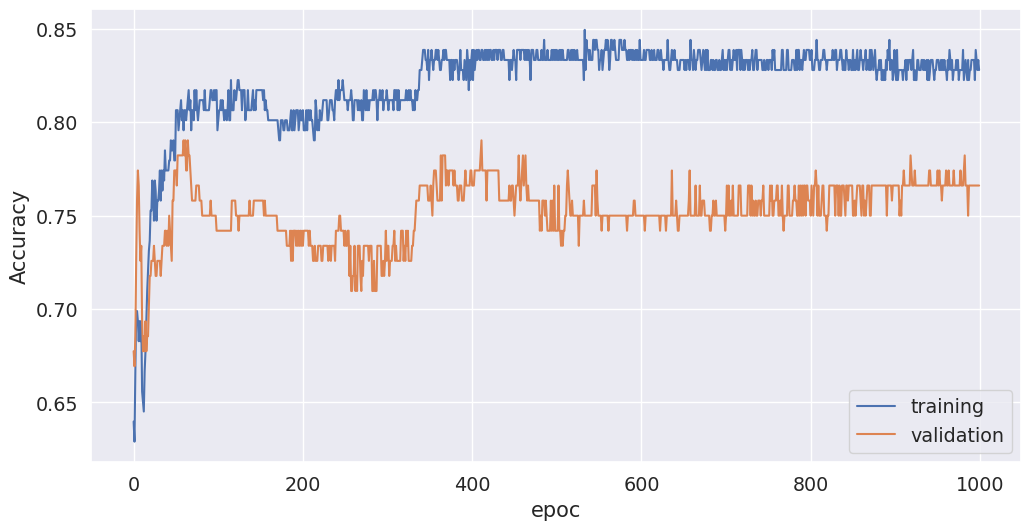

In [107]:
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.ylabel("Accuracy")
plt.xlabel("epoc")
plt.plot(history.history["accuracy"], label="training")
plt.plot(history.history["val_accuracy"], label="validation")
plt.legend()

Que pasa si quiero guardar los pesos de mi mejor modelo: necesito usar callbacks

In [108]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

EarlyStopping para de entrenar el modelo según una condición sobre la variable monitor

In [109]:
es = EarlyStopping(monitor='val_acc', mode='max')

In [110]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(num_classes, activation="softmax"))
opt = keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 16)                112       
_________________________________________________________________
dense_45 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_46 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_47 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________


In [111]:
history = model.fit(
    X_train.values,
    y_train,
    epochs=1000,
    validation_data=(X_validation.values, y_test),
    callbacks=[es],
)

Train on 186 samples, validate on 124 samples
Epoch 1/1000
 32/186 [====>.........................] - ETA: 0s - loss: 10.1761 - accuracy: 0.2812

186/186 [==============================] - 0s 692us/step - loss: 10.3422 - accuracy: 0.2957 - val_loss: 8.0164 - val_accuracy: 0.3629


Epoch 2/1000
 32/186 [====>.........................] - ETA: 0s - loss: 9.0372 - accuracy: 0.3125

186/186 [==============================] - 0s 67us/step - loss: 9.7568 - accuracy: 0.2957 - val_loss: 7.6206 - val_accuracy: 0.3629


Epoch 3/1000
 32/186 [====>.........................] - ETA: 0s - loss: 10.2614 - accuracy: 0.2188

186/186 [==============================] - 0s 54us/step - loss: 9.3197 - accuracy: 0.2957 - val_loss: 7.2734 - val_accuracy: 0.3629


Epoch 4/1000
 32/186 [====>.........................] - ETA: 0s - loss: 10.2300 - accuracy: 0.1875

186/186 [==============================] - 0s 54us/step - loss: 8.9243 - accuracy: 0.2957 - val_loss: 6.9486 - val_accuracy: 0.3629


Epoch 5/1000
 32/186 [====>.........................] - ETA: 0s - loss: 8.3687 - accuracy: 0.3125

186/186 [==============================] - 0s 57us/step - loss: 8.5440 - accuracy: 0.2957 - val_loss: 6.6269 - val_accuracy: 0.3629


Epoch 6/1000
 32/186 [====>.........................] - ETA: 0s - loss: 7.8298 - accuracy: 0.3125

186/186 [==============================] - 0s 60us/step - loss: 8.1720 - accuracy: 0.2957 - val_loss: 6.3160 - val_accuracy: 0.3629


Epoch 7/1000
 32/186 [====>.........................] - ETA: 0s - loss: 7.3377 - accuracy: 0.3125

186/186 [==============================] - 0s 59us/step - loss: 7.8102 - accuracy: 0.2957 - val_loss: 6.0098 - val_accuracy: 0.3629


Epoch 8/1000
 32/186 [====>.........................] - ETA: 0s - loss: 7.8882 - accuracy: 0.2812

186/186 [==============================] - 0s 54us/step - loss: 7.4547 - accuracy: 0.2957 - val_loss: 5.7109 - val_accuracy: 0.3629


Epoch 9/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.8382 - accuracy: 0.3125

186/186 [==============================] - 0s 56us/step - loss: 7.1047 - accuracy: 0.2957 - val_loss: 5.4137 - val_accuracy: 0.3629


Epoch 10/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.2977 - accuracy: 0.3438

186/186 [==============================] - 0s 57us/step - loss: 6.7509 - accuracy: 0.2957 - val_loss: 5.1118 - val_accuracy: 0.3629


Epoch 11/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.1385 - accuracy: 0.3125

186/186 [==============================] - 0s 55us/step - loss: 6.3974 - accuracy: 0.2957 - val_loss: 4.8198 - val_accuracy: 0.3629


Epoch 12/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.7394 - accuracy: 0.3125

186/186 [==============================] - 0s 55us/step - loss: 6.0535 - accuracy: 0.2957 - val_loss: 4.5404 - val_accuracy: 0.3629


Epoch 13/1000
 32/186 [====>.........................] - ETA: 0s - loss: 7.7125 - accuracy: 0.2500

186/186 [==============================] - 0s 55us/step - loss: 5.7165 - accuracy: 0.2957 - val_loss: 4.2637 - val_accuracy: 0.3629


Epoch 14/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.2953 - accuracy: 0.2500

186/186 [==============================] - 0s 59us/step - loss: 5.3760 - accuracy: 0.2957 - val_loss: 3.9897 - val_accuracy: 0.3629


Epoch 15/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.9595 - accuracy: 0.3438

186/186 [==============================] - 0s 55us/step - loss: 5.0389 - accuracy: 0.2957 - val_loss: 3.7249 - val_accuracy: 0.3629


Epoch 16/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.0198 - accuracy: 0.2500

186/186 [==============================] - 0s 54us/step - loss: 4.7097 - accuracy: 0.2957 - val_loss: 3.4672 - val_accuracy: 0.3629


Epoch 17/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.3239 - accuracy: 0.5000

186/186 [==============================] - 0s 55us/step - loss: 4.3854 - accuracy: 0.2903 - val_loss: 3.2212 - val_accuracy: 0.3548


Epoch 18/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.8822 - accuracy: 0.2500

186/186 [==============================] - 0s 57us/step - loss: 4.0689 - accuracy: 0.3011 - val_loss: 2.9939 - val_accuracy: 0.3387


/opt/hostedtoolcache/Python/3.7.9/x64/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 19/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.9389 - accuracy: 0.4062

186/186 [==============================] - 0s 56us/step - loss: 3.7631 - accuracy: 0.2849 - val_loss: 2.7761 - val_accuracy: 0.3629


Epoch 20/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.0141 - accuracy: 0.3750

186/186 [==============================] - 0s 57us/step - loss: 3.4568 - accuracy: 0.2742 - val_loss: 2.5651 - val_accuracy: 0.3548


Epoch 21/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.9390 - accuracy: 0.0938

186/186 [==============================] - 0s 54us/step - loss: 3.1646 - accuracy: 0.2903 - val_loss: 2.3788 - val_accuracy: 0.3468


Epoch 22/1000


 32/186 [====>.........................] - ETA: 0s - loss: 3.4287 - accuracy: 0.1562

186/186 [==============================] - 0s 56us/step - loss: 2.8988 - accuracy: 0.2688 - val_loss: 2.2025 - val_accuracy: 0.2823


Epoch 23/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.4253 - accuracy: 0.2500



186/186 [==============================] - 0s 54us/step - loss: 2.6411 - accuracy: 0.2419 - val_loss: 2.0187 - val_accuracy: 0.2742


Epoch 24/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.9558 - accuracy: 0.4688



186/186 [==============================] - 0s 50us/step - loss: 2.3899 - accuracy: 0.2634 - val_loss: 1.8503 - val_accuracy: 0.2984


Epoch 25/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.1592 - accuracy: 0.1250



186/186 [==============================] - 0s 53us/step - loss: 2.1569 - accuracy: 0.2419 - val_loss: 1.7000 - val_accuracy: 0.3065


Epoch 26/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.4858 - accuracy: 0.4375

186/186 [==============================] - 0s 53us/step - loss: 1.9354 - accuracy: 0.2634 - val_loss: 1.5477 - val_accuracy: 0.2823


Epoch 27/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.6503 - accuracy: 0.2812

186/186 [==============================] - 0s 50us/step - loss: 1.7270 - accuracy: 0.2634 - val_loss: 1.4135 - val_accuracy: 0.2661


Epoch 28/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.4112 - accuracy: 0.2812

186/186 [==============================] - 0s 54us/step - loss: 1.5374 - accuracy: 0.2581 - val_loss: 1.2888 - val_accuracy: 0.2500


Epoch 29/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1003 - accuracy: 0.4062

186/186 [==============================] - 0s 53us/step - loss: 1.3702 - accuracy: 0.2742 - val_loss: 1.1734 - val_accuracy: 0.2339


Epoch 30/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8685 - accuracy: 0.5000

186/186 [==============================] - 0s 53us/step - loss: 1.2228 - accuracy: 0.2957 - val_loss: 1.0731 - val_accuracy: 0.2419


Epoch 31/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8345 - accuracy: 0.4688

186/186 [==============================] - 0s 54us/step - loss: 1.1055 - accuracy: 0.3441 - val_loss: 0.9928 - val_accuracy: 0.2903


Epoch 32/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.9386 - accuracy: 0.3438

186/186 [==============================] - 0s 53us/step - loss: 1.0202 - accuracy: 0.4140 - val_loss: 0.9385 - val_accuracy: 0.3387


Epoch 33/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.8019 - accuracy: 0.4375

186/186 [==============================] - 0s 57us/step - loss: 0.9642 - accuracy: 0.4892 - val_loss: 0.9097 - val_accuracy: 0.4597


Epoch 34/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7466 - accuracy: 0.5625

186/186 [==============================] - 0s 60us/step - loss: 0.9366 - accuracy: 0.5860 - val_loss: 0.8972 - val_accuracy: 0.5000


Epoch 35/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7236 - accuracy: 0.5312

186/186 [==============================] - 0s 52us/step - loss: 0.9214 - accuracy: 0.6290 - val_loss: 0.8878 - val_accuracy: 0.5323


Epoch 36/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6989 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.9122 - accuracy: 0.6613 - val_loss: 0.8831 - val_accuracy: 0.5323


Epoch 37/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6830 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.9028 - accuracy: 0.6774 - val_loss: 0.8778 - val_accuracy: 0.5565


Epoch 38/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7153 - accuracy: 0.7500



186/186 [==============================] - 0s 56us/step - loss: 0.8967 - accuracy: 0.6882 - val_loss: 0.8732 - val_accuracy: 0.5565


Epoch 39/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7341 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.8905 - accuracy: 0.6989 - val_loss: 0.8680 - val_accuracy: 0.5645


Epoch 40/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.7431 - accuracy: 0.5938

186/186 [==============================] - 0s 57us/step - loss: 0.8864 - accuracy: 0.7043 - val_loss: 0.8647 - val_accuracy: 0.5645


Epoch 41/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7171 - accuracy: 0.5312

186/186 [==============================] - 0s 56us/step - loss: 0.8810 - accuracy: 0.7097 - val_loss: 0.8600 - val_accuracy: 0.5726


Epoch 42/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.6799 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.8772 - accuracy: 0.7043 - val_loss: 0.8567 - val_accuracy: 0.5726


Epoch 43/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6815 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.8735 - accuracy: 0.7097 - val_loss: 0.8528 - val_accuracy: 0.5806


Epoch 44/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7004 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.8695 - accuracy: 0.7097 - val_loss: 0.8483 - val_accuracy: 0.5806


Epoch 45/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7223 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.8655 - accuracy: 0.7043 - val_loss: 0.8432 - val_accuracy: 0.5726


Epoch 46/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7079 - accuracy: 0.5625

186/186 [==============================] - 0s 56us/step - loss: 0.8613 - accuracy: 0.7043 - val_loss: 0.8366 - val_accuracy: 0.5726


Epoch 47/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7471 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.8576 - accuracy: 0.7097 - val_loss: 0.8341 - val_accuracy: 0.5887


Epoch 48/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7030 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.8547 - accuracy: 0.7097 - val_loss: 0.8303 - val_accuracy: 0.6048


Epoch 49/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7366 - accuracy: 0.6250

186/186 [==============================] - 0s 54us/step - loss: 0.8516 - accuracy: 0.7151 - val_loss: 0.8282 - val_accuracy: 0.6048


Epoch 50/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6923 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.8479 - accuracy: 0.7151 - val_loss: 0.8246 - val_accuracy: 0.6048


Epoch 51/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6981 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.8448 - accuracy: 0.7151 - val_loss: 0.8231 - val_accuracy: 0.6048


Epoch 52/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7049 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.8421 - accuracy: 0.7097 - val_loss: 0.8207 - val_accuracy: 0.6048


Epoch 53/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6822 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.8391 - accuracy: 0.7151 - val_loss: 0.8189 - val_accuracy: 0.6048


Epoch 54/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7113 - accuracy: 0.7188



186/186 [==============================] - 0s 51us/step - loss: 0.8365 - accuracy: 0.7151 - val_loss: 0.8179 - val_accuracy: 0.5968


Epoch 55/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6738 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.8338 - accuracy: 0.7151 - val_loss: 0.8168 - val_accuracy: 0.5968


Epoch 56/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7007 - accuracy: 0.6875



186/186 [==============================] - 0s 50us/step - loss: 0.8313 - accuracy: 0.7151 - val_loss: 0.8148 - val_accuracy: 0.5968


Epoch 57/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6754 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.8281 - accuracy: 0.7151 - val_loss: 0.8139 - val_accuracy: 0.5968


Epoch 58/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6938 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.8254 - accuracy: 0.7204 - val_loss: 0.8118 - val_accuracy: 0.5968


Epoch 59/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7065 - accuracy: 0.6250

186/186 [==============================] - 0s 62us/step - loss: 0.8221 - accuracy: 0.7204 - val_loss: 0.8113 - val_accuracy: 0.5968


Epoch 60/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7217 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.8194 - accuracy: 0.7204 - val_loss: 0.8110 - val_accuracy: 0.5968


Epoch 61/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6976 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.8174 - accuracy: 0.7204 - val_loss: 0.8105 - val_accuracy: 0.5968


Epoch 62/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7046 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.8149 - accuracy: 0.7204 - val_loss: 0.8101 - val_accuracy: 0.5968


Epoch 63/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.3503 - accuracy: 0.7188



186/186 [==============================] - 0s 51us/step - loss: 0.8122 - accuracy: 0.7204 - val_loss: 0.8105 - val_accuracy: 0.5968


Epoch 64/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6950 - accuracy: 0.6250

186/186 [==============================] - 0s 58us/step - loss: 0.8102 - accuracy: 0.7204 - val_loss: 0.8104 - val_accuracy: 0.5968


Epoch 65/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7019 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.8072 - accuracy: 0.7204 - val_loss: 0.8098 - val_accuracy: 0.5968


Epoch 66/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.2967 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.8043 - accuracy: 0.7204 - val_loss: 0.8098 - val_accuracy: 0.5968


Epoch 67/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.2833 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.8019 - accuracy: 0.7204 - val_loss: 0.8106 - val_accuracy: 0.5887


Epoch 68/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7314 - accuracy: 0.6250

186/186 [==============================] - 0s 53us/step - loss: 0.7996 - accuracy: 0.7151 - val_loss: 0.8102 - val_accuracy: 0.5968


Epoch 69/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6958 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.7972 - accuracy: 0.7151 - val_loss: 0.8104 - val_accuracy: 0.5887


Epoch 70/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6929 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.7943 - accuracy: 0.7258 - val_loss: 0.8105 - val_accuracy: 0.5887


Epoch 71/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7101 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.7919 - accuracy: 0.7204 - val_loss: 0.8098 - val_accuracy: 0.5968


Epoch 72/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7107 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.7891 - accuracy: 0.7204 - val_loss: 0.8096 - val_accuracy: 0.5968


Epoch 73/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6968 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.7866 - accuracy: 0.7204 - val_loss: 0.8095 - val_accuracy: 0.5968


Epoch 74/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7020 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.7839 - accuracy: 0.7204 - val_loss: 0.8100 - val_accuracy: 0.5968


Epoch 75/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6963 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.7814 - accuracy: 0.7151 - val_loss: 0.8090 - val_accuracy: 0.5968


Epoch 76/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6994 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.7786 - accuracy: 0.7151 - val_loss: 0.8084 - val_accuracy: 0.5968


Epoch 77/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6911 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 0.7763 - accuracy: 0.7151 - val_loss: 0.8081 - val_accuracy: 0.5968


Epoch 78/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6978 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.7738 - accuracy: 0.7204 - val_loss: 0.8082 - val_accuracy: 0.5968


Epoch 79/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6955 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.7722 - accuracy: 0.7204 - val_loss: 0.8077 - val_accuracy: 0.5968


Epoch 80/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6923 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.7690 - accuracy: 0.7204 - val_loss: 0.8081 - val_accuracy: 0.5968


Epoch 81/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7039 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.7664 - accuracy: 0.7204 - val_loss: 0.8085 - val_accuracy: 0.5887


Epoch 82/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1182 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 0.7644 - accuracy: 0.7204 - val_loss: 0.8086 - val_accuracy: 0.5887


Epoch 83/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6953 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.7620 - accuracy: 0.7151 - val_loss: 0.8078 - val_accuracy: 0.5887


Epoch 84/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6974 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.7595 - accuracy: 0.7204 - val_loss: 0.8075 - val_accuracy: 0.5968


Epoch 85/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7032 - accuracy: 0.5938

186/186 [==============================] - 0s 52us/step - loss: 0.7573 - accuracy: 0.7204 - val_loss: 0.8074 - val_accuracy: 0.5968


Epoch 86/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6833 - accuracy: 0.6875



186/186 [==============================] - 0s 53us/step - loss: 0.7551 - accuracy: 0.7204 - val_loss: 0.8074 - val_accuracy: 0.5968


Epoch 87/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6642 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.7523 - accuracy: 0.7204 - val_loss: 0.8071 - val_accuracy: 0.5887


Epoch 88/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6853 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.7499 - accuracy: 0.7151 - val_loss: 0.8065 - val_accuracy: 0.5968


Epoch 89/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6813 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.7481 - accuracy: 0.7204 - val_loss: 0.8066 - val_accuracy: 0.5887


Epoch 90/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6913 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.7453 - accuracy: 0.7204 - val_loss: 0.8061 - val_accuracy: 0.5968


Epoch 91/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9772 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.7436 - accuracy: 0.7204 - val_loss: 0.8064 - val_accuracy: 0.5887


Epoch 92/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9542 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.7415 - accuracy: 0.7151 - val_loss: 0.8065 - val_accuracy: 0.5887


Epoch 93/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7150 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.7391 - accuracy: 0.7151 - val_loss: 0.8067 - val_accuracy: 0.5887


Epoch 94/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6761 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.7374 - accuracy: 0.7097 - val_loss: 0.8060 - val_accuracy: 0.5887


Epoch 95/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9398 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.7343 - accuracy: 0.7151 - val_loss: 0.8050 - val_accuracy: 0.5887


Epoch 96/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7109 - accuracy: 0.5625

186/186 [==============================] - 0s 52us/step - loss: 0.7319 - accuracy: 0.7151 - val_loss: 0.8052 - val_accuracy: 0.5887


Epoch 97/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6761 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.7299 - accuracy: 0.7204 - val_loss: 0.8047 - val_accuracy: 0.5887


Epoch 98/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6781 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.7275 - accuracy: 0.7151 - val_loss: 0.8041 - val_accuracy: 0.5887


Epoch 99/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8926 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.7248 - accuracy: 0.7204 - val_loss: 0.8045 - val_accuracy: 0.5887


Epoch 100/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6689 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.7234 - accuracy: 0.7151 - val_loss: 0.8050 - val_accuracy: 0.5887


Epoch 101/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6944 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.7205 - accuracy: 0.7204 - val_loss: 0.8045 - val_accuracy: 0.5887


Epoch 102/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6973 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.7191 - accuracy: 0.7151 - val_loss: 0.8047 - val_accuracy: 0.5887


Epoch 103/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6925 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.7158 - accuracy: 0.7204 - val_loss: 0.8046 - val_accuracy: 0.5887


Epoch 104/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6913 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.7130 - accuracy: 0.7204 - val_loss: 0.8046 - val_accuracy: 0.5887


Epoch 105/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6720 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.7108 - accuracy: 0.7204 - val_loss: 0.8052 - val_accuracy: 0.5887


Epoch 106/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6891 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.7088 - accuracy: 0.7204 - val_loss: 0.8052 - val_accuracy: 0.5887


Epoch 107/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6609 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.7065 - accuracy: 0.7204 - val_loss: 0.8053 - val_accuracy: 0.5887


Epoch 108/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6876 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.7043 - accuracy: 0.7204 - val_loss: 0.8049 - val_accuracy: 0.5887


Epoch 109/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7125 - accuracy: 0.5312



186/186 [==============================] - 0s 54us/step - loss: 0.7018 - accuracy: 0.7204 - val_loss: 0.8048 - val_accuracy: 0.5887


Epoch 110/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7296 - accuracy: 0.8125



186/186 [==============================] - 0s 51us/step - loss: 0.6997 - accuracy: 0.7204 - val_loss: 0.8068 - val_accuracy: 0.5887


Epoch 111/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6868 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.6991 - accuracy: 0.7204 - val_loss: 0.8089 - val_accuracy: 0.5968


Epoch 112/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6699 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.6979 - accuracy: 0.7204 - val_loss: 0.8109 - val_accuracy: 0.5968


Epoch 113/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7300 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6971 - accuracy: 0.7204 - val_loss: 0.8116 - val_accuracy: 0.5968


Epoch 114/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6861 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6963 - accuracy: 0.7204 - val_loss: 0.8116 - val_accuracy: 0.5968


Epoch 115/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6976 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.6952 - accuracy: 0.7204 - val_loss: 0.8112 - val_accuracy: 0.5968


Epoch 116/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6602 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.6943 - accuracy: 0.7204 - val_loss: 0.8119 - val_accuracy: 0.5968


Epoch 117/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6856 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.6936 - accuracy: 0.7204 - val_loss: 0.8128 - val_accuracy: 0.5968


Epoch 118/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7070 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.6925 - accuracy: 0.7204 - val_loss: 0.8116 - val_accuracy: 0.5968


Epoch 119/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6723 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.6917 - accuracy: 0.7204 - val_loss: 0.8116 - val_accuracy: 0.5968


Epoch 120/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7038 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6908 - accuracy: 0.7204 - val_loss: 0.8118 - val_accuracy: 0.5968


Epoch 121/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6973 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.6900 - accuracy: 0.7204 - val_loss: 0.8125 - val_accuracy: 0.5968


Epoch 122/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6882 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6892 - accuracy: 0.7204 - val_loss: 0.8122 - val_accuracy: 0.5968


Epoch 123/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7102 - accuracy: 0.6875



186/186 [==============================] - 0s 55us/step - loss: 0.6884 - accuracy: 0.7204 - val_loss: 0.8122 - val_accuracy: 0.5968


Epoch 124/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6790 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.6877 - accuracy: 0.7204 - val_loss: 0.8117 - val_accuracy: 0.5968


Epoch 125/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7194 - accuracy: 0.5938

186/186 [==============================] - 0s 51us/step - loss: 0.6867 - accuracy: 0.7204 - val_loss: 0.8107 - val_accuracy: 0.5968


Epoch 126/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6879 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.6862 - accuracy: 0.7204 - val_loss: 0.8089 - val_accuracy: 0.5968


Epoch 127/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6847 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.6852 - accuracy: 0.7204 - val_loss: 0.8102 - val_accuracy: 0.5968


Epoch 128/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6827 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.6847 - accuracy: 0.7204 - val_loss: 0.8087 - val_accuracy: 0.5968


Epoch 129/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7042 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6839 - accuracy: 0.7204 - val_loss: 0.8122 - val_accuracy: 0.5968


Epoch 130/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6832 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.6837 - accuracy: 0.7204 - val_loss: 0.8102 - val_accuracy: 0.5968


Epoch 131/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6819 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.6829 - accuracy: 0.7204 - val_loss: 0.8115 - val_accuracy: 0.5968


Epoch 132/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6676 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.6827 - accuracy: 0.7204 - val_loss: 0.8111 - val_accuracy: 0.5968


Epoch 133/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6803 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6818 - accuracy: 0.7258 - val_loss: 0.8103 - val_accuracy: 0.5968


Epoch 134/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6775 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6816 - accuracy: 0.7258 - val_loss: 0.8098 - val_accuracy: 0.5968


Epoch 135/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6899 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6811 - accuracy: 0.7258 - val_loss: 0.8104 - val_accuracy: 0.5968


Epoch 136/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6949 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.6809 - accuracy: 0.7258 - val_loss: 0.8101 - val_accuracy: 0.5968


Epoch 137/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6626 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.6807 - accuracy: 0.7258 - val_loss: 0.8092 - val_accuracy: 0.5968


Epoch 138/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6445 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.6804 - accuracy: 0.7258 - val_loss: 0.8098 - val_accuracy: 0.5968


Epoch 139/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7077 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.6802 - accuracy: 0.7258 - val_loss: 0.8122 - val_accuracy: 0.5968


Epoch 140/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6746 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.6801 - accuracy: 0.7258 - val_loss: 0.8111 - val_accuracy: 0.5968


Epoch 141/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6980 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.6798 - accuracy: 0.7258 - val_loss: 0.8106 - val_accuracy: 0.5968


Epoch 142/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6940 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.6797 - accuracy: 0.7258 - val_loss: 0.8114 - val_accuracy: 0.5968


Epoch 143/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6884 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6797 - accuracy: 0.7204 - val_loss: 0.8104 - val_accuracy: 0.5968


Epoch 144/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6938 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.6790 - accuracy: 0.7258 - val_loss: 0.8131 - val_accuracy: 0.5968


Epoch 145/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6839 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6789 - accuracy: 0.7258 - val_loss: 0.8107 - val_accuracy: 0.5968


Epoch 146/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6942 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.6785 - accuracy: 0.7258 - val_loss: 0.8104 - val_accuracy: 0.5968


Epoch 147/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6667 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.6784 - accuracy: 0.7258 - val_loss: 0.8087 - val_accuracy: 0.5968


Epoch 148/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6503 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.6782 - accuracy: 0.7258 - val_loss: 0.8107 - val_accuracy: 0.5968


Epoch 149/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6728 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.6782 - accuracy: 0.7258 - val_loss: 0.8102 - val_accuracy: 0.5968


Epoch 150/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6969 - accuracy: 0.5938

186/186 [==============================] - 0s 54us/step - loss: 0.6780 - accuracy: 0.7258 - val_loss: 0.8097 - val_accuracy: 0.5968


Epoch 151/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6674 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.6774 - accuracy: 0.7258 - val_loss: 0.8091 - val_accuracy: 0.5968


Epoch 152/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6770 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.6774 - accuracy: 0.7258 - val_loss: 0.8084 - val_accuracy: 0.5968


Epoch 153/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6865 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.6770 - accuracy: 0.7258 - val_loss: 0.8075 - val_accuracy: 0.5968


Epoch 154/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6809 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.6767 - accuracy: 0.7258 - val_loss: 0.8106 - val_accuracy: 0.5968


Epoch 155/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6612 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.6764 - accuracy: 0.7258 - val_loss: 0.8098 - val_accuracy: 0.5968


Epoch 156/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6859 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.6762 - accuracy: 0.7258 - val_loss: 0.8095 - val_accuracy: 0.5968


Epoch 157/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7031 - accuracy: 0.5938

186/186 [==============================] - 0s 51us/step - loss: 0.6762 - accuracy: 0.7258 - val_loss: 0.8089 - val_accuracy: 0.5968


Epoch 158/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6485 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.6761 - accuracy: 0.7258 - val_loss: 0.8094 - val_accuracy: 0.5968


Epoch 159/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6704 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.6757 - accuracy: 0.7258 - val_loss: 0.8098 - val_accuracy: 0.5968


Epoch 160/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6605 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.6756 - accuracy: 0.7258 - val_loss: 0.8069 - val_accuracy: 0.5968


Epoch 161/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6905 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 0.6750 - accuracy: 0.7258 - val_loss: 0.8085 - val_accuracy: 0.5968


Epoch 162/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6847 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6749 - accuracy: 0.7258 - val_loss: 0.8084 - val_accuracy: 0.5968


Epoch 163/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6808 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.6749 - accuracy: 0.7258 - val_loss: 0.8060 - val_accuracy: 0.5968


Epoch 164/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6589 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.6746 - accuracy: 0.7258 - val_loss: 0.8069 - val_accuracy: 0.5968


Epoch 165/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6670 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.6742 - accuracy: 0.7258 - val_loss: 0.8086 - val_accuracy: 0.5968


Epoch 166/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6463 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6739 - accuracy: 0.7258 - val_loss: 0.8077 - val_accuracy: 0.5968


Epoch 167/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6477 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.6739 - accuracy: 0.7258 - val_loss: 0.8088 - val_accuracy: 0.5968


Epoch 168/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6623 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.6737 - accuracy: 0.7258 - val_loss: 0.8056 - val_accuracy: 0.5968


Epoch 169/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6709 - accuracy: 0.7500



186/186 [==============================] - 0s 54us/step - loss: 0.6733 - accuracy: 0.7258 - val_loss: 0.8037 - val_accuracy: 0.5968


Epoch 170/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6729 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 0.6733 - accuracy: 0.7258 - val_loss: 0.8076 - val_accuracy: 0.5968


Epoch 171/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6830 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.6729 - accuracy: 0.7258 - val_loss: 0.8067 - val_accuracy: 0.5968


Epoch 172/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6671 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6728 - accuracy: 0.7258 - val_loss: 0.8071 - val_accuracy: 0.5968


Epoch 173/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6847 - accuracy: 0.6250

186/186 [==============================] - 0s 54us/step - loss: 0.6723 - accuracy: 0.7258 - val_loss: 0.8066 - val_accuracy: 0.5968


Epoch 174/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6583 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.6722 - accuracy: 0.7258 - val_loss: 0.8073 - val_accuracy: 0.5968


Epoch 175/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6932 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 0.6719 - accuracy: 0.7258 - val_loss: 0.8047 - val_accuracy: 0.5968


Epoch 176/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6873 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.6719 - accuracy: 0.7258 - val_loss: 0.8068 - val_accuracy: 0.5968


Epoch 177/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6818 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.6718 - accuracy: 0.7258 - val_loss: 0.8055 - val_accuracy: 0.5968


Epoch 178/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6662 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.6715 - accuracy: 0.7258 - val_loss: 0.8038 - val_accuracy: 0.5968


Epoch 179/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6931 - accuracy: 0.6250

186/186 [==============================] - 0s 54us/step - loss: 0.6711 - accuracy: 0.7258 - val_loss: 0.8066 - val_accuracy: 0.5968


Epoch 180/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6563 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.6709 - accuracy: 0.7258 - val_loss: 0.8068 - val_accuracy: 0.5968


Epoch 181/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6623 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.6707 - accuracy: 0.7258 - val_loss: 0.8072 - val_accuracy: 0.5968


Epoch 182/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6871 - accuracy: 0.5938

186/186 [==============================] - 0s 52us/step - loss: 0.6705 - accuracy: 0.7258 - val_loss: 0.8050 - val_accuracy: 0.5968


Epoch 183/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6996 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.6702 - accuracy: 0.7258 - val_loss: 0.8059 - val_accuracy: 0.5968


Epoch 184/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6869 - accuracy: 0.6562

186/186 [==============================] - 0s 60us/step - loss: 0.6700 - accuracy: 0.7258 - val_loss: 0.8055 - val_accuracy: 0.5968


Epoch 185/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6931 - accuracy: 0.6250



186/186 [==============================] - 0s 57us/step - loss: 0.6701 - accuracy: 0.7258 - val_loss: 0.8056 - val_accuracy: 0.5968


Epoch 186/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6674 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.6697 - accuracy: 0.7258 - val_loss: 0.8060 - val_accuracy: 0.5968


Epoch 187/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6864 - accuracy: 0.6562

186/186 [==============================] - 0s 65us/step - loss: 0.6696 - accuracy: 0.7258 - val_loss: 0.8051 - val_accuracy: 0.5968


Epoch 188/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6427 - accuracy: 0.8438



186/186 [==============================] - 0s 55us/step - loss: 0.6691 - accuracy: 0.7258 - val_loss: 0.8045 - val_accuracy: 0.5968


Epoch 189/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6569 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.6687 - accuracy: 0.7258 - val_loss: 0.8076 - val_accuracy: 0.5968


Epoch 190/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6597 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6685 - accuracy: 0.7258 - val_loss: 0.8049 - val_accuracy: 0.5968


Epoch 191/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7123 - accuracy: 0.5312

186/186 [==============================] - 0s 53us/step - loss: 0.6683 - accuracy: 0.7258 - val_loss: 0.8075 - val_accuracy: 0.5968


Epoch 192/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6893 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.6682 - accuracy: 0.7258 - val_loss: 0.8045 - val_accuracy: 0.5968


Epoch 193/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6789 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6684 - accuracy: 0.7258 - val_loss: 0.8044 - val_accuracy: 0.5968


Epoch 194/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6451 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.6681 - accuracy: 0.7258 - val_loss: 0.8040 - val_accuracy: 0.5968


Epoch 195/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6756 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.6676 - accuracy: 0.7258 - val_loss: 0.8075 - val_accuracy: 0.5968


Epoch 196/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6517 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6677 - accuracy: 0.7258 - val_loss: 0.8050 - val_accuracy: 0.5968


Epoch 197/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6597 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.6675 - accuracy: 0.7258 - val_loss: 0.8043 - val_accuracy: 0.5968


Epoch 198/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6607 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.6669 - accuracy: 0.7258 - val_loss: 0.8063 - val_accuracy: 0.5968


Epoch 199/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6694 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.6670 - accuracy: 0.7258 - val_loss: 0.8065 - val_accuracy: 0.5968


Epoch 200/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6495 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.6666 - accuracy: 0.7258 - val_loss: 0.8040 - val_accuracy: 0.5968


Epoch 201/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6786 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 0.6665 - accuracy: 0.7258 - val_loss: 0.8020 - val_accuracy: 0.5968


Epoch 202/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6468 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.6663 - accuracy: 0.7258 - val_loss: 0.8051 - val_accuracy: 0.5968


Epoch 203/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6667 - accuracy: 0.7188



186/186 [==============================] - 0s 50us/step - loss: 0.6661 - accuracy: 0.7258 - val_loss: 0.8053 - val_accuracy: 0.5968


Epoch 204/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6542 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.6658 - accuracy: 0.7258 - val_loss: 0.8038 - val_accuracy: 0.5968


Epoch 205/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6577 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.6656 - accuracy: 0.7258 - val_loss: 0.8037 - val_accuracy: 0.5968


Epoch 206/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6720 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.6651 - accuracy: 0.7258 - val_loss: 0.8039 - val_accuracy: 0.5968


Epoch 207/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6926 - accuracy: 0.6250

186/186 [==============================] - 0s 51us/step - loss: 0.6653 - accuracy: 0.7258 - val_loss: 0.8031 - val_accuracy: 0.5968


Epoch 208/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6682 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.6650 - accuracy: 0.7258 - val_loss: 0.8030 - val_accuracy: 0.5968


Epoch 209/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6688 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.6646 - accuracy: 0.7258 - val_loss: 0.8031 - val_accuracy: 0.5968


Epoch 210/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6655 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.6644 - accuracy: 0.7258 - val_loss: 0.8031 - val_accuracy: 0.5968


Epoch 211/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6673 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.6645 - accuracy: 0.7258 - val_loss: 0.8049 - val_accuracy: 0.5968


Epoch 212/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6462 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.6640 - accuracy: 0.7258 - val_loss: 0.8035 - val_accuracy: 0.5968


Epoch 213/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6617 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6638 - accuracy: 0.7258 - val_loss: 0.8048 - val_accuracy: 0.5968


Epoch 214/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6769 - accuracy: 0.6562

186/186 [==============================] - 0s 61us/step - loss: 0.6638 - accuracy: 0.7258 - val_loss: 0.8021 - val_accuracy: 0.5968


Epoch 215/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6750 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.6635 - accuracy: 0.7258 - val_loss: 0.8007 - val_accuracy: 0.5968


Epoch 216/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6517 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.6631 - accuracy: 0.7258 - val_loss: 0.8006 - val_accuracy: 0.5968


Epoch 217/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6981 - accuracy: 0.6250



186/186 [==============================] - 0s 59us/step - loss: 0.6630 - accuracy: 0.7258 - val_loss: 0.8044 - val_accuracy: 0.5968


Epoch 218/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6440 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6628 - accuracy: 0.7258 - val_loss: 0.8048 - val_accuracy: 0.5968


Epoch 219/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6570 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.6627 - accuracy: 0.7258 - val_loss: 0.8047 - val_accuracy: 0.5968


Epoch 220/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6264 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.6627 - accuracy: 0.7258 - val_loss: 0.8031 - val_accuracy: 0.5968


Epoch 221/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6602 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.6623 - accuracy: 0.7258 - val_loss: 0.8032 - val_accuracy: 0.5968


Epoch 222/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6585 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.6620 - accuracy: 0.7258 - val_loss: 0.8027 - val_accuracy: 0.5968


Epoch 223/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6750 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6617 - accuracy: 0.7258 - val_loss: 0.8042 - val_accuracy: 0.5968


Epoch 224/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6555 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6619 - accuracy: 0.7258 - val_loss: 0.8021 - val_accuracy: 0.5968


Epoch 225/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6654 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 0.6614 - accuracy: 0.7258 - val_loss: 0.8003 - val_accuracy: 0.5968


Epoch 226/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6222 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.6612 - accuracy: 0.7258 - val_loss: 0.8001 - val_accuracy: 0.5968


Epoch 227/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6042 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.6610 - accuracy: 0.7258 - val_loss: 0.7977 - val_accuracy: 0.5968


Epoch 228/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6824 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.6610 - accuracy: 0.7258 - val_loss: 0.7995 - val_accuracy: 0.5968


Epoch 229/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6324 - accuracy: 0.7812



186/186 [==============================] - 0s 56us/step - loss: 0.6605 - accuracy: 0.7258 - val_loss: 0.8018 - val_accuracy: 0.5968


Epoch 230/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6714 - accuracy: 0.6875



186/186 [==============================] - 0s 58us/step - loss: 0.6602 - accuracy: 0.7258 - val_loss: 0.8062 - val_accuracy: 0.5968


Epoch 231/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6667 - accuracy: 0.7812



186/186 [==============================] - 0s 56us/step - loss: 0.6604 - accuracy: 0.7258 - val_loss: 0.8048 - val_accuracy: 0.5968


Epoch 232/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6738 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.6602 - accuracy: 0.7258 - val_loss: 0.8025 - val_accuracy: 0.5968


Epoch 233/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6931 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.6599 - accuracy: 0.7258 - val_loss: 0.8050 - val_accuracy: 0.5968


Epoch 234/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6638 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.6599 - accuracy: 0.7258 - val_loss: 0.8039 - val_accuracy: 0.5968


Epoch 235/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6364 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.6595 - accuracy: 0.7258 - val_loss: 0.8038 - val_accuracy: 0.5968


Epoch 236/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6917 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.6594 - accuracy: 0.7258 - val_loss: 0.8019 - val_accuracy: 0.5968


Epoch 237/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6214 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6590 - accuracy: 0.7258 - val_loss: 0.8019 - val_accuracy: 0.5968


Epoch 238/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6370 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.6590 - accuracy: 0.7258 - val_loss: 0.8004 - val_accuracy: 0.5968


Epoch 239/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6524 - accuracy: 0.7500



186/186 [==============================] - 0s 51us/step - loss: 0.6588 - accuracy: 0.7258 - val_loss: 0.8006 - val_accuracy: 0.5968


Epoch 240/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6535 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.6583 - accuracy: 0.7258 - val_loss: 0.8010 - val_accuracy: 0.5968


Epoch 241/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7040 - accuracy: 0.5938



186/186 [==============================] - 0s 67us/step - loss: 0.6584 - accuracy: 0.7258 - val_loss: 0.8009 - val_accuracy: 0.5968


Epoch 242/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6655 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.6583 - accuracy: 0.7258 - val_loss: 0.8016 - val_accuracy: 0.5968


Epoch 243/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6761 - accuracy: 0.6562

186/186 [==============================] - 0s 61us/step - loss: 0.6579 - accuracy: 0.7258 - val_loss: 0.7997 - val_accuracy: 0.5968


Epoch 244/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6669 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 0.6577 - accuracy: 0.7258 - val_loss: 0.7992 - val_accuracy: 0.5968


Epoch 245/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6849 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.6574 - accuracy: 0.7258 - val_loss: 0.8014 - val_accuracy: 0.5968


Epoch 246/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6242 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.6572 - accuracy: 0.7258 - val_loss: 0.7994 - val_accuracy: 0.5968


Epoch 247/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6158 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.6571 - accuracy: 0.7258 - val_loss: 0.8038 - val_accuracy: 0.5968


Epoch 248/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6733 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.6570 - accuracy: 0.7258 - val_loss: 0.8015 - val_accuracy: 0.5968


Epoch 249/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6414 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.6568 - accuracy: 0.7258 - val_loss: 0.7999 - val_accuracy: 0.5968


Epoch 250/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6080 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.6567 - accuracy: 0.7258 - val_loss: 0.8026 - val_accuracy: 0.5968


Epoch 251/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6774 - accuracy: 0.6562



186/186 [==============================] - 0s 55us/step - loss: 0.6566 - accuracy: 0.7258 - val_loss: 0.8008 - val_accuracy: 0.5968


Epoch 252/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7130 - accuracy: 0.5938

186/186 [==============================] - 0s 55us/step - loss: 0.6561 - accuracy: 0.7258 - val_loss: 0.7992 - val_accuracy: 0.5968


Epoch 253/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6310 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.6560 - accuracy: 0.7258 - val_loss: 0.8012 - val_accuracy: 0.5968


Epoch 254/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6863 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.6559 - accuracy: 0.7258 - val_loss: 0.7987 - val_accuracy: 0.5968


Epoch 255/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6247 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.6558 - accuracy: 0.7258 - val_loss: 0.7984 - val_accuracy: 0.5968


Epoch 256/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6420 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.6553 - accuracy: 0.7258 - val_loss: 0.7995 - val_accuracy: 0.5968


Epoch 257/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6586 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6551 - accuracy: 0.7258 - val_loss: 0.7984 - val_accuracy: 0.5968


Epoch 258/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6774 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.6549 - accuracy: 0.7258 - val_loss: 0.8011 - val_accuracy: 0.5968


Epoch 259/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6476 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.6547 - accuracy: 0.7258 - val_loss: 0.8014 - val_accuracy: 0.5968


Epoch 260/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6542 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.6552 - accuracy: 0.7258 - val_loss: 0.8014 - val_accuracy: 0.5968


Epoch 261/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6584 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.6545 - accuracy: 0.7258 - val_loss: 0.7991 - val_accuracy: 0.5968


Epoch 262/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6055 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.6543 - accuracy: 0.7258 - val_loss: 0.8000 - val_accuracy: 0.5968


Epoch 263/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6942 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.6540 - accuracy: 0.7258 - val_loss: 0.8008 - val_accuracy: 0.5968


Epoch 264/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6292 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.6542 - accuracy: 0.7258 - val_loss: 0.7991 - val_accuracy: 0.5968


Epoch 265/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6124 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.6536 - accuracy: 0.7258 - val_loss: 0.7989 - val_accuracy: 0.5968


Epoch 266/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6552 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6536 - accuracy: 0.7258 - val_loss: 0.7982 - val_accuracy: 0.5968


Epoch 267/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6278 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.6534 - accuracy: 0.7258 - val_loss: 0.7991 - val_accuracy: 0.5968


Epoch 268/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6912 - accuracy: 0.5625

186/186 [==============================] - 0s 53us/step - loss: 0.6531 - accuracy: 0.7258 - val_loss: 0.7998 - val_accuracy: 0.5968


Epoch 269/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6352 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.6532 - accuracy: 0.7258 - val_loss: 0.7992 - val_accuracy: 0.5968


Epoch 270/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6635 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.6527 - accuracy: 0.7258 - val_loss: 0.7999 - val_accuracy: 0.5968


Epoch 271/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6455 - accuracy: 0.7500



186/186 [==============================] - 0s 58us/step - loss: 0.6526 - accuracy: 0.7258 - val_loss: 0.8005 - val_accuracy: 0.5968


Epoch 272/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7209 - accuracy: 0.5625

186/186 [==============================] - 0s 53us/step - loss: 0.6523 - accuracy: 0.7258 - val_loss: 0.8030 - val_accuracy: 0.5968


Epoch 273/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6575 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.6526 - accuracy: 0.7258 - val_loss: 0.8015 - val_accuracy: 0.5968


Epoch 274/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6568 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.6523 - accuracy: 0.7258 - val_loss: 0.8006 - val_accuracy: 0.5968


Epoch 275/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6162 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.6521 - accuracy: 0.7258 - val_loss: 0.7996 - val_accuracy: 0.5968


Epoch 276/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6265 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.6517 - accuracy: 0.7258 - val_loss: 0.7992 - val_accuracy: 0.5968


Epoch 277/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6847 - accuracy: 0.6250

186/186 [==============================] - 0s 51us/step - loss: 0.6514 - accuracy: 0.7258 - val_loss: 0.7986 - val_accuracy: 0.5968


Epoch 278/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6355 - accuracy: 0.7500



186/186 [==============================] - 0s 58us/step - loss: 0.6512 - accuracy: 0.7258 - val_loss: 0.7988 - val_accuracy: 0.5968


Epoch 279/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6274 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.6513 - accuracy: 0.7258 - val_loss: 0.7992 - val_accuracy: 0.5968


Epoch 280/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6709 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.6512 - accuracy: 0.7258 - val_loss: 0.7969 - val_accuracy: 0.5968


Epoch 281/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6254 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.6508 - accuracy: 0.7258 - val_loss: 0.7967 - val_accuracy: 0.5968


Epoch 282/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6247 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.6506 - accuracy: 0.7258 - val_loss: 0.8002 - val_accuracy: 0.5968


Epoch 283/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6164 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.6506 - accuracy: 0.7258 - val_loss: 0.8004 - val_accuracy: 0.5968


Epoch 284/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6607 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6505 - accuracy: 0.7258 - val_loss: 0.7994 - val_accuracy: 0.5968


Epoch 285/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6521 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.6502 - accuracy: 0.7258 - val_loss: 0.8006 - val_accuracy: 0.5968


Epoch 286/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6918 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.6500 - accuracy: 0.7258 - val_loss: 0.8005 - val_accuracy: 0.5968


Epoch 287/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6910 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 0.6498 - accuracy: 0.7258 - val_loss: 0.8001 - val_accuracy: 0.5968


Epoch 288/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6402 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6497 - accuracy: 0.7258 - val_loss: 0.7980 - val_accuracy: 0.5968


Epoch 289/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6509 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.6494 - accuracy: 0.7258 - val_loss: 0.7966 - val_accuracy: 0.5968


Epoch 290/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6922 - accuracy: 0.5938

186/186 [==============================] - 0s 54us/step - loss: 0.6491 - accuracy: 0.7258 - val_loss: 0.7992 - val_accuracy: 0.5968


Epoch 291/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6141 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.6490 - accuracy: 0.7258 - val_loss: 0.7988 - val_accuracy: 0.5968


Epoch 292/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6415 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.6491 - accuracy: 0.7258 - val_loss: 0.7994 - val_accuracy: 0.5968


Epoch 293/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6240 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6491 - accuracy: 0.7258 - val_loss: 0.7981 - val_accuracy: 0.5968


Epoch 294/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6544 - accuracy: 0.7188



186/186 [==============================] - 0s 64us/step - loss: 0.6483 - accuracy: 0.7258 - val_loss: 0.7977 - val_accuracy: 0.5968


Epoch 295/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6643 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.6483 - accuracy: 0.7258 - val_loss: 0.7996 - val_accuracy: 0.5968


Epoch 296/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6120 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.6480 - accuracy: 0.7258 - val_loss: 0.7981 - val_accuracy: 0.5968


Epoch 297/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6576 - accuracy: 0.6562



186/186 [==============================] - 0s 56us/step - loss: 0.6478 - accuracy: 0.7258 - val_loss: 0.7958 - val_accuracy: 0.5968


Epoch 298/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6607 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6481 - accuracy: 0.7258 - val_loss: 0.7984 - val_accuracy: 0.5968


Epoch 299/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6722 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 0.6474 - accuracy: 0.7258 - val_loss: 0.8008 - val_accuracy: 0.5968


Epoch 300/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6346 - accuracy: 0.7812



186/186 [==============================] - 0s 59us/step - loss: 0.6480 - accuracy: 0.7258 - val_loss: 0.7985 - val_accuracy: 0.5968


Epoch 301/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6622 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.6471 - accuracy: 0.7258 - val_loss: 0.7976 - val_accuracy: 0.5968


Epoch 302/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6224 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.6470 - accuracy: 0.7258 - val_loss: 0.7957 - val_accuracy: 0.5968


Epoch 303/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6364 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6471 - accuracy: 0.7258 - val_loss: 0.7968 - val_accuracy: 0.5968


Epoch 304/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6716 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.6465 - accuracy: 0.7258 - val_loss: 0.7994 - val_accuracy: 0.5968


Epoch 305/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7179 - accuracy: 0.5625

186/186 [==============================] - 0s 50us/step - loss: 0.6466 - accuracy: 0.7258 - val_loss: 0.7998 - val_accuracy: 0.5968


Epoch 306/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6321 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.6466 - accuracy: 0.7258 - val_loss: 0.7973 - val_accuracy: 0.5968


Epoch 307/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5999 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.6462 - accuracy: 0.7258 - val_loss: 0.7971 - val_accuracy: 0.5968


Epoch 308/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6116 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.6459 - accuracy: 0.7258 - val_loss: 0.7999 - val_accuracy: 0.5968


Epoch 309/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6570 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.6462 - accuracy: 0.7258 - val_loss: 0.7982 - val_accuracy: 0.5968


Epoch 310/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6818 - accuracy: 0.6250

186/186 [==============================] - 0s 58us/step - loss: 0.6459 - accuracy: 0.7258 - val_loss: 0.7973 - val_accuracy: 0.5968


Epoch 311/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6286 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.6463 - accuracy: 0.7258 - val_loss: 0.7969 - val_accuracy: 0.5968


Epoch 312/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6721 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 0.6454 - accuracy: 0.7258 - val_loss: 0.7983 - val_accuracy: 0.5968


Epoch 313/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6482 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.6457 - accuracy: 0.7258 - val_loss: 0.7981 - val_accuracy: 0.5968


Epoch 314/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6375 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.6452 - accuracy: 0.7258 - val_loss: 0.7963 - val_accuracy: 0.5968


Epoch 315/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6617 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6448 - accuracy: 0.7258 - val_loss: 0.7986 - val_accuracy: 0.5968


Epoch 316/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6571 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.6451 - accuracy: 0.7258 - val_loss: 0.7986 - val_accuracy: 0.5968


Epoch 317/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7022 - accuracy: 0.5625

186/186 [==============================] - 0s 53us/step - loss: 0.6445 - accuracy: 0.7258 - val_loss: 0.7966 - val_accuracy: 0.5968


Epoch 318/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6225 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.6446 - accuracy: 0.7258 - val_loss: 0.7976 - val_accuracy: 0.5968


Epoch 319/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6029 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.6441 - accuracy: 0.7258 - val_loss: 0.7954 - val_accuracy: 0.5968


Epoch 320/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6137 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.6443 - accuracy: 0.7258 - val_loss: 0.7937 - val_accuracy: 0.5968


Epoch 321/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6271 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.6439 - accuracy: 0.7258 - val_loss: 0.7983 - val_accuracy: 0.5968


Epoch 322/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6702 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.6437 - accuracy: 0.7258 - val_loss: 0.7970 - val_accuracy: 0.5968


Epoch 323/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6709 - accuracy: 0.6562



186/186 [==============================] - 0s 51us/step - loss: 0.6437 - accuracy: 0.7258 - val_loss: 0.7987 - val_accuracy: 0.5968


Epoch 324/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6546 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6436 - accuracy: 0.7258 - val_loss: 0.7969 - val_accuracy: 0.5968


Epoch 325/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6383 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.6435 - accuracy: 0.7258 - val_loss: 0.7964 - val_accuracy: 0.5968


Epoch 326/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6252 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.6429 - accuracy: 0.7258 - val_loss: 0.8002 - val_accuracy: 0.5968


Epoch 327/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6593 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.6429 - accuracy: 0.7258 - val_loss: 0.7994 - val_accuracy: 0.5968


Epoch 328/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6247 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.6434 - accuracy: 0.7258 - val_loss: 0.7986 - val_accuracy: 0.5968


Epoch 329/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6199 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.6427 - accuracy: 0.7258 - val_loss: 0.7979 - val_accuracy: 0.5968


Epoch 330/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6670 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.6426 - accuracy: 0.7258 - val_loss: 0.7959 - val_accuracy: 0.5968


Epoch 331/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6403 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6423 - accuracy: 0.7258 - val_loss: 0.7979 - val_accuracy: 0.5968


Epoch 332/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6016 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.6421 - accuracy: 0.7258 - val_loss: 0.7968 - val_accuracy: 0.5968


Epoch 333/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6575 - accuracy: 0.6875

186/186 [==============================] - 0s 49us/step - loss: 0.6421 - accuracy: 0.7258 - val_loss: 0.7981 - val_accuracy: 0.5968


Epoch 334/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6114 - accuracy: 0.7500



186/186 [==============================] - 0s 57us/step - loss: 0.6417 - accuracy: 0.7258 - val_loss: 0.7965 - val_accuracy: 0.5968


Epoch 335/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6001 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.6419 - accuracy: 0.7258 - val_loss: 0.7973 - val_accuracy: 0.5968


Epoch 336/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6676 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.6417 - accuracy: 0.7258 - val_loss: 0.7977 - val_accuracy: 0.5968


Epoch 337/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6603 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6413 - accuracy: 0.7258 - val_loss: 0.7957 - val_accuracy: 0.5968


Epoch 338/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6241 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.6413 - accuracy: 0.7258 - val_loss: 0.7962 - val_accuracy: 0.5968


Epoch 339/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6682 - accuracy: 0.6562



186/186 [==============================] - 0s 52us/step - loss: 0.6411 - accuracy: 0.7258 - val_loss: 0.7979 - val_accuracy: 0.5968


Epoch 340/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6248 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.6408 - accuracy: 0.7258 - val_loss: 0.7958 - val_accuracy: 0.5968


Epoch 341/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6422 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.6410 - accuracy: 0.7258 - val_loss: 0.7953 - val_accuracy: 0.5968


Epoch 342/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6261 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6405 - accuracy: 0.7258 - val_loss: 0.7958 - val_accuracy: 0.5968


Epoch 343/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6326 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.6406 - accuracy: 0.7258 - val_loss: 0.7946 - val_accuracy: 0.5968


Epoch 344/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6302 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.6403 - accuracy: 0.7258 - val_loss: 0.7967 - val_accuracy: 0.5968


Epoch 345/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6106 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.6399 - accuracy: 0.7258 - val_loss: 0.7950 - val_accuracy: 0.5968


Epoch 346/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6324 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.6397 - accuracy: 0.7258 - val_loss: 0.7973 - val_accuracy: 0.5968


Epoch 347/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6623 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6398 - accuracy: 0.7258 - val_loss: 0.7996 - val_accuracy: 0.5968


Epoch 348/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5766 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.6396 - accuracy: 0.7258 - val_loss: 0.7988 - val_accuracy: 0.5968


Epoch 349/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6325 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.6393 - accuracy: 0.7258 - val_loss: 0.7971 - val_accuracy: 0.5968


Epoch 350/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6693 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.6393 - accuracy: 0.7258 - val_loss: 0.7998 - val_accuracy: 0.5968


Epoch 351/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6391 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.6391 - accuracy: 0.7258 - val_loss: 0.8008 - val_accuracy: 0.5968


Epoch 352/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6292 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.6396 - accuracy: 0.7258 - val_loss: 0.7993 - val_accuracy: 0.5968


Epoch 353/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6716 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.6387 - accuracy: 0.7258 - val_loss: 0.8015 - val_accuracy: 0.5968


Epoch 354/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6315 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.6386 - accuracy: 0.7258 - val_loss: 0.8001 - val_accuracy: 0.5968


Epoch 355/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6404 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.6384 - accuracy: 0.7258 - val_loss: 0.7981 - val_accuracy: 0.5968


Epoch 356/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6698 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.6382 - accuracy: 0.7258 - val_loss: 0.7962 - val_accuracy: 0.5968


Epoch 357/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6099 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6382 - accuracy: 0.7258 - val_loss: 0.7986 - val_accuracy: 0.5968


Epoch 358/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6609 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.6381 - accuracy: 0.7258 - val_loss: 0.7985 - val_accuracy: 0.5968


Epoch 359/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6386 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.6377 - accuracy: 0.7258 - val_loss: 0.7967 - val_accuracy: 0.5968


Epoch 360/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6667 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 0.6380 - accuracy: 0.7258 - val_loss: 0.7983 - val_accuracy: 0.5968


Epoch 361/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6299 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.6374 - accuracy: 0.7258 - val_loss: 0.7995 - val_accuracy: 0.5968


Epoch 362/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5937 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.6377 - accuracy: 0.7258 - val_loss: 0.7976 - val_accuracy: 0.5968


Epoch 363/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6783 - accuracy: 0.6250

186/186 [==============================] - 0s 54us/step - loss: 0.6371 - accuracy: 0.7258 - val_loss: 0.7964 - val_accuracy: 0.5968


Epoch 364/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6309 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.6372 - accuracy: 0.7258 - val_loss: 0.7955 - val_accuracy: 0.5968


Epoch 365/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6289 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.6368 - accuracy: 0.7258 - val_loss: 0.7991 - val_accuracy: 0.5968


Epoch 366/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5827 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.6368 - accuracy: 0.7258 - val_loss: 0.7968 - val_accuracy: 0.5968


Epoch 367/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6739 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 0.6366 - accuracy: 0.7258 - val_loss: 0.7971 - val_accuracy: 0.5968


Epoch 368/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6412 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6367 - accuracy: 0.7258 - val_loss: 0.7982 - val_accuracy: 0.5968


Epoch 369/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6441 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6367 - accuracy: 0.7258 - val_loss: 0.7967 - val_accuracy: 0.5968


Epoch 370/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6943 - accuracy: 0.6250

186/186 [==============================] - 0s 54us/step - loss: 0.6365 - accuracy: 0.7258 - val_loss: 0.7952 - val_accuracy: 0.5968


Epoch 371/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6083 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.6360 - accuracy: 0.7258 - val_loss: 0.7973 - val_accuracy: 0.5968


Epoch 372/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6324 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6359 - accuracy: 0.7258 - val_loss: 0.7956 - val_accuracy: 0.5968


Epoch 373/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6211 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.6360 - accuracy: 0.7258 - val_loss: 0.7971 - val_accuracy: 0.5968


Epoch 374/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6293 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.6354 - accuracy: 0.7258 - val_loss: 0.7956 - val_accuracy: 0.5968


Epoch 375/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6524 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.6360 - accuracy: 0.7258 - val_loss: 0.7973 - val_accuracy: 0.5968


Epoch 376/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6270 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6351 - accuracy: 0.7258 - val_loss: 0.7957 - val_accuracy: 0.5968


Epoch 377/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6481 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.6353 - accuracy: 0.7258 - val_loss: 0.7966 - val_accuracy: 0.5968


Epoch 378/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6522 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.6350 - accuracy: 0.7258 - val_loss: 0.7960 - val_accuracy: 0.5968


Epoch 379/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6466 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.6348 - accuracy: 0.7258 - val_loss: 0.7938 - val_accuracy: 0.5968


Epoch 380/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5891 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.6347 - accuracy: 0.7258 - val_loss: 0.7958 - val_accuracy: 0.5968


Epoch 381/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6408 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6348 - accuracy: 0.7258 - val_loss: 0.7987 - val_accuracy: 0.5968


Epoch 382/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6291 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.6345 - accuracy: 0.7258 - val_loss: 0.7970 - val_accuracy: 0.5968


Epoch 383/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5860 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.6343 - accuracy: 0.7258 - val_loss: 0.7956 - val_accuracy: 0.5968


Epoch 384/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6256 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.6341 - accuracy: 0.7258 - val_loss: 0.7994 - val_accuracy: 0.5968


Epoch 385/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5858 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.6341 - accuracy: 0.7258 - val_loss: 0.7975 - val_accuracy: 0.5968


Epoch 386/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6382 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.6340 - accuracy: 0.7258 - val_loss: 0.7962 - val_accuracy: 0.5968


Epoch 387/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6274 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.6337 - accuracy: 0.7258 - val_loss: 0.7995 - val_accuracy: 0.5968


Epoch 388/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6002 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6339 - accuracy: 0.7258 - val_loss: 0.8015 - val_accuracy: 0.5968


Epoch 389/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6517 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.6335 - accuracy: 0.7258 - val_loss: 0.8003 - val_accuracy: 0.5968


Epoch 390/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6772 - accuracy: 0.6250

186/186 [==============================] - 0s 57us/step - loss: 0.6333 - accuracy: 0.7258 - val_loss: 0.7995 - val_accuracy: 0.5968


Epoch 391/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6293 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6330 - accuracy: 0.7258 - val_loss: 0.7971 - val_accuracy: 0.5968


Epoch 392/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6257 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.6330 - accuracy: 0.7258 - val_loss: 0.7977 - val_accuracy: 0.5968


Epoch 393/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6114 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6329 - accuracy: 0.7258 - val_loss: 0.7969 - val_accuracy: 0.5968


Epoch 394/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7043 - accuracy: 0.5312

186/186 [==============================] - 0s 61us/step - loss: 0.6330 - accuracy: 0.7258 - val_loss: 0.7958 - val_accuracy: 0.5968


Epoch 395/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6019 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.6328 - accuracy: 0.7258 - val_loss: 0.7996 - val_accuracy: 0.5968


Epoch 396/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6340 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.6325 - accuracy: 0.7258 - val_loss: 0.8004 - val_accuracy: 0.5968


Epoch 397/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6586 - accuracy: 0.6562

186/186 [==============================] - 0s 60us/step - loss: 0.6321 - accuracy: 0.7258 - val_loss: 0.7983 - val_accuracy: 0.5968


Epoch 398/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7035 - accuracy: 0.5625

186/186 [==============================] - 0s 63us/step - loss: 0.6324 - accuracy: 0.7258 - val_loss: 0.8011 - val_accuracy: 0.5968


Epoch 399/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6367 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.6320 - accuracy: 0.7258 - val_loss: 0.7995 - val_accuracy: 0.5968


Epoch 400/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6364 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.6318 - accuracy: 0.7258 - val_loss: 0.7977 - val_accuracy: 0.5968


Epoch 401/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6361 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.6318 - accuracy: 0.7258 - val_loss: 0.7991 - val_accuracy: 0.5968


Epoch 402/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6226 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.6318 - accuracy: 0.7258 - val_loss: 0.7976 - val_accuracy: 0.5968


Epoch 403/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6224 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.6316 - accuracy: 0.7258 - val_loss: 0.7989 - val_accuracy: 0.5968


Epoch 404/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6755 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 0.6316 - accuracy: 0.7258 - val_loss: 0.8016 - val_accuracy: 0.5968


Epoch 405/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6629 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.6310 - accuracy: 0.7258 - val_loss: 0.8058 - val_accuracy: 0.5968


Epoch 406/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5868 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.6315 - accuracy: 0.7312 - val_loss: 0.8057 - val_accuracy: 0.5968


Epoch 407/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5797 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.6316 - accuracy: 0.7258 - val_loss: 0.8051 - val_accuracy: 0.5968


Epoch 408/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6488 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.6310 - accuracy: 0.7258 - val_loss: 0.8032 - val_accuracy: 0.5968


Epoch 409/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6270 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.6306 - accuracy: 0.7258 - val_loss: 0.8029 - val_accuracy: 0.5968


Epoch 410/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5952 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.6306 - accuracy: 0.7258 - val_loss: 0.8015 - val_accuracy: 0.5968


Epoch 411/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6369 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.6305 - accuracy: 0.7258 - val_loss: 0.8040 - val_accuracy: 0.5968


Epoch 412/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6653 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.6304 - accuracy: 0.7258 - val_loss: 0.8054 - val_accuracy: 0.5968


Epoch 413/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5860 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.6304 - accuracy: 0.7258 - val_loss: 0.8036 - val_accuracy: 0.5968


Epoch 414/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6361 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.6300 - accuracy: 0.7258 - val_loss: 0.8038 - val_accuracy: 0.5968


Epoch 415/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6109 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.6298 - accuracy: 0.7258 - val_loss: 0.8015 - val_accuracy: 0.5968


Epoch 416/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6782 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.6300 - accuracy: 0.7258 - val_loss: 0.8039 - val_accuracy: 0.5968


Epoch 417/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6926 - accuracy: 0.5625

186/186 [==============================] - 0s 53us/step - loss: 0.6298 - accuracy: 0.7258 - val_loss: 0.8025 - val_accuracy: 0.5968


Epoch 418/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5786 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.6294 - accuracy: 0.7258 - val_loss: 0.8034 - val_accuracy: 0.5968


Epoch 419/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6129 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6294 - accuracy: 0.7258 - val_loss: 0.8039 - val_accuracy: 0.5968


Epoch 420/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5796 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.6293 - accuracy: 0.7258 - val_loss: 0.8025 - val_accuracy: 0.5968


Epoch 421/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5917 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.6291 - accuracy: 0.7258 - val_loss: 0.8078 - val_accuracy: 0.5968


Epoch 422/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6345 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.6291 - accuracy: 0.7258 - val_loss: 0.8066 - val_accuracy: 0.5968


Epoch 423/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6618 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.6288 - accuracy: 0.7258 - val_loss: 0.8043 - val_accuracy: 0.5968


Epoch 424/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6059 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.6287 - accuracy: 0.7258 - val_loss: 0.8069 - val_accuracy: 0.5968


Epoch 425/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6619 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.6286 - accuracy: 0.7258 - val_loss: 0.8050 - val_accuracy: 0.5968


Epoch 426/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6758 - accuracy: 0.6250

186/186 [==============================] - 0s 57us/step - loss: 0.6289 - accuracy: 0.7258 - val_loss: 0.8041 - val_accuracy: 0.5968


Epoch 427/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6064 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6284 - accuracy: 0.7258 - val_loss: 0.8066 - val_accuracy: 0.5968


Epoch 428/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6128 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6284 - accuracy: 0.7258 - val_loss: 0.8084 - val_accuracy: 0.5968


Epoch 429/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6481 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.6283 - accuracy: 0.7258 - val_loss: 0.8099 - val_accuracy: 0.5968


Epoch 430/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5926 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.6280 - accuracy: 0.7258 - val_loss: 0.8084 - val_accuracy: 0.5968


Epoch 431/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5364 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.6280 - accuracy: 0.7258 - val_loss: 0.8100 - val_accuracy: 0.5968


Epoch 432/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6269 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.6278 - accuracy: 0.7258 - val_loss: 0.8072 - val_accuracy: 0.5968


Epoch 433/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6265 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6277 - accuracy: 0.7258 - val_loss: 0.8079 - val_accuracy: 0.5968


Epoch 434/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6127 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.6275 - accuracy: 0.7258 - val_loss: 0.8084 - val_accuracy: 0.5968


Epoch 435/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6508 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.6275 - accuracy: 0.7258 - val_loss: 0.8121 - val_accuracy: 0.5968


Epoch 436/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7076 - accuracy: 0.5625

186/186 [==============================] - 0s 52us/step - loss: 0.6273 - accuracy: 0.7258 - val_loss: 0.8099 - val_accuracy: 0.5968


Epoch 437/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6042 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.6271 - accuracy: 0.7258 - val_loss: 0.8139 - val_accuracy: 0.5968


Epoch 438/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6317 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.6271 - accuracy: 0.7258 - val_loss: 0.8136 - val_accuracy: 0.5968


Epoch 439/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5484 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.6273 - accuracy: 0.7258 - val_loss: 0.8125 - val_accuracy: 0.5968


Epoch 440/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6625 - accuracy: 0.6250

186/186 [==============================] - 0s 50us/step - loss: 0.6269 - accuracy: 0.7258 - val_loss: 0.8120 - val_accuracy: 0.5968


Epoch 441/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6609 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.6267 - accuracy: 0.7258 - val_loss: 0.8107 - val_accuracy: 0.5968


Epoch 442/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6233 - accuracy: 0.7188

186/186 [==============================] - 0s 48us/step - loss: 0.6266 - accuracy: 0.7258 - val_loss: 0.8118 - val_accuracy: 0.5968


Epoch 443/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5688 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.6265 - accuracy: 0.7258 - val_loss: 0.8108 - val_accuracy: 0.5968


Epoch 444/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6231 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.6267 - accuracy: 0.7258 - val_loss: 0.8093 - val_accuracy: 0.5968


Epoch 445/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6309 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.6263 - accuracy: 0.7258 - val_loss: 0.8143 - val_accuracy: 0.5968


Epoch 446/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6471 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.6264 - accuracy: 0.7258 - val_loss: 0.8139 - val_accuracy: 0.5968


Epoch 447/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6440 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.6262 - accuracy: 0.7258 - val_loss: 0.8128 - val_accuracy: 0.5968


Epoch 448/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6804 - accuracy: 0.6250

186/186 [==============================] - 0s 51us/step - loss: 0.6258 - accuracy: 0.7258 - val_loss: 0.8144 - val_accuracy: 0.5968


Epoch 449/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7007 - accuracy: 0.5625

186/186 [==============================] - 0s 50us/step - loss: 0.6261 - accuracy: 0.7258 - val_loss: 0.8129 - val_accuracy: 0.5968


Epoch 450/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6505 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6256 - accuracy: 0.7258 - val_loss: 0.8161 - val_accuracy: 0.5968


Epoch 451/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6462 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.6255 - accuracy: 0.7258 - val_loss: 0.8154 - val_accuracy: 0.5968


Epoch 452/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5706 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.6253 - accuracy: 0.7258 - val_loss: 0.8137 - val_accuracy: 0.5968


Epoch 453/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6751 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.6252 - accuracy: 0.7258 - val_loss: 0.8147 - val_accuracy: 0.5968


Epoch 454/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5724 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.6252 - accuracy: 0.7258 - val_loss: 0.8145 - val_accuracy: 0.5968


Epoch 455/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6612 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 0.6252 - accuracy: 0.7258 - val_loss: 0.8131 - val_accuracy: 0.5968


Epoch 456/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6672 - accuracy: 0.6250

186/186 [==============================] - 0s 50us/step - loss: 0.6251 - accuracy: 0.7258 - val_loss: 0.8147 - val_accuracy: 0.5968


Epoch 457/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5886 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6248 - accuracy: 0.7258 - val_loss: 0.8162 - val_accuracy: 0.5968


Epoch 458/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6025 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.6249 - accuracy: 0.7258 - val_loss: 0.8172 - val_accuracy: 0.5968


Epoch 459/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5686 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.6245 - accuracy: 0.7258 - val_loss: 0.8168 - val_accuracy: 0.5968


Epoch 460/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6065 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.6251 - accuracy: 0.7258 - val_loss: 0.8160 - val_accuracy: 0.5968


Epoch 461/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6333 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.6243 - accuracy: 0.7258 - val_loss: 0.8154 - val_accuracy: 0.5968


Epoch 462/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6377 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.6243 - accuracy: 0.7258 - val_loss: 0.8167 - val_accuracy: 0.5968


Epoch 463/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6012 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.6243 - accuracy: 0.7258 - val_loss: 0.8179 - val_accuracy: 0.5968


Epoch 464/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6442 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.6240 - accuracy: 0.7258 - val_loss: 0.8204 - val_accuracy: 0.5968


Epoch 465/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6490 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.6239 - accuracy: 0.7258 - val_loss: 0.8186 - val_accuracy: 0.5968


Epoch 466/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6290 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6244 - accuracy: 0.7258 - val_loss: 0.8178 - val_accuracy: 0.5968


Epoch 467/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5757 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.6238 - accuracy: 0.7258 - val_loss: 0.8156 - val_accuracy: 0.5968


Epoch 468/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5986 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.6235 - accuracy: 0.7258 - val_loss: 0.8181 - val_accuracy: 0.5968


Epoch 469/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5895 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.6237 - accuracy: 0.7258 - val_loss: 0.8166 - val_accuracy: 0.5968


Epoch 470/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6942 - accuracy: 0.5938

186/186 [==============================] - 0s 54us/step - loss: 0.6237 - accuracy: 0.7258 - val_loss: 0.8154 - val_accuracy: 0.5968


Epoch 471/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6138 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.6232 - accuracy: 0.7258 - val_loss: 0.8187 - val_accuracy: 0.5968


Epoch 472/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5844 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.6234 - accuracy: 0.7258 - val_loss: 0.8181 - val_accuracy: 0.5968


Epoch 473/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6251 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.6230 - accuracy: 0.7258 - val_loss: 0.8176 - val_accuracy: 0.5968


Epoch 474/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6773 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 0.6232 - accuracy: 0.7258 - val_loss: 0.8193 - val_accuracy: 0.5968


Epoch 475/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5744 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.6230 - accuracy: 0.7258 - val_loss: 0.8182 - val_accuracy: 0.5968


Epoch 476/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6550 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6229 - accuracy: 0.7258 - val_loss: 0.8182 - val_accuracy: 0.5968


Epoch 477/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6401 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.6227 - accuracy: 0.7258 - val_loss: 0.8166 - val_accuracy: 0.5968


Epoch 478/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6398 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.6225 - accuracy: 0.7258 - val_loss: 0.8212 - val_accuracy: 0.5968


Epoch 479/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5510 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.6227 - accuracy: 0.7258 - val_loss: 0.8202 - val_accuracy: 0.5968


Epoch 480/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5830 - accuracy: 0.8125



186/186 [==============================] - 0s 52us/step - loss: 0.6222 - accuracy: 0.7258 - val_loss: 0.8182 - val_accuracy: 0.5968


Epoch 481/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6745 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 0.6230 - accuracy: 0.7258 - val_loss: 0.8193 - val_accuracy: 0.5968


Epoch 482/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6572 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.6221 - accuracy: 0.7258 - val_loss: 0.8233 - val_accuracy: 0.5968


Epoch 483/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5404 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.6220 - accuracy: 0.7258 - val_loss: 0.8216 - val_accuracy: 0.5968


Epoch 484/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6267 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.6218 - accuracy: 0.7258 - val_loss: 0.8199 - val_accuracy: 0.5968


Epoch 485/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5764 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.6216 - accuracy: 0.7258 - val_loss: 0.8185 - val_accuracy: 0.5968


Epoch 486/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5712 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.6216 - accuracy: 0.7258 - val_loss: 0.8190 - val_accuracy: 0.5968


Epoch 487/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6092 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6215 - accuracy: 0.7258 - val_loss: 0.8164 - val_accuracy: 0.5968


Epoch 488/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5904 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.6216 - accuracy: 0.7258 - val_loss: 0.8222 - val_accuracy: 0.5968


Epoch 489/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6271 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6215 - accuracy: 0.7258 - val_loss: 0.8237 - val_accuracy: 0.5968


Epoch 490/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5940 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.6216 - accuracy: 0.7258 - val_loss: 0.8229 - val_accuracy: 0.5968


Epoch 491/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6109 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.6211 - accuracy: 0.7258 - val_loss: 0.8207 - val_accuracy: 0.5968


Epoch 492/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6273 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.6213 - accuracy: 0.7258 - val_loss: 0.8229 - val_accuracy: 0.5968


Epoch 493/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6778 - accuracy: 0.6250

186/186 [==============================] - 0s 65us/step - loss: 0.6212 - accuracy: 0.7258 - val_loss: 0.8258 - val_accuracy: 0.5968


Epoch 494/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6702 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 0.6209 - accuracy: 0.7258 - val_loss: 0.8262 - val_accuracy: 0.5968


Epoch 495/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5787 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.6212 - accuracy: 0.7258 - val_loss: 0.8266 - val_accuracy: 0.5968


Epoch 496/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6057 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.6208 - accuracy: 0.7258 - val_loss: 0.8266 - val_accuracy: 0.5968


Epoch 497/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5966 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.6208 - accuracy: 0.7258 - val_loss: 0.8255 - val_accuracy: 0.5968


Epoch 498/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5853 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6206 - accuracy: 0.7258 - val_loss: 0.8252 - val_accuracy: 0.5968


Epoch 499/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6013 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.6206 - accuracy: 0.7258 - val_loss: 0.8232 - val_accuracy: 0.5968


Epoch 500/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6088 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.6203 - accuracy: 0.7258 - val_loss: 0.8222 - val_accuracy: 0.5968


Epoch 501/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5923 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.6201 - accuracy: 0.7258 - val_loss: 0.8268 - val_accuracy: 0.5968


Epoch 502/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6645 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.6199 - accuracy: 0.7258 - val_loss: 0.8255 - val_accuracy: 0.5968


Epoch 503/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6119 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.6201 - accuracy: 0.7258 - val_loss: 0.8231 - val_accuracy: 0.5968


Epoch 504/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5786 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.6199 - accuracy: 0.7258 - val_loss: 0.8240 - val_accuracy: 0.5968


Epoch 505/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6448 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.6197 - accuracy: 0.7258 - val_loss: 0.8217 - val_accuracy: 0.5968


Epoch 506/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6452 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6195 - accuracy: 0.7258 - val_loss: 0.8286 - val_accuracy: 0.5887


Epoch 507/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6681 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.6201 - accuracy: 0.7258 - val_loss: 0.8275 - val_accuracy: 0.5968


Epoch 508/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6199 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.6198 - accuracy: 0.7258 - val_loss: 0.8265 - val_accuracy: 0.5968


Epoch 509/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6332 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6197 - accuracy: 0.7258 - val_loss: 0.8260 - val_accuracy: 0.5968


Epoch 510/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5940 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.6193 - accuracy: 0.7258 - val_loss: 0.8260 - val_accuracy: 0.5968


Epoch 511/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6370 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.6192 - accuracy: 0.7258 - val_loss: 0.8262 - val_accuracy: 0.5968


Epoch 512/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6584 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.6190 - accuracy: 0.7258 - val_loss: 0.8275 - val_accuracy: 0.5968


Epoch 513/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6399 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.6190 - accuracy: 0.7258 - val_loss: 0.8289 - val_accuracy: 0.5887


Epoch 514/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6245 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.6192 - accuracy: 0.7258 - val_loss: 0.8309 - val_accuracy: 0.5887


Epoch 515/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6601 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.6187 - accuracy: 0.7258 - val_loss: 0.8299 - val_accuracy: 0.5887


Epoch 516/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6225 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.6190 - accuracy: 0.7258 - val_loss: 0.8272 - val_accuracy: 0.5968


Epoch 517/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6910 - accuracy: 0.5938

186/186 [==============================] - 0s 50us/step - loss: 0.6185 - accuracy: 0.7258 - val_loss: 0.8257 - val_accuracy: 0.5968


Epoch 518/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6342 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.6187 - accuracy: 0.7258 - val_loss: 0.8274 - val_accuracy: 0.5968


Epoch 519/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5676 - accuracy: 0.8125



186/186 [==============================] - 0s 60us/step - loss: 0.6185 - accuracy: 0.7258 - val_loss: 0.8259 - val_accuracy: 0.5968


Epoch 520/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6445 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.6180 - accuracy: 0.7258 - val_loss: 0.8269 - val_accuracy: 0.5968


Epoch 521/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5771 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6186 - accuracy: 0.7258 - val_loss: 0.8262 - val_accuracy: 0.5968


Epoch 522/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5612 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.6178 - accuracy: 0.7258 - val_loss: 0.8302 - val_accuracy: 0.5887


Epoch 523/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5889 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.6182 - accuracy: 0.7258 - val_loss: 0.8282 - val_accuracy: 0.5968


Epoch 524/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6100 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6181 - accuracy: 0.7258 - val_loss: 0.8297 - val_accuracy: 0.5887


Epoch 525/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5651 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.6176 - accuracy: 0.7258 - val_loss: 0.8282 - val_accuracy: 0.5968


Epoch 526/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6785 - accuracy: 0.5938

186/186 [==============================] - 0s 56us/step - loss: 0.6181 - accuracy: 0.7258 - val_loss: 0.8267 - val_accuracy: 0.5968


Epoch 527/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6314 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.6176 - accuracy: 0.7258 - val_loss: 0.8290 - val_accuracy: 0.5968


Epoch 528/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5380 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.6176 - accuracy: 0.7258 - val_loss: 0.8293 - val_accuracy: 0.5968


Epoch 529/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5740 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.6174 - accuracy: 0.7258 - val_loss: 0.8276 - val_accuracy: 0.5968


Epoch 530/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5912 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.6176 - accuracy: 0.7258 - val_loss: 0.8291 - val_accuracy: 0.5968


Epoch 531/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7085 - accuracy: 0.5625



186/186 [==============================] - 0s 59us/step - loss: 0.6174 - accuracy: 0.7258 - val_loss: 0.8286 - val_accuracy: 0.5968


Epoch 532/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6533 - accuracy: 0.6875

186/186 [==============================] - 0s 61us/step - loss: 0.6172 - accuracy: 0.7258 - val_loss: 0.8272 - val_accuracy: 0.5968


Epoch 533/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5559 - accuracy: 0.8438



186/186 [==============================] - 0s 51us/step - loss: 0.6169 - accuracy: 0.7258 - val_loss: 0.8326 - val_accuracy: 0.5887


Epoch 534/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6224 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.6173 - accuracy: 0.7258 - val_loss: 0.8306 - val_accuracy: 0.5887


Epoch 535/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6231 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.6170 - accuracy: 0.7258 - val_loss: 0.8293 - val_accuracy: 0.5968


Epoch 536/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5871 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.6168 - accuracy: 0.7258 - val_loss: 0.8332 - val_accuracy: 0.5887


Epoch 537/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5876 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6170 - accuracy: 0.7258 - val_loss: 0.8337 - val_accuracy: 0.5887


Epoch 538/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6437 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.6165 - accuracy: 0.7258 - val_loss: 0.8311 - val_accuracy: 0.5887


Epoch 539/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5752 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.6166 - accuracy: 0.7258 - val_loss: 0.8295 - val_accuracy: 0.5968


Epoch 540/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6215 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6167 - accuracy: 0.7258 - val_loss: 0.8295 - val_accuracy: 0.5968


Epoch 541/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5827 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.6168 - accuracy: 0.7258 - val_loss: 0.8317 - val_accuracy: 0.5887


Epoch 542/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6394 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.6161 - accuracy: 0.7258 - val_loss: 0.8304 - val_accuracy: 0.5968


Epoch 543/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5907 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.6161 - accuracy: 0.7258 - val_loss: 0.8332 - val_accuracy: 0.5887


Epoch 544/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5887 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.6165 - accuracy: 0.7258 - val_loss: 0.8319 - val_accuracy: 0.5887


Epoch 545/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6035 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.6164 - accuracy: 0.7258 - val_loss: 0.8313 - val_accuracy: 0.5968


Epoch 546/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5712 - accuracy: 0.8125



186/186 [==============================] - 0s 63us/step - loss: 0.6161 - accuracy: 0.7258 - val_loss: 0.8334 - val_accuracy: 0.5887


Epoch 547/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5776 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.6161 - accuracy: 0.7258 - val_loss: 0.8349 - val_accuracy: 0.5887


Epoch 548/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6442 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.6158 - accuracy: 0.7258 - val_loss: 0.8348 - val_accuracy: 0.5887


Epoch 549/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5794 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.6157 - accuracy: 0.7258 - val_loss: 0.8321 - val_accuracy: 0.5968


Epoch 550/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6433 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.6157 - accuracy: 0.7258 - val_loss: 0.8345 - val_accuracy: 0.5887


Epoch 551/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6326 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.6156 - accuracy: 0.7258 - val_loss: 0.8325 - val_accuracy: 0.5968


Epoch 552/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6666 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.6153 - accuracy: 0.7258 - val_loss: 0.8339 - val_accuracy: 0.5887


Epoch 553/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6246 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.6155 - accuracy: 0.7258 - val_loss: 0.8365 - val_accuracy: 0.5887


Epoch 554/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6785 - accuracy: 0.6250

186/186 [==============================] - 0s 53us/step - loss: 0.6152 - accuracy: 0.7258 - val_loss: 0.8340 - val_accuracy: 0.5887


Epoch 555/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6218 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.6152 - accuracy: 0.7258 - val_loss: 0.8361 - val_accuracy: 0.5887


Epoch 556/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6063 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.6152 - accuracy: 0.7258 - val_loss: 0.8348 - val_accuracy: 0.5887


Epoch 557/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6307 - accuracy: 0.6875



186/186 [==============================] - 0s 53us/step - loss: 0.6154 - accuracy: 0.7258 - val_loss: 0.8344 - val_accuracy: 0.5887


Epoch 558/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6066 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.6148 - accuracy: 0.7258 - val_loss: 0.8335 - val_accuracy: 0.5968


Epoch 559/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5352 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.6147 - accuracy: 0.7258 - val_loss: 0.8335 - val_accuracy: 0.5968


Epoch 560/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6068 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.6148 - accuracy: 0.7258 - val_loss: 0.8375 - val_accuracy: 0.5887


Epoch 561/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5569 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.6149 - accuracy: 0.7258 - val_loss: 0.8347 - val_accuracy: 0.5887


Epoch 562/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7283 - accuracy: 0.5312

186/186 [==============================] - 0s 59us/step - loss: 0.6146 - accuracy: 0.7258 - val_loss: 0.8365 - val_accuracy: 0.5887


Epoch 563/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6240 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.6145 - accuracy: 0.7258 - val_loss: 0.8356 - val_accuracy: 0.5887


Epoch 564/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6435 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.6146 - accuracy: 0.7258 - val_loss: 0.8373 - val_accuracy: 0.5887


Epoch 565/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6842 - accuracy: 0.5938

186/186 [==============================] - 0s 57us/step - loss: 0.6143 - accuracy: 0.7258 - val_loss: 0.8343 - val_accuracy: 0.5968


Epoch 566/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6123 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.6142 - accuracy: 0.7258 - val_loss: 0.8359 - val_accuracy: 0.5887


Epoch 567/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5473 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.6141 - accuracy: 0.7258 - val_loss: 0.8368 - val_accuracy: 0.5887


Epoch 568/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6239 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.6143 - accuracy: 0.7258 - val_loss: 0.8348 - val_accuracy: 0.5968


Epoch 569/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6017 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.6138 - accuracy: 0.7258 - val_loss: 0.8362 - val_accuracy: 0.5887


Epoch 570/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6993 - accuracy: 0.5625

186/186 [==============================] - 0s 54us/step - loss: 0.6139 - accuracy: 0.7258 - val_loss: 0.8345 - val_accuracy: 0.5968


Epoch 571/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5645 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.6137 - accuracy: 0.7258 - val_loss: 0.8319 - val_accuracy: 0.5968


Epoch 572/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5641 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.6139 - accuracy: 0.7258 - val_loss: 0.8377 - val_accuracy: 0.5887


Epoch 573/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4997 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.6135 - accuracy: 0.7258 - val_loss: 0.8378 - val_accuracy: 0.5887


Epoch 574/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6375 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.6137 - accuracy: 0.7258 - val_loss: 0.8370 - val_accuracy: 0.5887


Epoch 575/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5877 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6137 - accuracy: 0.7258 - val_loss: 0.8392 - val_accuracy: 0.5887


Epoch 576/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5817 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.6134 - accuracy: 0.7258 - val_loss: 0.8367 - val_accuracy: 0.5887


Epoch 577/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6036 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.6137 - accuracy: 0.7258 - val_loss: 0.8348 - val_accuracy: 0.5968


Epoch 578/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5462 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.6134 - accuracy: 0.7258 - val_loss: 0.8338 - val_accuracy: 0.5968


Epoch 579/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6021 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.6132 - accuracy: 0.7258 - val_loss: 0.8389 - val_accuracy: 0.5887


Epoch 580/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5772 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.6131 - accuracy: 0.7258 - val_loss: 0.8408 - val_accuracy: 0.5887


Epoch 581/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5055 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.6132 - accuracy: 0.7258 - val_loss: 0.8428 - val_accuracy: 0.5887


Epoch 582/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6888 - accuracy: 0.5938

186/186 [==============================] - 0s 56us/step - loss: 0.6133 - accuracy: 0.7258 - val_loss: 0.8435 - val_accuracy: 0.5887


Epoch 583/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6009 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.6131 - accuracy: 0.7258 - val_loss: 0.8401 - val_accuracy: 0.5887


Epoch 584/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6040 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.6129 - accuracy: 0.7258 - val_loss: 0.8386 - val_accuracy: 0.5887


Epoch 585/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6276 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6129 - accuracy: 0.7258 - val_loss: 0.8407 - val_accuracy: 0.5887


Epoch 586/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6001 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.6129 - accuracy: 0.7258 - val_loss: 0.8387 - val_accuracy: 0.5887


Epoch 587/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5523 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.6127 - accuracy: 0.7258 - val_loss: 0.8412 - val_accuracy: 0.5887


Epoch 588/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6307 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.6129 - accuracy: 0.7258 - val_loss: 0.8390 - val_accuracy: 0.5887


Epoch 589/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6804 - accuracy: 0.6250

186/186 [==============================] - 0s 53us/step - loss: 0.6125 - accuracy: 0.7258 - val_loss: 0.8385 - val_accuracy: 0.5968


Epoch 590/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6268 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6124 - accuracy: 0.7258 - val_loss: 0.8401 - val_accuracy: 0.5887


Epoch 591/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6291 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.6121 - accuracy: 0.7258 - val_loss: 0.8392 - val_accuracy: 0.5887


Epoch 592/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6572 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.6126 - accuracy: 0.7258 - val_loss: 0.8408 - val_accuracy: 0.5887


Epoch 593/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5985 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.6123 - accuracy: 0.7258 - val_loss: 0.8390 - val_accuracy: 0.5968


Epoch 594/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7121 - accuracy: 0.5625

186/186 [==============================] - 0s 55us/step - loss: 0.6122 - accuracy: 0.7258 - val_loss: 0.8416 - val_accuracy: 0.5887


Epoch 595/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6177 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6120 - accuracy: 0.7258 - val_loss: 0.8408 - val_accuracy: 0.5887


Epoch 596/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6645 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.6121 - accuracy: 0.7258 - val_loss: 0.8420 - val_accuracy: 0.5887


Epoch 597/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6210 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.6117 - accuracy: 0.7258 - val_loss: 0.8393 - val_accuracy: 0.5968


Epoch 598/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7123 - accuracy: 0.5625

186/186 [==============================] - 0s 58us/step - loss: 0.6116 - accuracy: 0.7258 - val_loss: 0.8408 - val_accuracy: 0.5887


Epoch 599/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6010 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6118 - accuracy: 0.7258 - val_loss: 0.8389 - val_accuracy: 0.5968


Epoch 600/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6406 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6116 - accuracy: 0.7258 - val_loss: 0.8439 - val_accuracy: 0.5887


Epoch 601/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5798 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.6120 - accuracy: 0.7258 - val_loss: 0.8447 - val_accuracy: 0.5887


Epoch 602/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6370 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.6116 - accuracy: 0.7258 - val_loss: 0.8454 - val_accuracy: 0.5887


Epoch 603/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6571 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 0.6115 - accuracy: 0.7258 - val_loss: 0.8431 - val_accuracy: 0.5887


Epoch 604/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6070 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.6115 - accuracy: 0.7258 - val_loss: 0.8442 - val_accuracy: 0.5887


Epoch 605/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6235 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.6115 - accuracy: 0.7258 - val_loss: 0.8443 - val_accuracy: 0.5887


Epoch 606/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6179 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6113 - accuracy: 0.7258 - val_loss: 0.8436 - val_accuracy: 0.5887


Epoch 607/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6519 - accuracy: 0.6562

186/186 [==============================] - 0s 60us/step - loss: 0.6112 - accuracy: 0.7258 - val_loss: 0.8418 - val_accuracy: 0.5968


Epoch 608/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6079 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.6109 - accuracy: 0.7258 - val_loss: 0.8462 - val_accuracy: 0.5887


Epoch 609/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6592 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.6117 - accuracy: 0.7258 - val_loss: 0.8461 - val_accuracy: 0.5887


Epoch 610/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5776 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.6109 - accuracy: 0.7258 - val_loss: 0.8455 - val_accuracy: 0.5887


Epoch 611/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6684 - accuracy: 0.6250

186/186 [==============================] - 0s 54us/step - loss: 0.6112 - accuracy: 0.7258 - val_loss: 0.8458 - val_accuracy: 0.5887


Epoch 612/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6205 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.6108 - accuracy: 0.7258 - val_loss: 0.8482 - val_accuracy: 0.5887


Epoch 613/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6399 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.6112 - accuracy: 0.7258 - val_loss: 0.8501 - val_accuracy: 0.5887


Epoch 614/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5527 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.6107 - accuracy: 0.7258 - val_loss: 0.8482 - val_accuracy: 0.5887


Epoch 615/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6938 - accuracy: 0.5938

186/186 [==============================] - 0s 55us/step - loss: 0.6107 - accuracy: 0.7258 - val_loss: 0.8461 - val_accuracy: 0.5887


Epoch 616/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6783 - accuracy: 0.6250

186/186 [==============================] - 0s 53us/step - loss: 0.6105 - accuracy: 0.7258 - val_loss: 0.8487 - val_accuracy: 0.5887


Epoch 617/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6549 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.6106 - accuracy: 0.7258 - val_loss: 0.8509 - val_accuracy: 0.5887


Epoch 618/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6178 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.6108 - accuracy: 0.7258 - val_loss: 0.8526 - val_accuracy: 0.5887


Epoch 619/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6154 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.6104 - accuracy: 0.7258 - val_loss: 0.8519 - val_accuracy: 0.5887


Epoch 620/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5315 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.6103 - accuracy: 0.7258 - val_loss: 0.8489 - val_accuracy: 0.5887


Epoch 621/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5927 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6105 - accuracy: 0.7258 - val_loss: 0.8519 - val_accuracy: 0.5887


Epoch 622/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5976 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6100 - accuracy: 0.7258 - val_loss: 0.8505 - val_accuracy: 0.5887


Epoch 623/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6176 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.6100 - accuracy: 0.7258 - val_loss: 0.8536 - val_accuracy: 0.5887


Epoch 624/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6946 - accuracy: 0.5938

186/186 [==============================] - 0s 55us/step - loss: 0.6103 - accuracy: 0.7258 - val_loss: 0.8559 - val_accuracy: 0.5887


Epoch 625/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6545 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.6099 - accuracy: 0.7258 - val_loss: 0.8564 - val_accuracy: 0.5887


Epoch 626/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5955 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6099 - accuracy: 0.7258 - val_loss: 0.8554 - val_accuracy: 0.5887


Epoch 627/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6272 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.6101 - accuracy: 0.7312 - val_loss: 0.8560 - val_accuracy: 0.5887


Epoch 628/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6585 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 0.6099 - accuracy: 0.7258 - val_loss: 0.8543 - val_accuracy: 0.5887


Epoch 629/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6357 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.6097 - accuracy: 0.7258 - val_loss: 0.8568 - val_accuracy: 0.5887


Epoch 630/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5693 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.6096 - accuracy: 0.7312 - val_loss: 0.8577 - val_accuracy: 0.5887


Epoch 631/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6975 - accuracy: 0.5938

186/186 [==============================] - 0s 55us/step - loss: 0.6098 - accuracy: 0.7312 - val_loss: 0.8582 - val_accuracy: 0.5887


Epoch 632/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6620 - accuracy: 0.6250

186/186 [==============================] - 0s 57us/step - loss: 0.6093 - accuracy: 0.7312 - val_loss: 0.8582 - val_accuracy: 0.5887


Epoch 633/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6816 - accuracy: 0.6250

186/186 [==============================] - 0s 51us/step - loss: 0.6098 - accuracy: 0.7258 - val_loss: 0.8594 - val_accuracy: 0.5887


Epoch 634/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6606 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 0.6094 - accuracy: 0.7312 - val_loss: 0.8592 - val_accuracy: 0.5887


Epoch 635/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7328 - accuracy: 0.5312

186/186 [==============================] - 0s 51us/step - loss: 0.6092 - accuracy: 0.7312 - val_loss: 0.8596 - val_accuracy: 0.5887


Epoch 636/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5744 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.6095 - accuracy: 0.7312 - val_loss: 0.8619 - val_accuracy: 0.5887


Epoch 637/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7468 - accuracy: 0.5312



186/186 [==============================] - 0s 52us/step - loss: 0.6094 - accuracy: 0.7258 - val_loss: 0.8620 - val_accuracy: 0.5887


Epoch 638/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6089 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.6089 - accuracy: 0.7312 - val_loss: 0.8640 - val_accuracy: 0.5887


Epoch 639/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5638 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.6095 - accuracy: 0.7258 - val_loss: 0.8642 - val_accuracy: 0.5887


Epoch 640/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6335 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.6094 - accuracy: 0.7312 - val_loss: 0.8664 - val_accuracy: 0.5806


Epoch 641/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6490 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.6094 - accuracy: 0.7258 - val_loss: 0.8666 - val_accuracy: 0.5806


Epoch 642/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5742 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6086 - accuracy: 0.7312 - val_loss: 0.8681 - val_accuracy: 0.5806


Epoch 643/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6081 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.6085 - accuracy: 0.7258 - val_loss: 0.8691 - val_accuracy: 0.5806


Epoch 644/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6893 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.6085 - accuracy: 0.7312 - val_loss: 0.8718 - val_accuracy: 0.5726


Epoch 645/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6326 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.6085 - accuracy: 0.7258 - val_loss: 0.8722 - val_accuracy: 0.5726


Epoch 646/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5738 - accuracy: 0.7812



186/186 [==============================] - 0s 55us/step - loss: 0.6082 - accuracy: 0.7258 - val_loss: 0.8744 - val_accuracy: 0.5645


Epoch 647/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6839 - accuracy: 0.5938



186/186 [==============================] - 0s 53us/step - loss: 0.6084 - accuracy: 0.7258 - val_loss: 0.8744 - val_accuracy: 0.5645


Epoch 648/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6555 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.6082 - accuracy: 0.7258 - val_loss: 0.8755 - val_accuracy: 0.5645


Epoch 649/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5735 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.6079 - accuracy: 0.7258 - val_loss: 0.8768 - val_accuracy: 0.5645


Epoch 650/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5866 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.6080 - accuracy: 0.7258 - val_loss: 0.8755 - val_accuracy: 0.5645


Epoch 651/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5046 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.6077 - accuracy: 0.7258 - val_loss: 0.8760 - val_accuracy: 0.5645


Epoch 652/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5040 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.6083 - accuracy: 0.7258 - val_loss: 0.8751 - val_accuracy: 0.5645


Epoch 653/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6138 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.6076 - accuracy: 0.7258 - val_loss: 0.8760 - val_accuracy: 0.5645


Epoch 654/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6082 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 0.6074 - accuracy: 0.7258 - val_loss: 0.8775 - val_accuracy: 0.5726


Epoch 655/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5724 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.6075 - accuracy: 0.7258 - val_loss: 0.8767 - val_accuracy: 0.5645


Epoch 656/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6067 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6079 - accuracy: 0.7258 - val_loss: 0.8757 - val_accuracy: 0.5645


Epoch 657/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5873 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6076 - accuracy: 0.7258 - val_loss: 0.8760 - val_accuracy: 0.5645


Epoch 658/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5725 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.6073 - accuracy: 0.7258 - val_loss: 0.8769 - val_accuracy: 0.5645


Epoch 659/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5929 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.6073 - accuracy: 0.7258 - val_loss: 0.8787 - val_accuracy: 0.5645


Epoch 660/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6333 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.6075 - accuracy: 0.7258 - val_loss: 0.8802 - val_accuracy: 0.5726


Epoch 661/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6126 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.6068 - accuracy: 0.7258 - val_loss: 0.8817 - val_accuracy: 0.5726


Epoch 662/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5282 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.6067 - accuracy: 0.7258 - val_loss: 0.8836 - val_accuracy: 0.5726


Epoch 663/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6602 - accuracy: 0.6250

186/186 [==============================] - 0s 58us/step - loss: 0.6072 - accuracy: 0.7258 - val_loss: 0.8849 - val_accuracy: 0.5726


Epoch 664/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6257 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.6069 - accuracy: 0.7258 - val_loss: 0.8845 - val_accuracy: 0.5726


Epoch 665/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6752 - accuracy: 0.6250

186/186 [==============================] - 0s 58us/step - loss: 0.6069 - accuracy: 0.7258 - val_loss: 0.8864 - val_accuracy: 0.5726


Epoch 666/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6726 - accuracy: 0.6562

186/186 [==============================] - 0s 61us/step - loss: 0.6067 - accuracy: 0.7258 - val_loss: 0.8869 - val_accuracy: 0.5726


Epoch 667/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6752 - accuracy: 0.6250



186/186 [==============================] - 0s 52us/step - loss: 0.6068 - accuracy: 0.7258 - val_loss: 0.8885 - val_accuracy: 0.5726


Epoch 668/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5744 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.6063 - accuracy: 0.7258 - val_loss: 0.8881 - val_accuracy: 0.5726


Epoch 669/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7413 - accuracy: 0.5312

186/186 [==============================] - 0s 59us/step - loss: 0.6063 - accuracy: 0.7258 - val_loss: 0.8890 - val_accuracy: 0.5726


Epoch 670/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6753 - accuracy: 0.6250

186/186 [==============================] - 0s 50us/step - loss: 0.6069 - accuracy: 0.7258 - val_loss: 0.8898 - val_accuracy: 0.5726


Epoch 671/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5331 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.6063 - accuracy: 0.7258 - val_loss: 0.8909 - val_accuracy: 0.5726


Epoch 672/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6464 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.6059 - accuracy: 0.7258 - val_loss: 0.8915 - val_accuracy: 0.5726


Epoch 673/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5999 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.6065 - accuracy: 0.7258 - val_loss: 0.8918 - val_accuracy: 0.5726


Epoch 674/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6723 - accuracy: 0.6562

186/186 [==============================] - 0s 51us/step - loss: 0.6060 - accuracy: 0.7258 - val_loss: 0.8925 - val_accuracy: 0.5726


Epoch 675/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6396 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.6063 - accuracy: 0.7204 - val_loss: 0.8934 - val_accuracy: 0.5726


Epoch 676/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5908 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.6063 - accuracy: 0.7204 - val_loss: 0.8930 - val_accuracy: 0.5726


Epoch 677/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6061 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.6056 - accuracy: 0.7258 - val_loss: 0.8930 - val_accuracy: 0.5726


Epoch 678/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6569 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.6056 - accuracy: 0.7258 - val_loss: 0.8949 - val_accuracy: 0.5726


Epoch 679/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6093 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6053 - accuracy: 0.7258 - val_loss: 0.8950 - val_accuracy: 0.5726


Epoch 680/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5968 - accuracy: 0.7500



186/186 [==============================] - 0s 53us/step - loss: 0.6058 - accuracy: 0.7204 - val_loss: 0.8965 - val_accuracy: 0.5726


Epoch 681/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6124 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.6057 - accuracy: 0.7258 - val_loss: 0.8944 - val_accuracy: 0.5806


Epoch 682/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6629 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.6051 - accuracy: 0.7258 - val_loss: 0.8965 - val_accuracy: 0.5726


Epoch 683/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6178 - accuracy: 0.7188



186/186 [==============================] - 0s 50us/step - loss: 0.6052 - accuracy: 0.7258 - val_loss: 0.8993 - val_accuracy: 0.5726


Epoch 684/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6350 - accuracy: 0.7188



186/186 [==============================] - 0s 55us/step - loss: 0.6048 - accuracy: 0.7258 - val_loss: 0.8961 - val_accuracy: 0.5726


Epoch 685/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6137 - accuracy: 0.7188



186/186 [==============================] - 0s 62us/step - loss: 0.6052 - accuracy: 0.7258 - val_loss: 0.8947 - val_accuracy: 0.5806


Epoch 686/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6294 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.6049 - accuracy: 0.7258 - val_loss: 0.8968 - val_accuracy: 0.5726


Epoch 687/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5924 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.6055 - accuracy: 0.7204 - val_loss: 0.8976 - val_accuracy: 0.5726


Epoch 688/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6755 - accuracy: 0.5938

186/186 [==============================] - 0s 60us/step - loss: 0.6046 - accuracy: 0.7258 - val_loss: 0.8950 - val_accuracy: 0.5726


Epoch 689/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5535 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.6049 - accuracy: 0.7258 - val_loss: 0.8975 - val_accuracy: 0.5726


Epoch 690/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6111 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6046 - accuracy: 0.7258 - val_loss: 0.8988 - val_accuracy: 0.5726


Epoch 691/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5915 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.6046 - accuracy: 0.7258 - val_loss: 0.8990 - val_accuracy: 0.5726


Epoch 692/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6448 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.6042 - accuracy: 0.7258 - val_loss: 0.9030 - val_accuracy: 0.5806


Epoch 693/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6719 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.6046 - accuracy: 0.7258 - val_loss: 0.9016 - val_accuracy: 0.5806


Epoch 694/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6623 - accuracy: 0.6562



186/186 [==============================] - 0s 59us/step - loss: 0.6042 - accuracy: 0.7258 - val_loss: 0.9047 - val_accuracy: 0.5887


Epoch 695/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6421 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.6038 - accuracy: 0.7204 - val_loss: 0.9064 - val_accuracy: 0.5968


Epoch 696/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6444 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.6035 - accuracy: 0.7204 - val_loss: 0.9073 - val_accuracy: 0.5968


Epoch 697/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6164 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.6027 - accuracy: 0.7204 - val_loss: 0.9088 - val_accuracy: 0.6048


Epoch 698/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5546 - accuracy: 0.7812



186/186 [==============================] - 0s 53us/step - loss: 0.6020 - accuracy: 0.7258 - val_loss: 0.9124 - val_accuracy: 0.6048


Epoch 699/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5590 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.6025 - accuracy: 0.7258 - val_loss: 0.9108 - val_accuracy: 0.6048


Epoch 700/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6417 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.6020 - accuracy: 0.7258 - val_loss: 0.9148 - val_accuracy: 0.5968


Epoch 701/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5432 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.6022 - accuracy: 0.7258 - val_loss: 0.9143 - val_accuracy: 0.5968


Epoch 702/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5608 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.6024 - accuracy: 0.7258 - val_loss: 0.9150 - val_accuracy: 0.5968


Epoch 703/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6602 - accuracy: 0.6562



186/186 [==============================] - 0s 55us/step - loss: 0.6011 - accuracy: 0.7258 - val_loss: 0.9184 - val_accuracy: 0.5968


Epoch 704/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6671 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.6013 - accuracy: 0.7204 - val_loss: 0.9175 - val_accuracy: 0.5968


Epoch 705/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4997 - accuracy: 0.8750



186/186 [==============================] - 0s 54us/step - loss: 0.6011 - accuracy: 0.7204 - val_loss: 0.9162 - val_accuracy: 0.5968


Epoch 706/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4720 - accuracy: 0.8750



186/186 [==============================] - 0s 56us/step - loss: 0.6007 - accuracy: 0.7204 - val_loss: 0.9151 - val_accuracy: 0.5968


Epoch 707/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5873 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.6005 - accuracy: 0.7204 - val_loss: 0.9194 - val_accuracy: 0.6048


Epoch 708/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5692 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.6007 - accuracy: 0.7204 - val_loss: 0.9168 - val_accuracy: 0.5968


Epoch 709/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5654 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.6003 - accuracy: 0.7258 - val_loss: 0.9146 - val_accuracy: 0.5968


Epoch 710/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6876 - accuracy: 0.5938

186/186 [==============================] - 0s 54us/step - loss: 0.6003 - accuracy: 0.7258 - val_loss: 0.9184 - val_accuracy: 0.6048


Epoch 711/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6573 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.6001 - accuracy: 0.7204 - val_loss: 0.9219 - val_accuracy: 0.6048


Epoch 712/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5673 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.5997 - accuracy: 0.7258 - val_loss: 0.9238 - val_accuracy: 0.6048


Epoch 713/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5838 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.5996 - accuracy: 0.7258 - val_loss: 0.9212 - val_accuracy: 0.6048


Epoch 714/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6617 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.5995 - accuracy: 0.7258 - val_loss: 0.9215 - val_accuracy: 0.5968


Epoch 715/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5546 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.5995 - accuracy: 0.7258 - val_loss: 0.9240 - val_accuracy: 0.5968


Epoch 716/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5572 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.5990 - accuracy: 0.7258 - val_loss: 0.9266 - val_accuracy: 0.5968


Epoch 717/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6060 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.5992 - accuracy: 0.7258 - val_loss: 0.9287 - val_accuracy: 0.5968


Epoch 718/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5718 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.5993 - accuracy: 0.7312 - val_loss: 0.9260 - val_accuracy: 0.5968


Epoch 719/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5509 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.5988 - accuracy: 0.7258 - val_loss: 0.9278 - val_accuracy: 0.5968


Epoch 720/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5465 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.5988 - accuracy: 0.7312 - val_loss: 0.9257 - val_accuracy: 0.5968


Epoch 721/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7199 - accuracy: 0.5938

186/186 [==============================] - 0s 53us/step - loss: 0.5981 - accuracy: 0.7312 - val_loss: 0.9264 - val_accuracy: 0.5968


Epoch 722/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6275 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.5982 - accuracy: 0.7312 - val_loss: 0.9226 - val_accuracy: 0.5968


Epoch 723/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5259 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.5984 - accuracy: 0.7312 - val_loss: 0.9238 - val_accuracy: 0.5968


Epoch 724/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5390 - accuracy: 0.7812



186/186 [==============================] - 0s 52us/step - loss: 0.5975 - accuracy: 0.7312 - val_loss: 0.9233 - val_accuracy: 0.5968


Epoch 725/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6150 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.5976 - accuracy: 0.7312 - val_loss: 0.9231 - val_accuracy: 0.5968


Epoch 726/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6341 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.5983 - accuracy: 0.7258 - val_loss: 0.9193 - val_accuracy: 0.5968


Epoch 727/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5312 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.5976 - accuracy: 0.7312 - val_loss: 0.9203 - val_accuracy: 0.5968


Epoch 728/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5098 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.5974 - accuracy: 0.7312 - val_loss: 0.9235 - val_accuracy: 0.5968


Epoch 729/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5303 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.5972 - accuracy: 0.7312 - val_loss: 0.9214 - val_accuracy: 0.5968


Epoch 730/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6141 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.5969 - accuracy: 0.7312 - val_loss: 0.9237 - val_accuracy: 0.5968


Epoch 731/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7067 - accuracy: 0.6250

186/186 [==============================] - 0s 54us/step - loss: 0.5971 - accuracy: 0.7312 - val_loss: 0.9249 - val_accuracy: 0.5968


Epoch 732/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6052 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.5970 - accuracy: 0.7312 - val_loss: 0.9196 - val_accuracy: 0.5968


Epoch 733/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5613 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.5965 - accuracy: 0.7312 - val_loss: 0.9201 - val_accuracy: 0.5968


Epoch 734/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5717 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.5962 - accuracy: 0.7312 - val_loss: 0.9215 - val_accuracy: 0.5968


Epoch 735/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5433 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.5961 - accuracy: 0.7312 - val_loss: 0.9170 - val_accuracy: 0.5968


Epoch 736/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5260 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.5968 - accuracy: 0.7258 - val_loss: 0.9193 - val_accuracy: 0.5968


Epoch 737/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5995 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.5961 - accuracy: 0.7312 - val_loss: 0.9202 - val_accuracy: 0.5968


Epoch 738/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5427 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.5960 - accuracy: 0.7312 - val_loss: 0.9198 - val_accuracy: 0.5968


Epoch 739/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5362 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.5963 - accuracy: 0.7312 - val_loss: 0.9164 - val_accuracy: 0.5968


Epoch 740/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5600 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.5955 - accuracy: 0.7312 - val_loss: 0.9180 - val_accuracy: 0.5968


Epoch 741/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6110 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.5955 - accuracy: 0.7312 - val_loss: 0.9199 - val_accuracy: 0.5968


Epoch 742/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6226 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.5955 - accuracy: 0.7312 - val_loss: 0.9237 - val_accuracy: 0.5968


Epoch 743/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5534 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.5951 - accuracy: 0.7312 - val_loss: 0.9242 - val_accuracy: 0.5968


Epoch 744/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5558 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.5952 - accuracy: 0.7312 - val_loss: 0.9205 - val_accuracy: 0.5968


Epoch 745/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5836 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.5948 - accuracy: 0.7312 - val_loss: 0.9208 - val_accuracy: 0.5968


Epoch 746/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6941 - accuracy: 0.5938

186/186 [==============================] - 0s 51us/step - loss: 0.5947 - accuracy: 0.7312 - val_loss: 0.9210 - val_accuracy: 0.5968


Epoch 747/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6178 - accuracy: 0.6875

186/186 [==============================] - 0s 47us/step - loss: 0.5953 - accuracy: 0.7312 - val_loss: 0.9193 - val_accuracy: 0.5968


Epoch 748/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5488 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.5949 - accuracy: 0.7312 - val_loss: 0.9180 - val_accuracy: 0.5968


Epoch 749/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5479 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.5945 - accuracy: 0.7312 - val_loss: 0.9195 - val_accuracy: 0.5968


Epoch 750/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6450 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.5948 - accuracy: 0.7366 - val_loss: 0.9187 - val_accuracy: 0.5968


Epoch 751/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5406 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.5949 - accuracy: 0.7312 - val_loss: 0.9143 - val_accuracy: 0.5968


Epoch 752/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5858 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.5945 - accuracy: 0.7366 - val_loss: 0.9154 - val_accuracy: 0.5968


Epoch 753/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5908 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.5938 - accuracy: 0.7366 - val_loss: 0.9157 - val_accuracy: 0.5968


Epoch 754/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6255 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.5941 - accuracy: 0.7366 - val_loss: 0.9112 - val_accuracy: 0.5968


Epoch 755/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5662 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.5939 - accuracy: 0.7366 - val_loss: 0.9096 - val_accuracy: 0.5968


Epoch 756/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5162 - accuracy: 0.8125



186/186 [==============================] - 0s 59us/step - loss: 0.5935 - accuracy: 0.7366 - val_loss: 0.9136 - val_accuracy: 0.5968


Epoch 757/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5656 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.5943 - accuracy: 0.7366 - val_loss: 0.9142 - val_accuracy: 0.5968


Epoch 758/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5587 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.5933 - accuracy: 0.7366 - val_loss: 0.9120 - val_accuracy: 0.5968


Epoch 759/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5105 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.5940 - accuracy: 0.7366 - val_loss: 0.9117 - val_accuracy: 0.5968


Epoch 760/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6247 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.5933 - accuracy: 0.7366 - val_loss: 0.9123 - val_accuracy: 0.5968


Epoch 761/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6216 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.5931 - accuracy: 0.7366 - val_loss: 0.9119 - val_accuracy: 0.5968


Epoch 762/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5845 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.5932 - accuracy: 0.7366 - val_loss: 0.9170 - val_accuracy: 0.5968


Epoch 763/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6087 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.5931 - accuracy: 0.7366 - val_loss: 0.9132 - val_accuracy: 0.5968


Epoch 764/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5853 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.5938 - accuracy: 0.7366 - val_loss: 0.9123 - val_accuracy: 0.5968


Epoch 765/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6394 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.5927 - accuracy: 0.7366 - val_loss: 0.9157 - val_accuracy: 0.5968


Epoch 766/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5379 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.5930 - accuracy: 0.7312 - val_loss: 0.9108 - val_accuracy: 0.5968


Epoch 767/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6326 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.5929 - accuracy: 0.7366 - val_loss: 0.9102 - val_accuracy: 0.5968


Epoch 768/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5570 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.5924 - accuracy: 0.7366 - val_loss: 0.9110 - val_accuracy: 0.5968


Epoch 769/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5638 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.5924 - accuracy: 0.7366 - val_loss: 0.9109 - val_accuracy: 0.5968


Epoch 770/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5200 - accuracy: 0.8438



186/186 [==============================] - 0s 53us/step - loss: 0.5924 - accuracy: 0.7366 - val_loss: 0.9107 - val_accuracy: 0.5968


Epoch 771/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4959 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.5925 - accuracy: 0.7366 - val_loss: 0.9085 - val_accuracy: 0.5968


Epoch 772/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5253 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.5924 - accuracy: 0.7366 - val_loss: 0.9091 - val_accuracy: 0.5968


Epoch 773/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6036 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.5919 - accuracy: 0.7366 - val_loss: 0.9111 - val_accuracy: 0.5968


Epoch 774/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5970 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.5918 - accuracy: 0.7366 - val_loss: 0.9127 - val_accuracy: 0.5968


Epoch 775/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5636 - accuracy: 0.7500



186/186 [==============================] - 0s 55us/step - loss: 0.5923 - accuracy: 0.7366 - val_loss: 0.9154 - val_accuracy: 0.5968


Epoch 776/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5802 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.5920 - accuracy: 0.7366 - val_loss: 0.9131 - val_accuracy: 0.5968


Epoch 777/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5606 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.5919 - accuracy: 0.7366 - val_loss: 0.9103 - val_accuracy: 0.5968


Epoch 778/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6254 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.5916 - accuracy: 0.7366 - val_loss: 0.9113 - val_accuracy: 0.5968


Epoch 779/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6465 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.5916 - accuracy: 0.7366 - val_loss: 0.9124 - val_accuracy: 0.5968


Epoch 780/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7246 - accuracy: 0.5625

186/186 [==============================] - 0s 57us/step - loss: 0.5919 - accuracy: 0.7366 - val_loss: 0.9124 - val_accuracy: 0.5968


Epoch 781/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5859 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.5908 - accuracy: 0.7366 - val_loss: 0.9137 - val_accuracy: 0.5968


Epoch 782/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6334 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.5919 - accuracy: 0.7419 - val_loss: 0.9122 - val_accuracy: 0.5968


Epoch 783/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5939 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.5907 - accuracy: 0.7366 - val_loss: 0.9150 - val_accuracy: 0.5968


Epoch 784/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6242 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.5916 - accuracy: 0.7366 - val_loss: 0.9127 - val_accuracy: 0.5968


Epoch 785/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5582 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.5912 - accuracy: 0.7419 - val_loss: 0.9085 - val_accuracy: 0.5968


Epoch 786/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6101 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.5906 - accuracy: 0.7366 - val_loss: 0.9090 - val_accuracy: 0.5968


Epoch 787/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6405 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.5907 - accuracy: 0.7366 - val_loss: 0.9112 - val_accuracy: 0.5968


Epoch 788/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5005 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.5903 - accuracy: 0.7366 - val_loss: 0.9132 - val_accuracy: 0.5968


Epoch 789/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5680 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.5905 - accuracy: 0.7419 - val_loss: 0.9173 - val_accuracy: 0.5968


Epoch 790/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6075 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.5913 - accuracy: 0.7419 - val_loss: 0.9156 - val_accuracy: 0.5968


Epoch 791/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5386 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.5906 - accuracy: 0.7366 - val_loss: 0.9137 - val_accuracy: 0.5968


Epoch 792/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5706 - accuracy: 0.7812



186/186 [==============================] - 0s 53us/step - loss: 0.5911 - accuracy: 0.7419 - val_loss: 0.9112 - val_accuracy: 0.5968


Epoch 793/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7208 - accuracy: 0.5625

186/186 [==============================] - 0s 54us/step - loss: 0.5898 - accuracy: 0.7419 - val_loss: 0.9112 - val_accuracy: 0.5968


Epoch 794/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6225 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.5902 - accuracy: 0.7366 - val_loss: 0.9101 - val_accuracy: 0.5968


Epoch 795/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5695 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.5902 - accuracy: 0.7366 - val_loss: 0.9119 - val_accuracy: 0.5968


Epoch 796/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6122 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.5898 - accuracy: 0.7366 - val_loss: 0.9154 - val_accuracy: 0.5968


Epoch 797/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5226 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.5902 - accuracy: 0.7419 - val_loss: 0.9111 - val_accuracy: 0.5968


Epoch 798/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6608 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.5899 - accuracy: 0.7419 - val_loss: 0.9102 - val_accuracy: 0.5968


Epoch 799/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5841 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.5896 - accuracy: 0.7419 - val_loss: 0.9107 - val_accuracy: 0.5968


Epoch 800/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6256 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.5897 - accuracy: 0.7419 - val_loss: 0.9096 - val_accuracy: 0.5968


Epoch 801/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6332 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.5896 - accuracy: 0.7419 - val_loss: 0.9104 - val_accuracy: 0.5968


Epoch 802/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5356 - accuracy: 0.8125



186/186 [==============================] - 0s 55us/step - loss: 0.5893 - accuracy: 0.7419 - val_loss: 0.9110 - val_accuracy: 0.5968


Epoch 803/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5944 - accuracy: 0.7188



186/186 [==============================] - 0s 57us/step - loss: 0.5894 - accuracy: 0.7419 - val_loss: 0.9125 - val_accuracy: 0.5968


Epoch 804/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6246 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.5892 - accuracy: 0.7419 - val_loss: 0.9080 - val_accuracy: 0.5968


Epoch 805/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5869 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.5891 - accuracy: 0.7419 - val_loss: 0.9078 - val_accuracy: 0.5968


Epoch 806/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6762 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.5886 - accuracy: 0.7366 - val_loss: 0.9135 - val_accuracy: 0.5968


Epoch 807/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6143 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.5892 - accuracy: 0.7419 - val_loss: 0.9107 - val_accuracy: 0.5968


Epoch 808/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6048 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.5892 - accuracy: 0.7366 - val_loss: 0.9137 - val_accuracy: 0.5968


Epoch 809/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7409 - accuracy: 0.5312

186/186 [==============================] - 0s 51us/step - loss: 0.5887 - accuracy: 0.7419 - val_loss: 0.9138 - val_accuracy: 0.5968


Epoch 810/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5443 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.5891 - accuracy: 0.7419 - val_loss: 0.9107 - val_accuracy: 0.5968


Epoch 811/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6144 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.5886 - accuracy: 0.7419 - val_loss: 0.9071 - val_accuracy: 0.5968


Epoch 812/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5755 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.5885 - accuracy: 0.7419 - val_loss: 0.9097 - val_accuracy: 0.5968


Epoch 813/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6610 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.5879 - accuracy: 0.7419 - val_loss: 0.9067 - val_accuracy: 0.5968


Epoch 814/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6043 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.5885 - accuracy: 0.7419 - val_loss: 0.9058 - val_accuracy: 0.5968


Epoch 815/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6105 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.5880 - accuracy: 0.7419 - val_loss: 0.9090 - val_accuracy: 0.5968


Epoch 816/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5502 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.5881 - accuracy: 0.7419 - val_loss: 0.9055 - val_accuracy: 0.5968


Epoch 817/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6167 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.5881 - accuracy: 0.7419 - val_loss: 0.9084 - val_accuracy: 0.5968


Epoch 818/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5608 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.5875 - accuracy: 0.7419 - val_loss: 0.9121 - val_accuracy: 0.5968


Epoch 819/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6451 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.5885 - accuracy: 0.7419 - val_loss: 0.9125 - val_accuracy: 0.5968


Epoch 820/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5906 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.5881 - accuracy: 0.7419 - val_loss: 0.9117 - val_accuracy: 0.5968


Epoch 821/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6110 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.5881 - accuracy: 0.7419 - val_loss: 0.9090 - val_accuracy: 0.5968


Epoch 822/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6251 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.5878 - accuracy: 0.7419 - val_loss: 0.9092 - val_accuracy: 0.5968


Epoch 823/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5878 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.5881 - accuracy: 0.7419 - val_loss: 0.9096 - val_accuracy: 0.5968


Epoch 824/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4630 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.5874 - accuracy: 0.7419 - val_loss: 0.9112 - val_accuracy: 0.5968


Epoch 825/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6927 - accuracy: 0.5938

186/186 [==============================] - 0s 52us/step - loss: 0.5873 - accuracy: 0.7419 - val_loss: 0.9100 - val_accuracy: 0.5968


Epoch 826/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5861 - accuracy: 0.7188

186/186 [==============================] - 0s 63us/step - loss: 0.5870 - accuracy: 0.7419 - val_loss: 0.9124 - val_accuracy: 0.5968


Epoch 827/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6470 - accuracy: 0.6562

186/186 [==============================] - 0s 70us/step - loss: 0.5872 - accuracy: 0.7419 - val_loss: 0.9080 - val_accuracy: 0.5968


Epoch 828/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6170 - accuracy: 0.7500

186/186 [==============================] - 0s 77us/step - loss: 0.5868 - accuracy: 0.7419 - val_loss: 0.9128 - val_accuracy: 0.5968


Epoch 829/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5776 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.5878 - accuracy: 0.7419 - val_loss: 0.9096 - val_accuracy: 0.5968


Epoch 830/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6300 - accuracy: 0.6875

186/186 [==============================] - 0s 77us/step - loss: 0.5866 - accuracy: 0.7419 - val_loss: 0.9074 - val_accuracy: 0.5968


Epoch 831/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7071 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.5871 - accuracy: 0.7419 - val_loss: 0.9104 - val_accuracy: 0.5968


Epoch 832/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4783 - accuracy: 0.8750

186/186 [==============================] - 0s 75us/step - loss: 0.5868 - accuracy: 0.7419 - val_loss: 0.9077 - val_accuracy: 0.5968


Epoch 833/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5849 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.5864 - accuracy: 0.7419 - val_loss: 0.9097 - val_accuracy: 0.5968


Epoch 834/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5210 - accuracy: 0.8125

186/186 [==============================] - 0s 75us/step - loss: 0.5868 - accuracy: 0.7419 - val_loss: 0.9086 - val_accuracy: 0.5968


Epoch 835/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5961 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.5860 - accuracy: 0.7419 - val_loss: 0.9127 - val_accuracy: 0.5968


Epoch 836/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5452 - accuracy: 0.7812

186/186 [==============================] - 0s 80us/step - loss: 0.5873 - accuracy: 0.7419 - val_loss: 0.9098 - val_accuracy: 0.5968


Epoch 837/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5917 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.5865 - accuracy: 0.7419 - val_loss: 0.9065 - val_accuracy: 0.5968


Epoch 838/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5181 - accuracy: 0.8438

186/186 [==============================] - 0s 72us/step - loss: 0.5860 - accuracy: 0.7419 - val_loss: 0.9063 - val_accuracy: 0.5968


Epoch 839/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6317 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.5858 - accuracy: 0.7419 - val_loss: 0.9080 - val_accuracy: 0.5968


Epoch 840/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6226 - accuracy: 0.7500

186/186 [==============================] - 0s 73us/step - loss: 0.5859 - accuracy: 0.7419 - val_loss: 0.9046 - val_accuracy: 0.6048


Epoch 841/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5967 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.5863 - accuracy: 0.7419 - val_loss: 0.9026 - val_accuracy: 0.6048


Epoch 842/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5829 - accuracy: 0.7500

186/186 [==============================] - 0s 75us/step - loss: 0.5861 - accuracy: 0.7419 - val_loss: 0.9069 - val_accuracy: 0.5968


Epoch 843/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6387 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.5862 - accuracy: 0.7419 - val_loss: 0.9082 - val_accuracy: 0.5968


Epoch 844/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5271 - accuracy: 0.7812

186/186 [==============================] - 0s 75us/step - loss: 0.5852 - accuracy: 0.7419 - val_loss: 0.9100 - val_accuracy: 0.5968


Epoch 845/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5656 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.5860 - accuracy: 0.7419 - val_loss: 0.9083 - val_accuracy: 0.5968


Epoch 846/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4927 - accuracy: 0.8438

186/186 [==============================] - 0s 77us/step - loss: 0.5860 - accuracy: 0.7419 - val_loss: 0.9059 - val_accuracy: 0.5968


Epoch 847/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6189 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.5854 - accuracy: 0.7419 - val_loss: 0.9014 - val_accuracy: 0.6048


Epoch 848/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5353 - accuracy: 0.7812

186/186 [==============================] - 0s 78us/step - loss: 0.5853 - accuracy: 0.7419 - val_loss: 0.9056 - val_accuracy: 0.5968


Epoch 849/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5760 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.5852 - accuracy: 0.7419 - val_loss: 0.9081 - val_accuracy: 0.5968


Epoch 850/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6066 - accuracy: 0.7188

186/186 [==============================] - 0s 78us/step - loss: 0.5856 - accuracy: 0.7473 - val_loss: 0.9061 - val_accuracy: 0.5968


Epoch 851/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4976 - accuracy: 0.8750

186/186 [==============================] - 0s 67us/step - loss: 0.5851 - accuracy: 0.7419 - val_loss: 0.9048 - val_accuracy: 0.6048


Epoch 852/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5529 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.5850 - accuracy: 0.7419 - val_loss: 0.9037 - val_accuracy: 0.6048


Epoch 853/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5940 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.5856 - accuracy: 0.7419 - val_loss: 0.9059 - val_accuracy: 0.5968


Epoch 854/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6200 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.5849 - accuracy: 0.7419 - val_loss: 0.9073 - val_accuracy: 0.5968


Epoch 855/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5947 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.5846 - accuracy: 0.7419 - val_loss: 0.9049 - val_accuracy: 0.6048


Epoch 856/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5857 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.5850 - accuracy: 0.7419 - val_loss: 0.9029 - val_accuracy: 0.6048


Epoch 857/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5744 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.5848 - accuracy: 0.7419 - val_loss: 0.9057 - val_accuracy: 0.5968


Epoch 858/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5808 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.5845 - accuracy: 0.7419 - val_loss: 0.9025 - val_accuracy: 0.6048


Epoch 859/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6221 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.5851 - accuracy: 0.7419 - val_loss: 0.9031 - val_accuracy: 0.6048


Epoch 860/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6020 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.5843 - accuracy: 0.7419 - val_loss: 0.9040 - val_accuracy: 0.6048


Epoch 861/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5995 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.5842 - accuracy: 0.7419 - val_loss: 0.9080 - val_accuracy: 0.5968


Epoch 862/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6776 - accuracy: 0.6250

186/186 [==============================] - 0s 54us/step - loss: 0.5846 - accuracy: 0.7419 - val_loss: 0.9072 - val_accuracy: 0.5968


Epoch 863/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5900 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.5847 - accuracy: 0.7419 - val_loss: 0.9060 - val_accuracy: 0.6048


Epoch 864/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6134 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.5838 - accuracy: 0.7419 - val_loss: 0.9080 - val_accuracy: 0.5968


Epoch 865/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6260 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.5847 - accuracy: 0.7419 - val_loss: 0.9056 - val_accuracy: 0.6048


Epoch 866/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4624 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.5841 - accuracy: 0.7419 - val_loss: 0.9043 - val_accuracy: 0.6048


Epoch 867/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5747 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.5839 - accuracy: 0.7419 - val_loss: 0.9018 - val_accuracy: 0.6048


Epoch 868/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5774 - accuracy: 0.7500

186/186 [==============================] - 0s 64us/step - loss: 0.5838 - accuracy: 0.7473 - val_loss: 0.9041 - val_accuracy: 0.6048


Epoch 869/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6531 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.5837 - accuracy: 0.7473 - val_loss: 0.9061 - val_accuracy: 0.6048


Epoch 870/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5743 - accuracy: 0.7500

186/186 [==============================] - 0s 65us/step - loss: 0.5837 - accuracy: 0.7473 - val_loss: 0.9050 - val_accuracy: 0.6048


Epoch 871/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6340 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.5840 - accuracy: 0.7473 - val_loss: 0.9042 - val_accuracy: 0.6048


Epoch 872/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6615 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.5835 - accuracy: 0.7473 - val_loss: 0.9069 - val_accuracy: 0.5968


Epoch 873/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5972 - accuracy: 0.7188

186/186 [==============================] - 0s 62us/step - loss: 0.5838 - accuracy: 0.7419 - val_loss: 0.9100 - val_accuracy: 0.5968


Epoch 874/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6110 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.5835 - accuracy: 0.7419 - val_loss: 0.9062 - val_accuracy: 0.5968


Epoch 875/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5603 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.5832 - accuracy: 0.7473 - val_loss: 0.9035 - val_accuracy: 0.6048


Epoch 876/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5765 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.5832 - accuracy: 0.7473 - val_loss: 0.9069 - val_accuracy: 0.5968


Epoch 877/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5668 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.5837 - accuracy: 0.7473 - val_loss: 0.9051 - val_accuracy: 0.6048


Epoch 878/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6626 - accuracy: 0.6250

186/186 [==============================] - 0s 51us/step - loss: 0.5831 - accuracy: 0.7419 - val_loss: 0.9024 - val_accuracy: 0.6048


Epoch 879/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5058 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.5829 - accuracy: 0.7419 - val_loss: 0.9019 - val_accuracy: 0.6048


Epoch 880/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6203 - accuracy: 0.6875



186/186 [==============================] - 0s 57us/step - loss: 0.5829 - accuracy: 0.7419 - val_loss: 0.9061 - val_accuracy: 0.6048


Epoch 881/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5560 - accuracy: 0.8125



186/186 [==============================] - 0s 59us/step - loss: 0.5834 - accuracy: 0.7473 - val_loss: 0.9051 - val_accuracy: 0.6048


Epoch 882/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5220 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.5829 - accuracy: 0.7419 - val_loss: 0.9057 - val_accuracy: 0.5968


Epoch 883/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6333 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.5826 - accuracy: 0.7419 - val_loss: 0.9100 - val_accuracy: 0.5968


Epoch 884/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4797 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.5825 - accuracy: 0.7419 - val_loss: 0.9085 - val_accuracy: 0.5968


Epoch 885/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5376 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.5822 - accuracy: 0.7419 - val_loss: 0.9098 - val_accuracy: 0.5968


Epoch 886/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6459 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.5823 - accuracy: 0.7419 - val_loss: 0.9085 - val_accuracy: 0.5968


Epoch 887/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4895 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.5821 - accuracy: 0.7419 - val_loss: 0.9108 - val_accuracy: 0.5968


Epoch 888/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5868 - accuracy: 0.7500



186/186 [==============================] - 0s 50us/step - loss: 0.5823 - accuracy: 0.7419 - val_loss: 0.9083 - val_accuracy: 0.5968


Epoch 889/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6476 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.5817 - accuracy: 0.7419 - val_loss: 0.9049 - val_accuracy: 0.5968


Epoch 890/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5261 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.5817 - accuracy: 0.7419 - val_loss: 0.9064 - val_accuracy: 0.5968


Epoch 891/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5232 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.5814 - accuracy: 0.7419 - val_loss: 0.9094 - val_accuracy: 0.5968


Epoch 892/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5890 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.5820 - accuracy: 0.7419 - val_loss: 0.9059 - val_accuracy: 0.5968


Epoch 893/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5217 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.5813 - accuracy: 0.7473 - val_loss: 0.9079 - val_accuracy: 0.5968


Epoch 894/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5156 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.5811 - accuracy: 0.7419 - val_loss: 0.9081 - val_accuracy: 0.5968


Epoch 895/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5708 - accuracy: 0.7500



186/186 [==============================] - 0s 62us/step - loss: 0.5822 - accuracy: 0.7419 - val_loss: 0.9079 - val_accuracy: 0.5968


Epoch 896/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6977 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 0.5810 - accuracy: 0.7419 - val_loss: 0.9048 - val_accuracy: 0.5968


Epoch 897/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6409 - accuracy: 0.6562



186/186 [==============================] - 0s 62us/step - loss: 0.5809 - accuracy: 0.7419 - val_loss: 0.9064 - val_accuracy: 0.5968


Epoch 898/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5360 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.5810 - accuracy: 0.7419 - val_loss: 0.9069 - val_accuracy: 0.5968


Epoch 899/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6272 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.5809 - accuracy: 0.7473 - val_loss: 0.9049 - val_accuracy: 0.5968


Epoch 900/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6781 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.5806 - accuracy: 0.7419 - val_loss: 0.9038 - val_accuracy: 0.5968


Epoch 901/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5218 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.5808 - accuracy: 0.7419 - val_loss: 0.9048 - val_accuracy: 0.5968


Epoch 902/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5221 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.5803 - accuracy: 0.7419 - val_loss: 0.9010 - val_accuracy: 0.6048


Epoch 903/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5530 - accuracy: 0.7812



186/186 [==============================] - 0s 54us/step - loss: 0.5812 - accuracy: 0.7419 - val_loss: 0.9027 - val_accuracy: 0.6048


Epoch 904/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6296 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.5806 - accuracy: 0.7419 - val_loss: 0.9009 - val_accuracy: 0.6048


Epoch 905/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5660 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.5804 - accuracy: 0.7473 - val_loss: 0.9046 - val_accuracy: 0.5968


Epoch 906/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5295 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.5804 - accuracy: 0.7419 - val_loss: 0.9015 - val_accuracy: 0.6048


Epoch 907/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5725 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.5801 - accuracy: 0.7473 - val_loss: 0.9020 - val_accuracy: 0.6048


Epoch 908/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5002 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.5801 - accuracy: 0.7419 - val_loss: 0.9029 - val_accuracy: 0.6048


Epoch 909/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5521 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.5796 - accuracy: 0.7473 - val_loss: 0.9045 - val_accuracy: 0.6048


Epoch 910/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5600 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.5807 - accuracy: 0.7419 - val_loss: 0.9019 - val_accuracy: 0.6048


Epoch 911/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5876 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.5799 - accuracy: 0.7473 - val_loss: 0.9007 - val_accuracy: 0.6048


Epoch 912/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7002 - accuracy: 0.5938

186/186 [==============================] - 0s 57us/step - loss: 0.5795 - accuracy: 0.7473 - val_loss: 0.9020 - val_accuracy: 0.6048


Epoch 913/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5550 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.5796 - accuracy: 0.7473 - val_loss: 0.9011 - val_accuracy: 0.6048


Epoch 914/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5009 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.5800 - accuracy: 0.7419 - val_loss: 0.9034 - val_accuracy: 0.5968


Epoch 915/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5113 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.5795 - accuracy: 0.7473 - val_loss: 0.9016 - val_accuracy: 0.6048


Epoch 916/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5166 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.5792 - accuracy: 0.7473 - val_loss: 0.9029 - val_accuracy: 0.6048


Epoch 917/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6070 - accuracy: 0.7500



186/186 [==============================] - 0s 56us/step - loss: 0.5790 - accuracy: 0.7473 - val_loss: 0.9033 - val_accuracy: 0.6048


Epoch 918/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6312 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.5795 - accuracy: 0.7419 - val_loss: 0.9008 - val_accuracy: 0.6048


Epoch 919/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5690 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.5787 - accuracy: 0.7473 - val_loss: 0.9039 - val_accuracy: 0.5968


Epoch 920/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6093 - accuracy: 0.7188



186/186 [==============================] - 0s 50us/step - loss: 0.5801 - accuracy: 0.7419 - val_loss: 0.9045 - val_accuracy: 0.5968


Epoch 921/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4902 - accuracy: 0.8438



186/186 [==============================] - 0s 53us/step - loss: 0.5787 - accuracy: 0.7473 - val_loss: 0.9022 - val_accuracy: 0.6048


Epoch 922/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7241 - accuracy: 0.6250

186/186 [==============================] - 0s 51us/step - loss: 0.5787 - accuracy: 0.7473 - val_loss: 0.9027 - val_accuracy: 0.6048


Epoch 923/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6714 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.5785 - accuracy: 0.7473 - val_loss: 0.8996 - val_accuracy: 0.6048


Epoch 924/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6380 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.5785 - accuracy: 0.7473 - val_loss: 0.9031 - val_accuracy: 0.5968


Epoch 925/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5425 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.5788 - accuracy: 0.7473 - val_loss: 0.9015 - val_accuracy: 0.6048


Epoch 926/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5049 - accuracy: 0.8125



186/186 [==============================] - 0s 57us/step - loss: 0.5783 - accuracy: 0.7473 - val_loss: 0.8983 - val_accuracy: 0.6048


Epoch 927/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5419 - accuracy: 0.7812



186/186 [==============================] - 0s 51us/step - loss: 0.5783 - accuracy: 0.7473 - val_loss: 0.9018 - val_accuracy: 0.6048


Epoch 928/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6422 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.5788 - accuracy: 0.7473 - val_loss: 0.9008 - val_accuracy: 0.6048


Epoch 929/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5850 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.5783 - accuracy: 0.7473 - val_loss: 0.8991 - val_accuracy: 0.6048


Epoch 930/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4470 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.5781 - accuracy: 0.7473 - val_loss: 0.9005 - val_accuracy: 0.6048


Epoch 931/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5670 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.5787 - accuracy: 0.7473 - val_loss: 0.8999 - val_accuracy: 0.6048


Epoch 932/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5694 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.5777 - accuracy: 0.7473 - val_loss: 0.9025 - val_accuracy: 0.5968


Epoch 933/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4710 - accuracy: 0.8750



186/186 [==============================] - 0s 52us/step - loss: 0.5783 - accuracy: 0.7473 - val_loss: 0.9017 - val_accuracy: 0.5887


Epoch 934/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5982 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.5776 - accuracy: 0.7473 - val_loss: 0.9023 - val_accuracy: 0.5968


Epoch 935/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6618 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.5779 - accuracy: 0.7527 - val_loss: 0.8999 - val_accuracy: 0.5968


Epoch 936/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5504 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.5773 - accuracy: 0.7473 - val_loss: 0.9024 - val_accuracy: 0.5968


Epoch 937/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5174 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.5776 - accuracy: 0.7473 - val_loss: 0.8984 - val_accuracy: 0.6048


Epoch 938/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6513 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 0.5772 - accuracy: 0.7473 - val_loss: 0.8961 - val_accuracy: 0.6048


Epoch 939/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5002 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.5775 - accuracy: 0.7473 - val_loss: 0.8977 - val_accuracy: 0.5968


Epoch 940/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5522 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.5772 - accuracy: 0.7473 - val_loss: 0.9007 - val_accuracy: 0.5968


Epoch 941/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5823 - accuracy: 0.7188

186/186 [==============================] - 0s 60us/step - loss: 0.5778 - accuracy: 0.7419 - val_loss: 0.8981 - val_accuracy: 0.5968


Epoch 942/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5968 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.5770 - accuracy: 0.7473 - val_loss: 0.9012 - val_accuracy: 0.5968


Epoch 943/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5328 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.5776 - accuracy: 0.7473 - val_loss: 0.9004 - val_accuracy: 0.5968


Epoch 944/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5772 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.5771 - accuracy: 0.7473 - val_loss: 0.9004 - val_accuracy: 0.5968


Epoch 945/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6563 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.5770 - accuracy: 0.7473 - val_loss: 0.9007 - val_accuracy: 0.5968


Epoch 946/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4579 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.5766 - accuracy: 0.7527 - val_loss: 0.8994 - val_accuracy: 0.5968


Epoch 947/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5544 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.5762 - accuracy: 0.7473 - val_loss: 0.9025 - val_accuracy: 0.5968


Epoch 948/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6566 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 0.5774 - accuracy: 0.7527 - val_loss: 0.9002 - val_accuracy: 0.5968


Epoch 949/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5628 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.5765 - accuracy: 0.7473 - val_loss: 0.8987 - val_accuracy: 0.5968


Epoch 950/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6969 - accuracy: 0.6250

186/186 [==============================] - 0s 59us/step - loss: 0.5764 - accuracy: 0.7527 - val_loss: 0.8956 - val_accuracy: 0.5968


Epoch 951/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6759 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.5759 - accuracy: 0.7473 - val_loss: 0.9008 - val_accuracy: 0.5968


Epoch 952/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6868 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.5769 - accuracy: 0.7473 - val_loss: 0.8976 - val_accuracy: 0.5968


Epoch 953/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6681 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.5760 - accuracy: 0.7473 - val_loss: 0.8970 - val_accuracy: 0.5968


Epoch 954/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6226 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.5757 - accuracy: 0.7527 - val_loss: 0.8989 - val_accuracy: 0.5968


Epoch 955/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5259 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.5768 - accuracy: 0.7473 - val_loss: 0.8950 - val_accuracy: 0.5968


Epoch 956/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5856 - accuracy: 0.7188



186/186 [==============================] - 0s 52us/step - loss: 0.5761 - accuracy: 0.7473 - val_loss: 0.8946 - val_accuracy: 0.5968


Epoch 957/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5830 - accuracy: 0.7500



186/186 [==============================] - 0s 53us/step - loss: 0.5759 - accuracy: 0.7473 - val_loss: 0.8945 - val_accuracy: 0.5968


Epoch 958/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6303 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.5758 - accuracy: 0.7473 - val_loss: 0.9001 - val_accuracy: 0.5968


Epoch 959/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5424 - accuracy: 0.7812



186/186 [==============================] - 0s 60us/step - loss: 0.5758 - accuracy: 0.7527 - val_loss: 0.8971 - val_accuracy: 0.5968


Epoch 960/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5502 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.5757 - accuracy: 0.7527 - val_loss: 0.8959 - val_accuracy: 0.5968


Epoch 961/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6093 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.5756 - accuracy: 0.7527 - val_loss: 0.8986 - val_accuracy: 0.5968


Epoch 962/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5577 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.5757 - accuracy: 0.7527 - val_loss: 0.8945 - val_accuracy: 0.5968


Epoch 963/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5325 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.5753 - accuracy: 0.7527 - val_loss: 0.8939 - val_accuracy: 0.5968


Epoch 964/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5045 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.5751 - accuracy: 0.7527 - val_loss: 0.8976 - val_accuracy: 0.5968


Epoch 965/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5608 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.5755 - accuracy: 0.7473 - val_loss: 0.8957 - val_accuracy: 0.5968


Epoch 966/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5684 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.5749 - accuracy: 0.7527 - val_loss: 0.8934 - val_accuracy: 0.5968


Epoch 967/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4386 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.5749 - accuracy: 0.7527 - val_loss: 0.8897 - val_accuracy: 0.5968


Epoch 968/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5149 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.5755 - accuracy: 0.7473 - val_loss: 0.8948 - val_accuracy: 0.5968


Epoch 969/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4712 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.5751 - accuracy: 0.7473 - val_loss: 0.8982 - val_accuracy: 0.5968


Epoch 970/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6116 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.5754 - accuracy: 0.7527 - val_loss: 0.8964 - val_accuracy: 0.5968


Epoch 971/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5351 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.5747 - accuracy: 0.7527 - val_loss: 0.8935 - val_accuracy: 0.5968


Epoch 972/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6016 - accuracy: 0.7500



186/186 [==============================] - 0s 56us/step - loss: 0.5746 - accuracy: 0.7527 - val_loss: 0.8965 - val_accuracy: 0.5968


Epoch 973/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5539 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.5745 - accuracy: 0.7527 - val_loss: 0.8940 - val_accuracy: 0.5968


Epoch 974/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5127 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.5743 - accuracy: 0.7473 - val_loss: 0.8979 - val_accuracy: 0.5968


Epoch 975/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4489 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.5755 - accuracy: 0.7473 - val_loss: 0.8955 - val_accuracy: 0.5968


Epoch 976/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6067 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.5746 - accuracy: 0.7527 - val_loss: 0.8932 - val_accuracy: 0.5968


Epoch 977/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5858 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.5749 - accuracy: 0.7527 - val_loss: 0.8924 - val_accuracy: 0.5968


Epoch 978/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5066 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.5740 - accuracy: 0.7527 - val_loss: 0.8939 - val_accuracy: 0.5968


Epoch 979/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4651 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.5740 - accuracy: 0.7527 - val_loss: 0.8932 - val_accuracy: 0.5968


Epoch 980/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6711 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 0.5738 - accuracy: 0.7527 - val_loss: 0.8982 - val_accuracy: 0.5968


Epoch 981/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5430 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.5747 - accuracy: 0.7527 - val_loss: 0.8973 - val_accuracy: 0.5968


Epoch 982/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5336 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.5744 - accuracy: 0.7527 - val_loss: 0.8970 - val_accuracy: 0.5968


Epoch 983/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7058 - accuracy: 0.6250

186/186 [==============================] - 0s 57us/step - loss: 0.5740 - accuracy: 0.7527 - val_loss: 0.8944 - val_accuracy: 0.5968


Epoch 984/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5947 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.5738 - accuracy: 0.7527 - val_loss: 0.8984 - val_accuracy: 0.5968


Epoch 985/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6231 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.5745 - accuracy: 0.7527 - val_loss: 0.8964 - val_accuracy: 0.5968


Epoch 986/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6017 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.5741 - accuracy: 0.7527 - val_loss: 0.8962 - val_accuracy: 0.5968


Epoch 987/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6743 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.5731 - accuracy: 0.7527 - val_loss: 0.9003 - val_accuracy: 0.5968


Epoch 988/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4954 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.5736 - accuracy: 0.7527 - val_loss: 0.9029 - val_accuracy: 0.5887


Epoch 989/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6494 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.5735 - accuracy: 0.7527 - val_loss: 0.9025 - val_accuracy: 0.5806


Epoch 990/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5526 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.5742 - accuracy: 0.7527 - val_loss: 0.9012 - val_accuracy: 0.5806


Epoch 991/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5251 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.5729 - accuracy: 0.7581 - val_loss: 0.8974 - val_accuracy: 0.5968


Epoch 992/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6613 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.5727 - accuracy: 0.7527 - val_loss: 0.8998 - val_accuracy: 0.5806


Epoch 993/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5912 - accuracy: 0.7500



186/186 [==============================] - 0s 50us/step - loss: 0.5730 - accuracy: 0.7527 - val_loss: 0.8996 - val_accuracy: 0.5806


Epoch 994/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4931 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.5721 - accuracy: 0.7581 - val_loss: 0.9029 - val_accuracy: 0.5806


Epoch 995/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5221 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.5725 - accuracy: 0.7581 - val_loss: 0.9004 - val_accuracy: 0.5806


Epoch 996/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6053 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.5720 - accuracy: 0.7581 - val_loss: 0.8960 - val_accuracy: 0.5806


Epoch 997/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5743 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.5725 - accuracy: 0.7581 - val_loss: 0.8987 - val_accuracy: 0.5806


Epoch 998/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4841 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.5722 - accuracy: 0.7581 - val_loss: 0.9017 - val_accuracy: 0.5806


Epoch 999/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4956 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.5717 - accuracy: 0.7581 - val_loss: 0.8994 - val_accuracy: 0.5806


Epoch 1000/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4359 - accuracy: 0.9062



186/186 [==============================] - 0s 53us/step - loss: 0.5712 - accuracy: 0.7581 - val_loss: 0.9030 - val_accuracy: 0.5806


Por otro lado le puedo decir: si no mejoras despues de x épocas, deja de entrenar:

In [112]:
custom_early_stopping = EarlyStopping(monitor='val_acc', patience=200, mode='max')

In [113]:
history = model.fit(
    X_train.values,
    y_train,
    epochs=1000,
    validation_data=(X_validation.values, y_test),
    callbacks=[custom_early_stopping],
)

Train on 186 samples, validate on 124 samples
Epoch 1/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4675 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.5721 - accuracy: 0.7581 - val_loss: 0.8986 - val_accuracy: 0.5806


Epoch 2/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5594 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.5720 - accuracy: 0.7527 - val_loss: 0.8952 - val_accuracy: 0.5806


Epoch 3/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6159 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.5711 - accuracy: 0.7581 - val_loss: 0.8954 - val_accuracy: 0.5887


Epoch 4/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6283 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.5708 - accuracy: 0.7581 - val_loss: 0.8979 - val_accuracy: 0.5806


Epoch 5/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5712 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.5713 - accuracy: 0.7581 - val_loss: 0.8954 - val_accuracy: 0.5887


Epoch 6/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5712 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.5712 - accuracy: 0.7581 - val_loss: 0.8941 - val_accuracy: 0.5887


Epoch 7/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6100 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.5706 - accuracy: 0.7581 - val_loss: 0.8944 - val_accuracy: 0.5887


Epoch 8/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5480 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.5702 - accuracy: 0.7581 - val_loss: 0.8980 - val_accuracy: 0.5806


Epoch 9/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5057 - accuracy: 0.8125



186/186 [==============================] - 0s 57us/step - loss: 0.5711 - accuracy: 0.7581 - val_loss: 0.8959 - val_accuracy: 0.5887


Epoch 10/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5610 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.5703 - accuracy: 0.7581 - val_loss: 0.8977 - val_accuracy: 0.5806


Epoch 11/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5139 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.5703 - accuracy: 0.7581 - val_loss: 0.8941 - val_accuracy: 0.5887


Epoch 12/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5935 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.5702 - accuracy: 0.7581 - val_loss: 0.8970 - val_accuracy: 0.5887


Epoch 13/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5870 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.5702 - accuracy: 0.7581 - val_loss: 0.8947 - val_accuracy: 0.5887


Epoch 14/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4699 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.5701 - accuracy: 0.7581 - val_loss: 0.8979 - val_accuracy: 0.5806


Epoch 15/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4732 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.5698 - accuracy: 0.7581 - val_loss: 0.8936 - val_accuracy: 0.5887


Epoch 16/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6344 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.5696 - accuracy: 0.7581 - val_loss: 0.8965 - val_accuracy: 0.5806


Epoch 17/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4870 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.5693 - accuracy: 0.7581 - val_loss: 0.8937 - val_accuracy: 0.5887


Epoch 18/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6252 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 0.5690 - accuracy: 0.7581 - val_loss: 0.8952 - val_accuracy: 0.5806


Epoch 19/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5950 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.5696 - accuracy: 0.7581 - val_loss: 0.8926 - val_accuracy: 0.5887


Epoch 20/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5997 - accuracy: 0.7188



186/186 [==============================] - 0s 56us/step - loss: 0.5691 - accuracy: 0.7581 - val_loss: 0.8937 - val_accuracy: 0.5806


Epoch 21/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5203 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.5691 - accuracy: 0.7581 - val_loss: 0.8959 - val_accuracy: 0.5806


Epoch 22/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5893 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.5690 - accuracy: 0.7581 - val_loss: 0.8921 - val_accuracy: 0.5806


Epoch 23/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4886 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.5691 - accuracy: 0.7581 - val_loss: 0.8877 - val_accuracy: 0.5887


Epoch 24/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4544 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.5691 - accuracy: 0.7581 - val_loss: 0.8915 - val_accuracy: 0.5806


Epoch 25/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6216 - accuracy: 0.6875



186/186 [==============================] - 0s 51us/step - loss: 0.5685 - accuracy: 0.7581 - val_loss: 0.8873 - val_accuracy: 0.5887


Epoch 26/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5545 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.5687 - accuracy: 0.7581 - val_loss: 0.8892 - val_accuracy: 0.5887


Epoch 27/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6075 - accuracy: 0.6875



186/186 [==============================] - 0s 55us/step - loss: 0.5690 - accuracy: 0.7581 - val_loss: 0.8901 - val_accuracy: 0.5887


Epoch 28/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6055 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.5681 - accuracy: 0.7581 - val_loss: 0.8869 - val_accuracy: 0.5887


Epoch 29/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6330 - accuracy: 0.6875



186/186 [==============================] - 0s 60us/step - loss: 0.5682 - accuracy: 0.7581 - val_loss: 0.8891 - val_accuracy: 0.5806


Epoch 30/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6849 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 0.5682 - accuracy: 0.7581 - val_loss: 0.8869 - val_accuracy: 0.5806


Epoch 31/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6576 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.5681 - accuracy: 0.7581 - val_loss: 0.8892 - val_accuracy: 0.5887


Epoch 32/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5788 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.5678 - accuracy: 0.7581 - val_loss: 0.8919 - val_accuracy: 0.5887


Epoch 33/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5338 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.5682 - accuracy: 0.7581 - val_loss: 0.8888 - val_accuracy: 0.5887


Epoch 34/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5769 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.5682 - accuracy: 0.7527 - val_loss: 0.8895 - val_accuracy: 0.5887


Epoch 35/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5195 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.5675 - accuracy: 0.7581 - val_loss: 0.8854 - val_accuracy: 0.5887


Epoch 36/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5343 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.5679 - accuracy: 0.7581 - val_loss: 0.8872 - val_accuracy: 0.5887


Epoch 37/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5871 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.5674 - accuracy: 0.7581 - val_loss: 0.8882 - val_accuracy: 0.5887


Epoch 38/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5636 - accuracy: 0.7500

186/186 [==============================] - 0s 63us/step - loss: 0.5675 - accuracy: 0.7581 - val_loss: 0.8897 - val_accuracy: 0.5887


Epoch 39/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6110 - accuracy: 0.6875

186/186 [==============================] - 0s 62us/step - loss: 0.5672 - accuracy: 0.7581 - val_loss: 0.8866 - val_accuracy: 0.5887


Epoch 40/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5147 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.5672 - accuracy: 0.7581 - val_loss: 0.8891 - val_accuracy: 0.5887


Epoch 41/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4551 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.5674 - accuracy: 0.7581 - val_loss: 0.8866 - val_accuracy: 0.5887


Epoch 42/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5609 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.5669 - accuracy: 0.7581 - val_loss: 0.8869 - val_accuracy: 0.5887


Epoch 43/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5690 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.5670 - accuracy: 0.7581 - val_loss: 0.8901 - val_accuracy: 0.5887


Epoch 44/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5747 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.5665 - accuracy: 0.7581 - val_loss: 0.8865 - val_accuracy: 0.5887


Epoch 45/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5699 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.5663 - accuracy: 0.7581 - val_loss: 0.8810 - val_accuracy: 0.5887


Epoch 46/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4990 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.5665 - accuracy: 0.7581 - val_loss: 0.8831 - val_accuracy: 0.5887


Epoch 47/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6401 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.5665 - accuracy: 0.7581 - val_loss: 0.8856 - val_accuracy: 0.5887


Epoch 48/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6638 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.5662 - accuracy: 0.7581 - val_loss: 0.8878 - val_accuracy: 0.5887


Epoch 49/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5708 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.5672 - accuracy: 0.7581 - val_loss: 0.8830 - val_accuracy: 0.5887


Epoch 50/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5161 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.5658 - accuracy: 0.7581 - val_loss: 0.8878 - val_accuracy: 0.5968


Epoch 51/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6051 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.5661 - accuracy: 0.7581 - val_loss: 0.8858 - val_accuracy: 0.5968


Epoch 52/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5810 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.5658 - accuracy: 0.7581 - val_loss: 0.8827 - val_accuracy: 0.5968


Epoch 53/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5750 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.5661 - accuracy: 0.7581 - val_loss: 0.8822 - val_accuracy: 0.5887


Epoch 54/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5170 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.5656 - accuracy: 0.7581 - val_loss: 0.8843 - val_accuracy: 0.5968


Epoch 55/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4973 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.5656 - accuracy: 0.7581 - val_loss: 0.8787 - val_accuracy: 0.5887


Epoch 56/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7162 - accuracy: 0.5938

186/186 [==============================] - 0s 62us/step - loss: 0.5660 - accuracy: 0.7581 - val_loss: 0.8830 - val_accuracy: 0.5968


Epoch 57/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6639 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.5653 - accuracy: 0.7581 - val_loss: 0.8834 - val_accuracy: 0.5968


Epoch 58/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6326 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.5650 - accuracy: 0.7581 - val_loss: 0.8849 - val_accuracy: 0.5968


Epoch 59/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5528 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.5651 - accuracy: 0.7581 - val_loss: 0.8803 - val_accuracy: 0.5968


Epoch 60/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4721 - accuracy: 0.8438



186/186 [==============================] - 0s 58us/step - loss: 0.5650 - accuracy: 0.7581 - val_loss: 0.8746 - val_accuracy: 0.5887


Epoch 61/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7055 - accuracy: 0.5938

186/186 [==============================] - 0s 65us/step - loss: 0.5653 - accuracy: 0.7581 - val_loss: 0.8787 - val_accuracy: 0.5968


Epoch 62/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5387 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.5650 - accuracy: 0.7581 - val_loss: 0.8779 - val_accuracy: 0.5887


Epoch 63/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4965 - accuracy: 0.8438

186/186 [==============================] - 0s 77us/step - loss: 0.5646 - accuracy: 0.7581 - val_loss: 0.8832 - val_accuracy: 0.6048


Epoch 64/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5904 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.5648 - accuracy: 0.7581 - val_loss: 0.8784 - val_accuracy: 0.5968


Epoch 65/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4999 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.5649 - accuracy: 0.7581 - val_loss: 0.8743 - val_accuracy: 0.5968


Epoch 66/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6226 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.5649 - accuracy: 0.7581 - val_loss: 0.8783 - val_accuracy: 0.6048


Epoch 67/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5644 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.5641 - accuracy: 0.7581 - val_loss: 0.8791 - val_accuracy: 0.6048


Epoch 68/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5316 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.5643 - accuracy: 0.7581 - val_loss: 0.8814 - val_accuracy: 0.6129


Epoch 69/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5500 - accuracy: 0.7500

186/186 [==============================] - 0s 62us/step - loss: 0.5644 - accuracy: 0.7581 - val_loss: 0.8755 - val_accuracy: 0.5968


Epoch 70/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5438 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.5641 - accuracy: 0.7581 - val_loss: 0.8802 - val_accuracy: 0.6129


Epoch 71/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6632 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.5639 - accuracy: 0.7581 - val_loss: 0.8752 - val_accuracy: 0.6048


Epoch 72/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4677 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.5644 - accuracy: 0.7581 - val_loss: 0.8759 - val_accuracy: 0.6048


Epoch 73/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4841 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.5642 - accuracy: 0.7581 - val_loss: 0.8749 - val_accuracy: 0.5968


Epoch 74/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5905 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.5635 - accuracy: 0.7581 - val_loss: 0.8789 - val_accuracy: 0.6048


Epoch 75/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5054 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.5636 - accuracy: 0.7581 - val_loss: 0.8753 - val_accuracy: 0.6048


Epoch 76/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4621 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.5641 - accuracy: 0.7581 - val_loss: 0.8776 - val_accuracy: 0.6048


Epoch 77/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5295 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.5633 - accuracy: 0.7581 - val_loss: 0.8786 - val_accuracy: 0.6048


Epoch 78/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5090 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.5638 - accuracy: 0.7581 - val_loss: 0.8771 - val_accuracy: 0.6048


Epoch 79/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4741 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.5633 - accuracy: 0.7581 - val_loss: 0.8710 - val_accuracy: 0.6048


Epoch 80/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5941 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.5636 - accuracy: 0.7581 - val_loss: 0.8760 - val_accuracy: 0.6048


Epoch 81/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6059 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.5631 - accuracy: 0.7581 - val_loss: 0.8761 - val_accuracy: 0.6048


Epoch 82/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5919 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.5632 - accuracy: 0.7581 - val_loss: 0.8777 - val_accuracy: 0.6048


Epoch 83/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6527 - accuracy: 0.6562

186/186 [==============================] - 0s 63us/step - loss: 0.5630 - accuracy: 0.7581 - val_loss: 0.8733 - val_accuracy: 0.6048


Epoch 84/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5812 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.5631 - accuracy: 0.7581 - val_loss: 0.8755 - val_accuracy: 0.6048


Epoch 85/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6709 - accuracy: 0.6250

186/186 [==============================] - 0s 55us/step - loss: 0.5631 - accuracy: 0.7581 - val_loss: 0.8783 - val_accuracy: 0.6048


Epoch 86/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5129 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.5632 - accuracy: 0.7581 - val_loss: 0.8766 - val_accuracy: 0.6048


Epoch 87/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4748 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.5626 - accuracy: 0.7581 - val_loss: 0.8761 - val_accuracy: 0.6048


Epoch 88/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5129 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.5628 - accuracy: 0.7581 - val_loss: 0.8777 - val_accuracy: 0.6048


Epoch 89/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5901 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.5629 - accuracy: 0.7581 - val_loss: 0.8731 - val_accuracy: 0.6048


Epoch 90/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5447 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.5627 - accuracy: 0.7581 - val_loss: 0.8755 - val_accuracy: 0.5968


Epoch 91/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5356 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.5630 - accuracy: 0.7581 - val_loss: 0.8802 - val_accuracy: 0.6048


Epoch 92/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7657 - accuracy: 0.5312

186/186 [==============================] - 0s 58us/step - loss: 0.5626 - accuracy: 0.7634 - val_loss: 0.8759 - val_accuracy: 0.6048


Epoch 93/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5491 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.5622 - accuracy: 0.7581 - val_loss: 0.8789 - val_accuracy: 0.6048


Epoch 94/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5026 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.5629 - accuracy: 0.7634 - val_loss: 0.8766 - val_accuracy: 0.6048


Epoch 95/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6048 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.5622 - accuracy: 0.7581 - val_loss: 0.8773 - val_accuracy: 0.6048


Epoch 96/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5589 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.5620 - accuracy: 0.7581 - val_loss: 0.8775 - val_accuracy: 0.6048


Epoch 97/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6298 - accuracy: 0.6875



186/186 [==============================] - 0s 59us/step - loss: 0.5619 - accuracy: 0.7634 - val_loss: 0.8718 - val_accuracy: 0.6048


Epoch 98/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5460 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.5624 - accuracy: 0.7634 - val_loss: 0.8720 - val_accuracy: 0.6048


Epoch 99/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6319 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.5620 - accuracy: 0.7581 - val_loss: 0.8775 - val_accuracy: 0.6048


Epoch 100/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5518 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.5620 - accuracy: 0.7581 - val_loss: 0.8813 - val_accuracy: 0.6048


Epoch 101/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6259 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.5621 - accuracy: 0.7581 - val_loss: 0.8777 - val_accuracy: 0.6048


Epoch 102/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5569 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.5615 - accuracy: 0.7634 - val_loss: 0.8763 - val_accuracy: 0.6048


Epoch 103/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5914 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.5616 - accuracy: 0.7634 - val_loss: 0.8801 - val_accuracy: 0.6048


Epoch 104/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5869 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.5617 - accuracy: 0.7634 - val_loss: 0.8758 - val_accuracy: 0.6048


Epoch 105/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5442 - accuracy: 0.7812



186/186 [==============================] - 0s 61us/step - loss: 0.5617 - accuracy: 0.7634 - val_loss: 0.8744 - val_accuracy: 0.6048


Epoch 106/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5746 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.5614 - accuracy: 0.7634 - val_loss: 0.8706 - val_accuracy: 0.5968


Epoch 107/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5954 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.5615 - accuracy: 0.7581 - val_loss: 0.8711 - val_accuracy: 0.5968


Epoch 108/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4935 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.5613 - accuracy: 0.7581 - val_loss: 0.8717 - val_accuracy: 0.5968


Epoch 109/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6128 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.5616 - accuracy: 0.7581 - val_loss: 0.8775 - val_accuracy: 0.6048


Epoch 110/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5630 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.5609 - accuracy: 0.7634 - val_loss: 0.8732 - val_accuracy: 0.6048


Epoch 111/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6658 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.5612 - accuracy: 0.7634 - val_loss: 0.8750 - val_accuracy: 0.6048


Epoch 112/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6337 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.5614 - accuracy: 0.7581 - val_loss: 0.8786 - val_accuracy: 0.6048


Epoch 113/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5726 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.5612 - accuracy: 0.7634 - val_loss: 0.8732 - val_accuracy: 0.6048


Epoch 114/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5145 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.5608 - accuracy: 0.7634 - val_loss: 0.8759 - val_accuracy: 0.6048


Epoch 115/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5054 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.5611 - accuracy: 0.7634 - val_loss: 0.8717 - val_accuracy: 0.6048


Epoch 116/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6680 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 0.5606 - accuracy: 0.7634 - val_loss: 0.8759 - val_accuracy: 0.6048


Epoch 117/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6524 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.5613 - accuracy: 0.7634 - val_loss: 0.8734 - val_accuracy: 0.6048


Epoch 118/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6308 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.5608 - accuracy: 0.7634 - val_loss: 0.8732 - val_accuracy: 0.6048


Epoch 119/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5605 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.5610 - accuracy: 0.7634 - val_loss: 0.8728 - val_accuracy: 0.6048


Epoch 120/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5626 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.5607 - accuracy: 0.7634 - val_loss: 0.8727 - val_accuracy: 0.6048


Epoch 121/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6519 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.5605 - accuracy: 0.7634 - val_loss: 0.8783 - val_accuracy: 0.6048


Epoch 122/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6168 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.5604 - accuracy: 0.7634 - val_loss: 0.8733 - val_accuracy: 0.6048


Epoch 123/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4579 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.5609 - accuracy: 0.7634 - val_loss: 0.8722 - val_accuracy: 0.6048


Epoch 124/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5078 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.5603 - accuracy: 0.7634 - val_loss: 0.8731 - val_accuracy: 0.6048


Epoch 125/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4811 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.5602 - accuracy: 0.7634 - val_loss: 0.8771 - val_accuracy: 0.6048


Epoch 126/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6067 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.5602 - accuracy: 0.7634 - val_loss: 0.8721 - val_accuracy: 0.6048


Epoch 127/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5343 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.5604 - accuracy: 0.7634 - val_loss: 0.8717 - val_accuracy: 0.6048


Epoch 128/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6918 - accuracy: 0.6250

186/186 [==============================] - 0s 53us/step - loss: 0.5599 - accuracy: 0.7634 - val_loss: 0.8724 - val_accuracy: 0.5968


Epoch 129/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5259 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.5600 - accuracy: 0.7634 - val_loss: 0.8784 - val_accuracy: 0.6048


Epoch 130/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4759 - accuracy: 0.8438



186/186 [==============================] - 0s 54us/step - loss: 0.5607 - accuracy: 0.7634 - val_loss: 0.8729 - val_accuracy: 0.6048


Epoch 131/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5079 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.5597 - accuracy: 0.7634 - val_loss: 0.8677 - val_accuracy: 0.5968


Epoch 132/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4721 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.5600 - accuracy: 0.7634 - val_loss: 0.8700 - val_accuracy: 0.6048


Epoch 133/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4604 - accuracy: 0.8438



186/186 [==============================] - 0s 51us/step - loss: 0.5596 - accuracy: 0.7634 - val_loss: 0.8717 - val_accuracy: 0.6048


Epoch 134/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6459 - accuracy: 0.6562

186/186 [==============================] - 0s 49us/step - loss: 0.5601 - accuracy: 0.7634 - val_loss: 0.8720 - val_accuracy: 0.6048


Epoch 135/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5203 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.5595 - accuracy: 0.7634 - val_loss: 0.8739 - val_accuracy: 0.6048


Epoch 136/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4778 - accuracy: 0.8438



186/186 [==============================] - 0s 54us/step - loss: 0.5599 - accuracy: 0.7634 - val_loss: 0.8690 - val_accuracy: 0.5968


Epoch 137/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3602 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.5593 - accuracy: 0.7634 - val_loss: 0.8717 - val_accuracy: 0.6048


Epoch 138/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5609 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.5597 - accuracy: 0.7634 - val_loss: 0.8734 - val_accuracy: 0.6048


Epoch 139/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5864 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.5599 - accuracy: 0.7634 - val_loss: 0.8687 - val_accuracy: 0.6048


Epoch 140/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6009 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.5595 - accuracy: 0.7634 - val_loss: 0.8723 - val_accuracy: 0.6048


Epoch 141/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5693 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.5595 - accuracy: 0.7634 - val_loss: 0.8754 - val_accuracy: 0.6048


Epoch 142/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6055 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.5601 - accuracy: 0.7634 - val_loss: 0.8715 - val_accuracy: 0.6048


Epoch 143/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4878 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.5592 - accuracy: 0.7634 - val_loss: 0.8727 - val_accuracy: 0.6048


Epoch 144/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5103 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.5589 - accuracy: 0.7634 - val_loss: 0.8721 - val_accuracy: 0.6048


Epoch 145/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6660 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.5590 - accuracy: 0.7634 - val_loss: 0.8760 - val_accuracy: 0.6048


Epoch 146/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5625 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.5593 - accuracy: 0.7634 - val_loss: 0.8696 - val_accuracy: 0.6048


Epoch 147/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5083 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.5590 - accuracy: 0.7634 - val_loss: 0.8689 - val_accuracy: 0.6048


Epoch 148/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5667 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.5589 - accuracy: 0.7634 - val_loss: 0.8691 - val_accuracy: 0.6048


Epoch 149/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6505 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.5591 - accuracy: 0.7634 - val_loss: 0.8717 - val_accuracy: 0.6048


Epoch 150/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5531 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.5592 - accuracy: 0.7634 - val_loss: 0.8689 - val_accuracy: 0.6048


Epoch 151/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6294 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.5590 - accuracy: 0.7634 - val_loss: 0.8731 - val_accuracy: 0.6048


Epoch 152/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6599 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.5589 - accuracy: 0.7634 - val_loss: 0.8751 - val_accuracy: 0.6048


Epoch 153/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5475 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.5588 - accuracy: 0.7634 - val_loss: 0.8689 - val_accuracy: 0.6048


Epoch 154/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5153 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.5587 - accuracy: 0.7634 - val_loss: 0.8691 - val_accuracy: 0.6048


Epoch 155/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5363 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.5587 - accuracy: 0.7634 - val_loss: 0.8705 - val_accuracy: 0.6048


Epoch 156/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5681 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.5591 - accuracy: 0.7634 - val_loss: 0.8721 - val_accuracy: 0.6048


Epoch 157/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5577 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.5589 - accuracy: 0.7634 - val_loss: 0.8708 - val_accuracy: 0.6048


Epoch 158/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6238 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.5585 - accuracy: 0.7634 - val_loss: 0.8731 - val_accuracy: 0.6048


Epoch 159/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4994 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.5582 - accuracy: 0.7634 - val_loss: 0.8729 - val_accuracy: 0.6048


Epoch 160/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5515 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.5586 - accuracy: 0.7634 - val_loss: 0.8676 - val_accuracy: 0.6048


Epoch 161/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5656 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.5582 - accuracy: 0.7634 - val_loss: 0.8685 - val_accuracy: 0.6048


Epoch 162/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4571 - accuracy: 0.8438



186/186 [==============================] - 0s 55us/step - loss: 0.5584 - accuracy: 0.7634 - val_loss: 0.8695 - val_accuracy: 0.6048


Epoch 163/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4422 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.5586 - accuracy: 0.7634 - val_loss: 0.8696 - val_accuracy: 0.6048


Epoch 164/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6533 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.5582 - accuracy: 0.7634 - val_loss: 0.8661 - val_accuracy: 0.6048


Epoch 165/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5859 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.5582 - accuracy: 0.7634 - val_loss: 0.8700 - val_accuracy: 0.6048


Epoch 166/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5718 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.5580 - accuracy: 0.7634 - val_loss: 0.8700 - val_accuracy: 0.6048


Epoch 167/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5676 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.5579 - accuracy: 0.7634 - val_loss: 0.8647 - val_accuracy: 0.6048


Epoch 168/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5841 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.5579 - accuracy: 0.7634 - val_loss: 0.8677 - val_accuracy: 0.6048


Epoch 169/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6037 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.5577 - accuracy: 0.7634 - val_loss: 0.8681 - val_accuracy: 0.6048


Epoch 170/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5954 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.5582 - accuracy: 0.7634 - val_loss: 0.8708 - val_accuracy: 0.6048


Epoch 171/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5451 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.5579 - accuracy: 0.7688 - val_loss: 0.8642 - val_accuracy: 0.6048


Epoch 172/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6843 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 0.5580 - accuracy: 0.7634 - val_loss: 0.8674 - val_accuracy: 0.6048


Epoch 173/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5588 - accuracy: 0.7500



186/186 [==============================] - 0s 54us/step - loss: 0.5579 - accuracy: 0.7634 - val_loss: 0.8701 - val_accuracy: 0.6048


Epoch 174/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5591 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.5575 - accuracy: 0.7634 - val_loss: 0.8702 - val_accuracy: 0.6048


Epoch 175/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4646 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.5577 - accuracy: 0.7634 - val_loss: 0.8643 - val_accuracy: 0.6048


Epoch 176/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5291 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.5576 - accuracy: 0.7634 - val_loss: 0.8652 - val_accuracy: 0.6048


Epoch 177/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5101 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.5579 - accuracy: 0.7634 - val_loss: 0.8663 - val_accuracy: 0.6048


Epoch 178/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5446 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.5578 - accuracy: 0.7634 - val_loss: 0.8706 - val_accuracy: 0.6048


Epoch 179/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4819 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.5571 - accuracy: 0.7634 - val_loss: 0.8707 - val_accuracy: 0.6048


Epoch 180/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5402 - accuracy: 0.7812



186/186 [==============================] - 0s 53us/step - loss: 0.5572 - accuracy: 0.7634 - val_loss: 0.8657 - val_accuracy: 0.6048


Epoch 181/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5521 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.5575 - accuracy: 0.7634 - val_loss: 0.8663 - val_accuracy: 0.6048


Epoch 182/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5664 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.5576 - accuracy: 0.7634 - val_loss: 0.8698 - val_accuracy: 0.6048


Epoch 183/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5777 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.5571 - accuracy: 0.7634 - val_loss: 0.8715 - val_accuracy: 0.6048


Epoch 184/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6566 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.5572 - accuracy: 0.7634 - val_loss: 0.8679 - val_accuracy: 0.6048


Epoch 185/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4711 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.5573 - accuracy: 0.7688 - val_loss: 0.8677 - val_accuracy: 0.6048


Epoch 186/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6340 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.5568 - accuracy: 0.7688 - val_loss: 0.8673 - val_accuracy: 0.6048


Epoch 187/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7301 - accuracy: 0.5938



186/186 [==============================] - 0s 58us/step - loss: 0.5576 - accuracy: 0.7634 - val_loss: 0.8711 - val_accuracy: 0.6048


Epoch 188/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3883 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.5576 - accuracy: 0.7688 - val_loss: 0.8680 - val_accuracy: 0.6048


Epoch 189/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5160 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.5568 - accuracy: 0.7688 - val_loss: 0.8683 - val_accuracy: 0.6048


Epoch 190/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5950 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.5566 - accuracy: 0.7634 - val_loss: 0.8685 - val_accuracy: 0.6048


Epoch 191/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5987 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.5568 - accuracy: 0.7688 - val_loss: 0.8705 - val_accuracy: 0.6048


Epoch 192/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5254 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.5571 - accuracy: 0.7688 - val_loss: 0.8653 - val_accuracy: 0.6048


Epoch 193/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5247 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.5569 - accuracy: 0.7634 - val_loss: 0.8684 - val_accuracy: 0.6048


Epoch 194/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5385 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.5569 - accuracy: 0.7634 - val_loss: 0.8694 - val_accuracy: 0.6048


Epoch 195/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6479 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.5572 - accuracy: 0.7688 - val_loss: 0.8659 - val_accuracy: 0.6048


Epoch 196/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5070 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.5569 - accuracy: 0.7688 - val_loss: 0.8660 - val_accuracy: 0.6048


Epoch 197/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4776 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.5566 - accuracy: 0.7688 - val_loss: 0.8650 - val_accuracy: 0.6048


Epoch 198/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6081 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.5569 - accuracy: 0.7634 - val_loss: 0.8676 - val_accuracy: 0.6048


Epoch 199/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6303 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.5567 - accuracy: 0.7688 - val_loss: 0.8635 - val_accuracy: 0.6048


Epoch 200/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5511 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.5572 - accuracy: 0.7688 - val_loss: 0.8636 - val_accuracy: 0.6048


Epoch 201/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6618 - accuracy: 0.6562

186/186 [==============================] - 0s 54us/step - loss: 0.5565 - accuracy: 0.7688 - val_loss: 0.8641 - val_accuracy: 0.6048


Epoch 202/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5477 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.5562 - accuracy: 0.7688 - val_loss: 0.8656 - val_accuracy: 0.6048


Epoch 203/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5620 - accuracy: 0.7500



186/186 [==============================] - 0s 75us/step - loss: 0.5564 - accuracy: 0.7634 - val_loss: 0.8618 - val_accuracy: 0.6048


Epoch 204/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4864 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.5564 - accuracy: 0.7634 - val_loss: 0.8663 - val_accuracy: 0.6048


Epoch 205/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6289 - accuracy: 0.6875

186/186 [==============================] - 0s 63us/step - loss: 0.5567 - accuracy: 0.7688 - val_loss: 0.8660 - val_accuracy: 0.6048


Epoch 206/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5308 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.5561 - accuracy: 0.7688 - val_loss: 0.8647 - val_accuracy: 0.6048


Epoch 207/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5788 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.5564 - accuracy: 0.7688 - val_loss: 0.8629 - val_accuracy: 0.6048


Epoch 208/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4320 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.5561 - accuracy: 0.7634 - val_loss: 0.8658 - val_accuracy: 0.6048


Epoch 209/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6262 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.5563 - accuracy: 0.7688 - val_loss: 0.8655 - val_accuracy: 0.6048


Epoch 210/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5440 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.5558 - accuracy: 0.7688 - val_loss: 0.8673 - val_accuracy: 0.6048


Epoch 211/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4849 - accuracy: 0.8438



186/186 [==============================] - 0s 56us/step - loss: 0.5564 - accuracy: 0.7634 - val_loss: 0.8626 - val_accuracy: 0.6048


Epoch 212/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6788 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 0.5562 - accuracy: 0.7634 - val_loss: 0.8647 - val_accuracy: 0.6048


Epoch 213/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5063 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.5557 - accuracy: 0.7688 - val_loss: 0.8634 - val_accuracy: 0.6048


Epoch 214/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5088 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.5561 - accuracy: 0.7634 - val_loss: 0.8669 - val_accuracy: 0.6048


Epoch 215/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5659 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.5558 - accuracy: 0.7634 - val_loss: 0.8687 - val_accuracy: 0.6048


Epoch 216/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5172 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.5559 - accuracy: 0.7688 - val_loss: 0.8619 - val_accuracy: 0.6048


Epoch 217/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4928 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.5558 - accuracy: 0.7688 - val_loss: 0.8652 - val_accuracy: 0.6048


Epoch 218/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5475 - accuracy: 0.8125



186/186 [==============================] - 0s 57us/step - loss: 0.5559 - accuracy: 0.7688 - val_loss: 0.8657 - val_accuracy: 0.6048


Epoch 219/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6297 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.5560 - accuracy: 0.7688 - val_loss: 0.8622 - val_accuracy: 0.6048


Epoch 220/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5847 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.5557 - accuracy: 0.7688 - val_loss: 0.8610 - val_accuracy: 0.6048


Epoch 221/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5730 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.5559 - accuracy: 0.7688 - val_loss: 0.8615 - val_accuracy: 0.6048


Epoch 222/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5664 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.5558 - accuracy: 0.7688 - val_loss: 0.8648 - val_accuracy: 0.6048


Epoch 223/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6487 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.5558 - accuracy: 0.7688 - val_loss: 0.8644 - val_accuracy: 0.6048


Epoch 224/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4896 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.5556 - accuracy: 0.7688 - val_loss: 0.8595 - val_accuracy: 0.6048


Epoch 225/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5512 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.5553 - accuracy: 0.7688 - val_loss: 0.8624 - val_accuracy: 0.6048


Epoch 226/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6464 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.5554 - accuracy: 0.7688 - val_loss: 0.8598 - val_accuracy: 0.6048


Epoch 227/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5319 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.5553 - accuracy: 0.7688 - val_loss: 0.8650 - val_accuracy: 0.6048


Epoch 228/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4834 - accuracy: 0.8438



186/186 [==============================] - 0s 50us/step - loss: 0.5553 - accuracy: 0.7688 - val_loss: 0.8691 - val_accuracy: 0.6129


Epoch 229/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5906 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.5558 - accuracy: 0.7688 - val_loss: 0.8656 - val_accuracy: 0.6129


Epoch 230/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5702 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.5553 - accuracy: 0.7688 - val_loss: 0.8661 - val_accuracy: 0.6129


Epoch 231/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6752 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 0.5551 - accuracy: 0.7688 - val_loss: 0.8667 - val_accuracy: 0.6129


Epoch 232/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7347 - accuracy: 0.6250

186/186 [==============================] - 0s 51us/step - loss: 0.5554 - accuracy: 0.7688 - val_loss: 0.8632 - val_accuracy: 0.6129


Epoch 233/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4865 - accuracy: 0.8125

186/186 [==============================] - 0s 48us/step - loss: 0.5551 - accuracy: 0.7688 - val_loss: 0.8621 - val_accuracy: 0.6048


Epoch 234/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5525 - accuracy: 0.7812

186/186 [==============================] - 0s 47us/step - loss: 0.5550 - accuracy: 0.7688 - val_loss: 0.8657 - val_accuracy: 0.6129


Epoch 235/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5311 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.5554 - accuracy: 0.7688 - val_loss: 0.8663 - val_accuracy: 0.6129


Epoch 236/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6207 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.5553 - accuracy: 0.7688 - val_loss: 0.8685 - val_accuracy: 0.6129


Epoch 237/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6269 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.5552 - accuracy: 0.7688 - val_loss: 0.8627 - val_accuracy: 0.6129


Epoch 238/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5702 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.5552 - accuracy: 0.7688 - val_loss: 0.8625 - val_accuracy: 0.6129


Epoch 239/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5933 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.5552 - accuracy: 0.7688 - val_loss: 0.8626 - val_accuracy: 0.6048


Epoch 240/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5180 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.5551 - accuracy: 0.7688 - val_loss: 0.8647 - val_accuracy: 0.6129


Epoch 241/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5203 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.5547 - accuracy: 0.7688 - val_loss: 0.8595 - val_accuracy: 0.6048


Epoch 242/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4699 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.5551 - accuracy: 0.7688 - val_loss: 0.8617 - val_accuracy: 0.6129


Epoch 243/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5342 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.5549 - accuracy: 0.7688 - val_loss: 0.8646 - val_accuracy: 0.6129


Epoch 244/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5514 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.5546 - accuracy: 0.7688 - val_loss: 0.8681 - val_accuracy: 0.6129


Epoch 245/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4420 - accuracy: 0.8750



186/186 [==============================] - 0s 51us/step - loss: 0.5550 - accuracy: 0.7688 - val_loss: 0.8618 - val_accuracy: 0.6129


Epoch 246/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6377 - accuracy: 0.7188



186/186 [==============================] - 0s 51us/step - loss: 0.5546 - accuracy: 0.7688 - val_loss: 0.8659 - val_accuracy: 0.6129


Epoch 247/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4975 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.5545 - accuracy: 0.7688 - val_loss: 0.8658 - val_accuracy: 0.6129


Epoch 248/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5970 - accuracy: 0.7500



186/186 [==============================] - 0s 53us/step - loss: 0.5550 - accuracy: 0.7688 - val_loss: 0.8656 - val_accuracy: 0.6129


Epoch 249/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5447 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.5544 - accuracy: 0.7688 - val_loss: 0.8658 - val_accuracy: 0.6129


Epoch 250/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6136 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.5550 - accuracy: 0.7688 - val_loss: 0.8603 - val_accuracy: 0.6129


Epoch 251/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4840 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.5546 - accuracy: 0.7688 - val_loss: 0.8621 - val_accuracy: 0.6129


Epoch 252/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5079 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.5548 - accuracy: 0.7688 - val_loss: 0.8630 - val_accuracy: 0.6129


Epoch 253/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4990 - accuracy: 0.8125

186/186 [==============================] - 0s 71us/step - loss: 0.5542 - accuracy: 0.7688 - val_loss: 0.8627 - val_accuracy: 0.6129


Epoch 254/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7377 - accuracy: 0.5938

186/186 [==============================] - 0s 68us/step - loss: 0.5545 - accuracy: 0.7688 - val_loss: 0.8645 - val_accuracy: 0.6129


Epoch 255/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4851 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.5549 - accuracy: 0.7688 - val_loss: 0.8614 - val_accuracy: 0.6129


Epoch 256/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5322 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.5541 - accuracy: 0.7688 - val_loss: 0.8649 - val_accuracy: 0.6129


Epoch 257/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5809 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.5544 - accuracy: 0.7688 - val_loss: 0.8669 - val_accuracy: 0.6129


Epoch 258/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6693 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.5542 - accuracy: 0.7688 - val_loss: 0.8683 - val_accuracy: 0.6129


Epoch 259/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5161 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.5542 - accuracy: 0.7688 - val_loss: 0.8630 - val_accuracy: 0.6129


Epoch 260/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4693 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.5544 - accuracy: 0.7634 - val_loss: 0.8648 - val_accuracy: 0.6129


Epoch 261/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5369 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.5538 - accuracy: 0.7688 - val_loss: 0.8658 - val_accuracy: 0.6129


Epoch 262/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4977 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.5537 - accuracy: 0.7688 - val_loss: 0.8610 - val_accuracy: 0.6129


Epoch 263/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5893 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.5539 - accuracy: 0.7688 - val_loss: 0.8609 - val_accuracy: 0.6129


Epoch 264/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4998 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.5535 - accuracy: 0.7688 - val_loss: 0.8642 - val_accuracy: 0.6129


Epoch 265/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5256 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.5535 - accuracy: 0.7634 - val_loss: 0.8645 - val_accuracy: 0.6129


Epoch 266/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5079 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.5537 - accuracy: 0.7688 - val_loss: 0.8662 - val_accuracy: 0.6210


Epoch 267/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5576 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.5536 - accuracy: 0.7634 - val_loss: 0.8610 - val_accuracy: 0.6129


Epoch 268/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5035 - accuracy: 0.8125



186/186 [==============================] - 0s 52us/step - loss: 0.5533 - accuracy: 0.7634 - val_loss: 0.8607 - val_accuracy: 0.6129


Epoch 269/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5458 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.5533 - accuracy: 0.7634 - val_loss: 0.8609 - val_accuracy: 0.6129


Epoch 270/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5322 - accuracy: 0.7812



186/186 [==============================] - 0s 52us/step - loss: 0.5530 - accuracy: 0.7688 - val_loss: 0.8627 - val_accuracy: 0.6210


Epoch 271/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5892 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.5534 - accuracy: 0.7634 - val_loss: 0.8626 - val_accuracy: 0.6210


Epoch 272/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4269 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.5533 - accuracy: 0.7688 - val_loss: 0.8624 - val_accuracy: 0.6210


Epoch 273/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6313 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.5528 - accuracy: 0.7688 - val_loss: 0.8654 - val_accuracy: 0.6210


Epoch 274/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4515 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.5531 - accuracy: 0.7688 - val_loss: 0.8588 - val_accuracy: 0.6129


Epoch 275/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5588 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.5528 - accuracy: 0.7634 - val_loss: 0.8591 - val_accuracy: 0.6129


Epoch 276/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5225 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.5528 - accuracy: 0.7688 - val_loss: 0.8614 - val_accuracy: 0.6210


Epoch 277/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5003 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.5526 - accuracy: 0.7634 - val_loss: 0.8608 - val_accuracy: 0.6210


Epoch 278/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5201 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.5528 - accuracy: 0.7688 - val_loss: 0.8629 - val_accuracy: 0.6210


Epoch 279/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5376 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.5524 - accuracy: 0.7688 - val_loss: 0.8578 - val_accuracy: 0.6210


Epoch 280/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5582 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.5533 - accuracy: 0.7634 - val_loss: 0.8587 - val_accuracy: 0.6210


Epoch 281/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4659 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.5525 - accuracy: 0.7634 - val_loss: 0.8596 - val_accuracy: 0.6210


Epoch 282/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7522 - accuracy: 0.5625

186/186 [==============================] - 0s 53us/step - loss: 0.5522 - accuracy: 0.7634 - val_loss: 0.8619 - val_accuracy: 0.6210


Epoch 283/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3753 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.5524 - accuracy: 0.7634 - val_loss: 0.8633 - val_accuracy: 0.6210


Epoch 284/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4374 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.5536 - accuracy: 0.7634 - val_loss: 0.8594 - val_accuracy: 0.6210


Epoch 285/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6157 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.5523 - accuracy: 0.7634 - val_loss: 0.8606 - val_accuracy: 0.6210


Epoch 286/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6120 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.5522 - accuracy: 0.7634 - val_loss: 0.8613 - val_accuracy: 0.6210


Epoch 287/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4579 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.5522 - accuracy: 0.7634 - val_loss: 0.8613 - val_accuracy: 0.6210


Epoch 288/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4381 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.5522 - accuracy: 0.7634 - val_loss: 0.8624 - val_accuracy: 0.6210


Epoch 289/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4961 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.5522 - accuracy: 0.7688 - val_loss: 0.8588 - val_accuracy: 0.6210


Epoch 290/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5586 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.5524 - accuracy: 0.7634 - val_loss: 0.8578 - val_accuracy: 0.6210


Epoch 291/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6547 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.5517 - accuracy: 0.7634 - val_loss: 0.8586 - val_accuracy: 0.6210


Epoch 292/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5236 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.5520 - accuracy: 0.7634 - val_loss: 0.8582 - val_accuracy: 0.6210


Epoch 293/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5320 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.5517 - accuracy: 0.7688 - val_loss: 0.8596 - val_accuracy: 0.6210


Epoch 294/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4739 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.5516 - accuracy: 0.7634 - val_loss: 0.8598 - val_accuracy: 0.6210


Epoch 295/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5840 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.5520 - accuracy: 0.7634 - val_loss: 0.8565 - val_accuracy: 0.6210


Epoch 296/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5542 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.5519 - accuracy: 0.7634 - val_loss: 0.8566 - val_accuracy: 0.6210


Epoch 297/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4539 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.5513 - accuracy: 0.7634 - val_loss: 0.8594 - val_accuracy: 0.6210


Epoch 298/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5114 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.5515 - accuracy: 0.7634 - val_loss: 0.8567 - val_accuracy: 0.6290


Epoch 299/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6258 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.5510 - accuracy: 0.7634 - val_loss: 0.8579 - val_accuracy: 0.6210


Epoch 300/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4874 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.5507 - accuracy: 0.7581 - val_loss: 0.8592 - val_accuracy: 0.6290


Epoch 301/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6202 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.5503 - accuracy: 0.7581 - val_loss: 0.8617 - val_accuracy: 0.6290


Epoch 302/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5757 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.5502 - accuracy: 0.7634 - val_loss: 0.8583 - val_accuracy: 0.6290


Epoch 303/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4690 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.5499 - accuracy: 0.7634 - val_loss: 0.8600 - val_accuracy: 0.6290


Epoch 304/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5435 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.5490 - accuracy: 0.7634 - val_loss: 0.8628 - val_accuracy: 0.6290


Epoch 305/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6397 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.5493 - accuracy: 0.7634 - val_loss: 0.8584 - val_accuracy: 0.6290


Epoch 306/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5604 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.5486 - accuracy: 0.7634 - val_loss: 0.8598 - val_accuracy: 0.6290


Epoch 307/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5495 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.5484 - accuracy: 0.7634 - val_loss: 0.8614 - val_accuracy: 0.6371


Epoch 308/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4247 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.5487 - accuracy: 0.7634 - val_loss: 0.8614 - val_accuracy: 0.6371


Epoch 309/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5092 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.5482 - accuracy: 0.7634 - val_loss: 0.8620 - val_accuracy: 0.6371


Epoch 310/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6570 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.5483 - accuracy: 0.7634 - val_loss: 0.8571 - val_accuracy: 0.6371


Epoch 311/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4227 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.5480 - accuracy: 0.7634 - val_loss: 0.8567 - val_accuracy: 0.6371


Epoch 312/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4378 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.5475 - accuracy: 0.7634 - val_loss: 0.8575 - val_accuracy: 0.6371


Epoch 313/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4942 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.5474 - accuracy: 0.7634 - val_loss: 0.8580 - val_accuracy: 0.6371


Epoch 314/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6007 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.5479 - accuracy: 0.7634 - val_loss: 0.8578 - val_accuracy: 0.6371


Epoch 315/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5951 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.5471 - accuracy: 0.7634 - val_loss: 0.8583 - val_accuracy: 0.6371


Epoch 316/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5347 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.5479 - accuracy: 0.7634 - val_loss: 0.8544 - val_accuracy: 0.6371


Epoch 317/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6461 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.5468 - accuracy: 0.7634 - val_loss: 0.8537 - val_accuracy: 0.6371


Epoch 318/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5205 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.5471 - accuracy: 0.7634 - val_loss: 0.8552 - val_accuracy: 0.6452


Epoch 319/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5599 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.5469 - accuracy: 0.7634 - val_loss: 0.8573 - val_accuracy: 0.6452


Epoch 320/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4583 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.5463 - accuracy: 0.7634 - val_loss: 0.8604 - val_accuracy: 0.6452


Epoch 321/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6367 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.5457 - accuracy: 0.7634 - val_loss: 0.8571 - val_accuracy: 0.6452


Epoch 322/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5860 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.5444 - accuracy: 0.7688 - val_loss: 0.8614 - val_accuracy: 0.6532


Epoch 323/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6230 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.5450 - accuracy: 0.7688 - val_loss: 0.8635 - val_accuracy: 0.6613


Epoch 324/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5240 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.5429 - accuracy: 0.7688 - val_loss: 0.8657 - val_accuracy: 0.6613


Epoch 325/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5627 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.5436 - accuracy: 0.7742 - val_loss: 0.8676 - val_accuracy: 0.6694


Epoch 326/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4283 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.5419 - accuracy: 0.7581 - val_loss: 0.8632 - val_accuracy: 0.6694


Epoch 327/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6846 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.5415 - accuracy: 0.7634 - val_loss: 0.8657 - val_accuracy: 0.6774


Epoch 328/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6023 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.5413 - accuracy: 0.7581 - val_loss: 0.8693 - val_accuracy: 0.6935


Epoch 329/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5204 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.5410 - accuracy: 0.7581 - val_loss: 0.8648 - val_accuracy: 0.6935


Epoch 330/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7624 - accuracy: 0.5312

186/186 [==============================] - 0s 53us/step - loss: 0.5400 - accuracy: 0.7634 - val_loss: 0.8685 - val_accuracy: 0.6935


Epoch 331/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5529 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.5398 - accuracy: 0.7634 - val_loss: 0.8710 - val_accuracy: 0.6935


Epoch 332/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4794 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.5395 - accuracy: 0.7527 - val_loss: 0.8716 - val_accuracy: 0.6935


Epoch 333/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3311 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.5386 - accuracy: 0.7581 - val_loss: 0.8729 - val_accuracy: 0.6935


Epoch 334/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3945 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.5382 - accuracy: 0.7527 - val_loss: 0.8737 - val_accuracy: 0.6935


Epoch 335/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6395 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.5381 - accuracy: 0.7634 - val_loss: 0.8756 - val_accuracy: 0.6935


Epoch 336/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5784 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.5383 - accuracy: 0.7634 - val_loss: 0.8694 - val_accuracy: 0.6935


Epoch 337/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5396 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.5374 - accuracy: 0.7581 - val_loss: 0.8709 - val_accuracy: 0.6935


Epoch 338/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4253 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.5371 - accuracy: 0.7634 - val_loss: 0.8680 - val_accuracy: 0.6935


Epoch 339/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4299 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.5367 - accuracy: 0.7634 - val_loss: 0.8679 - val_accuracy: 0.6935


Epoch 340/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4849 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.5361 - accuracy: 0.7634 - val_loss: 0.8664 - val_accuracy: 0.6935


Epoch 341/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4316 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.5374 - accuracy: 0.7581 - val_loss: 0.8657 - val_accuracy: 0.6935


Epoch 342/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5002 - accuracy: 0.8125



186/186 [==============================] - 0s 61us/step - loss: 0.5373 - accuracy: 0.7581 - val_loss: 0.8649 - val_accuracy: 0.6935


Epoch 343/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5727 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.5361 - accuracy: 0.7634 - val_loss: 0.8641 - val_accuracy: 0.6935


Epoch 344/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3963 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.5356 - accuracy: 0.7581 - val_loss: 0.8591 - val_accuracy: 0.6935


Epoch 345/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5823 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.5354 - accuracy: 0.7634 - val_loss: 0.8581 - val_accuracy: 0.6935


Epoch 346/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6006 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.5358 - accuracy: 0.7634 - val_loss: 0.8600 - val_accuracy: 0.6935


Epoch 347/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6331 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.5356 - accuracy: 0.7634 - val_loss: 0.8596 - val_accuracy: 0.6935


Epoch 348/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4266 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.5351 - accuracy: 0.7634 - val_loss: 0.8600 - val_accuracy: 0.6935


Epoch 349/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3793 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.5349 - accuracy: 0.7634 - val_loss: 0.8589 - val_accuracy: 0.6935


Epoch 350/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6200 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 0.5340 - accuracy: 0.7634 - val_loss: 0.8595 - val_accuracy: 0.6935


Epoch 351/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5201 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.5339 - accuracy: 0.7634 - val_loss: 0.8619 - val_accuracy: 0.6935


Epoch 352/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5711 - accuracy: 0.7188

186/186 [==============================] - 0s 59us/step - loss: 0.5341 - accuracy: 0.7634 - val_loss: 0.8550 - val_accuracy: 0.6935


Epoch 353/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4840 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.5342 - accuracy: 0.7634 - val_loss: 0.8552 - val_accuracy: 0.6935


Epoch 354/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5624 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.5332 - accuracy: 0.7634 - val_loss: 0.8546 - val_accuracy: 0.6935


Epoch 355/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7058 - accuracy: 0.6250

186/186 [==============================] - 0s 52us/step - loss: 0.5334 - accuracy: 0.7634 - val_loss: 0.8548 - val_accuracy: 0.6935


Epoch 356/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4906 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.5330 - accuracy: 0.7634 - val_loss: 0.8547 - val_accuracy: 0.7016


Epoch 357/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5436 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.5321 - accuracy: 0.7634 - val_loss: 0.8542 - val_accuracy: 0.7016


Epoch 358/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5247 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.5324 - accuracy: 0.7634 - val_loss: 0.8542 - val_accuracy: 0.7016


Epoch 359/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7429 - accuracy: 0.5938

186/186 [==============================] - 0s 52us/step - loss: 0.5319 - accuracy: 0.7634 - val_loss: 0.8548 - val_accuracy: 0.7016


Epoch 360/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6212 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.5314 - accuracy: 0.7634 - val_loss: 0.8546 - val_accuracy: 0.7016


Epoch 361/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5523 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.5321 - accuracy: 0.7634 - val_loss: 0.8465 - val_accuracy: 0.7016


Epoch 362/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5482 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.5313 - accuracy: 0.7634 - val_loss: 0.8450 - val_accuracy: 0.7016


Epoch 363/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5576 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.5309 - accuracy: 0.7634 - val_loss: 0.8442 - val_accuracy: 0.7016


Epoch 364/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5663 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.5306 - accuracy: 0.7634 - val_loss: 0.8453 - val_accuracy: 0.7016


Epoch 365/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5149 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.5307 - accuracy: 0.7634 - val_loss: 0.8457 - val_accuracy: 0.7016


Epoch 366/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4829 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.5304 - accuracy: 0.7634 - val_loss: 0.8439 - val_accuracy: 0.7016


Epoch 367/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6701 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.5302 - accuracy: 0.7634 - val_loss: 0.8459 - val_accuracy: 0.7016


Epoch 368/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5418 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.5300 - accuracy: 0.7634 - val_loss: 0.8466 - val_accuracy: 0.7016


Epoch 369/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6438 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 0.5298 - accuracy: 0.7634 - val_loss: 0.8458 - val_accuracy: 0.7016


Epoch 370/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5265 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.5295 - accuracy: 0.7634 - val_loss: 0.8392 - val_accuracy: 0.7016


Epoch 371/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6845 - accuracy: 0.5625

186/186 [==============================] - 0s 53us/step - loss: 0.5288 - accuracy: 0.7634 - val_loss: 0.8390 - val_accuracy: 0.7016


Epoch 372/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4938 - accuracy: 0.8438



186/186 [==============================] - 0s 50us/step - loss: 0.5301 - accuracy: 0.7634 - val_loss: 0.8386 - val_accuracy: 0.7016


Epoch 373/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3980 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.5287 - accuracy: 0.7688 - val_loss: 0.8413 - val_accuracy: 0.7016


Epoch 374/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4874 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.5280 - accuracy: 0.7688 - val_loss: 0.8432 - val_accuracy: 0.7097


Epoch 375/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4707 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.5275 - accuracy: 0.7688 - val_loss: 0.8380 - val_accuracy: 0.7097


Epoch 376/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5574 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.5262 - accuracy: 0.7688 - val_loss: 0.8464 - val_accuracy: 0.7016


Epoch 377/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5576 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.5257 - accuracy: 0.7742 - val_loss: 0.8526 - val_accuracy: 0.7016


Epoch 378/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5750 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.5249 - accuracy: 0.7742 - val_loss: 0.8488 - val_accuracy: 0.7016


Epoch 379/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4454 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.5237 - accuracy: 0.7742 - val_loss: 0.8514 - val_accuracy: 0.7016


Epoch 380/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4856 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.5235 - accuracy: 0.7742 - val_loss: 0.8542 - val_accuracy: 0.7016


Epoch 381/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4713 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.5229 - accuracy: 0.7796 - val_loss: 0.8485 - val_accuracy: 0.7016


Epoch 382/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6919 - accuracy: 0.6562

186/186 [==============================] - 0s 53us/step - loss: 0.5227 - accuracy: 0.7742 - val_loss: 0.8495 - val_accuracy: 0.7016


Epoch 383/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6467 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.5210 - accuracy: 0.7796 - val_loss: 0.8506 - val_accuracy: 0.6935


Epoch 384/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4165 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.5207 - accuracy: 0.7796 - val_loss: 0.8522 - val_accuracy: 0.6935


Epoch 385/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6017 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.5206 - accuracy: 0.7796 - val_loss: 0.8536 - val_accuracy: 0.6935


Epoch 386/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4218 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.5203 - accuracy: 0.7796 - val_loss: 0.8493 - val_accuracy: 0.6935


Epoch 387/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5055 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.5193 - accuracy: 0.7849 - val_loss: 0.8475 - val_accuracy: 0.6935


Epoch 388/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6355 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.5200 - accuracy: 0.7849 - val_loss: 0.8506 - val_accuracy: 0.6935


Epoch 389/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3429 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.5186 - accuracy: 0.7849 - val_loss: 0.8476 - val_accuracy: 0.6935


Epoch 390/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5298 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.5177 - accuracy: 0.7849 - val_loss: 0.8494 - val_accuracy: 0.7016


Epoch 391/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4760 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.5168 - accuracy: 0.7849 - val_loss: 0.8528 - val_accuracy: 0.7097


Epoch 392/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5305 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.5164 - accuracy: 0.7903 - val_loss: 0.8477 - val_accuracy: 0.7097


Epoch 393/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5708 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.5158 - accuracy: 0.7903 - val_loss: 0.8503 - val_accuracy: 0.7097


Epoch 394/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5328 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.5152 - accuracy: 0.7957 - val_loss: 0.8449 - val_accuracy: 0.7097


Epoch 395/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4830 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.5145 - accuracy: 0.7957 - val_loss: 0.8450 - val_accuracy: 0.7097


Epoch 396/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4673 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.5143 - accuracy: 0.7903 - val_loss: 0.8469 - val_accuracy: 0.7097


Epoch 397/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5974 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.5133 - accuracy: 0.7957 - val_loss: 0.8481 - val_accuracy: 0.7097


Epoch 398/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5074 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.5126 - accuracy: 0.7903 - val_loss: 0.8477 - val_accuracy: 0.7097


Epoch 399/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5315 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.5123 - accuracy: 0.7903 - val_loss: 0.8493 - val_accuracy: 0.7097


Epoch 400/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6454 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.5118 - accuracy: 0.7957 - val_loss: 0.8425 - val_accuracy: 0.7097


Epoch 401/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4220 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.5108 - accuracy: 0.7957 - val_loss: 0.8421 - val_accuracy: 0.7097


Epoch 402/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4629 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.5102 - accuracy: 0.7957 - val_loss: 0.8424 - val_accuracy: 0.7097


Epoch 403/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4824 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.5104 - accuracy: 0.7957 - val_loss: 0.8436 - val_accuracy: 0.7097


Epoch 404/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5046 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.5096 - accuracy: 0.7957 - val_loss: 0.8469 - val_accuracy: 0.7097


Epoch 405/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3914 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.5093 - accuracy: 0.7957 - val_loss: 0.8426 - val_accuracy: 0.7097


Epoch 406/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5681 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.5088 - accuracy: 0.7957 - val_loss: 0.8418 - val_accuracy: 0.7097


Epoch 407/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4211 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.5075 - accuracy: 0.8011 - val_loss: 0.8351 - val_accuracy: 0.7097


Epoch 408/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4774 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.5073 - accuracy: 0.7957 - val_loss: 0.8375 - val_accuracy: 0.7097


Epoch 409/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3951 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.5068 - accuracy: 0.8011 - val_loss: 0.8401 - val_accuracy: 0.7097


Epoch 410/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4410 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.5067 - accuracy: 0.8011 - val_loss: 0.8459 - val_accuracy: 0.7097


Epoch 411/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3693 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.5054 - accuracy: 0.8065 - val_loss: 0.8439 - val_accuracy: 0.7016


Epoch 412/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3892 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.5037 - accuracy: 0.8011 - val_loss: 0.8482 - val_accuracy: 0.7016


Epoch 413/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6278 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.5036 - accuracy: 0.8065 - val_loss: 0.8509 - val_accuracy: 0.7016


Epoch 414/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3875 - accuracy: 0.8438



186/186 [==============================] - 0s 51us/step - loss: 0.5024 - accuracy: 0.8065 - val_loss: 0.8438 - val_accuracy: 0.7016


Epoch 415/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4426 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.5016 - accuracy: 0.8118 - val_loss: 0.8432 - val_accuracy: 0.7016


Epoch 416/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5877 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.5013 - accuracy: 0.8172 - val_loss: 0.8378 - val_accuracy: 0.7016


Epoch 417/1000

 32/186 [====>.........................] - ETA: 0s - loss: 0.6230 - accuracy: 0.7188

186/186 [==============================] - 0s 51us/step - loss: 0.5004 - accuracy: 0.8065 - val_loss: 0.8403 - val_accuracy: 0.7016


Epoch 418/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3536 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.5004 - accuracy: 0.8172 - val_loss: 0.8451 - val_accuracy: 0.6935


Epoch 419/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4876 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.4984 - accuracy: 0.8172 - val_loss: 0.8411 - val_accuracy: 0.6935


Epoch 420/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5422 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.4971 - accuracy: 0.8172 - val_loss: 0.8453 - val_accuracy: 0.6935


Epoch 421/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4718 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.4960 - accuracy: 0.8172 - val_loss: 0.8462 - val_accuracy: 0.6935


Epoch 422/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5270 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.4958 - accuracy: 0.8118 - val_loss: 0.8416 - val_accuracy: 0.6935


Epoch 423/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6887 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.4940 - accuracy: 0.8065 - val_loss: 0.8450 - val_accuracy: 0.6935


Epoch 424/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6160 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.4932 - accuracy: 0.8065 - val_loss: 0.8473 - val_accuracy: 0.6935


Epoch 425/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5410 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.4930 - accuracy: 0.8065 - val_loss: 0.8428 - val_accuracy: 0.6935


Epoch 426/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4414 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.4910 - accuracy: 0.8118 - val_loss: 0.8431 - val_accuracy: 0.6935


Epoch 427/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4608 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.4914 - accuracy: 0.8118 - val_loss: 0.8413 - val_accuracy: 0.6935


Epoch 428/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6222 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.4901 - accuracy: 0.8118 - val_loss: 0.8365 - val_accuracy: 0.6935


Epoch 429/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4082 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.4891 - accuracy: 0.8065 - val_loss: 0.8338 - val_accuracy: 0.6935


Epoch 430/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4030 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.4883 - accuracy: 0.8118 - val_loss: 0.8335 - val_accuracy: 0.6935


Epoch 431/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5068 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.4882 - accuracy: 0.8065 - val_loss: 0.8352 - val_accuracy: 0.6935


Epoch 432/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5949 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.4868 - accuracy: 0.8118 - val_loss: 0.8366 - val_accuracy: 0.6935


Epoch 433/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4894 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.4864 - accuracy: 0.8118 - val_loss: 0.8289 - val_accuracy: 0.6935


Epoch 434/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3830 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.4861 - accuracy: 0.8065 - val_loss: 0.8274 - val_accuracy: 0.6935


Epoch 435/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3980 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.4857 - accuracy: 0.8118 - val_loss: 0.8195 - val_accuracy: 0.6935


Epoch 436/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5611 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.4845 - accuracy: 0.8118 - val_loss: 0.8197 - val_accuracy: 0.6935


Epoch 437/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5578 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.4844 - accuracy: 0.8065 - val_loss: 0.8199 - val_accuracy: 0.6935


Epoch 438/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6042 - accuracy: 0.7188

186/186 [==============================] - 0s 64us/step - loss: 0.4835 - accuracy: 0.8118 - val_loss: 0.8173 - val_accuracy: 0.6935


Epoch 439/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5230 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.4833 - accuracy: 0.8065 - val_loss: 0.8170 - val_accuracy: 0.6935


Epoch 440/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4738 - accuracy: 0.7812



186/186 [==============================] - 0s 56us/step - loss: 0.4819 - accuracy: 0.8118 - val_loss: 0.8138 - val_accuracy: 0.6935


Epoch 441/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5671 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.4817 - accuracy: 0.8118 - val_loss: 0.8100 - val_accuracy: 0.6935


Epoch 442/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4931 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.4808 - accuracy: 0.8118 - val_loss: 0.8134 - val_accuracy: 0.6935


Epoch 443/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5192 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.4813 - accuracy: 0.8065 - val_loss: 0.8060 - val_accuracy: 0.6935


Epoch 444/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4259 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.4800 - accuracy: 0.8065 - val_loss: 0.8078 - val_accuracy: 0.6935


Epoch 445/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4123 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.4792 - accuracy: 0.8118 - val_loss: 0.8046 - val_accuracy: 0.6935


Epoch 446/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3976 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.4786 - accuracy: 0.8118 - val_loss: 0.7946 - val_accuracy: 0.6935


Epoch 447/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5527 - accuracy: 0.7500



186/186 [==============================] - 0s 59us/step - loss: 0.4781 - accuracy: 0.8118 - val_loss: 0.7910 - val_accuracy: 0.6935


Epoch 448/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3944 - accuracy: 0.8438



186/186 [==============================] - 0s 52us/step - loss: 0.4788 - accuracy: 0.8118 - val_loss: 0.7890 - val_accuracy: 0.6935


Epoch 449/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4168 - accuracy: 0.8438



186/186 [==============================] - 0s 51us/step - loss: 0.4777 - accuracy: 0.8118 - val_loss: 0.7917 - val_accuracy: 0.6935


Epoch 450/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5615 - accuracy: 0.6875

186/186 [==============================] - 0s 50us/step - loss: 0.4764 - accuracy: 0.8118 - val_loss: 0.7935 - val_accuracy: 0.6935


Epoch 451/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4326 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.4763 - accuracy: 0.8118 - val_loss: 0.7960 - val_accuracy: 0.6935


Epoch 452/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3608 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.4765 - accuracy: 0.8118 - val_loss: 0.7892 - val_accuracy: 0.6935


Epoch 453/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4605 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.4749 - accuracy: 0.8118 - val_loss: 0.7869 - val_accuracy: 0.6935


Epoch 454/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4346 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.4754 - accuracy: 0.8065 - val_loss: 0.7869 - val_accuracy: 0.6935


Epoch 455/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3665 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.4741 - accuracy: 0.8118 - val_loss: 0.7849 - val_accuracy: 0.6935


Epoch 456/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3951 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.4747 - accuracy: 0.8118 - val_loss: 0.7774 - val_accuracy: 0.6935


Epoch 457/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5328 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.4734 - accuracy: 0.8065 - val_loss: 0.7751 - val_accuracy: 0.7016


Epoch 458/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4187 - accuracy: 0.8750



186/186 [==============================] - 0s 59us/step - loss: 0.4735 - accuracy: 0.8065 - val_loss: 0.7765 - val_accuracy: 0.6935


Epoch 459/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4957 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.4728 - accuracy: 0.8118 - val_loss: 0.7792 - val_accuracy: 0.6855


Epoch 460/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4614 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.4721 - accuracy: 0.8118 - val_loss: 0.7781 - val_accuracy: 0.6855


Epoch 461/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4431 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.4716 - accuracy: 0.8118 - val_loss: 0.7695 - val_accuracy: 0.7016


Epoch 462/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5518 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.4715 - accuracy: 0.8118 - val_loss: 0.7702 - val_accuracy: 0.6935


Epoch 463/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3395 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.4715 - accuracy: 0.8118 - val_loss: 0.7698 - val_accuracy: 0.6935


Epoch 464/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5180 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.4720 - accuracy: 0.8065 - val_loss: 0.7710 - val_accuracy: 0.6935


Epoch 465/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4468 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4696 - accuracy: 0.8118 - val_loss: 0.7715 - val_accuracy: 0.6935


Epoch 466/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5370 - accuracy: 0.7188

186/186 [==============================] - 0s 50us/step - loss: 0.4700 - accuracy: 0.8118 - val_loss: 0.7669 - val_accuracy: 0.6855


Epoch 467/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4270 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.4699 - accuracy: 0.8118 - val_loss: 0.7674 - val_accuracy: 0.6935


Epoch 468/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5143 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.4688 - accuracy: 0.8118 - val_loss: 0.7686 - val_accuracy: 0.7016


Epoch 469/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4292 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.4693 - accuracy: 0.8011 - val_loss: 0.7678 - val_accuracy: 0.7016


Epoch 470/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6129 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 0.4691 - accuracy: 0.8065 - val_loss: 0.7694 - val_accuracy: 0.7016


Epoch 471/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5203 - accuracy: 0.6562

186/186 [==============================] - 0s 50us/step - loss: 0.4684 - accuracy: 0.8011 - val_loss: 0.7605 - val_accuracy: 0.6935


Epoch 472/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5677 - accuracy: 0.7500

186/186 [==============================] - 0s 49us/step - loss: 0.4675 - accuracy: 0.8118 - val_loss: 0.7597 - val_accuracy: 0.6935


Epoch 473/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5227 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.4673 - accuracy: 0.8065 - val_loss: 0.7573 - val_accuracy: 0.6935


Epoch 474/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3983 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.4676 - accuracy: 0.8118 - val_loss: 0.7524 - val_accuracy: 0.6935


Epoch 475/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4585 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.4663 - accuracy: 0.8118 - val_loss: 0.7517 - val_accuracy: 0.6935


Epoch 476/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5619 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.4663 - accuracy: 0.8118 - val_loss: 0.7529 - val_accuracy: 0.6935


Epoch 477/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4711 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.4669 - accuracy: 0.8065 - val_loss: 0.7535 - val_accuracy: 0.7016


Epoch 478/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5018 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.4654 - accuracy: 0.8118 - val_loss: 0.7544 - val_accuracy: 0.7016


Epoch 479/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5285 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.4651 - accuracy: 0.8172 - val_loss: 0.7477 - val_accuracy: 0.7016


Epoch 480/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5470 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.4657 - accuracy: 0.8065 - val_loss: 0.7489 - val_accuracy: 0.7016


Epoch 481/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3778 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.4642 - accuracy: 0.8118 - val_loss: 0.7486 - val_accuracy: 0.7016


Epoch 482/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4001 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.4645 - accuracy: 0.8065 - val_loss: 0.7485 - val_accuracy: 0.7016


Epoch 483/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3863 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.4645 - accuracy: 0.8118 - val_loss: 0.7423 - val_accuracy: 0.7016


Epoch 484/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3015 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.4635 - accuracy: 0.8118 - val_loss: 0.7433 - val_accuracy: 0.7016


Epoch 485/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3955 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.4631 - accuracy: 0.8172 - val_loss: 0.7412 - val_accuracy: 0.7016


Epoch 486/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4525 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.4632 - accuracy: 0.8065 - val_loss: 0.7432 - val_accuracy: 0.7016


Epoch 487/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3831 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.4626 - accuracy: 0.8118 - val_loss: 0.7386 - val_accuracy: 0.7016


Epoch 488/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5939 - accuracy: 0.5938

186/186 [==============================] - 0s 53us/step - loss: 0.4623 - accuracy: 0.8065 - val_loss: 0.7386 - val_accuracy: 0.7016


Epoch 489/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4856 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.4615 - accuracy: 0.8065 - val_loss: 0.7404 - val_accuracy: 0.7097


Epoch 490/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3649 - accuracy: 0.9375



186/186 [==============================] - 0s 53us/step - loss: 0.4617 - accuracy: 0.8172 - val_loss: 0.7346 - val_accuracy: 0.7016


Epoch 491/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4773 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.4609 - accuracy: 0.8118 - val_loss: 0.7326 - val_accuracy: 0.7016


Epoch 492/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4491 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.4614 - accuracy: 0.8118 - val_loss: 0.7342 - val_accuracy: 0.7016


Epoch 493/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4451 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.4611 - accuracy: 0.8065 - val_loss: 0.7355 - val_accuracy: 0.7097


Epoch 494/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4364 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.4608 - accuracy: 0.8065 - val_loss: 0.7328 - val_accuracy: 0.7097


Epoch 495/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4405 - accuracy: 0.8438



186/186 [==============================] - 0s 51us/step - loss: 0.4597 - accuracy: 0.8226 - val_loss: 0.7320 - val_accuracy: 0.7097


Epoch 496/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4687 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.4594 - accuracy: 0.8118 - val_loss: 0.7318 - val_accuracy: 0.7097


Epoch 497/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4112 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.4599 - accuracy: 0.8118 - val_loss: 0.7338 - val_accuracy: 0.7097


Epoch 498/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5466 - accuracy: 0.7188

186/186 [==============================] - 0s 49us/step - loss: 0.4591 - accuracy: 0.8065 - val_loss: 0.7280 - val_accuracy: 0.7097


Epoch 499/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4704 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.4587 - accuracy: 0.8172 - val_loss: 0.7257 - val_accuracy: 0.7016


Epoch 500/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4379 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.4584 - accuracy: 0.8118 - val_loss: 0.7238 - val_accuracy: 0.7016


Epoch 501/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5094 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.4576 - accuracy: 0.8065 - val_loss: 0.7273 - val_accuracy: 0.7016


Epoch 502/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4890 - accuracy: 0.7500

186/186 [==============================] - 0s 48us/step - loss: 0.4581 - accuracy: 0.8118 - val_loss: 0.7236 - val_accuracy: 0.7097


Epoch 503/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4467 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.4577 - accuracy: 0.8118 - val_loss: 0.7238 - val_accuracy: 0.7016


Epoch 504/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4222 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.4573 - accuracy: 0.8172 - val_loss: 0.7182 - val_accuracy: 0.7016


Epoch 505/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3383 - accuracy: 0.9062

186/186 [==============================] - 0s 49us/step - loss: 0.4565 - accuracy: 0.8118 - val_loss: 0.7187 - val_accuracy: 0.7016


Epoch 506/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5876 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.4566 - accuracy: 0.8172 - val_loss: 0.7192 - val_accuracy: 0.7016


Epoch 507/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4179 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.4568 - accuracy: 0.8280 - val_loss: 0.7156 - val_accuracy: 0.7016


Epoch 508/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3662 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.4562 - accuracy: 0.8065 - val_loss: 0.7154 - val_accuracy: 0.7016


Epoch 509/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4804 - accuracy: 0.7812

186/186 [==============================] - 0s 50us/step - loss: 0.4554 - accuracy: 0.8118 - val_loss: 0.7182 - val_accuracy: 0.7097


Epoch 510/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4781 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.4555 - accuracy: 0.8172 - val_loss: 0.7145 - val_accuracy: 0.7097


Epoch 511/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4442 - accuracy: 0.7812

186/186 [==============================] - 0s 49us/step - loss: 0.4549 - accuracy: 0.8280 - val_loss: 0.7137 - val_accuracy: 0.7016


Epoch 512/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4070 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.4551 - accuracy: 0.8118 - val_loss: 0.7144 - val_accuracy: 0.7016


Epoch 513/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3754 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.4545 - accuracy: 0.8118 - val_loss: 0.7091 - val_accuracy: 0.7016


Epoch 514/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4367 - accuracy: 0.8438

186/186 [==============================] - 0s 48us/step - loss: 0.4545 - accuracy: 0.8280 - val_loss: 0.7093 - val_accuracy: 0.7016


Epoch 515/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3606 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.4541 - accuracy: 0.8118 - val_loss: 0.7098 - val_accuracy: 0.7016


Epoch 516/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5864 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.4537 - accuracy: 0.8172 - val_loss: 0.7127 - val_accuracy: 0.7016


Epoch 517/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5041 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.4542 - accuracy: 0.8226 - val_loss: 0.7088 - val_accuracy: 0.7016


Epoch 518/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6312 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 0.4529 - accuracy: 0.8226 - val_loss: 0.7112 - val_accuracy: 0.7097


Epoch 519/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4351 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.4533 - accuracy: 0.8280 - val_loss: 0.7052 - val_accuracy: 0.7016


Epoch 520/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5461 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.4528 - accuracy: 0.8226 - val_loss: 0.7055 - val_accuracy: 0.7097


Epoch 521/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4672 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.4521 - accuracy: 0.8280 - val_loss: 0.7070 - val_accuracy: 0.7097


Epoch 522/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3947 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.4525 - accuracy: 0.8226 - val_loss: 0.7031 - val_accuracy: 0.7097


Epoch 523/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4390 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.4516 - accuracy: 0.8280 - val_loss: 0.7043 - val_accuracy: 0.7177


Epoch 524/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3710 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.4520 - accuracy: 0.8226 - val_loss: 0.7000 - val_accuracy: 0.7016


Epoch 525/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4447 - accuracy: 0.8125

186/186 [==============================] - 0s 49us/step - loss: 0.4513 - accuracy: 0.8333 - val_loss: 0.7002 - val_accuracy: 0.7097


Epoch 526/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5223 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.4511 - accuracy: 0.8226 - val_loss: 0.7024 - val_accuracy: 0.7177


Epoch 527/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6003 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.4505 - accuracy: 0.8333 - val_loss: 0.7046 - val_accuracy: 0.7177


Epoch 528/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4538 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.4506 - accuracy: 0.8280 - val_loss: 0.6996 - val_accuracy: 0.7177


Epoch 529/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3909 - accuracy: 0.8750

186/186 [==============================] - 0s 49us/step - loss: 0.4501 - accuracy: 0.8280 - val_loss: 0.6990 - val_accuracy: 0.7177


Epoch 530/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4635 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.4496 - accuracy: 0.8280 - val_loss: 0.6990 - val_accuracy: 0.7177


Epoch 531/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4167 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.4505 - accuracy: 0.8172 - val_loss: 0.6938 - val_accuracy: 0.7097


Epoch 532/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4291 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.4494 - accuracy: 0.8280 - val_loss: 0.6945 - val_accuracy: 0.7177


Epoch 533/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5133 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.4493 - accuracy: 0.8387 - val_loss: 0.6939 - val_accuracy: 0.7097


Epoch 534/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4643 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.4489 - accuracy: 0.8280 - val_loss: 0.6889 - val_accuracy: 0.7016


Epoch 535/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4418 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.4492 - accuracy: 0.8172 - val_loss: 0.6906 - val_accuracy: 0.7097


Epoch 536/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5549 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 0.4481 - accuracy: 0.8226 - val_loss: 0.6938 - val_accuracy: 0.7177


Epoch 537/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5190 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.4483 - accuracy: 0.8226 - val_loss: 0.6964 - val_accuracy: 0.7177


Epoch 538/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5860 - accuracy: 0.7188



186/186 [==============================] - 0s 58us/step - loss: 0.4481 - accuracy: 0.8333 - val_loss: 0.6887 - val_accuracy: 0.7097


Epoch 539/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4349 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.4479 - accuracy: 0.8226 - val_loss: 0.6908 - val_accuracy: 0.7177


Epoch 540/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4290 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.4486 - accuracy: 0.8280 - val_loss: 0.6895 - val_accuracy: 0.7177


Epoch 541/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4266 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.4469 - accuracy: 0.8333 - val_loss: 0.6900 - val_accuracy: 0.7177


Epoch 542/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4087 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.4474 - accuracy: 0.8333 - val_loss: 0.6858 - val_accuracy: 0.7177


Epoch 543/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4534 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.4472 - accuracy: 0.8333 - val_loss: 0.6870 - val_accuracy: 0.7177


Epoch 544/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3747 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.4465 - accuracy: 0.8387 - val_loss: 0.6866 - val_accuracy: 0.7177


Epoch 545/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5145 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.4466 - accuracy: 0.8387 - val_loss: 0.6818 - val_accuracy: 0.7097


Epoch 546/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5141 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.4464 - accuracy: 0.8333 - val_loss: 0.6822 - val_accuracy: 0.7097


Epoch 547/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4528 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.4461 - accuracy: 0.8280 - val_loss: 0.6831 - val_accuracy: 0.7097


Epoch 548/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4559 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.4459 - accuracy: 0.8280 - val_loss: 0.6854 - val_accuracy: 0.7177


Epoch 549/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4486 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.4465 - accuracy: 0.8333 - val_loss: 0.6825 - val_accuracy: 0.7177


Epoch 550/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3912 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.4453 - accuracy: 0.8387 - val_loss: 0.6843 - val_accuracy: 0.7177


Epoch 551/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5320 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.4453 - accuracy: 0.8333 - val_loss: 0.6856 - val_accuracy: 0.7177


Epoch 552/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4317 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.4448 - accuracy: 0.8333 - val_loss: 0.6817 - val_accuracy: 0.7177


Epoch 553/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3553 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.4445 - accuracy: 0.8387 - val_loss: 0.6829 - val_accuracy: 0.7177


Epoch 554/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4051 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.4445 - accuracy: 0.8333 - val_loss: 0.6828 - val_accuracy: 0.7177


Epoch 555/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4553 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.4444 - accuracy: 0.8387 - val_loss: 0.6776 - val_accuracy: 0.7177


Epoch 556/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5438 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.4443 - accuracy: 0.8441 - val_loss: 0.6789 - val_accuracy: 0.7177


Epoch 557/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4424 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.4443 - accuracy: 0.8387 - val_loss: 0.6812 - val_accuracy: 0.7177


Epoch 558/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4971 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.4439 - accuracy: 0.8387 - val_loss: 0.6755 - val_accuracy: 0.7177


Epoch 559/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4193 - accuracy: 0.8750



186/186 [==============================] - 0s 54us/step - loss: 0.4439 - accuracy: 0.8387 - val_loss: 0.6773 - val_accuracy: 0.7177


Epoch 560/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4385 - accuracy: 0.7500

186/186 [==============================] - 0s 51us/step - loss: 0.4431 - accuracy: 0.8387 - val_loss: 0.6767 - val_accuracy: 0.7177


Epoch 561/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3968 - accuracy: 0.8438



186/186 [==============================] - 0s 51us/step - loss: 0.4437 - accuracy: 0.8333 - val_loss: 0.6735 - val_accuracy: 0.7177


Epoch 562/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5458 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.4435 - accuracy: 0.8387 - val_loss: 0.6754 - val_accuracy: 0.7177


Epoch 563/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5376 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.4434 - accuracy: 0.8441 - val_loss: 0.6773 - val_accuracy: 0.7177


Epoch 564/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4572 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.4424 - accuracy: 0.8441 - val_loss: 0.6735 - val_accuracy: 0.7177


Epoch 565/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4751 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.4428 - accuracy: 0.8333 - val_loss: 0.6721 - val_accuracy: 0.7177


Epoch 566/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4518 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.4424 - accuracy: 0.8387 - val_loss: 0.6737 - val_accuracy: 0.7177


Epoch 567/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4226 - accuracy: 0.8750



186/186 [==============================] - 0s 51us/step - loss: 0.4420 - accuracy: 0.8441 - val_loss: 0.6760 - val_accuracy: 0.7177


Epoch 568/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3747 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.4424 - accuracy: 0.8441 - val_loss: 0.6728 - val_accuracy: 0.7177


Epoch 569/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4777 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.4419 - accuracy: 0.8441 - val_loss: 0.6736 - val_accuracy: 0.7258


Epoch 570/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3755 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.4413 - accuracy: 0.8441 - val_loss: 0.6736 - val_accuracy: 0.7177


Epoch 571/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3660 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.4420 - accuracy: 0.8333 - val_loss: 0.6687 - val_accuracy: 0.7177


Epoch 572/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4454 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.4410 - accuracy: 0.8441 - val_loss: 0.6693 - val_accuracy: 0.7177


Epoch 573/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6237 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.4413 - accuracy: 0.8333 - val_loss: 0.6712 - val_accuracy: 0.7258


Epoch 574/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5016 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.4406 - accuracy: 0.8441 - val_loss: 0.6732 - val_accuracy: 0.7258


Epoch 575/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4915 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.4406 - accuracy: 0.8441 - val_loss: 0.6677 - val_accuracy: 0.7258


Epoch 576/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4707 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.4411 - accuracy: 0.8387 - val_loss: 0.6694 - val_accuracy: 0.7258


Epoch 577/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4458 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.4400 - accuracy: 0.8441 - val_loss: 0.6713 - val_accuracy: 0.7339


Epoch 578/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5186 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.4405 - accuracy: 0.8441 - val_loss: 0.6667 - val_accuracy: 0.7258


Epoch 579/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3717 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.4397 - accuracy: 0.8441 - val_loss: 0.6677 - val_accuracy: 0.7258


Epoch 580/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4895 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.4399 - accuracy: 0.8441 - val_loss: 0.6688 - val_accuracy: 0.7339


Epoch 581/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3355 - accuracy: 0.9688

186/186 [==============================] - 0s 58us/step - loss: 0.4396 - accuracy: 0.8441 - val_loss: 0.6696 - val_accuracy: 0.7339


Epoch 582/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5450 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 0.4397 - accuracy: 0.8441 - val_loss: 0.6656 - val_accuracy: 0.7258


Epoch 583/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4537 - accuracy: 0.8438

186/186 [==============================] - 0s 49us/step - loss: 0.4393 - accuracy: 0.8441 - val_loss: 0.6659 - val_accuracy: 0.7258


Epoch 584/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4813 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.4393 - accuracy: 0.8387 - val_loss: 0.6665 - val_accuracy: 0.7258


Epoch 585/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4597 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.4395 - accuracy: 0.8387 - val_loss: 0.6702 - val_accuracy: 0.7339


Epoch 586/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4952 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.4389 - accuracy: 0.8441 - val_loss: 0.6669 - val_accuracy: 0.7339


Epoch 587/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5311 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.4386 - accuracy: 0.8441 - val_loss: 0.6636 - val_accuracy: 0.7339


Epoch 588/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4176 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.4382 - accuracy: 0.8441 - val_loss: 0.6648 - val_accuracy: 0.7339


Epoch 589/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5224 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.4383 - accuracy: 0.8441 - val_loss: 0.6657 - val_accuracy: 0.7339


Epoch 590/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5185 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.4379 - accuracy: 0.8441 - val_loss: 0.6632 - val_accuracy: 0.7339


Epoch 591/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4547 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.4381 - accuracy: 0.8387 - val_loss: 0.6658 - val_accuracy: 0.7339


Epoch 592/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4779 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.4375 - accuracy: 0.8441 - val_loss: 0.6673 - val_accuracy: 0.7339


Epoch 593/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3986 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.4385 - accuracy: 0.8387 - val_loss: 0.6653 - val_accuracy: 0.7339


Epoch 594/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4540 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.4368 - accuracy: 0.8441 - val_loss: 0.6662 - val_accuracy: 0.7339


Epoch 595/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4814 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.4369 - accuracy: 0.8441 - val_loss: 0.6615 - val_accuracy: 0.7339


Epoch 596/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4013 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.4363 - accuracy: 0.8441 - val_loss: 0.6634 - val_accuracy: 0.7339


Epoch 597/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3707 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.4365 - accuracy: 0.8441 - val_loss: 0.6657 - val_accuracy: 0.7258


Epoch 598/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4504 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.4364 - accuracy: 0.8495 - val_loss: 0.6611 - val_accuracy: 0.7339


Epoch 599/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4050 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.4361 - accuracy: 0.8495 - val_loss: 0.6621 - val_accuracy: 0.7258


Epoch 600/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3653 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.4354 - accuracy: 0.8495 - val_loss: 0.6645 - val_accuracy: 0.7258


Epoch 601/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4329 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.4361 - accuracy: 0.8387 - val_loss: 0.6614 - val_accuracy: 0.7258


Epoch 602/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3544 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.4354 - accuracy: 0.8548 - val_loss: 0.6575 - val_accuracy: 0.7258


Epoch 603/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5209 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.4346 - accuracy: 0.8495 - val_loss: 0.6588 - val_accuracy: 0.7258


Epoch 604/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4944 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.4345 - accuracy: 0.8441 - val_loss: 0.6606 - val_accuracy: 0.7258


Epoch 605/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4817 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.4336 - accuracy: 0.8495 - val_loss: 0.6636 - val_accuracy: 0.7258


Epoch 606/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4632 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.4344 - accuracy: 0.8441 - val_loss: 0.6580 - val_accuracy: 0.7258


Epoch 607/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5097 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.4333 - accuracy: 0.8441 - val_loss: 0.6589 - val_accuracy: 0.7258


Epoch 608/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4132 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.4327 - accuracy: 0.8495 - val_loss: 0.6543 - val_accuracy: 0.7258


Epoch 609/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3758 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.4329 - accuracy: 0.8495 - val_loss: 0.6553 - val_accuracy: 0.7258


Epoch 610/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4153 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.4322 - accuracy: 0.8495 - val_loss: 0.6563 - val_accuracy: 0.7258


Epoch 611/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4211 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.4321 - accuracy: 0.8495 - val_loss: 0.6528 - val_accuracy: 0.7258


Epoch 612/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4791 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.4318 - accuracy: 0.8495 - val_loss: 0.6539 - val_accuracy: 0.7258


Epoch 613/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5076 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.4312 - accuracy: 0.8495 - val_loss: 0.6547 - val_accuracy: 0.7258


Epoch 614/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3751 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.4309 - accuracy: 0.8495 - val_loss: 0.6503 - val_accuracy: 0.7258


Epoch 615/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3612 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.4307 - accuracy: 0.8495 - val_loss: 0.6518 - val_accuracy: 0.7258


Epoch 616/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5077 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.4299 - accuracy: 0.8495 - val_loss: 0.6542 - val_accuracy: 0.7258


Epoch 617/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5281 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.4300 - accuracy: 0.8495 - val_loss: 0.6483 - val_accuracy: 0.7258


Epoch 618/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4102 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.4294 - accuracy: 0.8548 - val_loss: 0.6490 - val_accuracy: 0.7258


Epoch 619/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3957 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.4297 - accuracy: 0.8548 - val_loss: 0.6510 - val_accuracy: 0.7258


Epoch 620/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3701 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.4286 - accuracy: 0.8548 - val_loss: 0.6458 - val_accuracy: 0.7258


Epoch 621/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4255 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.4284 - accuracy: 0.8548 - val_loss: 0.6464 - val_accuracy: 0.7258


Epoch 622/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4198 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.4292 - accuracy: 0.8495 - val_loss: 0.6433 - val_accuracy: 0.7258


Epoch 623/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4082 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.4277 - accuracy: 0.8495 - val_loss: 0.6452 - val_accuracy: 0.7258


Epoch 624/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4073 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.4277 - accuracy: 0.8548 - val_loss: 0.6464 - val_accuracy: 0.7258


Epoch 625/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4791 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.4273 - accuracy: 0.8495 - val_loss: 0.6486 - val_accuracy: 0.7258


Epoch 626/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3950 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.4272 - accuracy: 0.8548 - val_loss: 0.6423 - val_accuracy: 0.7258


Epoch 627/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5459 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.4266 - accuracy: 0.8548 - val_loss: 0.6417 - val_accuracy: 0.7258


Epoch 628/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4505 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.4264 - accuracy: 0.8495 - val_loss: 0.6414 - val_accuracy: 0.7258


Epoch 629/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3614 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.4267 - accuracy: 0.8495 - val_loss: 0.6384 - val_accuracy: 0.7258


Epoch 630/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4718 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.4257 - accuracy: 0.8495 - val_loss: 0.6405 - val_accuracy: 0.7258


Epoch 631/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4928 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.4254 - accuracy: 0.8548 - val_loss: 0.6424 - val_accuracy: 0.7258


Epoch 632/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4374 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.4257 - accuracy: 0.8548 - val_loss: 0.6379 - val_accuracy: 0.7258


Epoch 633/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4293 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.4255 - accuracy: 0.8548 - val_loss: 0.6387 - val_accuracy: 0.7258


Epoch 634/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4913 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.4244 - accuracy: 0.8548 - val_loss: 0.6392 - val_accuracy: 0.7258


Epoch 635/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4790 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.4250 - accuracy: 0.8548 - val_loss: 0.6415 - val_accuracy: 0.7258


Epoch 636/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4107 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.4253 - accuracy: 0.8548 - val_loss: 0.6368 - val_accuracy: 0.7258


Epoch 637/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5037 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.4237 - accuracy: 0.8548 - val_loss: 0.6370 - val_accuracy: 0.7258


Epoch 638/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4663 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.4240 - accuracy: 0.8548 - val_loss: 0.6326 - val_accuracy: 0.7258


Epoch 639/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4633 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.4240 - accuracy: 0.8548 - val_loss: 0.6327 - val_accuracy: 0.7258


Epoch 640/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4398 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.4233 - accuracy: 0.8548 - val_loss: 0.6327 - val_accuracy: 0.7258


Epoch 641/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3260 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.4228 - accuracy: 0.8548 - val_loss: 0.6337 - val_accuracy: 0.7258


Epoch 642/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5122 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.4226 - accuracy: 0.8548 - val_loss: 0.6378 - val_accuracy: 0.7258


Epoch 643/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4363 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.4228 - accuracy: 0.8548 - val_loss: 0.6307 - val_accuracy: 0.7258


Epoch 644/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3470 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.4218 - accuracy: 0.8548 - val_loss: 0.6261 - val_accuracy: 0.7258


Epoch 645/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4005 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.4222 - accuracy: 0.8548 - val_loss: 0.6267 - val_accuracy: 0.7258


Epoch 646/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4996 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.4219 - accuracy: 0.8656 - val_loss: 0.6301 - val_accuracy: 0.7258


Epoch 647/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4058 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.4216 - accuracy: 0.8548 - val_loss: 0.6328 - val_accuracy: 0.7258


Epoch 648/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4520 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.4216 - accuracy: 0.8548 - val_loss: 0.6276 - val_accuracy: 0.7258


Epoch 649/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3644 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.4210 - accuracy: 0.8548 - val_loss: 0.6287 - val_accuracy: 0.7258


Epoch 650/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5018 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.4204 - accuracy: 0.8548 - val_loss: 0.6294 - val_accuracy: 0.7258


Epoch 651/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3668 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.4205 - accuracy: 0.8548 - val_loss: 0.6316 - val_accuracy: 0.7258


Epoch 652/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4294 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.4208 - accuracy: 0.8548 - val_loss: 0.6256 - val_accuracy: 0.7258


Epoch 653/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4559 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.4203 - accuracy: 0.8548 - val_loss: 0.6272 - val_accuracy: 0.7258


Epoch 654/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4945 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.4200 - accuracy: 0.8548 - val_loss: 0.6226 - val_accuracy: 0.7258


Epoch 655/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6067 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.4194 - accuracy: 0.8602 - val_loss: 0.6234 - val_accuracy: 0.7258


Epoch 656/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3897 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.4201 - accuracy: 0.8602 - val_loss: 0.6243 - val_accuracy: 0.7258


Epoch 657/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3340 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.4192 - accuracy: 0.8656 - val_loss: 0.6194 - val_accuracy: 0.7258


Epoch 658/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3847 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.4188 - accuracy: 0.8602 - val_loss: 0.6202 - val_accuracy: 0.7258


Epoch 659/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5608 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 0.4186 - accuracy: 0.8602 - val_loss: 0.6231 - val_accuracy: 0.7258


Epoch 660/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4464 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.4189 - accuracy: 0.8602 - val_loss: 0.6234 - val_accuracy: 0.7258


Epoch 661/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3725 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.4184 - accuracy: 0.8602 - val_loss: 0.6248 - val_accuracy: 0.7258


Epoch 662/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4482 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.4184 - accuracy: 0.8602 - val_loss: 0.6213 - val_accuracy: 0.7258


Epoch 663/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4807 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.4182 - accuracy: 0.8602 - val_loss: 0.6219 - val_accuracy: 0.7258


Epoch 664/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4620 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.4176 - accuracy: 0.8602 - val_loss: 0.6224 - val_accuracy: 0.7258


Epoch 665/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4603 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.4176 - accuracy: 0.8602 - val_loss: 0.6270 - val_accuracy: 0.7258


Epoch 666/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4348 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.4174 - accuracy: 0.8602 - val_loss: 0.6188 - val_accuracy: 0.7258


Epoch 667/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4318 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.4176 - accuracy: 0.8656 - val_loss: 0.6215 - val_accuracy: 0.7258


Epoch 668/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4074 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.4170 - accuracy: 0.8656 - val_loss: 0.6240 - val_accuracy: 0.7258


Epoch 669/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5287 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.4171 - accuracy: 0.8656 - val_loss: 0.6173 - val_accuracy: 0.7258


Epoch 670/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4497 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.4166 - accuracy: 0.8602 - val_loss: 0.6187 - val_accuracy: 0.7258


Epoch 671/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4293 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.4163 - accuracy: 0.8656 - val_loss: 0.6224 - val_accuracy: 0.7258


Epoch 672/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4915 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.4163 - accuracy: 0.8602 - val_loss: 0.6149 - val_accuracy: 0.7339


Epoch 673/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3264 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.4160 - accuracy: 0.8656 - val_loss: 0.6181 - val_accuracy: 0.7258


Epoch 674/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3316 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.4159 - accuracy: 0.8656 - val_loss: 0.6206 - val_accuracy: 0.7258


Epoch 675/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3364 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.4159 - accuracy: 0.8602 - val_loss: 0.6138 - val_accuracy: 0.7258


Epoch 676/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4511 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.4160 - accuracy: 0.8602 - val_loss: 0.6137 - val_accuracy: 0.7339


Epoch 677/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4108 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.4151 - accuracy: 0.8656 - val_loss: 0.6159 - val_accuracy: 0.7258


Epoch 678/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3860 - accuracy: 0.9062

186/186 [==============================] - 0s 62us/step - loss: 0.4154 - accuracy: 0.8656 - val_loss: 0.6176 - val_accuracy: 0.7258


Epoch 679/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3640 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.4149 - accuracy: 0.8656 - val_loss: 0.6128 - val_accuracy: 0.7339


Epoch 680/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4585 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.4146 - accuracy: 0.8656 - val_loss: 0.6154 - val_accuracy: 0.7258


Epoch 681/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3675 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.4152 - accuracy: 0.8602 - val_loss: 0.6158 - val_accuracy: 0.7339


Epoch 682/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3710 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.4141 - accuracy: 0.8656 - val_loss: 0.6111 - val_accuracy: 0.7339


Epoch 683/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3684 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.4140 - accuracy: 0.8656 - val_loss: 0.6117 - val_accuracy: 0.7339


Epoch 684/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3471 - accuracy: 0.9062



186/186 [==============================] - 0s 58us/step - loss: 0.4139 - accuracy: 0.8602 - val_loss: 0.6133 - val_accuracy: 0.7339


Epoch 685/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4220 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.4135 - accuracy: 0.8656 - val_loss: 0.6166 - val_accuracy: 0.7339


Epoch 686/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3363 - accuracy: 0.9688

186/186 [==============================] - 0s 52us/step - loss: 0.4144 - accuracy: 0.8602 - val_loss: 0.6103 - val_accuracy: 0.7339


Epoch 687/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3810 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.4136 - accuracy: 0.8656 - val_loss: 0.6111 - val_accuracy: 0.7339


Epoch 688/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3963 - accuracy: 0.9062



186/186 [==============================] - 0s 50us/step - loss: 0.4129 - accuracy: 0.8656 - val_loss: 0.6112 - val_accuracy: 0.7339


Epoch 689/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3158 - accuracy: 0.9688

186/186 [==============================] - 0s 51us/step - loss: 0.4133 - accuracy: 0.8656 - val_loss: 0.6054 - val_accuracy: 0.7419


Epoch 690/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4497 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.4127 - accuracy: 0.8656 - val_loss: 0.6062 - val_accuracy: 0.7419


Epoch 691/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4946 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.4129 - accuracy: 0.8656 - val_loss: 0.6086 - val_accuracy: 0.7419


Epoch 692/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4609 - accuracy: 0.8438



186/186 [==============================] - 0s 53us/step - loss: 0.4126 - accuracy: 0.8656 - val_loss: 0.6117 - val_accuracy: 0.7339


Epoch 693/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4397 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.4123 - accuracy: 0.8656 - val_loss: 0.6157 - val_accuracy: 0.7339


Epoch 694/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5113 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.4120 - accuracy: 0.8656 - val_loss: 0.6097 - val_accuracy: 0.7339


Epoch 695/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4411 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.4115 - accuracy: 0.8656 - val_loss: 0.6127 - val_accuracy: 0.7339


Epoch 696/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4274 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.4115 - accuracy: 0.8602 - val_loss: 0.6060 - val_accuracy: 0.7339


Epoch 697/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5369 - accuracy: 0.7812



186/186 [==============================] - 0s 62us/step - loss: 0.4111 - accuracy: 0.8656 - val_loss: 0.6085 - val_accuracy: 0.7339


Epoch 698/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3891 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.4113 - accuracy: 0.8602 - val_loss: 0.6115 - val_accuracy: 0.7258


Epoch 699/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3573 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.4112 - accuracy: 0.8548 - val_loss: 0.6056 - val_accuracy: 0.7339


Epoch 700/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4068 - accuracy: 0.8750



186/186 [==============================] - 0s 58us/step - loss: 0.4109 - accuracy: 0.8548 - val_loss: 0.6065 - val_accuracy: 0.7339


Epoch 701/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3821 - accuracy: 0.9062



186/186 [==============================] - 0s 51us/step - loss: 0.4104 - accuracy: 0.8602 - val_loss: 0.6085 - val_accuracy: 0.7258


Epoch 702/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4038 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.4104 - accuracy: 0.8548 - val_loss: 0.6031 - val_accuracy: 0.7339


Epoch 703/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3118 - accuracy: 0.9688



186/186 [==============================] - 0s 56us/step - loss: 0.4104 - accuracy: 0.8548 - val_loss: 0.6040 - val_accuracy: 0.7339


Epoch 704/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4061 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.4098 - accuracy: 0.8548 - val_loss: 0.6065 - val_accuracy: 0.7258


Epoch 705/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4245 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.4103 - accuracy: 0.8548 - val_loss: 0.6089 - val_accuracy: 0.7258


Epoch 706/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4282 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.4095 - accuracy: 0.8548 - val_loss: 0.6030 - val_accuracy: 0.7339


Epoch 707/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4829 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.4093 - accuracy: 0.8602 - val_loss: 0.6032 - val_accuracy: 0.7419


Epoch 708/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3710 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.4087 - accuracy: 0.8602 - val_loss: 0.6042 - val_accuracy: 0.7419


Epoch 709/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4637 - accuracy: 0.8438



186/186 [==============================] - 0s 55us/step - loss: 0.4088 - accuracy: 0.8602 - val_loss: 0.6065 - val_accuracy: 0.7419


Epoch 710/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3109 - accuracy: 0.9688



186/186 [==============================] - 0s 54us/step - loss: 0.4094 - accuracy: 0.8548 - val_loss: 0.6015 - val_accuracy: 0.7419


Epoch 711/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3300 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.4084 - accuracy: 0.8602 - val_loss: 0.6046 - val_accuracy: 0.7339


Epoch 712/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4381 - accuracy: 0.9062



186/186 [==============================] - 0s 51us/step - loss: 0.4078 - accuracy: 0.8548 - val_loss: 0.6064 - val_accuracy: 0.7339


Epoch 713/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3869 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.4089 - accuracy: 0.8548 - val_loss: 0.5992 - val_accuracy: 0.7419


Epoch 714/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4550 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.4079 - accuracy: 0.8548 - val_loss: 0.6010 - val_accuracy: 0.7419


Epoch 715/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4742 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 0.4074 - accuracy: 0.8602 - val_loss: 0.6038 - val_accuracy: 0.7339


Epoch 716/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3540 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.4079 - accuracy: 0.8495 - val_loss: 0.6049 - val_accuracy: 0.7419


Epoch 717/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4392 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.4071 - accuracy: 0.8495 - val_loss: 0.5972 - val_accuracy: 0.7419


Epoch 718/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3636 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.4068 - accuracy: 0.8548 - val_loss: 0.5979 - val_accuracy: 0.7419


Epoch 719/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2949 - accuracy: 0.9688

186/186 [==============================] - 0s 53us/step - loss: 0.4066 - accuracy: 0.8602 - val_loss: 0.5929 - val_accuracy: 0.7419


Epoch 720/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3963 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.4069 - accuracy: 0.8602 - val_loss: 0.5964 - val_accuracy: 0.7419


Epoch 721/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3898 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.4066 - accuracy: 0.8495 - val_loss: 0.5971 - val_accuracy: 0.7419


Epoch 722/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5139 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.4068 - accuracy: 0.8602 - val_loss: 0.5991 - val_accuracy: 0.7419


Epoch 723/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3488 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.4062 - accuracy: 0.8602 - val_loss: 0.6029 - val_accuracy: 0.7419


Epoch 724/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4075 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.4060 - accuracy: 0.8602 - val_loss: 0.6086 - val_accuracy: 0.7419


Epoch 725/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3914 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.4066 - accuracy: 0.8548 - val_loss: 0.6040 - val_accuracy: 0.7419


Epoch 726/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2821 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.4062 - accuracy: 0.8548 - val_loss: 0.5991 - val_accuracy: 0.7419


Epoch 727/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3430 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.4060 - accuracy: 0.8602 - val_loss: 0.5959 - val_accuracy: 0.7419


Epoch 728/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3440 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.4052 - accuracy: 0.8602 - val_loss: 0.5969 - val_accuracy: 0.7419


Epoch 729/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4212 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.4055 - accuracy: 0.8602 - val_loss: 0.5992 - val_accuracy: 0.7419


Epoch 730/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4492 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.4049 - accuracy: 0.8602 - val_loss: 0.5937 - val_accuracy: 0.7419


Epoch 731/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4544 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.4049 - accuracy: 0.8495 - val_loss: 0.5939 - val_accuracy: 0.7419


Epoch 732/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3072 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.4046 - accuracy: 0.8548 - val_loss: 0.5969 - val_accuracy: 0.7419


Epoch 733/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3968 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.4046 - accuracy: 0.8548 - val_loss: 0.5974 - val_accuracy: 0.7419


Epoch 734/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4762 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.4040 - accuracy: 0.8602 - val_loss: 0.5919 - val_accuracy: 0.7419


Epoch 735/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3095 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.4039 - accuracy: 0.8548 - val_loss: 0.5940 - val_accuracy: 0.7419


Epoch 736/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4297 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.4045 - accuracy: 0.8495 - val_loss: 0.5964 - val_accuracy: 0.7419


Epoch 737/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3584 - accuracy: 0.8438



186/186 [==============================] - 0s 52us/step - loss: 0.4037 - accuracy: 0.8602 - val_loss: 0.5931 - val_accuracy: 0.7419


Epoch 738/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4103 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.4034 - accuracy: 0.8602 - val_loss: 0.5956 - val_accuracy: 0.7419


Epoch 739/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3824 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.4034 - accuracy: 0.8602 - val_loss: 0.5904 - val_accuracy: 0.7419


Epoch 740/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4896 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.4033 - accuracy: 0.8602 - val_loss: 0.5975 - val_accuracy: 0.7419


Epoch 741/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4055 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.4032 - accuracy: 0.8602 - val_loss: 0.5940 - val_accuracy: 0.7419


Epoch 742/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3839 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.4034 - accuracy: 0.8602 - val_loss: 0.5925 - val_accuracy: 0.7419


Epoch 743/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3919 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.4026 - accuracy: 0.8548 - val_loss: 0.5896 - val_accuracy: 0.7419


Epoch 744/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4759 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.4019 - accuracy: 0.8602 - val_loss: 0.5938 - val_accuracy: 0.7419


Epoch 745/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3828 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.4022 - accuracy: 0.8548 - val_loss: 0.5896 - val_accuracy: 0.7419


Epoch 746/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3173 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.4015 - accuracy: 0.8602 - val_loss: 0.5950 - val_accuracy: 0.7419


Epoch 747/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3842 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.4018 - accuracy: 0.8548 - val_loss: 0.5897 - val_accuracy: 0.7419


Epoch 748/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3701 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.4016 - accuracy: 0.8495 - val_loss: 0.5924 - val_accuracy: 0.7419


Epoch 749/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4197 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.4013 - accuracy: 0.8602 - val_loss: 0.5967 - val_accuracy: 0.7419


Epoch 750/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3592 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.4015 - accuracy: 0.8495 - val_loss: 0.5902 - val_accuracy: 0.7419


Epoch 751/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4827 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.4012 - accuracy: 0.8548 - val_loss: 0.5869 - val_accuracy: 0.7419


Epoch 752/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4563 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.4004 - accuracy: 0.8548 - val_loss: 0.5893 - val_accuracy: 0.7419


Epoch 753/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3170 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.4014 - accuracy: 0.8441 - val_loss: 0.5848 - val_accuracy: 0.7419


Epoch 754/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5158 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.4011 - accuracy: 0.8495 - val_loss: 0.5867 - val_accuracy: 0.7419


Epoch 755/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3821 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.4003 - accuracy: 0.8602 - val_loss: 0.5849 - val_accuracy: 0.7419


Epoch 756/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3377 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.4001 - accuracy: 0.8602 - val_loss: 0.5891 - val_accuracy: 0.7419


Epoch 757/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3234 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3996 - accuracy: 0.8602 - val_loss: 0.5851 - val_accuracy: 0.7419


Epoch 758/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3918 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3994 - accuracy: 0.8495 - val_loss: 0.5891 - val_accuracy: 0.7419


Epoch 759/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3353 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3998 - accuracy: 0.8495 - val_loss: 0.5839 - val_accuracy: 0.7419


Epoch 760/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4222 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3991 - accuracy: 0.8441 - val_loss: 0.5797 - val_accuracy: 0.7419


Epoch 761/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4693 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3990 - accuracy: 0.8441 - val_loss: 0.5821 - val_accuracy: 0.7419


Epoch 762/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5103 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3995 - accuracy: 0.8548 - val_loss: 0.5806 - val_accuracy: 0.7419


Epoch 763/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3728 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3994 - accuracy: 0.8548 - val_loss: 0.5847 - val_accuracy: 0.7419


Epoch 764/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4666 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3987 - accuracy: 0.8441 - val_loss: 0.5871 - val_accuracy: 0.7419


Epoch 765/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5027 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.3989 - accuracy: 0.8548 - val_loss: 0.5838 - val_accuracy: 0.7419


Epoch 766/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5139 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3982 - accuracy: 0.8441 - val_loss: 0.5786 - val_accuracy: 0.7419


Epoch 767/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4048 - accuracy: 0.8125



186/186 [==============================] - 0s 58us/step - loss: 0.3982 - accuracy: 0.8548 - val_loss: 0.5818 - val_accuracy: 0.7419


Epoch 768/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4452 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3979 - accuracy: 0.8495 - val_loss: 0.5859 - val_accuracy: 0.7419


Epoch 769/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4599 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3978 - accuracy: 0.8495 - val_loss: 0.5805 - val_accuracy: 0.7419


Epoch 770/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4277 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.3980 - accuracy: 0.8495 - val_loss: 0.5854 - val_accuracy: 0.7419


Epoch 771/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4332 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3982 - accuracy: 0.8441 - val_loss: 0.5839 - val_accuracy: 0.7419


Epoch 772/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3883 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3974 - accuracy: 0.8495 - val_loss: 0.5789 - val_accuracy: 0.7419


Epoch 773/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4193 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3970 - accuracy: 0.8548 - val_loss: 0.5829 - val_accuracy: 0.7419


Epoch 774/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3816 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3973 - accuracy: 0.8441 - val_loss: 0.5808 - val_accuracy: 0.7419


Epoch 775/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3770 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3969 - accuracy: 0.8441 - val_loss: 0.5779 - val_accuracy: 0.7500


Epoch 776/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3897 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3977 - accuracy: 0.8387 - val_loss: 0.5776 - val_accuracy: 0.7500


Epoch 777/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3024 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3967 - accuracy: 0.8441 - val_loss: 0.5837 - val_accuracy: 0.7419


Epoch 778/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3969 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3965 - accuracy: 0.8495 - val_loss: 0.5836 - val_accuracy: 0.7419


Epoch 779/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4285 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3965 - accuracy: 0.8495 - val_loss: 0.5823 - val_accuracy: 0.7419


Epoch 780/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4133 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3964 - accuracy: 0.8387 - val_loss: 0.5807 - val_accuracy: 0.7419


Epoch 781/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4329 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3962 - accuracy: 0.8387 - val_loss: 0.5755 - val_accuracy: 0.7500


Epoch 782/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4124 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3957 - accuracy: 0.8441 - val_loss: 0.5794 - val_accuracy: 0.7500


Epoch 783/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4505 - accuracy: 0.8125

186/186 [==============================] - 0s 63us/step - loss: 0.3958 - accuracy: 0.8441 - val_loss: 0.5748 - val_accuracy: 0.7500


Epoch 784/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5054 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.3955 - accuracy: 0.8602 - val_loss: 0.5804 - val_accuracy: 0.7500


Epoch 785/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5046 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.3954 - accuracy: 0.8387 - val_loss: 0.5771 - val_accuracy: 0.7500


Epoch 786/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3571 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3952 - accuracy: 0.8495 - val_loss: 0.5743 - val_accuracy: 0.7500


Epoch 787/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3143 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3944 - accuracy: 0.8602 - val_loss: 0.5807 - val_accuracy: 0.7581


Epoch 788/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3570 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3951 - accuracy: 0.8441 - val_loss: 0.5818 - val_accuracy: 0.7581


Epoch 789/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4497 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3951 - accuracy: 0.8387 - val_loss: 0.5795 - val_accuracy: 0.7581


Epoch 790/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3184 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3944 - accuracy: 0.8387 - val_loss: 0.5776 - val_accuracy: 0.7581


Epoch 791/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4149 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3941 - accuracy: 0.8387 - val_loss: 0.5774 - val_accuracy: 0.7581


Epoch 792/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4087 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3939 - accuracy: 0.8441 - val_loss: 0.5750 - val_accuracy: 0.7581


Epoch 793/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3917 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3935 - accuracy: 0.8387 - val_loss: 0.5735 - val_accuracy: 0.7581


Epoch 794/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3855 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3939 - accuracy: 0.8387 - val_loss: 0.5797 - val_accuracy: 0.7581


Epoch 795/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4531 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 0.3934 - accuracy: 0.8495 - val_loss: 0.5793 - val_accuracy: 0.7581


Epoch 796/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3180 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.3929 - accuracy: 0.8387 - val_loss: 0.5786 - val_accuracy: 0.7581


Epoch 797/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4656 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3929 - accuracy: 0.8495 - val_loss: 0.5789 - val_accuracy: 0.7581


Epoch 798/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3986 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3927 - accuracy: 0.8441 - val_loss: 0.5777 - val_accuracy: 0.7581


Epoch 799/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4362 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3924 - accuracy: 0.8495 - val_loss: 0.5747 - val_accuracy: 0.7581


Epoch 800/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3687 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3926 - accuracy: 0.8495 - val_loss: 0.5728 - val_accuracy: 0.7581


Epoch 801/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3862 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3922 - accuracy: 0.8495 - val_loss: 0.5728 - val_accuracy: 0.7581


Epoch 802/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4569 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3919 - accuracy: 0.8495 - val_loss: 0.5698 - val_accuracy: 0.7581


Epoch 803/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5250 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3912 - accuracy: 0.8495 - val_loss: 0.5765 - val_accuracy: 0.7581


Epoch 804/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3415 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3917 - accuracy: 0.8495 - val_loss: 0.5757 - val_accuracy: 0.7581


Epoch 805/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2921 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3910 - accuracy: 0.8495 - val_loss: 0.5732 - val_accuracy: 0.7581


Epoch 806/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3524 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3910 - accuracy: 0.8548 - val_loss: 0.5713 - val_accuracy: 0.7581


Epoch 807/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4117 - accuracy: 0.8125



186/186 [==============================] - 0s 58us/step - loss: 0.3904 - accuracy: 0.8548 - val_loss: 0.5715 - val_accuracy: 0.7581


Epoch 808/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4014 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3909 - accuracy: 0.8548 - val_loss: 0.5695 - val_accuracy: 0.7581


Epoch 809/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4154 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3901 - accuracy: 0.8548 - val_loss: 0.5697 - val_accuracy: 0.7581


Epoch 810/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3268 - accuracy: 0.9062



186/186 [==============================] - 0s 55us/step - loss: 0.3905 - accuracy: 0.8548 - val_loss: 0.5678 - val_accuracy: 0.7581


Epoch 811/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3952 - accuracy: 0.8750



186/186 [==============================] - 0s 52us/step - loss: 0.3898 - accuracy: 0.8602 - val_loss: 0.5667 - val_accuracy: 0.7581


Epoch 812/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4329 - accuracy: 0.8438



186/186 [==============================] - 0s 55us/step - loss: 0.3895 - accuracy: 0.8602 - val_loss: 0.5728 - val_accuracy: 0.7581


Epoch 813/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4993 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3897 - accuracy: 0.8602 - val_loss: 0.5739 - val_accuracy: 0.7581


Epoch 814/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3929 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3898 - accuracy: 0.8602 - val_loss: 0.5746 - val_accuracy: 0.7581


Epoch 815/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4848 - accuracy: 0.8125



186/186 [==============================] - 0s 57us/step - loss: 0.3891 - accuracy: 0.8602 - val_loss: 0.5759 - val_accuracy: 0.7661


Epoch 816/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4033 - accuracy: 0.9062

186/186 [==============================] - 0s 85us/step - loss: 0.3889 - accuracy: 0.8602 - val_loss: 0.5704 - val_accuracy: 0.7581


Epoch 817/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3416 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3887 - accuracy: 0.8548 - val_loss: 0.5705 - val_accuracy: 0.7581


Epoch 818/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3761 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3891 - accuracy: 0.8602 - val_loss: 0.5693 - val_accuracy: 0.7581


Epoch 819/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4320 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3884 - accuracy: 0.8656 - val_loss: 0.5692 - val_accuracy: 0.7581


Epoch 820/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3567 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.3884 - accuracy: 0.8602 - val_loss: 0.5695 - val_accuracy: 0.7661


Epoch 821/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4699 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3878 - accuracy: 0.8602 - val_loss: 0.5705 - val_accuracy: 0.7661


Epoch 822/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2885 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3877 - accuracy: 0.8602 - val_loss: 0.5711 - val_accuracy: 0.7661


Epoch 823/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4495 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3871 - accuracy: 0.8602 - val_loss: 0.5722 - val_accuracy: 0.7661


Epoch 824/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3234 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3878 - accuracy: 0.8602 - val_loss: 0.5643 - val_accuracy: 0.7661


Epoch 825/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3628 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3873 - accuracy: 0.8602 - val_loss: 0.5669 - val_accuracy: 0.7661


Epoch 826/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4181 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3866 - accuracy: 0.8602 - val_loss: 0.5668 - val_accuracy: 0.7661


Epoch 827/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4552 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3865 - accuracy: 0.8602 - val_loss: 0.5673 - val_accuracy: 0.7661


Epoch 828/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4273 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3862 - accuracy: 0.8602 - val_loss: 0.5673 - val_accuracy: 0.7661


Epoch 829/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4969 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3865 - accuracy: 0.8656 - val_loss: 0.5642 - val_accuracy: 0.7661


Epoch 830/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4739 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.3859 - accuracy: 0.8602 - val_loss: 0.5687 - val_accuracy: 0.7661


Epoch 831/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5876 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3851 - accuracy: 0.8656 - val_loss: 0.5614 - val_accuracy: 0.7661


Epoch 832/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5315 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3866 - accuracy: 0.8602 - val_loss: 0.5603 - val_accuracy: 0.7661


Epoch 833/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3752 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3852 - accuracy: 0.8602 - val_loss: 0.5590 - val_accuracy: 0.7661


Epoch 834/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3611 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.3846 - accuracy: 0.8602 - val_loss: 0.5574 - val_accuracy: 0.7661


Epoch 835/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2655 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.3851 - accuracy: 0.8602 - val_loss: 0.5589 - val_accuracy: 0.7661


Epoch 836/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3420 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3845 - accuracy: 0.8656 - val_loss: 0.5582 - val_accuracy: 0.7661


Epoch 837/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4028 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3842 - accuracy: 0.8602 - val_loss: 0.5586 - val_accuracy: 0.7661


Epoch 838/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3408 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.3842 - accuracy: 0.8602 - val_loss: 0.5592 - val_accuracy: 0.7661


Epoch 839/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3643 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3833 - accuracy: 0.8602 - val_loss: 0.5709 - val_accuracy: 0.7903


Epoch 840/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3924 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3847 - accuracy: 0.8656 - val_loss: 0.5654 - val_accuracy: 0.7903


Epoch 841/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3910 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3835 - accuracy: 0.8710 - val_loss: 0.5589 - val_accuracy: 0.7661


Epoch 842/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4156 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3830 - accuracy: 0.8602 - val_loss: 0.5602 - val_accuracy: 0.7823


Epoch 843/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4503 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3843 - accuracy: 0.8710 - val_loss: 0.5584 - val_accuracy: 0.7823


Epoch 844/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3491 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3829 - accuracy: 0.8656 - val_loss: 0.5575 - val_accuracy: 0.7823


Epoch 845/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4556 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3824 - accuracy: 0.8656 - val_loss: 0.5596 - val_accuracy: 0.7903


Epoch 846/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3603 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3823 - accuracy: 0.8710 - val_loss: 0.5535 - val_accuracy: 0.7661


Epoch 847/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4407 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3819 - accuracy: 0.8656 - val_loss: 0.5536 - val_accuracy: 0.7823


Epoch 848/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4556 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3829 - accuracy: 0.8602 - val_loss: 0.5538 - val_accuracy: 0.7823


Epoch 849/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3691 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3818 - accuracy: 0.8710 - val_loss: 0.5527 - val_accuracy: 0.7823


Epoch 850/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3949 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3818 - accuracy: 0.8602 - val_loss: 0.5581 - val_accuracy: 0.7823


Epoch 851/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4010 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3816 - accuracy: 0.8656 - val_loss: 0.5541 - val_accuracy: 0.7823


Epoch 852/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4111 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3813 - accuracy: 0.8602 - val_loss: 0.5557 - val_accuracy: 0.7823


Epoch 853/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3988 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3816 - accuracy: 0.8656 - val_loss: 0.5486 - val_accuracy: 0.7823


Epoch 854/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4944 - accuracy: 0.7188

186/186 [==============================] - 0s 85us/step - loss: 0.3809 - accuracy: 0.8602 - val_loss: 0.5549 - val_accuracy: 0.7823


Epoch 855/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3792 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3808 - accuracy: 0.8710 - val_loss: 0.5568 - val_accuracy: 0.7823


Epoch 856/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4152 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3816 - accuracy: 0.8710 - val_loss: 0.5578 - val_accuracy: 0.7903


Epoch 857/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4116 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3813 - accuracy: 0.8710 - val_loss: 0.5541 - val_accuracy: 0.7823


Epoch 858/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5025 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.3804 - accuracy: 0.8602 - val_loss: 0.5506 - val_accuracy: 0.7823


Epoch 859/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3018 - accuracy: 0.9688

186/186 [==============================] - 0s 59us/step - loss: 0.3805 - accuracy: 0.8656 - val_loss: 0.5522 - val_accuracy: 0.7823


Epoch 860/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3882 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3806 - accuracy: 0.8710 - val_loss: 0.5537 - val_accuracy: 0.7823


Epoch 861/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3319 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3800 - accuracy: 0.8656 - val_loss: 0.5558 - val_accuracy: 0.7823


Epoch 862/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3282 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3803 - accuracy: 0.8710 - val_loss: 0.5521 - val_accuracy: 0.7823


Epoch 863/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3373 - accuracy: 0.8750



186/186 [==============================] - 0s 53us/step - loss: 0.3801 - accuracy: 0.8548 - val_loss: 0.5479 - val_accuracy: 0.7823


Epoch 864/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2700 - accuracy: 0.9375



186/186 [==============================] - 0s 57us/step - loss: 0.3792 - accuracy: 0.8602 - val_loss: 0.5564 - val_accuracy: 0.7823


Epoch 865/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3171 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.3801 - accuracy: 0.8656 - val_loss: 0.5545 - val_accuracy: 0.7823


Epoch 866/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3243 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3796 - accuracy: 0.8656 - val_loss: 0.5490 - val_accuracy: 0.7823


Epoch 867/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3479 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3807 - accuracy: 0.8656 - val_loss: 0.5477 - val_accuracy: 0.7823


Epoch 868/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3496 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3791 - accuracy: 0.8548 - val_loss: 0.5488 - val_accuracy: 0.7823


Epoch 869/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3124 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.3791 - accuracy: 0.8548 - val_loss: 0.5460 - val_accuracy: 0.7823


Epoch 870/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3129 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3784 - accuracy: 0.8602 - val_loss: 0.5514 - val_accuracy: 0.7823


Epoch 871/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5029 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3785 - accuracy: 0.8656 - val_loss: 0.5482 - val_accuracy: 0.7823


Epoch 872/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4050 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3785 - accuracy: 0.8602 - val_loss: 0.5481 - val_accuracy: 0.7823


Epoch 873/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4688 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.3797 - accuracy: 0.8602 - val_loss: 0.5484 - val_accuracy: 0.7903


Epoch 874/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4058 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3779 - accuracy: 0.8656 - val_loss: 0.5483 - val_accuracy: 0.7823


Epoch 875/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3231 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3775 - accuracy: 0.8656 - val_loss: 0.5439 - val_accuracy: 0.7823


Epoch 876/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2959 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3782 - accuracy: 0.8548 - val_loss: 0.5433 - val_accuracy: 0.7823


Epoch 877/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2681 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3772 - accuracy: 0.8602 - val_loss: 0.5501 - val_accuracy: 0.7823


Epoch 878/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3975 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3787 - accuracy: 0.8602 - val_loss: 0.5470 - val_accuracy: 0.7823


Epoch 879/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2843 - accuracy: 0.9688

186/186 [==============================] - 0s 59us/step - loss: 0.3775 - accuracy: 0.8656 - val_loss: 0.5469 - val_accuracy: 0.7823


Epoch 880/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3759 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3776 - accuracy: 0.8656 - val_loss: 0.5409 - val_accuracy: 0.7823


Epoch 881/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4134 - accuracy: 0.7812

186/186 [==============================] - 0s 62us/step - loss: 0.3769 - accuracy: 0.8602 - val_loss: 0.5483 - val_accuracy: 0.7903


Epoch 882/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3406 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3776 - accuracy: 0.8710 - val_loss: 0.5449 - val_accuracy: 0.7823


Epoch 883/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4038 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3765 - accuracy: 0.8548 - val_loss: 0.5455 - val_accuracy: 0.7823


Epoch 884/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3193 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3778 - accuracy: 0.8656 - val_loss: 0.5430 - val_accuracy: 0.7823


Epoch 885/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2880 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3767 - accuracy: 0.8548 - val_loss: 0.5450 - val_accuracy: 0.7823


Epoch 886/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4135 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3766 - accuracy: 0.8548 - val_loss: 0.5469 - val_accuracy: 0.7903


Epoch 887/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4352 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3771 - accuracy: 0.8656 - val_loss: 0.5496 - val_accuracy: 0.7903


Epoch 888/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4220 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3763 - accuracy: 0.8602 - val_loss: 0.5450 - val_accuracy: 0.7903


Epoch 889/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4977 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3755 - accuracy: 0.8602 - val_loss: 0.5446 - val_accuracy: 0.7903


Epoch 890/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4574 - accuracy: 0.7812



186/186 [==============================] - 0s 59us/step - loss: 0.3759 - accuracy: 0.8602 - val_loss: 0.5444 - val_accuracy: 0.7903


Epoch 891/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3519 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3759 - accuracy: 0.8548 - val_loss: 0.5430 - val_accuracy: 0.7903


Epoch 892/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4141 - accuracy: 0.8750



186/186 [==============================] - 0s 59us/step - loss: 0.3752 - accuracy: 0.8602 - val_loss: 0.5444 - val_accuracy: 0.7903


Epoch 893/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3928 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3763 - accuracy: 0.8548 - val_loss: 0.5456 - val_accuracy: 0.7903


Epoch 894/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4171 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3754 - accuracy: 0.8656 - val_loss: 0.5389 - val_accuracy: 0.7823


Epoch 895/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3080 - accuracy: 0.9375

186/186 [==============================] - 0s 50us/step - loss: 0.3749 - accuracy: 0.8548 - val_loss: 0.5440 - val_accuracy: 0.7823


Epoch 896/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4301 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3750 - accuracy: 0.8495 - val_loss: 0.5471 - val_accuracy: 0.7903


Epoch 897/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4067 - accuracy: 0.8438



186/186 [==============================] - 0s 51us/step - loss: 0.3754 - accuracy: 0.8602 - val_loss: 0.5417 - val_accuracy: 0.7903


Epoch 898/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4139 - accuracy: 0.8438



186/186 [==============================] - 0s 55us/step - loss: 0.3747 - accuracy: 0.8656 - val_loss: 0.5396 - val_accuracy: 0.7823


Epoch 899/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3979 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3750 - accuracy: 0.8548 - val_loss: 0.5420 - val_accuracy: 0.7903


Epoch 900/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3791 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3743 - accuracy: 0.8548 - val_loss: 0.5442 - val_accuracy: 0.7903


Epoch 901/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3645 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3742 - accuracy: 0.8548 - val_loss: 0.5448 - val_accuracy: 0.7903


Epoch 902/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4582 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3746 - accuracy: 0.8548 - val_loss: 0.5391 - val_accuracy: 0.7903


Epoch 903/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3085 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3744 - accuracy: 0.8548 - val_loss: 0.5395 - val_accuracy: 0.7903


Epoch 904/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3917 - accuracy: 0.8125

186/186 [==============================] - 0s 51us/step - loss: 0.3738 - accuracy: 0.8548 - val_loss: 0.5413 - val_accuracy: 0.7903


Epoch 905/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3648 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3743 - accuracy: 0.8602 - val_loss: 0.5437 - val_accuracy: 0.7903


Epoch 906/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3262 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.3735 - accuracy: 0.8548 - val_loss: 0.5375 - val_accuracy: 0.7903


Epoch 907/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3663 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3733 - accuracy: 0.8548 - val_loss: 0.5325 - val_accuracy: 0.7903


Epoch 908/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3553 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3732 - accuracy: 0.8602 - val_loss: 0.5404 - val_accuracy: 0.7903


Epoch 909/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4051 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3733 - accuracy: 0.8548 - val_loss: 0.5419 - val_accuracy: 0.7903


Epoch 910/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4177 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3746 - accuracy: 0.8602 - val_loss: 0.5377 - val_accuracy: 0.7903


Epoch 911/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4412 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3726 - accuracy: 0.8548 - val_loss: 0.5383 - val_accuracy: 0.7903


Epoch 912/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2883 - accuracy: 0.9688



186/186 [==============================] - 0s 53us/step - loss: 0.3723 - accuracy: 0.8495 - val_loss: 0.5334 - val_accuracy: 0.7903


Epoch 913/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3171 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.3720 - accuracy: 0.8495 - val_loss: 0.5426 - val_accuracy: 0.7903


Epoch 914/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3839 - accuracy: 0.8438



186/186 [==============================] - 0s 53us/step - loss: 0.3725 - accuracy: 0.8548 - val_loss: 0.5362 - val_accuracy: 0.7903


Epoch 915/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3475 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3721 - accuracy: 0.8548 - val_loss: 0.5384 - val_accuracy: 0.7903


Epoch 916/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3583 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3718 - accuracy: 0.8602 - val_loss: 0.5299 - val_accuracy: 0.7903


Epoch 917/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4726 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3726 - accuracy: 0.8495 - val_loss: 0.5319 - val_accuracy: 0.7903


Epoch 918/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4871 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.3720 - accuracy: 0.8548 - val_loss: 0.5348 - val_accuracy: 0.7903


Epoch 919/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4378 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3719 - accuracy: 0.8548 - val_loss: 0.5357 - val_accuracy: 0.7903


Epoch 920/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2965 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.3721 - accuracy: 0.8548 - val_loss: 0.5388 - val_accuracy: 0.7903


Epoch 921/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3627 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3722 - accuracy: 0.8548 - val_loss: 0.5399 - val_accuracy: 0.7903


Epoch 922/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3957 - accuracy: 0.8750



186/186 [==============================] - 0s 55us/step - loss: 0.3717 - accuracy: 0.8602 - val_loss: 0.5422 - val_accuracy: 0.7903


Epoch 923/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4268 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3714 - accuracy: 0.8548 - val_loss: 0.5332 - val_accuracy: 0.7903


Epoch 924/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4604 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.3708 - accuracy: 0.8548 - val_loss: 0.5352 - val_accuracy: 0.7903


Epoch 925/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4715 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3729 - accuracy: 0.8495 - val_loss: 0.5335 - val_accuracy: 0.7903


Epoch 926/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4155 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3713 - accuracy: 0.8548 - val_loss: 0.5349 - val_accuracy: 0.7903


Epoch 927/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3637 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3710 - accuracy: 0.8548 - val_loss: 0.5368 - val_accuracy: 0.7903


Epoch 928/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3600 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.3711 - accuracy: 0.8548 - val_loss: 0.5341 - val_accuracy: 0.7903


Epoch 929/1000

 32/186 [====>.........................] - ETA: 0s - loss: 0.3513 - accuracy: 0.8750

186/186 [==============================] - 0s 100us/step - loss: 0.3720 - accuracy: 0.8602 - val_loss: 0.5333 - val_accuracy: 0.7903


Epoch 930/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3592 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3705 - accuracy: 0.8548 - val_loss: 0.5347 - val_accuracy: 0.7903


Epoch 931/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4191 - accuracy: 0.8438



186/186 [==============================] - 0s 62us/step - loss: 0.3705 - accuracy: 0.8602 - val_loss: 0.5346 - val_accuracy: 0.7903


Epoch 932/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3961 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3702 - accuracy: 0.8602 - val_loss: 0.5368 - val_accuracy: 0.7903


Epoch 933/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4333 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3710 - accuracy: 0.8602 - val_loss: 0.5378 - val_accuracy: 0.7903


Epoch 934/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2908 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.3701 - accuracy: 0.8548 - val_loss: 0.5297 - val_accuracy: 0.7984


Epoch 935/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4256 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3703 - accuracy: 0.8548 - val_loss: 0.5299 - val_accuracy: 0.7984


Epoch 936/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3946 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.3699 - accuracy: 0.8548 - val_loss: 0.5326 - val_accuracy: 0.7984


Epoch 937/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3136 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.3701 - accuracy: 0.8602 - val_loss: 0.5357 - val_accuracy: 0.7903


Epoch 938/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4338 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3695 - accuracy: 0.8602 - val_loss: 0.5380 - val_accuracy: 0.7903


Epoch 939/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3145 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3697 - accuracy: 0.8602 - val_loss: 0.5326 - val_accuracy: 0.7984


Epoch 940/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3687 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3694 - accuracy: 0.8602 - val_loss: 0.5313 - val_accuracy: 0.7984


Epoch 941/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4317 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3700 - accuracy: 0.8548 - val_loss: 0.5314 - val_accuracy: 0.7984


Epoch 942/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3223 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.3692 - accuracy: 0.8548 - val_loss: 0.5320 - val_accuracy: 0.7984


Epoch 943/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2880 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3690 - accuracy: 0.8602 - val_loss: 0.5321 - val_accuracy: 0.7984


Epoch 944/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4624 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3687 - accuracy: 0.8495 - val_loss: 0.5362 - val_accuracy: 0.7984


Epoch 945/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3180 - accuracy: 0.9062



186/186 [==============================] - 0s 53us/step - loss: 0.3694 - accuracy: 0.8602 - val_loss: 0.5281 - val_accuracy: 0.7984


Epoch 946/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3593 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3684 - accuracy: 0.8548 - val_loss: 0.5304 - val_accuracy: 0.7984


Epoch 947/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3870 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3687 - accuracy: 0.8602 - val_loss: 0.5320 - val_accuracy: 0.7984


Epoch 948/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2899 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.3686 - accuracy: 0.8602 - val_loss: 0.5315 - val_accuracy: 0.7984


Epoch 949/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3068 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3684 - accuracy: 0.8495 - val_loss: 0.5327 - val_accuracy: 0.7984


Epoch 950/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3918 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3689 - accuracy: 0.8548 - val_loss: 0.5283 - val_accuracy: 0.7984


Epoch 951/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3241 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.3682 - accuracy: 0.8602 - val_loss: 0.5287 - val_accuracy: 0.7984


Epoch 952/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3326 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.3677 - accuracy: 0.8602 - val_loss: 0.5291 - val_accuracy: 0.7984


Epoch 953/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3327 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3680 - accuracy: 0.8548 - val_loss: 0.5317 - val_accuracy: 0.7984


Epoch 954/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3225 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3674 - accuracy: 0.8602 - val_loss: 0.5235 - val_accuracy: 0.7984


Epoch 955/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3203 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3672 - accuracy: 0.8495 - val_loss: 0.5334 - val_accuracy: 0.7984


Epoch 956/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4650 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3688 - accuracy: 0.8495 - val_loss: 0.5353 - val_accuracy: 0.8065


Epoch 957/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3216 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3674 - accuracy: 0.8602 - val_loss: 0.5351 - val_accuracy: 0.7984


Epoch 958/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3491 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3679 - accuracy: 0.8548 - val_loss: 0.5350 - val_accuracy: 0.8065


Epoch 959/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5020 - accuracy: 0.6875



186/186 [==============================] - 0s 53us/step - loss: 0.3676 - accuracy: 0.8602 - val_loss: 0.5304 - val_accuracy: 0.7984


Epoch 960/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3576 - accuracy: 0.8125



186/186 [==============================] - 0s 51us/step - loss: 0.3673 - accuracy: 0.8602 - val_loss: 0.5262 - val_accuracy: 0.7984


Epoch 961/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3577 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3679 - accuracy: 0.8548 - val_loss: 0.5259 - val_accuracy: 0.7984


Epoch 962/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4135 - accuracy: 0.8125



186/186 [==============================] - 0s 48us/step - loss: 0.3673 - accuracy: 0.8548 - val_loss: 0.5243 - val_accuracy: 0.7984


Epoch 963/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3588 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3673 - accuracy: 0.8441 - val_loss: 0.5281 - val_accuracy: 0.7984


Epoch 964/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3720 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3667 - accuracy: 0.8495 - val_loss: 0.5297 - val_accuracy: 0.8065


Epoch 965/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4189 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.3662 - accuracy: 0.8495 - val_loss: 0.5314 - val_accuracy: 0.8065


Epoch 966/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5039 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3668 - accuracy: 0.8548 - val_loss: 0.5325 - val_accuracy: 0.8065


Epoch 967/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3234 - accuracy: 0.9062



186/186 [==============================] - 0s 52us/step - loss: 0.3672 - accuracy: 0.8548 - val_loss: 0.5321 - val_accuracy: 0.8065


Epoch 968/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3358 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3664 - accuracy: 0.8602 - val_loss: 0.5278 - val_accuracy: 0.8065


Epoch 969/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2977 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3662 - accuracy: 0.8441 - val_loss: 0.5296 - val_accuracy: 0.8065


Epoch 970/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3350 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3664 - accuracy: 0.8602 - val_loss: 0.5241 - val_accuracy: 0.8065


Epoch 971/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3234 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3663 - accuracy: 0.8602 - val_loss: 0.5254 - val_accuracy: 0.8065


Epoch 972/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4291 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.3658 - accuracy: 0.8495 - val_loss: 0.5280 - val_accuracy: 0.8065


Epoch 973/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4146 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3664 - accuracy: 0.8548 - val_loss: 0.5314 - val_accuracy: 0.8065


Epoch 974/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2929 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.3656 - accuracy: 0.8548 - val_loss: 0.5314 - val_accuracy: 0.8065


Epoch 975/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4106 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3657 - accuracy: 0.8495 - val_loss: 0.5333 - val_accuracy: 0.8065


Epoch 976/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4145 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3665 - accuracy: 0.8548 - val_loss: 0.5291 - val_accuracy: 0.8065


Epoch 977/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2521 - accuracy: 1.0000

186/186 [==============================] - 0s 53us/step - loss: 0.3649 - accuracy: 0.8602 - val_loss: 0.5209 - val_accuracy: 0.8065


Epoch 978/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4042 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3653 - accuracy: 0.8495 - val_loss: 0.5308 - val_accuracy: 0.8065


Epoch 979/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2509 - accuracy: 0.9688

186/186 [==============================] - 0s 59us/step - loss: 0.3659 - accuracy: 0.8602 - val_loss: 0.5253 - val_accuracy: 0.8065


Epoch 980/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4440 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3653 - accuracy: 0.8495 - val_loss: 0.5263 - val_accuracy: 0.8065


Epoch 981/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2686 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.3651 - accuracy: 0.8602 - val_loss: 0.5259 - val_accuracy: 0.8065


Epoch 982/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4595 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3646 - accuracy: 0.8548 - val_loss: 0.5263 - val_accuracy: 0.8065


Epoch 983/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3728 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3647 - accuracy: 0.8495 - val_loss: 0.5265 - val_accuracy: 0.8065


Epoch 984/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3613 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3645 - accuracy: 0.8548 - val_loss: 0.5228 - val_accuracy: 0.8065


Epoch 985/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4060 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3657 - accuracy: 0.8548 - val_loss: 0.5216 - val_accuracy: 0.8065


Epoch 986/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3243 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3651 - accuracy: 0.8441 - val_loss: 0.5238 - val_accuracy: 0.8065


Epoch 987/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4069 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3647 - accuracy: 0.8548 - val_loss: 0.5240 - val_accuracy: 0.8065


Epoch 988/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3764 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3648 - accuracy: 0.8495 - val_loss: 0.5274 - val_accuracy: 0.8065


Epoch 989/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3744 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3640 - accuracy: 0.8548 - val_loss: 0.5275 - val_accuracy: 0.8065


Epoch 990/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2976 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3644 - accuracy: 0.8548 - val_loss: 0.5262 - val_accuracy: 0.8065


Epoch 991/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3924 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.3645 - accuracy: 0.8495 - val_loss: 0.5268 - val_accuracy: 0.8065


Epoch 992/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1992 - accuracy: 0.9688

186/186 [==============================] - 0s 54us/step - loss: 0.3645 - accuracy: 0.8441 - val_loss: 0.5295 - val_accuracy: 0.8065


Epoch 993/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3724 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3643 - accuracy: 0.8548 - val_loss: 0.5226 - val_accuracy: 0.8065


Epoch 994/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2721 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.3640 - accuracy: 0.8495 - val_loss: 0.5235 - val_accuracy: 0.8065


Epoch 995/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3884 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3640 - accuracy: 0.8548 - val_loss: 0.5258 - val_accuracy: 0.8065


Epoch 996/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3229 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3636 - accuracy: 0.8495 - val_loss: 0.5263 - val_accuracy: 0.8065


Epoch 997/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3483 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3638 - accuracy: 0.8602 - val_loss: 0.5247 - val_accuracy: 0.8065


Epoch 998/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3573 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3633 - accuracy: 0.8495 - val_loss: 0.5259 - val_accuracy: 0.8065


Epoch 999/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4360 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.3635 - accuracy: 0.8495 - val_loss: 0.5253 - val_accuracy: 0.8065


Epoch 1000/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3632 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3634 - accuracy: 0.8495 - val_loss: 0.5280 - val_accuracy: 0.8065


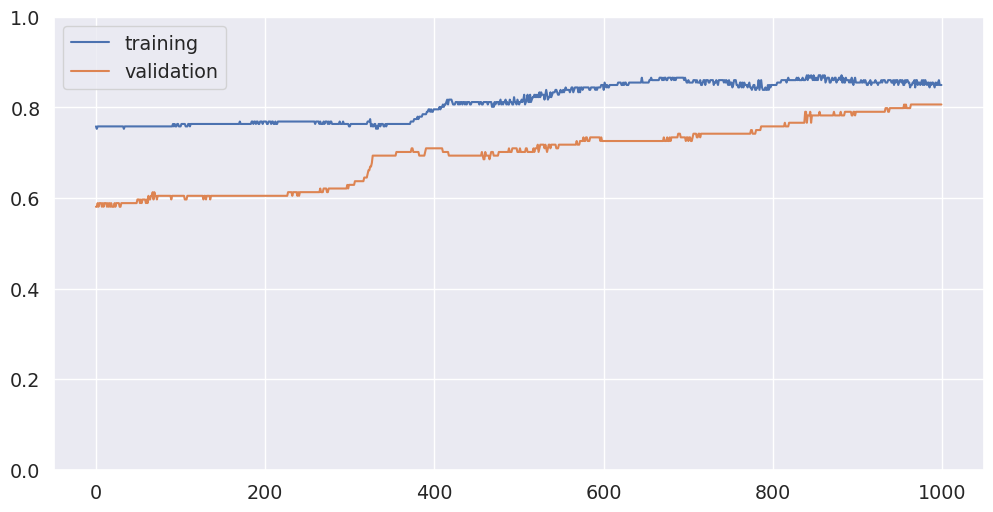

In [114]:
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
fig = plt.figure(figsize=(12, 6), dpi=100)
plt.plot(train_acc, label="training")
plt.plot(val_acc, label="validation")
plt.ylim(0, 1)
plt.legend()

Puedo ademas guardar el mejor modelo usando ModelCheckpoint

In [115]:
mc = ModelCheckpoint('mejor_modelo.h5', monitor='val_acc', mode='max')

In [116]:
model = Sequential()
model.add(Dense(16, input_shape=(6,), activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(8, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(4, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(num_classes, activation="softmax"))
opt = keras.optimizers.RMSprop(lr=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()
history = model.fit(
    X_train.values,
    y_train,
    epochs=1000,
    validation_data=(X_validation.values, y_test),
    callbacks=[custom_early_stopping, mc],
)

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 16)                112       
_________________________________________________________________
dense_49 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_50 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_51 (Dense)             (None, 2)                 10        
Total params: 294
Trainable params: 294
Non-trainable params: 0
_________________________________________________________________


Train on 186 samples, validate on 124 samples
Epoch 1/1000
 32/186 [====>.........................] - ETA: 0s - loss: 9.6889 - accuracy: 0.7500

186/186 [==============================] - 0s 683us/step - loss: 10.0860 - accuracy: 0.6720 - val_loss: 11.8245 - val_accuracy: 0.6371


Epoch 2/1000
 32/186 [====>.........................] - ETA: 0s - loss: 10.4465 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 9.5651 - accuracy: 0.6774 - val_loss: 11.3087 - val_accuracy: 0.6210


Epoch 3/1000
 32/186 [====>.........................] - ETA: 0s - loss: 8.9944 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 9.1898 - accuracy: 0.6774 - val_loss: 10.8796 - val_accuracy: 0.6210


Epoch 4/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.8539 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 8.8474 - accuracy: 0.6828 - val_loss: 10.4455 - val_accuracy: 0.6210


Epoch 5/1000
 32/186 [====>.........................] - ETA: 0s - loss: 7.6426 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 8.5038 - accuracy: 0.6882 - val_loss: 10.0162 - val_accuracy: 0.6210


Epoch 6/1000
 32/186 [====>.........................] - ETA: 0s - loss: 8.9943 - accuracy: 0.6875

186/186 [==============================] - 0s 51us/step - loss: 8.1725 - accuracy: 0.6882 - val_loss: 9.5867 - val_accuracy: 0.6210


Epoch 7/1000
 32/186 [====>.........................] - ETA: 0s - loss: 8.8416 - accuracy: 0.6250

186/186 [==============================] - 0s 56us/step - loss: 7.8364 - accuracy: 0.6882 - val_loss: 9.1536 - val_accuracy: 0.6129


Epoch 8/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.2689 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 7.4988 - accuracy: 0.6882 - val_loss: 8.7123 - val_accuracy: 0.6129


Epoch 9/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.4944 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 7.1754 - accuracy: 0.6828 - val_loss: 8.2942 - val_accuracy: 0.6129


/opt/hostedtoolcache/Python/3.7.9/x64/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 10/1000
 32/186 [====>.........................] - ETA: 0s - loss: 9.2204 - accuracy: 0.6562

186/186 [==============================] - 0s 59us/step - loss: 6.8690 - accuracy: 0.6667 - val_loss: 7.8765 - val_accuracy: 0.6048


Epoch 11/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.5084 - accuracy: 0.6250



186/186 [==============================] - 0s 58us/step - loss: 6.5740 - accuracy: 0.6613 - val_loss: 7.4705 - val_accuracy: 0.6048


Epoch 12/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.2281 - accuracy: 0.6875

186/186 [==============================] - 0s 61us/step - loss: 6.2790 - accuracy: 0.6613 - val_loss: 7.0343 - val_accuracy: 0.6048


Epoch 13/1000
 32/186 [====>.........................] - ETA: 0s - loss: 6.3527 - accuracy: 0.6250

186/186 [==============================] - 0s 57us/step - loss: 5.9818 - accuracy: 0.6613 - val_loss: 6.6325 - val_accuracy: 0.6048


Epoch 14/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.6137 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 5.7014 - accuracy: 0.6505 - val_loss: 6.2307 - val_accuracy: 0.6048


Epoch 15/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.4562 - accuracy: 0.6875

186/186 [==============================] - 0s 76us/step - loss: 5.4182 - accuracy: 0.6505 - val_loss: 5.8139 - val_accuracy: 0.6048


Epoch 16/1000


 32/186 [====>.........................] - ETA: 0s - loss: 5.7016 - accuracy: 0.6875

186/186 [==============================] - 0s 66us/step - loss: 5.1347 - accuracy: 0.6559 - val_loss: 5.4107 - val_accuracy: 0.6048


Epoch 17/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.1697 - accuracy: 0.7500

186/186 [==============================] - 0s 105us/step - loss: 4.8482 - accuracy: 0.6559 - val_loss: 4.9848 - val_accuracy: 0.6048


Epoch 18/1000
 32/186 [====>.........................] - ETA: 0s - loss: 5.0254 - accuracy: 0.6250



186/186 [==============================] - 0s 66us/step - loss: 4.5609 - accuracy: 0.6559 - val_loss: 4.5763 - val_accuracy: 0.6048


Epoch 19/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.8965 - accuracy: 0.7188

186/186 [==============================] - 0s 61us/step - loss: 4.2705 - accuracy: 0.6559 - val_loss: 4.1683 - val_accuracy: 0.6129


Epoch 20/1000
 32/186 [====>.........................] - ETA: 0s - loss: 4.3737 - accuracy: 0.5938



186/186 [==============================] - 0s 56us/step - loss: 3.9889 - accuracy: 0.6452 - val_loss: 3.7862 - val_accuracy: 0.6210


Epoch 21/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.5826 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 3.7123 - accuracy: 0.6452 - val_loss: 3.4017 - val_accuracy: 0.6371


Epoch 22/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.5063 - accuracy: 0.6562

186/186 [==============================] - 0s 52us/step - loss: 3.4403 - accuracy: 0.6398 - val_loss: 3.0550 - val_accuracy: 0.6371


Epoch 23/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.4879 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 3.1809 - accuracy: 0.6398 - val_loss: 2.7089 - val_accuracy: 0.6532


Epoch 24/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.6232 - accuracy: 0.5625

186/186 [==============================] - 0s 58us/step - loss: 2.9460 - accuracy: 0.6398 - val_loss: 2.4005 - val_accuracy: 0.6532


Epoch 25/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.5121 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 2.7363 - accuracy: 0.6720 - val_loss: 2.1499 - val_accuracy: 0.6694


Epoch 26/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.7617 - accuracy: 0.5938

186/186 [==============================] - 0s 56us/step - loss: 2.5709 - accuracy: 0.6882 - val_loss: 1.9404 - val_accuracy: 0.6613


Epoch 27/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.0418 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 2.4215 - accuracy: 0.6774 - val_loss: 1.7375 - val_accuracy: 0.6855


Epoch 28/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.5934 - accuracy: 0.5938



186/186 [==============================] - 0s 53us/step - loss: 2.2881 - accuracy: 0.6989 - val_loss: 1.5926 - val_accuracy: 0.7016


Epoch 29/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7036 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 2.1781 - accuracy: 0.7097 - val_loss: 1.4878 - val_accuracy: 0.7097


Epoch 30/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.4038 - accuracy: 0.6875

186/186 [==============================] - 0s 59us/step - loss: 2.0816 - accuracy: 0.7043 - val_loss: 1.4118 - val_accuracy: 0.7258


Epoch 31/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.5713 - accuracy: 0.6875

186/186 [==============================] - 0s 53us/step - loss: 2.0003 - accuracy: 0.7151 - val_loss: 1.3669 - val_accuracy: 0.7258


Epoch 32/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.6448 - accuracy: 0.6250

186/186 [==============================] - 0s 58us/step - loss: 1.9370 - accuracy: 0.7204 - val_loss: 1.3384 - val_accuracy: 0.7097


Epoch 33/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.3259 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 1.8793 - accuracy: 0.7204 - val_loss: 1.3178 - val_accuracy: 0.7016


Epoch 34/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1601 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 1.8280 - accuracy: 0.7258 - val_loss: 1.3035 - val_accuracy: 0.7097


Epoch 35/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.8478 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 1.7842 - accuracy: 0.7366 - val_loss: 1.2917 - val_accuracy: 0.7097


Epoch 36/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.0104 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 1.7511 - accuracy: 0.7419 - val_loss: 1.2779 - val_accuracy: 0.7097


Epoch 37/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.2488 - accuracy: 0.7188

186/186 [==============================] - 0s 57us/step - loss: 1.7117 - accuracy: 0.7419 - val_loss: 1.2671 - val_accuracy: 0.7097


Epoch 38/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9245 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 1.6800 - accuracy: 0.7473 - val_loss: 1.2603 - val_accuracy: 0.7097


Epoch 39/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.8054 - accuracy: 0.7500



186/186 [==============================] - 0s 57us/step - loss: 1.6532 - accuracy: 0.7527 - val_loss: 1.2555 - val_accuracy: 0.7016


Epoch 40/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.7852 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 1.6223 - accuracy: 0.7581 - val_loss: 1.2488 - val_accuracy: 0.7016


Epoch 41/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.5312 - accuracy: 0.7188



186/186 [==============================] - 0s 54us/step - loss: 1.5932 - accuracy: 0.7581 - val_loss: 1.2367 - val_accuracy: 0.6935


Epoch 42/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.7710 - accuracy: 0.6875

186/186 [==============================] - 0s 54us/step - loss: 1.5634 - accuracy: 0.7527 - val_loss: 1.2236 - val_accuracy: 0.6935


Epoch 43/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0709 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 1.5366 - accuracy: 0.7634 - val_loss: 1.2130 - val_accuracy: 0.6855


Epoch 44/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0653 - accuracy: 0.8125



186/186 [==============================] - 0s 51us/step - loss: 1.5093 - accuracy: 0.7688 - val_loss: 1.2043 - val_accuracy: 0.6855


Epoch 45/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.1803 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 1.4806 - accuracy: 0.7634 - val_loss: 1.1907 - val_accuracy: 0.6855


Epoch 46/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.2692 - accuracy: 0.6562

186/186 [==============================] - 0s 55us/step - loss: 1.4597 - accuracy: 0.7688 - val_loss: 1.1747 - val_accuracy: 0.6935


Epoch 47/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4311 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 1.4346 - accuracy: 0.7796 - val_loss: 1.1675 - val_accuracy: 0.6935


Epoch 48/1000
 32/186 [====>.........................] - ETA: 0s - loss: 3.0904 - accuracy: 0.6562

186/186 [==============================] - 0s 57us/step - loss: 1.4164 - accuracy: 0.7796 - val_loss: 1.1622 - val_accuracy: 0.7016


Epoch 49/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8658 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 1.3920 - accuracy: 0.7796 - val_loss: 1.1461 - val_accuracy: 0.7177


Epoch 50/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.2161 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 1.3773 - accuracy: 0.7796 - val_loss: 1.1429 - val_accuracy: 0.7097


Epoch 51/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.3940 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 1.3563 - accuracy: 0.7849 - val_loss: 1.1300 - val_accuracy: 0.7177


Epoch 52/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8057 - accuracy: 0.8438



186/186 [==============================] - 0s 53us/step - loss: 1.3302 - accuracy: 0.7796 - val_loss: 1.1130 - val_accuracy: 0.7177


Epoch 53/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0103 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 1.3111 - accuracy: 0.7849 - val_loss: 1.1012 - val_accuracy: 0.7177


Epoch 54/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0406 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 1.2967 - accuracy: 0.7742 - val_loss: 1.1059 - val_accuracy: 0.7177


Epoch 55/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.0541 - accuracy: 0.7188



186/186 [==============================] - 0s 58us/step - loss: 1.2760 - accuracy: 0.7849 - val_loss: 1.1024 - val_accuracy: 0.7177


Epoch 56/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8253 - accuracy: 0.6875

186/186 [==============================] - 0s 62us/step - loss: 1.2599 - accuracy: 0.7796 - val_loss: 1.0965 - val_accuracy: 0.7177


Epoch 57/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.4497 - accuracy: 0.6562

186/186 [==============================] - 0s 58us/step - loss: 1.2455 - accuracy: 0.7849 - val_loss: 1.0853 - val_accuracy: 0.7177


Epoch 58/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.2137 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 1.2272 - accuracy: 0.7849 - val_loss: 1.0781 - val_accuracy: 0.7097


Epoch 59/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.3981 - accuracy: 0.7500

186/186 [==============================] - 0s 52us/step - loss: 1.2131 - accuracy: 0.7849 - val_loss: 1.0900 - val_accuracy: 0.7177


Epoch 60/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.2500 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 1.2020 - accuracy: 0.7849 - val_loss: 1.0883 - val_accuracy: 0.7258


Epoch 61/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.3198 - accuracy: 0.7188

186/186 [==============================] - 0s 53us/step - loss: 1.1839 - accuracy: 0.7849 - val_loss: 1.0790 - val_accuracy: 0.7177


Epoch 62/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4876 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 1.1700 - accuracy: 0.7849 - val_loss: 1.0903 - val_accuracy: 0.7258


Epoch 63/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5605 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 1.1626 - accuracy: 0.7957 - val_loss: 1.0692 - val_accuracy: 0.7339


Epoch 64/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0214 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 1.1499 - accuracy: 0.7903 - val_loss: 1.0846 - val_accuracy: 0.7339


Epoch 65/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0909 - accuracy: 0.7812



186/186 [==============================] - 0s 57us/step - loss: 1.1370 - accuracy: 0.7849 - val_loss: 1.0924 - val_accuracy: 0.7339


Epoch 66/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0459 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 1.1230 - accuracy: 0.7957 - val_loss: 1.0752 - val_accuracy: 0.7339


Epoch 67/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9367 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 1.1121 - accuracy: 0.7903 - val_loss: 1.0792 - val_accuracy: 0.7339


Epoch 68/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3974 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 1.1011 - accuracy: 0.7957 - val_loss: 1.0834 - val_accuracy: 0.7339


Epoch 69/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3010 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 1.0970 - accuracy: 0.8011 - val_loss: 1.0750 - val_accuracy: 0.7339


Epoch 70/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7533 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 1.0834 - accuracy: 0.8011 - val_loss: 1.0636 - val_accuracy: 0.7419


Epoch 71/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9021 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 1.0774 - accuracy: 0.7903 - val_loss: 1.0684 - val_accuracy: 0.7419


Epoch 72/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2674 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 1.0637 - accuracy: 0.7957 - val_loss: 1.0697 - val_accuracy: 0.7419


Epoch 73/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8241 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 1.0554 - accuracy: 0.7903 - val_loss: 1.0720 - val_accuracy: 0.7339


Epoch 74/1000
 32/186 [====>.........................] - ETA: 0s - loss: 2.4391 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 1.0453 - accuracy: 0.8011 - val_loss: 1.0645 - val_accuracy: 0.7500


Epoch 75/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5969 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 1.0360 - accuracy: 0.8011 - val_loss: 1.0571 - val_accuracy: 0.7419


Epoch 76/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0769 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 1.0261 - accuracy: 0.8011 - val_loss: 1.0696 - val_accuracy: 0.7339


Epoch 77/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0010 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 1.0182 - accuracy: 0.7849 - val_loss: 1.0850 - val_accuracy: 0.7258


Epoch 78/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2578 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 1.0057 - accuracy: 0.8011 - val_loss: 1.0793 - val_accuracy: 0.7177


Epoch 79/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.3451 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.9969 - accuracy: 0.7957 - val_loss: 1.0902 - val_accuracy: 0.7339


Epoch 80/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.4862 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.9936 - accuracy: 0.8011 - val_loss: 1.0897 - val_accuracy: 0.7258


Epoch 81/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1748 - accuracy: 0.8750



186/186 [==============================] - 0s 56us/step - loss: 0.9833 - accuracy: 0.8011 - val_loss: 1.0761 - val_accuracy: 0.7177


Epoch 82/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9867 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.9820 - accuracy: 0.7903 - val_loss: 1.0916 - val_accuracy: 0.7258


Epoch 83/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6624 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.9688 - accuracy: 0.7957 - val_loss: 1.0866 - val_accuracy: 0.7258


Epoch 84/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7237 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.9601 - accuracy: 0.8011 - val_loss: 1.0916 - val_accuracy: 0.7258


Epoch 85/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2659 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.9519 - accuracy: 0.8065 - val_loss: 1.0851 - val_accuracy: 0.7258


Epoch 86/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8716 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.9461 - accuracy: 0.8065 - val_loss: 1.0838 - val_accuracy: 0.7258


Epoch 87/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7046 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.9486 - accuracy: 0.8011 - val_loss: 1.0970 - val_accuracy: 0.7339


Epoch 88/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0846 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.9367 - accuracy: 0.8011 - val_loss: 1.0994 - val_accuracy: 0.7339


Epoch 89/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.9022 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.9285 - accuracy: 0.8011 - val_loss: 1.0974 - val_accuracy: 0.7339


Epoch 90/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7468 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.9280 - accuracy: 0.8065 - val_loss: 1.0940 - val_accuracy: 0.7339


Epoch 91/1000


 32/186 [====>.........................] - ETA: 0s - loss: 1.3362 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.9207 - accuracy: 0.8172 - val_loss: 1.0815 - val_accuracy: 0.7419


Epoch 92/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0775 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.9094 - accuracy: 0.8011 - val_loss: 1.0908 - val_accuracy: 0.7339


Epoch 93/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2547 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.9080 - accuracy: 0.8011 - val_loss: 1.0964 - val_accuracy: 0.7339


Epoch 94/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9333 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.8963 - accuracy: 0.8118 - val_loss: 1.1031 - val_accuracy: 0.7339


Epoch 95/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.9135 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.9020 - accuracy: 0.8011 - val_loss: 1.1055 - val_accuracy: 0.7339


Epoch 96/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.4783 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.8849 - accuracy: 0.8065 - val_loss: 1.1042 - val_accuracy: 0.7339


Epoch 97/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0137 - accuracy: 0.7500

186/186 [==============================] - 0s 50us/step - loss: 0.8799 - accuracy: 0.8011 - val_loss: 1.1120 - val_accuracy: 0.7339


Epoch 98/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.5454 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.8744 - accuracy: 0.8118 - val_loss: 1.0926 - val_accuracy: 0.7419


Epoch 99/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0580 - accuracy: 0.6562

186/186 [==============================] - 0s 56us/step - loss: 0.8674 - accuracy: 0.8011 - val_loss: 1.1118 - val_accuracy: 0.7339


Epoch 100/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5850 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.8637 - accuracy: 0.8065 - val_loss: 1.1057 - val_accuracy: 0.7339


Epoch 101/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.6411 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.8615 - accuracy: 0.8065 - val_loss: 1.1078 - val_accuracy: 0.7339


Epoch 102/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4852 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.8504 - accuracy: 0.8065 - val_loss: 1.1178 - val_accuracy: 0.7339


Epoch 103/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1608 - accuracy: 0.7188

186/186 [==============================] - 0s 55us/step - loss: 0.8438 - accuracy: 0.8011 - val_loss: 1.1200 - val_accuracy: 0.7339


Epoch 104/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4951 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.8414 - accuracy: 0.8172 - val_loss: 1.0925 - val_accuracy: 0.7419


Epoch 105/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.2733 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.8337 - accuracy: 0.8118 - val_loss: 1.0796 - val_accuracy: 0.7500


Epoch 106/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0302 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.8366 - accuracy: 0.8011 - val_loss: 1.0891 - val_accuracy: 0.7419


Epoch 107/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7631 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.8303 - accuracy: 0.8011 - val_loss: 1.0882 - val_accuracy: 0.7500


Epoch 108/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8489 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.8195 - accuracy: 0.8065 - val_loss: 1.0955 - val_accuracy: 0.7419


Epoch 109/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2924 - accuracy: 0.8125

186/186 [==============================] - 0s 67us/step - loss: 0.8135 - accuracy: 0.8011 - val_loss: 1.0877 - val_accuracy: 0.7500


Epoch 110/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5425 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.8089 - accuracy: 0.8118 - val_loss: 1.1037 - val_accuracy: 0.7419


Epoch 111/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9425 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.8063 - accuracy: 0.8011 - val_loss: 1.1170 - val_accuracy: 0.7339


Epoch 112/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9016 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.8003 - accuracy: 0.8118 - val_loss: 1.1102 - val_accuracy: 0.7419


Epoch 113/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6485 - accuracy: 0.8750



186/186 [==============================] - 0s 83us/step - loss: 0.7941 - accuracy: 0.8065 - val_loss: 1.1172 - val_accuracy: 0.7339


Epoch 114/1000


 32/186 [====>.........................] - ETA: 0s - loss: 1.5566 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.7900 - accuracy: 0.8172 - val_loss: 1.1028 - val_accuracy: 0.7419


Epoch 115/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6260 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.7823 - accuracy: 0.8065 - val_loss: 1.1183 - val_accuracy: 0.7339


Epoch 116/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1850 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.7900 - accuracy: 0.8065 - val_loss: 1.1238 - val_accuracy: 0.7339


Epoch 117/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7532 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.7773 - accuracy: 0.8172 - val_loss: 1.1115 - val_accuracy: 0.7419


Epoch 118/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1960 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.7794 - accuracy: 0.8118 - val_loss: 1.1222 - val_accuracy: 0.7339


Epoch 119/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6999 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.7715 - accuracy: 0.8118 - val_loss: 1.1208 - val_accuracy: 0.7339


Epoch 120/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8272 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.7729 - accuracy: 0.8118 - val_loss: 1.1150 - val_accuracy: 0.7419


Epoch 121/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1732 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.7677 - accuracy: 0.8226 - val_loss: 1.1212 - val_accuracy: 0.7419


Epoch 122/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4451 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.7643 - accuracy: 0.8172 - val_loss: 1.1164 - val_accuracy: 0.7419


Epoch 123/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2839 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.7655 - accuracy: 0.8172 - val_loss: 1.1222 - val_accuracy: 0.7419


Epoch 124/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.4582 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.7555 - accuracy: 0.8280 - val_loss: 1.1235 - val_accuracy: 0.7419


Epoch 125/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.6167 - accuracy: 0.6875



186/186 [==============================] - 0s 57us/step - loss: 0.7552 - accuracy: 0.8280 - val_loss: 1.1360 - val_accuracy: 0.7258


Epoch 126/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0775 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.7504 - accuracy: 0.8280 - val_loss: 1.1108 - val_accuracy: 0.7419


Epoch 127/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6248 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.7512 - accuracy: 0.8280 - val_loss: 1.1058 - val_accuracy: 0.7419


Epoch 128/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5446 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.7480 - accuracy: 0.8280 - val_loss: 1.1225 - val_accuracy: 0.7419


Epoch 129/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.2646 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.7439 - accuracy: 0.8333 - val_loss: 1.1114 - val_accuracy: 0.7419


Epoch 130/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6293 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.7392 - accuracy: 0.8333 - val_loss: 1.0939 - val_accuracy: 0.7500


Epoch 131/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.2274 - accuracy: 0.7188

186/186 [==============================] - 0s 58us/step - loss: 0.7406 - accuracy: 0.8387 - val_loss: 1.1135 - val_accuracy: 0.7419


Epoch 132/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8402 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.7332 - accuracy: 0.8280 - val_loss: 1.0997 - val_accuracy: 0.7419


Epoch 133/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7076 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.7331 - accuracy: 0.8280 - val_loss: 1.1112 - val_accuracy: 0.7419


Epoch 134/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3312 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.7349 - accuracy: 0.8387 - val_loss: 1.1199 - val_accuracy: 0.7419


Epoch 135/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8429 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.7278 - accuracy: 0.8280 - val_loss: 1.1152 - val_accuracy: 0.7419


Epoch 136/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9861 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.7257 - accuracy: 0.8495 - val_loss: 1.1169 - val_accuracy: 0.7419


Epoch 137/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1085 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.7226 - accuracy: 0.8333 - val_loss: 1.1196 - val_accuracy: 0.7419


Epoch 138/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5181 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.7199 - accuracy: 0.8333 - val_loss: 1.1236 - val_accuracy: 0.7419


Epoch 139/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8086 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.7206 - accuracy: 0.8333 - val_loss: 1.1149 - val_accuracy: 0.7419


Epoch 140/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9045 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.7124 - accuracy: 0.8280 - val_loss: 1.1051 - val_accuracy: 0.7419


Epoch 141/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0021 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.7151 - accuracy: 0.8280 - val_loss: 1.0883 - val_accuracy: 0.7500


Epoch 142/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8324 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.7154 - accuracy: 0.8172 - val_loss: 1.1120 - val_accuracy: 0.7419


Epoch 143/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9131 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.7062 - accuracy: 0.8280 - val_loss: 1.1158 - val_accuracy: 0.7419


Epoch 144/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2952 - accuracy: 0.8750



186/186 [==============================] - 0s 57us/step - loss: 0.7047 - accuracy: 0.8387 - val_loss: 1.1050 - val_accuracy: 0.7419


Epoch 145/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4248 - accuracy: 0.8438



186/186 [==============================] - 0s 56us/step - loss: 0.7072 - accuracy: 0.8333 - val_loss: 1.1079 - val_accuracy: 0.7419


Epoch 146/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0211 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.7018 - accuracy: 0.8280 - val_loss: 1.1207 - val_accuracy: 0.7419


Epoch 147/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5912 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.6985 - accuracy: 0.8441 - val_loss: 1.1002 - val_accuracy: 0.7419


Epoch 148/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0247 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.6958 - accuracy: 0.8280 - val_loss: 1.1006 - val_accuracy: 0.7419


Epoch 149/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1628 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.7025 - accuracy: 0.8226 - val_loss: 1.1161 - val_accuracy: 0.7419


Epoch 150/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1945 - accuracy: 0.7812

186/186 [==============================] - 0s 64us/step - loss: 0.6919 - accuracy: 0.8387 - val_loss: 1.0918 - val_accuracy: 0.7500


Epoch 151/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4037 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.6948 - accuracy: 0.8333 - val_loss: 1.0957 - val_accuracy: 0.7419


Epoch 152/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5042 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.6893 - accuracy: 0.8280 - val_loss: 1.1089 - val_accuracy: 0.7419


Epoch 153/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4463 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.6861 - accuracy: 0.8333 - val_loss: 1.0933 - val_accuracy: 0.7419


Epoch 154/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5006 - accuracy: 0.8125



186/186 [==============================] - 0s 58us/step - loss: 0.6846 - accuracy: 0.8280 - val_loss: 1.1046 - val_accuracy: 0.7419


Epoch 155/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8443 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.6796 - accuracy: 0.8387 - val_loss: 1.0869 - val_accuracy: 0.7500


Epoch 156/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2029 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.6818 - accuracy: 0.8280 - val_loss: 1.0966 - val_accuracy: 0.7419


Epoch 157/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5405 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.6797 - accuracy: 0.8280 - val_loss: 1.0867 - val_accuracy: 0.7419


Epoch 158/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6958 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.6747 - accuracy: 0.8280 - val_loss: 1.1000 - val_accuracy: 0.7419


Epoch 159/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9351 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.6827 - accuracy: 0.8280 - val_loss: 1.0856 - val_accuracy: 0.7419


Epoch 160/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1560 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.6707 - accuracy: 0.8333 - val_loss: 1.0881 - val_accuracy: 0.7419


Epoch 161/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6728 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.6691 - accuracy: 0.8333 - val_loss: 1.1032 - val_accuracy: 0.7339


Epoch 162/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2244 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.6723 - accuracy: 0.8280 - val_loss: 1.0739 - val_accuracy: 0.7500


Epoch 163/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9299 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.6667 - accuracy: 0.8333 - val_loss: 1.0858 - val_accuracy: 0.7419


Epoch 164/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3842 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.6632 - accuracy: 0.8280 - val_loss: 1.0838 - val_accuracy: 0.7419


Epoch 165/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.3558 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.6637 - accuracy: 0.8226 - val_loss: 1.0559 - val_accuracy: 0.7419


Epoch 166/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5952 - accuracy: 0.9375



186/186 [==============================] - 0s 52us/step - loss: 0.6580 - accuracy: 0.8333 - val_loss: 1.0921 - val_accuracy: 0.7419


Epoch 167/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7905 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.6579 - accuracy: 0.8333 - val_loss: 1.0908 - val_accuracy: 0.7419


Epoch 168/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3826 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.6571 - accuracy: 0.8280 - val_loss: 1.0721 - val_accuracy: 0.7419


Epoch 169/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8997 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.6538 - accuracy: 0.8280 - val_loss: 1.0665 - val_accuracy: 0.7500


Epoch 170/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5549 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.6566 - accuracy: 0.8280 - val_loss: 1.0542 - val_accuracy: 0.7419


Epoch 171/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3446 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.6477 - accuracy: 0.8333 - val_loss: 1.0535 - val_accuracy: 0.7419


Epoch 172/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2958 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.6498 - accuracy: 0.8333 - val_loss: 1.0520 - val_accuracy: 0.7419


Epoch 173/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2900 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.6459 - accuracy: 0.8333 - val_loss: 1.0597 - val_accuracy: 0.7500


Epoch 174/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9723 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.6426 - accuracy: 0.8387 - val_loss: 1.0617 - val_accuracy: 0.7419


Epoch 175/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5570 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.6398 - accuracy: 0.8387 - val_loss: 1.0451 - val_accuracy: 0.7419


Epoch 176/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3181 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.6391 - accuracy: 0.8387 - val_loss: 1.0181 - val_accuracy: 0.7419


Epoch 177/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4085 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.6396 - accuracy: 0.8333 - val_loss: 1.0295 - val_accuracy: 0.7419


Epoch 178/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6023 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.6394 - accuracy: 0.8333 - val_loss: 1.0377 - val_accuracy: 0.7419


Epoch 179/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9161 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.6312 - accuracy: 0.8333 - val_loss: 1.0288 - val_accuracy: 0.7419


Epoch 180/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6003 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.6324 - accuracy: 0.8226 - val_loss: 1.0224 - val_accuracy: 0.7419


Epoch 181/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5692 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.6266 - accuracy: 0.8333 - val_loss: 1.0425 - val_accuracy: 0.7500


Epoch 182/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0508 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.6261 - accuracy: 0.8226 - val_loss: 1.0334 - val_accuracy: 0.7419


Epoch 183/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5089 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.6259 - accuracy: 0.8226 - val_loss: 1.0397 - val_accuracy: 0.7500


Epoch 184/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6250 - accuracy: 0.8750

186/186 [==============================] - 0s 65us/step - loss: 0.6241 - accuracy: 0.8333 - val_loss: 1.0473 - val_accuracy: 0.7419


Epoch 185/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5195 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.6260 - accuracy: 0.8280 - val_loss: 1.0333 - val_accuracy: 0.7500


Epoch 186/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6104 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.6196 - accuracy: 0.8387 - val_loss: 1.0533 - val_accuracy: 0.7419


Epoch 187/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5011 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.6154 - accuracy: 0.8333 - val_loss: 1.0248 - val_accuracy: 0.7500


Epoch 188/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5802 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.6162 - accuracy: 0.8333 - val_loss: 1.0169 - val_accuracy: 0.7419


Epoch 189/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3266 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.6139 - accuracy: 0.8226 - val_loss: 1.0154 - val_accuracy: 0.7419


Epoch 190/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3736 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.6104 - accuracy: 0.8333 - val_loss: 1.0181 - val_accuracy: 0.7500


Epoch 191/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1828 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.6127 - accuracy: 0.8280 - val_loss: 0.9980 - val_accuracy: 0.7419


Epoch 192/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5566 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.6101 - accuracy: 0.8333 - val_loss: 1.0058 - val_accuracy: 0.7419


Epoch 193/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7303 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.6048 - accuracy: 0.8333 - val_loss: 1.0240 - val_accuracy: 0.7500


Epoch 194/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7728 - accuracy: 0.7812

186/186 [==============================] - 0s 64us/step - loss: 0.6065 - accuracy: 0.8280 - val_loss: 1.0257 - val_accuracy: 0.7500


Epoch 195/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7165 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.6050 - accuracy: 0.8118 - val_loss: 1.0178 - val_accuracy: 0.7500


Epoch 196/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5031 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.6044 - accuracy: 0.8333 - val_loss: 0.9933 - val_accuracy: 0.7419


Epoch 197/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2598 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.6006 - accuracy: 0.8333 - val_loss: 1.0012 - val_accuracy: 0.7419


Epoch 198/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4554 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.6000 - accuracy: 0.8333 - val_loss: 0.9954 - val_accuracy: 0.7419


Epoch 199/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6846 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.5963 - accuracy: 0.8226 - val_loss: 0.9955 - val_accuracy: 0.7500


Epoch 200/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.3301 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.5995 - accuracy: 0.8333 - val_loss: 1.0028 - val_accuracy: 0.7500


Epoch 201/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2265 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.5948 - accuracy: 0.8333 - val_loss: 1.0065 - val_accuracy: 0.7500


Epoch 202/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8930 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.5936 - accuracy: 0.8280 - val_loss: 0.9822 - val_accuracy: 0.7419


Epoch 203/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7353 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.5945 - accuracy: 0.8226 - val_loss: 0.9863 - val_accuracy: 0.7500


Epoch 204/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6754 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.5919 - accuracy: 0.8333 - val_loss: 0.9744 - val_accuracy: 0.7419


Epoch 205/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2813 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.5903 - accuracy: 0.8172 - val_loss: 0.9715 - val_accuracy: 0.7419


Epoch 206/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3245 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.5879 - accuracy: 0.8387 - val_loss: 0.9904 - val_accuracy: 0.7500


Epoch 207/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7967 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.5880 - accuracy: 0.8280 - val_loss: 0.9982 - val_accuracy: 0.7500


Epoch 208/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6006 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.5832 - accuracy: 0.8280 - val_loss: 0.9807 - val_accuracy: 0.7500


Epoch 209/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1957 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.5810 - accuracy: 0.8333 - val_loss: 0.9699 - val_accuracy: 0.7419


Epoch 210/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7094 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.5808 - accuracy: 0.8172 - val_loss: 0.9821 - val_accuracy: 0.7500


Epoch 211/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.1791 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.5794 - accuracy: 0.8387 - val_loss: 0.9952 - val_accuracy: 0.7500


Epoch 212/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0609 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.5805 - accuracy: 0.8280 - val_loss: 0.9923 - val_accuracy: 0.7500


Epoch 213/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4100 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.5783 - accuracy: 0.8333 - val_loss: 0.9876 - val_accuracy: 0.7500


Epoch 214/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9976 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.5801 - accuracy: 0.8226 - val_loss: 0.9705 - val_accuracy: 0.7500


Epoch 215/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2186 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.5729 - accuracy: 0.8441 - val_loss: 0.9457 - val_accuracy: 0.7419


Epoch 216/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3882 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.5770 - accuracy: 0.8333 - val_loss: 0.9488 - val_accuracy: 0.7419


Epoch 217/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9570 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.5739 - accuracy: 0.8280 - val_loss: 0.9450 - val_accuracy: 0.7419


Epoch 218/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3288 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.5715 - accuracy: 0.8280 - val_loss: 0.9583 - val_accuracy: 0.7500


Epoch 219/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3319 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.5665 - accuracy: 0.8280 - val_loss: 0.9686 - val_accuracy: 0.7500


Epoch 220/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7936 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.5692 - accuracy: 0.8226 - val_loss: 0.9725 - val_accuracy: 0.7500


Epoch 221/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6098 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.5712 - accuracy: 0.8333 - val_loss: 0.9504 - val_accuracy: 0.7500


Epoch 222/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6824 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.5636 - accuracy: 0.8333 - val_loss: 0.9391 - val_accuracy: 0.7419


Epoch 223/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7838 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.5626 - accuracy: 0.8280 - val_loss: 0.9294 - val_accuracy: 0.7419


Epoch 224/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3470 - accuracy: 0.9688

186/186 [==============================] - 0s 54us/step - loss: 0.5599 - accuracy: 0.8280 - val_loss: 0.9506 - val_accuracy: 0.7500


Epoch 225/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4071 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.5634 - accuracy: 0.8387 - val_loss: 0.9372 - val_accuracy: 0.7500


Epoch 226/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1557 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.5623 - accuracy: 0.8280 - val_loss: 0.9244 - val_accuracy: 0.7419


Epoch 227/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2229 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.5631 - accuracy: 0.8333 - val_loss: 0.9213 - val_accuracy: 0.7419


Epoch 228/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9618 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.5560 - accuracy: 0.8280 - val_loss: 0.9192 - val_accuracy: 0.7419


Epoch 229/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2317 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.5534 - accuracy: 0.8333 - val_loss: 0.9261 - val_accuracy: 0.7500


Epoch 230/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5466 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.5547 - accuracy: 0.8280 - val_loss: 0.9549 - val_accuracy: 0.7500


Epoch 231/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4145 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.5549 - accuracy: 0.8548 - val_loss: 0.9316 - val_accuracy: 0.7500


Epoch 232/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5568 - accuracy: 0.8438

186/186 [==============================] - 0s 62us/step - loss: 0.5567 - accuracy: 0.8280 - val_loss: 0.9193 - val_accuracy: 0.7500


Epoch 233/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5964 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.5488 - accuracy: 0.8333 - val_loss: 0.9271 - val_accuracy: 0.7500


Epoch 234/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6085 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.5490 - accuracy: 0.8172 - val_loss: 0.9290 - val_accuracy: 0.7500


Epoch 235/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4301 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.5467 - accuracy: 0.8387 - val_loss: 0.9102 - val_accuracy: 0.7500


Epoch 236/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7007 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.5510 - accuracy: 0.8280 - val_loss: 0.9112 - val_accuracy: 0.7500


Epoch 237/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7804 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.5444 - accuracy: 0.8280 - val_loss: 0.9081 - val_accuracy: 0.7500


Epoch 238/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5258 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.5443 - accuracy: 0.8172 - val_loss: 0.9170 - val_accuracy: 0.7500


Epoch 239/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1385 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.5435 - accuracy: 0.8333 - val_loss: 0.8987 - val_accuracy: 0.7500


Epoch 240/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5400 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.5420 - accuracy: 0.8333 - val_loss: 0.8874 - val_accuracy: 0.7500


Epoch 241/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5964 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.5397 - accuracy: 0.8280 - val_loss: 0.9075 - val_accuracy: 0.7500


Epoch 242/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5674 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.5372 - accuracy: 0.8333 - val_loss: 0.8885 - val_accuracy: 0.7500


Epoch 243/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6898 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.5381 - accuracy: 0.8333 - val_loss: 0.8730 - val_accuracy: 0.7500


Epoch 244/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3948 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.5405 - accuracy: 0.8333 - val_loss: 0.8693 - val_accuracy: 0.7500


Epoch 245/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6802 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.5333 - accuracy: 0.8280 - val_loss: 0.9005 - val_accuracy: 0.7500


Epoch 246/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3420 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.5320 - accuracy: 0.8280 - val_loss: 0.8915 - val_accuracy: 0.7500


Epoch 247/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.8121 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.5325 - accuracy: 0.8441 - val_loss: 0.8821 - val_accuracy: 0.7500


Epoch 248/1000


 32/186 [====>.........................] - ETA: 0s - loss: 1.0380 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.5417 - accuracy: 0.8441 - val_loss: 0.8801 - val_accuracy: 0.7500


Epoch 249/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3307 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.5290 - accuracy: 0.8333 - val_loss: 0.8757 - val_accuracy: 0.7581


Epoch 250/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5625 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.5312 - accuracy: 0.8280 - val_loss: 0.8785 - val_accuracy: 0.7500


Epoch 251/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2073 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.5257 - accuracy: 0.8387 - val_loss: 0.8736 - val_accuracy: 0.7581


Epoch 252/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3256 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.5297 - accuracy: 0.8387 - val_loss: 0.8697 - val_accuracy: 0.7581


Epoch 253/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3965 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.5269 - accuracy: 0.8226 - val_loss: 0.8881 - val_accuracy: 0.7500


Epoch 254/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2058 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.5244 - accuracy: 0.8387 - val_loss: 0.8704 - val_accuracy: 0.7581


Epoch 255/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9747 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.5224 - accuracy: 0.8387 - val_loss: 0.8521 - val_accuracy: 0.7500


Epoch 256/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8311 - accuracy: 0.8438



186/186 [==============================] - 0s 58us/step - loss: 0.5216 - accuracy: 0.8333 - val_loss: 0.8729 - val_accuracy: 0.7500


Epoch 257/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2802 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.5184 - accuracy: 0.8387 - val_loss: 0.8529 - val_accuracy: 0.7500


Epoch 258/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3754 - accuracy: 0.8750



186/186 [==============================] - 0s 54us/step - loss: 0.5238 - accuracy: 0.8333 - val_loss: 0.8475 - val_accuracy: 0.7500


Epoch 259/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8085 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.5237 - accuracy: 0.8280 - val_loss: 0.8548 - val_accuracy: 0.7581


Epoch 260/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6287 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.5199 - accuracy: 0.8441 - val_loss: 0.8464 - val_accuracy: 0.7581


Epoch 261/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5947 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.5156 - accuracy: 0.8280 - val_loss: 0.8655 - val_accuracy: 0.7500


Epoch 262/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8264 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.5182 - accuracy: 0.8495 - val_loss: 0.8493 - val_accuracy: 0.7581


Epoch 263/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5322 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.5117 - accuracy: 0.8495 - val_loss: 0.8307 - val_accuracy: 0.7500


Epoch 264/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1487 - accuracy: 0.9688

186/186 [==============================] - 0s 60us/step - loss: 0.5108 - accuracy: 0.8280 - val_loss: 0.8546 - val_accuracy: 0.7581


Epoch 265/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8008 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.5092 - accuracy: 0.8441 - val_loss: 0.8415 - val_accuracy: 0.7581


Epoch 266/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.8898 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.5144 - accuracy: 0.8495 - val_loss: 0.8291 - val_accuracy: 0.7500


Epoch 267/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3238 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.5089 - accuracy: 0.8333 - val_loss: 0.8360 - val_accuracy: 0.7500


Epoch 268/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3870 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.5064 - accuracy: 0.8387 - val_loss: 0.8359 - val_accuracy: 0.7581


Epoch 269/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4903 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.5146 - accuracy: 0.8226 - val_loss: 0.8510 - val_accuracy: 0.7581


Epoch 270/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3469 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.5052 - accuracy: 0.8441 - val_loss: 0.8365 - val_accuracy: 0.7581


Epoch 271/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4268 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.5047 - accuracy: 0.8441 - val_loss: 0.8404 - val_accuracy: 0.7581


Epoch 272/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7864 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.5018 - accuracy: 0.8495 - val_loss: 0.8181 - val_accuracy: 0.7500


Epoch 273/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3288 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.5020 - accuracy: 0.8333 - val_loss: 0.8180 - val_accuracy: 0.7500


Epoch 274/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6411 - accuracy: 0.8750



186/186 [==============================] - 0s 59us/step - loss: 0.4993 - accuracy: 0.8333 - val_loss: 0.8174 - val_accuracy: 0.7500


Epoch 275/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3283 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.5011 - accuracy: 0.8226 - val_loss: 0.8203 - val_accuracy: 0.7581


Epoch 276/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3983 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.4979 - accuracy: 0.8387 - val_loss: 0.8184 - val_accuracy: 0.7581


Epoch 277/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6301 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.4983 - accuracy: 0.8387 - val_loss: 0.8209 - val_accuracy: 0.7581


Epoch 278/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8730 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.4992 - accuracy: 0.8387 - val_loss: 0.8224 - val_accuracy: 0.7581


Epoch 279/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5867 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.4936 - accuracy: 0.8333 - val_loss: 0.8323 - val_accuracy: 0.7581


Epoch 280/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2146 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.4933 - accuracy: 0.8441 - val_loss: 0.8395 - val_accuracy: 0.7581


Epoch 281/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5738 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.4974 - accuracy: 0.8495 - val_loss: 0.8085 - val_accuracy: 0.7581


Epoch 282/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3078 - accuracy: 0.9062



186/186 [==============================] - 0s 51us/step - loss: 0.4892 - accuracy: 0.8441 - val_loss: 0.8153 - val_accuracy: 0.7581


Epoch 283/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3725 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.4866 - accuracy: 0.8495 - val_loss: 0.8128 - val_accuracy: 0.7581


Epoch 284/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5952 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.4884 - accuracy: 0.8548 - val_loss: 0.7928 - val_accuracy: 0.7500


Epoch 285/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2610 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.4858 - accuracy: 0.8441 - val_loss: 0.7898 - val_accuracy: 0.7500


Epoch 286/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7181 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.4890 - accuracy: 0.8495 - val_loss: 0.7915 - val_accuracy: 0.7500


Epoch 287/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2372 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.4883 - accuracy: 0.8441 - val_loss: 0.7884 - val_accuracy: 0.7500


Epoch 288/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3453 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.4836 - accuracy: 0.8495 - val_loss: 0.7813 - val_accuracy: 0.7500


Epoch 289/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9673 - accuracy: 0.7500

186/186 [==============================] - 0s 55us/step - loss: 0.4823 - accuracy: 0.8495 - val_loss: 0.7765 - val_accuracy: 0.7500


Epoch 290/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3677 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.4819 - accuracy: 0.8441 - val_loss: 0.7686 - val_accuracy: 0.7500


Epoch 291/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.8494 - accuracy: 0.6875

186/186 [==============================] - 0s 58us/step - loss: 0.4809 - accuracy: 0.8387 - val_loss: 0.7751 - val_accuracy: 0.7500


Epoch 292/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2896 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.4782 - accuracy: 0.8441 - val_loss: 0.7776 - val_accuracy: 0.7500


Epoch 293/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5059 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.4754 - accuracy: 0.8495 - val_loss: 0.7607 - val_accuracy: 0.7500


Epoch 294/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1826 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.4764 - accuracy: 0.8387 - val_loss: 0.7763 - val_accuracy: 0.7500


Epoch 295/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2453 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.4781 - accuracy: 0.8495 - val_loss: 0.7615 - val_accuracy: 0.7500


Epoch 296/1000
 32/186 [====>.........................] - ETA: 0s - loss: 1.0614 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.4766 - accuracy: 0.8441 - val_loss: 0.7588 - val_accuracy: 0.7500


Epoch 297/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7028 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.4772 - accuracy: 0.8387 - val_loss: 0.7615 - val_accuracy: 0.7500


Epoch 298/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3646 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.4707 - accuracy: 0.8548 - val_loss: 0.7507 - val_accuracy: 0.7581


Epoch 299/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2391 - accuracy: 0.8438

186/186 [==============================] - 0s 80us/step - loss: 0.4700 - accuracy: 0.8172 - val_loss: 0.7712 - val_accuracy: 0.7500


Epoch 300/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5273 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.4672 - accuracy: 0.8441 - val_loss: 0.7839 - val_accuracy: 0.7581


Epoch 301/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3456 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.4731 - accuracy: 0.8495 - val_loss: 0.7550 - val_accuracy: 0.7500


Epoch 302/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3392 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.4668 - accuracy: 0.8548 - val_loss: 0.7630 - val_accuracy: 0.7500


Epoch 303/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2225 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.4721 - accuracy: 0.8441 - val_loss: 0.7506 - val_accuracy: 0.7500


Epoch 304/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6945 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.4648 - accuracy: 0.8441 - val_loss: 0.7500 - val_accuracy: 0.7500


Epoch 305/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2752 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.4653 - accuracy: 0.8495 - val_loss: 0.7511 - val_accuracy: 0.7500


Epoch 306/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4399 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.4623 - accuracy: 0.8495 - val_loss: 0.7779 - val_accuracy: 0.7581


Epoch 307/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3204 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.4649 - accuracy: 0.8441 - val_loss: 0.7604 - val_accuracy: 0.7581


Epoch 308/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4707 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.4615 - accuracy: 0.8495 - val_loss: 0.7587 - val_accuracy: 0.7581


Epoch 309/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3745 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.4586 - accuracy: 0.8602 - val_loss: 0.7513 - val_accuracy: 0.7581


Epoch 310/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3965 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.4619 - accuracy: 0.8548 - val_loss: 0.7467 - val_accuracy: 0.7419


Epoch 311/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3379 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.4579 - accuracy: 0.8495 - val_loss: 0.7397 - val_accuracy: 0.7419


Epoch 312/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5764 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.4552 - accuracy: 0.8548 - val_loss: 0.7247 - val_accuracy: 0.7581


Epoch 313/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5291 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.4578 - accuracy: 0.8548 - val_loss: 0.7248 - val_accuracy: 0.7581


Epoch 314/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5180 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.4539 - accuracy: 0.8333 - val_loss: 0.7389 - val_accuracy: 0.7500


Epoch 315/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3171 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.4541 - accuracy: 0.8441 - val_loss: 0.7530 - val_accuracy: 0.7581


Epoch 316/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2934 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.4525 - accuracy: 0.8656 - val_loss: 0.7291 - val_accuracy: 0.7500


Epoch 317/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.9124 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.4516 - accuracy: 0.8495 - val_loss: 0.7370 - val_accuracy: 0.7581


Epoch 318/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2630 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.4483 - accuracy: 0.8441 - val_loss: 0.7365 - val_accuracy: 0.7581


Epoch 319/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3645 - accuracy: 0.9062

186/186 [==============================] - 0s 64us/step - loss: 0.4500 - accuracy: 0.8441 - val_loss: 0.7459 - val_accuracy: 0.7581


Epoch 320/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5724 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.4486 - accuracy: 0.8495 - val_loss: 0.7279 - val_accuracy: 0.7500


Epoch 321/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2167 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.4470 - accuracy: 0.8548 - val_loss: 0.7346 - val_accuracy: 0.7581


Epoch 322/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2643 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.4459 - accuracy: 0.8548 - val_loss: 0.7273 - val_accuracy: 0.7581


Epoch 323/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3126 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.4446 - accuracy: 0.8387 - val_loss: 0.7202 - val_accuracy: 0.7581


Epoch 324/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7150 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.4462 - accuracy: 0.8495 - val_loss: 0.7064 - val_accuracy: 0.7500


Epoch 325/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4061 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.4416 - accuracy: 0.8441 - val_loss: 0.7159 - val_accuracy: 0.7581


Epoch 326/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4640 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.4434 - accuracy: 0.8495 - val_loss: 0.7206 - val_accuracy: 0.7581


Epoch 327/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6276 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.4385 - accuracy: 0.8548 - val_loss: 0.7327 - val_accuracy: 0.7581


Epoch 328/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1725 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.4395 - accuracy: 0.8602 - val_loss: 0.7119 - val_accuracy: 0.7581


Epoch 329/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7405 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.4361 - accuracy: 0.8602 - val_loss: 0.6963 - val_accuracy: 0.7500


Epoch 330/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5773 - accuracy: 0.7812



186/186 [==============================] - 0s 55us/step - loss: 0.4380 - accuracy: 0.8441 - val_loss: 0.7102 - val_accuracy: 0.7581


Epoch 331/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3129 - accuracy: 0.8750



186/186 [==============================] - 0s 52us/step - loss: 0.4389 - accuracy: 0.8441 - val_loss: 0.7063 - val_accuracy: 0.7581


Epoch 332/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2754 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.4328 - accuracy: 0.8495 - val_loss: 0.7102 - val_accuracy: 0.7661


Epoch 333/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1504 - accuracy: 0.9375



186/186 [==============================] - 0s 55us/step - loss: 0.4337 - accuracy: 0.8602 - val_loss: 0.6905 - val_accuracy: 0.7500


Epoch 334/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5574 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.4302 - accuracy: 0.8548 - val_loss: 0.7134 - val_accuracy: 0.7581


Epoch 335/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4269 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.4351 - accuracy: 0.8548 - val_loss: 0.7056 - val_accuracy: 0.7661


Epoch 336/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4456 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.4291 - accuracy: 0.8656 - val_loss: 0.6816 - val_accuracy: 0.7500


Epoch 337/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6044 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.4335 - accuracy: 0.8495 - val_loss: 0.6903 - val_accuracy: 0.7581


Epoch 338/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.7193 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.4298 - accuracy: 0.8280 - val_loss: 0.6988 - val_accuracy: 0.7581


Epoch 339/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4426 - accuracy: 0.7812

186/186 [==============================] - 0s 70us/step - loss: 0.4282 - accuracy: 0.8548 - val_loss: 0.7006 - val_accuracy: 0.7661


Epoch 340/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2831 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.4246 - accuracy: 0.8656 - val_loss: 0.6920 - val_accuracy: 0.7581


Epoch 341/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1427 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.4328 - accuracy: 0.8548 - val_loss: 0.6804 - val_accuracy: 0.7581


Epoch 342/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2943 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.4247 - accuracy: 0.8548 - val_loss: 0.6790 - val_accuracy: 0.7581


Epoch 343/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2552 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.4253 - accuracy: 0.8387 - val_loss: 0.6792 - val_accuracy: 0.7581


Epoch 344/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1672 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.4238 - accuracy: 0.8495 - val_loss: 0.6868 - val_accuracy: 0.7581


Epoch 345/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3998 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.4230 - accuracy: 0.8548 - val_loss: 0.6715 - val_accuracy: 0.7581


Epoch 346/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5573 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.4235 - accuracy: 0.8602 - val_loss: 0.6638 - val_accuracy: 0.7500


Epoch 347/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1565 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.4214 - accuracy: 0.8441 - val_loss: 0.6676 - val_accuracy: 0.7581


Epoch 348/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3071 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.4194 - accuracy: 0.8441 - val_loss: 0.6813 - val_accuracy: 0.7581


Epoch 349/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4207 - accuracy: 0.9062



186/186 [==============================] - 0s 57us/step - loss: 0.4212 - accuracy: 0.8710 - val_loss: 0.6857 - val_accuracy: 0.7661


Epoch 350/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3882 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.4159 - accuracy: 0.8656 - val_loss: 0.6855 - val_accuracy: 0.7661


Epoch 351/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.7741 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.4193 - accuracy: 0.8441 - val_loss: 0.6766 - val_accuracy: 0.7581


Epoch 352/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2813 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.4161 - accuracy: 0.8387 - val_loss: 0.6680 - val_accuracy: 0.7581


Epoch 353/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5256 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.4146 - accuracy: 0.8710 - val_loss: 0.6750 - val_accuracy: 0.7581


Epoch 354/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6366 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.4139 - accuracy: 0.8548 - val_loss: 0.6618 - val_accuracy: 0.7581


Epoch 355/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3707 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.4159 - accuracy: 0.8495 - val_loss: 0.6699 - val_accuracy: 0.7581


Epoch 356/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3718 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.4120 - accuracy: 0.8710 - val_loss: 0.6490 - val_accuracy: 0.7500


Epoch 357/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3287 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.4122 - accuracy: 0.8495 - val_loss: 0.6569 - val_accuracy: 0.7581


Epoch 358/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.6988 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.4113 - accuracy: 0.8548 - val_loss: 0.6595 - val_accuracy: 0.7581


Epoch 359/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4840 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.4089 - accuracy: 0.8548 - val_loss: 0.6517 - val_accuracy: 0.7581


Epoch 360/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6090 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.4088 - accuracy: 0.8602 - val_loss: 0.6465 - val_accuracy: 0.7581


Epoch 361/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3279 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.4084 - accuracy: 0.8495 - val_loss: 0.6417 - val_accuracy: 0.7581


Epoch 362/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5477 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.4080 - accuracy: 0.8548 - val_loss: 0.6312 - val_accuracy: 0.7500


Epoch 363/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2220 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.4073 - accuracy: 0.8656 - val_loss: 0.6510 - val_accuracy: 0.7581


Epoch 364/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6279 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.4058 - accuracy: 0.8602 - val_loss: 0.6323 - val_accuracy: 0.7500


Epoch 365/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2261 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.4025 - accuracy: 0.8441 - val_loss: 0.6589 - val_accuracy: 0.7661


Epoch 366/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4404 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.4069 - accuracy: 0.8495 - val_loss: 0.6480 - val_accuracy: 0.7581


Epoch 367/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2639 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3998 - accuracy: 0.8548 - val_loss: 0.6464 - val_accuracy: 0.7581


Epoch 368/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2140 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.4035 - accuracy: 0.8441 - val_loss: 0.6482 - val_accuracy: 0.7581


Epoch 369/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3796 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3981 - accuracy: 0.8602 - val_loss: 0.6439 - val_accuracy: 0.7581


Epoch 370/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6485 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.4021 - accuracy: 0.8548 - val_loss: 0.6249 - val_accuracy: 0.7500


Epoch 371/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1104 - accuracy: 0.9688

186/186 [==============================] - 0s 53us/step - loss: 0.3967 - accuracy: 0.8548 - val_loss: 0.6355 - val_accuracy: 0.7581


Epoch 372/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5301 - accuracy: 0.8438



186/186 [==============================] - 0s 53us/step - loss: 0.3995 - accuracy: 0.8710 - val_loss: 0.6390 - val_accuracy: 0.7581


Epoch 373/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1087 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.4013 - accuracy: 0.8495 - val_loss: 0.6377 - val_accuracy: 0.7581


Epoch 374/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3179 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3963 - accuracy: 0.8602 - val_loss: 0.6306 - val_accuracy: 0.7581


Epoch 375/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3925 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3996 - accuracy: 0.8602 - val_loss: 0.6288 - val_accuracy: 0.7581


Epoch 376/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2008 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3922 - accuracy: 0.8495 - val_loss: 0.6273 - val_accuracy: 0.7581


Epoch 377/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2509 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3919 - accuracy: 0.8548 - val_loss: 0.6404 - val_accuracy: 0.7581


Epoch 378/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3633 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3915 - accuracy: 0.8656 - val_loss: 0.6293 - val_accuracy: 0.7581


Epoch 379/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3185 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3899 - accuracy: 0.8656 - val_loss: 0.6255 - val_accuracy: 0.7581


Epoch 380/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2048 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3873 - accuracy: 0.8656 - val_loss: 0.6096 - val_accuracy: 0.7581


Epoch 381/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5380 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3923 - accuracy: 0.8441 - val_loss: 0.6366 - val_accuracy: 0.7581


Epoch 382/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3285 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3876 - accuracy: 0.8710 - val_loss: 0.6074 - val_accuracy: 0.7581


Epoch 383/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4029 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3892 - accuracy: 0.8441 - val_loss: 0.6014 - val_accuracy: 0.7581


Epoch 384/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4744 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3859 - accuracy: 0.8548 - val_loss: 0.6149 - val_accuracy: 0.7581


Epoch 385/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5133 - accuracy: 0.8125



186/186 [==============================] - 0s 53us/step - loss: 0.3841 - accuracy: 0.8548 - val_loss: 0.6149 - val_accuracy: 0.7581


Epoch 386/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2416 - accuracy: 0.9375



186/186 [==============================] - 0s 58us/step - loss: 0.3854 - accuracy: 0.8548 - val_loss: 0.6189 - val_accuracy: 0.7581


Epoch 387/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1998 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.3836 - accuracy: 0.8441 - val_loss: 0.6354 - val_accuracy: 0.7661


Epoch 388/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1898 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.3873 - accuracy: 0.8602 - val_loss: 0.6102 - val_accuracy: 0.7581


Epoch 389/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5337 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3814 - accuracy: 0.8710 - val_loss: 0.5993 - val_accuracy: 0.7661


Epoch 390/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4518 - accuracy: 0.8750

186/186 [==============================] - 0s 66us/step - loss: 0.3802 - accuracy: 0.8548 - val_loss: 0.6130 - val_accuracy: 0.7581


Epoch 391/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3554 - accuracy: 0.8438

186/186 [==============================] - 0s 64us/step - loss: 0.3816 - accuracy: 0.8495 - val_loss: 0.5966 - val_accuracy: 0.7661


Epoch 392/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1898 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.3788 - accuracy: 0.8656 - val_loss: 0.5995 - val_accuracy: 0.7581


Epoch 393/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4488 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3776 - accuracy: 0.8602 - val_loss: 0.5940 - val_accuracy: 0.7661


Epoch 394/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2038 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.3792 - accuracy: 0.8548 - val_loss: 0.5915 - val_accuracy: 0.7661


Epoch 395/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2775 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3803 - accuracy: 0.8495 - val_loss: 0.6055 - val_accuracy: 0.7581


Epoch 396/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4082 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.3749 - accuracy: 0.8548 - val_loss: 0.6064 - val_accuracy: 0.7581


Epoch 397/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4044 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.3773 - accuracy: 0.8602 - val_loss: 0.5980 - val_accuracy: 0.7581


Epoch 398/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4355 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3780 - accuracy: 0.8656 - val_loss: 0.5833 - val_accuracy: 0.7661


Epoch 399/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4772 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3742 - accuracy: 0.8548 - val_loss: 0.5884 - val_accuracy: 0.7661


Epoch 400/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2514 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3767 - accuracy: 0.8602 - val_loss: 0.5948 - val_accuracy: 0.7581


Epoch 401/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3781 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3717 - accuracy: 0.8602 - val_loss: 0.5858 - val_accuracy: 0.7661


Epoch 402/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3926 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3716 - accuracy: 0.8495 - val_loss: 0.6040 - val_accuracy: 0.7581


Epoch 403/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3622 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3731 - accuracy: 0.8602 - val_loss: 0.5815 - val_accuracy: 0.7661


Epoch 404/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3558 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3711 - accuracy: 0.8656 - val_loss: 0.5802 - val_accuracy: 0.7661


Epoch 405/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5625 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3699 - accuracy: 0.8656 - val_loss: 0.5658 - val_accuracy: 0.7661


Epoch 406/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4530 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3781 - accuracy: 0.8495 - val_loss: 0.5730 - val_accuracy: 0.7661


Epoch 407/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3878 - accuracy: 0.8438



186/186 [==============================] - 0s 53us/step - loss: 0.3688 - accuracy: 0.8548 - val_loss: 0.5771 - val_accuracy: 0.7661


Epoch 408/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3929 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3707 - accuracy: 0.8602 - val_loss: 0.5866 - val_accuracy: 0.7661


Epoch 409/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3643 - accuracy: 0.8438



186/186 [==============================] - 0s 57us/step - loss: 0.3662 - accuracy: 0.8763 - val_loss: 0.5774 - val_accuracy: 0.7661


Epoch 410/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4251 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3665 - accuracy: 0.8656 - val_loss: 0.5803 - val_accuracy: 0.7661


Epoch 411/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5034 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3638 - accuracy: 0.8602 - val_loss: 0.5679 - val_accuracy: 0.7661


Epoch 412/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2236 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3697 - accuracy: 0.8602 - val_loss: 0.5605 - val_accuracy: 0.7661


Epoch 413/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3197 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3682 - accuracy: 0.8495 - val_loss: 0.5748 - val_accuracy: 0.7661


Epoch 414/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5123 - accuracy: 0.8438



186/186 [==============================] - 0s 58us/step - loss: 0.3617 - accuracy: 0.8763 - val_loss: 0.5653 - val_accuracy: 0.7661


Epoch 415/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4400 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3646 - accuracy: 0.8548 - val_loss: 0.5762 - val_accuracy: 0.7661


Epoch 416/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5558 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.3621 - accuracy: 0.8602 - val_loss: 0.5786 - val_accuracy: 0.7661


Epoch 417/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3997 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3617 - accuracy: 0.8656 - val_loss: 0.5804 - val_accuracy: 0.7661


Epoch 418/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3536 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3603 - accuracy: 0.8710 - val_loss: 0.5894 - val_accuracy: 0.7661


Epoch 419/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3505 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3596 - accuracy: 0.8602 - val_loss: 0.5788 - val_accuracy: 0.7661


Epoch 420/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5119 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3591 - accuracy: 0.8763 - val_loss: 0.5809 - val_accuracy: 0.7581


Epoch 421/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3713 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3647 - accuracy: 0.8602 - val_loss: 0.5682 - val_accuracy: 0.7661


Epoch 422/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4452 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3587 - accuracy: 0.8548 - val_loss: 0.5708 - val_accuracy: 0.7661


Epoch 423/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3626 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3578 - accuracy: 0.8656 - val_loss: 0.5547 - val_accuracy: 0.7661


Epoch 424/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2729 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3609 - accuracy: 0.8656 - val_loss: 0.5507 - val_accuracy: 0.7661


Epoch 425/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3173 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3572 - accuracy: 0.8602 - val_loss: 0.5438 - val_accuracy: 0.7742


Epoch 426/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5586 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.3569 - accuracy: 0.8548 - val_loss: 0.5619 - val_accuracy: 0.7661


Epoch 427/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5176 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3562 - accuracy: 0.8548 - val_loss: 0.5552 - val_accuracy: 0.7661


Epoch 428/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2051 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3610 - accuracy: 0.8656 - val_loss: 0.5467 - val_accuracy: 0.7661


Epoch 429/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4728 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3551 - accuracy: 0.8602 - val_loss: 0.5570 - val_accuracy: 0.7661


Epoch 430/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2798 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3530 - accuracy: 0.8656 - val_loss: 0.5635 - val_accuracy: 0.7661


Epoch 431/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3429 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3632 - accuracy: 0.8495 - val_loss: 0.5699 - val_accuracy: 0.7742


Epoch 432/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4808 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3526 - accuracy: 0.8656 - val_loss: 0.5591 - val_accuracy: 0.7661


Epoch 433/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4020 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.3528 - accuracy: 0.8656 - val_loss: 0.5462 - val_accuracy: 0.7661


Epoch 434/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2111 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.3519 - accuracy: 0.8602 - val_loss: 0.5680 - val_accuracy: 0.7742


Epoch 435/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3613 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.3497 - accuracy: 0.8710 - val_loss: 0.5412 - val_accuracy: 0.7661


Epoch 436/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4535 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3542 - accuracy: 0.8602 - val_loss: 0.5429 - val_accuracy: 0.7661


Epoch 437/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5441 - accuracy: 0.7812



186/186 [==============================] - 0s 53us/step - loss: 0.3542 - accuracy: 0.8656 - val_loss: 0.5423 - val_accuracy: 0.7661


Epoch 438/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1311 - accuracy: 0.9375



186/186 [==============================] - 0s 53us/step - loss: 0.3510 - accuracy: 0.8548 - val_loss: 0.5352 - val_accuracy: 0.7742


Epoch 439/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4432 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3487 - accuracy: 0.8495 - val_loss: 0.5368 - val_accuracy: 0.7661


Epoch 440/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2918 - accuracy: 0.9062



186/186 [==============================] - 0s 54us/step - loss: 0.3493 - accuracy: 0.8602 - val_loss: 0.5538 - val_accuracy: 0.7742


Epoch 441/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4678 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.3487 - accuracy: 0.8656 - val_loss: 0.5490 - val_accuracy: 0.7661


Epoch 442/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3510 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3499 - accuracy: 0.8656 - val_loss: 0.5384 - val_accuracy: 0.7661


Epoch 443/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2602 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3487 - accuracy: 0.8602 - val_loss: 0.5277 - val_accuracy: 0.7742


Epoch 444/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4211 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3479 - accuracy: 0.8602 - val_loss: 0.5397 - val_accuracy: 0.7661


Epoch 445/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2675 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3443 - accuracy: 0.8602 - val_loss: 0.5531 - val_accuracy: 0.7742


Epoch 446/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2669 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.3463 - accuracy: 0.8602 - val_loss: 0.5472 - val_accuracy: 0.7742


Epoch 447/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5396 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3459 - accuracy: 0.8763 - val_loss: 0.5476 - val_accuracy: 0.7742


Epoch 448/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3348 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3437 - accuracy: 0.8763 - val_loss: 0.5392 - val_accuracy: 0.7661


Epoch 449/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3726 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3508 - accuracy: 0.8602 - val_loss: 0.5457 - val_accuracy: 0.7742


Epoch 450/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2889 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3459 - accuracy: 0.8710 - val_loss: 0.5450 - val_accuracy: 0.7742


Epoch 451/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5367 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3427 - accuracy: 0.8656 - val_loss: 0.5370 - val_accuracy: 0.7742


Epoch 452/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1974 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3442 - accuracy: 0.8495 - val_loss: 0.5361 - val_accuracy: 0.7742


Epoch 453/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3888 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3429 - accuracy: 0.8656 - val_loss: 0.5316 - val_accuracy: 0.7661


Epoch 454/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3342 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3402 - accuracy: 0.8548 - val_loss: 0.5487 - val_accuracy: 0.7742


Epoch 455/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4739 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3430 - accuracy: 0.8548 - val_loss: 0.5280 - val_accuracy: 0.7661


Epoch 456/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3541 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.3484 - accuracy: 0.8602 - val_loss: 0.5282 - val_accuracy: 0.7742


Epoch 457/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2640 - accuracy: 0.9062



186/186 [==============================] - 0s 53us/step - loss: 0.3434 - accuracy: 0.8656 - val_loss: 0.5268 - val_accuracy: 0.7823


Epoch 458/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3250 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3420 - accuracy: 0.8548 - val_loss: 0.5225 - val_accuracy: 0.7742


Epoch 459/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3055 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3437 - accuracy: 0.8441 - val_loss: 0.5174 - val_accuracy: 0.7742


Epoch 460/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1291 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.3401 - accuracy: 0.8495 - val_loss: 0.5165 - val_accuracy: 0.7742


Epoch 461/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2150 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3370 - accuracy: 0.8548 - val_loss: 0.5158 - val_accuracy: 0.7742


Epoch 462/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4200 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3372 - accuracy: 0.8548 - val_loss: 0.5244 - val_accuracy: 0.7742


Epoch 463/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2998 - accuracy: 0.9062

186/186 [==============================] - 0s 50us/step - loss: 0.3395 - accuracy: 0.8602 - val_loss: 0.5353 - val_accuracy: 0.7742


Epoch 464/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2132 - accuracy: 0.9688

186/186 [==============================] - 0s 58us/step - loss: 0.3406 - accuracy: 0.8548 - val_loss: 0.5376 - val_accuracy: 0.7742


Epoch 465/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.6085 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3422 - accuracy: 0.8602 - val_loss: 0.5393 - val_accuracy: 0.7823


Epoch 466/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4067 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3385 - accuracy: 0.8548 - val_loss: 0.5204 - val_accuracy: 0.7823


Epoch 467/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4813 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.3382 - accuracy: 0.8656 - val_loss: 0.5233 - val_accuracy: 0.7742


Epoch 468/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2506 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3342 - accuracy: 0.8548 - val_loss: 0.5227 - val_accuracy: 0.7742


Epoch 469/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1818 - accuracy: 0.9688



186/186 [==============================] - 0s 59us/step - loss: 0.3418 - accuracy: 0.8495 - val_loss: 0.5131 - val_accuracy: 0.7823


Epoch 470/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1683 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3344 - accuracy: 0.8333 - val_loss: 0.5073 - val_accuracy: 0.7661


Epoch 471/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2838 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3409 - accuracy: 0.8495 - val_loss: 0.5061 - val_accuracy: 0.7661


Epoch 472/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2475 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3374 - accuracy: 0.8548 - val_loss: 0.5146 - val_accuracy: 0.7823


Epoch 473/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3032 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3347 - accuracy: 0.8495 - val_loss: 0.5257 - val_accuracy: 0.7742


Epoch 474/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2432 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.3315 - accuracy: 0.8710 - val_loss: 0.5124 - val_accuracy: 0.7823


Epoch 475/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1339 - accuracy: 0.9375



186/186 [==============================] - 0s 55us/step - loss: 0.3354 - accuracy: 0.8548 - val_loss: 0.5054 - val_accuracy: 0.7661


Epoch 476/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4309 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3312 - accuracy: 0.8602 - val_loss: 0.5233 - val_accuracy: 0.7742


Epoch 477/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2194 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3335 - accuracy: 0.8602 - val_loss: 0.5049 - val_accuracy: 0.7742


Epoch 478/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.5000 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.3286 - accuracy: 0.8495 - val_loss: 0.5199 - val_accuracy: 0.7823


Epoch 479/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2217 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.3313 - accuracy: 0.8387 - val_loss: 0.5353 - val_accuracy: 0.7742


Epoch 480/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3323 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.3334 - accuracy: 0.8333 - val_loss: 0.5077 - val_accuracy: 0.7823


Epoch 481/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2826 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3327 - accuracy: 0.8656 - val_loss: 0.5208 - val_accuracy: 0.7742


Epoch 482/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3661 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.3275 - accuracy: 0.8710 - val_loss: 0.5013 - val_accuracy: 0.7742


Epoch 483/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4541 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3300 - accuracy: 0.8280 - val_loss: 0.5079 - val_accuracy: 0.7823


Epoch 484/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2123 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3273 - accuracy: 0.8387 - val_loss: 0.5283 - val_accuracy: 0.7742


Epoch 485/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2238 - accuracy: 0.9375



186/186 [==============================] - 0s 55us/step - loss: 0.3272 - accuracy: 0.8602 - val_loss: 0.5027 - val_accuracy: 0.7823


Epoch 486/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3243 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3276 - accuracy: 0.8710 - val_loss: 0.4992 - val_accuracy: 0.7742


Epoch 487/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4372 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.3287 - accuracy: 0.8656 - val_loss: 0.5042 - val_accuracy: 0.7823


Epoch 488/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2099 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.3263 - accuracy: 0.8602 - val_loss: 0.4986 - val_accuracy: 0.7742


Epoch 489/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3898 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3241 - accuracy: 0.8495 - val_loss: 0.5142 - val_accuracy: 0.7823


Epoch 490/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4078 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3261 - accuracy: 0.8548 - val_loss: 0.4934 - val_accuracy: 0.7742


Epoch 491/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4405 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.3251 - accuracy: 0.8602 - val_loss: 0.4931 - val_accuracy: 0.7742


Epoch 492/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3271 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3333 - accuracy: 0.8548 - val_loss: 0.4992 - val_accuracy: 0.7823


Epoch 493/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2981 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3237 - accuracy: 0.8548 - val_loss: 0.5056 - val_accuracy: 0.7823


Epoch 494/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5656 - accuracy: 0.8438



186/186 [==============================] - 0s 57us/step - loss: 0.3276 - accuracy: 0.8495 - val_loss: 0.4994 - val_accuracy: 0.7823


Epoch 495/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1673 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.3266 - accuracy: 0.8602 - val_loss: 0.5122 - val_accuracy: 0.7823


Epoch 496/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3464 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.3228 - accuracy: 0.8656 - val_loss: 0.5013 - val_accuracy: 0.7823


Epoch 497/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4184 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.3226 - accuracy: 0.8710 - val_loss: 0.4980 - val_accuracy: 0.7823


Epoch 498/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1673 - accuracy: 0.9688

186/186 [==============================] - 0s 61us/step - loss: 0.3221 - accuracy: 0.8441 - val_loss: 0.4850 - val_accuracy: 0.7823


Epoch 499/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3389 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.3250 - accuracy: 0.8495 - val_loss: 0.5034 - val_accuracy: 0.7823


Epoch 500/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2021 - accuracy: 0.9375

186/186 [==============================] - 0s 58us/step - loss: 0.3242 - accuracy: 0.8441 - val_loss: 0.4858 - val_accuracy: 0.7823


Epoch 501/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4347 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3196 - accuracy: 0.8548 - val_loss: 0.5067 - val_accuracy: 0.7823


Epoch 502/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2473 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3220 - accuracy: 0.8710 - val_loss: 0.4856 - val_accuracy: 0.7742


Epoch 503/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4444 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3218 - accuracy: 0.8548 - val_loss: 0.4978 - val_accuracy: 0.7903


Epoch 504/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3495 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3234 - accuracy: 0.8548 - val_loss: 0.5005 - val_accuracy: 0.7823


Epoch 505/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3502 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.3204 - accuracy: 0.8656 - val_loss: 0.4852 - val_accuracy: 0.7742


Epoch 506/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2461 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3229 - accuracy: 0.8495 - val_loss: 0.4894 - val_accuracy: 0.7742


Epoch 507/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2638 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3209 - accuracy: 0.8548 - val_loss: 0.4943 - val_accuracy: 0.7823


Epoch 508/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2324 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.3166 - accuracy: 0.8602 - val_loss: 0.5055 - val_accuracy: 0.7823


Epoch 509/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4637 - accuracy: 0.8125

186/186 [==============================] - 0s 66us/step - loss: 0.3173 - accuracy: 0.8495 - val_loss: 0.4832 - val_accuracy: 0.7742


Epoch 510/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3058 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3216 - accuracy: 0.8602 - val_loss: 0.4865 - val_accuracy: 0.7742


Epoch 511/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2488 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.3156 - accuracy: 0.8548 - val_loss: 0.4943 - val_accuracy: 0.7823


Epoch 512/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4410 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.3271 - accuracy: 0.8333 - val_loss: 0.4939 - val_accuracy: 0.7823


Epoch 513/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3987 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3206 - accuracy: 0.8602 - val_loss: 0.4868 - val_accuracy: 0.7742


Epoch 514/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2927 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.3201 - accuracy: 0.8602 - val_loss: 0.4881 - val_accuracy: 0.7742


Epoch 515/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1574 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.3160 - accuracy: 0.8656 - val_loss: 0.4811 - val_accuracy: 0.7742


Epoch 516/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2577 - accuracy: 0.9062

186/186 [==============================] - 0s 63us/step - loss: 0.3145 - accuracy: 0.8548 - val_loss: 0.5041 - val_accuracy: 0.7742


Epoch 517/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2922 - accuracy: 0.8438

186/186 [==============================] - 0s 67us/step - loss: 0.3160 - accuracy: 0.8548 - val_loss: 0.5133 - val_accuracy: 0.7903


Epoch 518/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5451 - accuracy: 0.6562

186/186 [==============================] - 0s 66us/step - loss: 0.3153 - accuracy: 0.8548 - val_loss: 0.4790 - val_accuracy: 0.7742


Epoch 519/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2674 - accuracy: 0.8750

186/186 [==============================] - 0s 69us/step - loss: 0.3158 - accuracy: 0.8656 - val_loss: 0.4767 - val_accuracy: 0.7823


Epoch 520/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4358 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.3174 - accuracy: 0.8548 - val_loss: 0.4999 - val_accuracy: 0.7742


Epoch 521/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2527 - accuracy: 0.9375

186/186 [==============================] - 0s 62us/step - loss: 0.3142 - accuracy: 0.8495 - val_loss: 0.4809 - val_accuracy: 0.7742


Epoch 522/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4054 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3159 - accuracy: 0.8495 - val_loss: 0.4859 - val_accuracy: 0.7823


Epoch 523/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2116 - accuracy: 0.8750

186/186 [==============================] - 0s 68us/step - loss: 0.3123 - accuracy: 0.8441 - val_loss: 0.4887 - val_accuracy: 0.7823


Epoch 524/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2415 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.3135 - accuracy: 0.8495 - val_loss: 0.4730 - val_accuracy: 0.7903


Epoch 525/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3601 - accuracy: 0.7500



186/186 [==============================] - 0s 58us/step - loss: 0.3141 - accuracy: 0.8548 - val_loss: 0.4804 - val_accuracy: 0.7742


Epoch 526/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2393 - accuracy: 0.8125

186/186 [==============================] - 0s 50us/step - loss: 0.3121 - accuracy: 0.8548 - val_loss: 0.4830 - val_accuracy: 0.7823


Epoch 527/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2657 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3145 - accuracy: 0.8656 - val_loss: 0.4709 - val_accuracy: 0.7903


Epoch 528/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4430 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.3149 - accuracy: 0.8548 - val_loss: 0.4911 - val_accuracy: 0.7823


Epoch 529/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2107 - accuracy: 0.9375



186/186 [==============================] - 0s 52us/step - loss: 0.3147 - accuracy: 0.8495 - val_loss: 0.4867 - val_accuracy: 0.7823


Epoch 530/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3884 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.3106 - accuracy: 0.8602 - val_loss: 0.4868 - val_accuracy: 0.7823


Epoch 531/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2397 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3105 - accuracy: 0.8602 - val_loss: 0.5064 - val_accuracy: 0.7823


Epoch 532/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2007 - accuracy: 0.9688

186/186 [==============================] - 0s 51us/step - loss: 0.3120 - accuracy: 0.8441 - val_loss: 0.4850 - val_accuracy: 0.7823


Epoch 533/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2500 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.3145 - accuracy: 0.8495 - val_loss: 0.4979 - val_accuracy: 0.7742


Epoch 534/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1543 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.3108 - accuracy: 0.8602 - val_loss: 0.4779 - val_accuracy: 0.7742


Epoch 535/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4181 - accuracy: 0.7812

186/186 [==============================] - 0s 52us/step - loss: 0.3110 - accuracy: 0.8441 - val_loss: 0.4828 - val_accuracy: 0.7823


Epoch 536/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2106 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3090 - accuracy: 0.8548 - val_loss: 0.4744 - val_accuracy: 0.7742


Epoch 537/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2880 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.3092 - accuracy: 0.8602 - val_loss: 0.4781 - val_accuracy: 0.7742


Epoch 538/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2843 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.3115 - accuracy: 0.8495 - val_loss: 0.4874 - val_accuracy: 0.7823


Epoch 539/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3258 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.3085 - accuracy: 0.8602 - val_loss: 0.4992 - val_accuracy: 0.7823


Epoch 540/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4625 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3098 - accuracy: 0.8548 - val_loss: 0.4976 - val_accuracy: 0.7823


Epoch 541/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3142 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.3109 - accuracy: 0.8656 - val_loss: 0.5093 - val_accuracy: 0.7903


Epoch 542/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2553 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.3113 - accuracy: 0.8495 - val_loss: 0.4825 - val_accuracy: 0.7823


Epoch 543/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2672 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.3085 - accuracy: 0.8495 - val_loss: 0.4865 - val_accuracy: 0.7742


Epoch 544/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4330 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3084 - accuracy: 0.8333 - val_loss: 0.4839 - val_accuracy: 0.7823


Epoch 545/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3174 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3067 - accuracy: 0.8656 - val_loss: 0.4699 - val_accuracy: 0.7903


Epoch 546/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1465 - accuracy: 0.9688

186/186 [==============================] - 0s 63us/step - loss: 0.3095 - accuracy: 0.8495 - val_loss: 0.4777 - val_accuracy: 0.7742


Epoch 547/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2873 - accuracy: 0.8750

186/186 [==============================] - 0s 63us/step - loss: 0.3083 - accuracy: 0.8602 - val_loss: 0.4840 - val_accuracy: 0.7742


Epoch 548/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3700 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3074 - accuracy: 0.8602 - val_loss: 0.4722 - val_accuracy: 0.7742


Epoch 549/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3611 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3101 - accuracy: 0.8548 - val_loss: 0.4899 - val_accuracy: 0.7823


Epoch 550/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2847 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.3062 - accuracy: 0.8495 - val_loss: 0.4822 - val_accuracy: 0.7823


Epoch 551/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2377 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.3046 - accuracy: 0.8548 - val_loss: 0.4591 - val_accuracy: 0.7903


Epoch 552/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2861 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.3041 - accuracy: 0.8602 - val_loss: 0.4709 - val_accuracy: 0.7742


Epoch 553/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3741 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3072 - accuracy: 0.8602 - val_loss: 0.4924 - val_accuracy: 0.7823


Epoch 554/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4027 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.3063 - accuracy: 0.8495 - val_loss: 0.4748 - val_accuracy: 0.7742


Epoch 555/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3087 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.3037 - accuracy: 0.8602 - val_loss: 0.4889 - val_accuracy: 0.7823


Epoch 556/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2347 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.3042 - accuracy: 0.8602 - val_loss: 0.4770 - val_accuracy: 0.7823


Epoch 557/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3610 - accuracy: 0.8125

186/186 [==============================] - 0s 77us/step - loss: 0.3064 - accuracy: 0.8548 - val_loss: 0.4853 - val_accuracy: 0.7823


Epoch 558/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4330 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3068 - accuracy: 0.8495 - val_loss: 0.4815 - val_accuracy: 0.7823


Epoch 559/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2281 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.3081 - accuracy: 0.8548 - val_loss: 0.4584 - val_accuracy: 0.7823


Epoch 560/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1925 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.3028 - accuracy: 0.8548 - val_loss: 0.4660 - val_accuracy: 0.7823


Epoch 561/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4257 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.3040 - accuracy: 0.8441 - val_loss: 0.4718 - val_accuracy: 0.7742


Epoch 562/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3688 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3028 - accuracy: 0.8602 - val_loss: 0.4665 - val_accuracy: 0.7823


Epoch 563/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4654 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.3024 - accuracy: 0.8548 - val_loss: 0.4718 - val_accuracy: 0.7742


Epoch 564/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2228 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.3019 - accuracy: 0.8548 - val_loss: 0.4829 - val_accuracy: 0.7823


Epoch 565/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4602 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.3053 - accuracy: 0.8441 - val_loss: 0.4935 - val_accuracy: 0.7903


Epoch 566/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2793 - accuracy: 0.9062



186/186 [==============================] - 0s 64us/step - loss: 0.3044 - accuracy: 0.8495 - val_loss: 0.4708 - val_accuracy: 0.7823


Epoch 567/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2724 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.3016 - accuracy: 0.8548 - val_loss: 0.4625 - val_accuracy: 0.7742


Epoch 568/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5031 - accuracy: 0.8125



186/186 [==============================] - 0s 53us/step - loss: 0.3020 - accuracy: 0.8548 - val_loss: 0.4783 - val_accuracy: 0.7823


Epoch 569/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2084 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.3025 - accuracy: 0.8495 - val_loss: 0.4585 - val_accuracy: 0.7823


Epoch 570/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3371 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.3042 - accuracy: 0.8548 - val_loss: 0.4718 - val_accuracy: 0.7823


Epoch 571/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2810 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.3047 - accuracy: 0.8495 - val_loss: 0.4719 - val_accuracy: 0.7823


Epoch 572/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.5007 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2990 - accuracy: 0.8656 - val_loss: 0.4611 - val_accuracy: 0.7742


Epoch 573/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4751 - accuracy: 0.6875

186/186 [==============================] - 0s 52us/step - loss: 0.3003 - accuracy: 0.8333 - val_loss: 0.4573 - val_accuracy: 0.7823


Epoch 574/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2925 - accuracy: 0.9062



186/186 [==============================] - 0s 55us/step - loss: 0.3001 - accuracy: 0.8602 - val_loss: 0.4675 - val_accuracy: 0.7903


Epoch 575/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1700 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.3044 - accuracy: 0.8548 - val_loss: 0.4751 - val_accuracy: 0.7823


Epoch 576/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3515 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2990 - accuracy: 0.8656 - val_loss: 0.4581 - val_accuracy: 0.7742


Epoch 577/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4233 - accuracy: 0.8438

186/186 [==============================] - 0s 50us/step - loss: 0.3023 - accuracy: 0.8441 - val_loss: 0.4631 - val_accuracy: 0.7742


Epoch 578/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3571 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.3015 - accuracy: 0.8710 - val_loss: 0.4566 - val_accuracy: 0.7823


Epoch 579/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3357 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.3003 - accuracy: 0.8387 - val_loss: 0.4535 - val_accuracy: 0.7823


Epoch 580/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1533 - accuracy: 0.9688

186/186 [==============================] - 0s 58us/step - loss: 0.3035 - accuracy: 0.8602 - val_loss: 0.4454 - val_accuracy: 0.7823


Epoch 581/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2999 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2997 - accuracy: 0.8548 - val_loss: 0.4618 - val_accuracy: 0.7823


Epoch 582/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2927 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2997 - accuracy: 0.8548 - val_loss: 0.4532 - val_accuracy: 0.7823


Epoch 583/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3584 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.3046 - accuracy: 0.8495 - val_loss: 0.4673 - val_accuracy: 0.7742


Epoch 584/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1620 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2987 - accuracy: 0.8548 - val_loss: 0.4669 - val_accuracy: 0.7823


Epoch 585/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2142 - accuracy: 0.9688

186/186 [==============================] - 0s 56us/step - loss: 0.2991 - accuracy: 0.8602 - val_loss: 0.4596 - val_accuracy: 0.7823


Epoch 586/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1682 - accuracy: 0.9375



186/186 [==============================] - 0s 52us/step - loss: 0.2982 - accuracy: 0.8602 - val_loss: 0.4431 - val_accuracy: 0.7823


Epoch 587/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4172 - accuracy: 0.8125



186/186 [==============================] - 0s 58us/step - loss: 0.3028 - accuracy: 0.8548 - val_loss: 0.4493 - val_accuracy: 0.7823


Epoch 588/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4114 - accuracy: 0.7812



186/186 [==============================] - 0s 51us/step - loss: 0.2995 - accuracy: 0.8548 - val_loss: 0.4574 - val_accuracy: 0.7823


Epoch 589/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2144 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.3033 - accuracy: 0.8387 - val_loss: 0.4531 - val_accuracy: 0.7823


Epoch 590/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1566 - accuracy: 0.9688

186/186 [==============================] - 0s 73us/step - loss: 0.2975 - accuracy: 0.8441 - val_loss: 0.4487 - val_accuracy: 0.7823


Epoch 591/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2267 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.3038 - accuracy: 0.8602 - val_loss: 0.4618 - val_accuracy: 0.7742


Epoch 592/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2702 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.3003 - accuracy: 0.8602 - val_loss: 0.4524 - val_accuracy: 0.7903


Epoch 593/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3575 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2987 - accuracy: 0.8495 - val_loss: 0.4509 - val_accuracy: 0.7903


Epoch 594/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3127 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2957 - accuracy: 0.8548 - val_loss: 0.4560 - val_accuracy: 0.7823


Epoch 595/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4795 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2956 - accuracy: 0.8710 - val_loss: 0.4639 - val_accuracy: 0.7823


Epoch 596/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1899 - accuracy: 0.9062

186/186 [==============================] - 0s 52us/step - loss: 0.2965 - accuracy: 0.8656 - val_loss: 0.4479 - val_accuracy: 0.7903


Epoch 597/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2943 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2995 - accuracy: 0.8548 - val_loss: 0.4376 - val_accuracy: 0.7823


Epoch 598/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3166 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.3021 - accuracy: 0.8602 - val_loss: 0.4409 - val_accuracy: 0.7823


Epoch 599/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3335 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2979 - accuracy: 0.8495 - val_loss: 0.4512 - val_accuracy: 0.7823


Epoch 600/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2303 - accuracy: 0.8750

186/186 [==============================] - 0s 64us/step - loss: 0.2977 - accuracy: 0.8602 - val_loss: 0.4502 - val_accuracy: 0.7903


Epoch 601/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3872 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2959 - accuracy: 0.8602 - val_loss: 0.4774 - val_accuracy: 0.7984


Epoch 602/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3227 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2977 - accuracy: 0.8495 - val_loss: 0.4510 - val_accuracy: 0.7823


Epoch 603/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3918 - accuracy: 0.7500

186/186 [==============================] - 0s 61us/step - loss: 0.2945 - accuracy: 0.8548 - val_loss: 0.4463 - val_accuracy: 0.7903


Epoch 604/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3638 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2970 - accuracy: 0.8548 - val_loss: 0.4472 - val_accuracy: 0.7903


Epoch 605/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2584 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.3030 - accuracy: 0.8387 - val_loss: 0.4388 - val_accuracy: 0.7823


Epoch 606/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2078 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2968 - accuracy: 0.8548 - val_loss: 0.4502 - val_accuracy: 0.7823


Epoch 607/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3213 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2950 - accuracy: 0.8602 - val_loss: 0.4412 - val_accuracy: 0.7823


Epoch 608/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3670 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2939 - accuracy: 0.8602 - val_loss: 0.4493 - val_accuracy: 0.7823


Epoch 609/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1482 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2975 - accuracy: 0.8548 - val_loss: 0.4544 - val_accuracy: 0.7742


Epoch 610/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3636 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2963 - accuracy: 0.8602 - val_loss: 0.4643 - val_accuracy: 0.7903


Epoch 611/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3286 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2993 - accuracy: 0.8387 - val_loss: 0.4503 - val_accuracy: 0.7823


Epoch 612/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2366 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2968 - accuracy: 0.8441 - val_loss: 0.4439 - val_accuracy: 0.7903


Epoch 613/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2643 - accuracy: 0.8750

186/186 [==============================] - 0s 68us/step - loss: 0.2934 - accuracy: 0.8602 - val_loss: 0.4684 - val_accuracy: 0.7984


Epoch 614/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3775 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2942 - accuracy: 0.8602 - val_loss: 0.4440 - val_accuracy: 0.7903


Epoch 615/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3323 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2942 - accuracy: 0.8548 - val_loss: 0.4366 - val_accuracy: 0.7903


Epoch 616/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1819 - accuracy: 0.9688

186/186 [==============================] - 0s 60us/step - loss: 0.2950 - accuracy: 0.8495 - val_loss: 0.4313 - val_accuracy: 0.7903


Epoch 617/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1838 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2979 - accuracy: 0.8495 - val_loss: 0.4505 - val_accuracy: 0.7742


Epoch 618/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2225 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2939 - accuracy: 0.8548 - val_loss: 0.4615 - val_accuracy: 0.7903


Epoch 619/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2470 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2920 - accuracy: 0.8441 - val_loss: 0.4368 - val_accuracy: 0.7903


Epoch 620/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2601 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2958 - accuracy: 0.8548 - val_loss: 0.4289 - val_accuracy: 0.7903


Epoch 621/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2647 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2951 - accuracy: 0.8548 - val_loss: 0.4424 - val_accuracy: 0.7903


Epoch 622/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2210 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.3000 - accuracy: 0.8548 - val_loss: 0.4502 - val_accuracy: 0.7742


Epoch 623/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3167 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2934 - accuracy: 0.8548 - val_loss: 0.4388 - val_accuracy: 0.7903


Epoch 624/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3789 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2960 - accuracy: 0.8548 - val_loss: 0.4367 - val_accuracy: 0.7903


Epoch 625/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2806 - accuracy: 0.8438

186/186 [==============================] - 0s 75us/step - loss: 0.2987 - accuracy: 0.8441 - val_loss: 0.4424 - val_accuracy: 0.7903


Epoch 626/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2634 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2933 - accuracy: 0.8548 - val_loss: 0.4523 - val_accuracy: 0.7742


Epoch 627/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3410 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.2937 - accuracy: 0.8441 - val_loss: 0.4537 - val_accuracy: 0.7742


Epoch 628/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2568 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2972 - accuracy: 0.8441 - val_loss: 0.4477 - val_accuracy: 0.7742


Epoch 629/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4601 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2941 - accuracy: 0.8441 - val_loss: 0.4417 - val_accuracy: 0.7903


Epoch 630/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4227 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2976 - accuracy: 0.8441 - val_loss: 0.4401 - val_accuracy: 0.7903


Epoch 631/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4350 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2913 - accuracy: 0.8656 - val_loss: 0.4563 - val_accuracy: 0.7742


Epoch 632/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3092 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.2926 - accuracy: 0.8495 - val_loss: 0.4385 - val_accuracy: 0.7903


Epoch 633/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2411 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2932 - accuracy: 0.8710 - val_loss: 0.4599 - val_accuracy: 0.7903


Epoch 634/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2924 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2963 - accuracy: 0.8387 - val_loss: 0.4606 - val_accuracy: 0.7984


Epoch 635/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2231 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2955 - accuracy: 0.8495 - val_loss: 0.4487 - val_accuracy: 0.7742


Epoch 636/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4583 - accuracy: 0.7500

186/186 [==============================] - 0s 53us/step - loss: 0.2921 - accuracy: 0.8495 - val_loss: 0.4599 - val_accuracy: 0.7984


Epoch 637/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3131 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2952 - accuracy: 0.8548 - val_loss: 0.4689 - val_accuracy: 0.8065


Epoch 638/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2364 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2926 - accuracy: 0.8602 - val_loss: 0.4327 - val_accuracy: 0.7903


Epoch 639/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1673 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2916 - accuracy: 0.8602 - val_loss: 0.4498 - val_accuracy: 0.7742


Epoch 640/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4330 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2908 - accuracy: 0.8602 - val_loss: 0.4536 - val_accuracy: 0.7823


Epoch 641/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1562 - accuracy: 0.9688

186/186 [==============================] - 0s 58us/step - loss: 0.2930 - accuracy: 0.8495 - val_loss: 0.4458 - val_accuracy: 0.7742


Epoch 642/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2360 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2904 - accuracy: 0.8387 - val_loss: 0.4320 - val_accuracy: 0.7903


Epoch 643/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3480 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.2929 - accuracy: 0.8495 - val_loss: 0.4479 - val_accuracy: 0.7742


Epoch 644/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2157 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2949 - accuracy: 0.8441 - val_loss: 0.4441 - val_accuracy: 0.7742


Epoch 645/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1224 - accuracy: 1.0000

186/186 [==============================] - 0s 57us/step - loss: 0.2932 - accuracy: 0.8548 - val_loss: 0.4408 - val_accuracy: 0.7903


Epoch 646/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2683 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.2939 - accuracy: 0.8548 - val_loss: 0.4578 - val_accuracy: 0.7903


Epoch 647/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2493 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2904 - accuracy: 0.8495 - val_loss: 0.4518 - val_accuracy: 0.7823


Epoch 648/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3112 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2897 - accuracy: 0.8495 - val_loss: 0.4263 - val_accuracy: 0.7903


Epoch 649/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2995 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2902 - accuracy: 0.8602 - val_loss: 0.4425 - val_accuracy: 0.7742


Epoch 650/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3260 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2921 - accuracy: 0.8495 - val_loss: 0.4337 - val_accuracy: 0.7903


Epoch 651/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1835 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2903 - accuracy: 0.8495 - val_loss: 0.4499 - val_accuracy: 0.7823


Epoch 652/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2980 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2904 - accuracy: 0.8495 - val_loss: 0.4507 - val_accuracy: 0.7823


Epoch 653/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3312 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2922 - accuracy: 0.8495 - val_loss: 0.4381 - val_accuracy: 0.7903


Epoch 654/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1882 - accuracy: 0.8750

186/186 [==============================] - 0s 52us/step - loss: 0.2954 - accuracy: 0.8548 - val_loss: 0.4385 - val_accuracy: 0.7903


Epoch 655/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4212 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2917 - accuracy: 0.8548 - val_loss: 0.4353 - val_accuracy: 0.7903


Epoch 656/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3048 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2896 - accuracy: 0.8441 - val_loss: 0.4418 - val_accuracy: 0.7742


Epoch 657/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2935 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2918 - accuracy: 0.8602 - val_loss: 0.4579 - val_accuracy: 0.8065


Epoch 658/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3700 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.2889 - accuracy: 0.8495 - val_loss: 0.4350 - val_accuracy: 0.7903


Epoch 659/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1932 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2926 - accuracy: 0.8548 - val_loss: 0.4429 - val_accuracy: 0.7742


Epoch 660/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2736 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2886 - accuracy: 0.8495 - val_loss: 0.4397 - val_accuracy: 0.7742


Epoch 661/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2319 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2876 - accuracy: 0.8495 - val_loss: 0.4389 - val_accuracy: 0.7742


Epoch 662/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3307 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2902 - accuracy: 0.8441 - val_loss: 0.4308 - val_accuracy: 0.7903


Epoch 663/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3845 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2914 - accuracy: 0.8602 - val_loss: 0.4264 - val_accuracy: 0.7903


Epoch 664/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2531 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2882 - accuracy: 0.8495 - val_loss: 0.4374 - val_accuracy: 0.7823


Epoch 665/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3722 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2911 - accuracy: 0.8441 - val_loss: 0.4343 - val_accuracy: 0.7903


Epoch 666/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3120 - accuracy: 0.8438

186/186 [==============================] - 0s 74us/step - loss: 0.2877 - accuracy: 0.8441 - val_loss: 0.4258 - val_accuracy: 0.7903


Epoch 667/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2424 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2897 - accuracy: 0.8656 - val_loss: 0.4544 - val_accuracy: 0.8065


Epoch 668/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3011 - accuracy: 0.9375

186/186 [==============================] - 0s 68us/step - loss: 0.2914 - accuracy: 0.8548 - val_loss: 0.4420 - val_accuracy: 0.7823


Epoch 669/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2575 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2917 - accuracy: 0.8441 - val_loss: 0.4469 - val_accuracy: 0.7823


Epoch 670/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2730 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2907 - accuracy: 0.8548 - val_loss: 0.4278 - val_accuracy: 0.7903


Epoch 671/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3095 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2939 - accuracy: 0.8280 - val_loss: 0.4367 - val_accuracy: 0.7823


Epoch 672/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3929 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2888 - accuracy: 0.8602 - val_loss: 0.4347 - val_accuracy: 0.7903


Epoch 673/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2216 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2882 - accuracy: 0.8602 - val_loss: 0.4315 - val_accuracy: 0.7903


Epoch 674/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2339 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2912 - accuracy: 0.8495 - val_loss: 0.4414 - val_accuracy: 0.7823


Epoch 675/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3213 - accuracy: 0.9375



186/186 [==============================] - 0s 58us/step - loss: 0.2866 - accuracy: 0.8602 - val_loss: 0.4352 - val_accuracy: 0.7903


Epoch 676/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2138 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2886 - accuracy: 0.8548 - val_loss: 0.4314 - val_accuracy: 0.7903


Epoch 677/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2565 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2957 - accuracy: 0.8710 - val_loss: 0.4410 - val_accuracy: 0.7823


Epoch 678/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2626 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2899 - accuracy: 0.8656 - val_loss: 0.4448 - val_accuracy: 0.7823


Epoch 679/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2275 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2866 - accuracy: 0.8548 - val_loss: 0.4305 - val_accuracy: 0.7903


Epoch 680/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3081 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2884 - accuracy: 0.8441 - val_loss: 0.4350 - val_accuracy: 0.7823


Epoch 681/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1782 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2852 - accuracy: 0.8495 - val_loss: 0.4315 - val_accuracy: 0.7903


Epoch 682/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2744 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.2932 - accuracy: 0.8495 - val_loss: 0.4463 - val_accuracy: 0.7823


Epoch 683/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1329 - accuracy: 0.9688

186/186 [==============================] - 0s 58us/step - loss: 0.2893 - accuracy: 0.8602 - val_loss: 0.4269 - val_accuracy: 0.7903


Epoch 684/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3569 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2862 - accuracy: 0.8495 - val_loss: 0.4442 - val_accuracy: 0.7823


Epoch 685/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2521 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2894 - accuracy: 0.8548 - val_loss: 0.4363 - val_accuracy: 0.7823


Epoch 686/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2036 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2860 - accuracy: 0.8656 - val_loss: 0.4365 - val_accuracy: 0.7823


Epoch 687/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2180 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2859 - accuracy: 0.8656 - val_loss: 0.4294 - val_accuracy: 0.7903


Epoch 688/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3720 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.2876 - accuracy: 0.8656 - val_loss: 0.4411 - val_accuracy: 0.7823


Epoch 689/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2463 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2865 - accuracy: 0.8441 - val_loss: 0.4467 - val_accuracy: 0.7903


Epoch 690/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3666 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2866 - accuracy: 0.8441 - val_loss: 0.4400 - val_accuracy: 0.7823


Epoch 691/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2141 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2881 - accuracy: 0.8495 - val_loss: 0.4321 - val_accuracy: 0.7903


Epoch 692/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2254 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2860 - accuracy: 0.8548 - val_loss: 0.4205 - val_accuracy: 0.7903


Epoch 693/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2449 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2933 - accuracy: 0.8387 - val_loss: 0.4305 - val_accuracy: 0.7903


Epoch 694/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2534 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2844 - accuracy: 0.8548 - val_loss: 0.4253 - val_accuracy: 0.7903


Epoch 695/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2505 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2856 - accuracy: 0.8602 - val_loss: 0.4326 - val_accuracy: 0.7903


Epoch 696/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2449 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2849 - accuracy: 0.8602 - val_loss: 0.4271 - val_accuracy: 0.7903


Epoch 697/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2226 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2886 - accuracy: 0.8441 - val_loss: 0.4281 - val_accuracy: 0.7984


Epoch 698/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2286 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2861 - accuracy: 0.8495 - val_loss: 0.4398 - val_accuracy: 0.7823


Epoch 699/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4566 - accuracy: 0.6875

186/186 [==============================] - 0s 57us/step - loss: 0.2856 - accuracy: 0.8441 - val_loss: 0.4317 - val_accuracy: 0.7903


Epoch 700/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2980 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2840 - accuracy: 0.8548 - val_loss: 0.4521 - val_accuracy: 0.8065


Epoch 701/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2745 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2885 - accuracy: 0.8495 - val_loss: 0.4242 - val_accuracy: 0.7903


Epoch 702/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4009 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2871 - accuracy: 0.8495 - val_loss: 0.4174 - val_accuracy: 0.7903


Epoch 703/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2278 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2910 - accuracy: 0.8548 - val_loss: 0.4284 - val_accuracy: 0.7903


Epoch 704/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3397 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2845 - accuracy: 0.8441 - val_loss: 0.4325 - val_accuracy: 0.7823


Epoch 705/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2796 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2833 - accuracy: 0.8602 - val_loss: 0.4292 - val_accuracy: 0.7903


Epoch 706/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2509 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2869 - accuracy: 0.8548 - val_loss: 0.4343 - val_accuracy: 0.7823


Epoch 707/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2204 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2833 - accuracy: 0.8602 - val_loss: 0.4394 - val_accuracy: 0.7823


Epoch 708/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3718 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2885 - accuracy: 0.8602 - val_loss: 0.4299 - val_accuracy: 0.7903


Epoch 709/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2951 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2859 - accuracy: 0.8495 - val_loss: 0.4303 - val_accuracy: 0.7903


Epoch 710/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3848 - accuracy: 0.8125



186/186 [==============================] - 0s 63us/step - loss: 0.2855 - accuracy: 0.8441 - val_loss: 0.4232 - val_accuracy: 0.7903


Epoch 711/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1807 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2840 - accuracy: 0.8333 - val_loss: 0.4448 - val_accuracy: 0.7984


Epoch 712/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2944 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2859 - accuracy: 0.8548 - val_loss: 0.4458 - val_accuracy: 0.7984


Epoch 713/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2988 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2851 - accuracy: 0.8495 - val_loss: 0.4502 - val_accuracy: 0.8065


Epoch 714/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3646 - accuracy: 0.7188



186/186 [==============================] - 0s 56us/step - loss: 0.2828 - accuracy: 0.8441 - val_loss: 0.4336 - val_accuracy: 0.7823


Epoch 715/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3052 - accuracy: 0.8125

186/186 [==============================] - 0s 68us/step - loss: 0.2831 - accuracy: 0.8495 - val_loss: 0.4169 - val_accuracy: 0.7903


Epoch 716/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3076 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2852 - accuracy: 0.8602 - val_loss: 0.4124 - val_accuracy: 0.7903


Epoch 717/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2922 - accuracy: 0.7812



186/186 [==============================] - 0s 54us/step - loss: 0.2854 - accuracy: 0.8387 - val_loss: 0.4108 - val_accuracy: 0.7903


Epoch 718/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2744 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2902 - accuracy: 0.8441 - val_loss: 0.4204 - val_accuracy: 0.7903


Epoch 719/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4552 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.2839 - accuracy: 0.8602 - val_loss: 0.4239 - val_accuracy: 0.7984


Epoch 720/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2487 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2808 - accuracy: 0.8495 - val_loss: 0.4458 - val_accuracy: 0.7984


Epoch 721/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3263 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2854 - accuracy: 0.8495 - val_loss: 0.4316 - val_accuracy: 0.7823


Epoch 722/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2438 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2869 - accuracy: 0.8548 - val_loss: 0.4183 - val_accuracy: 0.7903


Epoch 723/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2035 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2860 - accuracy: 0.8548 - val_loss: 0.4427 - val_accuracy: 0.7984


Epoch 724/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3333 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2826 - accuracy: 0.8548 - val_loss: 0.4243 - val_accuracy: 0.7903


Epoch 725/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4055 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.2843 - accuracy: 0.8495 - val_loss: 0.4163 - val_accuracy: 0.7903


Epoch 726/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2704 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2831 - accuracy: 0.8548 - val_loss: 0.4343 - val_accuracy: 0.7823


Epoch 727/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2851 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2810 - accuracy: 0.8548 - val_loss: 0.4276 - val_accuracy: 0.7903


Epoch 728/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2204 - accuracy: 0.8750



186/186 [==============================] - 0s 55us/step - loss: 0.2845 - accuracy: 0.8602 - val_loss: 0.4214 - val_accuracy: 0.7984


Epoch 729/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3545 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2807 - accuracy: 0.8656 - val_loss: 0.4409 - val_accuracy: 0.7984


Epoch 730/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1802 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.2804 - accuracy: 0.8602 - val_loss: 0.4144 - val_accuracy: 0.7903


Epoch 731/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3081 - accuracy: 0.8125



186/186 [==============================] - 0s 53us/step - loss: 0.2830 - accuracy: 0.8495 - val_loss: 0.4086 - val_accuracy: 0.7903


Epoch 732/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3471 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2843 - accuracy: 0.8710 - val_loss: 0.4176 - val_accuracy: 0.7984


Epoch 733/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3320 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2816 - accuracy: 0.8495 - val_loss: 0.4285 - val_accuracy: 0.7823


Epoch 734/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3227 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2845 - accuracy: 0.8548 - val_loss: 0.4224 - val_accuracy: 0.7903


Epoch 735/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3956 - accuracy: 0.7812

186/186 [==============================] - 0s 51us/step - loss: 0.2892 - accuracy: 0.8548 - val_loss: 0.4207 - val_accuracy: 0.7984


Epoch 736/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.0925 - accuracy: 0.9688

186/186 [==============================] - 0s 53us/step - loss: 0.2810 - accuracy: 0.8495 - val_loss: 0.4235 - val_accuracy: 0.7903


Epoch 737/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3226 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2807 - accuracy: 0.8495 - val_loss: 0.4307 - val_accuracy: 0.7823


Epoch 738/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2528 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2805 - accuracy: 0.8495 - val_loss: 0.4328 - val_accuracy: 0.7823


Epoch 739/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2428 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2796 - accuracy: 0.8441 - val_loss: 0.4141 - val_accuracy: 0.7903


Epoch 740/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3973 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2813 - accuracy: 0.8441 - val_loss: 0.4152 - val_accuracy: 0.7903


Epoch 741/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4457 - accuracy: 0.8125



186/186 [==============================] - 0s 55us/step - loss: 0.2847 - accuracy: 0.8441 - val_loss: 0.4160 - val_accuracy: 0.7984


Epoch 742/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1913 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2818 - accuracy: 0.8495 - val_loss: 0.4121 - val_accuracy: 0.7903


Epoch 743/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3570 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2834 - accuracy: 0.8441 - val_loss: 0.4121 - val_accuracy: 0.7903


Epoch 744/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2874 - accuracy: 0.8125



186/186 [==============================] - 0s 52us/step - loss: 0.2815 - accuracy: 0.8548 - val_loss: 0.4154 - val_accuracy: 0.7984


Epoch 745/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2758 - accuracy: 0.9375

186/186 [==============================] - 0s 52us/step - loss: 0.2814 - accuracy: 0.8548 - val_loss: 0.4118 - val_accuracy: 0.7903


Epoch 746/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2021 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2801 - accuracy: 0.8548 - val_loss: 0.4398 - val_accuracy: 0.7984


Epoch 747/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2968 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2801 - accuracy: 0.8495 - val_loss: 0.4352 - val_accuracy: 0.7984


Epoch 748/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3422 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2843 - accuracy: 0.8548 - val_loss: 0.4339 - val_accuracy: 0.7984


Epoch 749/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3378 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2805 - accuracy: 0.8495 - val_loss: 0.4392 - val_accuracy: 0.7984


Epoch 750/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2516 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2888 - accuracy: 0.8495 - val_loss: 0.4279 - val_accuracy: 0.7823


Epoch 751/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3365 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2823 - accuracy: 0.8602 - val_loss: 0.4336 - val_accuracy: 0.7984


Epoch 752/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2683 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2780 - accuracy: 0.8602 - val_loss: 0.4113 - val_accuracy: 0.7903


Epoch 753/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2063 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2834 - accuracy: 0.8495 - val_loss: 0.4071 - val_accuracy: 0.7903


Epoch 754/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2497 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2822 - accuracy: 0.8548 - val_loss: 0.4324 - val_accuracy: 0.7903


Epoch 755/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1678 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2791 - accuracy: 0.8441 - val_loss: 0.4165 - val_accuracy: 0.7984


Epoch 756/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2442 - accuracy: 0.8125



186/186 [==============================] - 0s 55us/step - loss: 0.2788 - accuracy: 0.8495 - val_loss: 0.4188 - val_accuracy: 0.7903


Epoch 757/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3418 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2811 - accuracy: 0.8495 - val_loss: 0.4146 - val_accuracy: 0.7984


Epoch 758/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3142 - accuracy: 0.8750



186/186 [==============================] - 0s 57us/step - loss: 0.2805 - accuracy: 0.8602 - val_loss: 0.4158 - val_accuracy: 0.7984


Epoch 759/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3243 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2798 - accuracy: 0.8441 - val_loss: 0.4084 - val_accuracy: 0.7903


Epoch 760/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3346 - accuracy: 0.7812



186/186 [==============================] - 0s 54us/step - loss: 0.2779 - accuracy: 0.8602 - val_loss: 0.4336 - val_accuracy: 0.7984


Epoch 761/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2308 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2791 - accuracy: 0.8548 - val_loss: 0.4330 - val_accuracy: 0.7984


Epoch 762/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3889 - accuracy: 0.7812

186/186 [==============================] - 0s 54us/step - loss: 0.2813 - accuracy: 0.8548 - val_loss: 0.4401 - val_accuracy: 0.7984


Epoch 763/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4719 - accuracy: 0.7188

186/186 [==============================] - 0s 52us/step - loss: 0.2835 - accuracy: 0.8441 - val_loss: 0.4178 - val_accuracy: 0.7903


Epoch 764/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1723 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2815 - accuracy: 0.8441 - val_loss: 0.4129 - val_accuracy: 0.7984


Epoch 765/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3805 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2812 - accuracy: 0.8548 - val_loss: 0.4158 - val_accuracy: 0.7903


Epoch 766/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1702 - accuracy: 0.9375

186/186 [==============================] - 0s 56us/step - loss: 0.2805 - accuracy: 0.8495 - val_loss: 0.4120 - val_accuracy: 0.7984


Epoch 767/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1221 - accuracy: 1.0000

186/186 [==============================] - 0s 54us/step - loss: 0.2802 - accuracy: 0.8548 - val_loss: 0.4094 - val_accuracy: 0.7984


Epoch 768/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2518 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2814 - accuracy: 0.8548 - val_loss: 0.4105 - val_accuracy: 0.7984


Epoch 769/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2153 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2830 - accuracy: 0.8387 - val_loss: 0.4268 - val_accuracy: 0.7823


Epoch 770/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3665 - accuracy: 0.7500



186/186 [==============================] - 0s 56us/step - loss: 0.2788 - accuracy: 0.8548 - val_loss: 0.4298 - val_accuracy: 0.7984


Epoch 771/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2538 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2811 - accuracy: 0.8602 - val_loss: 0.4222 - val_accuracy: 0.7903


Epoch 772/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4289 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2783 - accuracy: 0.8602 - val_loss: 0.4158 - val_accuracy: 0.7903


Epoch 773/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1842 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2810 - accuracy: 0.8495 - val_loss: 0.4159 - val_accuracy: 0.7903


Epoch 774/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2084 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2794 - accuracy: 0.8602 - val_loss: 0.4108 - val_accuracy: 0.7984


Epoch 775/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2972 - accuracy: 0.8438

186/186 [==============================] - 0s 63us/step - loss: 0.2766 - accuracy: 0.8602 - val_loss: 0.4203 - val_accuracy: 0.7903


Epoch 776/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4279 - accuracy: 0.6875

186/186 [==============================] - 0s 56us/step - loss: 0.2790 - accuracy: 0.8441 - val_loss: 0.4409 - val_accuracy: 0.8065


Epoch 777/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1736 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2784 - accuracy: 0.8495 - val_loss: 0.4161 - val_accuracy: 0.7903


Epoch 778/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3404 - accuracy: 0.7812

186/186 [==============================] - 0s 59us/step - loss: 0.2793 - accuracy: 0.8495 - val_loss: 0.4365 - val_accuracy: 0.7984


Epoch 779/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3166 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2762 - accuracy: 0.8548 - val_loss: 0.4057 - val_accuracy: 0.7903


Epoch 780/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1442 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.2815 - accuracy: 0.8548 - val_loss: 0.4181 - val_accuracy: 0.7903


Epoch 781/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2124 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2776 - accuracy: 0.8548 - val_loss: 0.4079 - val_accuracy: 0.7984


Epoch 782/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2809 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2793 - accuracy: 0.8495 - val_loss: 0.4172 - val_accuracy: 0.7903


Epoch 783/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2106 - accuracy: 0.9375

186/186 [==============================] - 0s 70us/step - loss: 0.2786 - accuracy: 0.8495 - val_loss: 0.4218 - val_accuracy: 0.7903


Epoch 784/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3892 - accuracy: 0.7500

186/186 [==============================] - 0s 73us/step - loss: 0.2761 - accuracy: 0.8441 - val_loss: 0.4072 - val_accuracy: 0.7984


Epoch 785/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3109 - accuracy: 0.8125



186/186 [==============================] - 0s 62us/step - loss: 0.2831 - accuracy: 0.8495 - val_loss: 0.4177 - val_accuracy: 0.7903


Epoch 786/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2536 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2773 - accuracy: 0.8495 - val_loss: 0.4174 - val_accuracy: 0.7903


Epoch 787/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2939 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2792 - accuracy: 0.8548 - val_loss: 0.4270 - val_accuracy: 0.7984


Epoch 788/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3107 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2755 - accuracy: 0.8548 - val_loss: 0.4162 - val_accuracy: 0.7903


Epoch 789/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2626 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2750 - accuracy: 0.8495 - val_loss: 0.4155 - val_accuracy: 0.7903


Epoch 790/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2519 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2754 - accuracy: 0.8495 - val_loss: 0.4016 - val_accuracy: 0.7903


Epoch 791/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2680 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2821 - accuracy: 0.8548 - val_loss: 0.4210 - val_accuracy: 0.7823


Epoch 792/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4936 - accuracy: 0.6875

186/186 [==============================] - 0s 60us/step - loss: 0.2761 - accuracy: 0.8333 - val_loss: 0.4038 - val_accuracy: 0.7984


Epoch 793/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4721 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2821 - accuracy: 0.8495 - val_loss: 0.4143 - val_accuracy: 0.7903


Epoch 794/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2599 - accuracy: 0.8125

186/186 [==============================] - 0s 62us/step - loss: 0.2761 - accuracy: 0.8441 - val_loss: 0.4233 - val_accuracy: 0.7984


Epoch 795/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2921 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.2779 - accuracy: 0.8495 - val_loss: 0.4161 - val_accuracy: 0.7903


Epoch 796/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2657 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2746 - accuracy: 0.8495 - val_loss: 0.4156 - val_accuracy: 0.7903


Epoch 797/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3156 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2765 - accuracy: 0.8548 - val_loss: 0.4336 - val_accuracy: 0.7984


Epoch 798/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2478 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2780 - accuracy: 0.8387 - val_loss: 0.4332 - val_accuracy: 0.7984


Epoch 799/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2875 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2767 - accuracy: 0.8495 - val_loss: 0.4141 - val_accuracy: 0.7903


Epoch 800/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2459 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2780 - accuracy: 0.8602 - val_loss: 0.4329 - val_accuracy: 0.7984


Epoch 801/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3609 - accuracy: 0.7500

186/186 [==============================] - 0s 60us/step - loss: 0.2773 - accuracy: 0.8495 - val_loss: 0.4193 - val_accuracy: 0.7903


Epoch 802/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3161 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2749 - accuracy: 0.8548 - val_loss: 0.4266 - val_accuracy: 0.7984


Epoch 803/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2440 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2792 - accuracy: 0.8441 - val_loss: 0.4207 - val_accuracy: 0.7823


Epoch 804/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3986 - accuracy: 0.6562



186/186 [==============================] - 0s 56us/step - loss: 0.2754 - accuracy: 0.8387 - val_loss: 0.4040 - val_accuracy: 0.7984


Epoch 805/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2832 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2828 - accuracy: 0.8548 - val_loss: 0.4118 - val_accuracy: 0.7903


Epoch 806/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2665 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2750 - accuracy: 0.8548 - val_loss: 0.4276 - val_accuracy: 0.7984


Epoch 807/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2904 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2761 - accuracy: 0.8548 - val_loss: 0.4128 - val_accuracy: 0.7903


Epoch 808/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4019 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2753 - accuracy: 0.8548 - val_loss: 0.4063 - val_accuracy: 0.7984


Epoch 809/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3160 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2799 - accuracy: 0.8441 - val_loss: 0.4148 - val_accuracy: 0.7903


Epoch 810/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2608 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.2740 - accuracy: 0.8441 - val_loss: 0.4132 - val_accuracy: 0.7903


Epoch 811/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3279 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2762 - accuracy: 0.8441 - val_loss: 0.4033 - val_accuracy: 0.7984


Epoch 812/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3398 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2801 - accuracy: 0.8387 - val_loss: 0.4038 - val_accuracy: 0.7984


Epoch 813/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3283 - accuracy: 0.7812

186/186 [==============================] - 0s 53us/step - loss: 0.2750 - accuracy: 0.8548 - val_loss: 0.4073 - val_accuracy: 0.7903


Epoch 814/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3284 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2778 - accuracy: 0.8548 - val_loss: 0.4219 - val_accuracy: 0.7984


Epoch 815/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2072 - accuracy: 0.9062

186/186 [==============================] - 0s 86us/step - loss: 0.2832 - accuracy: 0.8548 - val_loss: 0.4152 - val_accuracy: 0.7903


Epoch 816/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2109 - accuracy: 0.9062



186/186 [==============================] - 0s 59us/step - loss: 0.2739 - accuracy: 0.8441 - val_loss: 0.4188 - val_accuracy: 0.7823


Epoch 817/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2536 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2736 - accuracy: 0.8495 - val_loss: 0.4113 - val_accuracy: 0.7903


Epoch 818/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2282 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2782 - accuracy: 0.8495 - val_loss: 0.4192 - val_accuracy: 0.7823


Epoch 819/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3266 - accuracy: 0.7812

186/186 [==============================] - 0s 57us/step - loss: 0.2770 - accuracy: 0.8548 - val_loss: 0.4200 - val_accuracy: 0.7823


Epoch 820/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1962 - accuracy: 0.9375

186/186 [==============================] - 0s 66us/step - loss: 0.2753 - accuracy: 0.8602 - val_loss: 0.4152 - val_accuracy: 0.7903


Epoch 821/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2911 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2736 - accuracy: 0.8548 - val_loss: 0.4057 - val_accuracy: 0.7984


Epoch 822/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2693 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2753 - accuracy: 0.8495 - val_loss: 0.4179 - val_accuracy: 0.7823


Epoch 823/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2001 - accuracy: 0.8750

186/186 [==============================] - 0s 62us/step - loss: 0.2740 - accuracy: 0.8441 - val_loss: 0.4106 - val_accuracy: 0.7903


Epoch 824/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3016 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2747 - accuracy: 0.8387 - val_loss: 0.3998 - val_accuracy: 0.7984


Epoch 825/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2600 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2736 - accuracy: 0.8441 - val_loss: 0.4185 - val_accuracy: 0.7903


Epoch 826/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2056 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2758 - accuracy: 0.8441 - val_loss: 0.4113 - val_accuracy: 0.7903


Epoch 827/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2168 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2795 - accuracy: 0.8333 - val_loss: 0.4109 - val_accuracy: 0.7903


Epoch 828/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3021 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2749 - accuracy: 0.8495 - val_loss: 0.4178 - val_accuracy: 0.7984


Epoch 829/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2572 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2761 - accuracy: 0.8495 - val_loss: 0.3990 - val_accuracy: 0.7984


Epoch 830/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2771 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2764 - accuracy: 0.8656 - val_loss: 0.4242 - val_accuracy: 0.7984


Epoch 831/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2506 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2746 - accuracy: 0.8548 - val_loss: 0.4218 - val_accuracy: 0.7984


Epoch 832/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2851 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2793 - accuracy: 0.8441 - val_loss: 0.4099 - val_accuracy: 0.7903


Epoch 833/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2688 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2762 - accuracy: 0.8548 - val_loss: 0.4285 - val_accuracy: 0.8065


Epoch 834/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2133 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2769 - accuracy: 0.8441 - val_loss: 0.4097 - val_accuracy: 0.7903


Epoch 835/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3374 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.2781 - accuracy: 0.8387 - val_loss: 0.4225 - val_accuracy: 0.7984


Epoch 836/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3650 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2745 - accuracy: 0.8441 - val_loss: 0.4148 - val_accuracy: 0.7903


Epoch 837/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3060 - accuracy: 0.8438

186/186 [==============================] - 0s 60us/step - loss: 0.2727 - accuracy: 0.8495 - val_loss: 0.4163 - val_accuracy: 0.7823


Epoch 838/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4473 - accuracy: 0.7500

186/186 [==============================] - 0s 57us/step - loss: 0.2726 - accuracy: 0.8548 - val_loss: 0.4201 - val_accuracy: 0.7984


Epoch 839/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2374 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2756 - accuracy: 0.8387 - val_loss: 0.4089 - val_accuracy: 0.7903


Epoch 840/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2936 - accuracy: 0.8125

186/186 [==============================] - 0s 54us/step - loss: 0.2756 - accuracy: 0.8441 - val_loss: 0.4109 - val_accuracy: 0.7903


Epoch 841/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2954 - accuracy: 0.8125

186/186 [==============================] - 0s 60us/step - loss: 0.2742 - accuracy: 0.8495 - val_loss: 0.4098 - val_accuracy: 0.7903


Epoch 842/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2565 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2741 - accuracy: 0.8387 - val_loss: 0.3995 - val_accuracy: 0.7984


Epoch 843/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2707 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2761 - accuracy: 0.8548 - val_loss: 0.4018 - val_accuracy: 0.7984


Epoch 844/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3000 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2730 - accuracy: 0.8548 - val_loss: 0.4017 - val_accuracy: 0.7984


Epoch 845/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2169 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2772 - accuracy: 0.8548 - val_loss: 0.4123 - val_accuracy: 0.7903


Epoch 846/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2947 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2722 - accuracy: 0.8441 - val_loss: 0.4037 - val_accuracy: 0.7903


Epoch 847/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2993 - accuracy: 0.8125

186/186 [==============================] - 0s 58us/step - loss: 0.2738 - accuracy: 0.8548 - val_loss: 0.4179 - val_accuracy: 0.7984


Epoch 848/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3473 - accuracy: 0.7188

186/186 [==============================] - 0s 54us/step - loss: 0.2758 - accuracy: 0.8441 - val_loss: 0.4193 - val_accuracy: 0.7984


Epoch 849/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2423 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2771 - accuracy: 0.8387 - val_loss: 0.4168 - val_accuracy: 0.7984


Epoch 850/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2949 - accuracy: 0.8438

186/186 [==============================] - 0s 61us/step - loss: 0.2728 - accuracy: 0.8387 - val_loss: 0.4079 - val_accuracy: 0.7903


Epoch 851/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3603 - accuracy: 0.7812

186/186 [==============================] - 0s 60us/step - loss: 0.2722 - accuracy: 0.8495 - val_loss: 0.4105 - val_accuracy: 0.7903


Epoch 852/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2572 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2784 - accuracy: 0.8441 - val_loss: 0.4105 - val_accuracy: 0.7903


Epoch 853/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2486 - accuracy: 0.9062

186/186 [==============================] - 0s 65us/step - loss: 0.2717 - accuracy: 0.8548 - val_loss: 0.4213 - val_accuracy: 0.7984


Epoch 854/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4217 - accuracy: 0.7500

186/186 [==============================] - 0s 58us/step - loss: 0.2746 - accuracy: 0.8548 - val_loss: 0.4217 - val_accuracy: 0.7984


Epoch 855/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2605 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2759 - accuracy: 0.8441 - val_loss: 0.4109 - val_accuracy: 0.7903


Epoch 856/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3105 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2718 - accuracy: 0.8602 - val_loss: 0.4075 - val_accuracy: 0.7903


Epoch 857/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2348 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2727 - accuracy: 0.8548 - val_loss: 0.3964 - val_accuracy: 0.7984


Epoch 858/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2763 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2781 - accuracy: 0.8495 - val_loss: 0.4091 - val_accuracy: 0.7903


Epoch 859/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3485 - accuracy: 0.7188

186/186 [==============================] - 0s 62us/step - loss: 0.2746 - accuracy: 0.8495 - val_loss: 0.4108 - val_accuracy: 0.7903


Epoch 860/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2801 - accuracy: 0.8750

186/186 [==============================] - 0s 75us/step - loss: 0.2723 - accuracy: 0.8602 - val_loss: 0.4093 - val_accuracy: 0.7903


Epoch 861/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2732 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2712 - accuracy: 0.8656 - val_loss: 0.4238 - val_accuracy: 0.8065


Epoch 862/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2753 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2710 - accuracy: 0.8495 - val_loss: 0.3966 - val_accuracy: 0.7984


Epoch 863/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2419 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2743 - accuracy: 0.8387 - val_loss: 0.4055 - val_accuracy: 0.7903


Epoch 864/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3000 - accuracy: 0.8125

186/186 [==============================] - 0s 65us/step - loss: 0.2778 - accuracy: 0.8548 - val_loss: 0.3987 - val_accuracy: 0.7984


Epoch 865/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1655 - accuracy: 0.9375



186/186 [==============================] - 0s 60us/step - loss: 0.2736 - accuracy: 0.8602 - val_loss: 0.4239 - val_accuracy: 0.8065


Epoch 866/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1481 - accuracy: 0.9375

186/186 [==============================] - 0s 51us/step - loss: 0.2757 - accuracy: 0.8495 - val_loss: 0.4163 - val_accuracy: 0.7984


Epoch 867/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3013 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2750 - accuracy: 0.8495 - val_loss: 0.4152 - val_accuracy: 0.7984


Epoch 868/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2810 - accuracy: 0.8750

186/186 [==============================] - 0s 51us/step - loss: 0.2705 - accuracy: 0.8495 - val_loss: 0.4070 - val_accuracy: 0.7903


Epoch 869/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2871 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2714 - accuracy: 0.8495 - val_loss: 0.4115 - val_accuracy: 0.7903


Epoch 870/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3012 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2712 - accuracy: 0.8548 - val_loss: 0.3945 - val_accuracy: 0.7984


Epoch 871/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4455 - accuracy: 0.6875

186/186 [==============================] - 0s 55us/step - loss: 0.2731 - accuracy: 0.8333 - val_loss: 0.4025 - val_accuracy: 0.7903


Epoch 872/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2974 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2767 - accuracy: 0.8656 - val_loss: 0.4033 - val_accuracy: 0.7903


Epoch 873/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2560 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2744 - accuracy: 0.8602 - val_loss: 0.3980 - val_accuracy: 0.7984


Epoch 874/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.1635 - accuracy: 0.9375

186/186 [==============================] - 0s 60us/step - loss: 0.2728 - accuracy: 0.8495 - val_loss: 0.4011 - val_accuracy: 0.7984


Epoch 875/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1452 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2714 - accuracy: 0.8495 - val_loss: 0.3958 - val_accuracy: 0.7984


Epoch 876/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1697 - accuracy: 0.9688

186/186 [==============================] - 0s 56us/step - loss: 0.2708 - accuracy: 0.8656 - val_loss: 0.3965 - val_accuracy: 0.7984


Epoch 877/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2158 - accuracy: 0.8750

186/186 [==============================] - 0s 61us/step - loss: 0.2731 - accuracy: 0.8387 - val_loss: 0.4212 - val_accuracy: 0.8065


Epoch 878/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1453 - accuracy: 0.9375

186/186 [==============================] - 0s 61us/step - loss: 0.2706 - accuracy: 0.8548 - val_loss: 0.4020 - val_accuracy: 0.7903


Epoch 879/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4057 - accuracy: 0.7500

186/186 [==============================] - 0s 54us/step - loss: 0.2752 - accuracy: 0.8548 - val_loss: 0.3980 - val_accuracy: 0.7984


Epoch 880/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2287 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2726 - accuracy: 0.8495 - val_loss: 0.4084 - val_accuracy: 0.7903


Epoch 881/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2974 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2704 - accuracy: 0.8441 - val_loss: 0.4127 - val_accuracy: 0.7984


Epoch 882/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3916 - accuracy: 0.7188

186/186 [==============================] - 0s 56us/step - loss: 0.2745 - accuracy: 0.8333 - val_loss: 0.4060 - val_accuracy: 0.7903


Epoch 883/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3353 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2712 - accuracy: 0.8495 - val_loss: 0.4155 - val_accuracy: 0.7984


Epoch 884/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2206 - accuracy: 0.8750

186/186 [==============================] - 0s 56us/step - loss: 0.2725 - accuracy: 0.8495 - val_loss: 0.4036 - val_accuracy: 0.7903


Epoch 885/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2425 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2788 - accuracy: 0.8602 - val_loss: 0.4018 - val_accuracy: 0.7903


Epoch 886/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2529 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2716 - accuracy: 0.8495 - val_loss: 0.4051 - val_accuracy: 0.7903


Epoch 887/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2741 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2752 - accuracy: 0.8441 - val_loss: 0.4091 - val_accuracy: 0.7903


Epoch 888/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3453 - accuracy: 0.7812



186/186 [==============================] - 0s 55us/step - loss: 0.2729 - accuracy: 0.8548 - val_loss: 0.4259 - val_accuracy: 0.7984


Epoch 889/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3003 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2733 - accuracy: 0.8495 - val_loss: 0.4218 - val_accuracy: 0.8065


Epoch 890/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2508 - accuracy: 0.8750



186/186 [==============================] - 0s 54us/step - loss: 0.2727 - accuracy: 0.8495 - val_loss: 0.4000 - val_accuracy: 0.7984


Epoch 891/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2479 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2734 - accuracy: 0.8441 - val_loss: 0.3908 - val_accuracy: 0.7903


Epoch 892/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2207 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2759 - accuracy: 0.8548 - val_loss: 0.4001 - val_accuracy: 0.7984


Epoch 893/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2408 - accuracy: 0.8750



186/186 [==============================] - 0s 51us/step - loss: 0.2704 - accuracy: 0.8548 - val_loss: 0.4100 - val_accuracy: 0.7903


Epoch 894/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2413 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2700 - accuracy: 0.8548 - val_loss: 0.4003 - val_accuracy: 0.7984


Epoch 895/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2445 - accuracy: 0.8750



186/186 [==============================] - 0s 54us/step - loss: 0.2752 - accuracy: 0.8387 - val_loss: 0.4083 - val_accuracy: 0.7903


Epoch 896/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1595 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.2732 - accuracy: 0.8387 - val_loss: 0.4053 - val_accuracy: 0.7903


Epoch 897/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2409 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2702 - accuracy: 0.8441 - val_loss: 0.3990 - val_accuracy: 0.7984


Epoch 898/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2317 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2726 - accuracy: 0.8441 - val_loss: 0.4066 - val_accuracy: 0.7903


Epoch 899/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2261 - accuracy: 0.8438

186/186 [==============================] - 0s 53us/step - loss: 0.2729 - accuracy: 0.8495 - val_loss: 0.4082 - val_accuracy: 0.7903


Epoch 900/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2812 - accuracy: 0.7812

186/186 [==============================] - 0s 61us/step - loss: 0.2692 - accuracy: 0.8495 - val_loss: 0.4269 - val_accuracy: 0.7984


Epoch 901/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3397 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2715 - accuracy: 0.8495 - val_loss: 0.4179 - val_accuracy: 0.7984


Epoch 902/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2458 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2722 - accuracy: 0.8495 - val_loss: 0.4138 - val_accuracy: 0.7984


Epoch 903/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2240 - accuracy: 0.8750



186/186 [==============================] - 0s 55us/step - loss: 0.2703 - accuracy: 0.8602 - val_loss: 0.4056 - val_accuracy: 0.7903


Epoch 904/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2325 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2757 - accuracy: 0.8441 - val_loss: 0.4165 - val_accuracy: 0.7984


Epoch 905/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2599 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2690 - accuracy: 0.8548 - val_loss: 0.3977 - val_accuracy: 0.7984


Epoch 906/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3126 - accuracy: 0.8438

186/186 [==============================] - 0s 51us/step - loss: 0.2706 - accuracy: 0.8656 - val_loss: 0.4004 - val_accuracy: 0.7903


Epoch 907/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2833 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2708 - accuracy: 0.8710 - val_loss: 0.4045 - val_accuracy: 0.7903


Epoch 908/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2619 - accuracy: 0.8750

186/186 [==============================] - 0s 53us/step - loss: 0.2773 - accuracy: 0.8602 - val_loss: 0.3947 - val_accuracy: 0.7984


Epoch 909/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2964 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2724 - accuracy: 0.8710 - val_loss: 0.4059 - val_accuracy: 0.7903


Epoch 910/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3570 - accuracy: 0.8125



186/186 [==============================] - 0s 53us/step - loss: 0.2718 - accuracy: 0.8495 - val_loss: 0.4141 - val_accuracy: 0.7984


Epoch 911/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2651 - accuracy: 0.7812

186/186 [==============================] - 0s 55us/step - loss: 0.2699 - accuracy: 0.8441 - val_loss: 0.4146 - val_accuracy: 0.7984


Epoch 912/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.4022 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2709 - accuracy: 0.8710 - val_loss: 0.4162 - val_accuracy: 0.7984


Epoch 913/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3397 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2719 - accuracy: 0.8602 - val_loss: 0.4108 - val_accuracy: 0.7903


Epoch 914/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2892 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.2710 - accuracy: 0.8548 - val_loss: 0.4026 - val_accuracy: 0.7903


Epoch 915/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2966 - accuracy: 0.8438

186/186 [==============================] - 0s 65us/step - loss: 0.2697 - accuracy: 0.8548 - val_loss: 0.4116 - val_accuracy: 0.7984


Epoch 916/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2937 - accuracy: 0.7812

186/186 [==============================] - 0s 58us/step - loss: 0.2741 - accuracy: 0.8387 - val_loss: 0.4134 - val_accuracy: 0.7984


Epoch 917/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1949 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2735 - accuracy: 0.8548 - val_loss: 0.4096 - val_accuracy: 0.7903


Epoch 918/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3247 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2689 - accuracy: 0.8602 - val_loss: 0.3952 - val_accuracy: 0.7984


Epoch 919/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1883 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2726 - accuracy: 0.8656 - val_loss: 0.4098 - val_accuracy: 0.7903


Epoch 920/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2665 - accuracy: 0.8750

186/186 [==============================] - 0s 55us/step - loss: 0.2710 - accuracy: 0.8548 - val_loss: 0.4296 - val_accuracy: 0.7984


Epoch 921/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2752 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2727 - accuracy: 0.8495 - val_loss: 0.4159 - val_accuracy: 0.7984


Epoch 922/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2173 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2683 - accuracy: 0.8495 - val_loss: 0.4039 - val_accuracy: 0.7903


Epoch 923/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2368 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2687 - accuracy: 0.8548 - val_loss: 0.4051 - val_accuracy: 0.7903


Epoch 924/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1749 - accuracy: 0.9375

186/186 [==============================] - 0s 55us/step - loss: 0.2733 - accuracy: 0.8656 - val_loss: 0.4040 - val_accuracy: 0.7903


Epoch 925/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2187 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2695 - accuracy: 0.8495 - val_loss: 0.4046 - val_accuracy: 0.7903


Epoch 926/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2958 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2690 - accuracy: 0.8495 - val_loss: 0.4267 - val_accuracy: 0.7984


Epoch 927/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2388 - accuracy: 0.9062

186/186 [==============================] - 0s 56us/step - loss: 0.2719 - accuracy: 0.8548 - val_loss: 0.3953 - val_accuracy: 0.7984


Epoch 928/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2311 - accuracy: 0.8750



186/186 [==============================] - 0s 57us/step - loss: 0.2761 - accuracy: 0.8548 - val_loss: 0.4104 - val_accuracy: 0.7903


Epoch 929/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1959 - accuracy: 0.8750

186/186 [==============================] - 0s 57us/step - loss: 0.2685 - accuracy: 0.8548 - val_loss: 0.3970 - val_accuracy: 0.7984


Epoch 930/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3967 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2731 - accuracy: 0.8602 - val_loss: 0.4129 - val_accuracy: 0.7984


Epoch 931/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2846 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2679 - accuracy: 0.8441 - val_loss: 0.4046 - val_accuracy: 0.7903


Epoch 932/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2685 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2715 - accuracy: 0.8495 - val_loss: 0.4161 - val_accuracy: 0.7984


Epoch 933/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2851 - accuracy: 0.8125

186/186 [==============================] - 0s 52us/step - loss: 0.2703 - accuracy: 0.8602 - val_loss: 0.3958 - val_accuracy: 0.7984


Epoch 934/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3521 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2691 - accuracy: 0.8495 - val_loss: 0.4046 - val_accuracy: 0.7903


Epoch 935/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2798 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2684 - accuracy: 0.8548 - val_loss: 0.4111 - val_accuracy: 0.7984


Epoch 936/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1684 - accuracy: 0.9062

186/186 [==============================] - 0s 59us/step - loss: 0.2731 - accuracy: 0.8495 - val_loss: 0.4179 - val_accuracy: 0.7984


Epoch 937/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2112 - accuracy: 0.8750

186/186 [==============================] - 0s 60us/step - loss: 0.2689 - accuracy: 0.8710 - val_loss: 0.3975 - val_accuracy: 0.7984


Epoch 938/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2815 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2781 - accuracy: 0.8656 - val_loss: 0.4039 - val_accuracy: 0.7903


Epoch 939/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2756 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2690 - accuracy: 0.8602 - val_loss: 0.4032 - val_accuracy: 0.7903


Epoch 940/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2752 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2679 - accuracy: 0.8548 - val_loss: 0.3960 - val_accuracy: 0.7984


Epoch 941/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2682 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2712 - accuracy: 0.8441 - val_loss: 0.4063 - val_accuracy: 0.7903


Epoch 942/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2833 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2692 - accuracy: 0.8602 - val_loss: 0.4158 - val_accuracy: 0.7984


Epoch 943/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2583 - accuracy: 0.8750

186/186 [==============================] - 0s 54us/step - loss: 0.2702 - accuracy: 0.8710 - val_loss: 0.4253 - val_accuracy: 0.7984


Epoch 944/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3271 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2736 - accuracy: 0.8548 - val_loss: 0.4125 - val_accuracy: 0.7903


Epoch 945/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2486 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2723 - accuracy: 0.8495 - val_loss: 0.4038 - val_accuracy: 0.7903


Epoch 946/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1869 - accuracy: 0.9688

186/186 [==============================] - 0s 55us/step - loss: 0.2684 - accuracy: 0.8602 - val_loss: 0.3941 - val_accuracy: 0.7984


Epoch 947/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1755 - accuracy: 0.9375

186/186 [==============================] - 0s 54us/step - loss: 0.2676 - accuracy: 0.8602 - val_loss: 0.4188 - val_accuracy: 0.8065


Epoch 948/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2403 - accuracy: 0.9062

186/186 [==============================] - 0s 51us/step - loss: 0.2717 - accuracy: 0.8387 - val_loss: 0.4029 - val_accuracy: 0.7903


Epoch 949/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2251 - accuracy: 0.8750

186/186 [==============================] - 0s 50us/step - loss: 0.2718 - accuracy: 0.8548 - val_loss: 0.4136 - val_accuracy: 0.7984


Epoch 950/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2295 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2742 - accuracy: 0.8441 - val_loss: 0.4036 - val_accuracy: 0.7903


Epoch 951/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2257 - accuracy: 0.9062

186/186 [==============================] - 0s 53us/step - loss: 0.2687 - accuracy: 0.8548 - val_loss: 0.4005 - val_accuracy: 0.7984


Epoch 952/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1791 - accuracy: 0.9375

186/186 [==============================] - 0s 53us/step - loss: 0.2679 - accuracy: 0.8602 - val_loss: 0.4091 - val_accuracy: 0.7903


Epoch 953/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3574 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2745 - accuracy: 0.8548 - val_loss: 0.4005 - val_accuracy: 0.7903


Epoch 954/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1765 - accuracy: 0.9375

186/186 [==============================] - 0s 57us/step - loss: 0.2698 - accuracy: 0.8548 - val_loss: 0.4027 - val_accuracy: 0.7903


Epoch 955/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3559 - accuracy: 0.7500

186/186 [==============================] - 0s 56us/step - loss: 0.2697 - accuracy: 0.8495 - val_loss: 0.4108 - val_accuracy: 0.7984


Epoch 956/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2930 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2698 - accuracy: 0.8495 - val_loss: 0.3982 - val_accuracy: 0.7984


Epoch 957/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3054 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2704 - accuracy: 0.8548 - val_loss: 0.4142 - val_accuracy: 0.7984


Epoch 958/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2952 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2682 - accuracy: 0.8656 - val_loss: 0.3954 - val_accuracy: 0.7984


Epoch 959/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2544 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2703 - accuracy: 0.8710 - val_loss: 0.3973 - val_accuracy: 0.7984


Epoch 960/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1579 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2697 - accuracy: 0.8441 - val_loss: 0.4030 - val_accuracy: 0.7903


Epoch 961/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2671 - accuracy: 0.9375

186/186 [==============================] - 0s 62us/step - loss: 0.2694 - accuracy: 0.8495 - val_loss: 0.3953 - val_accuracy: 0.7984


Epoch 962/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2076 - accuracy: 0.9062

186/186 [==============================] - 0s 58us/step - loss: 0.2736 - accuracy: 0.8387 - val_loss: 0.3985 - val_accuracy: 0.7984


Epoch 963/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3234 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2700 - accuracy: 0.8495 - val_loss: 0.4070 - val_accuracy: 0.7903


Epoch 964/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2610 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2672 - accuracy: 0.8602 - val_loss: 0.4055 - val_accuracy: 0.7903


Epoch 965/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3137 - accuracy: 0.8438



186/186 [==============================] - 0s 57us/step - loss: 0.2671 - accuracy: 0.8548 - val_loss: 0.3964 - val_accuracy: 0.7984


Epoch 966/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3220 - accuracy: 0.8125

186/186 [==============================] - 0s 57us/step - loss: 0.2696 - accuracy: 0.8495 - val_loss: 0.4061 - val_accuracy: 0.7903


Epoch 967/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1747 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2678 - accuracy: 0.8548 - val_loss: 0.4026 - val_accuracy: 0.7903


Epoch 968/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1977 - accuracy: 0.8750

186/186 [==============================] - 0s 59us/step - loss: 0.2727 - accuracy: 0.8387 - val_loss: 0.4032 - val_accuracy: 0.7903


Epoch 969/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3346 - accuracy: 0.8438

186/186 [==============================] - 0s 59us/step - loss: 0.2743 - accuracy: 0.8495 - val_loss: 0.4000 - val_accuracy: 0.7984


Epoch 970/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3360 - accuracy: 0.8125

186/186 [==============================] - 0s 53us/step - loss: 0.2671 - accuracy: 0.8602 - val_loss: 0.4154 - val_accuracy: 0.7984


Epoch 971/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3154 - accuracy: 0.8438

186/186 [==============================] - 0s 57us/step - loss: 0.2668 - accuracy: 0.8656 - val_loss: 0.4038 - val_accuracy: 0.7903


Epoch 972/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2962 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2682 - accuracy: 0.8548 - val_loss: 0.4029 - val_accuracy: 0.7903


Epoch 973/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2125 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2693 - accuracy: 0.8495 - val_loss: 0.4025 - val_accuracy: 0.7903


Epoch 974/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2389 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2683 - accuracy: 0.8387 - val_loss: 0.4069 - val_accuracy: 0.7903


Epoch 975/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3112 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2683 - accuracy: 0.8495 - val_loss: 0.4023 - val_accuracy: 0.7903


Epoch 976/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2457 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2733 - accuracy: 0.8495 - val_loss: 0.4069 - val_accuracy: 0.7903


Epoch 977/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2100 - accuracy: 0.9062

186/186 [==============================] - 0s 61us/step - loss: 0.2694 - accuracy: 0.8548 - val_loss: 0.3982 - val_accuracy: 0.7984


Epoch 978/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2578 - accuracy: 0.8125

186/186 [==============================] - 0s 56us/step - loss: 0.2677 - accuracy: 0.8602 - val_loss: 0.4112 - val_accuracy: 0.7984


Epoch 979/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2046 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2703 - accuracy: 0.8602 - val_loss: 0.4015 - val_accuracy: 0.7903


Epoch 980/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2557 - accuracy: 0.9375

186/186 [==============================] - 0s 59us/step - loss: 0.2699 - accuracy: 0.8656 - val_loss: 0.4066 - val_accuracy: 0.7903


Epoch 981/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2162 - accuracy: 0.8438

186/186 [==============================] - 0s 58us/step - loss: 0.2670 - accuracy: 0.8656 - val_loss: 0.4176 - val_accuracy: 0.7984


Epoch 982/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.2092 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2681 - accuracy: 0.8441 - val_loss: 0.4061 - val_accuracy: 0.7903


Epoch 983/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3077 - accuracy: 0.8125

186/186 [==============================] - 0s 61us/step - loss: 0.2703 - accuracy: 0.8548 - val_loss: 0.4127 - val_accuracy: 0.7984


Epoch 984/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.0928 - accuracy: 1.0000

186/186 [==============================] - 0s 53us/step - loss: 0.2748 - accuracy: 0.8602 - val_loss: 0.4043 - val_accuracy: 0.7903


Epoch 985/1000


 32/186 [====>.........................] - ETA: 0s - loss: 0.3149 - accuracy: 0.8438

186/186 [==============================] - 0s 55us/step - loss: 0.2731 - accuracy: 0.8495 - val_loss: 0.4059 - val_accuracy: 0.7903


Epoch 986/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2931 - accuracy: 0.8438

186/186 [==============================] - 0s 54us/step - loss: 0.2688 - accuracy: 0.8495 - val_loss: 0.4032 - val_accuracy: 0.7903


Epoch 987/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3020 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2710 - accuracy: 0.8548 - val_loss: 0.4087 - val_accuracy: 0.7903


Epoch 988/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2426 - accuracy: 0.9062

186/186 [==============================] - 0s 55us/step - loss: 0.2674 - accuracy: 0.8602 - val_loss: 0.3947 - val_accuracy: 0.7984


Epoch 989/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2260 - accuracy: 0.8750

186/186 [==============================] - 0s 58us/step - loss: 0.2669 - accuracy: 0.8548 - val_loss: 0.4088 - val_accuracy: 0.7903


Epoch 990/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2113 - accuracy: 0.9062

186/186 [==============================] - 0s 57us/step - loss: 0.2664 - accuracy: 0.8495 - val_loss: 0.3947 - val_accuracy: 0.7984


Epoch 991/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.1741 - accuracy: 0.9688

186/186 [==============================] - 0s 60us/step - loss: 0.2693 - accuracy: 0.8710 - val_loss: 0.4112 - val_accuracy: 0.7984


Epoch 992/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.4080 - accuracy: 0.7812

186/186 [==============================] - 0s 56us/step - loss: 0.2673 - accuracy: 0.8548 - val_loss: 0.4184 - val_accuracy: 0.8065


Epoch 993/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2560 - accuracy: 0.8438

186/186 [==============================] - 0s 52us/step - loss: 0.2698 - accuracy: 0.8602 - val_loss: 0.4114 - val_accuracy: 0.7984


Epoch 994/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3208 - accuracy: 0.7500

186/186 [==============================] - 0s 59us/step - loss: 0.2680 - accuracy: 0.8441 - val_loss: 0.4059 - val_accuracy: 0.7903


Epoch 995/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2608 - accuracy: 0.8438

186/186 [==============================] - 0s 56us/step - loss: 0.2697 - accuracy: 0.8441 - val_loss: 0.4155 - val_accuracy: 0.7984


Epoch 996/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3646 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2683 - accuracy: 0.8548 - val_loss: 0.4015 - val_accuracy: 0.7903


Epoch 997/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2132 - accuracy: 0.9062

186/186 [==============================] - 0s 54us/step - loss: 0.2676 - accuracy: 0.8548 - val_loss: 0.4122 - val_accuracy: 0.7984


Epoch 998/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2538 - accuracy: 0.8125

186/186 [==============================] - 0s 59us/step - loss: 0.2684 - accuracy: 0.8548 - val_loss: 0.3952 - val_accuracy: 0.7984


Epoch 999/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.3069 - accuracy: 0.8125

186/186 [==============================] - 0s 55us/step - loss: 0.2670 - accuracy: 0.8656 - val_loss: 0.4184 - val_accuracy: 0.8065


Epoch 1000/1000
 32/186 [====>.........................] - ETA: 0s - loss: 0.2013 - accuracy: 0.9062

186/186 [==============================] - 0s 60us/step - loss: 0.2667 - accuracy: 0.8548 - val_loss: 0.3937 - val_accuracy: 0.7984


# Puntos clave

- usar activación de tipo "linear" como capa final en regresión y "softmax" en clasificación
- Para mayor cantidad de neuronas y capas -> métodos de regularización:
    - Dropout
    - Regularización l2, l1, l1-l2
    - Early stopping
- Es recomendable usar activaciones de tipo relu para redes profundas
- No siempre los optimizadores más sofisticados funcionan mejor: tengo más parámetros de los cuales muchos les dejo el valor por default, a veces es mejor tener un método simple como SGD e ir controlando el learning rate
- Navaja de occam: ir de pocas neuronas y pocas capas a modelos más complejos(más cosas pueden fallar en el  entrenamiento)
- No es simple el diagnóstico a partir de la curva de aprendizaje, se va adquiriendo un poco con la práctica.